In [20]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns

# Importing Data

In [33]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_cv = pd.read_csv('X_cv.csv')
y_cv = pd.read_csv('y_cv.csv')
X_train_cv = pd.read_csv('X_train_cv.csv')
y_train_cv = pd.read_csv('y_train_cv.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

predict_feature = pd.read_csv('predict_feature.csv')

# Defining Functions

## LSTM Function

In [13]:
def run(neurons, batchSize, numEpochs, X, Y, pred_set, actual_set):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(neurons, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)

    orig = actual_set

    rmse = sqrt(mean_squared_error(orig, predicted_Price))
    mape = get_mape(orig, predicted_Price)
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

## MAPE Function

In [4]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Tuning

## Tuning Epochs Parameter

In [5]:
# vary training batches
param_label = 'epochs'
param_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, default_batch_size, param, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


2022-04-25 19:30:46.756223: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 887551616.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 887537152.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 887515456.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 887483520.0000
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 887439872.0000
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 887385024.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 887320128.0000
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 887246464.0000
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 887165568.0000
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 887078272.0000
Epoch 11/500
14/14 [==============================] - 0s 1ms/step - loss: 886984960.0000
Epoch 12/500
14/14 [==========

14/14 [==============================] - 0s 1ms/step - loss: 861682240.0000
Epoch 94/500
14/14 [==============================] - 0s 1ms/step - loss: 861182528.0000
Epoch 95/500
14/14 [==============================] - 0s 1ms/step - loss: 860678912.0000
Epoch 96/500
14/14 [==============================] - 0s 1ms/step - loss: 860171456.0000
Epoch 97/500
14/14 [==============================] - 0s 1ms/step - loss: 859660032.0000
Epoch 98/500
14/14 [==============================] - 0s 1ms/step - loss: 859144896.0000
Epoch 99/500
14/14 [==============================] - 0s 1ms/step - loss: 858625856.0000
Epoch 100/500
14/14 [==============================] - 0s 1ms/step - loss: 858102976.0000
Epoch 101/500
14/14 [==============================] - 0s 1ms/step - loss: 857576384.0000
Epoch 102/500
14/14 [==============================] - 0s 1ms/step - loss: 857046080.0000
Epoch 103/500
14/14 [==============================] - 0s 1ms/step - loss: 856511936.0000
Epoch 104/500
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 802779904.0000
Epoch 185/500
14/14 [==============================] - 0s 1ms/step - loss: 802008448.0000
Epoch 186/500
14/14 [==============================] - 0s 1ms/step - loss: 801234944.0000
Epoch 187/500
14/14 [==============================] - 0s 1ms/step - loss: 800459136.0000
Epoch 188/500
14/14 [==============================] - 0s 1ms/step - loss: 799681280.0000
Epoch 189/500
14/14 [==============================] - 0s 1ms/step - loss: 798901184.0000
Epoch 190/500
14/14 [==============================] - 0s 2ms/step - loss: 798119040.0000
Epoch 191/500
14/14 [==============================] - 0s 1ms/step - loss: 797334784.0000
Epoch 192/500
14/14 [==============================] - 0s 1ms/step - loss: 796548480.0000
Epoch 193/500
14/14 [==============================] - 0s 1ms/step - loss: 795760064.0000
Epoch 194/500
14/14 [==============================] - 0s 1ms/step - loss: 794969600.0000
Epoch 195/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 725328960.0000
Epoch 276/500
14/14 [==============================] - 0s 1ms/step - loss: 724413632.0000
Epoch 277/500
14/14 [==============================] - 0s 1ms/step - loss: 723497344.0000
Epoch 278/500
14/14 [==============================] - 0s 1ms/step - loss: 722579968.0000
Epoch 279/500
14/14 [==============================] - 0s 1ms/step - loss: 721661568.0000
Epoch 280/500
14/14 [==============================] - 0s 1ms/step - loss: 720742208.0000
Epoch 281/500
14/14 [==============================] - 0s 1ms/step - loss: 719821824.0000
Epoch 282/500
14/14 [==============================] - 0s 1ms/step - loss: 718900416.0000
Epoch 283/500
14/14 [==============================] - 0s 1ms/step - loss: 717977984.0000
Epoch 284/500
14/14 [==============================] - 0s 1ms/step - loss: 717054592.0000
Epoch 285/500
14/14 [==============================] - 0s 1ms/step - loss: 716130304.0000
Epoch 286/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 638970112.0000
Epoch 367/500
14/14 [==============================] - 0s 1ms/step - loss: 637999680.0000
Epoch 368/500
14/14 [==============================] - 0s 1ms/step - loss: 637029184.0000
Epoch 369/500
14/14 [==============================] - 0s 1ms/step - loss: 636058496.0000
Epoch 370/500
14/14 [==============================] - 0s 1ms/step - loss: 635087552.0000
Epoch 371/500
14/14 [==============================] - 0s 1ms/step - loss: 634116480.0000
Epoch 372/500
14/14 [==============================] - 0s 1ms/step - loss: 633145344.0000
Epoch 373/500
14/14 [==============================] - 0s 1ms/step - loss: 632173888.0000
Epoch 374/500
14/14 [==============================] - 0s 1ms/step - loss: 631202432.0000
Epoch 375/500
14/14 [==============================] - 0s 1ms/step - loss: 630230784.0000
Epoch 376/500
14/14 [==============================] - 0s 1ms/step - loss: 629259072.0000
Epoch 377/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 550890560.0000
Epoch 458/500
14/14 [==============================] - 0s 1ms/step - loss: 549936064.0000
Epoch 459/500
14/14 [==============================] - 0s 1ms/step - loss: 548982144.0000
Epoch 460/500
14/14 [==============================] - 0s 1ms/step - loss: 548028672.0000
Epoch 461/500
14/14 [==============================] - 0s 1ms/step - loss: 547075776.0000
Epoch 462/500
14/14 [==============================] - 0s 1ms/step - loss: 546123456.0000
Epoch 463/500
14/14 [==============================] - 0s 1ms/step - loss: 545171648.0000
Epoch 464/500
14/14 [==============================] - 0s 1ms/step - loss: 544220416.0000
Epoch 465/500
14/14 [==============================] - 0s 1ms/step - loss: 543269760.0000
Epoch 466/500
14/14 [==============================] - 0s 1ms/step - loss: 542319616.0000
Epoch 467/500
14/14 [==============================] - 0s 1ms/step - loss: 541370112.0000
Epoch 468/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 881120000.0000
Epoch 46/1000
14/14 [==============================] - 0s 1ms/step - loss: 880864384.0000
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 880604224.0000
Epoch 48/1000
14/14 [==============================] - 0s 1ms/step - loss: 880339392.0000
Epoch 49/1000
14/14 [==============================] - 0s 1ms/step - loss: 880070016.0000
Epoch 50/1000
14/14 [==============================] - 0s 1ms/step - loss: 879796160.0000
Epoch 51/1000
14/14 [==============================] - 0s 1ms/step - loss: 879517760.0000
Epoch 52/1000
14/14 [==============================] - 0s 1ms/step - loss: 879234880.0000
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 878947520.0000
Epoch 54/1000
14/14 [==============================] - 0s 1ms/step - loss: 878655744.0000
Epoch 55/1000
14/14 [==============================] - 0s 1ms/step - loss: 878359552.0000
Epoch 56/1000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 838828032.0000
Epoch 136/1000
14/14 [==============================] - 0s 1ms/step - loss: 838184576.0000
Epoch 137/1000
14/14 [==============================] - 0s 1ms/step - loss: 837538112.0000
Epoch 138/1000
14/14 [==============================] - 0s 1ms/step - loss: 836888704.0000
Epoch 139/1000
14/14 [==============================] - 0s 1ms/step - loss: 836236224.0000
Epoch 140/1000
14/14 [==============================] - 0s 1ms/step - loss: 835580864.0000
Epoch 141/1000
14/14 [==============================] - 0s 1ms/step - loss: 834922432.0000
Epoch 142/1000
14/14 [==============================] - 0s 1ms/step - loss: 834261376.0000
Epoch 143/1000
14/14 [==============================] - 0s 1ms/step - loss: 833597248.0000
Epoch 144/1000
14/14 [==============================] - 0s 1ms/step - loss: 832930368.0000
Epoch 145/1000
14/14 [==============================] - 0s 1ms/step - loss: 832260544.0000
Epoch 146/1000

14/14 [==============================] - 0s 1ms/step - loss: 770911424.0000
Epoch 226/1000
14/14 [==============================] - 0s 1ms/step - loss: 770064128.0000
Epoch 227/1000
14/14 [==============================] - 0s 1ms/step - loss: 769215040.0000
Epoch 228/1000
14/14 [==============================] - 0s 1ms/step - loss: 768364416.0000
Epoch 229/1000
14/14 [==============================] - 0s 1ms/step - loss: 767512128.0000
Epoch 230/1000
14/14 [==============================] - 0s 1ms/step - loss: 766658304.0000
Epoch 231/1000
14/14 [==============================] - 0s 1ms/step - loss: 765802944.0000
Epoch 232/1000
14/14 [==============================] - 0s 1ms/step - loss: 764946048.0000
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 764087488.0000
Epoch 234/1000
14/14 [==============================] - 0s 1ms/step - loss: 763227520.0000
Epoch 235/1000
14/14 [==============================] - 0s 1ms/step - loss: 762365952.0000
Epoch 236/1000

14/14 [==============================] - 0s 1ms/step - loss: 689505216.0000
Epoch 316/1000
14/14 [==============================] - 0s 2ms/step - loss: 688556928.0000
Epoch 317/1000
14/14 [==============================] - 0s 1ms/step - loss: 687608000.0000
Epoch 318/1000
14/14 [==============================] - 0s 1ms/step - loss: 686658368.0000
Epoch 319/1000
14/14 [==============================] - 0s 1ms/step - loss: 685708160.0000
Epoch 320/1000
14/14 [==============================] - 0s 1ms/step - loss: 684757248.0000
Epoch 321/1000
14/14 [==============================] - 0s 1ms/step - loss: 683805760.0000
Epoch 322/1000
14/14 [==============================] - 0s 2ms/step - loss: 682853632.0000
Epoch 323/1000
14/14 [==============================] - 0s 2ms/step - loss: 681900864.0000
Epoch 324/1000
14/14 [==============================] - 0s 2ms/step - loss: 680947648.0000
Epoch 325/1000
14/14 [==============================] - 0s 1ms/step - loss: 679993792.0000
Epoch 326/1000

14/14 [==============================] - 0s 1ms/step - loss: 602589056.0000
Epoch 406/1000
14/14 [==============================] - 0s 1ms/step - loss: 601617344.0000
Epoch 407/1000
14/14 [==============================] - 0s 1ms/step - loss: 600645632.0000
Epoch 408/1000
14/14 [==============================] - 0s 1ms/step - loss: 599674112.0000
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 598702720.0000
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 597731456.0000
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 596760448.0000
Epoch 412/1000
14/14 [==============================] - 0s 1ms/step - loss: 595789440.0000
Epoch 413/1000
14/14 [==============================] - 0s 1ms/step - loss: 594818688.0000
Epoch 414/1000
14/14 [==============================] - 0s 1ms/step - loss: 593848128.0000
Epoch 415/1000
14/14 [==============================] - 0s 1ms/step - loss: 592877696.0000
Epoch 416/1000

14/14 [==============================] - 0s 1ms/step - loss: 516503232.0000
Epoch 496/1000
14/14 [==============================] - 0s 1ms/step - loss: 515572224.0000
Epoch 497/1000
14/14 [==============================] - 0s 1ms/step - loss: 514642016.0000
Epoch 498/1000
14/14 [==============================] - 0s 1ms/step - loss: 513712576.0000
Epoch 499/1000
14/14 [==============================] - 0s 1ms/step - loss: 512783872.0000
Epoch 500/1000
14/14 [==============================] - 0s 1ms/step - loss: 511855968.0000
Epoch 501/1000
14/14 [==============================] - 0s 1ms/step - loss: 510928864.0000
Epoch 502/1000
14/14 [==============================] - 0s 1ms/step - loss: 510002656.0000
Epoch 503/1000
14/14 [==============================] - 0s 1ms/step - loss: 509077184.0000
Epoch 504/1000
14/14 [==============================] - 0s 1ms/step - loss: 508152480.0000
Epoch 505/1000
14/14 [==============================] - 0s 1ms/step - loss: 507228672.0000
Epoch 506/1000

14/14 [==============================] - 0s 1ms/step - loss: 436520448.0000
Epoch 586/1000
14/14 [==============================] - 0s 1ms/step - loss: 435682752.0000
Epoch 587/1000
14/14 [==============================] - 0s 1ms/step - loss: 434846336.0000
Epoch 588/1000
14/14 [==============================] - 0s 2ms/step - loss: 434011232.0000
Epoch 589/1000
14/14 [==============================] - 0s 1ms/step - loss: 433177376.0000
Epoch 590/1000
14/14 [==============================] - 0s 1ms/step - loss: 432344832.0000
Epoch 591/1000
14/14 [==============================] - 0s 1ms/step - loss: 431513568.0000
Epoch 592/1000
14/14 [==============================] - 0s 1ms/step - loss: 430683712.0000
Epoch 593/1000
14/14 [==============================] - 0s 1ms/step - loss: 429855040.0000
Epoch 594/1000
14/14 [==============================] - 0s 1ms/step - loss: 429027680.0000
Epoch 595/1000
14/14 [==============================] - 0s 1ms/step - loss: 428201664.0000
Epoch 596/1000

14/14 [==============================] - 0s 1ms/step - loss: 366745856.0000
Epoch 676/1000
14/14 [==============================] - 0s 1ms/step - loss: 366039360.0000
Epoch 677/1000
14/14 [==============================] - 0s 1ms/step - loss: 365334432.0000
Epoch 678/1000
14/14 [==============================] - 0s 1ms/step - loss: 364631040.0000
Epoch 679/1000
14/14 [==============================] - 0s 1ms/step - loss: 363929344.0000
Epoch 680/1000
14/14 [==============================] - 0s 1ms/step - loss: 363229216.0000
Epoch 681/1000
14/14 [==============================] - 0s 1ms/step - loss: 362530752.0000
Epoch 682/1000
14/14 [==============================] - 0s 1ms/step - loss: 361833888.0000
Epoch 683/1000
14/14 [==============================] - 0s 1ms/step - loss: 361138624.0000
Epoch 684/1000
14/14 [==============================] - 0s 1ms/step - loss: 360444992.0000
Epoch 685/1000
14/14 [==============================] - 0s 1ms/step - loss: 359752928.0000
Epoch 686/1000

14/14 [==============================] - 0s 2ms/step - loss: 306360768.0000
Epoch 766/1000
14/14 [==============================] - 0s 2ms/step - loss: 305676576.0000
Epoch 767/1000
14/14 [==============================] - 0s 1ms/step - loss: 304993696.0000
Epoch 768/1000
14/14 [==============================] - 0s 1ms/step - loss: 304312000.0000
Epoch 769/1000
14/14 [==============================] - 0s 1ms/step - loss: 303631520.0000
Epoch 770/1000
14/14 [==============================] - 0s 1ms/step - loss: 302952128.0000
Epoch 771/1000
14/14 [==============================] - 0s 1ms/step - loss: 302273792.0000
Epoch 772/1000
14/14 [==============================] - 0s 1ms/step - loss: 301596448.0000
Epoch 773/1000
14/14 [==============================] - 0s 1ms/step - loss: 300920064.0000
Epoch 774/1000
14/14 [==============================] - 0s 1ms/step - loss: 300244640.0000
Epoch 775/1000
14/14 [==============================] - 0s 1ms/step - loss: 299570112.0000
Epoch 776/1000

14/14 [==============================] - 0s 1ms/step - loss: 247758384.0000
Epoch 856/1000
14/14 [==============================] - 0s 1ms/step - loss: 247135552.0000
Epoch 857/1000
14/14 [==============================] - 0s 1ms/step - loss: 246513376.0000
Epoch 858/1000
14/14 [==============================] - 0s 1ms/step - loss: 245891792.0000
Epoch 859/1000
14/14 [==============================] - 0s 1ms/step - loss: 245270848.0000
Epoch 860/1000
14/14 [==============================] - 0s 1ms/step - loss: 244650544.0000
Epoch 861/1000
14/14 [==============================] - 0s 1ms/step - loss: 244030832.0000
Epoch 862/1000
14/14 [==============================] - 0s 1ms/step - loss: 243411776.0000
Epoch 863/1000
14/14 [==============================] - 0s 1ms/step - loss: 242793360.0000
Epoch 864/1000
14/14 [==============================] - 0s 1ms/step - loss: 242175584.0000
Epoch 865/1000
14/14 [==============================] - 0s 1ms/step - loss: 241558448.0000
Epoch 866/1000

14/14 [==============================] - 0s 1ms/step - loss: 194455616.0000
Epoch 946/1000
14/14 [==============================] - 0s 1ms/step - loss: 193898032.0000
Epoch 947/1000
14/14 [==============================] - 0s 1ms/step - loss: 193341296.0000
Epoch 948/1000
14/14 [==============================] - 0s 1ms/step - loss: 192785408.0000
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 192230352.0000
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 191676128.0000
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 191122768.0000
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 190570256.0000
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 190018608.0000
Epoch 954/1000
14/14 [==============================] - 0s 1ms/step - loss: 189467792.0000
Epoch 955/1000
14/14 [==============================] - 0s 1ms/step - loss: 188917872.0000
Epoch 956/1000

14/14 [==============================] - 0s 1ms/step - loss: 880292416.0000
Epoch 34/1500
14/14 [==============================] - 0s 1ms/step - loss: 879886016.0000
Epoch 35/1500
14/14 [==============================] - 0s 1ms/step - loss: 879469376.0000
Epoch 36/1500
14/14 [==============================] - 0s 1ms/step - loss: 879042624.0000
Epoch 37/1500
14/14 [==============================] - 0s 1ms/step - loss: 878605888.0000
Epoch 38/1500
14/14 [==============================] - 0s 1ms/step - loss: 878159040.0000
Epoch 39/1500
14/14 [==============================] - 0s 1ms/step - loss: 877702336.0000
Epoch 40/1500
14/14 [==============================] - 0s 1ms/step - loss: 877235520.0000
Epoch 41/1500
14/14 [==============================] - 0s 1ms/step - loss: 876758976.0000
Epoch 42/1500
14/14 [==============================] - 0s 1ms/step - loss: 876272576.0000
Epoch 43/1500
14/14 [==============================] - 0s 1ms/step - loss: 875776448.0000
Epoch 44/1500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 809622848.0000
Epoch 124/1500
14/14 [==============================] - 0s 1ms/step - loss: 808529280.0000
Epoch 125/1500
14/14 [==============================] - 0s 1ms/step - loss: 807430784.0000
Epoch 126/1500
14/14 [==============================] - 0s 1ms/step - loss: 806327232.0000
Epoch 127/1500
14/14 [==============================] - 0s 1ms/step - loss: 805218688.0000
Epoch 128/1500
14/14 [==============================] - 0s 1ms/step - loss: 804105152.0000
Epoch 129/1500
14/14 [==============================] - 0s 1ms/step - loss: 802986752.0000
Epoch 130/1500
14/14 [==============================] - 0s 1ms/step - loss: 801863616.0000
Epoch 131/1500
14/14 [==============================] - 0s 1ms/step - loss: 800735552.0000
Epoch 132/1500
14/14 [==============================] - 0s 1ms/step - loss: 799602752.0000
Epoch 133/1500
14/14 [==============================] - 0s 1ms/step - loss: 798465472.0000
Epoch 134/1500

14/14 [==============================] - 0s 1ms/step - loss: 696173312.0000
Epoch 214/1500
14/14 [==============================] - 0s 1ms/step - loss: 694797696.0000
Epoch 215/1500
14/14 [==============================] - 0s 1ms/step - loss: 693420608.0000
Epoch 216/1500
14/14 [==============================] - 0s 1ms/step - loss: 692042112.0000
Epoch 217/1500
14/14 [==============================] - 0s 1ms/step - loss: 690662208.0000
Epoch 218/1500
14/14 [==============================] - 0s 1ms/step - loss: 689281152.0000
Epoch 219/1500
14/14 [==============================] - 0s 1ms/step - loss: 687898688.0000
Epoch 220/1500
14/14 [==============================] - 0s 1ms/step - loss: 686515072.0000
Epoch 221/1500
14/14 [==============================] - 0s 1ms/step - loss: 685130112.0000
Epoch 222/1500
14/14 [==============================] - 0s 1ms/step - loss: 683744064.0000
Epoch 223/1500
14/14 [==============================] - 0s 1ms/step - loss: 682356928.0000
Epoch 224/1500

14/14 [==============================] - 0s 1ms/step - loss: 570216640.0000
Epoch 304/1500
14/14 [==============================] - 0s 1ms/step - loss: 568829696.0000
Epoch 305/1500
14/14 [==============================] - 0s 1ms/step - loss: 567443712.0000
Epoch 306/1500
14/14 [==============================] - 0s 1ms/step - loss: 566058816.0000
Epoch 307/1500
14/14 [==============================] - 0s 1ms/step - loss: 564674944.0000
Epoch 308/1500
14/14 [==============================] - 0s 1ms/step - loss: 563292224.0000
Epoch 309/1500
14/14 [==============================] - 0s 1ms/step - loss: 561910592.0000
Epoch 310/1500
14/14 [==============================] - 0s 1ms/step - loss: 560530112.0000
Epoch 311/1500
14/14 [==============================] - 0s 1ms/step - loss: 559150784.0000
Epoch 312/1500
14/14 [==============================] - 0s 1ms/step - loss: 557772544.0000
Epoch 313/1500
14/14 [==============================] - 0s 1ms/step - loss: 556395584.0000
Epoch 314/1500

14/14 [==============================] - 0s 1ms/step - loss: 451811008.0000
Epoch 394/1500
14/14 [==============================] - 0s 1ms/step - loss: 450592288.0000
Epoch 395/1500
14/14 [==============================] - 0s 1ms/step - loss: 449376160.0000
Epoch 396/1500
14/14 [==============================] - 0s 1ms/step - loss: 448162624.0000
Epoch 397/1500
14/14 [==============================] - 0s 1ms/step - loss: 446951744.0000
Epoch 398/1500
14/14 [==============================] - 0s 1ms/step - loss: 445743552.0000
Epoch 399/1500
14/14 [==============================] - 0s 1ms/step - loss: 444537920.0000
Epoch 400/1500
14/14 [==============================] - 0s 1ms/step - loss: 443334944.0000
Epoch 401/1500
14/14 [==============================] - 0s 1ms/step - loss: 442134656.0000
Epoch 402/1500
14/14 [==============================] - 0s 1ms/step - loss: 440937088.0000
Epoch 403/1500
14/14 [==============================] - 0s 1ms/step - loss: 439742176.0000
Epoch 404/1500

14/14 [==============================] - 0s 1ms/step - loss: 353781632.0000
Epoch 484/1500
14/14 [==============================] - 0s 1ms/step - loss: 352836192.0000
Epoch 485/1500
14/14 [==============================] - 0s 1ms/step - loss: 351894016.0000
Epoch 486/1500
14/14 [==============================] - 0s 1ms/step - loss: 350955264.0000
Epoch 487/1500
14/14 [==============================] - 0s 1ms/step - loss: 350019840.0000
Epoch 488/1500
14/14 [==============================] - 0s 1ms/step - loss: 349087744.0000
Epoch 489/1500
14/14 [==============================] - 0s 1ms/step - loss: 348159008.0000
Epoch 490/1500
14/14 [==============================] - 0s 1ms/step - loss: 347233600.0000
Epoch 491/1500
14/14 [==============================] - 0s 1ms/step - loss: 346311584.0000
Epoch 492/1500
14/14 [==============================] - 0s 1ms/step - loss: 345392896.0000
Epoch 493/1500
14/14 [==============================] - 0s 1ms/step - loss: 344477632.0000
Epoch 494/1500

14/14 [==============================] - 0s 1ms/step - loss: 273530976.0000
Epoch 574/1500
14/14 [==============================] - 0s 1ms/step - loss: 272639552.0000
Epoch 575/1500
14/14 [==============================] - 0s 1ms/step - loss: 271749856.0000
Epoch 576/1500
14/14 [==============================] - 0s 1ms/step - loss: 270861792.0000
Epoch 577/1500
14/14 [==============================] - 0s 1ms/step - loss: 269975392.0000
Epoch 578/1500
14/14 [==============================] - 0s 1ms/step - loss: 269090592.0000
Epoch 579/1500
14/14 [==============================] - 0s 1ms/step - loss: 268207360.0000
Epoch 580/1500
14/14 [==============================] - 0s 1ms/step - loss: 267325744.0000
Epoch 581/1500
14/14 [==============================] - 0s 1ms/step - loss: 266445616.0000
Epoch 582/1500
14/14 [==============================] - 0s 1ms/step - loss: 265567008.0000
Epoch 583/1500
14/14 [==============================] - 0s 1ms/step - loss: 264689904.0000
Epoch 584/1500

14/14 [==============================] - 0s 1ms/step - loss: 198996768.0000
Epoch 664/1500
14/14 [==============================] - 0s 1ms/step - loss: 198232384.0000
Epoch 665/1500
14/14 [==============================] - 0s 1ms/step - loss: 197469568.0000
Epoch 666/1500
14/14 [==============================] - 0s 1ms/step - loss: 196708224.0000
Epoch 667/1500
14/14 [==============================] - 0s 1ms/step - loss: 195948368.0000
Epoch 668/1500
14/14 [==============================] - 0s 1ms/step - loss: 195190048.0000
Epoch 669/1500
14/14 [==============================] - 0s 1ms/step - loss: 194433248.0000
Epoch 670/1500
14/14 [==============================] - 0s 1ms/step - loss: 193678000.0000
Epoch 671/1500
14/14 [==============================] - 0s 1ms/step - loss: 192924256.0000
Epoch 672/1500
14/14 [==============================] - 0s 1ms/step - loss: 192172016.0000
Epoch 673/1500
14/14 [==============================] - 0s 1ms/step - loss: 191421360.0000
Epoch 674/1500

14/14 [==============================] - 0s 1ms/step - loss: 136785536.0000
Epoch 754/1500
14/14 [==============================] - 0s 1ms/step - loss: 136174928.0000
Epoch 755/1500
14/14 [==============================] - 0s 1ms/step - loss: 135566192.0000
Epoch 756/1500
14/14 [==============================] - 0s 1ms/step - loss: 134959344.0000
Epoch 757/1500
14/14 [==============================] - 0s 1ms/step - loss: 134354368.0000
Epoch 758/1500
14/14 [==============================] - 0s 1ms/step - loss: 133751280.0000
Epoch 759/1500
14/14 [==============================] - 0s 1ms/step - loss: 133150072.0000
Epoch 760/1500
14/14 [==============================] - 0s 1ms/step - loss: 132550744.0000
Epoch 761/1500
14/14 [==============================] - 0s 1ms/step - loss: 131953320.0000
Epoch 762/1500
14/14 [==============================] - 0s 1ms/step - loss: 131357776.0000
Epoch 763/1500
14/14 [==============================] - 0s 1ms/step - loss: 130764128.0000
Epoch 764/1500

14/14 [==============================] - 0s 1ms/step - loss: 89501656.0000
Epoch 844/1500
14/14 [==============================] - 0s 1ms/step - loss: 89063952.0000
Epoch 845/1500
14/14 [==============================] - 0s 1ms/step - loss: 88628144.0000
Epoch 846/1500
14/14 [==============================] - 0s 1ms/step - loss: 88194232.0000
Epoch 847/1500
14/14 [==============================] - 0s 1ms/step - loss: 87762272.0000
Epoch 848/1500
14/14 [==============================] - 0s 1ms/step - loss: 87332152.0000
Epoch 849/1500
14/14 [==============================] - 0s 1ms/step - loss: 86903976.0000
Epoch 850/1500
14/14 [==============================] - 0s 1ms/step - loss: 86477688.0000
Epoch 851/1500
14/14 [==============================] - 0s 1ms/step - loss: 86053328.0000
Epoch 852/1500
14/14 [==============================] - 0s 1ms/step - loss: 85630856.0000
Epoch 853/1500
14/14 [==============================] - 0s 1ms/step - loss: 85210264.0000
Epoch 854/1500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 57245564.0000
Epoch 935/1500
14/14 [==============================] - 0s 1ms/step - loss: 56972508.0000
Epoch 936/1500
14/14 [==============================] - 0s 1ms/step - loss: 56701116.0000
Epoch 937/1500
14/14 [==============================] - 0s 1ms/step - loss: 56431364.0000
Epoch 938/1500
14/14 [==============================] - 0s 1ms/step - loss: 56163292.0000
Epoch 939/1500
14/14 [==============================] - 0s 1ms/step - loss: 55896892.0000
Epoch 940/1500
14/14 [==============================] - 0s 1ms/step - loss: 55632132.0000
Epoch 941/1500
14/14 [==============================] - 0s 1ms/step - loss: 55369000.0000
Epoch 942/1500
14/14 [==============================] - 0s 1ms/step - loss: 55107520.0000
Epoch 943/1500
14/14 [==============================] - 0s 1ms/step - loss: 54847680.0000
Epoch 944/1500
14/14 [==============================] - 0s 1ms/step - loss: 54589468.0000
Epoch 945/1500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 38730892.0000
Epoch 1025/1500
14/14 [==============================] - 0s 1ms/step - loss: 38585292.0000
Epoch 1026/1500
14/14 [==============================] - 0s 1ms/step - loss: 38440860.0000
Epoch 1027/1500
14/14 [==============================] - 0s 1ms/step - loss: 38297560.0000
Epoch 1028/1500
14/14 [==============================] - 0s 1ms/step - loss: 38155408.0000
Epoch 1029/1500
14/14 [==============================] - 0s 1ms/step - loss: 38014400.0000
Epoch 1030/1500
14/14 [==============================] - 0s 1ms/step - loss: 37874508.0000
Epoch 1031/1500
14/14 [==============================] - 0s 1ms/step - loss: 37735764.0000
Epoch 1032/1500
14/14 [==============================] - 0s 1ms/step - loss: 37598144.0000
Epoch 1033/1500
14/14 [==============================] - 0s 1ms/step - loss: 37461660.0000
Epoch 1034/1500
14/14 [==============================] - 0s 1ms/step - loss: 37326284.0000
Epoch 1035/1500

14/14 [==============================] - 0s 1ms/step - loss: 29338692.0000
Epoch 1115/1500
14/14 [==============================] - 0s 1ms/step - loss: 29264220.0000
Epoch 1116/1500
14/14 [==============================] - 0s 1ms/step - loss: 29190256.0000
Epoch 1117/1500
14/14 [==============================] - 0s 1ms/step - loss: 29116812.0000
Epoch 1118/1500
14/14 [==============================] - 0s 1ms/step - loss: 29043896.0000
Epoch 1119/1500
14/14 [==============================] - 0s 1ms/step - loss: 28971504.0000
Epoch 1120/1500
14/14 [==============================] - 0s 1ms/step - loss: 28899636.0000
Epoch 1121/1500
14/14 [==============================] - 0s 1ms/step - loss: 28828282.0000
Epoch 1122/1500
14/14 [==============================] - 0s 1ms/step - loss: 28757442.0000
Epoch 1123/1500
14/14 [==============================] - 0s 1ms/step - loss: 28687122.0000
Epoch 1124/1500
14/14 [==============================] - 0s 1ms/step - loss: 28617306.0000
Epoch 1125/1500

14/14 [==============================] - 0s 1ms/step - loss: 24310668.0000
Epoch 1205/1500
14/14 [==============================] - 0s 1ms/step - loss: 24270066.0000
Epoch 1206/1500
14/14 [==============================] - 0s 1ms/step - loss: 24229792.0000
Epoch 1207/1500
14/14 [==============================] - 0s 1ms/step - loss: 24189846.0000
Epoch 1208/1500
14/14 [==============================] - 0s 1ms/step - loss: 24150230.0000
Epoch 1209/1500
14/14 [==============================] - 0s 1ms/step - loss: 24110942.0000
Epoch 1210/1500
14/14 [==============================] - 0s 1ms/step - loss: 24071968.0000
Epoch 1211/1500
14/14 [==============================] - 0s 1ms/step - loss: 24033328.0000
Epoch 1212/1500
14/14 [==============================] - 0s 1ms/step - loss: 23995004.0000
Epoch 1213/1500
14/14 [==============================] - 0s 1ms/step - loss: 23957000.0000
Epoch 1214/1500
14/14 [==============================] - 0s 1ms/step - loss: 23919318.0000
Epoch 1215/1500

14/14 [==============================] - 0s 1ms/step - loss: 21673732.0000
Epoch 1295/1500
14/14 [==============================] - 0s 1ms/step - loss: 21651774.0000
Epoch 1296/1500
14/14 [==============================] - 0s 1ms/step - loss: 21629856.0000
Epoch 1297/1500
14/14 [==============================] - 0s 1ms/step - loss: 21607982.0000
Epoch 1298/1500
14/14 [==============================] - 0s 1ms/step - loss: 21586146.0000
Epoch 1299/1500
14/14 [==============================] - 0s 1ms/step - loss: 21564328.0000
Epoch 1300/1500
14/14 [==============================] - 0s 1ms/step - loss: 21542544.0000
Epoch 1301/1500
14/14 [==============================] - 0s 1ms/step - loss: 21520778.0000
Epoch 1302/1500
14/14 [==============================] - 0s 1ms/step - loss: 21499034.0000
Epoch 1303/1500
14/14 [==============================] - 0s 1ms/step - loss: 21477298.0000
Epoch 1304/1500
14/14 [==============================] - 0s 1ms/step - loss: 21455582.0000
Epoch 1305/1500

14/14 [==============================] - 0s 1ms/step - loss: 20025716.0000
Epoch 1385/1500
14/14 [==============================] - 0s 1ms/step - loss: 20012072.0000
Epoch 1386/1500
14/14 [==============================] - 0s 1ms/step - loss: 19998498.0000
Epoch 1387/1500
14/14 [==============================] - 0s 1ms/step - loss: 19984998.0000
Epoch 1388/1500
14/14 [==============================] - 0s 1ms/step - loss: 19971566.0000
Epoch 1389/1500
14/14 [==============================] - 0s 1ms/step - loss: 19958212.0000
Epoch 1390/1500
14/14 [==============================] - 0s 1ms/step - loss: 19944922.0000
Epoch 1391/1500
14/14 [==============================] - 0s 1ms/step - loss: 19931698.0000
Epoch 1392/1500
14/14 [==============================] - 0s 1ms/step - loss: 19918542.0000
Epoch 1393/1500
14/14 [==============================] - 0s 1ms/step - loss: 19905460.0000
Epoch 1394/1500
14/14 [==============================] - 0s 1ms/step - loss: 19892436.0000
Epoch 1395/1500

14/14 [==============================] - 0s 1ms/step - loss: 19004528.0000
Epoch 1475/1500
14/14 [==============================] - 0s 1ms/step - loss: 18994818.0000
Epoch 1476/1500
14/14 [==============================] - 0s 1ms/step - loss: 18985136.0000
Epoch 1477/1500
14/14 [==============================] - 0s 1ms/step - loss: 18975482.0000
Epoch 1478/1500
14/14 [==============================] - 0s 1ms/step - loss: 18965848.0000
Epoch 1479/1500
14/14 [==============================] - 0s 1ms/step - loss: 18956234.0000
Epoch 1480/1500
14/14 [==============================] - 0s 1ms/step - loss: 18946650.0000
Epoch 1481/1500
14/14 [==============================] - 0s 1ms/step - loss: 18937086.0000
Epoch 1482/1500
14/14 [==============================] - 0s 1ms/step - loss: 18927546.0000
Epoch 1483/1500
14/14 [==============================] - 0s 1ms/step - loss: 18918030.0000
Epoch 1484/1500
14/14 [==============================] - 0s 1ms/step - loss: 18908536.0000
Epoch 1485/1500

14/14 [==============================] - 0s 1ms/step - loss: 874963200.0000
Epoch 63/2000
14/14 [==============================] - 0s 1ms/step - loss: 874597248.0000
Epoch 64/2000
14/14 [==============================] - 0s 1ms/step - loss: 874226752.0000
Epoch 65/2000
14/14 [==============================] - 0s 1ms/step - loss: 873851456.0000
Epoch 66/2000
14/14 [==============================] - 0s 1ms/step - loss: 873471616.0000
Epoch 67/2000
14/14 [==============================] - 0s 1ms/step - loss: 873087168.0000
Epoch 68/2000
14/14 [==============================] - 0s 1ms/step - loss: 872698176.0000
Epoch 69/2000
14/14 [==============================] - 0s 1ms/step - loss: 872304640.0000
Epoch 70/2000
14/14 [==============================] - 0s 1ms/step - loss: 871906432.0000
Epoch 71/2000
14/14 [==============================] - 0s 1ms/step - loss: 871503744.0000
Epoch 72/2000
14/14 [==============================] - 0s 1ms/step - loss: 871096768.0000
Epoch 73/2000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 826119232.0000
Epoch 153/2000
14/14 [==============================] - 0s 1ms/step - loss: 825426048.0000
Epoch 154/2000
14/14 [==============================] - 0s 1ms/step - loss: 824730112.0000
Epoch 155/2000
14/14 [==============================] - 0s 1ms/step - loss: 824031680.0000
Epoch 156/2000
14/14 [==============================] - 0s 1ms/step - loss: 823330368.0000
Epoch 157/2000
14/14 [==============================] - 0s 1ms/step - loss: 822626560.0000
Epoch 158/2000
14/14 [==============================] - 0s 1ms/step - loss: 821920064.0000
Epoch 159/2000
14/14 [==============================] - 0s 1ms/step - loss: 821211072.0000
Epoch 160/2000
14/14 [==============================] - 0s 1ms/step - loss: 820499328.0000
Epoch 161/2000
14/14 [==============================] - 0s 1ms/step - loss: 819785152.0000
Epoch 162/2000
14/14 [==============================] - 0s 1ms/step - loss: 819068352.0000
Epoch 163/2000

14/14 [==============================] - 0s 1ms/step - loss: 754797632.0000
Epoch 243/2000
14/14 [==============================] - 0s 1ms/step - loss: 753923072.0000
Epoch 244/2000
14/14 [==============================] - 0s 1ms/step - loss: 753047040.0000
Epoch 245/2000
14/14 [==============================] - 0s 1ms/step - loss: 752169792.0000
Epoch 246/2000
14/14 [==============================] - 0s 1ms/step - loss: 751291008.0000
Epoch 247/2000
14/14 [==============================] - 0s 1ms/step - loss: 750410880.0000
Epoch 248/2000
14/14 [==============================] - 0s 1ms/step - loss: 749529408.0000
Epoch 249/2000
14/14 [==============================] - 0s 1ms/step - loss: 748646592.0000
Epoch 250/2000
14/14 [==============================] - 0s 1ms/step - loss: 747762368.0000
Epoch 251/2000
14/14 [==============================] - 0s 1ms/step - loss: 746876864.0000
Epoch 252/2000
14/14 [==============================] - 0s 1ms/step - loss: 745990080.0000
Epoch 253/2000

14/14 [==============================] - 0s 1ms/step - loss: 671724096.0000
Epoch 333/2000
14/14 [==============================] - 0s 1ms/step - loss: 670765504.0000
Epoch 334/2000
14/14 [==============================] - 0s 1ms/step - loss: 669806336.0000
Epoch 335/2000
14/14 [==============================] - 0s 1ms/step - loss: 668846656.0000
Epoch 336/2000
14/14 [==============================] - 0s 1ms/step - loss: 667886592.0000
Epoch 337/2000
14/14 [==============================] - 0s 1ms/step - loss: 666925952.0000
Epoch 338/2000
14/14 [==============================] - 0s 1ms/step - loss: 665964928.0000
Epoch 339/2000
14/14 [==============================] - 0s 1ms/step - loss: 665003520.0000
Epoch 340/2000
14/14 [==============================] - 0s 1ms/step - loss: 664041664.0000
Epoch 341/2000
14/14 [==============================] - 0s 1ms/step - loss: 663079232.0000
Epoch 342/2000
14/14 [==============================] - 0s 1ms/step - loss: 662116544.0000
Epoch 343/2000

14/14 [==============================] - 0s 1ms/step - loss: 584514496.0000
Epoch 423/2000
14/14 [==============================] - 0s 1ms/step - loss: 583546304.0000
Epoch 424/2000
14/14 [==============================] - 0s 1ms/step - loss: 582578496.0000
Epoch 425/2000
14/14 [==============================] - 0s 1ms/step - loss: 581610816.0000
Epoch 426/2000
14/14 [==============================] - 0s 1ms/step - loss: 580643520.0000
Epoch 427/2000
14/14 [==============================] - 0s 1ms/step - loss: 579676480.0000
Epoch 428/2000
14/14 [==============================] - 0s 1ms/step - loss: 578709696.0000
Epoch 429/2000
14/14 [==============================] - 0s 1ms/step - loss: 577743232.0000
Epoch 430/2000
14/14 [==============================] - 0s 1ms/step - loss: 576777088.0000
Epoch 431/2000
14/14 [==============================] - 0s 1ms/step - loss: 575811264.0000
Epoch 432/2000
14/14 [==============================] - 0s 1ms/step - loss: 574845824.0000
Epoch 433/2000

14/14 [==============================] - 0s 1ms/step - loss: 499297760.0000
Epoch 513/2000
14/14 [==============================] - 0s 1ms/step - loss: 498382272.0000
Epoch 514/2000
14/14 [==============================] - 0s 1ms/step - loss: 497467584.0000
Epoch 515/2000
14/14 [==============================] - 0s 1ms/step - loss: 496553760.0000
Epoch 516/2000
14/14 [==============================] - 0s 1ms/step - loss: 495640928.0000
Epoch 517/2000
14/14 [==============================] - 0s 1ms/step - loss: 494728928.0000
Epoch 518/2000
14/14 [==============================] - 0s 1ms/step - loss: 493817856.0000
Epoch 519/2000
14/14 [==============================] - 0s 1ms/step - loss: 492907712.0000
Epoch 520/2000
14/14 [==============================] - 0s 1ms/step - loss: 491998496.0000
Epoch 521/2000
14/14 [==============================] - 0s 1ms/step - loss: 491090176.0000
Epoch 522/2000
14/14 [==============================] - 0s 1ms/step - loss: 490182880.0000
Epoch 523/2000

14/14 [==============================] - 0s 1ms/step - loss: 421134112.0000
Epoch 603/2000
14/14 [==============================] - 0s 1ms/step - loss: 420321024.0000
Epoch 604/2000
14/14 [==============================] - 0s 1ms/step - loss: 419509280.0000
Epoch 605/2000
14/14 [==============================] - 0s 1ms/step - loss: 418698880.0000
Epoch 606/2000
14/14 [==============================] - 0s 1ms/step - loss: 417889856.0000
Epoch 607/2000
14/14 [==============================] - 0s 1ms/step - loss: 417082240.0000
Epoch 608/2000
14/14 [==============================] - 0s 1ms/step - loss: 416275968.0000
Epoch 609/2000
14/14 [==============================] - 0s 1ms/step - loss: 415471072.0000
Epoch 610/2000
14/14 [==============================] - 0s 1ms/step - loss: 414667584.0000
Epoch 611/2000
14/14 [==============================] - 0s 1ms/step - loss: 413865504.0000
Epoch 612/2000
14/14 [==============================] - 0s 1ms/step - loss: 413064832.0000
Epoch 613/2000

14/14 [==============================] - 0s 1ms/step - loss: 353850176.0000
Epoch 693/2000
14/14 [==============================] - 0s 1ms/step - loss: 353173888.0000
Epoch 694/2000
14/14 [==============================] - 0s 1ms/step - loss: 352499136.0000
Epoch 695/2000
14/14 [==============================] - 0s 1ms/step - loss: 351826016.0000
Epoch 696/2000
14/14 [==============================] - 0s 1ms/step - loss: 351154624.0000
Epoch 697/2000
14/14 [==============================] - 0s 1ms/step - loss: 350484832.0000
Epoch 698/2000
14/14 [==============================] - 0s 1ms/step - loss: 349816704.0000
Epoch 699/2000
14/14 [==============================] - 0s 1ms/step - loss: 349150240.0000
Epoch 700/2000
14/14 [==============================] - 0s 1ms/step - loss: 348485408.0000
Epoch 701/2000
14/14 [==============================] - 0s 1ms/step - loss: 347822240.0000
Epoch 702/2000
14/14 [==============================] - 0s 1ms/step - loss: 347160736.0000
Epoch 703/2000

14/14 [==============================] - 0s 1ms/step - loss: 293826848.0000
Epoch 783/2000
14/14 [==============================] - 0s 1ms/step - loss: 293160096.0000
Epoch 784/2000
14/14 [==============================] - 0s 1ms/step - loss: 292494080.0000
Epoch 785/2000
14/14 [==============================] - 0s 1ms/step - loss: 291828800.0000
Epoch 786/2000
14/14 [==============================] - 0s 1ms/step - loss: 291164192.0000
Epoch 787/2000
14/14 [==============================] - 0s 1ms/step - loss: 290500256.0000
Epoch 788/2000
14/14 [==============================] - 0s 1ms/step - loss: 289837024.0000
Epoch 789/2000
14/14 [==============================] - 0s 1ms/step - loss: 289174432.0000
Epoch 790/2000
14/14 [==============================] - 0s 1ms/step - loss: 288512576.0000
Epoch 791/2000
14/14 [==============================] - 0s 1ms/step - loss: 287851328.0000
Epoch 792/2000
14/14 [==============================] - 0s 1ms/step - loss: 287190752.0000
Epoch 793/2000

14/14 [==============================] - 0s 1ms/step - loss: 236351984.0000
Epoch 873/2000
14/14 [==============================] - 0s 1ms/step - loss: 235741584.0000
Epoch 874/2000
14/14 [==============================] - 0s 1ms/step - loss: 235131824.0000
Epoch 875/2000
14/14 [==============================] - 0s 1ms/step - loss: 234522800.0000
Epoch 876/2000
14/14 [==============================] - 0s 1ms/step - loss: 233914368.0000
Epoch 877/2000
14/14 [==============================] - 0s 1ms/step - loss: 233306576.0000
Epoch 878/2000
14/14 [==============================] - 0s 1ms/step - loss: 232699472.0000
Epoch 879/2000
14/14 [==============================] - 0s 1ms/step - loss: 232092992.0000
Epoch 880/2000
14/14 [==============================] - 0s 1ms/step - loss: 231487184.0000
Epoch 881/2000
14/14 [==============================] - 0s 1ms/step - loss: 230882032.0000
Epoch 882/2000
14/14 [==============================] - 0s 1ms/step - loss: 230277536.0000
Epoch 883/2000

14/14 [==============================] - 0s 1ms/step - loss: 184266880.0000
Epoch 963/2000
14/14 [==============================] - 0s 1ms/step - loss: 183723920.0000
Epoch 964/2000
14/14 [==============================] - 0s 1ms/step - loss: 183181824.0000
Epoch 965/2000
14/14 [==============================] - 0s 1ms/step - loss: 182640608.0000
Epoch 966/2000
14/14 [==============================] - 0s 1ms/step - loss: 182100256.0000
Epoch 967/2000
14/14 [==============================] - 0s 1ms/step - loss: 181560720.0000
Epoch 968/2000
14/14 [==============================] - 0s 1ms/step - loss: 181022112.0000
Epoch 969/2000
14/14 [==============================] - 0s 1ms/step - loss: 180484368.0000
Epoch 970/2000
14/14 [==============================] - 0s 1ms/step - loss: 179947504.0000
Epoch 971/2000
14/14 [==============================] - 0s 1ms/step - loss: 179411504.0000
Epoch 972/2000
14/14 [==============================] - 0s 1ms/step - loss: 178876368.0000
Epoch 973/2000

14/14 [==============================] - 0s 1ms/step - loss: 139525248.0000
Epoch 1052/2000
14/14 [==============================] - 0s 1ms/step - loss: 139065728.0000
Epoch 1053/2000
14/14 [==============================] - 0s 1ms/step - loss: 138607232.0000
Epoch 1054/2000
14/14 [==============================] - 0s 1ms/step - loss: 138149712.0000
Epoch 1055/2000
14/14 [==============================] - 0s 1ms/step - loss: 137693200.0000
Epoch 1056/2000
14/14 [==============================] - 0s 1ms/step - loss: 137237712.0000
Epoch 1057/2000
14/14 [==============================] - 0s 1ms/step - loss: 136783216.0000
Epoch 1058/2000
14/14 [==============================] - 0s 1ms/step - loss: 136329696.0000
Epoch 1059/2000
14/14 [==============================] - 0s 1ms/step - loss: 135877232.0000
Epoch 1060/2000
14/14 [==============================] - 0s 1ms/step - loss: 135425712.0000
Epoch 1061/2000
14/14 [==============================] - 0s 1ms/step - loss: 134975232.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 102621568.0000
Epoch 1141/2000
14/14 [==============================] - 0s 1ms/step - loss: 102253392.0000
Epoch 1142/2000
14/14 [==============================] - 0s 1ms/step - loss: 101886264.0000
Epoch 1143/2000
14/14 [==============================] - 0s 1ms/step - loss: 101520168.0000
Epoch 1144/2000
14/14 [==============================] - 0s 1ms/step - loss: 101155136.0000
Epoch 1145/2000
14/14 [==============================] - 0s 1ms/step - loss: 100791104.0000
Epoch 1146/2000
14/14 [==============================] - 0s 1ms/step - loss: 100428176.0000
Epoch 1147/2000
14/14 [==============================] - 0s 1ms/step - loss: 100066248.0000
Epoch 1148/2000
14/14 [==============================] - 0s 1ms/step - loss: 99705360.0000
Epoch 1149/2000
14/14 [==============================] - 0s 1ms/step - loss: 99345512.0000
Epoch 1150/2000
14/14 [==============================] - 0s 1ms/step - loss: 98986696.0000
Epoch 1

14/14 [==============================] - 0s 1ms/step - loss: 73636320.0000
Epoch 1231/2000
14/14 [==============================] - 0s 1ms/step - loss: 73360856.0000
Epoch 1232/2000
14/14 [==============================] - 0s 1ms/step - loss: 73086440.0000
Epoch 1233/2000
14/14 [==============================] - 0s 1ms/step - loss: 72813000.0000
Epoch 1234/2000
14/14 [==============================] - 0s 1ms/step - loss: 72540552.0000
Epoch 1235/2000
14/14 [==============================] - 0s 1ms/step - loss: 72269128.0000
Epoch 1236/2000
14/14 [==============================] - 0s 1ms/step - loss: 71998688.0000
Epoch 1237/2000
14/14 [==============================] - 0s 1ms/step - loss: 71729264.0000
Epoch 1238/2000
14/14 [==============================] - 0s 1ms/step - loss: 71460824.0000
Epoch 1239/2000
14/14 [==============================] - 0s 1ms/step - loss: 71193408.0000
Epoch 1240/2000
14/14 [==============================] - 0s 1ms/step - loss: 70926960.0000
Epoch 1241/2000

14/14 [==============================] - 0s 1ms/step - loss: 52732212.0000
Epoch 1321/2000
14/14 [==============================] - 0s 1ms/step - loss: 52543036.0000
Epoch 1322/2000
14/14 [==============================] - 0s 1ms/step - loss: 52354760.0000
Epoch 1323/2000
14/14 [==============================] - 0s 1ms/step - loss: 52167436.0000
Epoch 1324/2000
14/14 [==============================] - 0s 1ms/step - loss: 51981056.0000
Epoch 1325/2000
14/14 [==============================] - 0s 1ms/step - loss: 51795588.0000
Epoch 1326/2000
14/14 [==============================] - 0s 1ms/step - loss: 51611020.0000
Epoch 1327/2000
14/14 [==============================] - 0s 1ms/step - loss: 51427404.0000
Epoch 1328/2000
14/14 [==============================] - 0s 1ms/step - loss: 51244704.0000
Epoch 1329/2000
14/14 [==============================] - 0s 1ms/step - loss: 51062920.0000
Epoch 1330/2000
14/14 [==============================] - 0s 1ms/step - loss: 50882052.0000
Epoch 1331/2000

14/14 [==============================] - 0s 1ms/step - loss: 39129084.0000
Epoch 1411/2000
14/14 [==============================] - 0s 1ms/step - loss: 39011944.0000
Epoch 1412/2000
14/14 [==============================] - 0s 1ms/step - loss: 38895400.0000
Epoch 1413/2000
14/14 [==============================] - 0s 1ms/step - loss: 38779420.0000
Epoch 1414/2000
14/14 [==============================] - 0s 1ms/step - loss: 38664012.0000
Epoch 1415/2000
14/14 [==============================] - 0s 1ms/step - loss: 38549164.0000
Epoch 1416/2000
14/14 [==============================] - 0s 1ms/step - loss: 38434852.0000
Epoch 1417/2000
14/14 [==============================] - 0s 1ms/step - loss: 38321088.0000
Epoch 1418/2000
14/14 [==============================] - 0s 1ms/step - loss: 38207840.0000
Epoch 1419/2000
14/14 [==============================] - 0s 1ms/step - loss: 38095128.0000
Epoch 1420/2000
14/14 [==============================] - 0s 1ms/step - loss: 37982924.0000
Epoch 1421/2000

14/14 [==============================] - 0s 1ms/step - loss: 30463630.0000
Epoch 1501/2000
14/14 [==============================] - 0s 1ms/step - loss: 30386224.0000
Epoch 1502/2000
14/14 [==============================] - 0s 1ms/step - loss: 30309154.0000
Epoch 1503/2000
14/14 [==============================] - 0s 1ms/step - loss: 30232430.0000
Epoch 1504/2000
14/14 [==============================] - 0s 1ms/step - loss: 30156024.0000
Epoch 1505/2000
14/14 [==============================] - 0s 1ms/step - loss: 30079962.0000
Epoch 1506/2000
14/14 [==============================] - 0s 1ms/step - loss: 30004214.0000
Epoch 1507/2000
14/14 [==============================] - 0s 1ms/step - loss: 29928796.0000
Epoch 1508/2000
14/14 [==============================] - 0s 1ms/step - loss: 29853694.0000
Epoch 1509/2000
14/14 [==============================] - 0s 1ms/step - loss: 29778922.0000
Epoch 1510/2000
14/14 [==============================] - 0s 1ms/step - loss: 29704460.0000
Epoch 1511/2000

14/14 [==============================] - 0s 1ms/step - loss: 24820172.0000
Epoch 1591/2000
14/14 [==============================] - 0s 1ms/step - loss: 24772622.0000
Epoch 1592/2000
14/14 [==============================] - 0s 1ms/step - loss: 24725366.0000
Epoch 1593/2000
14/14 [==============================] - 0s 1ms/step - loss: 24678422.0000
Epoch 1594/2000
14/14 [==============================] - 0s 1ms/step - loss: 24631770.0000
Epoch 1595/2000
14/14 [==============================] - 0s 1ms/step - loss: 24585418.0000
Epoch 1596/2000
14/14 [==============================] - 0s 1ms/step - loss: 24539350.0000
Epoch 1597/2000
14/14 [==============================] - 0s 1ms/step - loss: 24493580.0000
Epoch 1598/2000
14/14 [==============================] - 0s 1ms/step - loss: 24448102.0000
Epoch 1599/2000
14/14 [==============================] - 0s 1ms/step - loss: 24402920.0000
Epoch 1600/2000
14/14 [==============================] - 0s 1ms/step - loss: 24358018.0000
Epoch 1601/2000

14/14 [==============================] - 0s 1ms/step - loss: 21558786.0000
Epoch 1681/2000
14/14 [==============================] - 0s 1ms/step - loss: 21531832.0000
Epoch 1682/2000
14/14 [==============================] - 0s 1ms/step - loss: 21505036.0000
Epoch 1683/2000
14/14 [==============================] - 0s 1ms/step - loss: 21478378.0000
Epoch 1684/2000
14/14 [==============================] - 0s 1ms/step - loss: 21451866.0000
Epoch 1685/2000
14/14 [==============================] - 0s 1ms/step - loss: 21425494.0000
Epoch 1686/2000
14/14 [==============================] - 0s 1ms/step - loss: 21399258.0000
Epoch 1687/2000
14/14 [==============================] - 0s 1ms/step - loss: 21373162.0000
Epoch 1688/2000
14/14 [==============================] - 0s 1ms/step - loss: 21347192.0000
Epoch 1689/2000
14/14 [==============================] - 0s 1ms/step - loss: 21321360.0000
Epoch 1690/2000
14/14 [==============================] - 0s 1ms/step - loss: 21295658.0000
Epoch 1691/2000

14/14 [==============================] - 0s 1ms/step - loss: 19523634.0000
Epoch 1771/2000
14/14 [==============================] - 0s 1ms/step - loss: 19505802.0000
Epoch 1772/2000
14/14 [==============================] - 0s 1ms/step - loss: 19488098.0000
Epoch 1773/2000
14/14 [==============================] - 0s 1ms/step - loss: 19470506.0000
Epoch 1774/2000
14/14 [==============================] - 0s 1ms/step - loss: 19453046.0000
Epoch 1775/2000
14/14 [==============================] - 0s 1ms/step - loss: 19435702.0000
Epoch 1776/2000
14/14 [==============================] - 0s 1ms/step - loss: 19418480.0000
Epoch 1777/2000
14/14 [==============================] - 0s 1ms/step - loss: 19401372.0000
Epoch 1778/2000
14/14 [==============================] - 0s 1ms/step - loss: 19384380.0000
Epoch 1779/2000
14/14 [==============================] - 0s 1ms/step - loss: 19367508.0000
Epoch 1780/2000
14/14 [==============================] - 0s 1ms/step - loss: 19350740.0000
Epoch 1781/2000

14/14 [==============================] - 0s 1ms/step - loss: 18280138.0000
Epoch 1861/2000
14/14 [==============================] - 0s 1ms/step - loss: 18269306.0000
Epoch 1862/2000
14/14 [==============================] - 0s 1ms/step - loss: 18258524.0000
Epoch 1863/2000
14/14 [==============================] - 0s 1ms/step - loss: 18247788.0000
Epoch 1864/2000
14/14 [==============================] - 0s 1ms/step - loss: 18237096.0000
Epoch 1865/2000
14/14 [==============================] - 0s 1ms/step - loss: 18226458.0000
Epoch 1866/2000
14/14 [==============================] - 0s 1ms/step - loss: 18215860.0000
Epoch 1867/2000
14/14 [==============================] - 0s 1ms/step - loss: 18205312.0000
Epoch 1868/2000
14/14 [==============================] - 0s 1ms/step - loss: 18194810.0000
Epoch 1869/2000
14/14 [==============================] - 0s 1ms/step - loss: 18184354.0000
Epoch 1870/2000
14/14 [==============================] - 0s 1ms/step - loss: 18173940.0000
Epoch 1871/2000

14/14 [==============================] - 0s 1ms/step - loss: 17459968.0000
Epoch 1951/2000
14/14 [==============================] - 0s 1ms/step - loss: 17452254.0000
Epoch 1952/2000
14/14 [==============================] - 0s 1ms/step - loss: 17444572.0000
Epoch 1953/2000
14/14 [==============================] - 0s 1ms/step - loss: 17436916.0000
Epoch 1954/2000
14/14 [==============================] - 0s 1ms/step - loss: 17429276.0000
Epoch 1955/2000
14/14 [==============================] - 0s 1ms/step - loss: 17421664.0000
Epoch 1956/2000
14/14 [==============================] - 0s 1ms/step - loss: 17414076.0000
Epoch 1957/2000
14/14 [==============================] - 0s 1ms/step - loss: 17406510.0000
Epoch 1958/2000
14/14 [==============================] - 0s 1ms/step - loss: 17398970.0000
Epoch 1959/2000
14/14 [==============================] - 0s 1ms/step - loss: 17391452.0000
Epoch 1960/2000
14/14 [==============================] - 0s 1ms/step - loss: 17383958.0000
Epoch 1961/2000

14/14 [==============================] - 0s 1ms/step - loss: 881066496.0000
Epoch 39/2500
14/14 [==============================] - 0s 1ms/step - loss: 880751104.0000
Epoch 40/2500
14/14 [==============================] - 0s 1ms/step - loss: 880428864.0000
Epoch 41/2500
14/14 [==============================] - 0s 1ms/step - loss: 880099712.0000
Epoch 42/2500
14/14 [==============================] - 0s 1ms/step - loss: 879763840.0000
Epoch 43/2500
14/14 [==============================] - 0s 1ms/step - loss: 879421184.0000
Epoch 44/2500
14/14 [==============================] - 0s 1ms/step - loss: 879071744.0000
Epoch 45/2500
14/14 [==============================] - 0s 1ms/step - loss: 878715648.0000
Epoch 46/2500
14/14 [==============================] - 0s 1ms/step - loss: 878352960.0000
Epoch 47/2500
14/14 [==============================] - 0s 1ms/step - loss: 877983616.0000
Epoch 48/2500
14/14 [==============================] - 0s 1ms/step - loss: 877607488.0000
Epoch 49/2500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 829292416.0000
Epoch 129/2500
14/14 [==============================] - 0s 1ms/step - loss: 828498432.0000
Epoch 130/2500
14/14 [==============================] - 0s 1ms/step - loss: 827700672.0000
Epoch 131/2500
14/14 [==============================] - 0s 1ms/step - loss: 826899136.0000
Epoch 132/2500
14/14 [==============================] - 0s 1ms/step - loss: 826093760.0000
Epoch 133/2500
14/14 [==============================] - 0s 1ms/step - loss: 825284736.0000
Epoch 134/2500
14/14 [==============================] - 0s 1ms/step - loss: 824472064.0000
Epoch 135/2500
14/14 [==============================] - 0s 1ms/step - loss: 823655552.0000
Epoch 136/2500
14/14 [==============================] - 0s 1ms/step - loss: 822835456.0000
Epoch 137/2500
14/14 [==============================] - 0s 1ms/step - loss: 822011712.0000
Epoch 138/2500
14/14 [==============================] - 0s 1ms/step - loss: 821184384.0000
Epoch 139/2500

14/14 [==============================] - 0s 1ms/step - loss: 745554304.0000
Epoch 219/2500
14/14 [==============================] - 0s 1ms/step - loss: 744515904.0000
Epoch 220/2500
14/14 [==============================] - 0s 1ms/step - loss: 743475968.0000
Epoch 221/2500
14/14 [==============================] - 0s 1ms/step - loss: 742434048.0000
Epoch 222/2500
14/14 [==============================] - 0s 1ms/step - loss: 741390720.0000
Epoch 223/2500
14/14 [==============================] - 0s 1ms/step - loss: 740345472.0000
Epoch 224/2500
14/14 [==============================] - 0s 1ms/step - loss: 739298688.0000
Epoch 225/2500
14/14 [==============================] - 0s 1ms/step - loss: 738250240.0000
Epoch 226/2500
14/14 [==============================] - 0s 1ms/step - loss: 737200128.0000
Epoch 227/2500
14/14 [==============================] - 0s 1ms/step - loss: 736148480.0000
Epoch 228/2500
14/14 [==============================] - 0s 1ms/step - loss: 735095168.0000
Epoch 229/2500

14/14 [==============================] - 0s 1ms/step - loss: 647197952.0000
Epoch 309/2500
14/14 [==============================] - 0s 1ms/step - loss: 646071296.0000
Epoch 310/2500
14/14 [==============================] - 0s 1ms/step - loss: 644944192.0000
Epoch 311/2500
14/14 [==============================] - 0s 1ms/step - loss: 643817024.0000
Epoch 312/2500
14/14 [==============================] - 0s 1ms/step - loss: 642689472.0000
Epoch 313/2500
14/14 [==============================] - 0s 1ms/step - loss: 641561664.0000
Epoch 314/2500
14/14 [==============================] - 0s 1ms/step - loss: 640433792.0000
Epoch 315/2500
14/14 [==============================] - 0s 1ms/step - loss: 639305472.0000
Epoch 316/2500
14/14 [==============================] - 0s 1ms/step - loss: 638177088.0000
Epoch 317/2500
14/14 [==============================] - 0s 1ms/step - loss: 637048512.0000
Epoch 318/2500
14/14 [==============================] - 0s 1ms/step - loss: 635919680.0000
Epoch 319/2500

14/14 [==============================] - 0s 1ms/step - loss: 546175872.0000
Epoch 399/2500
14/14 [==============================] - 0s 1ms/step - loss: 545074496.0000
Epoch 400/2500
14/14 [==============================] - 0s 1ms/step - loss: 543973952.0000
Epoch 401/2500
14/14 [==============================] - 0s 1ms/step - loss: 542874112.0000
Epoch 402/2500
14/14 [==============================] - 0s 1ms/step - loss: 541775232.0000
Epoch 403/2500
14/14 [==============================] - 0s 1ms/step - loss: 540677120.0000
Epoch 404/2500
14/14 [==============================] - 0s 1ms/step - loss: 539579904.0000
Epoch 405/2500
14/14 [==============================] - 0s 1ms/step - loss: 538483520.0000
Epoch 406/2500
14/14 [==============================] - 0s 1ms/step - loss: 537388096.0000
Epoch 407/2500
14/14 [==============================] - 0s 1ms/step - loss: 536293472.0000
Epoch 408/2500
14/14 [==============================] - 0s 2ms/step - loss: 535199808.0000
Epoch 409/2500

14/14 [==============================] - 0s 1ms/step - loss: 451482016.0000
Epoch 489/2500
14/14 [==============================] - 0s 1ms/step - loss: 450492736.0000
Epoch 490/2500
14/14 [==============================] - 0s 1ms/step - loss: 449505088.0000
Epoch 491/2500
14/14 [==============================] - 0s 1ms/step - loss: 448519040.0000
Epoch 492/2500
14/14 [==============================] - 0s 1ms/step - loss: 447534720.0000
Epoch 493/2500
14/14 [==============================] - 0s 1ms/step - loss: 446551904.0000
Epoch 494/2500
14/14 [==============================] - 0s 1ms/step - loss: 445570912.0000
Epoch 495/2500
14/14 [==============================] - 0s 1ms/step - loss: 444591520.0000
Epoch 496/2500
14/14 [==============================] - 0s 1ms/step - loss: 443613792.0000
Epoch 497/2500
14/14 [==============================] - 0s 1ms/step - loss: 442637792.0000
Epoch 498/2500
14/14 [==============================] - 0s 1ms/step - loss: 441663520.0000
Epoch 499/2500

14/14 [==============================] - 0s 1ms/step - loss: 369758880.0000
Epoch 579/2500
14/14 [==============================] - 0s 1ms/step - loss: 368941472.0000
Epoch 580/2500
14/14 [==============================] - 0s 1ms/step - loss: 368126176.0000
Epoch 581/2500
14/14 [==============================] - 0s 1ms/step - loss: 367313056.0000
Epoch 582/2500
14/14 [==============================] - 0s 1ms/step - loss: 366502016.0000
Epoch 583/2500
14/14 [==============================] - 0s 1ms/step - loss: 365693088.0000
Epoch 584/2500
14/14 [==============================] - 0s 1ms/step - loss: 364886368.0000
Epoch 585/2500
14/14 [==============================] - 0s 1ms/step - loss: 364081824.0000
Epoch 586/2500
14/14 [==============================] - 0s 1ms/step - loss: 363279392.0000
Epoch 587/2500
14/14 [==============================] - 0s 1ms/step - loss: 362479104.0000
Epoch 588/2500
14/14 [==============================] - 0s 1ms/step - loss: 361680928.0000
Epoch 589/2500

14/14 [==============================] - 0s 1ms/step - loss: 301460352.0000
Epoch 669/2500
14/14 [==============================] - 0s 1ms/step - loss: 300680160.0000
Epoch 670/2500
14/14 [==============================] - 0s 1ms/step - loss: 299902272.0000
Epoch 671/2500
14/14 [==============================] - 0s 1ms/step - loss: 299126464.0000
Epoch 672/2500
14/14 [==============================] - 0s 1ms/step - loss: 298352672.0000
Epoch 673/2500
14/14 [==============================] - 0s 1ms/step - loss: 297580800.0000
Epoch 674/2500
14/14 [==============================] - 0s 1ms/step - loss: 296810592.0000
Epoch 675/2500
14/14 [==============================] - 0s 1ms/step - loss: 296042016.0000
Epoch 676/2500
14/14 [==============================] - 0s 1ms/step - loss: 295275040.0000
Epoch 677/2500
14/14 [==============================] - 0s 1ms/step - loss: 294509568.0000
Epoch 678/2500
14/14 [==============================] - 0s 1ms/step - loss: 293745472.0000
Epoch 679/2500

14/14 [==============================] - 0s 1ms/step - loss: 235671424.0000
Epoch 759/2500
14/14 [==============================] - 0s 1ms/step - loss: 234979472.0000
Epoch 760/2500
14/14 [==============================] - 0s 1ms/step - loss: 234288368.0000
Epoch 761/2500
14/14 [==============================] - 0s 1ms/step - loss: 233598096.0000
Epoch 762/2500
14/14 [==============================] - 0s 1ms/step - loss: 232908656.0000
Epoch 763/2500
14/14 [==============================] - 0s 1ms/step - loss: 232220128.0000
Epoch 764/2500
14/14 [==============================] - 0s 1ms/step - loss: 231532432.0000
Epoch 765/2500
14/14 [==============================] - 0s 1ms/step - loss: 230845584.0000
Epoch 766/2500
14/14 [==============================] - 0s 1ms/step - loss: 230159568.0000
Epoch 767/2500
14/14 [==============================] - 0s 1ms/step - loss: 229474496.0000
Epoch 768/2500
14/14 [==============================] - 0s 1ms/step - loss: 228790208.0000
Epoch 769/2500

14/14 [==============================] - 0s 1ms/step - loss: 177176896.0000
Epoch 849/2500
14/14 [==============================] - 0s 1ms/step - loss: 176575056.0000
Epoch 850/2500
14/14 [==============================] - 0s 1ms/step - loss: 175974368.0000
Epoch 851/2500
14/14 [==============================] - 0s 1ms/step - loss: 175374832.0000
Epoch 852/2500
14/14 [==============================] - 0s 1ms/step - loss: 174776464.0000
Epoch 853/2500
14/14 [==============================] - 0s 1ms/step - loss: 174179280.0000
Epoch 854/2500
14/14 [==============================] - 0s 1ms/step - loss: 173583264.0000
Epoch 855/2500
14/14 [==============================] - 0s 1ms/step - loss: 172988416.0000
Epoch 856/2500
14/14 [==============================] - 0s 1ms/step - loss: 172394720.0000
Epoch 857/2500
14/14 [==============================] - 0s 1ms/step - loss: 171802240.0000
Epoch 858/2500
14/14 [==============================] - 0s 2ms/step - loss: 171210896.0000
Epoch 859/2500

14/14 [==============================] - 0s 1ms/step - loss: 127919400.0000
Epoch 939/2500
14/14 [==============================] - 0s 1ms/step - loss: 127430320.0000
Epoch 940/2500
14/14 [==============================] - 0s 1ms/step - loss: 126942552.0000
Epoch 941/2500
14/14 [==============================] - 0s 1ms/step - loss: 126456128.0000
Epoch 942/2500
14/14 [==============================] - 0s 3ms/step - loss: 125970984.0000
Epoch 943/2500
14/14 [==============================] - 0s 2ms/step - loss: 125487200.0000
Epoch 944/2500
14/14 [==============================] - 0s 1ms/step - loss: 125004720.0000
Epoch 945/2500
14/14 [==============================] - 0s 1ms/step - loss: 124523576.0000
Epoch 946/2500
14/14 [==============================] - 0s 2ms/step - loss: 124043752.0000
Epoch 947/2500
14/14 [==============================] - 0s 2ms/step - loss: 123565264.0000
Epoch 948/2500
14/14 [==============================] - 0s 2ms/step - loss: 123088096.0000
Epoch 949/2500

14/14 [==============================] - 0s 1ms/step - loss: 89246552.0000
Epoch 1029/2500
14/14 [==============================] - 0s 1ms/step - loss: 88877704.0000
Epoch 1030/2500
14/14 [==============================] - 0s 1ms/step - loss: 88510200.0000
Epoch 1031/2500
14/14 [==============================] - 0s 1ms/step - loss: 88144000.0000
Epoch 1032/2500
14/14 [==============================] - 0s 1ms/step - loss: 87779160.0000
Epoch 1033/2500
14/14 [==============================] - 0s 1ms/step - loss: 87415624.0000
Epoch 1034/2500
14/14 [==============================] - 0s 1ms/step - loss: 87053424.0000
Epoch 1035/2500
14/14 [==============================] - 0s 1ms/step - loss: 86692536.0000
Epoch 1036/2500
14/14 [==============================] - 0s 1ms/step - loss: 86332992.0000
Epoch 1037/2500
14/14 [==============================] - 0s 1ms/step - loss: 85974752.0000
Epoch 1038/2500
14/14 [==============================] - 0s 1ms/step - loss: 85617848.0000
Epoch 1039/2500

14/14 [==============================] - 0s 1ms/step - loss: 61259712.0000
Epoch 1119/2500
14/14 [==============================] - 0s 1ms/step - loss: 61005980.0000
Epoch 1120/2500
14/14 [==============================] - 0s 1ms/step - loss: 60753460.0000
Epoch 1121/2500
14/14 [==============================] - 0s 1ms/step - loss: 60502124.0000
Epoch 1122/2500
14/14 [==============================] - 0s 1ms/step - loss: 60251964.0000
Epoch 1123/2500
14/14 [==============================] - 0s 1ms/step - loss: 60003020.0000
Epoch 1124/2500
14/14 [==============================] - 0s 1ms/step - loss: 59755264.0000
Epoch 1125/2500
14/14 [==============================] - 0s 1ms/step - loss: 59508664.0000
Epoch 1126/2500
14/14 [==============================] - 0s 1ms/step - loss: 59263292.0000
Epoch 1127/2500
14/14 [==============================] - 0s 1ms/step - loss: 59019088.0000
Epoch 1128/2500
14/14 [==============================] - 0s 1ms/step - loss: 58776036.0000
Epoch 1129/2500

14/14 [==============================] - 0s 1ms/step - loss: 43024836.0000
Epoch 1209/2500
14/14 [==============================] - 0s 1ms/step - loss: 42871412.0000
Epoch 1210/2500
14/14 [==============================] - 0s 1ms/step - loss: 42718984.0000
Epoch 1211/2500
14/14 [==============================] - 0s 1ms/step - loss: 42567528.0000
Epoch 1212/2500
14/14 [==============================] - 0s 1ms/step - loss: 42417040.0000
Epoch 1213/2500
14/14 [==============================] - 0s 1ms/step - loss: 42267504.0000
Epoch 1214/2500
14/14 [==============================] - 0s 1ms/step - loss: 42118932.0000
Epoch 1215/2500
14/14 [==============================] - 0s 1ms/step - loss: 41971316.0000
Epoch 1216/2500
14/14 [==============================] - 0s 1ms/step - loss: 41824672.0000
Epoch 1217/2500
14/14 [==============================] - 0s 1ms/step - loss: 41678964.0000
Epoch 1218/2500
14/14 [==============================] - 0s 1ms/step - loss: 41534204.0000
Epoch 1219/2500

14/14 [==============================] - 0s 1ms/step - loss: 32432596.0000
Epoch 1299/2500
14/14 [==============================] - 0s 1ms/step - loss: 32342114.0000
Epoch 1300/2500
14/14 [==============================] - 0s 1ms/step - loss: 32252146.0000
Epoch 1301/2500
14/14 [==============================] - 0s 1ms/step - loss: 32162728.0000
Epoch 1302/2500
14/14 [==============================] - 0s 1ms/step - loss: 32073826.0000
Epoch 1303/2500
14/14 [==============================] - 0s 1ms/step - loss: 31985450.0000
Epoch 1304/2500
14/14 [==============================] - 0s 1ms/step - loss: 31897598.0000
Epoch 1305/2500
14/14 [==============================] - 0s 1ms/step - loss: 31810258.0000
Epoch 1306/2500
14/14 [==============================] - 0s 1ms/step - loss: 31723432.0000
Epoch 1307/2500
14/14 [==============================] - 0s 1ms/step - loss: 31637108.0000
Epoch 1308/2500
14/14 [==============================] - 0s 1ms/step - loss: 31551300.0000
Epoch 1309/2500

14/14 [==============================] - 0s 1ms/step - loss: 26051440.0000
Epoch 1389/2500
14/14 [==============================] - 0s 1ms/step - loss: 25998772.0000
Epoch 1390/2500
14/14 [==============================] - 0s 1ms/step - loss: 25946484.0000
Epoch 1391/2500
14/14 [==============================] - 0s 1ms/step - loss: 25894582.0000
Epoch 1392/2500
14/14 [==============================] - 0s 1ms/step - loss: 25843070.0000
Epoch 1393/2500
14/14 [==============================] - 0s 1ms/step - loss: 25791928.0000
Epoch 1394/2500
14/14 [==============================] - 0s 1ms/step - loss: 25741156.0000
Epoch 1395/2500
14/14 [==============================] - 0s 1ms/step - loss: 25690758.0000
Epoch 1396/2500
14/14 [==============================] - 0s 1ms/step - loss: 25640738.0000
Epoch 1397/2500
14/14 [==============================] - 0s 1ms/step - loss: 25591080.0000
Epoch 1398/2500
14/14 [==============================] - 0s 1ms/step - loss: 25541788.0000
Epoch 1399/2500

14/14 [==============================] - 0s 1ms/step - loss: 22490600.0000
Epoch 1479/2500
14/14 [==============================] - 0s 1ms/step - loss: 22460668.0000
Epoch 1480/2500
14/14 [==============================] - 0s 1ms/step - loss: 22430924.0000
Epoch 1481/2500
14/14 [==============================] - 0s 1ms/step - loss: 22401382.0000
Epoch 1482/2500
14/14 [==============================] - 0s 1ms/step - loss: 22372032.0000
Epoch 1483/2500
14/14 [==============================] - 0s 1ms/step - loss: 22342878.0000
Epoch 1484/2500
14/14 [==============================] - 0s 1ms/step - loss: 22313928.0000
Epoch 1485/2500
14/14 [==============================] - 0s 1ms/step - loss: 22285174.0000
Epoch 1486/2500
14/14 [==============================] - 0s 1ms/step - loss: 22256616.0000
Epoch 1487/2500
14/14 [==============================] - 0s 1ms/step - loss: 22228262.0000
Epoch 1488/2500
14/14 [==============================] - 0s 1ms/step - loss: 22200108.0000
Epoch 1489/2500

14/14 [==============================] - 0s 1ms/step - loss: 20391168.0000
Epoch 1569/2500
14/14 [==============================] - 0s 1ms/step - loss: 20371136.0000
Epoch 1570/2500
14/14 [==============================] - 0s 1ms/step - loss: 20351178.0000
Epoch 1571/2500
14/14 [==============================] - 0s 1ms/step - loss: 20331298.0000
Epoch 1572/2500
14/14 [==============================] - 0s 1ms/step - loss: 20311516.0000
Epoch 1573/2500
14/14 [==============================] - 0s 1ms/step - loss: 20291826.0000
Epoch 1574/2500
14/14 [==============================] - 0s 1ms/step - loss: 20272246.0000
Epoch 1575/2500
14/14 [==============================] - 0s 1ms/step - loss: 20252774.0000
Epoch 1576/2500
14/14 [==============================] - 0s 1ms/step - loss: 20233420.0000
Epoch 1577/2500
14/14 [==============================] - 0s 1ms/step - loss: 20214198.0000
Epoch 1578/2500
14/14 [==============================] - 0s 1ms/step - loss: 20195112.0000
Epoch 1579/2500

14/14 [==============================] - 0s 1ms/step - loss: 19034030.0000
Epoch 1659/2500
14/14 [==============================] - 0s 1ms/step - loss: 19022524.0000
Epoch 1660/2500
14/14 [==============================] - 0s 1ms/step - loss: 19011070.0000
Epoch 1661/2500
14/14 [==============================] - 0s 1ms/step - loss: 18999666.0000
Epoch 1662/2500
14/14 [==============================] - 0s 1ms/step - loss: 18988308.0000
Epoch 1663/2500
14/14 [==============================] - 0s 1ms/step - loss: 18976994.0000
Epoch 1664/2500
14/14 [==============================] - 0s 1ms/step - loss: 18965738.0000
Epoch 1665/2500
14/14 [==============================] - 0s 1ms/step - loss: 18954518.0000
Epoch 1666/2500
14/14 [==============================] - 0s 1ms/step - loss: 18943352.0000
Epoch 1667/2500
14/14 [==============================] - 0s 1ms/step - loss: 18932232.0000
Epoch 1668/2500
14/14 [==============================] - 0s 1ms/step - loss: 18921158.0000
Epoch 1669/2500

14/14 [==============================] - 0s 1ms/step - loss: 18151838.0000
Epoch 1749/2500
14/14 [==============================] - 0s 1ms/step - loss: 18143382.0000
Epoch 1750/2500
14/14 [==============================] - 0s 1ms/step - loss: 18134948.0000
Epoch 1751/2500
14/14 [==============================] - 0s 1ms/step - loss: 18126538.0000
Epoch 1752/2500
14/14 [==============================] - 0s 1ms/step - loss: 18118148.0000
Epoch 1753/2500
14/14 [==============================] - 0s 1ms/step - loss: 18109784.0000
Epoch 1754/2500
14/14 [==============================] - 0s 1ms/step - loss: 18101438.0000
Epoch 1755/2500
14/14 [==============================] - 0s 1ms/step - loss: 18093118.0000
Epoch 1756/2500
14/14 [==============================] - 0s 1ms/step - loss: 18084820.0000
Epoch 1757/2500
14/14 [==============================] - 0s 1ms/step - loss: 18076542.0000
Epoch 1758/2500
14/14 [==============================] - 0s 1ms/step - loss: 18068284.0000
Epoch 1759/2500

14/14 [==============================] - 0s 1ms/step - loss: 17468202.0000
Epoch 1839/2500
14/14 [==============================] - 0s 1ms/step - loss: 17461350.0000
Epoch 1840/2500
14/14 [==============================] - 0s 1ms/step - loss: 17454514.0000
Epoch 1841/2500
14/14 [==============================] - 0s 1ms/step - loss: 17447696.0000
Epoch 1842/2500
14/14 [==============================] - 0s 1ms/step - loss: 17440892.0000
Epoch 1843/2500
14/14 [==============================] - 0s 1ms/step - loss: 17434094.0000
Epoch 1844/2500
14/14 [==============================] - 0s 1ms/step - loss: 17427318.0000
Epoch 1845/2500
14/14 [==============================] - 0s 1ms/step - loss: 17420552.0000
Epoch 1846/2500
14/14 [==============================] - 0s 1ms/step - loss: 17413802.0000
Epoch 1847/2500
14/14 [==============================] - 0s 1ms/step - loss: 17407064.0000
Epoch 1848/2500
14/14 [==============================] - 0s 1ms/step - loss: 17400342.0000
Epoch 1849/2500

14/14 [==============================] - 0s 1ms/step - loss: 16902478.0000
Epoch 1929/2500
14/14 [==============================] - 0s 1ms/step - loss: 16896714.0000
Epoch 1930/2500
14/14 [==============================] - 0s 1ms/step - loss: 16890956.0000
Epoch 1931/2500
14/14 [==============================] - 0s 1ms/step - loss: 16885210.0000
Epoch 1932/2500
14/14 [==============================] - 0s 1ms/step - loss: 16879474.0000
Epoch 1933/2500
14/14 [==============================] - 0s 2ms/step - loss: 16873748.0000
Epoch 1934/2500
14/14 [==============================] - 0s 1ms/step - loss: 16868034.0000
Epoch 1935/2500
14/14 [==============================] - 0s 1ms/step - loss: 16862330.0000
Epoch 1936/2500
14/14 [==============================] - 0s 1ms/step - loss: 16856634.0000
Epoch 1937/2500
14/14 [==============================] - 0s 1ms/step - loss: 16850948.0000
Epoch 1938/2500
14/14 [==============================] - 0s 1ms/step - loss: 16845274.0000
Epoch 1939/2500

14/14 [==============================] - 0s 1ms/step - loss: 16421678.0000
Epoch 2019/2500
14/14 [==============================] - 0s 1ms/step - loss: 16416737.0000
Epoch 2020/2500
14/14 [==============================] - 0s 1ms/step - loss: 16411800.0000
Epoch 2021/2500
14/14 [==============================] - 0s 1ms/step - loss: 16406875.0000
Epoch 2022/2500
14/14 [==============================] - 0s 1ms/step - loss: 16401955.0000
Epoch 2023/2500
14/14 [==============================] - 0s 1ms/step - loss: 16397045.0000
Epoch 2024/2500
14/14 [==============================] - 0s 1ms/step - loss: 16392145.0000
Epoch 2025/2500
14/14 [==============================] - 0s 1ms/step - loss: 16387252.0000
Epoch 2026/2500
14/14 [==============================] - 0s 1ms/step - loss: 16382366.0000
Epoch 2027/2500
14/14 [==============================] - 0s 1ms/step - loss: 16377484.0000
Epoch 2028/2500
14/14 [==============================] - 0s 1ms/step - loss: 16372615.0000
Epoch 2029/2500

14/14 [==============================] - 0s 1ms/step - loss: 16006605.0000
Epoch 2109/2500
14/14 [==============================] - 0s 1ms/step - loss: 16002300.0000
Epoch 2110/2500
14/14 [==============================] - 0s 1ms/step - loss: 15998003.0000
Epoch 2111/2500
14/14 [==============================] - 0s 1ms/step - loss: 15993712.0000
Epoch 2112/2500
14/14 [==============================] - 0s 1ms/step - loss: 15989429.0000
Epoch 2113/2500
14/14 [==============================] - 0s 1ms/step - loss: 15985144.0000
Epoch 2114/2500
14/14 [==============================] - 0s 1ms/step - loss: 15980871.0000
Epoch 2115/2500
14/14 [==============================] - 0s 1ms/step - loss: 15976603.0000
Epoch 2116/2500
14/14 [==============================] - 0s 1ms/step - loss: 15972340.0000
Epoch 2117/2500
14/14 [==============================] - 0s 1ms/step - loss: 15968083.0000
Epoch 2118/2500
14/14 [==============================] - 0s 1ms/step - loss: 15963833.0000
Epoch 2119/2500

14/14 [==============================] - 0s 1ms/step - loss: 15449675.0000
Epoch 2199/2500
14/14 [==============================] - 0s 1ms/step - loss: 15433410.0000
Epoch 2200/2500
14/14 [==============================] - 0s 1ms/step - loss: 15419724.0000
Epoch 2201/2500
14/14 [==============================] - 0s 1ms/step - loss: 15407924.0000
Epoch 2202/2500
14/14 [==============================] - 0s 1ms/step - loss: 15397537.0000
Epoch 2203/2500
14/14 [==============================] - 0s 1ms/step - loss: 15388237.0000
Epoch 2204/2500
14/14 [==============================] - 0s 1ms/step - loss: 15379806.0000
Epoch 2205/2500
14/14 [==============================] - 0s 1ms/step - loss: 15372064.0000
Epoch 2206/2500
14/14 [==============================] - 0s 1ms/step - loss: 15364872.0000
Epoch 2207/2500
14/14 [==============================] - 0s 1ms/step - loss: 15358123.0000
Epoch 2208/2500
14/14 [==============================] - 0s 1ms/step - loss: 15351737.0000
Epoch 2209/2500

14/14 [==============================] - 0s 1ms/step - loss: 15029115.0000
Epoch 2289/2500
14/14 [==============================] - 0s 1ms/step - loss: 15025733.0000
Epoch 2290/2500
14/14 [==============================] - 0s 1ms/step - loss: 15022351.0000
Epoch 2291/2500
14/14 [==============================] - 0s 1ms/step - loss: 15018980.0000
Epoch 2292/2500
14/14 [==============================] - 0s 1ms/step - loss: 15015618.0000
Epoch 2293/2500
14/14 [==============================] - 0s 1ms/step - loss: 15012265.0000
Epoch 2294/2500
14/14 [==============================] - 0s 1ms/step - loss: 15008914.0000
Epoch 2295/2500
14/14 [==============================] - 0s 1ms/step - loss: 15005574.0000
Epoch 2296/2500
14/14 [==============================] - 0s 1ms/step - loss: 15002240.0000
Epoch 2297/2500
14/14 [==============================] - 0s 1ms/step - loss: 14998916.0000
Epoch 2298/2500
14/14 [==============================] - 0s 1ms/step - loss: 14995598.0000
Epoch 2299/2500

14/14 [==============================] - 0s 1ms/step - loss: 14748006.0000
Epoch 2379/2500
14/14 [==============================] - 0s 1ms/step - loss: 14745089.0000
Epoch 2380/2500
14/14 [==============================] - 0s 1ms/step - loss: 14742165.0000
Epoch 2381/2500
14/14 [==============================] - 0s 1ms/step - loss: 14739255.0000
Epoch 2382/2500
14/14 [==============================] - 0s 1ms/step - loss: 14736344.0000
Epoch 2383/2500
14/14 [==============================] - 0s 1ms/step - loss: 14733434.0000
Epoch 2384/2500
14/14 [==============================] - 0s 1ms/step - loss: 14730533.0000
Epoch 2385/2500
14/14 [==============================] - 0s 1ms/step - loss: 14727632.0000
Epoch 2386/2500
14/14 [==============================] - 0s 1ms/step - loss: 14724736.0000
Epoch 2387/2500
14/14 [==============================] - 0s 1ms/step - loss: 14721843.0000
Epoch 2388/2500
14/14 [==============================] - 0s 1ms/step - loss: 14718954.0000
Epoch 2389/2500

14/14 [==============================] - 0s 1ms/step - loss: 14496267.0000
Epoch 2469/2500
14/14 [==============================] - 0s 1ms/step - loss: 14493570.0000
Epoch 2470/2500
14/14 [==============================] - 0s 1ms/step - loss: 14490876.0000
Epoch 2471/2500
14/14 [==============================] - 0s 1ms/step - loss: 14488183.0000
Epoch 2472/2500
14/14 [==============================] - 0s 1ms/step - loss: 14485490.0000
Epoch 2473/2500
14/14 [==============================] - 0s 1ms/step - loss: 14482802.0000
Epoch 2474/2500
14/14 [==============================] - 0s 1ms/step - loss: 14480113.0000
Epoch 2475/2500
14/14 [==============================] - 0s 1ms/step - loss: 14477426.0000
Epoch 2476/2500
14/14 [==============================] - 0s 1ms/step - loss: 14474744.0000
Epoch 2477/2500
14/14 [==============================] - 0s 1ms/step - loss: 14472059.0000
Epoch 2478/2500
14/14 [==============================] - 0s 1ms/step - loss: 14469379.0000
Epoch 2479/2500

14/14 [==============================] - 0s 1ms/step - loss: 866802816.0000
Epoch 57/3000
14/14 [==============================] - 0s 1ms/step - loss: 866138944.0000
Epoch 58/3000
14/14 [==============================] - 0s 1ms/step - loss: 865465536.0000
Epoch 59/3000
14/14 [==============================] - 0s 1ms/step - loss: 864783232.0000
Epoch 60/3000
14/14 [==============================] - 0s 1ms/step - loss: 864091712.0000
Epoch 61/3000
14/14 [==============================] - 0s 1ms/step - loss: 863391232.0000
Epoch 62/3000
14/14 [==============================] - 0s 1ms/step - loss: 862681600.0000
Epoch 63/3000
14/14 [==============================] - 0s 1ms/step - loss: 861963072.0000
Epoch 64/3000
14/14 [==============================] - 0s 1ms/step - loss: 861235840.0000
Epoch 65/3000
14/14 [==============================] - 0s 1ms/step - loss: 860499648.0000
Epoch 66/3000
14/14 [==============================] - 0s 1ms/step - loss: 859754688.0000
Epoch 67/3000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 777251136.0000
Epoch 147/3000
14/14 [==============================] - 0s 1ms/step - loss: 775997568.0000
Epoch 148/3000
14/14 [==============================] - 0s 1ms/step - loss: 774739776.0000
Epoch 149/3000
14/14 [==============================] - 0s 1ms/step - loss: 773478144.0000
Epoch 150/3000
14/14 [==============================] - 0s 1ms/step - loss: 772212544.0000
Epoch 151/3000
14/14 [==============================] - 0s 1ms/step - loss: 770943104.0000
Epoch 152/3000
14/14 [==============================] - 0s 1ms/step - loss: 769669760.0000
Epoch 153/3000
14/14 [==============================] - 0s 1ms/step - loss: 768392576.0000
Epoch 154/3000
14/14 [==============================] - 0s 1ms/step - loss: 767111680.0000
Epoch 155/3000
14/14 [==============================] - 0s 1ms/step - loss: 765827136.0000
Epoch 156/3000
14/14 [==============================] - 0s 1ms/step - loss: 764538880.0000
Epoch 157/3000

14/14 [==============================] - 0s 1ms/step - loss: 653396928.0000
Epoch 237/3000
14/14 [==============================] - 0s 1ms/step - loss: 651949184.0000
Epoch 238/3000
14/14 [==============================] - 0s 1ms/step - loss: 650500992.0000
Epoch 239/3000
14/14 [==============================] - 0s 1ms/step - loss: 649052224.0000
Epoch 240/3000
14/14 [==============================] - 0s 1ms/step - loss: 647603072.0000
Epoch 241/3000
14/14 [==============================] - 0s 1ms/step - loss: 646153536.0000
Epoch 242/3000
14/14 [==============================] - 0s 1ms/step - loss: 644703616.0000
Epoch 243/3000
14/14 [==============================] - 0s 1ms/step - loss: 643253376.0000
Epoch 244/3000
14/14 [==============================] - 0s 1ms/step - loss: 641802816.0000
Epoch 245/3000
14/14 [==============================] - 0s 1ms/step - loss: 640351936.0000
Epoch 246/3000
14/14 [==============================] - 0s 1ms/step - loss: 638900928.0000
Epoch 247/3000

14/14 [==============================] - 0s 1ms/step - loss: 524484608.0000
Epoch 327/3000
14/14 [==============================] - 0s 1ms/step - loss: 523103168.0000
Epoch 328/3000
14/14 [==============================] - 0s 1ms/step - loss: 521723584.0000
Epoch 329/3000
14/14 [==============================] - 0s 1ms/step - loss: 520345792.0000
Epoch 330/3000
14/14 [==============================] - 0s 1ms/step - loss: 518969856.0000
Epoch 331/3000
14/14 [==============================] - 0s 1ms/step - loss: 517595840.0000
Epoch 332/3000
14/14 [==============================] - 0s 1ms/step - loss: 516223712.0000
Epoch 333/3000
14/14 [==============================] - 0s 1ms/step - loss: 514853536.0000
Epoch 334/3000
14/14 [==============================] - 0s 1ms/step - loss: 513485280.0000
Epoch 335/3000
14/14 [==============================] - 0s 1ms/step - loss: 512118976.0000
Epoch 336/3000
14/14 [==============================] - 0s 1ms/step - loss: 510754656.0000
Epoch 337/3000

14/14 [==============================] - 0s 1ms/step - loss: 409550368.0000
Epoch 417/3000
14/14 [==============================] - 0s 1ms/step - loss: 408400832.0000
Epoch 418/3000
14/14 [==============================] - 0s 1ms/step - loss: 407254496.0000
Epoch 419/3000
14/14 [==============================] - 0s 1ms/step - loss: 406111328.0000
Epoch 420/3000
14/14 [==============================] - 0s 1ms/step - loss: 404971360.0000
Epoch 421/3000
14/14 [==============================] - 0s 1ms/step - loss: 403834688.0000
Epoch 422/3000
14/14 [==============================] - 0s 1ms/step - loss: 402701184.0000
Epoch 423/3000
14/14 [==============================] - 0s 1ms/step - loss: 401570912.0000
Epoch 424/3000
14/14 [==============================] - 0s 1ms/step - loss: 400443872.0000
Epoch 425/3000
14/14 [==============================] - 0s 1ms/step - loss: 399320128.0000
Epoch 426/3000
14/14 [==============================] - 0s 1ms/step - loss: 398199680.0000
Epoch 427/3000

14/14 [==============================] - 0s 1ms/step - loss: 319702432.0000
Epoch 507/3000
14/14 [==============================] - 0s 1ms/step - loss: 318864128.0000
Epoch 508/3000
14/14 [==============================] - 0s 1ms/step - loss: 318029216.0000
Epoch 509/3000
14/14 [==============================] - 0s 1ms/step - loss: 317197568.0000
Epoch 510/3000
14/14 [==============================] - 0s 1ms/step - loss: 316369024.0000
Epoch 511/3000
14/14 [==============================] - 0s 1ms/step - loss: 315543520.0000
Epoch 512/3000
14/14 [==============================] - 0s 1ms/step - loss: 314720832.0000
Epoch 513/3000
14/14 [==============================] - 0s 1ms/step - loss: 313900672.0000
Epoch 514/3000
14/14 [==============================] - 0s 1ms/step - loss: 313082752.0000
Epoch 515/3000
14/14 [==============================] - 0s 1ms/step - loss: 312266624.0000
Epoch 516/3000
14/14 [==============================] - 0s 1ms/step - loss: 311451712.0000
Epoch 517/3000

14/14 [==============================] - 0s 1ms/step - loss: 238673152.0000
Epoch 597/3000
14/14 [==============================] - 0s 1ms/step - loss: 237819392.0000
Epoch 598/3000
14/14 [==============================] - 0s 1ms/step - loss: 236967104.0000
Epoch 599/3000
14/14 [==============================] - 0s 1ms/step - loss: 236116288.0000
Epoch 600/3000
14/14 [==============================] - 0s 1ms/step - loss: 235266896.0000
Epoch 601/3000
14/14 [==============================] - 0s 1ms/step - loss: 234419040.0000
Epoch 602/3000
14/14 [==============================] - 0s 1ms/step - loss: 233572560.0000
Epoch 603/3000
14/14 [==============================] - 0s 1ms/step - loss: 232727584.0000
Epoch 604/3000
14/14 [==============================] - 0s 1ms/step - loss: 231884032.0000
Epoch 605/3000
14/14 [==============================] - 0s 1ms/step - loss: 231041968.0000
Epoch 606/3000
14/14 [==============================] - 0s 1ms/step - loss: 230201376.0000
Epoch 607/3000

14/14 [==============================] - 0s 1ms/step - loss: 167927664.0000
Epoch 687/3000
14/14 [==============================] - 0s 1ms/step - loss: 167215936.0000
Epoch 688/3000
14/14 [==============================] - 0s 1ms/step - loss: 166506000.0000
Epoch 689/3000
14/14 [==============================] - 0s 1ms/step - loss: 165797856.0000
Epoch 690/3000
14/14 [==============================] - 0s 1ms/step - loss: 165091488.0000
Epoch 691/3000
14/14 [==============================] - 0s 2ms/step - loss: 164386928.0000
Epoch 692/3000
14/14 [==============================] - 0s 1ms/step - loss: 163684144.0000
Epoch 693/3000
14/14 [==============================] - 0s 1ms/step - loss: 162983216.0000
Epoch 694/3000
14/14 [==============================] - 0s 1ms/step - loss: 162284048.0000
Epoch 695/3000
14/14 [==============================] - 0s 1ms/step - loss: 161586736.0000
Epoch 696/3000
14/14 [==============================] - 0s 1ms/step - loss: 160891216.0000
Epoch 697/3000

14/14 [==============================] - 0s 1ms/step - loss: 111475832.0000
Epoch 777/3000
14/14 [==============================] - 0s 1ms/step - loss: 110938568.0000
Epoch 778/3000
14/14 [==============================] - 0s 1ms/step - loss: 110403320.0000
Epoch 779/3000
14/14 [==============================] - 0s 1ms/step - loss: 109870088.0000
Epoch 780/3000
14/14 [==============================] - 0s 1ms/step - loss: 109338896.0000
Epoch 781/3000
14/14 [==============================] - 0s 2ms/step - loss: 108809704.0000
Epoch 782/3000
14/14 [==============================] - 0s 1ms/step - loss: 108282528.0000
Epoch 783/3000
14/14 [==============================] - 0s 1ms/step - loss: 107757408.0000
Epoch 784/3000
14/14 [==============================] - 0s 1ms/step - loss: 107234272.0000
Epoch 785/3000
14/14 [==============================] - 0s 1ms/step - loss: 106713176.0000
Epoch 786/3000
14/14 [==============================] - 0s 1ms/step - loss: 106194104.0000
Epoch 787/3000

Epoch 867/3000
14/14 [==============================] - 0s 1ms/step - loss: 70792064.0000
Epoch 868/3000
14/14 [==============================] - 0s 1ms/step - loss: 70435208.0000
Epoch 869/3000
14/14 [==============================] - 0s 1ms/step - loss: 70080232.0000
Epoch 870/3000
14/14 [==============================] - 0s 1ms/step - loss: 69727184.0000
Epoch 871/3000
14/14 [==============================] - 0s 1ms/step - loss: 69376000.0000
Epoch 872/3000
14/14 [==============================] - 0s 1ms/step - loss: 69026688.0000
Epoch 873/3000
14/14 [==============================] - 0s 1ms/step - loss: 68679264.0000
Epoch 874/3000
14/14 [==============================] - 0s 1ms/step - loss: 68333720.0000
Epoch 875/3000
14/14 [==============================] - 0s 1ms/step - loss: 67990048.0000
Epoch 876/3000
14/14 [==============================] - 0s 1ms/step - loss: 67648264.0000
Epoch 877/3000
14/14 [==============================] - 0s 1ms/step - loss: 67308352.0000
Epoch 878/

14/14 [==============================] - 0s 1ms/step - loss: 45593004.0000
Epoch 959/3000
14/14 [==============================] - 0s 1ms/step - loss: 45390792.0000
Epoch 960/3000
14/14 [==============================] - 0s 1ms/step - loss: 45190080.0000
Epoch 961/3000
14/14 [==============================] - 0s 1ms/step - loss: 44990860.0000
Epoch 962/3000
14/14 [==============================] - 0s 1ms/step - loss: 44793112.0000
Epoch 963/3000
14/14 [==============================] - 0s 1ms/step - loss: 44596844.0000
Epoch 964/3000
14/14 [==============================] - 0s 1ms/step - loss: 44402052.0000
Epoch 965/3000
14/14 [==============================] - 0s 1ms/step - loss: 44208736.0000
Epoch 966/3000
14/14 [==============================] - 0s 1ms/step - loss: 44016884.0000
Epoch 967/3000
14/14 [==============================] - 0s 1ms/step - loss: 43826492.0000
Epoch 968/3000
14/14 [==============================] - 0s 1ms/step - loss: 43637560.0000
Epoch 969/3000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 32568198.0000
Epoch 1049/3000
14/14 [==============================] - 0s 1ms/step - loss: 32470198.0000
Epoch 1050/3000
14/14 [==============================] - 0s 1ms/step - loss: 32372904.0000
Epoch 1051/3000
14/14 [==============================] - 0s 1ms/step - loss: 32276298.0000
Epoch 1052/3000
14/14 [==============================] - 0s 1ms/step - loss: 32180380.0000
Epoch 1053/3000
14/14 [==============================] - 0s 1ms/step - loss: 32085134.0000
Epoch 1054/3000
14/14 [==============================] - 0s 1ms/step - loss: 31990560.0000
Epoch 1055/3000
14/14 [==============================] - 0s 1ms/step - loss: 31896640.0000
Epoch 1056/3000
14/14 [==============================] - 0s 1ms/step - loss: 31803362.0000
Epoch 1057/3000
14/14 [==============================] - 0s 1ms/step - loss: 31710724.0000
Epoch 1058/3000
14/14 [==============================] - 0s 1ms/step - loss: 31618710.0000
Epoch 1059/3000

14/14 [==============================] - 0s 1ms/step - loss: 25961530.0000
Epoch 1139/3000
14/14 [==============================] - 0s 1ms/step - loss: 25910036.0000
Epoch 1140/3000
14/14 [==============================] - 0s 1ms/step - loss: 25858916.0000
Epoch 1141/3000
14/14 [==============================] - 0s 1ms/step - loss: 25808164.0000
Epoch 1142/3000
14/14 [==============================] - 0s 1ms/step - loss: 25757780.0000
Epoch 1143/3000
14/14 [==============================] - 0s 1ms/step - loss: 25707776.0000
Epoch 1144/3000
14/14 [==============================] - 0s 1ms/step - loss: 25658124.0000
Epoch 1145/3000
14/14 [==============================] - 0s 1ms/step - loss: 25608838.0000
Epoch 1146/3000
14/14 [==============================] - 0s 1ms/step - loss: 25559908.0000
Epoch 1147/3000
14/14 [==============================] - 0s 1ms/step - loss: 25511338.0000
Epoch 1148/3000
14/14 [==============================] - 0s 1ms/step - loss: 25463108.0000
Epoch 1149/3000

14/14 [==============================] - 0s 1ms/step - loss: 22559292.0000
Epoch 1229/3000
14/14 [==============================] - 0s 1ms/step - loss: 22532544.0000
Epoch 1230/3000
14/14 [==============================] - 0s 1ms/step - loss: 22505962.0000
Epoch 1231/3000
14/14 [==============================] - 0s 1ms/step - loss: 22479544.0000
Epoch 1232/3000
14/14 [==============================] - 0s 1ms/step - loss: 22453288.0000
Epoch 1233/3000
14/14 [==============================] - 0s 1ms/step - loss: 22427196.0000
Epoch 1234/3000
14/14 [==============================] - 0s 1ms/step - loss: 22401252.0000
Epoch 1235/3000
14/14 [==============================] - 0s 1ms/step - loss: 22375468.0000
Epoch 1236/3000
14/14 [==============================] - 0s 1ms/step - loss: 22349816.0000
Epoch 1237/3000
14/14 [==============================] - 0s 1ms/step - loss: 22324316.0000
Epoch 1238/3000
14/14 [==============================] - 0s 1ms/step - loss: 22298954.0000
Epoch 1239/3000

14/14 [==============================] - 0s 1ms/step - loss: 20532368.0000
Epoch 1319/3000
14/14 [==============================] - 0s 1ms/step - loss: 20515000.0000
Epoch 1320/3000
14/14 [==============================] - 0s 1ms/step - loss: 20497756.0000
Epoch 1321/3000
14/14 [==============================] - 0s 2ms/step - loss: 20480634.0000
Epoch 1322/3000
14/14 [==============================] - 0s 1ms/step - loss: 20463628.0000
Epoch 1323/3000
14/14 [==============================] - 0s 1ms/step - loss: 20446732.0000
Epoch 1324/3000
14/14 [==============================] - 0s 1ms/step - loss: 20429952.0000
Epoch 1325/3000
14/14 [==============================] - 0s 1ms/step - loss: 20413286.0000
Epoch 1326/3000
14/14 [==============================] - 0s 1ms/step - loss: 20396736.0000
Epoch 1327/3000
14/14 [==============================] - 0s 1ms/step - loss: 20380284.0000
Epoch 1328/3000
14/14 [==============================] - 0s 1ms/step - loss: 20363944.0000
Epoch 1329/3000

14/14 [==============================] - 0s 1ms/step - loss: 19300194.0000
Epoch 1409/3000
14/14 [==============================] - 0s 1ms/step - loss: 19289054.0000
Epoch 1410/3000
14/14 [==============================] - 0s 1ms/step - loss: 19277948.0000
Epoch 1411/3000
14/14 [==============================] - 0s 1ms/step - loss: 19266888.0000
Epoch 1412/3000
14/14 [==============================] - 0s 1ms/step - loss: 19255864.0000
Epoch 1413/3000
14/14 [==============================] - 0s 1ms/step - loss: 19244870.0000
Epoch 1414/3000
14/14 [==============================] - 0s 1ms/step - loss: 19233922.0000
Epoch 1415/3000
14/14 [==============================] - 0s 1ms/step - loss: 19223008.0000
Epoch 1416/3000
14/14 [==============================] - 0s 1ms/step - loss: 19212130.0000
Epoch 1417/3000
14/14 [==============================] - 0s 1ms/step - loss: 19201286.0000
Epoch 1418/3000
14/14 [==============================] - 0s 1ms/step - loss: 19190486.0000
Epoch 1419/3000

14/14 [==============================] - 0s 2ms/step - loss: 18418002.0000
Epoch 1499/3000
14/14 [==============================] - 0s 1ms/step - loss: 18409264.0000
Epoch 1500/3000
14/14 [==============================] - 0s 1ms/step - loss: 18400544.0000
Epoch 1501/3000
14/14 [==============================] - 0s 1ms/step - loss: 18391846.0000
Epoch 1502/3000
14/14 [==============================] - 0s 1ms/step - loss: 18383160.0000
Epoch 1503/3000
14/14 [==============================] - 0s 1ms/step - loss: 18374488.0000
Epoch 1504/3000
14/14 [==============================] - 0s 1ms/step - loss: 18365838.0000
Epoch 1505/3000
14/14 [==============================] - 0s 1ms/step - loss: 18357206.0000
Epoch 1506/3000
14/14 [==============================] - 0s 1ms/step - loss: 18348586.0000
Epoch 1507/3000
14/14 [==============================] - 0s 1ms/step - loss: 18339986.0000
Epoch 1508/3000
14/14 [==============================] - 0s 1ms/step - loss: 18331404.0000
Epoch 1509/3000

14/14 [==============================] - 0s 1ms/step - loss: 17691198.0000
Epoch 1589/3000
14/14 [==============================] - 0s 1ms/step - loss: 17683652.0000
Epoch 1590/3000
14/14 [==============================] - 0s 1ms/step - loss: 17676114.0000
Epoch 1591/3000
14/14 [==============================] - 0s 1ms/step - loss: 17668584.0000
Epoch 1592/3000
14/14 [==============================] - 0s 1ms/step - loss: 17661058.0000
Epoch 1593/3000
14/14 [==============================] - 0s 1ms/step - loss: 17653530.0000
Epoch 1594/3000
14/14 [==============================] - 0s 1ms/step - loss: 17646012.0000
Epoch 1595/3000
14/14 [==============================] - 0s 1ms/step - loss: 17638494.0000
Epoch 1596/3000
14/14 [==============================] - 0s 1ms/step - loss: 17630982.0000
Epoch 1597/3000
14/14 [==============================] - 0s 1ms/step - loss: 17623468.0000
Epoch 1598/3000
14/14 [==============================] - 0s 1ms/step - loss: 17615960.0000
Epoch 1599/3000

14/14 [==============================] - 0s 1ms/step - loss: 16991352.0000
Epoch 1679/3000
14/14 [==============================] - 0s 1ms/step - loss: 16984028.0000
Epoch 1680/3000
14/14 [==============================] - 0s 1ms/step - loss: 16976734.0000
Epoch 1681/3000
14/14 [==============================] - 0s 1ms/step - loss: 16969468.0000
Epoch 1682/3000
14/14 [==============================] - 0s 1ms/step - loss: 16962236.0000
Epoch 1683/3000
14/14 [==============================] - 0s 1ms/step - loss: 16955036.0000
Epoch 1684/3000
14/14 [==============================] - 0s 1ms/step - loss: 16947866.0000
Epoch 1685/3000
14/14 [==============================] - 0s 1ms/step - loss: 16940722.0000
Epoch 1686/3000
14/14 [==============================] - 0s 1ms/step - loss: 16933612.0000
Epoch 1687/3000
14/14 [==============================] - 0s 1ms/step - loss: 16926524.0000
Epoch 1688/3000
14/14 [==============================] - 0s 1ms/step - loss: 16919468.0000
Epoch 1689/3000

14/14 [==============================] - 0s 1ms/step - loss: 16414127.0000
Epoch 1769/3000
14/14 [==============================] - 0s 1ms/step - loss: 16408376.0000
Epoch 1770/3000
14/14 [==============================] - 0s 1ms/step - loss: 16402637.0000
Epoch 1771/3000
14/14 [==============================] - 0s 1ms/step - loss: 16396911.0000
Epoch 1772/3000
14/14 [==============================] - 0s 1ms/step - loss: 16391195.0000
Epoch 1773/3000
14/14 [==============================] - 0s 1ms/step - loss: 16385494.0000
Epoch 1774/3000
14/14 [==============================] - 0s 1ms/step - loss: 16379803.0000
Epoch 1775/3000
14/14 [==============================] - 0s 1ms/step - loss: 16374123.0000
Epoch 1776/3000
14/14 [==============================] - 0s 1ms/step - loss: 16368454.0000
Epoch 1777/3000
14/14 [==============================] - 0s 1ms/step - loss: 16362798.0000
Epoch 1778/3000
14/14 [==============================] - 0s 1ms/step - loss: 16357155.0000
Epoch 1779/3000

14/14 [==============================] - 0s 1ms/step - loss: 15939322.0000
Epoch 1859/3000
14/14 [==============================] - 0s 1ms/step - loss: 15934489.0000
Epoch 1860/3000
14/14 [==============================] - 0s 1ms/step - loss: 15929663.0000
Epoch 1861/3000
14/14 [==============================] - 0s 1ms/step - loss: 15924845.0000
Epoch 1862/3000
14/14 [==============================] - 0s 1ms/step - loss: 15920040.0000
Epoch 1863/3000
14/14 [==============================] - 0s 1ms/step - loss: 15915245.0000
Epoch 1864/3000
14/14 [==============================] - 0s 1ms/step - loss: 15910452.0000
Epoch 1865/3000
14/14 [==============================] - 0s 1ms/step - loss: 15905672.0000
Epoch 1866/3000
14/14 [==============================] - 0s 1ms/step - loss: 15900900.0000
Epoch 1867/3000
14/14 [==============================] - 0s 1ms/step - loss: 15896136.0000
Epoch 1868/3000
14/14 [==============================] - 0s 1ms/step - loss: 15891385.0000
Epoch 1869/3000

14/14 [==============================] - 0s 1ms/step - loss: 15537075.0000
Epoch 1949/3000
14/14 [==============================] - 0s 1ms/step - loss: 15532950.0000
Epoch 1950/3000
14/14 [==============================] - 0s 1ms/step - loss: 15528827.0000
Epoch 1951/3000
14/14 [==============================] - 0s 1ms/step - loss: 15524716.0000
Epoch 1952/3000
14/14 [==============================] - 0s 1ms/step - loss: 15520608.0000
Epoch 1953/3000
14/14 [==============================] - 0s 1ms/step - loss: 15516508.0000
Epoch 1954/3000
14/14 [==============================] - 0s 1ms/step - loss: 15512415.0000
Epoch 1955/3000
14/14 [==============================] - 0s 1ms/step - loss: 15508329.0000
Epoch 1956/3000
14/14 [==============================] - 0s 1ms/step - loss: 15504251.0000
Epoch 1957/3000
14/14 [==============================] - 0s 1ms/step - loss: 15500177.0000
Epoch 1958/3000
14/14 [==============================] - 0s 1ms/step - loss: 15496112.0000
Epoch 1959/3000

14/14 [==============================] - 0s 1ms/step - loss: 15190753.0000
Epoch 2039/3000
14/14 [==============================] - 0s 1ms/step - loss: 15187163.0000
Epoch 2040/3000
14/14 [==============================] - 0s 1ms/step - loss: 15183580.0000
Epoch 2041/3000
14/14 [==============================] - 0s 1ms/step - loss: 15180000.0000
Epoch 2042/3000
14/14 [==============================] - 0s 1ms/step - loss: 15176426.0000
Epoch 2043/3000
14/14 [==============================] - 0s 1ms/step - loss: 15172856.0000
Epoch 2044/3000
14/14 [==============================] - 0s 1ms/step - loss: 15169291.0000
Epoch 2045/3000
14/14 [==============================] - 0s 1ms/step - loss: 15165732.0000
Epoch 2046/3000
14/14 [==============================] - 0s 1ms/step - loss: 15162181.0000
Epoch 2047/3000
14/14 [==============================] - 0s 1ms/step - loss: 15158630.0000
Epoch 2048/3000
14/14 [==============================] - 0s 1ms/step - loss: 15155087.0000
Epoch 2049/3000

14/14 [==============================] - 0s 1ms/step - loss: 14885677.0000
Epoch 2129/3000
14/14 [==============================] - 0s 1ms/step - loss: 14882446.0000
Epoch 2130/3000
14/14 [==============================] - 0s 1ms/step - loss: 14879224.0000
Epoch 2131/3000
14/14 [==============================] - 0s 1ms/step - loss: 14876003.0000
Epoch 2132/3000
14/14 [==============================] - 0s 1ms/step - loss: 14872788.0000
Epoch 2133/3000
14/14 [==============================] - 0s 1ms/step - loss: 14869572.0000
Epoch 2134/3000
14/14 [==============================] - 0s 1ms/step - loss: 14866357.0000
Epoch 2135/3000
14/14 [==============================] - 0s 1ms/step - loss: 14863142.0000
Epoch 2136/3000
14/14 [==============================] - 0s 1ms/step - loss: 14859935.0000
Epoch 2137/3000
14/14 [==============================] - 0s 1ms/step - loss: 14856722.0000
Epoch 2138/3000
14/14 [==============================] - 0s 1ms/step - loss: 14853511.0000
Epoch 2139/3000

14/14 [==============================] - 0s 1ms/step - loss: 14507301.0000
Epoch 2219/3000
14/14 [==============================] - 0s 1ms/step - loss: 14503444.0000
Epoch 2220/3000
14/14 [==============================] - 0s 1ms/step - loss: 14499595.0000
Epoch 2221/3000
14/14 [==============================] - 0s 1ms/step - loss: 14495758.0000
Epoch 2222/3000
14/14 [==============================] - 0s 1ms/step - loss: 14491935.0000
Epoch 2223/3000
14/14 [==============================] - 0s 1ms/step - loss: 14488117.0000
Epoch 2224/3000
14/14 [==============================] - 0s 1ms/step - loss: 14484306.0000
Epoch 2225/3000
14/14 [==============================] - 0s 1ms/step - loss: 14480504.0000
Epoch 2226/3000
14/14 [==============================] - 0s 1ms/step - loss: 14476711.0000
Epoch 2227/3000
14/14 [==============================] - 0s 1ms/step - loss: 14472918.0000
Epoch 2228/3000
14/14 [==============================] - 0s 1ms/step - loss: 14469133.0000
Epoch 2229/3000

14/14 [==============================] - 0s 1ms/step - loss: 14154943.0000
Epoch 2309/3000
14/14 [==============================] - 0s 1ms/step - loss: 14150807.0000
Epoch 2310/3000
14/14 [==============================] - 0s 1ms/step - loss: 14146668.0000
Epoch 2311/3000
14/14 [==============================] - 0s 1ms/step - loss: 14142528.0000
Epoch 2312/3000
14/14 [==============================] - 0s 1ms/step - loss: 14138382.0000
Epoch 2313/3000
14/14 [==============================] - 0s 1ms/step - loss: 14134233.0000
Epoch 2314/3000
14/14 [==============================] - 0s 1ms/step - loss: 14130088.0000
Epoch 2315/3000
14/14 [==============================] - 0s 1ms/step - loss: 14125936.0000
Epoch 2316/3000
14/14 [==============================] - 0s 1ms/step - loss: 14121784.0000
Epoch 2317/3000
14/14 [==============================] - 0s 1ms/step - loss: 14117629.0000
Epoch 2318/3000
14/14 [==============================] - 0s 1ms/step - loss: 14113474.0000
Epoch 2319/3000

14/14 [==============================] - 0s 1ms/step - loss: 13788384.0000
Epoch 2399/3000
14/14 [==============================] - 0s 1ms/step - loss: 13784507.0000
Epoch 2400/3000
14/14 [==============================] - 0s 1ms/step - loss: 13780631.0000
Epoch 2401/3000
14/14 [==============================] - 0s 1ms/step - loss: 13776758.0000
Epoch 2402/3000
14/14 [==============================] - 0s 1ms/step - loss: 13772895.0000
Epoch 2403/3000
14/14 [==============================] - 0s 1ms/step - loss: 13769036.0000
Epoch 2404/3000
14/14 [==============================] - 0s 1ms/step - loss: 13765182.0000
Epoch 2405/3000
14/14 [==============================] - 0s 1ms/step - loss: 13761332.0000
Epoch 2406/3000
14/14 [==============================] - 0s 1ms/step - loss: 13757488.0000
Epoch 2407/3000
14/14 [==============================] - 0s 1ms/step - loss: 13753648.0000
Epoch 2408/3000
14/14 [==============================] - 0s 1ms/step - loss: 13749818.0000
Epoch 2409/3000

14/14 [==============================] - 0s 1ms/step - loss: 13457506.0000
Epoch 2489/3000
14/14 [==============================] - 0s 1ms/step - loss: 13453997.0000
Epoch 2490/3000
14/14 [==============================] - 0s 1ms/step - loss: 13450490.0000
Epoch 2491/3000
14/14 [==============================] - 0s 1ms/step - loss: 13446984.0000
Epoch 2492/3000
14/14 [==============================] - 0s 1ms/step - loss: 13443480.0000
Epoch 2493/3000
14/14 [==============================] - 0s 1ms/step - loss: 13439980.0000
Epoch 2494/3000
14/14 [==============================] - 0s 1ms/step - loss: 13436481.0000
Epoch 2495/3000
14/14 [==============================] - 0s 1ms/step - loss: 13432989.0000
Epoch 2496/3000
14/14 [==============================] - 0s 1ms/step - loss: 13429494.0000
Epoch 2497/3000
14/14 [==============================] - 0s 1ms/step - loss: 13426005.0000
Epoch 2498/3000
14/14 [==============================] - 0s 1ms/step - loss: 13422514.0000
Epoch 2499/3000

14/14 [==============================] - 0s 1ms/step - loss: 13147790.0000
Epoch 2579/3000
14/14 [==============================] - 0s 1ms/step - loss: 13144370.0000
Epoch 2580/3000
14/14 [==============================] - 0s 1ms/step - loss: 13140950.0000
Epoch 2581/3000
14/14 [==============================] - 0s 1ms/step - loss: 13137526.0000
Epoch 2582/3000
14/14 [==============================] - 0s 1ms/step - loss: 13134104.0000
Epoch 2583/3000
14/14 [==============================] - 0s 1ms/step - loss: 13130679.0000
Epoch 2584/3000
14/14 [==============================] - 0s 1ms/step - loss: 13127256.0000
Epoch 2585/3000
14/14 [==============================] - 0s 1ms/step - loss: 13123834.0000
Epoch 2586/3000
14/14 [==============================] - 0s 1ms/step - loss: 13120404.0000
Epoch 2587/3000
14/14 [==============================] - 0s 1ms/step - loss: 13116979.0000
Epoch 2588/3000
14/14 [==============================] - 0s 1ms/step - loss: 13113552.0000
Epoch 2589/3000

14/14 [==============================] - 0s 1ms/step - loss: 12832307.0000
Epoch 2669/3000
14/14 [==============================] - 0s 1ms/step - loss: 12828652.0000
Epoch 2670/3000
14/14 [==============================] - 0s 1ms/step - loss: 12824993.0000
Epoch 2671/3000
14/14 [==============================] - 0s 1ms/step - loss: 12821327.0000
Epoch 2672/3000
14/14 [==============================] - 0s 1ms/step - loss: 12817662.0000
Epoch 2673/3000
14/14 [==============================] - 0s 1ms/step - loss: 12813990.0000
Epoch 2674/3000
14/14 [==============================] - 0s 1ms/step - loss: 12810312.0000
Epoch 2675/3000
14/14 [==============================] - 0s 1ms/step - loss: 12806628.0000
Epoch 2676/3000
14/14 [==============================] - 0s 1ms/step - loss: 12802941.0000
Epoch 2677/3000
14/14 [==============================] - 0s 1ms/step - loss: 12799251.0000
Epoch 2678/3000
14/14 [==============================] - 0s 1ms/step - loss: 12795553.0000
Epoch 2679/3000

14/14 [==============================] - 0s 1ms/step - loss: 12483427.0000
Epoch 2759/3000
14/14 [==============================] - 0s 1ms/step - loss: 12479354.0000
Epoch 2760/3000
14/14 [==============================] - 0s 1ms/step - loss: 12475281.0000
Epoch 2761/3000
14/14 [==============================] - 0s 1ms/step - loss: 12471204.0000
Epoch 2762/3000
14/14 [==============================] - 0s 1ms/step - loss: 12467125.0000
Epoch 2763/3000
14/14 [==============================] - 0s 1ms/step - loss: 12463042.0000
Epoch 2764/3000
14/14 [==============================] - 0s 1ms/step - loss: 12458959.0000
Epoch 2765/3000
14/14 [==============================] - 0s 1ms/step - loss: 12454870.0000
Epoch 2766/3000
14/14 [==============================] - 0s 1ms/step - loss: 12450783.0000
Epoch 2767/3000
14/14 [==============================] - 0s 1ms/step - loss: 12446692.0000
Epoch 2768/3000
14/14 [==============================] - 0s 1ms/step - loss: 12442600.0000
Epoch 2769/3000

14/14 [==============================] - 0s 1ms/step - loss: 12116041.0000
Epoch 2849/3000
14/14 [==============================] - 0s 1ms/step - loss: 12112019.0000
Epoch 2850/3000
14/14 [==============================] - 0s 1ms/step - loss: 12108001.0000
Epoch 2851/3000
14/14 [==============================] - 0s 1ms/step - loss: 12103984.0000
Epoch 2852/3000
14/14 [==============================] - 0s 1ms/step - loss: 12099968.0000
Epoch 2853/3000
14/14 [==============================] - 0s 1ms/step - loss: 12095954.0000
Epoch 2854/3000
14/14 [==============================] - 0s 1ms/step - loss: 12091935.0000
Epoch 2855/3000
14/14 [==============================] - 0s 1ms/step - loss: 12087921.0000
Epoch 2856/3000
14/14 [==============================] - 0s 1ms/step - loss: 12083909.0000
Epoch 2857/3000
14/14 [==============================] - 0s 1ms/step - loss: 12079895.0000
Epoch 2858/3000
14/14 [==============================] - 0s 1ms/step - loss: 12075879.0000
Epoch 2859/3000

14/14 [==============================] - 0s 1ms/step - loss: 11700441.0000
Epoch 2939/3000
14/14 [==============================] - 0s 1ms/step - loss: 11696086.0000
Epoch 2940/3000
14/14 [==============================] - 0s 1ms/step - loss: 11691746.0000
Epoch 2941/3000
14/14 [==============================] - 0s 1ms/step - loss: 11687411.0000
Epoch 2942/3000
14/14 [==============================] - 0s 1ms/step - loss: 11683091.0000
Epoch 2943/3000
14/14 [==============================] - 0s 1ms/step - loss: 11678781.0000
Epoch 2944/3000
14/14 [==============================] - 0s 1ms/step - loss: 11674483.0000
Epoch 2945/3000
14/14 [==============================] - 0s 1ms/step - loss: 11670196.0000
Epoch 2946/3000
14/14 [==============================] - 0s 1ms/step - loss: 11665916.0000
Epoch 2947/3000
14/14 [==============================] - 0s 1ms/step - loss: 11661646.0000
Epoch 2948/3000
14/14 [==============================] - 0s 1ms/step - loss: 11657390.0000
Epoch 2949/3000

14/14 [==============================] - 0s 1ms/step - loss: 884788352.0000
Epoch 27/3500
14/14 [==============================] - 0s 1ms/step - loss: 884592256.0000
Epoch 28/3500
14/14 [==============================] - 0s 1ms/step - loss: 884390016.0000
Epoch 29/3500
14/14 [==============================] - 0s 1ms/step - loss: 884181888.0000
Epoch 30/3500
14/14 [==============================] - 0s 1ms/step - loss: 883967552.0000
Epoch 31/3500
14/14 [==============================] - 0s 1ms/step - loss: 883747328.0000
Epoch 32/3500
14/14 [==============================] - 0s 1ms/step - loss: 883521088.0000
Epoch 33/3500
14/14 [==============================] - 0s 1ms/step - loss: 883288832.0000
Epoch 34/3500
14/14 [==============================] - 0s 1ms/step - loss: 883050624.0000
Epoch 35/3500
14/14 [==============================] - 0s 1ms/step - loss: 882806400.0000
Epoch 36/3500
14/14 [==============================] - 0s 1ms/step - loss: 882556352.0000
Epoch 37/3500
14/14 [===

Epoch 117/3500
14/14 [==============================] - 0s 1ms/step - loss: 845161024.0000
Epoch 118/3500
14/14 [==============================] - 0s 1ms/step - loss: 844519616.0000
Epoch 119/3500
14/14 [==============================] - 0s 1ms/step - loss: 843874752.0000
Epoch 120/3500
14/14 [==============================] - 0s 1ms/step - loss: 843226176.0000
Epoch 121/3500
14/14 [==============================] - 0s 1ms/step - loss: 842574080.0000
Epoch 122/3500
14/14 [==============================] - 0s 1ms/step - loss: 841918336.0000
Epoch 123/3500
14/14 [==============================] - 0s 1ms/step - loss: 841259072.0000
Epoch 124/3500
14/14 [==============================] - 0s 1ms/step - loss: 840596224.0000
Epoch 125/3500
14/14 [==============================] - 0s 1ms/step - loss: 839929920.0000
Epoch 126/3500
14/14 [==============================] - 0s 1ms/step - loss: 839260288.0000
Epoch 127/3500
14/14 [==============================] - 0s 1ms/step - loss: 838587008.0000

14/14 [==============================] - 0s 1ms/step - loss: 775386368.0000
Epoch 208/3500
14/14 [==============================] - 0s 1ms/step - loss: 774500480.0000
Epoch 209/3500
14/14 [==============================] - 0s 1ms/step - loss: 773612736.0000
Epoch 210/3500
14/14 [==============================] - 0s 1ms/step - loss: 772722944.0000
Epoch 211/3500
14/14 [==============================] - 0s 1ms/step - loss: 771831424.0000
Epoch 212/3500
14/14 [==============================] - 0s 1ms/step - loss: 770937920.0000
Epoch 213/3500
14/14 [==============================] - 0s 1ms/step - loss: 770042752.0000
Epoch 214/3500
14/14 [==============================] - 0s 1ms/step - loss: 769145536.0000
Epoch 215/3500
14/14 [==============================] - 0s 1ms/step - loss: 768246656.0000
Epoch 216/3500
14/14 [==============================] - 0s 1ms/step - loss: 767345984.0000
Epoch 217/3500
14/14 [==============================] - 0s 1ms/step - loss: 766443456.0000
Epoch 218/3500

14/14 [==============================] - 0s 1ms/step - loss: 689695616.0000
Epoch 298/3500
14/14 [==============================] - 0s 1ms/step - loss: 688693632.0000
Epoch 299/3500
14/14 [==============================] - 0s 1ms/step - loss: 687691008.0000
Epoch 300/3500
14/14 [==============================] - 0s 1ms/step - loss: 686687616.0000
Epoch 301/3500
14/14 [==============================] - 0s 1ms/step - loss: 685683584.0000
Epoch 302/3500
14/14 [==============================] - 0s 1ms/step - loss: 684678848.0000
Epoch 303/3500
14/14 [==============================] - 0s 1ms/step - loss: 683673344.0000
Epoch 304/3500
14/14 [==============================] - 0s 1ms/step - loss: 682667264.0000
Epoch 305/3500
14/14 [==============================] - 0s 1ms/step - loss: 681660480.0000
Epoch 306/3500
14/14 [==============================] - 0s 1ms/step - loss: 680653056.0000
Epoch 307/3500
14/14 [==============================] - 0s 1ms/step - loss: 679644992.0000
Epoch 308/3500

14/14 [==============================] - 0s 1ms/step - loss: 597890176.0000
Epoch 388/3500
14/14 [==============================] - 0s 1ms/step - loss: 596865600.0000
Epoch 389/3500
14/14 [==============================] - 0s 1ms/step - loss: 595841088.0000
Epoch 390/3500
14/14 [==============================] - 0s 1ms/step - loss: 594816832.0000
Epoch 391/3500
14/14 [==============================] - 0s 1ms/step - loss: 593792832.0000
Epoch 392/3500
14/14 [==============================] - 0s 1ms/step - loss: 592769024.0000
Epoch 393/3500
14/14 [==============================] - 0s 1ms/step - loss: 591745408.0000
Epoch 394/3500
14/14 [==============================] - 0s 1ms/step - loss: 590722176.0000
Epoch 395/3500
14/14 [==============================] - 0s 1ms/step - loss: 589699008.0000
Epoch 396/3500
14/14 [==============================] - 0s 1ms/step - loss: 588676160.0000
Epoch 397/3500
14/14 [==============================] - 0s 1ms/step - loss: 587653696.0000
Epoch 398/3500

14/14 [==============================] - 0s 1ms/step - loss: 507490080.0000
Epoch 478/3500
14/14 [==============================] - 0s 1ms/step - loss: 506517600.0000
Epoch 479/3500
14/14 [==============================] - 0s 1ms/step - loss: 505546144.0000
Epoch 480/3500
14/14 [==============================] - 0s 1ms/step - loss: 504575584.0000
Epoch 481/3500
14/14 [==============================] - 0s 1ms/step - loss: 503606048.0000
Epoch 482/3500
14/14 [==============================] - 0s 1ms/step - loss: 502637376.0000
Epoch 483/3500
14/14 [==============================] - 0s 1ms/step - loss: 501669760.0000
Epoch 484/3500
14/14 [==============================] - 0s 1ms/step - loss: 500703040.0000
Epoch 485/3500
14/14 [==============================] - 0s 1ms/step - loss: 499737344.0000
Epoch 486/3500
14/14 [==============================] - 0s 1ms/step - loss: 498772704.0000
Epoch 487/3500
14/14 [==============================] - 0s 1ms/step - loss: 497808992.0000
Epoch 488/3500

14/14 [==============================] - 0s 1ms/step - loss: 424549280.0000
Epoch 568/3500
14/14 [==============================] - 0s 1ms/step - loss: 423688256.0000
Epoch 569/3500
14/14 [==============================] - 0s 1ms/step - loss: 422828736.0000
Epoch 570/3500
14/14 [==============================] - 0s 1ms/step - loss: 421970720.0000
Epoch 571/3500
14/14 [==============================] - 0s 1ms/step - loss: 421114144.0000
Epoch 572/3500
14/14 [==============================] - 0s 1ms/step - loss: 420259136.0000
Epoch 573/3500
14/14 [==============================] - 0s 1ms/step - loss: 419405696.0000
Epoch 574/3500
14/14 [==============================] - 0s 1ms/step - loss: 418553728.0000
Epoch 575/3500
14/14 [==============================] - 0s 1ms/step - loss: 417703296.0000
Epoch 576/3500
14/14 [==============================] - 0s 1ms/step - loss: 416854432.0000
Epoch 577/3500
14/14 [==============================] - 0s 1ms/step - loss: 416007072.0000
Epoch 578/3500

14/14 [==============================] - 0s 1ms/step - loss: 353577440.0000
Epoch 658/3500
14/14 [==============================] - 0s 1ms/step - loss: 352867808.0000
Epoch 659/3500
14/14 [==============================] - 0s 1ms/step - loss: 352160064.0000
Epoch 660/3500
14/14 [==============================] - 0s 1ms/step - loss: 351454080.0000
Epoch 661/3500
14/14 [==============================] - 0s 1ms/step - loss: 350749984.0000
Epoch 662/3500
14/14 [==============================] - 0s 1ms/step - loss: 350047648.0000
Epoch 663/3500
14/14 [==============================] - 0s 1ms/step - loss: 349347232.0000
Epoch 664/3500
14/14 [==============================] - 0s 1ms/step - loss: 348648544.0000
Epoch 665/3500
14/14 [==============================] - 0s 1ms/step - loss: 347951744.0000
Epoch 666/3500
14/14 [==============================] - 0s 1ms/step - loss: 347256736.0000
Epoch 667/3500
14/14 [==============================] - 0s 1ms/step - loss: 346563648.0000
Epoch 668/3500

14/14 [==============================] - 0s 1ms/step - loss: 290793056.0000
Epoch 748/3500
14/14 [==============================] - 0s 1ms/step - loss: 290096096.0000
Epoch 749/3500
14/14 [==============================] - 0s 1ms/step - loss: 289399936.0000
Epoch 750/3500
14/14 [==============================] - 0s 1ms/step - loss: 288704576.0000
Epoch 751/3500
14/14 [==============================] - 0s 1ms/step - loss: 288009952.0000
Epoch 752/3500
14/14 [==============================] - 0s 1ms/step - loss: 287316064.0000
Epoch 753/3500
14/14 [==============================] - 0s 1ms/step - loss: 286622944.0000
Epoch 754/3500
14/14 [==============================] - 0s 1ms/step - loss: 285930560.0000
Epoch 755/3500
14/14 [==============================] - 0s 1ms/step - loss: 285238912.0000
Epoch 756/3500
14/14 [==============================] - 0s 1ms/step - loss: 284548000.0000
Epoch 757/3500
14/14 [==============================] - 0s 1ms/step - loss: 283857792.0000
Epoch 758/3500

14/14 [==============================] - 0s 1ms/step - loss: 230846192.0000
Epoch 838/3500
14/14 [==============================] - 0s 1ms/step - loss: 230211872.0000
Epoch 839/3500
14/14 [==============================] - 0s 1ms/step - loss: 229578240.0000
Epoch 840/3500
14/14 [==============================] - 0s 1ms/step - loss: 228945424.0000
Epoch 841/3500
14/14 [==============================] - 0s 1ms/step - loss: 228313344.0000
Epoch 842/3500
14/14 [==============================] - 0s 1ms/step - loss: 227682048.0000
Epoch 843/3500
14/14 [==============================] - 0s 1ms/step - loss: 227051472.0000
Epoch 844/3500
14/14 [==============================] - 0s 1ms/step - loss: 226421648.0000
Epoch 845/3500
14/14 [==============================] - 0s 1ms/step - loss: 225792592.0000
Epoch 846/3500
14/14 [==============================] - 0s 1ms/step - loss: 225164320.0000
Epoch 847/3500
14/14 [==============================] - 0s 1ms/step - loss: 224536832.0000
Epoch 848/3500

14/14 [==============================] - 0s 1ms/step - loss: 177077088.0000
Epoch 928/3500
14/14 [==============================] - 0s 1ms/step - loss: 176521024.0000
Epoch 929/3500
14/14 [==============================] - 0s 1ms/step - loss: 175965952.0000
Epoch 930/3500
14/14 [==============================] - 0s 1ms/step - loss: 175411856.0000
Epoch 931/3500
14/14 [==============================] - 0s 1ms/step - loss: 174858768.0000
Epoch 932/3500
14/14 [==============================] - 0s 1ms/step - loss: 174306672.0000
Epoch 933/3500
14/14 [==============================] - 0s 1ms/step - loss: 173755552.0000
Epoch 934/3500
14/14 [==============================] - 0s 1ms/step - loss: 173205456.0000
Epoch 935/3500
14/14 [==============================] - 0s 1ms/step - loss: 172656336.0000
Epoch 936/3500
14/14 [==============================] - 0s 1ms/step - loss: 172108208.0000
Epoch 937/3500
14/14 [==============================] - 0s 1ms/step - loss: 171561120.0000
Epoch 938/3500

14/14 [==============================] - 0s 1ms/step - loss: 131193224.0000
Epoch 1018/3500
14/14 [==============================] - 0s 1ms/step - loss: 130732704.0000
Epoch 1019/3500
14/14 [==============================] - 0s 1ms/step - loss: 130273280.0000
Epoch 1020/3500
14/14 [==============================] - 0s 1ms/step - loss: 129815040.0000
Epoch 1021/3500
14/14 [==============================] - 0s 1ms/step - loss: 129357864.0000
Epoch 1022/3500
14/14 [==============================] - 0s 1ms/step - loss: 128901800.0000
Epoch 1023/3500
14/14 [==============================] - 0s 1ms/step - loss: 128446880.0000
Epoch 1024/3500
14/14 [==============================] - 0s 1ms/step - loss: 127993088.0000
Epoch 1025/3500
14/14 [==============================] - 0s 1ms/step - loss: 127540408.0000
Epoch 1026/3500
14/14 [==============================] - 0s 1ms/step - loss: 127088840.0000
Epoch 1027/3500
14/14 [==============================] - 0s 1ms/step - loss: 126638416.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 94643568.0000
Epoch 1107/3500
14/14 [==============================] - 0s 2ms/step - loss: 94284192.0000
Epoch 1108/3500
14/14 [==============================] - 0s 2ms/step - loss: 93925968.0000
Epoch 1109/3500
14/14 [==============================] - 0s 2ms/step - loss: 93568872.0000
Epoch 1110/3500
14/14 [==============================] - 0s 2ms/step - loss: 93212896.0000
Epoch 1111/3500
14/14 [==============================] - 0s 2ms/step - loss: 92858080.0000
Epoch 1112/3500
14/14 [==============================] - 0s 2ms/step - loss: 92504416.0000
Epoch 1113/3500
14/14 [==============================] - 0s 2ms/step - loss: 92151848.0000
Epoch 1114/3500
14/14 [==============================] - 0s 1ms/step - loss: 91800424.0000
Epoch 1115/3500
14/14 [==============================] - 0s 1ms/step - loss: 91450168.0000
Epoch 1116/3500
14/14 [==============================] - 0s 1ms/step - loss: 91101032.0000
Epoch 1117/3500

14/14 [==============================] - 0s 2ms/step - loss: 66769796.0000
Epoch 1197/3500
14/14 [==============================] - 0s 1ms/step - loss: 66509064.0000
Epoch 1198/3500
14/14 [==============================] - 0s 1ms/step - loss: 66249388.0000
Epoch 1199/3500
14/14 [==============================] - 0s 1ms/step - loss: 65990716.0000
Epoch 1200/3500
14/14 [==============================] - 0s 1ms/step - loss: 65733124.0000
Epoch 1201/3500
14/14 [==============================] - 0s 1ms/step - loss: 65476532.0000
Epoch 1202/3500
14/14 [==============================] - 0s 1ms/step - loss: 65220988.0000
Epoch 1203/3500
14/14 [==============================] - 0s 1ms/step - loss: 64966488.0000
Epoch 1204/3500
14/14 [==============================] - 0s 1ms/step - loss: 64712996.0000
Epoch 1205/3500
14/14 [==============================] - 0s 1ms/step - loss: 64460592.0000
Epoch 1206/3500
14/14 [==============================] - 0s 1ms/step - loss: 64209180.0000
Epoch 1207/3500

14/14 [==============================] - 0s 1ms/step - loss: 47398936.0000
Epoch 1287/3500
14/14 [==============================] - 0s 1ms/step - loss: 47229104.0000
Epoch 1288/3500
14/14 [==============================] - 0s 1ms/step - loss: 47060204.0000
Epoch 1289/3500
14/14 [==============================] - 0s 1ms/step - loss: 46892260.0000
Epoch 1290/3500
14/14 [==============================] - 0s 1ms/step - loss: 46725228.0000
Epoch 1291/3500
14/14 [==============================] - 0s 1ms/step - loss: 46559132.0000
Epoch 1292/3500
14/14 [==============================] - 0s 1ms/step - loss: 46393976.0000
Epoch 1293/3500
14/14 [==============================] - 0s 1ms/step - loss: 46229720.0000
Epoch 1294/3500
14/14 [==============================] - 0s 1ms/step - loss: 46066404.0000
Epoch 1295/3500
14/14 [==============================] - 0s 1ms/step - loss: 45903996.0000
Epoch 1296/3500
14/14 [==============================] - 0s 1ms/step - loss: 45742500.0000
Epoch 1297/3500

14/14 [==============================] - 0s 1ms/step - loss: 35439620.0000
Epoch 1377/3500
14/14 [==============================] - 0s 1ms/step - loss: 35337460.0000
Epoch 1378/3500
14/14 [==============================] - 0s 1ms/step - loss: 35235804.0000
Epoch 1379/3500
14/14 [==============================] - 0s 1ms/step - loss: 35134616.0000
Epoch 1380/3500
14/14 [==============================] - 0s 1ms/step - loss: 35033924.0000
Epoch 1381/3500
14/14 [==============================] - 0s 1ms/step - loss: 34933724.0000
Epoch 1382/3500
14/14 [==============================] - 0s 1ms/step - loss: 34834008.0000
Epoch 1383/3500
14/14 [==============================] - 0s 1ms/step - loss: 34734784.0000
Epoch 1384/3500
14/14 [==============================] - 0s 1ms/step - loss: 34636048.0000
Epoch 1385/3500
14/14 [==============================] - 0s 1ms/step - loss: 34537784.0000
Epoch 1386/3500
14/14 [==============================] - 0s 1ms/step - loss: 34440016.0000
Epoch 1387/3500

14/14 [==============================] - 0s 1ms/step - loss: 28046908.0000
Epoch 1467/3500
14/14 [==============================] - 0s 1ms/step - loss: 27983020.0000
Epoch 1468/3500
14/14 [==============================] - 0s 1ms/step - loss: 27919494.0000
Epoch 1469/3500
14/14 [==============================] - 0s 1ms/step - loss: 27856356.0000
Epoch 1470/3500
14/14 [==============================] - 0s 1ms/step - loss: 27793594.0000
Epoch 1471/3500
14/14 [==============================] - 0s 1ms/step - loss: 27731214.0000
Epoch 1472/3500
14/14 [==============================] - 0s 1ms/step - loss: 27669210.0000
Epoch 1473/3500
14/14 [==============================] - 0s 1ms/step - loss: 27607580.0000
Epoch 1474/3500
14/14 [==============================] - 0s 1ms/step - loss: 27546326.0000
Epoch 1475/3500
14/14 [==============================] - 0s 1ms/step - loss: 27485440.0000
Epoch 1476/3500
14/14 [==============================] - 0s 1ms/step - loss: 27424930.0000
Epoch 1477/3500

14/14 [==============================] - 0s 1ms/step - loss: 23665450.0000
Epoch 1557/3500
14/14 [==============================] - 0s 1ms/step - loss: 23630130.0000
Epoch 1558/3500
14/14 [==============================] - 0s 1ms/step - loss: 23595056.0000
Epoch 1559/3500
14/14 [==============================] - 0s 1ms/step - loss: 23560218.0000
Epoch 1560/3500
14/14 [==============================] - 0s 1ms/step - loss: 23525610.0000
Epoch 1561/3500
14/14 [==============================] - 0s 1ms/step - loss: 23491238.0000
Epoch 1562/3500
14/14 [==============================] - 0s 1ms/step - loss: 23457104.0000
Epoch 1563/3500
14/14 [==============================] - 0s 1ms/step - loss: 23423194.0000
Epoch 1564/3500
14/14 [==============================] - 0s 1ms/step - loss: 23389512.0000
Epoch 1565/3500
14/14 [==============================] - 0s 1ms/step - loss: 23356060.0000
Epoch 1566/3500
14/14 [==============================] - 0s 1ms/step - loss: 23322840.0000
Epoch 1567/3500

14/14 [==============================] - 0s 1ms/step - loss: 21177478.0000
Epoch 1647/3500
14/14 [==============================] - 0s 1ms/step - loss: 21154386.0000
Epoch 1648/3500
14/14 [==============================] - 0s 1ms/step - loss: 21131394.0000
Epoch 1649/3500
14/14 [==============================] - 0s 1ms/step - loss: 21108510.0000
Epoch 1650/3500
14/14 [==============================] - 0s 1ms/step - loss: 21085738.0000
Epoch 1651/3500
14/14 [==============================] - 0s 1ms/step - loss: 21063078.0000
Epoch 1652/3500
14/14 [==============================] - 0s 1ms/step - loss: 21040544.0000
Epoch 1653/3500
14/14 [==============================] - 0s 1ms/step - loss: 21018140.0000
Epoch 1654/3500
14/14 [==============================] - 0s 1ms/step - loss: 20995866.0000
Epoch 1655/3500
14/14 [==============================] - 0s 1ms/step - loss: 20973728.0000
Epoch 1656/3500
14/14 [==============================] - 0s 2ms/step - loss: 20951732.0000
Epoch 1657/3500

14/14 [==============================] - 0s 1ms/step - loss: 19605974.0000
Epoch 1737/3500
14/14 [==============================] - 0s 1ms/step - loss: 19592900.0000
Epoch 1738/3500
14/14 [==============================] - 0s 1ms/step - loss: 19579896.0000
Epoch 1739/3500
14/14 [==============================] - 0s 1ms/step - loss: 19566960.0000
Epoch 1740/3500
14/14 [==============================] - 0s 1ms/step - loss: 19554076.0000
Epoch 1741/3500
14/14 [==============================] - 0s 1ms/step - loss: 19541266.0000
Epoch 1742/3500
14/14 [==============================] - 0s 1ms/step - loss: 19528518.0000
Epoch 1743/3500
14/14 [==============================] - 0s 1ms/step - loss: 19515832.0000
Epoch 1744/3500
14/14 [==============================] - 0s 1ms/step - loss: 19503202.0000
Epoch 1745/3500
14/14 [==============================] - 0s 1ms/step - loss: 19490642.0000
Epoch 1746/3500
14/14 [==============================] - 0s 1ms/step - loss: 19478138.0000
Epoch 1747/3500

14/14 [==============================] - 0s 2ms/step - loss: 18629748.0000
Epoch 1827/3500
14/14 [==============================] - 0s 1ms/step - loss: 18620610.0000
Epoch 1828/3500
14/14 [==============================] - 0s 2ms/step - loss: 18611504.0000
Epoch 1829/3500
14/14 [==============================] - 0s 1ms/step - loss: 18602428.0000
Epoch 1830/3500
14/14 [==============================] - 0s 1ms/step - loss: 18593378.0000
Epoch 1831/3500
14/14 [==============================] - 0s 1ms/step - loss: 18584356.0000
Epoch 1832/3500
14/14 [==============================] - 0s 1ms/step - loss: 18575360.0000
Epoch 1833/3500
14/14 [==============================] - 0s 1ms/step - loss: 18566388.0000
Epoch 1834/3500
14/14 [==============================] - 0s 1ms/step - loss: 18557446.0000
Epoch 1835/3500
14/14 [==============================] - 0s 1ms/step - loss: 18548532.0000
Epoch 1836/3500
14/14 [==============================] - 0s 1ms/step - loss: 18539642.0000
Epoch 1837/3500

14/14 [==============================] - 0s 1ms/step - loss: 17897928.0000
Epoch 1917/3500
14/14 [==============================] - 0s 2ms/step - loss: 17890626.0000
Epoch 1918/3500
14/14 [==============================] - 0s 1ms/step - loss: 17883334.0000
Epoch 1919/3500
14/14 [==============================] - 0s 1ms/step - loss: 17876058.0000
Epoch 1920/3500
14/14 [==============================] - 0s 1ms/step - loss: 17868796.0000
Epoch 1921/3500
14/14 [==============================] - 0s 1ms/step - loss: 17861550.0000
Epoch 1922/3500
14/14 [==============================] - 0s 1ms/step - loss: 17854316.0000
Epoch 1923/3500
14/14 [==============================] - 0s 1ms/step - loss: 17847098.0000
Epoch 1924/3500
14/14 [==============================] - 0s 1ms/step - loss: 17839894.0000
Epoch 1925/3500
14/14 [==============================] - 0s 1ms/step - loss: 17832708.0000
Epoch 1926/3500
14/14 [==============================] - 0s 1ms/step - loss: 17825530.0000
Epoch 1927/3500

14/14 [==============================] - 0s 1ms/step - loss: 17291448.0000
Epoch 2007/3500
14/14 [==============================] - 0s 1ms/step - loss: 17285196.0000
Epoch 2008/3500
14/14 [==============================] - 0s 1ms/step - loss: 17278952.0000
Epoch 2009/3500
14/14 [==============================] - 0s 1ms/step - loss: 17272720.0000
Epoch 2010/3500
14/14 [==============================] - 0s 1ms/step - loss: 17266486.0000
Epoch 2011/3500
14/14 [==============================] - 0s 1ms/step - loss: 17260266.0000
Epoch 2012/3500
14/14 [==============================] - 0s 1ms/step - loss: 17254052.0000
Epoch 2013/3500
14/14 [==============================] - 0s 1ms/step - loss: 17247844.0000
Epoch 2014/3500
14/14 [==============================] - 0s 1ms/step - loss: 17241638.0000
Epoch 2015/3500
14/14 [==============================] - 0s 1ms/step - loss: 17235440.0000
Epoch 2016/3500
14/14 [==============================] - 0s 2ms/step - loss: 17229250.0000
Epoch 2017/3500

14/14 [==============================] - 0s 2ms/step - loss: 16069274.0000
Epoch 2097/3500
14/14 [==============================] - 0s 1ms/step - loss: 16060283.0000
Epoch 2098/3500
14/14 [==============================] - 0s 2ms/step - loss: 16051348.0000
Epoch 2099/3500
14/14 [==============================] - 0s 1ms/step - loss: 16042472.0000
Epoch 2100/3500
14/14 [==============================] - 0s 1ms/step - loss: 16033651.0000
Epoch 2101/3500
14/14 [==============================] - 0s 1ms/step - loss: 16024882.0000
Epoch 2102/3500
14/14 [==============================] - 0s 1ms/step - loss: 16016160.0000
Epoch 2103/3500
14/14 [==============================] - 0s 1ms/step - loss: 16007486.0000
Epoch 2104/3500
14/14 [==============================] - 0s 1ms/step - loss: 15998856.0000
Epoch 2105/3500
14/14 [==============================] - 0s 1ms/step - loss: 15990271.0000
Epoch 2106/3500
14/14 [==============================] - 0s 1ms/step - loss: 15981726.0000
Epoch 2107/3500

14/14 [==============================] - 0s 1ms/step - loss: 15385133.0000
Epoch 2187/3500
14/14 [==============================] - 0s 1ms/step - loss: 15378569.0000
Epoch 2188/3500
14/14 [==============================] - 0s 1ms/step - loss: 15372027.0000
Epoch 2189/3500
14/14 [==============================] - 0s 1ms/step - loss: 15365507.0000
Epoch 2190/3500
14/14 [==============================] - 0s 1ms/step - loss: 15359001.0000
Epoch 2191/3500
14/14 [==============================] - 0s 1ms/step - loss: 15352519.0000
Epoch 2192/3500
14/14 [==============================] - 0s 1ms/step - loss: 15346054.0000
Epoch 2193/3500
14/14 [==============================] - 0s 1ms/step - loss: 15339611.0000
Epoch 2194/3500
14/14 [==============================] - 0s 1ms/step - loss: 15333184.0000
Epoch 2195/3500
14/14 [==============================] - 0s 1ms/step - loss: 15326779.0000
Epoch 2196/3500
14/14 [==============================] - 0s 1ms/step - loss: 15320389.0000
Epoch 2197/3500

14/14 [==============================] - 0s 1ms/step - loss: 14861723.0000
Epoch 2277/3500
14/14 [==============================] - 0s 1ms/step - loss: 14856533.0000
Epoch 2278/3500
14/14 [==============================] - 0s 1ms/step - loss: 14851350.0000
Epoch 2279/3500
14/14 [==============================] - 0s 1ms/step - loss: 14846178.0000
Epoch 2280/3500
14/14 [==============================] - 0s 1ms/step - loss: 14841018.0000
Epoch 2281/3500
14/14 [==============================] - 0s 2ms/step - loss: 14835870.0000
Epoch 2282/3500
14/14 [==============================] - 0s 2ms/step - loss: 14830729.0000
Epoch 2283/3500
14/14 [==============================] - 0s 1ms/step - loss: 14825604.0000
Epoch 2284/3500
14/14 [==============================] - 0s 1ms/step - loss: 14820481.0000
Epoch 2285/3500
14/14 [==============================] - 0s 1ms/step - loss: 14815374.0000
Epoch 2286/3500
14/14 [==============================] - 0s 1ms/step - loss: 14810274.0000
Epoch 2287/3500

14/14 [==============================] - 0s 2ms/step - loss: 14428631.0000
Epoch 2367/3500
14/14 [==============================] - 0s 2ms/step - loss: 14424118.0000
Epoch 2368/3500
14/14 [==============================] - 0s 2ms/step - loss: 14419604.0000
Epoch 2369/3500
14/14 [==============================] - 0s 2ms/step - loss: 14415100.0000
Epoch 2370/3500
14/14 [==============================] - 0s 1ms/step - loss: 14410600.0000
Epoch 2371/3500
14/14 [==============================] - 0s 1ms/step - loss: 14406105.0000
Epoch 2372/3500
14/14 [==============================] - 0s 1ms/step - loss: 14401609.0000
Epoch 2373/3500
14/14 [==============================] - 0s 1ms/step - loss: 14397123.0000
Epoch 2374/3500
14/14 [==============================] - 0s 1ms/step - loss: 14392640.0000
Epoch 2375/3500
14/14 [==============================] - 0s 2ms/step - loss: 14388163.0000
Epoch 2376/3500
14/14 [==============================] - 0s 1ms/step - loss: 14383685.0000
Epoch 2377/3500

14/14 [==============================] - 0s 1ms/step - loss: 14034885.0000
Epoch 2457/3500
14/14 [==============================] - 0s 2ms/step - loss: 14030580.0000
Epoch 2458/3500
14/14 [==============================] - 0s 1ms/step - loss: 14026276.0000
Epoch 2459/3500
14/14 [==============================] - 0s 1ms/step - loss: 14021969.0000
Epoch 2460/3500
14/14 [==============================] - 0s 1ms/step - loss: 14017670.0000
Epoch 2461/3500
14/14 [==============================] - 0s 1ms/step - loss: 14013361.0000
Epoch 2462/3500
14/14 [==============================] - 0s 1ms/step - loss: 14009052.0000
Epoch 2463/3500
14/14 [==============================] - 0s 1ms/step - loss: 14004749.0000
Epoch 2464/3500
14/14 [==============================] - 0s 1ms/step - loss: 14000443.0000
Epoch 2465/3500
14/14 [==============================] - 0s 1ms/step - loss: 13996137.0000
Epoch 2466/3500
14/14 [==============================] - 0s 1ms/step - loss: 13991828.0000
Epoch 2467/3500

14/14 [==============================] - 0s 2ms/step - loss: 13638924.0000
Epoch 2547/3500
14/14 [==============================] - 0s 1ms/step - loss: 13634322.0000
Epoch 2548/3500
14/14 [==============================] - 0s 1ms/step - loss: 13629713.0000
Epoch 2549/3500
14/14 [==============================] - 0s 1ms/step - loss: 13625099.0000
Epoch 2550/3500
14/14 [==============================] - 0s 1ms/step - loss: 13620477.0000
Epoch 2551/3500
14/14 [==============================] - 0s 1ms/step - loss: 13615843.0000
Epoch 2552/3500
14/14 [==============================] - 0s 1ms/step - loss: 13611206.0000
Epoch 2553/3500
14/14 [==============================] - 0s 1ms/step - loss: 13606560.0000
Epoch 2554/3500
14/14 [==============================] - 0s 1ms/step - loss: 13601907.0000
Epoch 2555/3500
14/14 [==============================] - 0s 1ms/step - loss: 13597245.0000
Epoch 2556/3500
14/14 [==============================] - 0s 1ms/step - loss: 13592575.0000
Epoch 2557/3500

14/14 [==============================] - 0s 2ms/step - loss: 13189652.0000
Epoch 2637/3500
14/14 [==============================] - 0s 2ms/step - loss: 13184257.0000
Epoch 2638/3500
14/14 [==============================] - 0s 1ms/step - loss: 13178854.0000
Epoch 2639/3500
14/14 [==============================] - 0s 1ms/step - loss: 13173448.0000
Epoch 2640/3500
14/14 [==============================] - 0s 1ms/step - loss: 13168033.0000
Epoch 2641/3500
14/14 [==============================] - 0s 1ms/step - loss: 13162615.0000
Epoch 2642/3500
14/14 [==============================] - 0s 1ms/step - loss: 13157188.0000
Epoch 2643/3500
14/14 [==============================] - 0s 1ms/step - loss: 13151758.0000
Epoch 2644/3500
14/14 [==============================] - 0s 1ms/step - loss: 13146319.0000
Epoch 2645/3500
14/14 [==============================] - 0s 1ms/step - loss: 13140873.0000
Epoch 2646/3500
14/14 [==============================] - 0s 1ms/step - loss: 13135425.0000
Epoch 2647/3500

14/14 [==============================] - 0s 2ms/step - loss: 12693274.0000
Epoch 2727/3500
14/14 [==============================] - 0s 2ms/step - loss: 12687805.0000
Epoch 2728/3500
14/14 [==============================] - 0s 1ms/step - loss: 12682340.0000
Epoch 2729/3500
14/14 [==============================] - 0s 1ms/step - loss: 12676885.0000
Epoch 2730/3500
14/14 [==============================] - 0s 1ms/step - loss: 12671426.0000
Epoch 2731/3500
14/14 [==============================] - 0s 1ms/step - loss: 12665975.0000
Epoch 2732/3500
14/14 [==============================] - 0s 1ms/step - loss: 12660528.0000
Epoch 2733/3500
14/14 [==============================] - 0s 1ms/step - loss: 12655086.0000
Epoch 2734/3500
14/14 [==============================] - 0s 1ms/step - loss: 12649651.0000
Epoch 2735/3500
14/14 [==============================] - 0s 1ms/step - loss: 12644220.0000
Epoch 2736/3500
14/14 [==============================] - 0s 1ms/step - loss: 12638788.0000
Epoch 2737/3500

14/14 [==============================] - 0s 1ms/step - loss: 12224671.0000
Epoch 2817/3500
14/14 [==============================] - 0s 1ms/step - loss: 12219771.0000
Epoch 2818/3500
14/14 [==============================] - 0s 1ms/step - loss: 12214879.0000
Epoch 2819/3500
14/14 [==============================] - 0s 1ms/step - loss: 12209996.0000
Epoch 2820/3500
14/14 [==============================] - 0s 1ms/step - loss: 12205120.0000
Epoch 2821/3500
14/14 [==============================] - 0s 1ms/step - loss: 12200250.0000
Epoch 2822/3500
14/14 [==============================] - 0s 1ms/step - loss: 12195388.0000
Epoch 2823/3500
14/14 [==============================] - 0s 1ms/step - loss: 12190533.0000
Epoch 2824/3500
14/14 [==============================] - 0s 1ms/step - loss: 12185684.0000
Epoch 2825/3500
14/14 [==============================] - 0s 1ms/step - loss: 12180844.0000
Epoch 2826/3500
14/14 [==============================] - 0s 1ms/step - loss: 12176009.0000
Epoch 2827/3500

14/14 [==============================] - 0s 1ms/step - loss: 11795417.0000
Epoch 2907/3500
14/14 [==============================] - 0s 2ms/step - loss: 11781709.0000
Epoch 2908/3500
14/14 [==============================] - 0s 2ms/step - loss: 11764266.0000
Epoch 2909/3500
14/14 [==============================] - 0s 1ms/step - loss: 11746269.0000
Epoch 2910/3500
14/14 [==============================] - 0s 1ms/step - loss: 11732076.0000
Epoch 2911/3500
14/14 [==============================] - 0s 1ms/step - loss: 11722481.0000
Epoch 2912/3500
14/14 [==============================] - 0s 1ms/step - loss: 11715758.0000
Epoch 2913/3500
14/14 [==============================] - 0s 2ms/step - loss: 11709847.0000
Epoch 2914/3500
14/14 [==============================] - 0s 2ms/step - loss: 11703996.0000
Epoch 2915/3500
14/14 [==============================] - 0s 2ms/step - loss: 11698304.0000
Epoch 2916/3500
14/14 [==============================] - 0s 2ms/step - loss: 11692838.0000
Epoch 2917/3500

14/14 [==============================] - 0s 1ms/step - loss: 11326167.0000
Epoch 2997/3500
14/14 [==============================] - 0s 1ms/step - loss: 11321884.0000
Epoch 2998/3500
14/14 [==============================] - 0s 1ms/step - loss: 11317605.0000
Epoch 2999/3500
14/14 [==============================] - 0s 1ms/step - loss: 11313332.0000
Epoch 3000/3500
14/14 [==============================] - 0s 1ms/step - loss: 11309058.0000
Epoch 3001/3500
14/14 [==============================] - 0s 1ms/step - loss: 11304791.0000
Epoch 3002/3500
14/14 [==============================] - 0s 1ms/step - loss: 11300530.0000
Epoch 3003/3500
14/14 [==============================] - 0s 1ms/step - loss: 11296271.0000
Epoch 3004/3500
14/14 [==============================] - 0s 1ms/step - loss: 11292019.0000
Epoch 3005/3500
14/14 [==============================] - 0s 1ms/step - loss: 11287770.0000
Epoch 3006/3500
14/14 [==============================] - 0s 1ms/step - loss: 11283524.0000
Epoch 3007/3500

14/14 [==============================] - 0s 2ms/step - loss: 10947987.0000
Epoch 3087/3500
14/14 [==============================] - 0s 2ms/step - loss: 10943489.0000
Epoch 3088/3500
14/14 [==============================] - 0s 2ms/step - loss: 10938960.0000
Epoch 3089/3500
14/14 [==============================] - 0s 1ms/step - loss: 10934397.0000
Epoch 3090/3500
14/14 [==============================] - 0s 1ms/step - loss: 10929796.0000
Epoch 3091/3500
14/14 [==============================] - 0s 1ms/step - loss: 10925157.0000
Epoch 3092/3500
14/14 [==============================] - 0s 1ms/step - loss: 10920474.0000
Epoch 3093/3500
14/14 [==============================] - 0s 1ms/step - loss: 10915753.0000
Epoch 3094/3500
14/14 [==============================] - 0s 1ms/step - loss: 10910986.0000
Epoch 3095/3500
14/14 [==============================] - 0s 1ms/step - loss: 10906174.0000
Epoch 3096/3500
14/14 [==============================] - 0s 1ms/step - loss: 10901313.0000
Epoch 3097/3500

14/14 [==============================] - 0s 1ms/step - loss: 10484578.0000
Epoch 3177/3500
14/14 [==============================] - 0s 2ms/step - loss: 10479698.0000
Epoch 3178/3500
14/14 [==============================] - 0s 1ms/step - loss: 10474823.0000
Epoch 3179/3500
14/14 [==============================] - 0s 1ms/step - loss: 10469950.0000
Epoch 3180/3500
14/14 [==============================] - 0s 1ms/step - loss: 10465091.0000
Epoch 3181/3500
14/14 [==============================] - 0s 1ms/step - loss: 10460235.0000
Epoch 3182/3500
14/14 [==============================] - 0s 1ms/step - loss: 10455386.0000
Epoch 3183/3500
14/14 [==============================] - 0s 1ms/step - loss: 10450544.0000
Epoch 3184/3500
14/14 [==============================] - 0s 1ms/step - loss: 10445706.0000
Epoch 3185/3500
14/14 [==============================] - 0s 1ms/step - loss: 10440876.0000
Epoch 3186/3500
14/14 [==============================] - 0s 1ms/step - loss: 10436054.0000
Epoch 3187/3500

14/14 [==============================] - 0s 1ms/step - loss: 10065925.0000
Epoch 3267/3500
14/14 [==============================] - 0s 2ms/step - loss: 10061464.0000
Epoch 3268/3500
14/14 [==============================] - 0s 1ms/step - loss: 10057004.0000
Epoch 3269/3500
14/14 [==============================] - 0s 1ms/step - loss: 10052549.0000
Epoch 3270/3500
14/14 [==============================] - 0s 1ms/step - loss: 10048095.0000
Epoch 3271/3500
14/14 [==============================] - 0s 1ms/step - loss: 10043646.0000
Epoch 3272/3500
14/14 [==============================] - 0s 2ms/step - loss: 10039201.0000
Epoch 3273/3500
14/14 [==============================] - 0s 2ms/step - loss: 10034760.0000
Epoch 3274/3500
14/14 [==============================] - 0s 2ms/step - loss: 10030321.0000
Epoch 3275/3500
14/14 [==============================] - 0s 1ms/step - loss: 10025886.0000
Epoch 3276/3500
14/14 [==============================] - 0s 1ms/step - loss: 10021454.0000
Epoch 3277/3500

14/14 [==============================] - 0s 1ms/step - loss: 9672539.0000
Epoch 3358/3500
14/14 [==============================] - 0s 1ms/step - loss: 9668346.0000
Epoch 3359/3500
14/14 [==============================] - 0s 1ms/step - loss: 9664157.0000
Epoch 3360/3500
14/14 [==============================] - 0s 1ms/step - loss: 9659965.0000
Epoch 3361/3500
14/14 [==============================] - 0s 1ms/step - loss: 9655782.0000
Epoch 3362/3500
14/14 [==============================] - 0s 1ms/step - loss: 9651598.0000
Epoch 3363/3500
14/14 [==============================] - 0s 1ms/step - loss: 9647417.0000
Epoch 3364/3500
14/14 [==============================] - 0s 1ms/step - loss: 9643239.0000
Epoch 3365/3500
14/14 [==============================] - 0s 2ms/step - loss: 9639064.0000
Epoch 3366/3500
14/14 [==============================] - 0s 2ms/step - loss: 9634893.0000
Epoch 3367/3500
14/14 [==============================] - 0s 1ms/step - loss: 9630722.0000
Epoch 3368/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9301117.0000
Epoch 3449/3500
14/14 [==============================] - 0s 1ms/step - loss: 9297143.0000
Epoch 3450/3500
14/14 [==============================] - 0s 2ms/step - loss: 9293174.0000
Epoch 3451/3500
14/14 [==============================] - 0s 1ms/step - loss: 9289205.0000
Epoch 3452/3500
14/14 [==============================] - 0s 1ms/step - loss: 9285241.0000
Epoch 3453/3500
14/14 [==============================] - 0s 1ms/step - loss: 9281278.0000
Epoch 3454/3500
14/14 [==============================] - 0s 1ms/step - loss: 9277319.0000
Epoch 3455/3500
14/14 [==============================] - 0s 1ms/step - loss: 9273360.0000
Epoch 3456/3500
14/14 [==============================] - 0s 1ms/step - loss: 9269405.0000
Epoch 3457/3500
14/14 [==============================] - 0s 1ms/step - loss: 9265451.0000
Epoch 3458/3500
14/14 [==============================] - 0s 1ms/step - loss: 9261500.0000
Epoch 3459/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 878406080.0000
Epoch 37/4000
14/14 [==============================] - 0s 1ms/step - loss: 877958272.0000
Epoch 38/4000
14/14 [==============================] - 0s 1ms/step - loss: 877500928.0000
Epoch 39/4000
14/14 [==============================] - 0s 1ms/step - loss: 877033792.0000
Epoch 40/4000
14/14 [==============================] - 0s 1ms/step - loss: 876556864.0000
Epoch 41/4000
14/14 [==============================] - 0s 1ms/step - loss: 876070336.0000
Epoch 42/4000
14/14 [==============================] - 0s 1ms/step - loss: 875574272.0000
Epoch 43/4000
14/14 [==============================] - 0s 1ms/step - loss: 875068544.0000
Epoch 44/4000
14/14 [==============================] - 0s 1ms/step - loss: 874553216.0000
Epoch 45/4000
14/14 [==============================] - 0s 1ms/step - loss: 874028608.0000
Epoch 46/4000
14/14 [==============================] - 0s 1ms/step - loss: 873494400.0000
Epoch 47/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 804878784.0000
Epoch 127/4000
14/14 [==============================] - 0s 1ms/step - loss: 803724928.0000
Epoch 128/4000
14/14 [==============================] - 0s 1ms/step - loss: 802565248.0000
Epoch 129/4000
14/14 [==============================] - 0s 1ms/step - loss: 801400000.0000
Epoch 130/4000
14/14 [==============================] - 0s 1ms/step - loss: 800229056.0000
Epoch 131/4000
14/14 [==============================] - 0s 1ms/step - loss: 799052928.0000
Epoch 132/4000
14/14 [==============================] - 0s 1ms/step - loss: 797871552.0000
Epoch 133/4000
14/14 [==============================] - 0s 1ms/step - loss: 796684992.0000
Epoch 134/4000
14/14 [==============================] - 0s 1ms/step - loss: 795493376.0000
Epoch 135/4000
14/14 [==============================] - 0s 1ms/step - loss: 794296832.0000
Epoch 136/4000
14/14 [==============================] - 0s 1ms/step - loss: 793095360.0000
Epoch 137/4000

14/14 [==============================] - 0s 1ms/step - loss: 685857280.0000
Epoch 217/4000
14/14 [==============================] - 0s 1ms/step - loss: 684425984.0000
Epoch 218/4000
14/14 [==============================] - 0s 1ms/step - loss: 682993536.0000
Epoch 219/4000
14/14 [==============================] - 0s 1ms/step - loss: 681559872.0000
Epoch 220/4000
14/14 [==============================] - 0s 1ms/step - loss: 680125120.0000
Epoch 221/4000
14/14 [==============================] - 0s 1ms/step - loss: 678689280.0000
Epoch 222/4000
14/14 [==============================] - 0s 1ms/step - loss: 677252416.0000
Epoch 223/4000
14/14 [==============================] - 0s 1ms/step - loss: 675814464.0000
Epoch 224/4000
14/14 [==============================] - 0s 1ms/step - loss: 674375616.0000
Epoch 225/4000
14/14 [==============================] - 0s 1ms/step - loss: 672935680.0000
Epoch 226/4000
14/14 [==============================] - 0s 1ms/step - loss: 671494976.0000
Epoch 227/4000

14/14 [==============================] - 0s 1ms/step - loss: 555942272.0000
Epoch 307/4000
14/14 [==============================] - 0s 1ms/step - loss: 554524928.0000
Epoch 308/4000
14/14 [==============================] - 0s 1ms/step - loss: 553108928.0000
Epoch 309/4000
14/14 [==============================] - 0s 1ms/step - loss: 551694272.0000
Epoch 310/4000
14/14 [==============================] - 0s 2ms/step - loss: 550281024.0000
Epoch 311/4000
14/14 [==============================] - 0s 1ms/step - loss: 548869248.0000
Epoch 312/4000
14/14 [==============================] - 0s 1ms/step - loss: 547458816.0000
Epoch 313/4000
14/14 [==============================] - 0s 1ms/step - loss: 546049920.0000
Epoch 314/4000
14/14 [==============================] - 0s 1ms/step - loss: 544642496.0000
Epoch 315/4000
14/14 [==============================] - 0s 1ms/step - loss: 543236544.0000
Epoch 316/4000
14/14 [==============================] - 0s 1ms/step - loss: 541832192.0000
Epoch 317/4000

14/14 [==============================] - 0s 2ms/step - loss: 436173632.0000
Epoch 397/4000
14/14 [==============================] - 0s 2ms/step - loss: 434955584.0000
Epoch 398/4000
14/14 [==============================] - 0s 2ms/step - loss: 433740448.0000
Epoch 399/4000
14/14 [==============================] - 0s 1ms/step - loss: 432528256.0000
Epoch 400/4000
14/14 [==============================] - 0s 2ms/step - loss: 431319040.0000
Epoch 401/4000
14/14 [==============================] - 0s 1ms/step - loss: 430112800.0000
Epoch 402/4000
14/14 [==============================] - 0s 2ms/step - loss: 428909568.0000
Epoch 403/4000
14/14 [==============================] - 0s 1ms/step - loss: 427709344.0000
Epoch 404/4000
14/14 [==============================] - 0s 1ms/step - loss: 426512096.0000
Epoch 405/4000
14/14 [==============================] - 0s 1ms/step - loss: 425317856.0000
Epoch 406/4000
14/14 [==============================] - 0s 1ms/step - loss: 424126720.0000
Epoch 407/4000

14/14 [==============================] - 0s 1ms/step - loss: 339475808.0000
Epoch 487/4000
14/14 [==============================] - 0s 2ms/step - loss: 338558080.0000
Epoch 488/4000
14/14 [==============================] - 0s 2ms/step - loss: 337643872.0000
Epoch 489/4000
14/14 [==============================] - 0s 2ms/step - loss: 336733312.0000
Epoch 490/4000
14/14 [==============================] - 0s 1ms/step - loss: 335826240.0000
Epoch 491/4000
14/14 [==============================] - 0s 1ms/step - loss: 334922816.0000
Epoch 492/4000
14/14 [==============================] - 0s 2ms/step - loss: 334022944.0000
Epoch 493/4000
14/14 [==============================] - 0s 1ms/step - loss: 333126656.0000
Epoch 494/4000
14/14 [==============================] - 0s 1ms/step - loss: 332233984.0000
Epoch 495/4000
14/14 [==============================] - 0s 1ms/step - loss: 331344864.0000
Epoch 496/4000
14/14 [==============================] - 0s 2ms/step - loss: 330459264.0000
Epoch 497/4000

14/14 [==============================] - 0s 1ms/step - loss: 258049264.0000
Epoch 577/4000
14/14 [==============================] - 0s 1ms/step - loss: 257162480.0000
Epoch 578/4000
14/14 [==============================] - 0s 1ms/step - loss: 256277232.0000
Epoch 579/4000
14/14 [==============================] - 0s 1ms/step - loss: 255393488.0000
Epoch 580/4000
14/14 [==============================] - 0s 1ms/step - loss: 254511248.0000
Epoch 581/4000
14/14 [==============================] - 0s 1ms/step - loss: 253630496.0000
Epoch 582/4000
14/14 [==============================] - 0s 1ms/step - loss: 252751216.0000
Epoch 583/4000
14/14 [==============================] - 0s 1ms/step - loss: 251873472.0000
Epoch 584/4000
14/14 [==============================] - 0s 1ms/step - loss: 250997152.0000
Epoch 585/4000
14/14 [==============================] - 0s 1ms/step - loss: 250122320.0000
Epoch 586/4000
14/14 [==============================] - 0s 1ms/step - loss: 249248944.0000
Epoch 587/4000

14/14 [==============================] - 0s 1ms/step - loss: 184128096.0000
Epoch 667/4000
14/14 [==============================] - 0s 1ms/step - loss: 183376880.0000
Epoch 668/4000
14/14 [==============================] - 0s 1ms/step - loss: 182627328.0000
Epoch 669/4000
14/14 [==============================] - 0s 1ms/step - loss: 181879488.0000
Epoch 670/4000
14/14 [==============================] - 0s 1ms/step - loss: 181133312.0000
Epoch 671/4000
14/14 [==============================] - 0s 1ms/step - loss: 180388816.0000
Epoch 672/4000
14/14 [==============================] - 0s 1ms/step - loss: 179646064.0000
Epoch 673/4000
14/14 [==============================] - 0s 2ms/step - loss: 178904976.0000
Epoch 674/4000
14/14 [==============================] - 0s 1ms/step - loss: 178165600.0000
Epoch 675/4000
14/14 [==============================] - 0s 1ms/step - loss: 177427968.0000
Epoch 676/4000
14/14 [==============================] - 0s 1ms/step - loss: 176692048.0000
Epoch 677/4000

14/14 [==============================] - 0s 2ms/step - loss: 123794560.0000
Epoch 757/4000
14/14 [==============================] - 0s 2ms/step - loss: 123211880.0000
Epoch 758/4000
14/14 [==============================] - 0s 2ms/step - loss: 122631208.0000
Epoch 759/4000
14/14 [==============================] - 0s 2ms/step - loss: 122052544.0000
Epoch 760/4000
14/14 [==============================] - 0s 2ms/step - loss: 121475888.0000
Epoch 761/4000
14/14 [==============================] - 0s 1ms/step - loss: 120901224.0000
Epoch 762/4000
14/14 [==============================] - 0s 1ms/step - loss: 120328624.0000
Epoch 763/4000
14/14 [==============================] - 0s 1ms/step - loss: 119757984.0000
Epoch 764/4000
14/14 [==============================] - 0s 1ms/step - loss: 119189352.0000
Epoch 765/4000
14/14 [==============================] - 0s 1ms/step - loss: 118622752.0000
Epoch 766/4000
14/14 [==============================] - 0s 2ms/step - loss: 118058168.0000
Epoch 767/4000

14/14 [==============================] - 0s 2ms/step - loss: 79438720.0000
Epoch 847/4000
14/14 [==============================] - 0s 1ms/step - loss: 79037256.0000
Epoch 848/4000
14/14 [==============================] - 0s 1ms/step - loss: 78637720.0000
Epoch 849/4000
14/14 [==============================] - 0s 1ms/step - loss: 78240176.0000
Epoch 850/4000
14/14 [==============================] - 0s 2ms/step - loss: 77844592.0000
Epoch 851/4000
14/14 [==============================] - 0s 2ms/step - loss: 77450960.0000
Epoch 852/4000
14/14 [==============================] - 0s 1ms/step - loss: 77059312.0000
Epoch 853/4000
14/14 [==============================] - 0s 1ms/step - loss: 76669608.0000
Epoch 854/4000
14/14 [==============================] - 0s 1ms/step - loss: 76281864.0000
Epoch 855/4000
14/14 [==============================] - 0s 1ms/step - loss: 75896072.0000
Epoch 856/4000
14/14 [==============================] - 0s 1ms/step - loss: 75512208.0000
Epoch 857/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 50602932.0000
Epoch 938/4000
14/14 [==============================] - 0s 1ms/step - loss: 50366864.0000
Epoch 939/4000
14/14 [==============================] - 0s 1ms/step - loss: 50132372.0000
Epoch 940/4000
14/14 [==============================] - 0s 1ms/step - loss: 49899484.0000
Epoch 941/4000
14/14 [==============================] - 0s 1ms/step - loss: 49668172.0000
Epoch 942/4000
14/14 [==============================] - 0s 1ms/step - loss: 49438432.0000
Epoch 943/4000
14/14 [==============================] - 0s 2ms/step - loss: 49210244.0000
Epoch 944/4000
14/14 [==============================] - 0s 1ms/step - loss: 48983588.0000
Epoch 945/4000
14/14 [==============================] - 0s 1ms/step - loss: 48758512.0000
Epoch 946/4000
14/14 [==============================] - 0s 1ms/step - loss: 48534972.0000
Epoch 947/4000
14/14 [==============================] - 0s 1ms/step - loss: 48312960.0000
Epoch 948/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 35029372.0000
Epoch 1028/4000
14/14 [==============================] - 0s 1ms/step - loss: 34911932.0000
Epoch 1029/4000
14/14 [==============================] - 0s 1ms/step - loss: 34795472.0000
Epoch 1030/4000
14/14 [==============================] - 0s 1ms/step - loss: 34679960.0000
Epoch 1031/4000
14/14 [==============================] - 0s 1ms/step - loss: 34565392.0000
Epoch 1032/4000
14/14 [==============================] - 0s 1ms/step - loss: 34451756.0000
Epoch 1033/4000
14/14 [==============================] - 0s 1ms/step - loss: 34339048.0000
Epoch 1034/4000
14/14 [==============================] - 0s 1ms/step - loss: 34227252.0000
Epoch 1035/4000
14/14 [==============================] - 0s 2ms/step - loss: 34116348.0000
Epoch 1036/4000
14/14 [==============================] - 0s 2ms/step - loss: 34006336.0000
Epoch 1037/4000
14/14 [==============================] - 0s 2ms/step - loss: 33897196.0000
Epoch 1038/4000

14/14 [==============================] - 0s 1ms/step - loss: 27286076.0000
Epoch 1118/4000
14/14 [==============================] - 0s 1ms/step - loss: 27225000.0000
Epoch 1119/4000
14/14 [==============================] - 0s 1ms/step - loss: 27164420.0000
Epoch 1120/4000
14/14 [==============================] - 0s 1ms/step - loss: 27104320.0000
Epoch 1121/4000
14/14 [==============================] - 0s 1ms/step - loss: 27044710.0000
Epoch 1122/4000
14/14 [==============================] - 0s 1ms/step - loss: 26985582.0000
Epoch 1123/4000
14/14 [==============================] - 0s 1ms/step - loss: 26926934.0000
Epoch 1124/4000
14/14 [==============================] - 0s 1ms/step - loss: 26868764.0000
Epoch 1125/4000
14/14 [==============================] - 0s 1ms/step - loss: 26811060.0000
Epoch 1126/4000
14/14 [==============================] - 0s 1ms/step - loss: 26753832.0000
Epoch 1127/4000
14/14 [==============================] - 0s 1ms/step - loss: 26697066.0000
Epoch 1128/4000

14/14 [==============================] - 0s 1ms/step - loss: 23198094.0000
Epoch 1208/4000
14/14 [==============================] - 0s 1ms/step - loss: 23163958.0000
Epoch 1209/4000
14/14 [==============================] - 0s 1ms/step - loss: 23130100.0000
Epoch 1210/4000
14/14 [==============================] - 0s 1ms/step - loss: 23096520.0000
Epoch 1211/4000
14/14 [==============================] - 0s 1ms/step - loss: 23063218.0000
Epoch 1212/4000
14/14 [==============================] - 0s 2ms/step - loss: 23030198.0000
Epoch 1213/4000
14/14 [==============================] - 0s 2ms/step - loss: 22997456.0000
Epoch 1214/4000
14/14 [==============================] - 0s 6ms/step - loss: 22964996.0000
Epoch 1215/4000
14/14 [==============================] - 0s 3ms/step - loss: 22932812.0000
Epoch 1216/4000
14/14 [==============================] - 0s 2ms/step - loss: 22900908.0000
Epoch 1217/4000
14/14 [==============================] - 0s 2ms/step - loss: 22869286.0000
Epoch 1218/4000

14/14 [==============================] - 0s 2ms/step - loss: 20914926.0000
Epoch 1298/4000
14/14 [==============================] - 0s 2ms/step - loss: 20895560.0000
Epoch 1299/4000
14/14 [==============================] - 0s 2ms/step - loss: 20876358.0000
Epoch 1300/4000
14/14 [==============================] - 0s 2ms/step - loss: 20857316.0000
Epoch 1301/4000
14/14 [==============================] - 0s 2ms/step - loss: 20838426.0000
Epoch 1302/4000
14/14 [==============================] - 0s 2ms/step - loss: 20819688.0000
Epoch 1303/4000
14/14 [==============================] - 0s 2ms/step - loss: 20801098.0000
Epoch 1304/4000
14/14 [==============================] - 0s 2ms/step - loss: 20782648.0000
Epoch 1305/4000
14/14 [==============================] - 0s 2ms/step - loss: 20764340.0000
Epoch 1306/4000
14/14 [==============================] - 0s 2ms/step - loss: 20746172.0000
Epoch 1307/4000
14/14 [==============================] - 0s 2ms/step - loss: 20728128.0000
Epoch 1308/4000

14/14 [==============================] - 0s 1ms/step - loss: 19478094.0000
Epoch 1388/4000
14/14 [==============================] - 0s 1ms/step - loss: 19464872.0000
Epoch 1389/4000
14/14 [==============================] - 0s 2ms/step - loss: 19451732.0000
Epoch 1390/4000
14/14 [==============================] - 0s 1ms/step - loss: 19438670.0000
Epoch 1391/4000
14/14 [==============================] - 0s 2ms/step - loss: 19425688.0000
Epoch 1392/4000
14/14 [==============================] - 0s 1ms/step - loss: 19412780.0000
Epoch 1393/4000
14/14 [==============================] - 0s 1ms/step - loss: 19399954.0000
Epoch 1394/4000
14/14 [==============================] - 0s 1ms/step - loss: 19387192.0000
Epoch 1395/4000
14/14 [==============================] - 0s 1ms/step - loss: 19374508.0000
Epoch 1396/4000
14/14 [==============================] - 0s 1ms/step - loss: 19361894.0000
Epoch 1397/4000
14/14 [==============================] - 0s 1ms/step - loss: 19349350.0000
Epoch 1398/4000

14/14 [==============================] - 0s 2ms/step - loss: 18484308.0000
Epoch 1478/4000
14/14 [==============================] - 0s 2ms/step - loss: 18474316.0000
Epoch 1479/4000
14/14 [==============================] - 0s 2ms/step - loss: 18464306.0000
Epoch 1480/4000
14/14 [==============================] - 0s 2ms/step - loss: 18454292.0000
Epoch 1481/4000
14/14 [==============================] - 0s 2ms/step - loss: 18444256.0000
Epoch 1482/4000
14/14 [==============================] - 0s 2ms/step - loss: 18434206.0000
Epoch 1483/4000
14/14 [==============================] - 0s 2ms/step - loss: 18424138.0000
Epoch 1484/4000
14/14 [==============================] - 0s 2ms/step - loss: 18414048.0000
Epoch 1485/4000
14/14 [==============================] - 0s 1ms/step - loss: 18403936.0000
Epoch 1486/4000
14/14 [==============================] - 0s 1ms/step - loss: 18393790.0000
Epoch 1487/4000
14/14 [==============================] - 0s 1ms/step - loss: 18383622.0000
Epoch 1488/4000

14/14 [==============================] - 0s 2ms/step - loss: 17581534.0000
Epoch 1568/4000
14/14 [==============================] - 0s 2ms/step - loss: 17572976.0000
Epoch 1569/4000
14/14 [==============================] - 0s 3ms/step - loss: 17564442.0000
Epoch 1570/4000
14/14 [==============================] - 0s 2ms/step - loss: 17555924.0000
Epoch 1571/4000
14/14 [==============================] - 0s 2ms/step - loss: 17547418.0000
Epoch 1572/4000
14/14 [==============================] - 0s 2ms/step - loss: 17538928.0000
Epoch 1573/4000
14/14 [==============================] - 0s 3ms/step - loss: 17530452.0000
Epoch 1574/4000
14/14 [==============================] - 0s 4ms/step - loss: 17521986.0000
Epoch 1575/4000
14/14 [==============================] - 0s 2ms/step - loss: 17513526.0000
Epoch 1576/4000
14/14 [==============================] - 0s 2ms/step - loss: 17505072.0000
Epoch 1577/4000
14/14 [==============================] - 0s 3ms/step - loss: 17496626.0000
Epoch 1578/4000

14/14 [==============================] - 0s 2ms/step - loss: 16639729.0000
Epoch 1658/4000
14/14 [==============================] - 0s 2ms/step - loss: 16632585.0000
Epoch 1659/4000
14/14 [==============================] - 0s 2ms/step - loss: 16625469.0000
Epoch 1660/4000
14/14 [==============================] - 0s 2ms/step - loss: 16618381.0000
Epoch 1661/4000
14/14 [==============================] - 0s 2ms/step - loss: 16611323.0000
Epoch 1662/4000
14/14 [==============================] - 0s 2ms/step - loss: 16604295.0000
Epoch 1663/4000
14/14 [==============================] - 0s 2ms/step - loss: 16597293.0000
Epoch 1664/4000
14/14 [==============================] - 0s 2ms/step - loss: 16590322.0000
Epoch 1665/4000
14/14 [==============================] - 0s 2ms/step - loss: 16583370.0000
Epoch 1666/4000
14/14 [==============================] - 0s 2ms/step - loss: 16576451.0000
Epoch 1667/4000
14/14 [==============================] - 0s 2ms/step - loss: 16569555.0000
Epoch 1668/4000

14/14 [==============================] - 0s 1ms/step - loss: 16079126.0000
Epoch 1748/4000
14/14 [==============================] - 0s 2ms/step - loss: 16073563.0000
Epoch 1749/4000
14/14 [==============================] - 0s 1ms/step - loss: 16068017.0000
Epoch 1750/4000
14/14 [==============================] - 0s 1ms/step - loss: 16062473.0000
Epoch 1751/4000
14/14 [==============================] - 0s 1ms/step - loss: 16056944.0000
Epoch 1752/4000
14/14 [==============================] - 0s 1ms/step - loss: 16051427.0000
Epoch 1753/4000
14/14 [==============================] - 0s 1ms/step - loss: 16045920.0000
Epoch 1754/4000
14/14 [==============================] - 0s 1ms/step - loss: 16040419.0000
Epoch 1755/4000
14/14 [==============================] - 0s 1ms/step - loss: 16034930.0000
Epoch 1756/4000
14/14 [==============================] - 0s 1ms/step - loss: 16029451.0000
Epoch 1757/4000
14/14 [==============================] - 0s 1ms/step - loss: 16023979.0000
Epoch 1758/4000

14/14 [==============================] - 0s 1ms/step - loss: 15606384.0000
Epoch 1838/4000
14/14 [==============================] - 0s 1ms/step - loss: 15601285.0000
Epoch 1839/4000
14/14 [==============================] - 0s 1ms/step - loss: 15596187.0000
Epoch 1840/4000
14/14 [==============================] - 0s 1ms/step - loss: 15591087.0000
Epoch 1841/4000
14/14 [==============================] - 0s 1ms/step - loss: 15585989.0000
Epoch 1842/4000
14/14 [==============================] - 0s 1ms/step - loss: 15580889.0000
Epoch 1843/4000
14/14 [==============================] - 0s 1ms/step - loss: 15575790.0000
Epoch 1844/4000
14/14 [==============================] - 0s 1ms/step - loss: 15570692.0000
Epoch 1845/4000
14/14 [==============================] - 0s 2ms/step - loss: 15565587.0000
Epoch 1846/4000
14/14 [==============================] - 0s 1ms/step - loss: 15560490.0000
Epoch 1847/4000
14/14 [==============================] - 0s 1ms/step - loss: 15555390.0000
Epoch 1848/4000

14/14 [==============================] - 0s 1ms/step - loss: 15146325.0000
Epoch 1928/4000
14/14 [==============================] - 0s 1ms/step - loss: 15141251.0000
Epoch 1929/4000
14/14 [==============================] - 0s 1ms/step - loss: 15136178.0000
Epoch 1930/4000
14/14 [==============================] - 0s 1ms/step - loss: 15131110.0000
Epoch 1931/4000
14/14 [==============================] - 0s 1ms/step - loss: 15126044.0000
Epoch 1932/4000
14/14 [==============================] - 0s 1ms/step - loss: 15120981.0000
Epoch 1933/4000
14/14 [==============================] - 0s 1ms/step - loss: 15115920.0000
Epoch 1934/4000
14/14 [==============================] - 0s 1ms/step - loss: 15110864.0000
Epoch 1935/4000
14/14 [==============================] - 0s 1ms/step - loss: 15105810.0000
Epoch 1936/4000
14/14 [==============================] - 0s 1ms/step - loss: 15100761.0000
Epoch 1937/4000
14/14 [==============================] - 0s 2ms/step - loss: 15095716.0000
Epoch 1938/4000

14/14 [==============================] - 0s 1ms/step - loss: 14706017.0000
Epoch 2018/4000
14/14 [==============================] - 0s 1ms/step - loss: 14701330.0000
Epoch 2019/4000
14/14 [==============================] - 0s 1ms/step - loss: 14696642.0000
Epoch 2020/4000
14/14 [==============================] - 0s 1ms/step - loss: 14691961.0000
Epoch 2021/4000
14/14 [==============================] - 0s 1ms/step - loss: 14687284.0000
Epoch 2022/4000
14/14 [==============================] - 0s 1ms/step - loss: 14682609.0000
Epoch 2023/4000
14/14 [==============================] - 0s 1ms/step - loss: 14677936.0000
Epoch 2024/4000
14/14 [==============================] - 0s 1ms/step - loss: 14673273.0000
Epoch 2025/4000
14/14 [==============================] - 0s 1ms/step - loss: 14668611.0000
Epoch 2026/4000
14/14 [==============================] - 0s 1ms/step - loss: 14663953.0000
Epoch 2027/4000
14/14 [==============================] - 0s 1ms/step - loss: 14659297.0000
Epoch 2028/4000

14/14 [==============================] - 0s 3ms/step - loss: 14293264.0000
Epoch 2108/4000
14/14 [==============================] - 0s 2ms/step - loss: 14288698.0000
Epoch 2109/4000
14/14 [==============================] - 0s 1ms/step - loss: 14284123.0000
Epoch 2110/4000
14/14 [==============================] - 0s 1ms/step - loss: 14279553.0000
Epoch 2111/4000
14/14 [==============================] - 0s 1ms/step - loss: 14274974.0000
Epoch 2112/4000
14/14 [==============================] - 0s 1ms/step - loss: 14270397.0000
Epoch 2113/4000
14/14 [==============================] - 0s 1ms/step - loss: 14265815.0000
Epoch 2114/4000
14/14 [==============================] - 0s 1ms/step - loss: 14261234.0000
Epoch 2115/4000
14/14 [==============================] - 0s 1ms/step - loss: 14256648.0000
Epoch 2116/4000
14/14 [==============================] - 0s 1ms/step - loss: 14252060.0000
Epoch 2117/4000
14/14 [==============================] - 0s 1ms/step - loss: 14247470.0000
Epoch 2118/4000

14/14 [==============================] - 0s 2ms/step - loss: 13869515.0000
Epoch 2198/4000
14/14 [==============================] - 0s 2ms/step - loss: 13864670.0000
Epoch 2199/4000
14/14 [==============================] - 0s 2ms/step - loss: 13859818.0000
Epoch 2200/4000
14/14 [==============================] - 0s 2ms/step - loss: 13854970.0000
Epoch 2201/4000
14/14 [==============================] - 0s 2ms/step - loss: 13850119.0000
Epoch 2202/4000
14/14 [==============================] - 0s 2ms/step - loss: 13845266.0000
Epoch 2203/4000
14/14 [==============================] - 0s 2ms/step - loss: 13840412.0000
Epoch 2204/4000
14/14 [==============================] - 0s 2ms/step - loss: 13835557.0000
Epoch 2205/4000
14/14 [==============================] - 0s 2ms/step - loss: 13830700.0000
Epoch 2206/4000
14/14 [==============================] - 0s 2ms/step - loss: 13825844.0000
Epoch 2207/4000
14/14 [==============================] - 0s 2ms/step - loss: 13820988.0000
Epoch 2208/4000

14/14 [==============================] - 0s 2ms/step - loss: 13438098.0000
Epoch 2288/4000
14/14 [==============================] - 0s 2ms/step - loss: 13433463.0000
Epoch 2289/4000
14/14 [==============================] - 0s 1ms/step - loss: 13428829.0000
Epoch 2290/4000
14/14 [==============================] - 0s 1ms/step - loss: 13424205.0000
Epoch 2291/4000
14/14 [==============================] - 0s 1ms/step - loss: 13419579.0000
Epoch 2292/4000
14/14 [==============================] - 0s 1ms/step - loss: 13414961.0000
Epoch 2293/4000
14/14 [==============================] - 0s 1ms/step - loss: 13410350.0000
Epoch 2294/4000
14/14 [==============================] - 0s 2ms/step - loss: 13405742.0000
Epoch 2295/4000
14/14 [==============================] - 0s 2ms/step - loss: 13401142.0000
Epoch 2296/4000
14/14 [==============================] - 0s 1ms/step - loss: 13396542.0000
Epoch 2297/4000
14/14 [==============================] - 0s 2ms/step - loss: 13391950.0000
Epoch 2298/4000

14/14 [==============================] - 0s 2ms/step - loss: 13041146.0000
Epoch 2378/4000
14/14 [==============================] - 0s 2ms/step - loss: 13036958.0000
Epoch 2379/4000
14/14 [==============================] - 0s 1ms/step - loss: 13032778.0000
Epoch 2380/4000
14/14 [==============================] - 0s 1ms/step - loss: 13028600.0000
Epoch 2381/4000
14/14 [==============================] - 0s 2ms/step - loss: 13024425.0000
Epoch 2382/4000
14/14 [==============================] - 0s 2ms/step - loss: 13020259.0000
Epoch 2383/4000
14/14 [==============================] - 0s 1ms/step - loss: 13016092.0000
Epoch 2384/4000
14/14 [==============================] - 0s 2ms/step - loss: 13011933.0000
Epoch 2385/4000
14/14 [==============================] - 0s 1ms/step - loss: 13007777.0000
Epoch 2386/4000
14/14 [==============================] - 0s 2ms/step - loss: 13003627.0000
Epoch 2387/4000
14/14 [==============================] - 0s 2ms/step - loss: 12999481.0000
Epoch 2388/4000

14/14 [==============================] - 0s 1ms/step - loss: 12680383.0000
Epoch 2468/4000
14/14 [==============================] - 0s 1ms/step - loss: 12676531.0000
Epoch 2469/4000
14/14 [==============================] - 0s 1ms/step - loss: 12672685.0000
Epoch 2470/4000
14/14 [==============================] - 0s 1ms/step - loss: 12668840.0000
Epoch 2471/4000
14/14 [==============================] - 0s 1ms/step - loss: 12664997.0000
Epoch 2472/4000
14/14 [==============================] - 0s 1ms/step - loss: 12661160.0000
Epoch 2473/4000
14/14 [==============================] - 0s 1ms/step - loss: 12657323.0000
Epoch 2474/4000
14/14 [==============================] - 0s 1ms/step - loss: 12653490.0000
Epoch 2475/4000
14/14 [==============================] - 0s 1ms/step - loss: 12649663.0000
Epoch 2476/4000
14/14 [==============================] - 0s 1ms/step - loss: 12645833.0000
Epoch 2477/4000
14/14 [==============================] - 0s 2ms/step - loss: 12642010.0000
Epoch 2478/4000

14/14 [==============================] - 0s 1ms/step - loss: 12344325.0000
Epoch 2558/4000
14/14 [==============================] - 0s 1ms/step - loss: 12340702.0000
Epoch 2559/4000
14/14 [==============================] - 0s 1ms/step - loss: 12337079.0000
Epoch 2560/4000
14/14 [==============================] - 0s 1ms/step - loss: 12333459.0000
Epoch 2561/4000
14/14 [==============================] - 0s 1ms/step - loss: 12329840.0000
Epoch 2562/4000
14/14 [==============================] - 0s 1ms/step - loss: 12326225.0000
Epoch 2563/4000
14/14 [==============================] - 0s 1ms/step - loss: 12322608.0000
Epoch 2564/4000
14/14 [==============================] - 0s 1ms/step - loss: 12318998.0000
Epoch 2565/4000
14/14 [==============================] - 0s 1ms/step - loss: 12315387.0000
Epoch 2566/4000
14/14 [==============================] - 0s 1ms/step - loss: 12311780.0000
Epoch 2567/4000
14/14 [==============================] - 0s 1ms/step - loss: 12308175.0000
Epoch 2568/4000

14/14 [==============================] - 0s 1ms/step - loss: 12025953.0000
Epoch 2648/4000
14/14 [==============================] - 0s 2ms/step - loss: 12022478.0000
Epoch 2649/4000
14/14 [==============================] - 0s 1ms/step - loss: 12019006.0000
Epoch 2650/4000
14/14 [==============================] - 0s 1ms/step - loss: 12015532.0000
Epoch 2651/4000
14/14 [==============================] - 0s 1ms/step - loss: 12012063.0000
Epoch 2652/4000
14/14 [==============================] - 0s 1ms/step - loss: 12008587.0000
Epoch 2653/4000
14/14 [==============================] - 0s 1ms/step - loss: 12005111.0000
Epoch 2654/4000
14/14 [==============================] - 0s 1ms/step - loss: 12001637.0000
Epoch 2655/4000
14/14 [==============================] - 0s 2ms/step - loss: 11998156.0000
Epoch 2656/4000
14/14 [==============================] - 0s 1ms/step - loss: 11994677.0000
Epoch 2657/4000
14/14 [==============================] - 0s 2ms/step - loss: 11991193.0000
Epoch 2658/4000

14/14 [==============================] - 0s 1ms/step - loss: 11604970.0000
Epoch 2738/4000
14/14 [==============================] - 0s 1ms/step - loss: 11600851.0000
Epoch 2739/4000
14/14 [==============================] - 0s 1ms/step - loss: 11596741.0000
Epoch 2740/4000
14/14 [==============================] - 0s 1ms/step - loss: 11592643.0000
Epoch 2741/4000
14/14 [==============================] - 0s 1ms/step - loss: 11588552.0000
Epoch 2742/4000
14/14 [==============================] - 0s 1ms/step - loss: 11584470.0000
Epoch 2743/4000
14/14 [==============================] - 0s 1ms/step - loss: 11580396.0000
Epoch 2744/4000
14/14 [==============================] - 0s 1ms/step - loss: 11576332.0000
Epoch 2745/4000
14/14 [==============================] - 0s 1ms/step - loss: 11572276.0000
Epoch 2746/4000
14/14 [==============================] - 0s 2ms/step - loss: 11568225.0000
Epoch 2747/4000
14/14 [==============================] - 0s 1ms/step - loss: 11564185.0000
Epoch 2748/4000

14/14 [==============================] - 0s 1ms/step - loss: 11255348.0000
Epoch 2828/4000
14/14 [==============================] - 0s 1ms/step - loss: 11251598.0000
Epoch 2829/4000
14/14 [==============================] - 0s 1ms/step - loss: 11247853.0000
Epoch 2830/4000
14/14 [==============================] - 0s 1ms/step - loss: 11244106.0000
Epoch 2831/4000
14/14 [==============================] - 0s 1ms/step - loss: 11240361.0000
Epoch 2832/4000
14/14 [==============================] - 0s 1ms/step - loss: 11236619.0000
Epoch 2833/4000
14/14 [==============================] - 0s 1ms/step - loss: 11232877.0000
Epoch 2834/4000
14/14 [==============================] - 0s 1ms/step - loss: 11229136.0000
Epoch 2835/4000
14/14 [==============================] - 0s 1ms/step - loss: 11225399.0000
Epoch 2836/4000
14/14 [==============================] - 0s 1ms/step - loss: 11221661.0000
Epoch 2837/4000
14/14 [==============================] - 0s 1ms/step - loss: 11217925.0000
Epoch 2838/4000

14/14 [==============================] - 0s 1ms/step - loss: 10921218.0000
Epoch 2918/4000
14/14 [==============================] - 0s 1ms/step - loss: 10917503.0000
Epoch 2919/4000
14/14 [==============================] - 0s 1ms/step - loss: 10913786.0000
Epoch 2920/4000
14/14 [==============================] - 0s 1ms/step - loss: 10910070.0000
Epoch 2921/4000
14/14 [==============================] - 0s 1ms/step - loss: 10906353.0000
Epoch 2922/4000
14/14 [==============================] - 0s 1ms/step - loss: 10902634.0000
Epoch 2923/4000
14/14 [==============================] - 0s 1ms/step - loss: 10898916.0000
Epoch 2924/4000
14/14 [==============================] - 0s 1ms/step - loss: 10895194.0000
Epoch 2925/4000
14/14 [==============================] - 0s 1ms/step - loss: 10891472.0000
Epoch 2926/4000
14/14 [==============================] - 0s 1ms/step - loss: 10887749.0000
Epoch 2927/4000
14/14 [==============================] - 0s 1ms/step - loss: 10884024.0000
Epoch 2928/4000

14/14 [==============================] - 0s 1ms/step - loss: 10577869.0000
Epoch 3008/4000
14/14 [==============================] - 0s 1ms/step - loss: 10573899.0000
Epoch 3009/4000
14/14 [==============================] - 0s 1ms/step - loss: 10569927.0000
Epoch 3010/4000
14/14 [==============================] - 0s 1ms/step - loss: 10565947.0000
Epoch 3011/4000
14/14 [==============================] - 0s 1ms/step - loss: 10561967.0000
Epoch 3012/4000
14/14 [==============================] - 0s 1ms/step - loss: 10557979.0000
Epoch 3013/4000
14/14 [==============================] - 0s 1ms/step - loss: 10553990.0000
Epoch 3014/4000
14/14 [==============================] - 0s 1ms/step - loss: 10549994.0000
Epoch 3015/4000
14/14 [==============================] - 0s 1ms/step - loss: 10545995.0000
Epoch 3016/4000
14/14 [==============================] - 0s 1ms/step - loss: 10541993.0000
Epoch 3017/4000
14/14 [==============================] - 0s 1ms/step - loss: 10537986.0000
Epoch 3018/4000

14/14 [==============================] - 0s 1ms/step - loss: 10206548.0000
Epoch 3098/4000
14/14 [==============================] - 0s 1ms/step - loss: 10202299.0000
Epoch 3099/4000
14/14 [==============================] - 0s 1ms/step - loss: 10198047.0000
Epoch 3100/4000
14/14 [==============================] - 0s 1ms/step - loss: 10193792.0000
Epoch 3101/4000
14/14 [==============================] - 0s 1ms/step - loss: 10189537.0000
Epoch 3102/4000
14/14 [==============================] - 0s 1ms/step - loss: 10185278.0000
Epoch 3103/4000
14/14 [==============================] - 0s 1ms/step - loss: 10181021.0000
Epoch 3104/4000
14/14 [==============================] - 0s 1ms/step - loss: 10176762.0000
Epoch 3105/4000
14/14 [==============================] - 0s 1ms/step - loss: 10172500.0000
Epoch 3106/4000
14/14 [==============================] - 0s 1ms/step - loss: 10168236.0000
Epoch 3107/4000
14/14 [==============================] - 0s 1ms/step - loss: 10163970.0000
Epoch 3108/4000

14/14 [==============================] - 0s 1ms/step - loss: 9670871.0000
Epoch 3188/4000
14/14 [==============================] - 0s 1ms/step - loss: 9664504.0000
Epoch 3189/4000
14/14 [==============================] - 0s 1ms/step - loss: 9658174.0000
Epoch 3190/4000
14/14 [==============================] - 0s 1ms/step - loss: 9651880.0000
Epoch 3191/4000
14/14 [==============================] - 0s 1ms/step - loss: 9645620.0000
Epoch 3192/4000
14/14 [==============================] - 0s 1ms/step - loss: 9639389.0000
Epoch 3193/4000
14/14 [==============================] - 0s 1ms/step - loss: 9633192.0000
Epoch 3194/4000
14/14 [==============================] - 0s 1ms/step - loss: 9627019.0000
Epoch 3195/4000
14/14 [==============================] - 0s 1ms/step - loss: 9620875.0000
Epoch 3196/4000
14/14 [==============================] - 0s 1ms/step - loss: 9614757.0000
Epoch 3197/4000
14/14 [==============================] - 0s 1ms/step - loss: 9608663.0000
Epoch 3198/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9154603.0000
Epoch 3279/4000
14/14 [==============================] - 0s 1ms/step - loss: 9149318.0000
Epoch 3280/4000
14/14 [==============================] - 0s 1ms/step - loss: 9144041.0000
Epoch 3281/4000
14/14 [==============================] - 0s 1ms/step - loss: 9138770.0000
Epoch 3282/4000
14/14 [==============================] - 0s 1ms/step - loss: 9133510.0000
Epoch 3283/4000
14/14 [==============================] - 0s 1ms/step - loss: 9128257.0000
Epoch 3284/4000
14/14 [==============================] - 0s 1ms/step - loss: 9123008.0000
Epoch 3285/4000
14/14 [==============================] - 0s 1ms/step - loss: 9117768.0000
Epoch 3286/4000
14/14 [==============================] - 0s 1ms/step - loss: 9112534.0000
Epoch 3287/4000
14/14 [==============================] - 0s 1ms/step - loss: 9107307.0000
Epoch 3288/4000
14/14 [==============================] - 0s 1ms/step - loss: 9102090.0000
Epoch 3289/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8701331.0000
Epoch 3370/4000
14/14 [==============================] - 0s 1ms/step - loss: 8696598.0000
Epoch 3371/4000
14/14 [==============================] - 0s 1ms/step - loss: 8691869.0000
Epoch 3372/4000
14/14 [==============================] - 0s 1ms/step - loss: 8687145.0000
Epoch 3373/4000
14/14 [==============================] - 0s 1ms/step - loss: 8682421.0000
Epoch 3374/4000
14/14 [==============================] - 0s 1ms/step - loss: 8677703.0000
Epoch 3375/4000
14/14 [==============================] - 0s 1ms/step - loss: 8672985.0000
Epoch 3376/4000
14/14 [==============================] - 0s 1ms/step - loss: 8668271.0000
Epoch 3377/4000
14/14 [==============================] - 0s 1ms/step - loss: 8663558.0000
Epoch 3378/4000
14/14 [==============================] - 0s 1ms/step - loss: 8658850.0000
Epoch 3379/4000
14/14 [==============================] - 0s 1ms/step - loss: 8654144.0000
Epoch 3380/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8250690.0000
Epoch 3461/4000
14/14 [==============================] - 0s 1ms/step - loss: 8246072.5000
Epoch 3462/4000
14/14 [==============================] - 0s 1ms/step - loss: 8241470.5000
Epoch 3463/4000
14/14 [==============================] - 0s 1ms/step - loss: 8236882.0000
Epoch 3464/4000
14/14 [==============================] - 0s 1ms/step - loss: 8232305.0000
Epoch 3465/4000
14/14 [==============================] - 0s 1ms/step - loss: 8227744.5000
Epoch 3466/4000
14/14 [==============================] - 0s 1ms/step - loss: 8223195.5000
Epoch 3467/4000
14/14 [==============================] - 0s 1ms/step - loss: 8218660.5000
Epoch 3468/4000
14/14 [==============================] - 0s 1ms/step - loss: 8214138.5000
Epoch 3469/4000
14/14 [==============================] - 0s 1ms/step - loss: 8209628.0000
Epoch 3470/4000
14/14 [==============================] - 0s 1ms/step - loss: 8205129.5000
Epoch 3471/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7869038.5000
Epoch 3552/4000
14/14 [==============================] - 0s 1ms/step - loss: 7865151.5000
Epoch 3553/4000
14/14 [==============================] - 0s 1ms/step - loss: 7861270.0000
Epoch 3554/4000
14/14 [==============================] - 0s 1ms/step - loss: 7857391.5000
Epoch 3555/4000
14/14 [==============================] - 0s 1ms/step - loss: 7853521.5000
Epoch 3556/4000
14/14 [==============================] - 0s 1ms/step - loss: 7849653.5000
Epoch 3557/4000
14/14 [==============================] - 0s 1ms/step - loss: 7845790.5000
Epoch 3558/4000
14/14 [==============================] - 0s 1ms/step - loss: 7841932.0000
Epoch 3559/4000
14/14 [==============================] - 0s 1ms/step - loss: 7838079.5000
Epoch 3560/4000
14/14 [==============================] - 0s 1ms/step - loss: 7834231.5000
Epoch 3561/4000
14/14 [==============================] - 0s 1ms/step - loss: 7830388.0000
Epoch 3562/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7532002.5000
Epoch 3643/4000
14/14 [==============================] - 0s 1ms/step - loss: 7528465.0000
Epoch 3644/4000
14/14 [==============================] - 0s 1ms/step - loss: 7524929.5000
Epoch 3645/4000
14/14 [==============================] - 0s 1ms/step - loss: 7521399.0000
Epoch 3646/4000
14/14 [==============================] - 0s 1ms/step - loss: 7517870.0000
Epoch 3647/4000
14/14 [==============================] - 0s 1ms/step - loss: 7514345.0000
Epoch 3648/4000
14/14 [==============================] - 0s 1ms/step - loss: 7510825.0000
Epoch 3649/4000
14/14 [==============================] - 0s 1ms/step - loss: 7507307.0000
Epoch 3650/4000
14/14 [==============================] - 0s 1ms/step - loss: 7503793.0000
Epoch 3651/4000
14/14 [==============================] - 0s 1ms/step - loss: 7500282.0000
Epoch 3652/4000
14/14 [==============================] - 0s 1ms/step - loss: 7496773.5000
Epoch 3653/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7222403.0000
Epoch 3734/4000
14/14 [==============================] - 0s 2ms/step - loss: 7219125.5000
Epoch 3735/4000
14/14 [==============================] - 0s 2ms/step - loss: 7215845.5000
Epoch 3736/4000
14/14 [==============================] - 0s 1ms/step - loss: 7212568.0000
Epoch 3737/4000
14/14 [==============================] - 0s 1ms/step - loss: 7209295.0000
Epoch 3738/4000
14/14 [==============================] - 0s 1ms/step - loss: 7206022.0000
Epoch 3739/4000
14/14 [==============================] - 0s 1ms/step - loss: 7202752.0000
Epoch 3740/4000
14/14 [==============================] - 0s 1ms/step - loss: 7199482.5000
Epoch 3741/4000
14/14 [==============================] - 0s 1ms/step - loss: 7196216.5000
Epoch 3742/4000
14/14 [==============================] - 0s 1ms/step - loss: 7192952.0000
Epoch 3743/4000
14/14 [==============================] - 0s 1ms/step - loss: 7189691.0000
Epoch 3744/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6912938.5000
Epoch 3825/4000
14/14 [==============================] - 0s 1ms/step - loss: 6908953.5000
Epoch 3826/4000
14/14 [==============================] - 0s 1ms/step - loss: 6904974.0000
Epoch 3827/4000
14/14 [==============================] - 0s 1ms/step - loss: 6901010.0000
Epoch 3828/4000
14/14 [==============================] - 0s 1ms/step - loss: 6897058.0000
Epoch 3829/4000
14/14 [==============================] - 0s 1ms/step - loss: 6893125.5000
Epoch 3830/4000
14/14 [==============================] - 0s 1ms/step - loss: 6889210.5000
Epoch 3831/4000
14/14 [==============================] - 0s 1ms/step - loss: 6885317.5000
Epoch 3832/4000
14/14 [==============================] - 0s 1ms/step - loss: 6881447.0000
Epoch 3833/4000
14/14 [==============================] - 0s 1ms/step - loss: 6877600.0000
Epoch 3834/4000
14/14 [==============================] - 0s 1ms/step - loss: 6873777.5000
Epoch 3835/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6603591.0000
Epoch 3916/4000
14/14 [==============================] - 0s 1ms/step - loss: 6600461.5000
Epoch 3917/4000
14/14 [==============================] - 0s 1ms/step - loss: 6597334.0000
Epoch 3918/4000
14/14 [==============================] - 0s 1ms/step - loss: 6594209.5000
Epoch 3919/4000
14/14 [==============================] - 0s 1ms/step - loss: 6591084.5000
Epoch 3920/4000
14/14 [==============================] - 0s 1ms/step - loss: 6587965.0000
Epoch 3921/4000
14/14 [==============================] - 0s 1ms/step - loss: 6584848.5000
Epoch 3922/4000
14/14 [==============================] - 0s 1ms/step - loss: 6581734.0000
Epoch 3923/4000
14/14 [==============================] - 0s 1ms/step - loss: 6578621.5000
Epoch 3924/4000
14/14 [==============================] - 0s 1ms/step - loss: 6575511.0000
Epoch 3925/4000
14/14 [==============================] - 0s 1ms/step - loss: 6572404.5000
Epoch 3926/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 887490048.0000
Epoch 4/4500
14/14 [==============================] - 0s 1ms/step - loss: 887437056.0000
Epoch 5/4500
14/14 [==============================] - 0s 1ms/step - loss: 887360256.0000
Epoch 6/4500
14/14 [==============================] - 0s 1ms/step - loss: 887258176.0000
Epoch 7/4500
14/14 [==============================] - 0s 1ms/step - loss: 887132864.0000
Epoch 8/4500
14/14 [==============================] - 0s 1ms/step - loss: 886988032.0000
Epoch 9/4500
14/14 [==============================] - 0s 1ms/step - loss: 886826368.0000
Epoch 10/4500
14/14 [==============================] - 0s 1ms/step - loss: 886649664.0000
Epoch 11/4500
14/14 [==============================] - 0s 1ms/step - loss: 886458944.0000
Epoch 12/4500
14/14 [==============================] - 0s 1ms/step - loss: 886255104.0000
Epoch 13/4500
14/14 [==============================] - 0s 1ms/step - loss: 886038976.0000
Epoch 14/4500
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 831188096.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 830128384.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 829061312.0000
Epoch 97/4500
14/14 [==============================] - 0s 1ms/step - loss: 827986944.0000
Epoch 98/4500
14/14 [==============================] - 0s 1ms/step - loss: 826905216.0000
Epoch 99/4500
14/14 [==============================] - 0s 1ms/step - loss: 825816448.0000
Epoch 100/4500
14/14 [==============================] - 0s 1ms/step - loss: 824720512.0000
Epoch 101/4500
14/14 [==============================] - 0s 1ms/step - loss: 823617600.0000
Epoch 102/4500
14/14 [==============================] - 0s 1ms/step - loss: 822507584.0000
Epoch 103/4500
14/14 [==============================] - 0s 1ms/step - loss: 821390848.0000
Epoch 104/4500
14/14 [==============================] - 0s 1ms/step - loss: 820267264.0000
Epoch 105/4500
14/1

14/14 [==============================] - 0s 1ms/step - loss: 713756544.0000
Epoch 185/4500
14/14 [==============================] - 0s 1ms/step - loss: 712279808.0000
Epoch 186/4500
14/14 [==============================] - 0s 1ms/step - loss: 710800896.0000
Epoch 187/4500
14/14 [==============================] - 0s 1ms/step - loss: 709319872.0000
Epoch 188/4500
14/14 [==============================] - 0s 1ms/step - loss: 707836608.0000
Epoch 189/4500
14/14 [==============================] - 0s 1ms/step - loss: 706351360.0000
Epoch 190/4500
14/14 [==============================] - 0s 1ms/step - loss: 704864064.0000
Epoch 191/4500
14/14 [==============================] - 0s 1ms/step - loss: 703374912.0000
Epoch 192/4500
14/14 [==============================] - 0s 1ms/step - loss: 701883776.0000
Epoch 193/4500
14/14 [==============================] - 0s 1ms/step - loss: 700390720.0000
Epoch 194/4500
14/14 [==============================] - 0s 1ms/step - loss: 698895872.0000
Epoch 195/4500

14/14 [==============================] - 0s 1ms/step - loss: 576907904.0000
Epoch 275/4500
14/14 [==============================] - 0s 1ms/step - loss: 575393152.0000
Epoch 276/4500
14/14 [==============================] - 0s 1ms/step - loss: 573879488.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 572367040.0000
Epoch 278/4500
14/14 [==============================] - 0s 1ms/step - loss: 570855744.0000
Epoch 279/4500
14/14 [==============================] - 0s 1ms/step - loss: 569345728.0000
Epoch 280/4500
14/14 [==============================] - 0s 1ms/step - loss: 567836928.0000
Epoch 281/4500
14/14 [==============================] - 0s 1ms/step - loss: 566329408.0000
Epoch 282/4500
14/14 [==============================] - 0s 1ms/step - loss: 564823232.0000
Epoch 283/4500
14/14 [==============================] - 0s 1ms/step - loss: 563318400.0000
Epoch 284/4500
14/14 [==============================] - 0s 1ms/step - loss: 561814848.0000
Epoch 285/4500

14/14 [==============================] - 0s 1ms/step - loss: 448171104.0000
Epoch 365/4500
14/14 [==============================] - 0s 1ms/step - loss: 446857664.0000
Epoch 366/4500
14/14 [==============================] - 0s 1ms/step - loss: 445547392.0000
Epoch 367/4500
14/14 [==============================] - 0s 1ms/step - loss: 444240288.0000
Epoch 368/4500
14/14 [==============================] - 0s 1ms/step - loss: 442936416.0000
Epoch 369/4500
14/14 [==============================] - 0s 1ms/step - loss: 441635648.0000
Epoch 370/4500
14/14 [==============================] - 0s 2ms/step - loss: 440338144.0000
Epoch 371/4500
14/14 [==============================] - 0s 1ms/step - loss: 439043840.0000
Epoch 372/4500
14/14 [==============================] - 0s 1ms/step - loss: 437752832.0000
Epoch 373/4500
14/14 [==============================] - 0s 1ms/step - loss: 436465120.0000
Epoch 374/4500
14/14 [==============================] - 0s 1ms/step - loss: 435180672.0000
Epoch 375/4500

14/14 [==============================] - 0s 1ms/step - loss: 344071520.0000
Epoch 455/4500
14/14 [==============================] - 0s 1ms/step - loss: 343087680.0000
Epoch 456/4500
14/14 [==============================] - 0s 1ms/step - loss: 342107712.0000
Epoch 457/4500
14/14 [==============================] - 0s 1ms/step - loss: 341131744.0000
Epoch 458/4500
14/14 [==============================] - 0s 1ms/step - loss: 340159776.0000
Epoch 459/4500
14/14 [==============================] - 0s 1ms/step - loss: 339191808.0000
Epoch 460/4500
14/14 [==============================] - 0s 1ms/step - loss: 338227744.0000
Epoch 461/4500
14/14 [==============================] - 0s 1ms/step - loss: 337267744.0000
Epoch 462/4500
14/14 [==============================] - 0s 1ms/step - loss: 336311680.0000
Epoch 463/4500
14/14 [==============================] - 0s 2ms/step - loss: 335359616.0000
Epoch 464/4500
14/14 [==============================] - 0s 1ms/step - loss: 334411552.0000
Epoch 465/4500

14/14 [==============================] - 0s 1ms/step - loss: 258998528.0000
Epoch 545/4500
14/14 [==============================] - 0s 1ms/step - loss: 258065536.0000
Epoch 546/4500
14/14 [==============================] - 0s 1ms/step - loss: 257134336.0000
Epoch 547/4500
14/14 [==============================] - 0s 1ms/step - loss: 256204896.0000
Epoch 548/4500
14/14 [==============================] - 0s 1ms/step - loss: 255277264.0000
Epoch 549/4500
14/14 [==============================] - 0s 1ms/step - loss: 254351312.0000
Epoch 550/4500
14/14 [==============================] - 0s 1ms/step - loss: 253427152.0000
Epoch 551/4500
14/14 [==============================] - 0s 1ms/step - loss: 252504656.0000
Epoch 552/4500
14/14 [==============================] - 0s 1ms/step - loss: 251583872.0000
Epoch 553/4500
14/14 [==============================] - 0s 1ms/step - loss: 250664800.0000
Epoch 554/4500
14/14 [==============================] - 0s 1ms/step - loss: 249747440.0000
Epoch 555/4500

14/14 [==============================] - 0s 1ms/step - loss: 181738224.0000
Epoch 635/4500
14/14 [==============================] - 0s 1ms/step - loss: 180958336.0000
Epoch 636/4500
14/14 [==============================] - 0s 1ms/step - loss: 180180352.0000
Epoch 637/4500
14/14 [==============================] - 0s 1ms/step - loss: 179404240.0000
Epoch 638/4500
14/14 [==============================] - 0s 1ms/step - loss: 178629968.0000
Epoch 639/4500
14/14 [==============================] - 0s 1ms/step - loss: 177857584.0000
Epoch 640/4500
14/14 [==============================] - 0s 1ms/step - loss: 177087088.0000
Epoch 641/4500
14/14 [==============================] - 0s 1ms/step - loss: 176318480.0000
Epoch 642/4500
14/14 [==============================] - 0s 1ms/step - loss: 175551776.0000
Epoch 643/4500
14/14 [==============================] - 0s 1ms/step - loss: 174786960.0000
Epoch 644/4500
14/14 [==============================] - 0s 1ms/step - loss: 174024032.0000
Epoch 645/4500

14/14 [==============================] - 0s 1ms/step - loss: 119587408.0000
Epoch 725/4500
14/14 [==============================] - 0s 1ms/step - loss: 118993568.0000
Epoch 726/4500
14/14 [==============================] - 0s 1ms/step - loss: 118401936.0000
Epoch 727/4500
14/14 [==============================] - 0s 1ms/step - loss: 117812536.0000
Epoch 728/4500
14/14 [==============================] - 0s 1ms/step - loss: 117225328.0000
Epoch 729/4500
14/14 [==============================] - 0s 1ms/step - loss: 116640336.0000
Epoch 730/4500
14/14 [==============================] - 0s 1ms/step - loss: 116057552.0000
Epoch 731/4500
14/14 [==============================] - 0s 1ms/step - loss: 115477016.0000
Epoch 732/4500
14/14 [==============================] - 0s 1ms/step - loss: 114898656.0000
Epoch 733/4500
14/14 [==============================] - 0s 1ms/step - loss: 114322552.0000
Epoch 734/4500
14/14 [==============================] - 0s 1ms/step - loss: 113748648.0000
Epoch 735/4500

14/14 [==============================] - 0s 1ms/step - loss: 75023704.0000
Epoch 815/4500
14/14 [==============================] - 0s 1ms/step - loss: 74628216.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 74234872.0000
Epoch 817/4500
14/14 [==============================] - 0s 1ms/step - loss: 73843624.0000
Epoch 818/4500
14/14 [==============================] - 0s 1ms/step - loss: 73454504.0000
Epoch 819/4500
14/14 [==============================] - 0s 1ms/step - loss: 73067528.0000
Epoch 820/4500
14/14 [==============================] - 0s 1ms/step - loss: 72682656.0000
Epoch 821/4500
14/14 [==============================] - 0s 1ms/step - loss: 72299880.0000
Epoch 822/4500
14/14 [==============================] - 0s 1ms/step - loss: 71919232.0000
Epoch 823/4500
14/14 [==============================] - 0s 1ms/step - loss: 71540656.0000
Epoch 824/4500
14/14 [==============================] - 0s 1ms/step - loss: 71164232.0000
Epoch 825/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 47254452.0000
Epoch 906/4500
14/14 [==============================] - 0s 1ms/step - loss: 47034520.0000
Epoch 907/4500
14/14 [==============================] - 0s 1ms/step - loss: 46816220.0000
Epoch 908/4500
14/14 [==============================] - 0s 1ms/step - loss: 46599564.0000
Epoch 909/4500
14/14 [==============================] - 0s 1ms/step - loss: 46384572.0000
Epoch 910/4500
14/14 [==============================] - 0s 1ms/step - loss: 46171228.0000
Epoch 911/4500
14/14 [==============================] - 0s 1ms/step - loss: 45959488.0000
Epoch 912/4500
14/14 [==============================] - 0s 1ms/step - loss: 45749372.0000
Epoch 913/4500
14/14 [==============================] - 0s 1ms/step - loss: 45540864.0000
Epoch 914/4500
14/14 [==============================] - 0s 1ms/step - loss: 45333948.0000
Epoch 915/4500
14/14 [==============================] - 0s 1ms/step - loss: 45128608.0000
Epoch 916/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 32948884.0000
Epoch 997/4500
14/14 [==============================] - 0s 1ms/step - loss: 32843242.0000
Epoch 998/4500
14/14 [==============================] - 0s 1ms/step - loss: 32738424.0000
Epoch 999/4500
14/14 [==============================] - 0s 1ms/step - loss: 32634428.0000
Epoch 1000/4500
14/14 [==============================] - 0s 1ms/step - loss: 32531238.0000
Epoch 1001/4500
14/14 [==============================] - 0s 1ms/step - loss: 32428862.0000
Epoch 1002/4500
14/14 [==============================] - 0s 1ms/step - loss: 32327290.0000
Epoch 1003/4500
14/14 [==============================] - 0s 1ms/step - loss: 32226506.0000
Epoch 1004/4500
14/14 [==============================] - 0s 1ms/step - loss: 32126520.0000
Epoch 1005/4500
14/14 [==============================] - 0s 1ms/step - loss: 32027324.0000
Epoch 1006/4500
14/14 [==============================] - 0s 1ms/step - loss: 31928894.0000
Epoch 1007/4500
14

14/14 [==============================] - 0s 1ms/step - loss: 26050672.0000
Epoch 1087/4500
14/14 [==============================] - 0s 2ms/step - loss: 25996306.0000
Epoch 1088/4500
14/14 [==============================] - 0s 1ms/step - loss: 25942360.0000
Epoch 1089/4500
14/14 [==============================] - 0s 1ms/step - loss: 25888834.0000
Epoch 1090/4500
14/14 [==============================] - 0s 1ms/step - loss: 25835732.0000
Epoch 1091/4500
14/14 [==============================] - 0s 1ms/step - loss: 25783054.0000
Epoch 1092/4500
14/14 [==============================] - 0s 1ms/step - loss: 25730792.0000
Epoch 1093/4500
14/14 [==============================] - 0s 1ms/step - loss: 25678952.0000
Epoch 1094/4500
14/14 [==============================] - 0s 1ms/step - loss: 25627520.0000
Epoch 1095/4500
14/14 [==============================] - 0s 1ms/step - loss: 25576502.0000
Epoch 1096/4500
14/14 [==============================] - 0s 1ms/step - loss: 25525904.0000
Epoch 1097/4500

14/14 [==============================] - 0s 1ms/step - loss: 22418866.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 22389790.0000
Epoch 1178/4500
14/14 [==============================] - 0s 1ms/step - loss: 22360950.0000
Epoch 1179/4500
14/14 [==============================] - 0s 1ms/step - loss: 22332336.0000
Epoch 1180/4500
14/14 [==============================] - 0s 1ms/step - loss: 22303954.0000
Epoch 1181/4500
14/14 [==============================] - 0s 1ms/step - loss: 22275806.0000
Epoch 1182/4500
14/14 [==============================] - 0s 1ms/step - loss: 22247886.0000
Epoch 1183/4500
14/14 [==============================] - 0s 1ms/step - loss: 22220198.0000
Epoch 1184/4500
14/14 [==============================] - 0s 1ms/step - loss: 22192740.0000
Epoch 1185/4500
14/14 [==============================] - 0s 1ms/step - loss: 22165512.0000
Epoch 1186/4500
14/14 [==============================] - 0s 1ms/step - loss: 22138508.0000
Epoch 1187/4500

14/14 [==============================] - 0s 1ms/step - loss: 20455648.0000
Epoch 1267/4500
14/14 [==============================] - 0s 1ms/step - loss: 20439802.0000
Epoch 1268/4500
14/14 [==============================] - 0s 1ms/step - loss: 20424064.0000
Epoch 1269/4500
14/14 [==============================] - 0s 1ms/step - loss: 20408428.0000
Epoch 1270/4500
14/14 [==============================] - 0s 1ms/step - loss: 20392892.0000
Epoch 1271/4500
14/14 [==============================] - 0s 1ms/step - loss: 20377458.0000
Epoch 1272/4500
14/14 [==============================] - 0s 1ms/step - loss: 20362120.0000
Epoch 1273/4500
14/14 [==============================] - 0s 1ms/step - loss: 20346880.0000
Epoch 1274/4500
14/14 [==============================] - 0s 1ms/step - loss: 20331734.0000
Epoch 1275/4500
14/14 [==============================] - 0s 1ms/step - loss: 20316678.0000
Epoch 1276/4500
14/14 [==============================] - 0s 1ms/step - loss: 20301712.0000
Epoch 1277/4500

14/14 [==============================] - 0s 1ms/step - loss: 19268406.0000
Epoch 1357/4500
14/14 [==============================] - 0s 1ms/step - loss: 19253458.0000
Epoch 1358/4500
14/14 [==============================] - 0s 1ms/step - loss: 19237986.0000
Epoch 1359/4500
14/14 [==============================] - 0s 1ms/step - loss: 19221928.0000
Epoch 1360/4500
14/14 [==============================] - 0s 1ms/step - loss: 19205218.0000
Epoch 1361/4500
14/14 [==============================] - 0s 1ms/step - loss: 19187794.0000
Epoch 1362/4500
14/14 [==============================] - 0s 1ms/step - loss: 19169622.0000
Epoch 1363/4500
14/14 [==============================] - 0s 1ms/step - loss: 19150684.0000
Epoch 1364/4500
14/14 [==============================] - 0s 1ms/step - loss: 19131004.0000
Epoch 1365/4500
14/14 [==============================] - 0s 1ms/step - loss: 19110662.0000
Epoch 1366/4500
14/14 [==============================] - 0s 1ms/step - loss: 19089780.0000
Epoch 1367/4500

14/14 [==============================] - 0s 1ms/step - loss: 18151012.0000
Epoch 1447/4500
14/14 [==============================] - 0s 1ms/step - loss: 18142342.0000
Epoch 1448/4500
14/14 [==============================] - 0s 1ms/step - loss: 18133706.0000
Epoch 1449/4500
14/14 [==============================] - 0s 1ms/step - loss: 18125094.0000
Epoch 1450/4500
14/14 [==============================] - 0s 1ms/step - loss: 18116512.0000
Epoch 1451/4500
14/14 [==============================] - 0s 1ms/step - loss: 18107954.0000
Epoch 1452/4500
14/14 [==============================] - 0s 1ms/step - loss: 18099424.0000
Epoch 1453/4500
14/14 [==============================] - 0s 1ms/step - loss: 18090924.0000
Epoch 1454/4500
14/14 [==============================] - 0s 1ms/step - loss: 18082448.0000
Epoch 1455/4500
14/14 [==============================] - 0s 1ms/step - loss: 18074002.0000
Epoch 1456/4500
14/14 [==============================] - 0s 1ms/step - loss: 18065580.0000
Epoch 1457/4500

14/14 [==============================] - 0s 1ms/step - loss: 17459468.0000
Epoch 1537/4500
14/14 [==============================] - 0s 1ms/step - loss: 17452602.0000
Epoch 1538/4500
14/14 [==============================] - 0s 1ms/step - loss: 17445752.0000
Epoch 1539/4500
14/14 [==============================] - 0s 2ms/step - loss: 17438918.0000
Epoch 1540/4500
14/14 [==============================] - 0s 1ms/step - loss: 17432100.0000
Epoch 1541/4500
14/14 [==============================] - 0s 1ms/step - loss: 17425292.0000
Epoch 1542/4500
14/14 [==============================] - 0s 1ms/step - loss: 17418500.0000
Epoch 1543/4500
14/14 [==============================] - 0s 1ms/step - loss: 17411726.0000
Epoch 1544/4500
14/14 [==============================] - 0s 1ms/step - loss: 17404964.0000
Epoch 1545/4500
14/14 [==============================] - 0s 1ms/step - loss: 17398216.0000
Epoch 1546/4500
14/14 [==============================] - 0s 1ms/step - loss: 17391484.0000
Epoch 1547/4500

14/14 [==============================] - 0s 1ms/step - loss: 16893986.0000
Epoch 1627/4500
14/14 [==============================] - 0s 1ms/step - loss: 16888228.0000
Epoch 1628/4500
14/14 [==============================] - 0s 1ms/step - loss: 16882478.0000
Epoch 1629/4500
14/14 [==============================] - 0s 1ms/step - loss: 16876742.0000
Epoch 1630/4500
14/14 [==============================] - 0s 1ms/step - loss: 16871014.0000
Epoch 1631/4500
14/14 [==============================] - 0s 1ms/step - loss: 16865298.0000
Epoch 1632/4500
14/14 [==============================] - 0s 1ms/step - loss: 16859592.0000
Epoch 1633/4500
14/14 [==============================] - 0s 1ms/step - loss: 16853894.0000
Epoch 1634/4500
14/14 [==============================] - 0s 1ms/step - loss: 16848208.0000
Epoch 1635/4500
14/14 [==============================] - 0s 1ms/step - loss: 16842534.0000
Epoch 1636/4500
14/14 [==============================] - 0s 1ms/step - loss: 16836868.0000
Epoch 1637/4500

14/14 [==============================] - 0s 1ms/step - loss: 16413371.0000
Epoch 1717/4500
14/14 [==============================] - 0s 1ms/step - loss: 16408423.0000
Epoch 1718/4500
14/14 [==============================] - 0s 1ms/step - loss: 16403482.0000
Epoch 1719/4500
14/14 [==============================] - 0s 1ms/step - loss: 16398548.0000
Epoch 1720/4500
14/14 [==============================] - 0s 1ms/step - loss: 16393621.0000
Epoch 1721/4500
14/14 [==============================] - 0s 1ms/step - loss: 16388702.0000
Epoch 1722/4500
14/14 [==============================] - 0s 1ms/step - loss: 16383793.0000
Epoch 1723/4500
14/14 [==============================] - 0s 1ms/step - loss: 16378888.0000
Epoch 1724/4500
14/14 [==============================] - 0s 1ms/step - loss: 16373995.0000
Epoch 1725/4500
14/14 [==============================] - 0s 1ms/step - loss: 16369107.0000
Epoch 1726/4500
14/14 [==============================] - 0s 1ms/step - loss: 16364230.0000
Epoch 1727/4500

14/14 [==============================] - 0s 1ms/step - loss: 15996883.0000
Epoch 1807/4500
14/14 [==============================] - 0s 1ms/step - loss: 15992554.0000
Epoch 1808/4500
14/14 [==============================] - 0s 1ms/step - loss: 15988235.0000
Epoch 1809/4500
14/14 [==============================] - 0s 1ms/step - loss: 15983922.0000
Epoch 1810/4500
14/14 [==============================] - 0s 1ms/step - loss: 15979614.0000
Epoch 1811/4500
14/14 [==============================] - 0s 1ms/step - loss: 15975313.0000
Epoch 1812/4500
14/14 [==============================] - 0s 1ms/step - loss: 15971017.0000
Epoch 1813/4500
14/14 [==============================] - 0s 1ms/step - loss: 15966728.0000
Epoch 1814/4500
14/14 [==============================] - 0s 2ms/step - loss: 15962442.0000
Epoch 1815/4500
14/14 [==============================] - 0s 2ms/step - loss: 15958161.0000
Epoch 1816/4500
14/14 [==============================] - 0s 2ms/step - loss: 15953893.0000
Epoch 1817/4500

14/14 [==============================] - 0s 1ms/step - loss: 15629305.0000
Epoch 1897/4500
14/14 [==============================] - 0s 1ms/step - loss: 15625436.0000
Epoch 1898/4500
14/14 [==============================] - 0s 1ms/step - loss: 15621576.0000
Epoch 1899/4500
14/14 [==============================] - 0s 1ms/step - loss: 15617718.0000
Epoch 1900/4500
14/14 [==============================] - 0s 1ms/step - loss: 15613870.0000
Epoch 1901/4500
14/14 [==============================] - 0s 1ms/step - loss: 15610018.0000
Epoch 1902/4500
14/14 [==============================] - 0s 1ms/step - loss: 15606173.0000
Epoch 1903/4500
14/14 [==============================] - 0s 1ms/step - loss: 15602334.0000
Epoch 1904/4500
14/14 [==============================] - 0s 1ms/step - loss: 15598498.0000
Epoch 1905/4500
14/14 [==============================] - 0s 1ms/step - loss: 15594665.0000
Epoch 1906/4500
14/14 [==============================] - 0s 1ms/step - loss: 15590837.0000
Epoch 1907/4500

14/14 [==============================] - 0s 1ms/step - loss: 15294676.0000
Epoch 1987/4500
14/14 [==============================] - 0s 1ms/step - loss: 15291060.0000
Epoch 1988/4500
14/14 [==============================] - 0s 1ms/step - loss: 15287447.0000
Epoch 1989/4500
14/14 [==============================] - 0s 1ms/step - loss: 15283833.0000
Epoch 1990/4500
14/14 [==============================] - 0s 1ms/step - loss: 15280225.0000
Epoch 1991/4500
14/14 [==============================] - 0s 1ms/step - loss: 15276613.0000
Epoch 1992/4500
14/14 [==============================] - 0s 1ms/step - loss: 15273000.0000
Epoch 1993/4500
14/14 [==============================] - 0s 1ms/step - loss: 15269391.0000
Epoch 1994/4500
14/14 [==============================] - 0s 1ms/step - loss: 15265783.0000
Epoch 1995/4500
14/14 [==============================] - 0s 1ms/step - loss: 15262173.0000
Epoch 1996/4500
14/14 [==============================] - 0s 1ms/step - loss: 15258565.0000
Epoch 1997/4500

14/14 [==============================] - 0s 1ms/step - loss: 14969764.0000
Epoch 2077/4500
14/14 [==============================] - 0s 1ms/step - loss: 14966207.0000
Epoch 2078/4500
14/14 [==============================] - 0s 1ms/step - loss: 14962656.0000
Epoch 2079/4500
14/14 [==============================] - 0s 1ms/step - loss: 14959108.0000
Epoch 2080/4500
14/14 [==============================] - 0s 1ms/step - loss: 14955565.0000
Epoch 2081/4500
14/14 [==============================] - 0s 1ms/step - loss: 14952027.0000
Epoch 2082/4500
14/14 [==============================] - 0s 1ms/step - loss: 14948491.0000
Epoch 2083/4500
14/14 [==============================] - 0s 1ms/step - loss: 14944960.0000
Epoch 2084/4500
14/14 [==============================] - 0s 1ms/step - loss: 14941432.0000
Epoch 2085/4500
14/14 [==============================] - 0s 1ms/step - loss: 14937914.0000
Epoch 2086/4500
14/14 [==============================] - 0s 1ms/step - loss: 14934395.0000
Epoch 2087/4500

14/14 [==============================] - 0s 1ms/step - loss: 14668040.0000
Epoch 2167/4500
14/14 [==============================] - 0s 1ms/step - loss: 14664878.0000
Epoch 2168/4500
14/14 [==============================] - 0s 1ms/step - loss: 14661723.0000
Epoch 2169/4500
14/14 [==============================] - 0s 1ms/step - loss: 14658569.0000
Epoch 2170/4500
14/14 [==============================] - 0s 1ms/step - loss: 14655417.0000
Epoch 2171/4500
14/14 [==============================] - 0s 1ms/step - loss: 14652276.0000
Epoch 2172/4500
14/14 [==============================] - 0s 1ms/step - loss: 14649134.0000
Epoch 2173/4500
14/14 [==============================] - 0s 1ms/step - loss: 14645994.0000
Epoch 2174/4500
14/14 [==============================] - 0s 1ms/step - loss: 14642859.0000
Epoch 2175/4500
14/14 [==============================] - 0s 1ms/step - loss: 14639728.0000
Epoch 2176/4500
14/14 [==============================] - 0s 1ms/step - loss: 14636602.0000
Epoch 2177/4500

14/14 [==============================] - 0s 1ms/step - loss: 14380879.0000
Epoch 2257/4500
14/14 [==============================] - 0s 1ms/step - loss: 14371866.0000
Epoch 2258/4500
14/14 [==============================] - 0s 1ms/step - loss: 14360467.0000
Epoch 2259/4500
14/14 [==============================] - 0s 1ms/step - loss: 14346526.0000
Epoch 2260/4500
14/14 [==============================] - 0s 1ms/step - loss: 14330608.0000
Epoch 2261/4500
14/14 [==============================] - 0s 1ms/step - loss: 14313936.0000
Epoch 2262/4500
14/14 [==============================] - 0s 1ms/step - loss: 14297837.0000
Epoch 2263/4500
14/14 [==============================] - 0s 1ms/step - loss: 14283086.0000
Epoch 2264/4500
14/14 [==============================] - 0s 1ms/step - loss: 14269835.0000
Epoch 2265/4500
14/14 [==============================] - 0s 1ms/step - loss: 14257906.0000
Epoch 2266/4500
14/14 [==============================] - 0s 1ms/step - loss: 14247061.0000
Epoch 2267/4500

14/14 [==============================] - 0s 1ms/step - loss: 13823011.0000
Epoch 2347/4500
14/14 [==============================] - 0s 1ms/step - loss: 13818588.0000
Epoch 2348/4500
14/14 [==============================] - 0s 1ms/step - loss: 13814178.0000
Epoch 2349/4500
14/14 [==============================] - 0s 1ms/step - loss: 13809788.0000
Epoch 2350/4500
14/14 [==============================] - 0s 1ms/step - loss: 13805413.0000
Epoch 2351/4500
14/14 [==============================] - 0s 1ms/step - loss: 13801048.0000
Epoch 2352/4500
14/14 [==============================] - 0s 1ms/step - loss: 13796696.0000
Epoch 2353/4500
14/14 [==============================] - 0s 1ms/step - loss: 13792364.0000
Epoch 2354/4500
14/14 [==============================] - 0s 1ms/step - loss: 13788043.0000
Epoch 2355/4500
14/14 [==============================] - 0s 1ms/step - loss: 13783740.0000
Epoch 2356/4500
14/14 [==============================] - 0s 1ms/step - loss: 13779443.0000
Epoch 2357/4500

14/14 [==============================] - 0s 1ms/step - loss: 13470079.0000
Epoch 2437/4500
14/14 [==============================] - 0s 1ms/step - loss: 13466525.0000
Epoch 2438/4500
14/14 [==============================] - 0s 1ms/step - loss: 13462980.0000
Epoch 2439/4500
14/14 [==============================] - 0s 1ms/step - loss: 13459437.0000
Epoch 2440/4500
14/14 [==============================] - 0s 1ms/step - loss: 13455903.0000
Epoch 2441/4500
14/14 [==============================] - 0s 1ms/step - loss: 13452373.0000
Epoch 2442/4500
14/14 [==============================] - 0s 1ms/step - loss: 13448846.0000
Epoch 2443/4500
14/14 [==============================] - 0s 1ms/step - loss: 13445328.0000
Epoch 2444/4500
14/14 [==============================] - 0s 1ms/step - loss: 13441815.0000
Epoch 2445/4500
14/14 [==============================] - 0s 1ms/step - loss: 13438305.0000
Epoch 2446/4500
14/14 [==============================] - 0s 1ms/step - loss: 13434803.0000
Epoch 2447/4500

14/14 [==============================] - 0s 1ms/step - loss: 13167962.0000
Epoch 2527/4500
14/14 [==============================] - 0s 1ms/step - loss: 13164756.0000
Epoch 2528/4500
14/14 [==============================] - 0s 1ms/step - loss: 13161553.0000
Epoch 2529/4500
14/14 [==============================] - 0s 1ms/step - loss: 13158352.0000
Epoch 2530/4500
14/14 [==============================] - 0s 1ms/step - loss: 13155155.0000
Epoch 2531/4500
14/14 [==============================] - 0s 1ms/step - loss: 13151956.0000
Epoch 2532/4500
14/14 [==============================] - 0s 1ms/step - loss: 13148764.0000
Epoch 2533/4500
14/14 [==============================] - 0s 1ms/step - loss: 13145571.0000
Epoch 2534/4500
14/14 [==============================] - 0s 1ms/step - loss: 13142382.0000
Epoch 2535/4500
14/14 [==============================] - 0s 1ms/step - loss: 13139196.0000
Epoch 2536/4500
14/14 [==============================] - 0s 1ms/step - loss: 13136010.0000
Epoch 2537/4500

14/14 [==============================] - 0s 1ms/step - loss: 12886427.0000
Epoch 2617/4500
14/14 [==============================] - 0s 1ms/step - loss: 12883344.0000
Epoch 2618/4500
14/14 [==============================] - 0s 1ms/step - loss: 12880260.0000
Epoch 2619/4500
14/14 [==============================] - 0s 1ms/step - loss: 12877177.0000
Epoch 2620/4500
14/14 [==============================] - 0s 1ms/step - loss: 12874093.0000
Epoch 2621/4500
14/14 [==============================] - 0s 1ms/step - loss: 12871003.0000
Epoch 2622/4500
14/14 [==============================] - 0s 1ms/step - loss: 12867918.0000
Epoch 2623/4500
14/14 [==============================] - 0s 1ms/step - loss: 12864832.0000
Epoch 2624/4500
14/14 [==============================] - 0s 1ms/step - loss: 12861744.0000
Epoch 2625/4500
14/14 [==============================] - 0s 1ms/step - loss: 12858658.0000
Epoch 2626/4500
14/14 [==============================] - 0s 1ms/step - loss: 12855568.0000
Epoch 2627/4500

14/14 [==============================] - 0s 1ms/step - loss: 12537429.0000
Epoch 2707/4500
14/14 [==============================] - 0s 1ms/step - loss: 12533386.0000
Epoch 2708/4500
14/14 [==============================] - 0s 1ms/step - loss: 12529357.0000
Epoch 2709/4500
14/14 [==============================] - 0s 1ms/step - loss: 12525343.0000
Epoch 2710/4500
14/14 [==============================] - 0s 1ms/step - loss: 12521340.0000
Epoch 2711/4500
14/14 [==============================] - 0s 1ms/step - loss: 12517351.0000
Epoch 2712/4500
14/14 [==============================] - 0s 1ms/step - loss: 12513367.0000
Epoch 2713/4500
14/14 [==============================] - 0s 1ms/step - loss: 12509396.0000
Epoch 2714/4500
14/14 [==============================] - 0s 1ms/step - loss: 12505434.0000
Epoch 2715/4500
14/14 [==============================] - 0s 1ms/step - loss: 12501482.0000
Epoch 2716/4500
14/14 [==============================] - 0s 1ms/step - loss: 12497533.0000
Epoch 2717/4500

14/14 [==============================] - 0s 1ms/step - loss: 12182078.0000
Epoch 2797/4500
14/14 [==============================] - 0s 1ms/step - loss: 12178022.0000
Epoch 2798/4500
14/14 [==============================] - 0s 1ms/step - loss: 12173958.0000
Epoch 2799/4500
14/14 [==============================] - 0s 1ms/step - loss: 12169894.0000
Epoch 2800/4500
14/14 [==============================] - 0s 1ms/step - loss: 12165830.0000
Epoch 2801/4500
14/14 [==============================] - 0s 1ms/step - loss: 12161756.0000
Epoch 2802/4500
14/14 [==============================] - 0s 1ms/step - loss: 12157684.0000
Epoch 2803/4500
14/14 [==============================] - 0s 1ms/step - loss: 12153606.0000
Epoch 2804/4500
14/14 [==============================] - 0s 1ms/step - loss: 12149527.0000
Epoch 2805/4500
14/14 [==============================] - 0s 1ms/step - loss: 12145445.0000
Epoch 2806/4500
14/14 [==============================] - 0s 1ms/step - loss: 12141360.0000
Epoch 2807/4500

14/14 [==============================] - 0s 1ms/step - loss: 11813398.0000
Epoch 2887/4500
14/14 [==============================] - 0s 1ms/step - loss: 11809367.0000
Epoch 2888/4500
14/14 [==============================] - 0s 1ms/step - loss: 11805339.0000
Epoch 2889/4500
14/14 [==============================] - 0s 1ms/step - loss: 11801314.0000
Epoch 2890/4500
14/14 [==============================] - 0s 1ms/step - loss: 11797292.0000
Epoch 2891/4500
14/14 [==============================] - 0s 1ms/step - loss: 11793273.0000
Epoch 2892/4500
14/14 [==============================] - 0s 1ms/step - loss: 11789258.0000
Epoch 2893/4500
14/14 [==============================] - 0s 1ms/step - loss: 11785244.0000
Epoch 2894/4500
14/14 [==============================] - 0s 1ms/step - loss: 11781235.0000
Epoch 2895/4500
14/14 [==============================] - 0s 1ms/step - loss: 11777229.0000
Epoch 2896/4500
14/14 [==============================] - 0s 1ms/step - loss: 11773227.0000
Epoch 2897/4500

14/14 [==============================] - 0s 1ms/step - loss: 11463993.0000
Epoch 2977/4500
14/14 [==============================] - 0s 1ms/step - loss: 11460260.0000
Epoch 2978/4500
14/14 [==============================] - 0s 1ms/step - loss: 11456533.0000
Epoch 2979/4500
14/14 [==============================] - 0s 1ms/step - loss: 11452807.0000
Epoch 2980/4500
14/14 [==============================] - 0s 1ms/step - loss: 11449085.0000
Epoch 2981/4500
14/14 [==============================] - 0s 1ms/step - loss: 11445366.0000
Epoch 2982/4500
14/14 [==============================] - 0s 1ms/step - loss: 11441651.0000
Epoch 2983/4500
14/14 [==============================] - 0s 1ms/step - loss: 11437935.0000
Epoch 2984/4500
14/14 [==============================] - 0s 1ms/step - loss: 11434224.0000
Epoch 2985/4500
14/14 [==============================] - 0s 1ms/step - loss: 11430519.0000
Epoch 2986/4500
14/14 [==============================] - 0s 1ms/step - loss: 11426815.0000
Epoch 2987/4500

14/14 [==============================] - 0s 1ms/step - loss: 11139436.0000
Epoch 3067/4500
14/14 [==============================] - 0s 1ms/step - loss: 11135936.0000
Epoch 3068/4500
14/14 [==============================] - 0s 1ms/step - loss: 11132445.0000
Epoch 3069/4500
14/14 [==============================] - 0s 2ms/step - loss: 11128957.0000
Epoch 3070/4500
14/14 [==============================] - 0s 1ms/step - loss: 11125470.0000
Epoch 3071/4500
14/14 [==============================] - 0s 1ms/step - loss: 11121984.0000
Epoch 3072/4500
14/14 [==============================] - 0s 1ms/step - loss: 11118500.0000
Epoch 3073/4500
14/14 [==============================] - 0s 1ms/step - loss: 11115020.0000
Epoch 3074/4500
14/14 [==============================] - 0s 1ms/step - loss: 11111539.0000
Epoch 3075/4500
14/14 [==============================] - 0s 1ms/step - loss: 11108062.0000
Epoch 3076/4500
14/14 [==============================] - 0s 1ms/step - loss: 11104586.0000
Epoch 3077/4500

14/14 [==============================] - 0s 1ms/step - loss: 10785573.0000
Epoch 3157/4500
14/14 [==============================] - 0s 1ms/step - loss: 10781168.0000
Epoch 3158/4500
14/14 [==============================] - 0s 1ms/step - loss: 10776802.0000
Epoch 3159/4500
14/14 [==============================] - 0s 1ms/step - loss: 10772471.0000
Epoch 3160/4500
14/14 [==============================] - 0s 1ms/step - loss: 10768177.0000
Epoch 3161/4500
14/14 [==============================] - 0s 1ms/step - loss: 10763915.0000
Epoch 3162/4500
14/14 [==============================] - 0s 1ms/step - loss: 10759684.0000
Epoch 3163/4500
14/14 [==============================] - 0s 1ms/step - loss: 10755479.0000
Epoch 3164/4500
14/14 [==============================] - 0s 1ms/step - loss: 10751301.0000
Epoch 3165/4500
14/14 [==============================] - 0s 1ms/step - loss: 10747148.0000
Epoch 3166/4500
14/14 [==============================] - 0s 1ms/step - loss: 10743018.0000
Epoch 3167/4500

14/14 [==============================] - 0s 1ms/step - loss: 10440891.0000
Epoch 3247/4500
14/14 [==============================] - 0s 1ms/step - loss: 10437285.0000
Epoch 3248/4500
14/14 [==============================] - 0s 1ms/step - loss: 10433685.0000
Epoch 3249/4500
14/14 [==============================] - 0s 1ms/step - loss: 10430085.0000
Epoch 3250/4500
14/14 [==============================] - 0s 1ms/step - loss: 10426488.0000
Epoch 3251/4500
14/14 [==============================] - 0s 1ms/step - loss: 10422895.0000
Epoch 3252/4500
14/14 [==============================] - 0s 1ms/step - loss: 10419304.0000
Epoch 3253/4500
14/14 [==============================] - 0s 1ms/step - loss: 10415711.0000
Epoch 3254/4500
14/14 [==============================] - 0s 1ms/step - loss: 10412126.0000
Epoch 3255/4500
14/14 [==============================] - 0s 1ms/step - loss: 10408542.0000
Epoch 3256/4500
14/14 [==============================] - 0s 1ms/step - loss: 10404962.0000
Epoch 3257/4500

14/14 [==============================] - 0s 1ms/step - loss: 10124545.0000
Epoch 3337/4500
14/14 [==============================] - 0s 1ms/step - loss: 10121037.0000
Epoch 3338/4500
14/14 [==============================] - 0s 1ms/step - loss: 10117487.0000
Epoch 3339/4500
14/14 [==============================] - 0s 1ms/step - loss: 10113864.0000
Epoch 3340/4500
14/14 [==============================] - 0s 1ms/step - loss: 10110110.0000
Epoch 3341/4500
14/14 [==============================] - 0s 1ms/step - loss: 10106146.0000
Epoch 3342/4500
14/14 [==============================] - 0s 1ms/step - loss: 10101932.0000
Epoch 3343/4500
14/14 [==============================] - 0s 1ms/step - loss: 10097562.0000
Epoch 3344/4500
14/14 [==============================] - 0s 1ms/step - loss: 10093260.0000
Epoch 3345/4500
14/14 [==============================] - 0s 1ms/step - loss: 10089180.0000
Epoch 3346/4500
14/14 [==============================] - 0s 1ms/step - loss: 10085297.0000
Epoch 3347/4500

14/14 [==============================] - 0s 1ms/step - loss: 9806371.0000
Epoch 3427/4500
14/14 [==============================] - 0s 1ms/step - loss: 9802966.0000
Epoch 3428/4500
14/14 [==============================] - 0s 1ms/step - loss: 9799562.0000
Epoch 3429/4500
14/14 [==============================] - 0s 1ms/step - loss: 9796159.0000
Epoch 3430/4500
14/14 [==============================] - 0s 1ms/step - loss: 9792757.0000
Epoch 3431/4500
14/14 [==============================] - 0s 1ms/step - loss: 9789355.0000
Epoch 3432/4500
14/14 [==============================] - 0s 1ms/step - loss: 9785955.0000
Epoch 3433/4500
14/14 [==============================] - 0s 1ms/step - loss: 9782556.0000
Epoch 3434/4500
14/14 [==============================] - 0s 1ms/step - loss: 9779156.0000
Epoch 3435/4500
14/14 [==============================] - 0s 1ms/step - loss: 9775761.0000
Epoch 3436/4500
14/14 [==============================] - 0s 1ms/step - loss: 9772364.0000
Epoch 3437/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9500136.0000
Epoch 3518/4500
14/14 [==============================] - 0s 1ms/step - loss: 9496806.0000
Epoch 3519/4500
14/14 [==============================] - 0s 1ms/step - loss: 9493476.0000
Epoch 3520/4500
14/14 [==============================] - 0s 1ms/step - loss: 9490148.0000
Epoch 3521/4500
14/14 [==============================] - 0s 1ms/step - loss: 9486822.0000
Epoch 3522/4500
14/14 [==============================] - 0s 1ms/step - loss: 9483495.0000
Epoch 3523/4500
14/14 [==============================] - 0s 1ms/step - loss: 9480168.0000
Epoch 3524/4500
14/14 [==============================] - 0s 1ms/step - loss: 9476843.0000
Epoch 3525/4500
14/14 [==============================] - 0s 1ms/step - loss: 9473520.0000
Epoch 3526/4500
14/14 [==============================] - 0s 1ms/step - loss: 9470196.0000
Epoch 3527/4500
14/14 [==============================] - 0s 1ms/step - loss: 9466873.0000
Epoch 3528/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9197976.0000
Epoch 3609/4500
14/14 [==============================] - 0s 1ms/step - loss: 9194520.0000
Epoch 3610/4500
14/14 [==============================] - 0s 1ms/step - loss: 9191040.0000
Epoch 3611/4500
14/14 [==============================] - 0s 1ms/step - loss: 9187530.0000
Epoch 3612/4500
14/14 [==============================] - 0s 1ms/step - loss: 9183992.0000
Epoch 3613/4500
14/14 [==============================] - 0s 1ms/step - loss: 9180415.0000
Epoch 3614/4500
14/14 [==============================] - 0s 1ms/step - loss: 9176796.0000
Epoch 3615/4500
14/14 [==============================] - 0s 1ms/step - loss: 9173127.0000
Epoch 3616/4500
14/14 [==============================] - 0s 1ms/step - loss: 9169398.0000
Epoch 3617/4500
14/14 [==============================] - 0s 1ms/step - loss: 9165603.0000
Epoch 3618/4500
14/14 [==============================] - 0s 1ms/step - loss: 9161724.0000
Epoch 3619/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8823949.0000
Epoch 3700/4500
14/14 [==============================] - 0s 1ms/step - loss: 8820335.0000
Epoch 3701/4500
14/14 [==============================] - 0s 1ms/step - loss: 8816722.0000
Epoch 3702/4500
14/14 [==============================] - 0s 1ms/step - loss: 8813116.0000
Epoch 3703/4500
14/14 [==============================] - 0s 1ms/step - loss: 8809516.0000
Epoch 3704/4500
14/14 [==============================] - 0s 1ms/step - loss: 8805917.0000
Epoch 3705/4500
14/14 [==============================] - 0s 1ms/step - loss: 8802325.0000
Epoch 3706/4500
14/14 [==============================] - 0s 1ms/step - loss: 8798734.0000
Epoch 3707/4500
14/14 [==============================] - 0s 1ms/step - loss: 8795147.0000
Epoch 3708/4500
14/14 [==============================] - 0s 1ms/step - loss: 8791567.0000
Epoch 3709/4500
14/14 [==============================] - 0s 1ms/step - loss: 8787987.0000
Epoch 3710/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8508065.0000
Epoch 3791/4500
14/14 [==============================] - 0s 1ms/step - loss: 8504708.0000
Epoch 3792/4500
14/14 [==============================] - 0s 1ms/step - loss: 8501354.0000
Epoch 3793/4500
14/14 [==============================] - 0s 1ms/step - loss: 8498001.0000
Epoch 3794/4500
14/14 [==============================] - 0s 1ms/step - loss: 8494648.0000
Epoch 3795/4500
14/14 [==============================] - 0s 1ms/step - loss: 8491301.0000
Epoch 3796/4500
14/14 [==============================] - 0s 1ms/step - loss: 8487954.0000
Epoch 3797/4500
14/14 [==============================] - 0s 1ms/step - loss: 8484610.0000
Epoch 3798/4500
14/14 [==============================] - 0s 1ms/step - loss: 8481266.0000
Epoch 3799/4500
14/14 [==============================] - 0s 1ms/step - loss: 8477925.0000
Epoch 3800/4500
14/14 [==============================] - 0s 1ms/step - loss: 8474586.0000
Epoch 3801/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8210235.5000
Epoch 3882/4500
14/14 [==============================] - 0s 1ms/step - loss: 8207042.0000
Epoch 3883/4500
14/14 [==============================] - 0s 1ms/step - loss: 8203852.0000
Epoch 3884/4500
14/14 [==============================] - 0s 1ms/step - loss: 8200663.5000
Epoch 3885/4500
14/14 [==============================] - 0s 1ms/step - loss: 8197475.5000
Epoch 3886/4500
14/14 [==============================] - 0s 1ms/step - loss: 8194288.5000
Epoch 3887/4500
14/14 [==============================] - 0s 1ms/step - loss: 8191104.5000
Epoch 3888/4500
14/14 [==============================] - 0s 1ms/step - loss: 8187923.0000
Epoch 3889/4500
14/14 [==============================] - 0s 1ms/step - loss: 8184740.0000
Epoch 3890/4500
14/14 [==============================] - 0s 1ms/step - loss: 8181561.0000
Epoch 3891/4500
14/14 [==============================] - 0s 1ms/step - loss: 8178383.0000
Epoch 3892/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7926280.0000
Epoch 3973/4500
14/14 [==============================] - 0s 1ms/step - loss: 7923233.5000
Epoch 3974/4500
14/14 [==============================] - 0s 1ms/step - loss: 7920188.0000
Epoch 3975/4500
14/14 [==============================] - 0s 1ms/step - loss: 7917144.5000
Epoch 3976/4500
14/14 [==============================] - 0s 1ms/step - loss: 7914099.5000
Epoch 3977/4500
14/14 [==============================] - 0s 1ms/step - loss: 7911058.5000
Epoch 3978/4500
14/14 [==============================] - 0s 1ms/step - loss: 7908019.5000
Epoch 3979/4500
14/14 [==============================] - 0s 1ms/step - loss: 7904981.5000
Epoch 3980/4500
14/14 [==============================] - 0s 1ms/step - loss: 7901944.5000
Epoch 3981/4500
14/14 [==============================] - 0s 1ms/step - loss: 7898907.5000
Epoch 3982/4500
14/14 [==============================] - 0s 1ms/step - loss: 7895874.5000
Epoch 3983/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7655317.0000
Epoch 4064/4500
14/14 [==============================] - 0s 1ms/step - loss: 7652412.0000
Epoch 4065/4500
14/14 [==============================] - 0s 1ms/step - loss: 7649506.0000
Epoch 4066/4500
14/14 [==============================] - 0s 1ms/step - loss: 7646603.5000
Epoch 4067/4500
14/14 [==============================] - 0s 1ms/step - loss: 7643702.5000
Epoch 4068/4500
14/14 [==============================] - 0s 1ms/step - loss: 7640802.0000
Epoch 4069/4500
14/14 [==============================] - 0s 1ms/step - loss: 7637905.5000
Epoch 4070/4500
14/14 [==============================] - 0s 1ms/step - loss: 7635007.0000
Epoch 4071/4500
14/14 [==============================] - 0s 1ms/step - loss: 7632112.0000
Epoch 4072/4500
14/14 [==============================] - 0s 1ms/step - loss: 7629219.0000
Epoch 4073/4500
14/14 [==============================] - 0s 1ms/step - loss: 7626326.0000
Epoch 4074/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7397197.5000
Epoch 4155/4500
14/14 [==============================] - 0s 1ms/step - loss: 7394426.5000
Epoch 4156/4500
14/14 [==============================] - 0s 1ms/step - loss: 7391661.5000
Epoch 4157/4500
14/14 [==============================] - 0s 1ms/step - loss: 7388900.5000
Epoch 4158/4500
14/14 [==============================] - 0s 1ms/step - loss: 7386139.0000
Epoch 4159/4500
14/14 [==============================] - 0s 1ms/step - loss: 7383379.0000
Epoch 4160/4500
14/14 [==============================] - 0s 1ms/step - loss: 7380621.0000
Epoch 4161/4500
14/14 [==============================] - 0s 1ms/step - loss: 7377863.5000
Epoch 4162/4500
14/14 [==============================] - 0s 1ms/step - loss: 7375109.5000
Epoch 4163/4500
14/14 [==============================] - 0s 1ms/step - loss: 7372352.5000
Epoch 4164/4500
14/14 [==============================] - 0s 1ms/step - loss: 7369602.0000
Epoch 4165/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7151556.5000
Epoch 4246/4500
14/14 [==============================] - 0s 1ms/step - loss: 7148924.0000
Epoch 4247/4500
14/14 [==============================] - 0s 1ms/step - loss: 7146293.0000
Epoch 4248/4500
14/14 [==============================] - 0s 1ms/step - loss: 7143664.5000
Epoch 4249/4500
14/14 [==============================] - 0s 1ms/step - loss: 7141034.5000
Epoch 4250/4500
14/14 [==============================] - 0s 1ms/step - loss: 7138411.0000
Epoch 4251/4500
14/14 [==============================] - 0s 1ms/step - loss: 7135783.5000
Epoch 4252/4500
14/14 [==============================] - 0s 1ms/step - loss: 7133161.5000
Epoch 4253/4500
14/14 [==============================] - 0s 1ms/step - loss: 7130538.0000
Epoch 4254/4500
14/14 [==============================] - 0s 1ms/step - loss: 7127918.0000
Epoch 4255/4500
14/14 [==============================] - 0s 2ms/step - loss: 7125297.5000
Epoch 4256/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6917679.0000
Epoch 4337/4500
14/14 [==============================] - 0s 1ms/step - loss: 6915168.0000
Epoch 4338/4500
14/14 [==============================] - 0s 1ms/step - loss: 6912663.0000
Epoch 4339/4500
14/14 [==============================] - 0s 1ms/step - loss: 6910155.5000
Epoch 4340/4500
14/14 [==============================] - 0s 1ms/step - loss: 6907654.5000
Epoch 4341/4500
14/14 [==============================] - 0s 1ms/step - loss: 6905147.5000
Epoch 4342/4500
14/14 [==============================] - 0s 1ms/step - loss: 6902652.0000
Epoch 4343/4500
14/14 [==============================] - 0s 1ms/step - loss: 6900144.5000
Epoch 4344/4500
14/14 [==============================] - 0s 1ms/step - loss: 6897648.5000
Epoch 4345/4500
14/14 [==============================] - 0s 1ms/step - loss: 6895145.0000
Epoch 4346/4500
14/14 [==============================] - 0s 1ms/step - loss: 6892651.0000
Epoch 4347/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6694443.5000
Epoch 4428/4500
14/14 [==============================] - 0s 1ms/step - loss: 6692049.5000
Epoch 4429/4500
14/14 [==============================] - 0s 1ms/step - loss: 6689649.5000
Epoch 4430/4500
14/14 [==============================] - 0s 1ms/step - loss: 6687254.5000
Epoch 4431/4500
14/14 [==============================] - 0s 1ms/step - loss: 6684858.0000
Epoch 4432/4500
14/14 [==============================] - 0s 1ms/step - loss: 6682464.0000
Epoch 4433/4500
14/14 [==============================] - 0s 1ms/step - loss: 6680071.0000
Epoch 4434/4500
14/14 [==============================] - 0s 1ms/step - loss: 6677678.0000
Epoch 4435/4500
14/14 [==============================] - 0s 1ms/step - loss: 6675289.0000
Epoch 4436/4500
14/14 [==============================] - 0s 1ms/step - loss: 6672898.0000
Epoch 4437/4500
14/14 [==============================] - 0s 1ms/step - loss: 6670510.0000
Epoch 4438/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 885568064.0000
Epoch 16/5000
14/14 [==============================] - 0s 1ms/step - loss: 885338624.0000
Epoch 17/5000
14/14 [==============================] - 0s 1ms/step - loss: 885099904.0000
Epoch 18/5000
14/14 [==============================] - 0s 1ms/step - loss: 884852032.0000
Epoch 19/5000
14/14 [==============================] - 0s 1ms/step - loss: 884594880.0000
Epoch 20/5000
14/14 [==============================] - 0s 1ms/step - loss: 884328384.0000
Epoch 21/5000
14/14 [==============================] - 0s 1ms/step - loss: 884052544.0000
Epoch 22/5000
14/14 [==============================] - 0s 1ms/step - loss: 883767296.0000
Epoch 23/5000
14/14 [==============================] - 0s 1ms/step - loss: 883472448.0000
Epoch 24/5000
14/14 [==============================] - 0s 1ms/step - loss: 883168256.0000
Epoch 25/5000
14/14 [==============================] - 0s 1ms/step - loss: 882854592.0000
Epoch 26/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 829141760.0000
Epoch 107/5000
14/14 [==============================] - 0s 1ms/step - loss: 828185408.0000
Epoch 108/5000
14/14 [==============================] - 0s 1ms/step - loss: 827223232.0000
Epoch 109/5000
14/14 [==============================] - 0s 1ms/step - loss: 826255488.0000
Epoch 110/5000
14/14 [==============================] - 0s 1ms/step - loss: 825282048.0000
Epoch 111/5000
14/14 [==============================] - 0s 1ms/step - loss: 824303040.0000
Epoch 112/5000
14/14 [==============================] - 0s 1ms/step - loss: 823318656.0000
Epoch 113/5000
14/14 [==============================] - 0s 1ms/step - loss: 822328704.0000
Epoch 114/5000
14/14 [==============================] - 0s 1ms/step - loss: 821333376.0000
Epoch 115/5000
14/14 [==============================] - 0s 1ms/step - loss: 820332672.0000
Epoch 116/5000
14/14 [==============================] - 0s 1ms/step - loss: 819326528.0000
Epoch 117/5000

14/14 [==============================] - 0s 1ms/step - loss: 725504448.0000
Epoch 197/5000
14/14 [==============================] - 0s 1ms/step - loss: 724209280.0000
Epoch 198/5000
14/14 [==============================] - 0s 1ms/step - loss: 722912000.0000
Epoch 199/5000
14/14 [==============================] - 0s 1ms/step - loss: 721612800.0000
Epoch 200/5000
14/14 [==============================] - 0s 1ms/step - loss: 720311680.0000
Epoch 201/5000
14/14 [==============================] - 0s 1ms/step - loss: 719008576.0000
Epoch 202/5000
14/14 [==============================] - 0s 1ms/step - loss: 717703552.0000
Epoch 203/5000
14/14 [==============================] - 0s 1ms/step - loss: 716396672.0000
Epoch 204/5000
14/14 [==============================] - 0s 1ms/step - loss: 715088000.0000
Epoch 205/5000
14/14 [==============================] - 0s 1ms/step - loss: 713777408.0000
Epoch 206/5000
14/14 [==============================] - 0s 1ms/step - loss: 712465152.0000
Epoch 207/5000

14/14 [==============================] - 0s 1ms/step - loss: 604311808.0000
Epoch 287/5000
14/14 [==============================] - 0s 1ms/step - loss: 602949760.0000
Epoch 288/5000
14/14 [==============================] - 0s 1ms/step - loss: 601588032.0000
Epoch 289/5000
14/14 [==============================] - 0s 1ms/step - loss: 600226880.0000
Epoch 290/5000
14/14 [==============================] - 0s 1ms/step - loss: 598865984.0000
Epoch 291/5000
14/14 [==============================] - 0s 1ms/step - loss: 597505792.0000
Epoch 292/5000
14/14 [==============================] - 0s 1ms/step - loss: 596145984.0000
Epoch 293/5000
14/14 [==============================] - 0s 1ms/step - loss: 594786752.0000
Epoch 294/5000
14/14 [==============================] - 0s 1ms/step - loss: 593428032.0000
Epoch 295/5000
14/14 [==============================] - 0s 1ms/step - loss: 592069888.0000
Epoch 296/5000
14/14 [==============================] - 0s 1ms/step - loss: 590712320.0000
Epoch 297/5000

14/14 [==============================] - 0s 2ms/step - loss: 485775424.0000
Epoch 377/5000
14/14 [==============================] - 0s 1ms/step - loss: 484529408.0000
Epoch 378/5000
14/14 [==============================] - 0s 1ms/step - loss: 483285504.0000
Epoch 379/5000
14/14 [==============================] - 0s 1ms/step - loss: 482043648.0000
Epoch 380/5000
14/14 [==============================] - 0s 1ms/step - loss: 480803936.0000
Epoch 381/5000
14/14 [==============================] - 0s 1ms/step - loss: 479566304.0000
Epoch 382/5000
14/14 [==============================] - 0s 1ms/step - loss: 478330816.0000
Epoch 383/5000
14/14 [==============================] - 0s 1ms/step - loss: 477097408.0000
Epoch 384/5000
14/14 [==============================] - 0s 1ms/step - loss: 475866208.0000
Epoch 385/5000
14/14 [==============================] - 0s 1ms/step - loss: 474637120.0000
Epoch 386/5000
14/14 [==============================] - 0s 1ms/step - loss: 473410272.0000
Epoch 387/5000

14/14 [==============================] - 0s 1ms/step - loss: 383373440.0000
Epoch 467/5000
14/14 [==============================] - 0s 1ms/step - loss: 382360480.0000
Epoch 468/5000
14/14 [==============================] - 0s 1ms/step - loss: 381350592.0000
Epoch 469/5000
14/14 [==============================] - 0s 1ms/step - loss: 380343648.0000
Epoch 470/5000
14/14 [==============================] - 0s 1ms/step - loss: 379339808.0000
Epoch 471/5000
14/14 [==============================] - 0s 1ms/step - loss: 378338912.0000
Epoch 472/5000
14/14 [==============================] - 0s 1ms/step - loss: 377340992.0000
Epoch 473/5000
14/14 [==============================] - 0s 1ms/step - loss: 376346176.0000
Epoch 474/5000
14/14 [==============================] - 0s 1ms/step - loss: 375354400.0000
Epoch 475/5000
14/14 [==============================] - 0s 1ms/step - loss: 374365600.0000
Epoch 476/5000
14/14 [==============================] - 0s 1ms/step - loss: 373379872.0000
Epoch 477/5000

14/14 [==============================] - 0s 1ms/step - loss: 303382176.0000
Epoch 557/5000
14/14 [==============================] - 0s 1ms/step - loss: 302432288.0000
Epoch 558/5000
14/14 [==============================] - 0s 1ms/step - loss: 301474976.0000
Epoch 559/5000
14/14 [==============================] - 0s 1ms/step - loss: 300514112.0000
Epoch 560/5000
14/14 [==============================] - 0s 1ms/step - loss: 299553088.0000
Epoch 561/5000
14/14 [==============================] - 0s 1ms/step - loss: 298594336.0000
Epoch 562/5000
14/14 [==============================] - 0s 1ms/step - loss: 297639680.0000
Epoch 563/5000
14/14 [==============================] - 0s 1ms/step - loss: 296690176.0000
Epoch 564/5000
14/14 [==============================] - 0s 1ms/step - loss: 295746240.0000
Epoch 565/5000
14/14 [==============================] - 0s 1ms/step - loss: 294808000.0000
Epoch 566/5000
14/14 [==============================] - 0s 1ms/step - loss: 293875328.0000
Epoch 567/5000

14/14 [==============================] - 0s 1ms/step - loss: 226069376.0000
Epoch 647/5000
14/14 [==============================] - 0s 1ms/step - loss: 225277024.0000
Epoch 648/5000
14/14 [==============================] - 0s 1ms/step - loss: 224485952.0000
Epoch 649/5000
14/14 [==============================] - 0s 1ms/step - loss: 223696192.0000
Epoch 650/5000
14/14 [==============================] - 0s 1ms/step - loss: 222907712.0000
Epoch 651/5000
14/14 [==============================] - 0s 1ms/step - loss: 222120528.0000
Epoch 652/5000
14/14 [==============================] - 0s 1ms/step - loss: 221334640.0000
Epoch 653/5000
14/14 [==============================] - 0s 1ms/step - loss: 220550032.0000
Epoch 654/5000
14/14 [==============================] - 0s 1ms/step - loss: 219766752.0000
Epoch 655/5000
14/14 [==============================] - 0s 2ms/step - loss: 218984736.0000
Epoch 656/5000
14/14 [==============================] - 0s 2ms/step - loss: 218204032.0000
Epoch 657/5000

14/14 [==============================] - 0s 1ms/step - loss: 160345968.0000
Epoch 737/5000
14/14 [==============================] - 0s 1ms/step - loss: 159685200.0000
Epoch 738/5000
14/14 [==============================] - 0s 1ms/step - loss: 159026112.0000
Epoch 739/5000
14/14 [==============================] - 0s 1ms/step - loss: 158368688.0000
Epoch 740/5000
14/14 [==============================] - 0s 1ms/step - loss: 157712944.0000
Epoch 741/5000
14/14 [==============================] - 0s 1ms/step - loss: 157058896.0000
Epoch 742/5000
14/14 [==============================] - 0s 1ms/step - loss: 156406480.0000
Epoch 743/5000
14/14 [==============================] - 0s 1ms/step - loss: 155755776.0000
Epoch 744/5000
14/14 [==============================] - 0s 1ms/step - loss: 155106736.0000
Epoch 745/5000
14/14 [==============================] - 0s 1ms/step - loss: 154459392.0000
Epoch 746/5000
14/14 [==============================] - 0s 1ms/step - loss: 153813760.0000
Epoch 747/5000

14/14 [==============================] - 0s 1ms/step - loss: 107889872.0000
Epoch 827/5000
14/14 [==============================] - 0s 1ms/step - loss: 107389400.0000
Epoch 828/5000
14/14 [==============================] - 0s 1ms/step - loss: 106890832.0000
Epoch 829/5000
14/14 [==============================] - 0s 1ms/step - loss: 106394072.0000
Epoch 830/5000
14/14 [==============================] - 0s 1ms/step - loss: 105899160.0000
Epoch 831/5000
14/14 [==============================] - 0s 1ms/step - loss: 105406088.0000
Epoch 832/5000
14/14 [==============================] - 0s 1ms/step - loss: 104914880.0000
Epoch 833/5000
14/14 [==============================] - 0s 1ms/step - loss: 104425496.0000
Epoch 834/5000
14/14 [==============================] - 0s 1ms/step - loss: 103937968.0000
Epoch 835/5000
14/14 [==============================] - 0s 1ms/step - loss: 103452280.0000
Epoch 836/5000
14/14 [==============================] - 0s 1ms/step - loss: 102968448.0000
Epoch 837/5000

14/14 [==============================] - 0s 1ms/step - loss: 69831528.0000
Epoch 918/5000
14/14 [==============================] - 0s 1ms/step - loss: 69495536.0000
Epoch 919/5000
14/14 [==============================] - 0s 1ms/step - loss: 69161272.0000
Epoch 920/5000
14/14 [==============================] - 0s 1ms/step - loss: 68828696.0000
Epoch 921/5000
14/14 [==============================] - 0s 1ms/step - loss: 68497872.0000
Epoch 922/5000
14/14 [==============================] - 0s 1ms/step - loss: 68168760.0000
Epoch 923/5000
14/14 [==============================] - 0s 1ms/step - loss: 67841344.0000
Epoch 924/5000
14/14 [==============================] - 0s 1ms/step - loss: 67515656.0000
Epoch 925/5000
14/14 [==============================] - 0s 1ms/step - loss: 67191696.0000
Epoch 926/5000
14/14 [==============================] - 0s 1ms/step - loss: 66869408.0000
Epoch 927/5000
14/14 [==============================] - 0s 1ms/step - loss: 66548836.0000
Epoch 928/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 45894164.0000
Epoch 1009/5000
14/14 [==============================] - 0s 1ms/step - loss: 45699388.0000
Epoch 1010/5000
14/14 [==============================] - 0s 1ms/step - loss: 45505924.0000
Epoch 1011/5000
14/14 [==============================] - 0s 1ms/step - loss: 45313764.0000
Epoch 1012/5000
14/14 [==============================] - 0s 1ms/step - loss: 45122920.0000
Epoch 1013/5000
14/14 [==============================] - 0s 1ms/step - loss: 44933396.0000
Epoch 1014/5000
14/14 [==============================] - 0s 1ms/step - loss: 44745180.0000
Epoch 1015/5000
14/14 [==============================] - 0s 1ms/step - loss: 44558260.0000
Epoch 1016/5000
14/14 [==============================] - 0s 1ms/step - loss: 44372628.0000
Epoch 1017/5000
14/14 [==============================] - 0s 1ms/step - loss: 44188288.0000
Epoch 1018/5000
14/14 [==============================] - 0s 1ms/step - loss: 44005248.0000
Epoch 1019/5000

14/14 [==============================] - 0s 1ms/step - loss: 33028082.0000
Epoch 1099/5000
14/14 [==============================] - 0s 1ms/step - loss: 32927536.0000
Epoch 1100/5000
14/14 [==============================] - 0s 1ms/step - loss: 32827616.0000
Epoch 1101/5000
14/14 [==============================] - 0s 1ms/step - loss: 32728292.0000
Epoch 1102/5000
14/14 [==============================] - 0s 1ms/step - loss: 32629576.0000
Epoch 1103/5000
14/14 [==============================] - 0s 1ms/step - loss: 32531448.0000
Epoch 1104/5000
14/14 [==============================] - 0s 1ms/step - loss: 32433918.0000
Epoch 1105/5000
14/14 [==============================] - 0s 1ms/step - loss: 32336954.0000
Epoch 1106/5000
14/14 [==============================] - 0s 1ms/step - loss: 32240574.0000
Epoch 1107/5000
14/14 [==============================] - 0s 1ms/step - loss: 32144762.0000
Epoch 1108/5000
14/14 [==============================] - 0s 1ms/step - loss: 32049524.0000
Epoch 1109/5000

14/14 [==============================] - 0s 1ms/step - loss: 26214158.0000
Epoch 1189/5000
14/14 [==============================] - 0s 1ms/step - loss: 26161056.0000
Epoch 1190/5000
14/14 [==============================] - 0s 1ms/step - loss: 26108346.0000
Epoch 1191/5000
14/14 [==============================] - 0s 1ms/step - loss: 26056044.0000
Epoch 1192/5000
14/14 [==============================] - 0s 1ms/step - loss: 26004142.0000
Epoch 1193/5000
14/14 [==============================] - 0s 1ms/step - loss: 25952628.0000
Epoch 1194/5000
14/14 [==============================] - 0s 1ms/step - loss: 25901500.0000
Epoch 1195/5000
14/14 [==============================] - 0s 1ms/step - loss: 25850764.0000
Epoch 1196/5000
14/14 [==============================] - 0s 1ms/step - loss: 25800402.0000
Epoch 1197/5000
14/14 [==============================] - 0s 1ms/step - loss: 25750410.0000
Epoch 1198/5000
14/14 [==============================] - 0s 1ms/step - loss: 25700794.0000
Epoch 1199/5000

14/14 [==============================] - 0s 1ms/step - loss: 22557792.0000
Epoch 1279/5000
14/14 [==============================] - 0s 1ms/step - loss: 22527766.0000
Epoch 1280/5000
14/14 [==============================] - 0s 1ms/step - loss: 22497958.0000
Epoch 1281/5000
14/14 [==============================] - 0s 2ms/step - loss: 22468390.0000
Epoch 1282/5000
14/14 [==============================] - 0s 1ms/step - loss: 22439036.0000
Epoch 1283/5000
14/14 [==============================] - 0s 1ms/step - loss: 22409918.0000
Epoch 1284/5000
14/14 [==============================] - 0s 1ms/step - loss: 22381022.0000
Epoch 1285/5000
14/14 [==============================] - 0s 1ms/step - loss: 22352352.0000
Epoch 1286/5000
14/14 [==============================] - 0s 1ms/step - loss: 22323902.0000
Epoch 1287/5000
14/14 [==============================] - 0s 1ms/step - loss: 22295680.0000
Epoch 1288/5000
14/14 [==============================] - 0s 1ms/step - loss: 22267688.0000
Epoch 1289/5000

14/14 [==============================] - 0s 1ms/step - loss: 20599958.0000
Epoch 1369/5000
14/14 [==============================] - 0s 1ms/step - loss: 20584240.0000
Epoch 1370/5000
14/14 [==============================] - 0s 1ms/step - loss: 20568604.0000
Epoch 1371/5000
14/14 [==============================] - 0s 1ms/step - loss: 20553050.0000
Epoch 1372/5000
14/14 [==============================] - 0s 1ms/step - loss: 20537588.0000
Epoch 1373/5000
14/14 [==============================] - 0s 1ms/step - loss: 20522198.0000
Epoch 1374/5000
14/14 [==============================] - 0s 1ms/step - loss: 20506898.0000
Epoch 1375/5000
14/14 [==============================] - 0s 1ms/step - loss: 20491678.0000
Epoch 1376/5000
14/14 [==============================] - 0s 1ms/step - loss: 20476530.0000
Epoch 1377/5000
14/14 [==============================] - 0s 1ms/step - loss: 20461470.0000
Epoch 1378/5000
14/14 [==============================] - 0s 1ms/step - loss: 20446474.0000
Epoch 1379/5000

14/14 [==============================] - 0s 1ms/step - loss: 19386770.0000
Epoch 1459/5000
14/14 [==============================] - 0s 1ms/step - loss: 19374334.0000
Epoch 1460/5000
14/14 [==============================] - 0s 1ms/step - loss: 19361938.0000
Epoch 1461/5000
14/14 [==============================] - 0s 1ms/step - loss: 19349592.0000
Epoch 1462/5000
14/14 [==============================] - 0s 1ms/step - loss: 19337298.0000
Epoch 1463/5000
14/14 [==============================] - 0s 1ms/step - loss: 19325050.0000
Epoch 1464/5000
14/14 [==============================] - 0s 1ms/step - loss: 19312858.0000
Epoch 1465/5000
14/14 [==============================] - 0s 1ms/step - loss: 19300724.0000
Epoch 1466/5000
14/14 [==============================] - 0s 1ms/step - loss: 19288644.0000
Epoch 1467/5000
14/14 [==============================] - 0s 1ms/step - loss: 19276626.0000
Epoch 1468/5000
14/14 [==============================] - 0s 1ms/step - loss: 19264666.0000
Epoch 1469/5000

14/14 [==============================] - 0s 1ms/step - loss: 18458100.0000
Epoch 1549/5000
14/14 [==============================] - 0s 1ms/step - loss: 18449264.0000
Epoch 1550/5000
14/14 [==============================] - 0s 1ms/step - loss: 18440454.0000
Epoch 1551/5000
14/14 [==============================] - 0s 1ms/step - loss: 18431662.0000
Epoch 1552/5000
14/14 [==============================] - 0s 1ms/step - loss: 18422892.0000
Epoch 1553/5000
14/14 [==============================] - 0s 1ms/step - loss: 18414140.0000
Epoch 1554/5000
14/14 [==============================] - 0s 1ms/step - loss: 18405414.0000
Epoch 1555/5000
14/14 [==============================] - 0s 1ms/step - loss: 18396710.0000
Epoch 1556/5000
14/14 [==============================] - 0s 1ms/step - loss: 18388020.0000
Epoch 1557/5000
14/14 [==============================] - 0s 1ms/step - loss: 18379356.0000
Epoch 1558/5000
14/14 [==============================] - 0s 1ms/step - loss: 18370714.0000
Epoch 1559/5000

14/14 [==============================] - 0s 1ms/step - loss: 17735466.0000
Epoch 1639/5000
14/14 [==============================] - 0s 1ms/step - loss: 17728138.0000
Epoch 1640/5000
14/14 [==============================] - 0s 1ms/step - loss: 17720822.0000
Epoch 1641/5000
14/14 [==============================] - 0s 1ms/step - loss: 17713522.0000
Epoch 1642/5000
14/14 [==============================] - 0s 1ms/step - loss: 17706232.0000
Epoch 1643/5000
14/14 [==============================] - 0s 1ms/step - loss: 17698954.0000
Epoch 1644/5000
14/14 [==============================] - 0s 2ms/step - loss: 17691696.0000
Epoch 1645/5000
14/14 [==============================] - 0s 1ms/step - loss: 17684448.0000
Epoch 1646/5000
14/14 [==============================] - 0s 1ms/step - loss: 17677210.0000
Epoch 1647/5000
14/14 [==============================] - 0s 1ms/step - loss: 17669988.0000
Epoch 1648/5000
14/14 [==============================] - 0s 1ms/step - loss: 17662778.0000
Epoch 1649/5000

14/14 [==============================] - 0s 1ms/step - loss: 17124914.0000
Epoch 1729/5000
14/14 [==============================] - 0s 1ms/step - loss: 17118642.0000
Epoch 1730/5000
14/14 [==============================] - 0s 1ms/step - loss: 17112378.0000
Epoch 1731/5000
14/14 [==============================] - 0s 1ms/step - loss: 17106122.0000
Epoch 1732/5000
14/14 [==============================] - 0s 1ms/step - loss: 17099880.0000
Epoch 1733/5000
14/14 [==============================] - 0s 1ms/step - loss: 17093648.0000
Epoch 1734/5000
14/14 [==============================] - 0s 1ms/step - loss: 17087424.0000
Epoch 1735/5000
14/14 [==============================] - 0s 1ms/step - loss: 17081212.0000
Epoch 1736/5000
14/14 [==============================] - 0s 1ms/step - loss: 17075012.0000
Epoch 1737/5000
14/14 [==============================] - 0s 1ms/step - loss: 17068816.0000
Epoch 1738/5000
14/14 [==============================] - 0s 1ms/step - loss: 17062634.0000
Epoch 1739/5000

14/14 [==============================] - 0s 1ms/step - loss: 16597937.0000
Epoch 1819/5000
14/14 [==============================] - 0s 1ms/step - loss: 16592463.0000
Epoch 1820/5000
14/14 [==============================] - 0s 1ms/step - loss: 16586997.0000
Epoch 1821/5000
14/14 [==============================] - 0s 1ms/step - loss: 16581533.0000
Epoch 1822/5000
14/14 [==============================] - 0s 1ms/step - loss: 16576079.0000
Epoch 1823/5000
14/14 [==============================] - 0s 1ms/step - loss: 16570632.0000
Epoch 1824/5000
14/14 [==============================] - 0s 1ms/step - loss: 16565192.0000
Epoch 1825/5000
14/14 [==============================] - 0s 1ms/step - loss: 16559757.0000
Epoch 1826/5000
14/14 [==============================] - 0s 1ms/step - loss: 16554332.0000
Epoch 1827/5000
14/14 [==============================] - 0s 1ms/step - loss: 16548910.0000
Epoch 1828/5000
14/14 [==============================] - 0s 1ms/step - loss: 16543494.0000
Epoch 1829/5000

14/14 [==============================] - 0s 1ms/step - loss: 16109759.0000
Epoch 1909/5000
14/14 [==============================] - 0s 1ms/step - loss: 16103848.0000
Epoch 1910/5000
14/14 [==============================] - 0s 1ms/step - loss: 16097918.0000
Epoch 1911/5000
14/14 [==============================] - 0s 1ms/step - loss: 16091967.0000
Epoch 1912/5000
14/14 [==============================] - 0s 1ms/step - loss: 16086002.0000
Epoch 1913/5000
14/14 [==============================] - 0s 1ms/step - loss: 16080018.0000
Epoch 1914/5000
14/14 [==============================] - 0s 1ms/step - loss: 16074020.0000
Epoch 1915/5000
14/14 [==============================] - 0s 1ms/step - loss: 16068016.0000
Epoch 1916/5000
14/14 [==============================] - 0s 1ms/step - loss: 16061999.0000
Epoch 1917/5000
14/14 [==============================] - 0s 1ms/step - loss: 16055973.0000
Epoch 1918/5000
14/14 [==============================] - 0s 1ms/step - loss: 16049941.0000
Epoch 1919/5000

14/14 [==============================] - 0s 1ms/step - loss: 15623800.0000
Epoch 1999/5000
14/14 [==============================] - 0s 1ms/step - loss: 15619153.0000
Epoch 2000/5000
14/14 [==============================] - 0s 1ms/step - loss: 15614515.0000
Epoch 2001/5000
14/14 [==============================] - 0s 1ms/step - loss: 15609889.0000
Epoch 2002/5000
14/14 [==============================] - 0s 1ms/step - loss: 15605276.0000
Epoch 2003/5000
14/14 [==============================] - 0s 1ms/step - loss: 15600675.0000
Epoch 2004/5000
14/14 [==============================] - 0s 1ms/step - loss: 15596084.0000
Epoch 2005/5000
14/14 [==============================] - 0s 1ms/step - loss: 15591503.0000
Epoch 2006/5000
14/14 [==============================] - 0s 1ms/step - loss: 15586937.0000
Epoch 2007/5000
14/14 [==============================] - 0s 1ms/step - loss: 15582382.0000
Epoch 2008/5000
14/14 [==============================] - 0s 1ms/step - loss: 15577839.0000
Epoch 2009/5000

14/14 [==============================] - 0s 1ms/step - loss: 15244975.0000
Epoch 2089/5000
14/14 [==============================] - 0s 1ms/step - loss: 15241143.0000
Epoch 2090/5000
14/14 [==============================] - 0s 1ms/step - loss: 15237319.0000
Epoch 2091/5000
14/14 [==============================] - 0s 1ms/step - loss: 15233503.0000
Epoch 2092/5000
14/14 [==============================] - 0s 1ms/step - loss: 15229692.0000
Epoch 2093/5000
14/14 [==============================] - 0s 1ms/step - loss: 15225887.0000
Epoch 2094/5000
14/14 [==============================] - 0s 2ms/step - loss: 15222091.0000
Epoch 2095/5000
14/14 [==============================] - 0s 1ms/step - loss: 15218300.0000
Epoch 2096/5000
14/14 [==============================] - 0s 1ms/step - loss: 15214514.0000
Epoch 2097/5000
14/14 [==============================] - 0s 1ms/step - loss: 15210738.0000
Epoch 2098/5000
14/14 [==============================] - 0s 1ms/step - loss: 15206974.0000
Epoch 2099/5000

14/14 [==============================] - 0s 1ms/step - loss: 14924827.0000
Epoch 2179/5000
14/14 [==============================] - 0s 1ms/step - loss: 14921514.0000
Epoch 2180/5000
14/14 [==============================] - 0s 1ms/step - loss: 14918206.0000
Epoch 2181/5000
14/14 [==============================] - 0s 1ms/step - loss: 14914903.0000
Epoch 2182/5000
14/14 [==============================] - 0s 1ms/step - loss: 14911605.0000
Epoch 2183/5000
14/14 [==============================] - 0s 1ms/step - loss: 14908307.0000
Epoch 2184/5000
14/14 [==============================] - 0s 1ms/step - loss: 14905017.0000
Epoch 2185/5000
14/14 [==============================] - 0s 1ms/step - loss: 14901729.0000
Epoch 2186/5000
14/14 [==============================] - 0s 1ms/step - loss: 14898451.0000
Epoch 2187/5000
14/14 [==============================] - 0s 1ms/step - loss: 14895173.0000
Epoch 2188/5000
14/14 [==============================] - 0s 1ms/step - loss: 14891901.0000
Epoch 2189/5000

14/14 [==============================] - 0s 1ms/step - loss: 14642127.0000
Epoch 2269/5000
14/14 [==============================] - 0s 1ms/step - loss: 14639123.0000
Epoch 2270/5000
14/14 [==============================] - 0s 1ms/step - loss: 14636119.0000
Epoch 2271/5000
14/14 [==============================] - 0s 1ms/step - loss: 14633117.0000
Epoch 2272/5000
14/14 [==============================] - 0s 1ms/step - loss: 14630113.0000
Epoch 2273/5000
14/14 [==============================] - 0s 1ms/step - loss: 14627117.0000
Epoch 2274/5000
14/14 [==============================] - 0s 1ms/step - loss: 14624121.0000
Epoch 2275/5000
14/14 [==============================] - 0s 1ms/step - loss: 14621124.0000
Epoch 2276/5000
14/14 [==============================] - 0s 1ms/step - loss: 14618132.0000
Epoch 2277/5000
14/14 [==============================] - 0s 1ms/step - loss: 14615139.0000
Epoch 2278/5000
14/14 [==============================] - 0s 1ms/step - loss: 14612148.0000
Epoch 2279/5000

14/14 [==============================] - 0s 1ms/step - loss: 14370359.0000
Epoch 2359/5000
14/14 [==============================] - 0s 1ms/step - loss: 14367256.0000
Epoch 2360/5000
14/14 [==============================] - 0s 1ms/step - loss: 14364156.0000
Epoch 2361/5000
14/14 [==============================] - 0s 1ms/step - loss: 14361055.0000
Epoch 2362/5000
14/14 [==============================] - 0s 1ms/step - loss: 14357954.0000
Epoch 2363/5000
14/14 [==============================] - 0s 1ms/step - loss: 14354852.0000
Epoch 2364/5000
14/14 [==============================] - 0s 1ms/step - loss: 14351747.0000
Epoch 2365/5000
14/14 [==============================] - 0s 1ms/step - loss: 14348641.0000
Epoch 2366/5000
14/14 [==============================] - 0s 1ms/step - loss: 14345535.0000
Epoch 2367/5000
14/14 [==============================] - 0s 1ms/step - loss: 14342431.0000
Epoch 2368/5000
14/14 [==============================] - 0s 1ms/step - loss: 14339329.0000
Epoch 2369/5000

14/14 [==============================] - 0s 1ms/step - loss: 14098027.0000
Epoch 2449/5000
14/14 [==============================] - 0s 1ms/step - loss: 14095143.0000
Epoch 2450/5000
14/14 [==============================] - 0s 1ms/step - loss: 14092267.0000
Epoch 2451/5000
14/14 [==============================] - 0s 1ms/step - loss: 14089394.0000
Epoch 2452/5000
14/14 [==============================] - 0s 1ms/step - loss: 14086524.0000
Epoch 2453/5000
14/14 [==============================] - 0s 1ms/step - loss: 14083656.0000
Epoch 2454/5000
14/14 [==============================] - 0s 1ms/step - loss: 14080797.0000
Epoch 2455/5000
14/14 [==============================] - 0s 1ms/step - loss: 14077936.0000
Epoch 2456/5000
14/14 [==============================] - 0s 1ms/step - loss: 14075081.0000
Epoch 2457/5000
14/14 [==============================] - 0s 1ms/step - loss: 14072227.0000
Epoch 2458/5000
14/14 [==============================] - 0s 1ms/step - loss: 14069381.0000
Epoch 2459/5000

14/14 [==============================] - 0s 1ms/step - loss: 13852251.0000
Epoch 2539/5000
14/14 [==============================] - 0s 1ms/step - loss: 13849656.0000
Epoch 2540/5000
14/14 [==============================] - 0s 1ms/step - loss: 13847062.0000
Epoch 2541/5000
14/14 [==============================] - 0s 1ms/step - loss: 13844468.0000
Epoch 2542/5000
14/14 [==============================] - 0s 1ms/step - loss: 13841884.0000
Epoch 2543/5000
14/14 [==============================] - 0s 1ms/step - loss: 13839296.0000
Epoch 2544/5000
14/14 [==============================] - 0s 1ms/step - loss: 13836714.0000
Epoch 2545/5000
14/14 [==============================] - 0s 1ms/step - loss: 13834132.0000
Epoch 2546/5000
14/14 [==============================] - 0s 1ms/step - loss: 13831553.0000
Epoch 2547/5000
14/14 [==============================] - 0s 1ms/step - loss: 13828980.0000
Epoch 2548/5000
14/14 [==============================] - 0s 1ms/step - loss: 13826408.0000
Epoch 2549/5000

14/14 [==============================] - 0s 1ms/step - loss: 13627545.0000
Epoch 2629/5000
14/14 [==============================] - 0s 1ms/step - loss: 13625129.0000
Epoch 2630/5000
14/14 [==============================] - 0s 1ms/step - loss: 13622722.0000
Epoch 2631/5000
14/14 [==============================] - 0s 1ms/step - loss: 13620313.0000
Epoch 2632/5000
14/14 [==============================] - 0s 1ms/step - loss: 13617911.0000
Epoch 2633/5000
14/14 [==============================] - 0s 1ms/step - loss: 13615504.0000
Epoch 2634/5000
14/14 [==============================] - 0s 1ms/step - loss: 13613103.0000
Epoch 2635/5000
14/14 [==============================] - 0s 1ms/step - loss: 13610703.0000
Epoch 2636/5000
14/14 [==============================] - 0s 1ms/step - loss: 13608304.0000
Epoch 2637/5000
14/14 [==============================] - 0s 1ms/step - loss: 13605907.0000
Epoch 2638/5000
14/14 [==============================] - 0s 1ms/step - loss: 13603510.0000
Epoch 2639/5000

14/14 [==============================] - 0s 1ms/step - loss: 13415855.0000
Epoch 2719/5000
14/14 [==============================] - 0s 1ms/step - loss: 13413548.0000
Epoch 2720/5000
14/14 [==============================] - 0s 1ms/step - loss: 13411241.0000
Epoch 2721/5000
14/14 [==============================] - 0s 1ms/step - loss: 13408932.0000
Epoch 2722/5000
14/14 [==============================] - 0s 1ms/step - loss: 13406623.0000
Epoch 2723/5000
14/14 [==============================] - 0s 1ms/step - loss: 13404318.0000
Epoch 2724/5000
14/14 [==============================] - 0s 1ms/step - loss: 13402013.0000
Epoch 2725/5000
14/14 [==============================] - 0s 1ms/step - loss: 13399703.0000
Epoch 2726/5000
14/14 [==============================] - 0s 1ms/step - loss: 13397402.0000
Epoch 2727/5000
14/14 [==============================] - 0s 1ms/step - loss: 13395091.0000
Epoch 2728/5000
14/14 [==============================] - 0s 1ms/step - loss: 13392784.0000
Epoch 2729/5000

14/14 [==============================] - 0s 1ms/step - loss: 13201485.0000
Epoch 2809/5000
14/14 [==============================] - 0s 1ms/step - loss: 13199010.0000
Epoch 2810/5000
14/14 [==============================] - 0s 1ms/step - loss: 13196535.0000
Epoch 2811/5000
14/14 [==============================] - 0s 1ms/step - loss: 13194052.0000
Epoch 2812/5000
14/14 [==============================] - 0s 1ms/step - loss: 13191567.0000
Epoch 2813/5000
14/14 [==============================] - 0s 1ms/step - loss: 13189076.0000
Epoch 2814/5000
14/14 [==============================] - 0s 1ms/step - loss: 13186578.0000
Epoch 2815/5000
14/14 [==============================] - 0s 1ms/step - loss: 13184066.0000
Epoch 2816/5000
14/14 [==============================] - 0s 1ms/step - loss: 13181544.0000
Epoch 2817/5000
14/14 [==============================] - 0s 1ms/step - loss: 13179005.0000
Epoch 2818/5000
14/14 [==============================] - 0s 1ms/step - loss: 13176444.0000
Epoch 2819/5000

14/14 [==============================] - 0s 1ms/step - loss: 12722218.0000
Epoch 2899/5000
14/14 [==============================] - 0s 1ms/step - loss: 12717362.0000
Epoch 2900/5000
14/14 [==============================] - 0s 1ms/step - loss: 12712522.0000
Epoch 2901/5000
14/14 [==============================] - 0s 1ms/step - loss: 12707701.0000
Epoch 2902/5000
14/14 [==============================] - 0s 1ms/step - loss: 12702899.0000
Epoch 2903/5000
14/14 [==============================] - 0s 1ms/step - loss: 12698116.0000
Epoch 2904/5000
14/14 [==============================] - 0s 1ms/step - loss: 12693347.0000
Epoch 2905/5000
14/14 [==============================] - 0s 1ms/step - loss: 12688599.0000
Epoch 2906/5000
14/14 [==============================] - 0s 1ms/step - loss: 12683869.0000
Epoch 2907/5000
14/14 [==============================] - 0s 1ms/step - loss: 12679153.0000
Epoch 2908/5000
14/14 [==============================] - 0s 1ms/step - loss: 12674459.0000
Epoch 2909/5000

14/14 [==============================] - 0s 1ms/step - loss: 12343191.0000
Epoch 2989/5000
14/14 [==============================] - 0s 1ms/step - loss: 12339465.0000
Epoch 2990/5000
14/14 [==============================] - 0s 1ms/step - loss: 12335745.0000
Epoch 2991/5000
14/14 [==============================] - 0s 1ms/step - loss: 12332037.0000
Epoch 2992/5000
14/14 [==============================] - 0s 1ms/step - loss: 12328331.0000
Epoch 2993/5000
14/14 [==============================] - 0s 1ms/step - loss: 12324633.0000
Epoch 2994/5000
14/14 [==============================] - 0s 1ms/step - loss: 12320945.0000
Epoch 2995/5000
14/14 [==============================] - 0s 1ms/step - loss: 12317264.0000
Epoch 2996/5000
14/14 [==============================] - 0s 1ms/step - loss: 12313588.0000
Epoch 2997/5000
14/14 [==============================] - 0s 1ms/step - loss: 12309919.0000
Epoch 2998/5000
14/14 [==============================] - 0s 1ms/step - loss: 12306260.0000
Epoch 2999/5000

14/14 [==============================] - 0s 1ms/step - loss: 12031141.0000
Epoch 3079/5000
14/14 [==============================] - 0s 1ms/step - loss: 12027876.0000
Epoch 3080/5000
14/14 [==============================] - 0s 1ms/step - loss: 12024615.0000
Epoch 3081/5000
14/14 [==============================] - 0s 1ms/step - loss: 12021357.0000
Epoch 3082/5000
14/14 [==============================] - 0s 1ms/step - loss: 12018104.0000
Epoch 3083/5000
14/14 [==============================] - 0s 1ms/step - loss: 12014853.0000
Epoch 3084/5000
14/14 [==============================] - 0s 1ms/step - loss: 12011604.0000
Epoch 3085/5000
14/14 [==============================] - 0s 1ms/step - loss: 12008361.0000
Epoch 3086/5000
14/14 [==============================] - 0s 1ms/step - loss: 12005125.0000
Epoch 3087/5000
14/14 [==============================] - 0s 1ms/step - loss: 12001881.0000
Epoch 3088/5000
14/14 [==============================] - 0s 1ms/step - loss: 11998647.0000
Epoch 3089/5000

14/14 [==============================] - 0s 2ms/step - loss: 11748354.0000
Epoch 3169/5000
14/14 [==============================] - 0s 1ms/step - loss: 11745308.0000
Epoch 3170/5000
14/14 [==============================] - 0s 1ms/step - loss: 11742269.0000
Epoch 3171/5000
14/14 [==============================] - 0s 1ms/step - loss: 11739230.0000
Epoch 3172/5000
14/14 [==============================] - 0s 1ms/step - loss: 11736190.0000
Epoch 3173/5000
14/14 [==============================] - 0s 1ms/step - loss: 11733153.0000
Epoch 3174/5000
14/14 [==============================] - 0s 1ms/step - loss: 11730119.0000
Epoch 3175/5000
14/14 [==============================] - 0s 1ms/step - loss: 11727086.0000
Epoch 3176/5000
14/14 [==============================] - 0s 1ms/step - loss: 11724053.0000
Epoch 3177/5000
14/14 [==============================] - 0s 1ms/step - loss: 11721022.0000
Epoch 3178/5000
14/14 [==============================] - 0s 1ms/step - loss: 11717993.0000
Epoch 3179/5000

14/14 [==============================] - 0s 1ms/step - loss: 11479516.0000
Epoch 3259/5000
14/14 [==============================] - 0s 1ms/step - loss: 11476567.0000
Epoch 3260/5000
14/14 [==============================] - 0s 1ms/step - loss: 11473615.0000
Epoch 3261/5000
14/14 [==============================] - 0s 1ms/step - loss: 11470668.0000
Epoch 3262/5000
14/14 [==============================] - 0s 1ms/step - loss: 11467720.0000
Epoch 3263/5000
14/14 [==============================] - 0s 1ms/step - loss: 11464770.0000
Epoch 3264/5000
14/14 [==============================] - 0s 1ms/step - loss: 11461820.0000
Epoch 3265/5000
14/14 [==============================] - 0s 1ms/step - loss: 11458873.0000
Epoch 3266/5000
14/14 [==============================] - 0s 1ms/step - loss: 11455926.0000
Epoch 3267/5000
14/14 [==============================] - 0s 1ms/step - loss: 11452977.0000
Epoch 3268/5000
14/14 [==============================] - 0s 1ms/step - loss: 11450031.0000
Epoch 3269/5000

14/14 [==============================] - 0s 1ms/step - loss: 11213046.0000
Epoch 3349/5000
14/14 [==============================] - 0s 1ms/step - loss: 11210040.0000
Epoch 3350/5000
14/14 [==============================] - 0s 1ms/step - loss: 11207029.0000
Epoch 3351/5000
14/14 [==============================] - 0s 1ms/step - loss: 11204022.0000
Epoch 3352/5000
14/14 [==============================] - 0s 1ms/step - loss: 11201005.0000
Epoch 3353/5000
14/14 [==============================] - 0s 1ms/step - loss: 11197987.0000
Epoch 3354/5000
14/14 [==============================] - 0s 1ms/step - loss: 11194971.0000
Epoch 3355/5000
14/14 [==============================] - 0s 1ms/step - loss: 11191950.0000
Epoch 3356/5000
14/14 [==============================] - 0s 1ms/step - loss: 11188928.0000
Epoch 3357/5000
14/14 [==============================] - 0s 1ms/step - loss: 11185901.0000
Epoch 3358/5000
14/14 [==============================] - 0s 2ms/step - loss: 11182874.0000
Epoch 3359/5000

14/14 [==============================] - 0s 1ms/step - loss: 10926940.0000
Epoch 3439/5000
14/14 [==============================] - 0s 1ms/step - loss: 10923487.0000
Epoch 3440/5000
14/14 [==============================] - 0s 1ms/step - loss: 10920025.0000
Epoch 3441/5000
14/14 [==============================] - 0s 1ms/step - loss: 10916553.0000
Epoch 3442/5000
14/14 [==============================] - 0s 1ms/step - loss: 10913074.0000
Epoch 3443/5000
14/14 [==============================] - 0s 1ms/step - loss: 10909588.0000
Epoch 3444/5000
14/14 [==============================] - 0s 1ms/step - loss: 10906094.0000
Epoch 3445/5000
14/14 [==============================] - 0s 1ms/step - loss: 10902592.0000
Epoch 3446/5000
14/14 [==============================] - 0s 1ms/step - loss: 10899081.0000
Epoch 3447/5000
14/14 [==============================] - 0s 1ms/step - loss: 10895558.0000
Epoch 3448/5000
14/14 [==============================] - 0s 1ms/step - loss: 10892030.0000
Epoch 3449/5000

14/14 [==============================] - 0s 1ms/step - loss: 10583152.0000
Epoch 3529/5000
14/14 [==============================] - 0s 1ms/step - loss: 10578845.0000
Epoch 3530/5000
14/14 [==============================] - 0s 1ms/step - loss: 10574515.0000
Epoch 3531/5000
14/14 [==============================] - 0s 1ms/step - loss: 10570154.0000
Epoch 3532/5000
14/14 [==============================] - 0s 1ms/step - loss: 10565767.0000
Epoch 3533/5000
14/14 [==============================] - 0s 1ms/step - loss: 10561347.0000
Epoch 3534/5000
14/14 [==============================] - 0s 1ms/step - loss: 10556894.0000
Epoch 3535/5000
14/14 [==============================] - 0s 1ms/step - loss: 10552407.0000
Epoch 3536/5000
14/14 [==============================] - 0s 1ms/step - loss: 10547880.0000
Epoch 3537/5000
14/14 [==============================] - 0s 1ms/step - loss: 10543316.0000
Epoch 3538/5000
14/14 [==============================] - 0s 1ms/step - loss: 10538716.0000
Epoch 3539/5000

14/14 [==============================] - 0s 1ms/step - loss: 10154730.0000
Epoch 3619/5000
14/14 [==============================] - 0s 1ms/step - loss: 10150208.0000
Epoch 3620/5000
14/14 [==============================] - 0s 1ms/step - loss: 10145672.0000
Epoch 3621/5000
14/14 [==============================] - 0s 1ms/step - loss: 10141119.0000
Epoch 3622/5000
14/14 [==============================] - 0s 1ms/step - loss: 10136549.0000
Epoch 3623/5000
14/14 [==============================] - 0s 1ms/step - loss: 10131960.0000
Epoch 3624/5000
14/14 [==============================] - 0s 1ms/step - loss: 10127348.0000
Epoch 3625/5000
14/14 [==============================] - 0s 1ms/step - loss: 10122714.0000
Epoch 3626/5000
14/14 [==============================] - 0s 1ms/step - loss: 10118055.0000
Epoch 3627/5000
14/14 [==============================] - 0s 1ms/step - loss: 10113369.0000
Epoch 3628/5000
14/14 [==============================] - 0s 1ms/step - loss: 10108650.0000
Epoch 3629/5000

14/14 [==============================] - 0s 1ms/step - loss: 9724909.0000
Epoch 3709/5000
14/14 [==============================] - 0s 1ms/step - loss: 9720305.0000
Epoch 3710/5000
14/14 [==============================] - 0s 1ms/step - loss: 9715670.0000
Epoch 3711/5000
14/14 [==============================] - 0s 1ms/step - loss: 9710996.0000
Epoch 3712/5000
14/14 [==============================] - 0s 1ms/step - loss: 9706278.0000
Epoch 3713/5000
14/14 [==============================] - 0s 1ms/step - loss: 9701515.0000
Epoch 3714/5000
14/14 [==============================] - 0s 1ms/step - loss: 9696703.0000
Epoch 3715/5000
14/14 [==============================] - 0s 1ms/step - loss: 9691838.0000
Epoch 3716/5000
14/14 [==============================] - 0s 1ms/step - loss: 9686925.0000
Epoch 3717/5000
14/14 [==============================] - 0s 1ms/step - loss: 9681962.0000
Epoch 3718/5000
14/14 [==============================] - 0s 1ms/step - loss: 9676951.0000
Epoch 3719/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9295113.0000
Epoch 3800/5000
14/14 [==============================] - 0s 1ms/step - loss: 9290797.0000
Epoch 3801/5000
14/14 [==============================] - 0s 1ms/step - loss: 9286488.0000
Epoch 3802/5000
14/14 [==============================] - 0s 1ms/step - loss: 9282186.0000
Epoch 3803/5000
14/14 [==============================] - 0s 1ms/step - loss: 9277891.0000
Epoch 3804/5000
14/14 [==============================] - 0s 1ms/step - loss: 9273600.0000
Epoch 3805/5000
14/14 [==============================] - 0s 1ms/step - loss: 9269316.0000
Epoch 3806/5000
14/14 [==============================] - 0s 1ms/step - loss: 9265038.0000
Epoch 3807/5000
14/14 [==============================] - 0s 1ms/step - loss: 9260768.0000
Epoch 3808/5000
14/14 [==============================] - 0s 1ms/step - loss: 9256504.0000
Epoch 3809/5000
14/14 [==============================] - 0s 1ms/step - loss: 9252247.0000
Epoch 3810/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8924469.0000
Epoch 3891/5000
14/14 [==============================] - 0s 1ms/step - loss: 8920601.0000
Epoch 3892/5000
14/14 [==============================] - 0s 1ms/step - loss: 8916738.0000
Epoch 3893/5000
14/14 [==============================] - 0s 1ms/step - loss: 8912876.0000
Epoch 3894/5000
14/14 [==============================] - 0s 1ms/step - loss: 8909020.0000
Epoch 3895/5000
14/14 [==============================] - 0s 1ms/step - loss: 8905167.0000
Epoch 3896/5000
14/14 [==============================] - 0s 1ms/step - loss: 8901316.0000
Epoch 3897/5000
14/14 [==============================] - 0s 1ms/step - loss: 8897469.0000
Epoch 3898/5000
14/14 [==============================] - 0s 1ms/step - loss: 8893627.0000
Epoch 3899/5000
14/14 [==============================] - 0s 1ms/step - loss: 8889787.0000
Epoch 3900/5000
14/14 [==============================] - 0s 1ms/step - loss: 8885952.0000
Epoch 3901/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8585868.0000
Epoch 3982/5000
14/14 [==============================] - 0s 1ms/step - loss: 8582278.0000
Epoch 3983/5000
14/14 [==============================] - 0s 1ms/step - loss: 8578688.0000
Epoch 3984/5000
14/14 [==============================] - 0s 1ms/step - loss: 8575105.0000
Epoch 3985/5000
14/14 [==============================] - 0s 1ms/step - loss: 8571519.0000
Epoch 3986/5000
14/14 [==============================] - 0s 1ms/step - loss: 8567940.0000
Epoch 3987/5000
14/14 [==============================] - 0s 1ms/step - loss: 8564358.0000
Epoch 3988/5000
14/14 [==============================] - 0s 1ms/step - loss: 8560784.0000
Epoch 3989/5000
14/14 [==============================] - 0s 1ms/step - loss: 8557209.0000
Epoch 3990/5000
14/14 [==============================] - 0s 1ms/step - loss: 8553637.0000
Epoch 3991/5000
14/14 [==============================] - 0s 1ms/step - loss: 8550067.0000
Epoch 3992/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8267689.0000
Epoch 4073/5000
14/14 [==============================] - 0s 1ms/step - loss: 8264273.0000
Epoch 4074/5000
14/14 [==============================] - 0s 1ms/step - loss: 8260862.0000
Epoch 4075/5000
14/14 [==============================] - 0s 1ms/step - loss: 8257451.5000
Epoch 4076/5000
14/14 [==============================] - 0s 1ms/step - loss: 8254041.5000
Epoch 4077/5000
14/14 [==============================] - 0s 1ms/step - loss: 8250631.5000
Epoch 4078/5000
14/14 [==============================] - 0s 1ms/step - loss: 8247225.5000
Epoch 4079/5000
14/14 [==============================] - 0s 1ms/step - loss: 8243821.0000
Epoch 4080/5000
14/14 [==============================] - 0s 1ms/step - loss: 8240418.0000
Epoch 4081/5000
14/14 [==============================] - 0s 1ms/step - loss: 8237016.0000
Epoch 4082/5000
14/14 [==============================] - 0s 1ms/step - loss: 8233614.0000
Epoch 4083/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7961953.5000
Epoch 4164/5000
14/14 [==============================] - 0s 1ms/step - loss: 7958522.0000
Epoch 4165/5000
14/14 [==============================] - 0s 1ms/step - loss: 7955085.0000
Epoch 4166/5000
14/14 [==============================] - 0s 1ms/step - loss: 7951648.0000
Epoch 4167/5000
14/14 [==============================] - 0s 1ms/step - loss: 7948209.5000
Epoch 4168/5000
14/14 [==============================] - 0s 1ms/step - loss: 7944776.0000
Epoch 4169/5000
14/14 [==============================] - 0s 1ms/step - loss: 7941348.5000
Epoch 4170/5000
14/14 [==============================] - 0s 1ms/step - loss: 7937927.0000
Epoch 4171/5000
14/14 [==============================] - 0s 2ms/step - loss: 7934510.5000
Epoch 4172/5000
14/14 [==============================] - 0s 1ms/step - loss: 7931102.5000
Epoch 4173/5000
14/14 [==============================] - 0s 1ms/step - loss: 7927701.0000
Epoch 4174/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7660590.0000
Epoch 4255/5000
14/14 [==============================] - 0s 1ms/step - loss: 7657357.0000
Epoch 4256/5000
14/14 [==============================] - 0s 1ms/step - loss: 7654124.0000
Epoch 4257/5000
14/14 [==============================] - 0s 1ms/step - loss: 7650892.5000
Epoch 4258/5000
14/14 [==============================] - 0s 1ms/step - loss: 7647664.0000
Epoch 4259/5000
14/14 [==============================] - 0s 1ms/step - loss: 7644434.0000
Epoch 4260/5000
14/14 [==============================] - 0s 1ms/step - loss: 7641207.0000
Epoch 4261/5000
14/14 [==============================] - 0s 1ms/step - loss: 7637980.5000
Epoch 4262/5000
14/14 [==============================] - 0s 1ms/step - loss: 7634758.0000
Epoch 4263/5000
14/14 [==============================] - 0s 1ms/step - loss: 7631535.0000
Epoch 4264/5000
14/14 [==============================] - 0s 1ms/step - loss: 7628311.5000
Epoch 4265/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7371028.5000
Epoch 4346/5000
14/14 [==============================] - 0s 1ms/step - loss: 7367899.0000
Epoch 4347/5000
14/14 [==============================] - 0s 1ms/step - loss: 7364769.5000
Epoch 4348/5000
14/14 [==============================] - 0s 1ms/step - loss: 7361641.0000
Epoch 4349/5000
14/14 [==============================] - 0s 1ms/step - loss: 7358515.0000
Epoch 4350/5000
14/14 [==============================] - 0s 1ms/step - loss: 7355391.0000
Epoch 4351/5000
14/14 [==============================] - 0s 1ms/step - loss: 7352263.5000
Epoch 4352/5000
14/14 [==============================] - 0s 1ms/step - loss: 7349138.5000
Epoch 4353/5000
14/14 [==============================] - 0s 1ms/step - loss: 7346017.5000
Epoch 4354/5000
14/14 [==============================] - 0s 1ms/step - loss: 7342896.5000
Epoch 4355/5000
14/14 [==============================] - 0s 1ms/step - loss: 7339775.5000
Epoch 4356/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7090740.0000
Epoch 4437/5000
14/14 [==============================] - 0s 1ms/step - loss: 7087710.0000
Epoch 4438/5000
14/14 [==============================] - 0s 1ms/step - loss: 7084683.0000
Epoch 4439/5000
14/14 [==============================] - 0s 1ms/step - loss: 7081655.0000
Epoch 4440/5000
14/14 [==============================] - 0s 1ms/step - loss: 7078632.0000
Epoch 4441/5000
14/14 [==============================] - 0s 1ms/step - loss: 7075607.0000
Epoch 4442/5000
14/14 [==============================] - 0s 1ms/step - loss: 7072584.5000
Epoch 4443/5000
14/14 [==============================] - 0s 1ms/step - loss: 7069564.0000
Epoch 4444/5000
14/14 [==============================] - 0s 1ms/step - loss: 7066542.0000
Epoch 4445/5000
14/14 [==============================] - 0s 1ms/step - loss: 7063522.5000
Epoch 4446/5000
14/14 [==============================] - 0s 1ms/step - loss: 7060506.0000
Epoch 4447/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6819919.5000
Epoch 4528/5000
14/14 [==============================] - 0s 1ms/step - loss: 6817000.0000
Epoch 4529/5000
14/14 [==============================] - 0s 1ms/step - loss: 6814078.5000
Epoch 4530/5000
14/14 [==============================] - 0s 1ms/step - loss: 6811160.5000
Epoch 4531/5000
14/14 [==============================] - 0s 1ms/step - loss: 6808241.0000
Epoch 4532/5000
14/14 [==============================] - 0s 1ms/step - loss: 6805327.0000
Epoch 4533/5000
14/14 [==============================] - 0s 1ms/step - loss: 6802411.0000
Epoch 4534/5000
14/14 [==============================] - 0s 1ms/step - loss: 6799497.5000
Epoch 4535/5000
14/14 [==============================] - 0s 1ms/step - loss: 6796584.5000
Epoch 4536/5000
14/14 [==============================] - 0s 1ms/step - loss: 6793674.0000
Epoch 4537/5000
14/14 [==============================] - 0s 1ms/step - loss: 6790762.0000
Epoch 4538/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6559146.5000
Epoch 4619/5000
14/14 [==============================] - 0s 1ms/step - loss: 6556336.5000
Epoch 4620/5000
14/14 [==============================] - 0s 1ms/step - loss: 6553530.5000
Epoch 4621/5000
14/14 [==============================] - 0s 1ms/step - loss: 6550724.0000
Epoch 4622/5000
14/14 [==============================] - 0s 1ms/step - loss: 6547921.0000
Epoch 4623/5000
14/14 [==============================] - 0s 1ms/step - loss: 6545116.5000
Epoch 4624/5000
14/14 [==============================] - 0s 1ms/step - loss: 6542315.0000
Epoch 4625/5000
14/14 [==============================] - 0s 1ms/step - loss: 6539514.5000
Epoch 4626/5000
14/14 [==============================] - 0s 1ms/step - loss: 6536716.0000
Epoch 4627/5000
14/14 [==============================] - 0s 1ms/step - loss: 6533917.5000
Epoch 4628/5000
14/14 [==============================] - 0s 1ms/step - loss: 6531121.0000
Epoch 4629/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6213359.0000
Epoch 4710/5000
14/14 [==============================] - 0s 1ms/step - loss: 6209957.5000
Epoch 4711/5000
14/14 [==============================] - 0s 1ms/step - loss: 6206583.0000
Epoch 4712/5000
14/14 [==============================] - 0s 1ms/step - loss: 6203228.0000
Epoch 4713/5000
14/14 [==============================] - 0s 1ms/step - loss: 6199894.5000
Epoch 4714/5000
14/14 [==============================] - 0s 1ms/step - loss: 6196579.5000
Epoch 4715/5000
14/14 [==============================] - 0s 1ms/step - loss: 6193279.5000
Epoch 4716/5000
14/14 [==============================] - 0s 1ms/step - loss: 6189997.5000
Epoch 4717/5000
14/14 [==============================] - 0s 1ms/step - loss: 6186731.5000
Epoch 4718/5000
14/14 [==============================] - 0s 1ms/step - loss: 6183478.0000
Epoch 4719/5000
14/14 [==============================] - 0s 1ms/step - loss: 6180238.5000
Epoch 4720/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5938288.5000
Epoch 4801/5000
14/14 [==============================] - 0s 1ms/step - loss: 5935439.0000
Epoch 4802/5000
14/14 [==============================] - 0s 1ms/step - loss: 5932591.5000
Epoch 4803/5000
14/14 [==============================] - 0s 1ms/step - loss: 5929745.0000
Epoch 4804/5000
14/14 [==============================] - 0s 1ms/step - loss: 5926901.0000
Epoch 4805/5000
14/14 [==============================] - 0s 1ms/step - loss: 5924057.0000
Epoch 4806/5000
14/14 [==============================] - 0s 1ms/step - loss: 5921217.0000
Epoch 4807/5000
14/14 [==============================] - 0s 1ms/step - loss: 5918375.0000
Epoch 4808/5000
14/14 [==============================] - 0s 1ms/step - loss: 5915536.0000
Epoch 4809/5000
14/14 [==============================] - 0s 1ms/step - loss: 5912701.0000
Epoch 4810/5000
14/14 [==============================] - 0s 1ms/step - loss: 5909862.0000
Epoch 4811/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5673689.0000
Epoch 4892/5000
14/14 [==============================] - 0s 1ms/step - loss: 5670823.5000
Epoch 4893/5000
14/14 [==============================] - 0s 1ms/step - loss: 5667963.0000
Epoch 4894/5000
14/14 [==============================] - 0s 1ms/step - loss: 5665104.5000
Epoch 4895/5000
14/14 [==============================] - 0s 1ms/step - loss: 5662253.5000
Epoch 4896/5000
14/14 [==============================] - 0s 1ms/step - loss: 5659405.0000
Epoch 4897/5000
14/14 [==============================] - 0s 1ms/step - loss: 5656563.0000
Epoch 4898/5000
14/14 [==============================] - 0s 1ms/step - loss: 5653724.5000
Epoch 4899/5000
14/14 [==============================] - 0s 1ms/step - loss: 5650891.0000
Epoch 4900/5000
14/14 [==============================] - 0s 1ms/step - loss: 5648061.5000
Epoch 4901/5000
14/14 [==============================] - 0s 1ms/step - loss: 5645236.5000
Epoch 4902/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5290028.5000
Epoch 4983/5000
14/14 [==============================] - 0s 1ms/step - loss: 5286238.5000
Epoch 4984/5000
14/14 [==============================] - 0s 1ms/step - loss: 5282331.5000
Epoch 4985/5000
14/14 [==============================] - 0s 1ms/step - loss: 5278335.5000
Epoch 4986/5000
14/14 [==============================] - 0s 1ms/step - loss: 5274291.0000
Epoch 4987/5000
14/14 [==============================] - 0s 1ms/step - loss: 5270241.0000
Epoch 4988/5000
14/14 [==============================] - 0s 1ms/step - loss: 5266236.0000
Epoch 4989/5000
14/14 [==============================] - 0s 1ms/step - loss: 5262313.0000
Epoch 4990/5000
14/14 [==============================] - 0s 1ms/step - loss: 5258492.0000
Epoch 4991/5000
14/14 [==============================] - 0s 1ms/step - loss: 5254781.0000
Epoch 4992/5000
14/14 [==============================] - 0s 1ms/step - loss: 5251170.5000
Epoch 4993/5000
14/14 [===

epochs          rmse       mape
0     500  33955.582842  81.638988
1    1000  21902.759814  51.448276
2    1500   7376.698349  15.291049
3    2000   7222.059523  14.843999
4    2500   6750.602268  13.824050
5    3000   6279.315172  12.955086
6    3500   5491.967442  11.339052
7    4000   4989.027843  10.341747
8    4500   5258.917698  10.854743
9    5000   6003.924932  12.632738

### Optimal Epochs Parameter

In [6]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 4989.028
optimum params = 4000


In [7]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 10.342%
optimum params = 4000


## Tuning Batch Size Parameter

In [8]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, param, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4000
14/14 [==============================] - 2s 2ms/step - loss: 887543808.0000
Epoch 2/4000
14/14 [==============================] - 0s 1ms/step - loss: 887524864.0000
Epoch 3/4000
14/14 [==============================] - 0s 2ms/step - loss: 887499008.0000
Epoch 4/4000
14/14 [==============================] - 0s 1ms/step - loss: 887460928.0000
Epoch 5/4000
14/14 [==============================] - 0s 1ms/step - loss: 887409472.0000
Epoch 6/4000
14/14 [==============================] - 0s 1ms/step - loss: 887344256.0000
Epoch 7/4000
14/14 [==============================] - 0s 1ms/step - loss: 887266432.0000
Epoch 8/4000
14/14 [==============================] - 0s 1ms/step - loss: 887177856.0000
Epoch 9/4000
14/14 [==============================] - 0s 1ms/step - loss: 887080128.0000
Epoch 10/4000
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 858397888.0000
Epoch 91/4000
14/14 [==============================] - 0s 1ms/step - loss: 857816896.0000
Epoch 92/4000
14/14 [==============================] - 0s 1ms/step - loss: 857231296.0000
Epoch 93/4000
14/14 [==============================] - 0s 1ms/step - loss: 856640960.0000
Epoch 94/4000
14/14 [==============================] - 0s 1ms/step - loss: 856046016.0000
Epoch 95/4000
14/14 [==============================] - 0s 1ms/step - loss: 855446400.0000
Epoch 96/4000
14/14 [==============================] - 0s 1ms/step - loss: 854842304.0000
Epoch 97/4000
14/14 [==============================] - 0s 1ms/step - loss: 854233664.0000
Epoch 98/4000
14/14 [==============================] - 0s 1ms/step - loss: 853620480.0000
Epoch 99/4000
14/14 [==============================] - 0s 1ms/step - loss: 853002880.0000
Epoch 100/4000
14/14 [==============================] - 0s 1ms/step - loss: 852380800.0000
Epoch 101/4000
14/14 [=

14/14 [==============================] - 0s 1ms/step - loss: 790617216.0000
Epoch 181/4000
14/14 [==============================] - 0s 1ms/step - loss: 789722240.0000
Epoch 182/4000
14/14 [==============================] - 0s 1ms/step - loss: 788824896.0000
Epoch 183/4000
14/14 [==============================] - 0s 1ms/step - loss: 787924992.0000
Epoch 184/4000
14/14 [==============================] - 0s 1ms/step - loss: 787022848.0000
Epoch 185/4000
14/14 [==============================] - 0s 1ms/step - loss: 786118272.0000
Epoch 186/4000
14/14 [==============================] - 0s 1ms/step - loss: 785211456.0000
Epoch 187/4000
14/14 [==============================] - 0s 1ms/step - loss: 784302080.0000
Epoch 188/4000
14/14 [==============================] - 0s 1ms/step - loss: 783390528.0000
Epoch 189/4000
14/14 [==============================] - 0s 1ms/step - loss: 782476544.0000
Epoch 190/4000
14/14 [==============================] - 0s 1ms/step - loss: 781560512.0000
Epoch 191/4000

14/14 [==============================] - 0s 1ms/step - loss: 702439680.0000
Epoch 271/4000
14/14 [==============================] - 0s 1ms/step - loss: 701395648.0000
Epoch 272/4000
14/14 [==============================] - 0s 1ms/step - loss: 700350784.0000
Epoch 273/4000
14/14 [==============================] - 0s 1ms/step - loss: 699304832.0000
Epoch 274/4000
14/14 [==============================] - 0s 1ms/step - loss: 698258048.0000
Epoch 275/4000
14/14 [==============================] - 0s 1ms/step - loss: 697210240.0000
Epoch 276/4000
14/14 [==============================] - 0s 1ms/step - loss: 696161664.0000
Epoch 277/4000
14/14 [==============================] - 0s 1ms/step - loss: 695112192.0000
Epoch 278/4000
14/14 [==============================] - 0s 1ms/step - loss: 694061824.0000
Epoch 279/4000
14/14 [==============================] - 0s 1ms/step - loss: 693010560.0000
Epoch 280/4000
14/14 [==============================] - 0s 1ms/step - loss: 691958528.0000
Epoch 281/4000

14/14 [==============================] - 0s 1ms/step - loss: 606207040.0000
Epoch 361/4000
14/14 [==============================] - 0s 1ms/step - loss: 605128704.0000
Epoch 362/4000
14/14 [==============================] - 0s 2ms/step - loss: 604050560.0000
Epoch 363/4000
14/14 [==============================] - 0s 2ms/step - loss: 602972544.0000
Epoch 364/4000
14/14 [==============================] - 0s 2ms/step - loss: 601894848.0000
Epoch 365/4000
14/14 [==============================] - 0s 2ms/step - loss: 600817152.0000
Epoch 366/4000
14/14 [==============================] - 0s 2ms/step - loss: 599739776.0000
Epoch 367/4000
14/14 [==============================] - 0s 1ms/step - loss: 598662528.0000
Epoch 368/4000
14/14 [==============================] - 0s 2ms/step - loss: 597585600.0000
Epoch 369/4000
14/14 [==============================] - 0s 1ms/step - loss: 596508800.0000
Epoch 370/4000
14/14 [==============================] - 0s 2ms/step - loss: 595432320.0000
Epoch 371/4000

14/14 [==============================] - 0s 2ms/step - loss: 510995680.0000
Epoch 451/4000
14/14 [==============================] - 0s 2ms/step - loss: 509971872.0000
Epoch 452/4000
14/14 [==============================] - 0s 1ms/step - loss: 508949152.0000
Epoch 453/4000
14/14 [==============================] - 0s 1ms/step - loss: 507927424.0000
Epoch 454/4000
14/14 [==============================] - 0s 2ms/step - loss: 506906784.0000
Epoch 455/4000
14/14 [==============================] - 0s 2ms/step - loss: 505887232.0000
Epoch 456/4000
14/14 [==============================] - 0s 2ms/step - loss: 504868672.0000
Epoch 457/4000
14/14 [==============================] - 0s 2ms/step - loss: 503851168.0000
Epoch 458/4000
14/14 [==============================] - 0s 2ms/step - loss: 502834816.0000
Epoch 459/4000
14/14 [==============================] - 0s 1ms/step - loss: 501819552.0000
Epoch 460/4000
14/14 [==============================] - 0s 1ms/step - loss: 500805312.0000
Epoch 461/4000

14/14 [==============================] - 0s 1ms/step - loss: 423898528.0000
Epoch 541/4000
14/14 [==============================] - 0s 1ms/step - loss: 422997824.0000
Epoch 542/4000
14/14 [==============================] - 0s 1ms/step - loss: 422098720.0000
Epoch 543/4000
14/14 [==============================] - 0s 1ms/step - loss: 421201312.0000
Epoch 544/4000
14/14 [==============================] - 0s 1ms/step - loss: 420305568.0000
Epoch 545/4000
14/14 [==============================] - 0s 2ms/step - loss: 419411552.0000
Epoch 546/4000
14/14 [==============================] - 0s 2ms/step - loss: 418519136.0000
Epoch 547/4000
14/14 [==============================] - 0s 1ms/step - loss: 417628544.0000
Epoch 548/4000
14/14 [==============================] - 0s 1ms/step - loss: 416739552.0000
Epoch 549/4000
14/14 [==============================] - 0s 1ms/step - loss: 415852352.0000
Epoch 550/4000
14/14 [==============================] - 0s 1ms/step - loss: 414966752.0000
Epoch 551/4000

14/14 [==============================] - 0s 1ms/step - loss: 350068480.0000
Epoch 631/4000
14/14 [==============================] - 0s 1ms/step - loss: 349335648.0000
Epoch 632/4000
14/14 [==============================] - 0s 1ms/step - loss: 348604864.0000
Epoch 633/4000
14/14 [==============================] - 0s 1ms/step - loss: 347876064.0000
Epoch 634/4000
14/14 [==============================] - 0s 2ms/step - loss: 347149312.0000
Epoch 635/4000
14/14 [==============================] - 0s 2ms/step - loss: 346424544.0000
Epoch 636/4000
14/14 [==============================] - 0s 2ms/step - loss: 345701792.0000
Epoch 637/4000
14/14 [==============================] - 0s 2ms/step - loss: 344981088.0000
Epoch 638/4000
14/14 [==============================] - 0s 2ms/step - loss: 344262400.0000
Epoch 639/4000
14/14 [==============================] - 0s 2ms/step - loss: 343545728.0000
Epoch 640/4000
14/14 [==============================] - 0s 2ms/step - loss: 342831136.0000
Epoch 641/4000

14/14 [==============================] - 0s 1ms/step - loss: 284816000.0000
Epoch 721/4000
14/14 [==============================] - 0s 1ms/step - loss: 284095104.0000
Epoch 722/4000
14/14 [==============================] - 0s 1ms/step - loss: 283375008.0000
Epoch 723/4000
14/14 [==============================] - 0s 1ms/step - loss: 282655744.0000
Epoch 724/4000
14/14 [==============================] - 0s 2ms/step - loss: 281937376.0000
Epoch 725/4000
14/14 [==============================] - 0s 1ms/step - loss: 281219776.0000
Epoch 726/4000
14/14 [==============================] - 0s 2ms/step - loss: 280502976.0000
Epoch 727/4000
14/14 [==============================] - 0s 1ms/step - loss: 279786976.0000
Epoch 728/4000
14/14 [==============================] - 0s 1ms/step - loss: 279071776.0000
Epoch 729/4000
14/14 [==============================] - 0s 1ms/step - loss: 278357344.0000
Epoch 730/4000
14/14 [==============================] - 0s 1ms/step - loss: 277643680.0000
Epoch 731/4000

14/14 [==============================] - 0s 1ms/step - loss: 223037120.0000
Epoch 811/4000
14/14 [==============================] - 0s 1ms/step - loss: 222386640.0000
Epoch 812/4000
14/14 [==============================] - 0s 1ms/step - loss: 221736992.0000
Epoch 813/4000
14/14 [==============================] - 0s 1ms/step - loss: 221088176.0000
Epoch 814/4000
14/14 [==============================] - 0s 1ms/step - loss: 220440240.0000
Epoch 815/4000
14/14 [==============================] - 0s 1ms/step - loss: 219793200.0000
Epoch 816/4000
14/14 [==============================] - 0s 1ms/step - loss: 219146928.0000
Epoch 817/4000
14/14 [==============================] - 0s 1ms/step - loss: 218501536.0000
Epoch 818/4000
14/14 [==============================] - 0s 1ms/step - loss: 217857024.0000
Epoch 819/4000
14/14 [==============================] - 0s 1ms/step - loss: 217213360.0000
Epoch 820/4000
14/14 [==============================] - 0s 1ms/step - loss: 216570608.0000
Epoch 821/4000

14/14 [==============================] - 0s 1ms/step - loss: 168233056.0000
Epoch 901/4000
14/14 [==============================] - 0s 1ms/step - loss: 167670576.0000
Epoch 902/4000
14/14 [==============================] - 0s 1ms/step - loss: 167109184.0000
Epoch 903/4000
14/14 [==============================] - 0s 1ms/step - loss: 166548912.0000
Epoch 904/4000
14/14 [==============================] - 0s 1ms/step - loss: 165989728.0000
Epoch 905/4000
14/14 [==============================] - 0s 1ms/step - loss: 165431632.0000
Epoch 906/4000
14/14 [==============================] - 0s 1ms/step - loss: 164874672.0000
Epoch 907/4000
14/14 [==============================] - 0s 2ms/step - loss: 164318832.0000
Epoch 908/4000
14/14 [==============================] - 0s 2ms/step - loss: 163764080.0000
Epoch 909/4000
14/14 [==============================] - 0s 2ms/step - loss: 163210464.0000
Epoch 910/4000
14/14 [==============================] - 0s 1ms/step - loss: 162657984.0000
Epoch 911/4000

14/14 [==============================] - 0s 1ms/step - loss: 122239624.0000
Epoch 991/4000
14/14 [==============================] - 0s 1ms/step - loss: 121783144.0000
Epoch 992/4000
14/14 [==============================] - 0s 1ms/step - loss: 121327936.0000
Epoch 993/4000
14/14 [==============================] - 0s 1ms/step - loss: 120873920.0000
Epoch 994/4000
14/14 [==============================] - 0s 1ms/step - loss: 120421144.0000
Epoch 995/4000
14/14 [==============================] - 0s 1ms/step - loss: 119969608.0000
Epoch 996/4000
14/14 [==============================] - 0s 2ms/step - loss: 119519304.0000
Epoch 997/4000
14/14 [==============================] - 0s 2ms/step - loss: 119070240.0000
Epoch 998/4000
14/14 [==============================] - 0s 1ms/step - loss: 118622392.0000
Epoch 999/4000
14/14 [==============================] - 0s 1ms/step - loss: 118175776.0000
Epoch 1000/4000
14/14 [==============================] - 0s 1ms/step - loss: 117730408.0000
Epoch 1001/40

14/14 [==============================] - 0s 1ms/step - loss: 86468272.0000
Epoch 1080/4000
14/14 [==============================] - 0s 1ms/step - loss: 86122104.0000
Epoch 1081/4000
14/14 [==============================] - 0s 1ms/step - loss: 85777152.0000
Epoch 1082/4000
14/14 [==============================] - 0s 1ms/step - loss: 85433408.0000
Epoch 1083/4000
14/14 [==============================] - 0s 1ms/step - loss: 85090928.0000
Epoch 1084/4000
14/14 [==============================] - 0s 1ms/step - loss: 84749648.0000
Epoch 1085/4000
14/14 [==============================] - 0s 1ms/step - loss: 84409624.0000
Epoch 1086/4000
14/14 [==============================] - 0s 1ms/step - loss: 84070776.0000
Epoch 1087/4000
14/14 [==============================] - 0s 1ms/step - loss: 83733184.0000
Epoch 1088/4000
14/14 [==============================] - 0s 1ms/step - loss: 83396808.0000
Epoch 1089/4000
14/14 [==============================] - 0s 1ms/step - loss: 83061648.0000
Epoch 1090/4000

14/14 [==============================] - 0s 1ms/step - loss: 60074652.0000
Epoch 1170/4000
14/14 [==============================] - 0s 2ms/step - loss: 59833804.0000
Epoch 1171/4000
14/14 [==============================] - 0s 1ms/step - loss: 59594124.0000
Epoch 1172/4000
14/14 [==============================] - 0s 1ms/step - loss: 59355532.0000
Epoch 1173/4000
14/14 [==============================] - 0s 1ms/step - loss: 59118116.0000
Epoch 1174/4000
14/14 [==============================] - 0s 1ms/step - loss: 58881832.0000
Epoch 1175/4000
14/14 [==============================] - 0s 1ms/step - loss: 58646660.0000
Epoch 1176/4000
14/14 [==============================] - 0s 1ms/step - loss: 58412660.0000
Epoch 1177/4000
14/14 [==============================] - 0s 1ms/step - loss: 58179788.0000
Epoch 1178/4000
14/14 [==============================] - 0s 1ms/step - loss: 57948028.0000
Epoch 1179/4000
14/14 [==============================] - 0s 1ms/step - loss: 57717420.0000
Epoch 1180/4000

14/14 [==============================] - 0s 2ms/step - loss: 42729748.0000
Epoch 1260/4000
14/14 [==============================] - 0s 2ms/step - loss: 42582460.0000
Epoch 1261/4000
14/14 [==============================] - 0s 2ms/step - loss: 42436084.0000
Epoch 1262/4000
14/14 [==============================] - 0s 2ms/step - loss: 42290608.0000
Epoch 1263/4000
14/14 [==============================] - 0s 2ms/step - loss: 42146024.0000
Epoch 1264/4000
14/14 [==============================] - 0s 2ms/step - loss: 42002324.0000
Epoch 1265/4000
14/14 [==============================] - 0s 2ms/step - loss: 41859496.0000
Epoch 1266/4000
14/14 [==============================] - 0s 2ms/step - loss: 41717536.0000
Epoch 1267/4000
14/14 [==============================] - 0s 1ms/step - loss: 41576472.0000
Epoch 1268/4000
14/14 [==============================] - 0s 1ms/step - loss: 41436272.0000
Epoch 1269/4000
14/14 [==============================] - 0s 1ms/step - loss: 41296940.0000
Epoch 1270/4000

14/14 [==============================] - 0s 1ms/step - loss: 32413402.0000
Epoch 1350/4000
14/14 [==============================] - 0s 1ms/step - loss: 32324914.0000
Epoch 1351/4000
14/14 [==============================] - 0s 1ms/step - loss: 32236908.0000
Epoch 1352/4000
14/14 [==============================] - 0s 1ms/step - loss: 32149384.0000
Epoch 1353/4000
14/14 [==============================] - 0s 1ms/step - loss: 32062328.0000
Epoch 1354/4000
14/14 [==============================] - 0s 1ms/step - loss: 31975748.0000
Epoch 1355/4000
14/14 [==============================] - 0s 1ms/step - loss: 31889644.0000
Epoch 1356/4000
14/14 [==============================] - 0s 1ms/step - loss: 31804008.0000
Epoch 1357/4000
14/14 [==============================] - 0s 1ms/step - loss: 31718830.0000
Epoch 1358/4000
14/14 [==============================] - 0s 1ms/step - loss: 31634130.0000
Epoch 1359/4000
14/14 [==============================] - 0s 1ms/step - loss: 31549876.0000
Epoch 1360/4000

14/14 [==============================] - 0s 1ms/step - loss: 26024198.0000
Epoch 1440/4000
14/14 [==============================] - 0s 1ms/step - loss: 25969030.0000
Epoch 1441/4000
14/14 [==============================] - 0s 1ms/step - loss: 25914252.0000
Epoch 1442/4000
14/14 [==============================] - 0s 1ms/step - loss: 25859852.0000
Epoch 1443/4000
14/14 [==============================] - 0s 1ms/step - loss: 25805828.0000
Epoch 1444/4000
14/14 [==============================] - 0s 1ms/step - loss: 25752192.0000
Epoch 1445/4000
14/14 [==============================] - 0s 1ms/step - loss: 25698928.0000
Epoch 1446/4000
14/14 [==============================] - 0s 1ms/step - loss: 25646032.0000
Epoch 1447/4000
14/14 [==============================] - 0s 1ms/step - loss: 25593522.0000
Epoch 1448/4000
14/14 [==============================] - 0s 1ms/step - loss: 25541370.0000
Epoch 1449/4000
14/14 [==============================] - 0s 1ms/step - loss: 25489580.0000
Epoch 1450/4000

14/14 [==============================] - 0s 1ms/step - loss: 22307264.0000
Epoch 1530/4000
14/14 [==============================] - 0s 1ms/step - loss: 22277424.0000
Epoch 1531/4000
14/14 [==============================] - 0s 1ms/step - loss: 22247792.0000
Epoch 1532/4000
14/14 [==============================] - 0s 1ms/step - loss: 22218364.0000
Epoch 1533/4000
14/14 [==============================] - 0s 1ms/step - loss: 22189136.0000
Epoch 1534/4000
14/14 [==============================] - 0s 1ms/step - loss: 22160108.0000
Epoch 1535/4000
14/14 [==============================] - 0s 1ms/step - loss: 22131292.0000
Epoch 1536/4000
14/14 [==============================] - 0s 1ms/step - loss: 22102662.0000
Epoch 1537/4000
14/14 [==============================] - 0s 1ms/step - loss: 22074226.0000
Epoch 1538/4000
14/14 [==============================] - 0s 1ms/step - loss: 22046000.0000
Epoch 1539/4000
14/14 [==============================] - 0s 1ms/step - loss: 22017958.0000
Epoch 1540/4000

14/14 [==============================] - 0s 1ms/step - loss: 20291236.0000
Epoch 1620/4000
14/14 [==============================] - 0s 1ms/step - loss: 20274784.0000
Epoch 1621/4000
14/14 [==============================] - 0s 1ms/step - loss: 20258432.0000
Epoch 1622/4000
14/14 [==============================] - 0s 1ms/step - loss: 20242182.0000
Epoch 1623/4000
14/14 [==============================] - 0s 1ms/step - loss: 20226024.0000
Epoch 1624/4000
14/14 [==============================] - 0s 1ms/step - loss: 20209958.0000
Epoch 1625/4000
14/14 [==============================] - 0s 1ms/step - loss: 20193994.0000
Epoch 1626/4000
14/14 [==============================] - 0s 1ms/step - loss: 20178118.0000
Epoch 1627/4000
14/14 [==============================] - 0s 1ms/step - loss: 20162332.0000
Epoch 1628/4000
14/14 [==============================] - 0s 1ms/step - loss: 20146638.0000
Epoch 1629/4000
14/14 [==============================] - 0s 1ms/step - loss: 20131038.0000
Epoch 1630/4000

14/14 [==============================] - 0s 1ms/step - loss: 19109036.0000
Epoch 1710/4000
14/14 [==============================] - 0s 1ms/step - loss: 19098358.0000
Epoch 1711/4000
14/14 [==============================] - 0s 1ms/step - loss: 19087718.0000
Epoch 1712/4000
14/14 [==============================] - 0s 1ms/step - loss: 19077110.0000
Epoch 1713/4000
14/14 [==============================] - 0s 1ms/step - loss: 19066536.0000
Epoch 1714/4000
14/14 [==============================] - 0s 1ms/step - loss: 19056000.0000
Epoch 1715/4000
14/14 [==============================] - 0s 1ms/step - loss: 19045500.0000
Epoch 1716/4000
14/14 [==============================] - 0s 1ms/step - loss: 19035028.0000
Epoch 1717/4000
14/14 [==============================] - 0s 1ms/step - loss: 19024586.0000
Epoch 1718/4000
14/14 [==============================] - 0s 1ms/step - loss: 19014182.0000
Epoch 1719/4000
14/14 [==============================] - 0s 1ms/step - loss: 19003806.0000
Epoch 1720/4000

14/14 [==============================] - 0s 1ms/step - loss: 18218266.0000
Epoch 1800/4000
14/14 [==============================] - 0s 1ms/step - loss: 18208410.0000
Epoch 1801/4000
14/14 [==============================] - 0s 1ms/step - loss: 18198556.0000
Epoch 1802/4000
14/14 [==============================] - 0s 1ms/step - loss: 18188710.0000
Epoch 1803/4000
14/14 [==============================] - 0s 1ms/step - loss: 18178874.0000
Epoch 1804/4000
14/14 [==============================] - 0s 1ms/step - loss: 18169050.0000
Epoch 1805/4000
14/14 [==============================] - 0s 1ms/step - loss: 18159240.0000
Epoch 1806/4000
14/14 [==============================] - 0s 1ms/step - loss: 18149444.0000
Epoch 1807/4000
14/14 [==============================] - 0s 1ms/step - loss: 18139660.0000
Epoch 1808/4000
14/14 [==============================] - 0s 1ms/step - loss: 18129896.0000
Epoch 1809/4000
14/14 [==============================] - 0s 1ms/step - loss: 18120158.0000
Epoch 1810/4000

14/14 [==============================] - 0s 1ms/step - loss: 17444866.0000
Epoch 1890/4000
14/14 [==============================] - 0s 1ms/step - loss: 17437492.0000
Epoch 1891/4000
14/14 [==============================] - 0s 1ms/step - loss: 17430142.0000
Epoch 1892/4000
14/14 [==============================] - 0s 1ms/step - loss: 17422806.0000
Epoch 1893/4000
14/14 [==============================] - 0s 1ms/step - loss: 17415494.0000
Epoch 1894/4000
14/14 [==============================] - 0s 1ms/step - loss: 17408198.0000
Epoch 1895/4000
14/14 [==============================] - 0s 1ms/step - loss: 17400920.0000
Epoch 1896/4000
14/14 [==============================] - 0s 1ms/step - loss: 17393664.0000
Epoch 1897/4000
14/14 [==============================] - 0s 1ms/step - loss: 17386420.0000
Epoch 1898/4000
14/14 [==============================] - 0s 1ms/step - loss: 17379198.0000
Epoch 1899/4000
14/14 [==============================] - 0s 1ms/step - loss: 17371990.0000
Epoch 1900/4000

14/14 [==============================] - 0s 1ms/step - loss: 16842834.0000
Epoch 1980/4000
14/14 [==============================] - 0s 1ms/step - loss: 16836682.0000
Epoch 1981/4000
14/14 [==============================] - 0s 1ms/step - loss: 16830540.0000
Epoch 1982/4000
14/14 [==============================] - 0s 1ms/step - loss: 16824398.0000
Epoch 1983/4000
14/14 [==============================] - 0s 1ms/step - loss: 16818266.0000
Epoch 1984/4000
14/14 [==============================] - 0s 1ms/step - loss: 16812132.0000
Epoch 1985/4000
14/14 [==============================] - 0s 1ms/step - loss: 16806004.0000
Epoch 1986/4000
14/14 [==============================] - 0s 1ms/step - loss: 16799880.0000
Epoch 1987/4000
14/14 [==============================] - 0s 1ms/step - loss: 16793754.0000
Epoch 1988/4000
14/14 [==============================] - 0s 1ms/step - loss: 16787630.0000
Epoch 1989/4000
14/14 [==============================] - 0s 1ms/step - loss: 16781500.0000
Epoch 1990/4000

14/14 [==============================] - 0s 1ms/step - loss: 15862148.0000
Epoch 2070/4000
14/14 [==============================] - 0s 1ms/step - loss: 15855924.0000
Epoch 2071/4000
14/14 [==============================] - 0s 1ms/step - loss: 15849733.0000
Epoch 2072/4000
14/14 [==============================] - 0s 1ms/step - loss: 15843575.0000
Epoch 2073/4000
14/14 [==============================] - 0s 1ms/step - loss: 15837443.0000
Epoch 2074/4000
14/14 [==============================] - 0s 1ms/step - loss: 15831339.0000
Epoch 2075/4000
14/14 [==============================] - 0s 1ms/step - loss: 15825263.0000
Epoch 2076/4000
14/14 [==============================] - 0s 1ms/step - loss: 15819219.0000
Epoch 2077/4000
14/14 [==============================] - 0s 1ms/step - loss: 15813194.0000
Epoch 2078/4000
14/14 [==============================] - 0s 1ms/step - loss: 15807202.0000
Epoch 2079/4000
14/14 [==============================] - 0s 1ms/step - loss: 15801233.0000
Epoch 2080/4000

14/14 [==============================] - 0s 1ms/step - loss: 15367563.0000
Epoch 2160/4000
14/14 [==============================] - 0s 1ms/step - loss: 15362381.0000
Epoch 2161/4000
14/14 [==============================] - 0s 1ms/step - loss: 15357201.0000
Epoch 2162/4000
14/14 [==============================] - 0s 1ms/step - loss: 15352020.0000
Epoch 2163/4000
14/14 [==============================] - 0s 1ms/step - loss: 15346839.0000
Epoch 2164/4000
14/14 [==============================] - 0s 1ms/step - loss: 15341659.0000
Epoch 2165/4000
14/14 [==============================] - 0s 1ms/step - loss: 15336479.0000
Epoch 2166/4000
14/14 [==============================] - 0s 1ms/step - loss: 15331295.0000
Epoch 2167/4000
14/14 [==============================] - 0s 1ms/step - loss: 15326114.0000
Epoch 2168/4000
14/14 [==============================] - 0s 1ms/step - loss: 15320936.0000
Epoch 2169/4000
14/14 [==============================] - 0s 1ms/step - loss: 15315749.0000
Epoch 2170/4000

14/14 [==============================] - 0s 1ms/step - loss: 14893860.0000
Epoch 2250/4000
14/14 [==============================] - 0s 2ms/step - loss: 14888506.0000
Epoch 2251/4000
14/14 [==============================] - 0s 1ms/step - loss: 14883148.0000
Epoch 2252/4000
14/14 [==============================] - 0s 1ms/step - loss: 14877793.0000
Epoch 2253/4000
14/14 [==============================] - 0s 1ms/step - loss: 14872439.0000
Epoch 2254/4000
14/14 [==============================] - 0s 1ms/step - loss: 14867084.0000
Epoch 2255/4000
14/14 [==============================] - 0s 1ms/step - loss: 14861724.0000
Epoch 2256/4000
14/14 [==============================] - 0s 1ms/step - loss: 14856371.0000
Epoch 2257/4000
14/14 [==============================] - 0s 1ms/step - loss: 14851014.0000
Epoch 2258/4000
14/14 [==============================] - 0s 1ms/step - loss: 14845657.0000
Epoch 2259/4000
14/14 [==============================] - 0s 1ms/step - loss: 14840302.0000
Epoch 2260/4000

14/14 [==============================] - 0s 1ms/step - loss: 14419799.0000
Epoch 2340/4000
14/14 [==============================] - 0s 1ms/step - loss: 14414699.0000
Epoch 2341/4000
14/14 [==============================] - 0s 1ms/step - loss: 14409606.0000
Epoch 2342/4000
14/14 [==============================] - 0s 1ms/step - loss: 14404514.0000
Epoch 2343/4000
14/14 [==============================] - 0s 1ms/step - loss: 14399424.0000
Epoch 2344/4000
14/14 [==============================] - 0s 1ms/step - loss: 14394346.0000
Epoch 2345/4000
14/14 [==============================] - 0s 1ms/step - loss: 14389264.0000
Epoch 2346/4000
14/14 [==============================] - 0s 1ms/step - loss: 14384190.0000
Epoch 2347/4000
14/14 [==============================] - 0s 1ms/step - loss: 14379121.0000
Epoch 2348/4000
14/14 [==============================] - 0s 1ms/step - loss: 14374059.0000
Epoch 2349/4000
14/14 [==============================] - 0s 1ms/step - loss: 14369001.0000
Epoch 2350/4000

14/14 [==============================] - 0s 1ms/step - loss: 13974123.0000
Epoch 2430/4000
14/14 [==============================] - 0s 1ms/step - loss: 13969235.0000
Epoch 2431/4000
14/14 [==============================] - 0s 1ms/step - loss: 13964349.0000
Epoch 2432/4000
14/14 [==============================] - 0s 1ms/step - loss: 13959466.0000
Epoch 2433/4000
14/14 [==============================] - 0s 1ms/step - loss: 13954576.0000
Epoch 2434/4000
14/14 [==============================] - 0s 2ms/step - loss: 13949688.0000
Epoch 2435/4000
14/14 [==============================] - 0s 2ms/step - loss: 13944801.0000
Epoch 2436/4000
14/14 [==============================] - 0s 2ms/step - loss: 13939913.0000
Epoch 2437/4000
14/14 [==============================] - 0s 2ms/step - loss: 13935017.0000
Epoch 2438/4000
14/14 [==============================] - 0s 2ms/step - loss: 13930121.0000
Epoch 2439/4000
14/14 [==============================] - 0s 1ms/step - loss: 13925225.0000
Epoch 2440/4000

14/14 [==============================] - 0s 1ms/step - loss: 13518834.0000
Epoch 2520/4000
14/14 [==============================] - 0s 1ms/step - loss: 13513481.0000
Epoch 2521/4000
14/14 [==============================] - 0s 1ms/step - loss: 13508122.0000
Epoch 2522/4000
14/14 [==============================] - 0s 1ms/step - loss: 13502751.0000
Epoch 2523/4000
14/14 [==============================] - 0s 1ms/step - loss: 13497378.0000
Epoch 2524/4000
14/14 [==============================] - 0s 1ms/step - loss: 13491992.0000
Epoch 2525/4000
14/14 [==============================] - 0s 2ms/step - loss: 13486604.0000
Epoch 2526/4000
14/14 [==============================] - 0s 2ms/step - loss: 13481201.0000
Epoch 2527/4000
14/14 [==============================] - 0s 1ms/step - loss: 13475796.0000
Epoch 2528/4000
14/14 [==============================] - 0s 2ms/step - loss: 13470381.0000
Epoch 2529/4000
14/14 [==============================] - 0s 2ms/step - loss: 13464960.0000
Epoch 2530/4000

14/14 [==============================] - 0s 1ms/step - loss: 13016215.0000
Epoch 2610/4000
14/14 [==============================] - 0s 1ms/step - loss: 13010570.0000
Epoch 2611/4000
14/14 [==============================] - 0s 1ms/step - loss: 13004931.0000
Epoch 2612/4000
14/14 [==============================] - 0s 1ms/step - loss: 12999295.0000
Epoch 2613/4000
14/14 [==============================] - 0s 1ms/step - loss: 12993658.0000
Epoch 2614/4000
14/14 [==============================] - 0s 1ms/step - loss: 12988030.0000
Epoch 2615/4000
14/14 [==============================] - 0s 1ms/step - loss: 12982404.0000
Epoch 2616/4000
14/14 [==============================] - 0s 1ms/step - loss: 12976780.0000
Epoch 2617/4000
14/14 [==============================] - 0s 1ms/step - loss: 12971161.0000
Epoch 2618/4000
14/14 [==============================] - 0s 1ms/step - loss: 12965549.0000
Epoch 2619/4000
14/14 [==============================] - 0s 1ms/step - loss: 12959936.0000
Epoch 2620/4000

14/14 [==============================] - 0s 1ms/step - loss: 12530486.0000
Epoch 2700/4000
14/14 [==============================] - 0s 1ms/step - loss: 12525410.0000
Epoch 2701/4000
14/14 [==============================] - 0s 1ms/step - loss: 12520336.0000
Epoch 2702/4000
14/14 [==============================] - 0s 1ms/step - loss: 12515274.0000
Epoch 2703/4000
14/14 [==============================] - 0s 1ms/step - loss: 12510220.0000
Epoch 2704/4000
14/14 [==============================] - 0s 1ms/step - loss: 12505172.0000
Epoch 2705/4000
14/14 [==============================] - 0s 1ms/step - loss: 12500128.0000
Epoch 2706/4000
14/14 [==============================] - 0s 1ms/step - loss: 12495098.0000
Epoch 2707/4000
14/14 [==============================] - 0s 1ms/step - loss: 12490074.0000
Epoch 2708/4000
14/14 [==============================] - 0s 1ms/step - loss: 12485058.0000
Epoch 2709/4000
14/14 [==============================] - 0s 1ms/step - loss: 12480044.0000
Epoch 2710/4000

14/14 [==============================] - 0s 1ms/step - loss: 12102636.0000
Epoch 2790/4000
14/14 [==============================] - 0s 1ms/step - loss: 12098189.0000
Epoch 2791/4000
14/14 [==============================] - 0s 1ms/step - loss: 12093748.0000
Epoch 2792/4000
14/14 [==============================] - 0s 1ms/step - loss: 12089316.0000
Epoch 2793/4000
14/14 [==============================] - 0s 1ms/step - loss: 12084887.0000
Epoch 2794/4000
14/14 [==============================] - 0s 1ms/step - loss: 12080463.0000
Epoch 2795/4000
14/14 [==============================] - 0s 1ms/step - loss: 12076047.0000
Epoch 2796/4000
14/14 [==============================] - 0s 1ms/step - loss: 12071639.0000
Epoch 2797/4000
14/14 [==============================] - 0s 1ms/step - loss: 12067234.0000
Epoch 2798/4000
14/14 [==============================] - 0s 1ms/step - loss: 12062835.0000
Epoch 2799/4000
14/14 [==============================] - 0s 1ms/step - loss: 12058442.0000
Epoch 2800/4000

14/14 [==============================] - 0s 1ms/step - loss: 11724268.0000
Epoch 2880/4000
14/14 [==============================] - 0s 1ms/step - loss: 11720280.0000
Epoch 2881/4000
14/14 [==============================] - 0s 1ms/step - loss: 11716298.0000
Epoch 2882/4000
14/14 [==============================] - 0s 1ms/step - loss: 11712323.0000
Epoch 2883/4000
14/14 [==============================] - 0s 1ms/step - loss: 11708348.0000
Epoch 2884/4000
14/14 [==============================] - 0s 1ms/step - loss: 11704382.0000
Epoch 2885/4000
14/14 [==============================] - 0s 1ms/step - loss: 11700415.0000
Epoch 2886/4000
14/14 [==============================] - 0s 1ms/step - loss: 11696454.0000
Epoch 2887/4000
14/14 [==============================] - 0s 1ms/step - loss: 11692499.0000
Epoch 2888/4000
14/14 [==============================] - 0s 1ms/step - loss: 11688548.0000
Epoch 2889/4000
14/14 [==============================] - 0s 1ms/step - loss: 11684598.0000
Epoch 2890/4000

14/14 [==============================] - 0s 1ms/step - loss: 11380346.0000
Epoch 2970/4000
14/14 [==============================] - 0s 1ms/step - loss: 11376672.0000
Epoch 2971/4000
14/14 [==============================] - 0s 1ms/step - loss: 11373001.0000
Epoch 2972/4000
14/14 [==============================] - 0s 1ms/step - loss: 11369330.0000
Epoch 2973/4000
14/14 [==============================] - 0s 1ms/step - loss: 11365661.0000
Epoch 2974/4000
14/14 [==============================] - 0s 1ms/step - loss: 11361997.0000
Epoch 2975/4000
14/14 [==============================] - 0s 1ms/step - loss: 11358335.0000
Epoch 2976/4000
14/14 [==============================] - 0s 1ms/step - loss: 11354675.0000
Epoch 2977/4000
14/14 [==============================] - 0s 1ms/step - loss: 11351016.0000
Epoch 2978/4000
14/14 [==============================] - 0s 1ms/step - loss: 11347365.0000
Epoch 2979/4000
14/14 [==============================] - 0s 1ms/step - loss: 11343714.0000
Epoch 2980/4000

14/14 [==============================] - 0s 1ms/step - loss: 11059043.0000
Epoch 3060/4000
14/14 [==============================] - 0s 1ms/step - loss: 11055564.0000
Epoch 3061/4000
14/14 [==============================] - 0s 2ms/step - loss: 11052081.0000
Epoch 3062/4000
14/14 [==============================] - 0s 1ms/step - loss: 11048606.0000
Epoch 3063/4000
14/14 [==============================] - 0s 1ms/step - loss: 11045129.0000
Epoch 3064/4000
14/14 [==============================] - 0s 1ms/step - loss: 11041653.0000
Epoch 3065/4000
14/14 [==============================] - 0s 1ms/step - loss: 11038179.0000
Epoch 3066/4000
14/14 [==============================] - 0s 1ms/step - loss: 11034703.0000
Epoch 3067/4000
14/14 [==============================] - 0s 1ms/step - loss: 11031232.0000
Epoch 3068/4000
14/14 [==============================] - 0s 1ms/step - loss: 11027763.0000
Epoch 3069/4000
14/14 [==============================] - 0s 1ms/step - loss: 11024295.0000
Epoch 3070/4000

14/14 [==============================] - 0s 1ms/step - loss: 10662148.0000
Epoch 3150/4000
14/14 [==============================] - 0s 1ms/step - loss: 10650279.0000
Epoch 3151/4000
14/14 [==============================] - 0s 1ms/step - loss: 10638527.0000
Epoch 3152/4000
14/14 [==============================] - 0s 1ms/step - loss: 10627046.0000
Epoch 3153/4000
14/14 [==============================] - 0s 1ms/step - loss: 10615954.0000
Epoch 3154/4000
14/14 [==============================] - 0s 1ms/step - loss: 10605344.0000
Epoch 3155/4000
14/14 [==============================] - 0s 1ms/step - loss: 10595260.0000
Epoch 3156/4000
14/14 [==============================] - 0s 1ms/step - loss: 10585728.0000
Epoch 3157/4000
14/14 [==============================] - 0s 1ms/step - loss: 10576737.0000
Epoch 3158/4000
14/14 [==============================] - 0s 1ms/step - loss: 10568263.0000
Epoch 3159/4000
14/14 [==============================] - 0s 1ms/step - loss: 10560260.0000
Epoch 3160/4000

14/14 [==============================] - 0s 1ms/step - loss: 10194460.0000
Epoch 3240/4000
14/14 [==============================] - 0s 1ms/step - loss: 10190527.0000
Epoch 3241/4000
14/14 [==============================] - 0s 1ms/step - loss: 10186599.0000
Epoch 3242/4000
14/14 [==============================] - 0s 1ms/step - loss: 10182676.0000
Epoch 3243/4000
14/14 [==============================] - 0s 1ms/step - loss: 10178760.0000
Epoch 3244/4000
14/14 [==============================] - 0s 1ms/step - loss: 10174848.0000
Epoch 3245/4000
14/14 [==============================] - 0s 1ms/step - loss: 10170946.0000
Epoch 3246/4000
14/14 [==============================] - 0s 1ms/step - loss: 10167041.0000
Epoch 3247/4000
14/14 [==============================] - 0s 1ms/step - loss: 10163146.0000
Epoch 3248/4000
14/14 [==============================] - 0s 1ms/step - loss: 10159256.0000
Epoch 3249/4000
14/14 [==============================] - 0s 1ms/step - loss: 10155371.0000
Epoch 3250/4000

14/14 [==============================] - 0s 1ms/step - loss: 9855622.0000
Epoch 3330/4000
14/14 [==============================] - 0s 1ms/step - loss: 9851826.0000
Epoch 3331/4000
14/14 [==============================] - 0s 1ms/step - loss: 9848002.0000
Epoch 3332/4000
14/14 [==============================] - 0s 1ms/step - loss: 9844152.0000
Epoch 3333/4000
14/14 [==============================] - 0s 1ms/step - loss: 9840263.0000
Epoch 3334/4000
14/14 [==============================] - 0s 1ms/step - loss: 9836334.0000
Epoch 3335/4000
14/14 [==============================] - 0s 1ms/step - loss: 9832356.0000
Epoch 3336/4000
14/14 [==============================] - 0s 1ms/step - loss: 9828323.0000
Epoch 3337/4000
14/14 [==============================] - 0s 2ms/step - loss: 9824223.0000
Epoch 3338/4000
14/14 [==============================] - 0s 1ms/step - loss: 9820047.0000
Epoch 3339/4000
14/14 [==============================] - 0s 1ms/step - loss: 9815782.0000
Epoch 3340/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9447877.0000
Epoch 3421/4000
14/14 [==============================] - 0s 1ms/step - loss: 9444067.0000
Epoch 3422/4000
14/14 [==============================] - 0s 1ms/step - loss: 9440261.0000
Epoch 3423/4000
14/14 [==============================] - 0s 1ms/step - loss: 9436462.0000
Epoch 3424/4000
14/14 [==============================] - 0s 1ms/step - loss: 9432658.0000
Epoch 3425/4000
14/14 [==============================] - 0s 1ms/step - loss: 9428864.0000
Epoch 3426/4000
14/14 [==============================] - 0s 1ms/step - loss: 9425073.0000
Epoch 3427/4000
14/14 [==============================] - 0s 1ms/step - loss: 9421281.0000
Epoch 3428/4000
14/14 [==============================] - 0s 1ms/step - loss: 9417493.0000
Epoch 3429/4000
14/14 [==============================] - 0s 1ms/step - loss: 9413711.0000
Epoch 3430/4000
14/14 [==============================] - 0s 1ms/step - loss: 9409931.0000
Epoch 3431/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9112063.0000
Epoch 3512/4000
14/14 [==============================] - 0s 1ms/step - loss: 9108474.0000
Epoch 3513/4000
14/14 [==============================] - 0s 1ms/step - loss: 9104882.0000
Epoch 3514/4000
14/14 [==============================] - 0s 1ms/step - loss: 9101298.0000
Epoch 3515/4000
14/14 [==============================] - 0s 1ms/step - loss: 9097711.0000
Epoch 3516/4000
14/14 [==============================] - 0s 1ms/step - loss: 9094126.0000
Epoch 3517/4000
14/14 [==============================] - 0s 1ms/step - loss: 9090546.0000
Epoch 3518/4000
14/14 [==============================] - 0s 1ms/step - loss: 9086965.0000
Epoch 3519/4000
14/14 [==============================] - 0s 1ms/step - loss: 9083390.0000
Epoch 3520/4000
14/14 [==============================] - 0s 1ms/step - loss: 9079812.0000
Epoch 3521/4000
14/14 [==============================] - 0s 1ms/step - loss: 9076239.0000
Epoch 3522/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8792060.0000
Epoch 3603/4000
14/14 [==============================] - 0s 2ms/step - loss: 8788609.0000
Epoch 3604/4000
14/14 [==============================] - 0s 2ms/step - loss: 8785167.0000
Epoch 3605/4000
14/14 [==============================] - 0s 1ms/step - loss: 8781723.0000
Epoch 3606/4000
14/14 [==============================] - 0s 1ms/step - loss: 8778282.0000
Epoch 3607/4000
14/14 [==============================] - 0s 1ms/step - loss: 8774841.0000
Epoch 3608/4000
14/14 [==============================] - 0s 1ms/step - loss: 8771400.0000
Epoch 3609/4000
14/14 [==============================] - 0s 1ms/step - loss: 8767962.0000
Epoch 3610/4000
14/14 [==============================] - 0s 1ms/step - loss: 8764526.0000
Epoch 3611/4000
14/14 [==============================] - 0s 1ms/step - loss: 8761090.0000
Epoch 3612/4000
14/14 [==============================] - 0s 1ms/step - loss: 8757659.0000
Epoch 3613/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8484020.0000
Epoch 3694/4000
14/14 [==============================] - 0s 1ms/step - loss: 8480695.0000
Epoch 3695/4000
14/14 [==============================] - 0s 1ms/step - loss: 8477375.0000
Epoch 3696/4000
14/14 [==============================] - 0s 1ms/step - loss: 8474054.0000
Epoch 3697/4000
14/14 [==============================] - 0s 1ms/step - loss: 8470734.0000
Epoch 3698/4000
14/14 [==============================] - 0s 1ms/step - loss: 8467419.0000
Epoch 3699/4000
14/14 [==============================] - 0s 1ms/step - loss: 8464100.0000
Epoch 3700/4000
14/14 [==============================] - 0s 1ms/step - loss: 8460784.0000
Epoch 3701/4000
14/14 [==============================] - 0s 1ms/step - loss: 8457470.0000
Epoch 3702/4000
14/14 [==============================] - 0s 1ms/step - loss: 8454156.0000
Epoch 3703/4000
14/14 [==============================] - 0s 1ms/step - loss: 8450845.0000
Epoch 3704/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8186956.5000
Epoch 3785/4000
14/14 [==============================] - 0s 2ms/step - loss: 8183752.5000
Epoch 3786/4000
14/14 [==============================] - 0s 2ms/step - loss: 8180549.5000
Epoch 3787/4000
14/14 [==============================] - 0s 2ms/step - loss: 8177347.5000
Epoch 3788/4000
14/14 [==============================] - 0s 1ms/step - loss: 8174148.5000
Epoch 3789/4000
14/14 [==============================] - 0s 1ms/step - loss: 8170950.5000
Epoch 3790/4000
14/14 [==============================] - 0s 1ms/step - loss: 8167752.0000
Epoch 3791/4000
14/14 [==============================] - 0s 1ms/step - loss: 8164557.0000
Epoch 3792/4000
14/14 [==============================] - 0s 1ms/step - loss: 8161364.0000
Epoch 3793/4000
14/14 [==============================] - 0s 1ms/step - loss: 8158169.5000
Epoch 3794/4000
14/14 [==============================] - 0s 1ms/step - loss: 8154977.5000
Epoch 3795/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7900596.5000
Epoch 3876/4000
14/14 [==============================] - 0s 1ms/step - loss: 7897506.0000
Epoch 3877/4000
14/14 [==============================] - 0s 1ms/step - loss: 7894414.5000
Epoch 3878/4000
14/14 [==============================] - 0s 1ms/step - loss: 7891327.0000
Epoch 3879/4000
14/14 [==============================] - 0s 1ms/step - loss: 7888236.5000
Epoch 3880/4000
14/14 [==============================] - 0s 1ms/step - loss: 7885149.5000
Epoch 3881/4000
14/14 [==============================] - 0s 1ms/step - loss: 7882062.5000
Epoch 3882/4000
14/14 [==============================] - 0s 1ms/step - loss: 7878976.5000
Epoch 3883/4000
14/14 [==============================] - 0s 1ms/step - loss: 7875893.5000
Epoch 3884/4000
14/14 [==============================] - 0s 1ms/step - loss: 7872809.0000
Epoch 3885/4000
14/14 [==============================] - 0s 1ms/step - loss: 7869726.0000
Epoch 3886/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7617904.5000
Epoch 3967/4000
14/14 [==============================] - 0s 2ms/step - loss: 7613722.5000
Epoch 3968/4000
14/14 [==============================] - 0s 1ms/step - loss: 7609348.5000
Epoch 3969/4000
14/14 [==============================] - 0s 1ms/step - loss: 7604896.0000
Epoch 3970/4000
14/14 [==============================] - 0s 1ms/step - loss: 7600557.5000
Epoch 3971/4000
14/14 [==============================] - 0s 1ms/step - loss: 7596473.5000
Epoch 3972/4000
14/14 [==============================] - 0s 1ms/step - loss: 7592598.5000
Epoch 3973/4000
14/14 [==============================] - 0s 1ms/step - loss: 7588779.5000
Epoch 3974/4000
14/14 [==============================] - 0s 1ms/step - loss: 7584889.0000
Epoch 3975/4000
14/14 [==============================] - 0s 1ms/step - loss: 7580912.5000
Epoch 3976/4000
14/14 [==============================] - 0s 1ms/step - loss: 7576860.0000
Epoch 3977/4000
14/14 [===

7/7 [==============================] - 0s 2ms/step - loss: 883994432.0000
Epoch 57/4000
7/7 [==============================] - 0s 2ms/step - loss: 883879616.0000
Epoch 58/4000
7/7 [==============================] - 0s 2ms/step - loss: 883763072.0000
Epoch 59/4000
7/7 [==============================] - 0s 2ms/step - loss: 883644800.0000
Epoch 60/4000
7/7 [==============================] - 0s 2ms/step - loss: 883524864.0000
Epoch 61/4000
7/7 [==============================] - 0s 2ms/step - loss: 883403456.0000
Epoch 62/4000
7/7 [==============================] - 0s 2ms/step - loss: 883280192.0000
Epoch 63/4000
7/7 [==============================] - 0s 2ms/step - loss: 883155328.0000
Epoch 64/4000
7/7 [==============================] - 0s 2ms/step - loss: 883028736.0000
Epoch 65/4000
7/7 [==============================] - 0s 2ms/step - loss: 882900608.0000
Epoch 66/4000
7/7 [==============================] - 0s 1ms/step - loss: 882770816.0000
Epoch 67/4000
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 866847552.0000
Epoch 149/4000
7/7 [==============================] - 0s 2ms/step - loss: 866593664.0000
Epoch 150/4000
7/7 [==============================] - 0s 2ms/step - loss: 866338432.0000
Epoch 151/4000
7/7 [==============================] - 0s 2ms/step - loss: 866081920.0000
Epoch 152/4000
7/7 [==============================] - 0s 2ms/step - loss: 865824128.0000
Epoch 153/4000
7/7 [==============================] - 0s 2ms/step - loss: 865564992.0000
Epoch 154/4000
7/7 [==============================] - 0s 2ms/step - loss: 865304512.0000
Epoch 155/4000
7/7 [==============================] - 0s 2ms/step - loss: 865042752.0000
Epoch 156/4000
7/7 [==============================] - 0s 1ms/step - loss: 864779712.0000
Epoch 157/4000
7/7 [==============================] - 0s 2ms/step - loss: 864515328.0000
Epoch 158/4000
7/7 [==============================] - 0s 2ms/step - loss: 864249728.0000
Epoch 159/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 838459072.0000
Epoch 241/4000
7/7 [==============================] - 0s 2ms/step - loss: 838100160.0000
Epoch 242/4000
7/7 [==============================] - 0s 2ms/step - loss: 837740032.0000
Epoch 243/4000
7/7 [==============================] - 0s 2ms/step - loss: 837379264.0000
Epoch 244/4000
7/7 [==============================] - 0s 2ms/step - loss: 837017216.0000
Epoch 245/4000
7/7 [==============================] - 0s 1ms/step - loss: 836654400.0000
Epoch 246/4000
7/7 [==============================] - 0s 2ms/step - loss: 836290560.0000
Epoch 247/4000
7/7 [==============================] - 0s 2ms/step - loss: 835925824.0000
Epoch 248/4000
7/7 [==============================] - 0s 2ms/step - loss: 835560064.0000
Epoch 249/4000
7/7 [==============================] - 0s 1ms/step - loss: 835193472.0000
Epoch 250/4000
7/7 [==============================] - 0s 2ms/step - loss: 834825792.0000
Epoch 251/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 801774400.0000
Epoch 333/4000
7/7 [==============================] - 0s 2ms/step - loss: 801339456.0000
Epoch 334/4000
7/7 [==============================] - 0s 2ms/step - loss: 800903680.0000
Epoch 335/4000
7/7 [==============================] - 0s 2ms/step - loss: 800467392.0000
Epoch 336/4000
7/7 [==============================] - 0s 2ms/step - loss: 800030336.0000
Epoch 337/4000
7/7 [==============================] - 0s 2ms/step - loss: 799592640.0000
Epoch 338/4000
7/7 [==============================] - 0s 2ms/step - loss: 799154112.0000
Epoch 339/4000
7/7 [==============================] - 0s 2ms/step - loss: 798715072.0000
Epoch 340/4000
7/7 [==============================] - 0s 2ms/step - loss: 798275200.0000
Epoch 341/4000
7/7 [==============================] - 0s 2ms/step - loss: 797834816.0000
Epoch 342/4000
7/7 [==============================] - 0s 2ms/step - loss: 797393664.0000
Epoch 343/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 759189824.0000
Epoch 425/4000
7/7 [==============================] - 0s 2ms/step - loss: 758702016.0000
Epoch 426/4000
7/7 [==============================] - 0s 2ms/step - loss: 758213568.0000
Epoch 427/4000
7/7 [==============================] - 0s 2ms/step - loss: 757724800.0000
Epoch 428/4000
7/7 [==============================] - 0s 2ms/step - loss: 757235456.0000
Epoch 429/4000
7/7 [==============================] - 0s 2ms/step - loss: 756745792.0000
Epoch 430/4000
7/7 [==============================] - 0s 2ms/step - loss: 756255616.0000
Epoch 431/4000
7/7 [==============================] - 0s 2ms/step - loss: 755764928.0000
Epoch 432/4000
7/7 [==============================] - 0s 1ms/step - loss: 755273792.0000
Epoch 433/4000
7/7 [==============================] - 0s 2ms/step - loss: 754782336.0000
Epoch 434/4000
7/7 [==============================] - 0s 2ms/step - loss: 754290304.0000
Epoch 435/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 712620224.0000
Epoch 517/4000
7/7 [==============================] - 0s 2ms/step - loss: 712098176.0000
Epoch 518/4000
7/7 [==============================] - 0s 2ms/step - loss: 711575872.0000
Epoch 519/4000
7/7 [==============================] - 0s 2ms/step - loss: 711053248.0000
Epoch 520/4000
7/7 [==============================] - 0s 2ms/step - loss: 710530368.0000
Epoch 521/4000
7/7 [==============================] - 0s 2ms/step - loss: 710007296.0000
Epoch 522/4000
7/7 [==============================] - 0s 1ms/step - loss: 709483840.0000
Epoch 523/4000
7/7 [==============================] - 0s 2ms/step - loss: 708960192.0000
Epoch 524/4000
7/7 [==============================] - 0s 2ms/step - loss: 708436160.0000
Epoch 525/4000
7/7 [==============================] - 0s 2ms/step - loss: 707911936.0000
Epoch 526/4000
7/7 [==============================] - 0s 2ms/step - loss: 707387456.0000
Epoch 527/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 663643072.0000
Epoch 609/4000
7/7 [==============================] - 0s 2ms/step - loss: 663102592.0000
Epoch 610/4000
7/7 [==============================] - 0s 2ms/step - loss: 662562048.0000
Epoch 611/4000
7/7 [==============================] - 0s 2ms/step - loss: 662021312.0000
Epoch 612/4000
7/7 [==============================] - 0s 2ms/step - loss: 661480512.0000
Epoch 613/4000
7/7 [==============================] - 0s 2ms/step - loss: 660939584.0000
Epoch 614/4000
7/7 [==============================] - 0s 2ms/step - loss: 660398528.0000
Epoch 615/4000
7/7 [==============================] - 0s 2ms/step - loss: 659857408.0000
Epoch 616/4000
7/7 [==============================] - 0s 2ms/step - loss: 659316096.0000
Epoch 617/4000
7/7 [==============================] - 0s 2ms/step - loss: 658774784.0000
Epoch 618/4000
7/7 [==============================] - 0s 2ms/step - loss: 658233280.0000
Epoch 619/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 613606912.0000
Epoch 701/4000
7/7 [==============================] - 0s 2ms/step - loss: 613061696.0000
Epoch 702/4000
7/7 [==============================] - 0s 2ms/step - loss: 612516544.0000
Epoch 703/4000
7/7 [==============================] - 0s 2ms/step - loss: 611971392.0000
Epoch 704/4000
7/7 [==============================] - 0s 2ms/step - loss: 611426240.0000
Epoch 705/4000
7/7 [==============================] - 0s 2ms/step - loss: 610881152.0000
Epoch 706/4000
7/7 [==============================] - 0s 2ms/step - loss: 610336000.0000
Epoch 707/4000
7/7 [==============================] - 0s 2ms/step - loss: 609790912.0000
Epoch 708/4000
7/7 [==============================] - 0s 2ms/step - loss: 609245952.0000
Epoch 709/4000
7/7 [==============================] - 0s 2ms/step - loss: 608700928.0000
Epoch 710/4000
7/7 [==============================] - 0s 1ms/step - loss: 608155904.0000
Epoch 711/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 563696448.0000
Epoch 793/4000
7/7 [==============================] - 0s 2ms/step - loss: 563158592.0000
Epoch 794/4000
7/7 [==============================] - 0s 2ms/step - loss: 562620928.0000
Epoch 795/4000
7/7 [==============================] - 0s 2ms/step - loss: 562083392.0000
Epoch 796/4000
7/7 [==============================] - 0s 2ms/step - loss: 561545984.0000
Epoch 797/4000
7/7 [==============================] - 0s 2ms/step - loss: 561008768.0000
Epoch 798/4000
7/7 [==============================] - 0s 2ms/step - loss: 560471616.0000
Epoch 799/4000
7/7 [==============================] - 0s 2ms/step - loss: 559934656.0000
Epoch 800/4000
7/7 [==============================] - 0s 2ms/step - loss: 559397824.0000
Epoch 801/4000
7/7 [==============================] - 0s 2ms/step - loss: 558861184.0000
Epoch 802/4000
7/7 [==============================] - 0s 2ms/step - loss: 558324672.0000
Epoch 803/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 514963744.0000
Epoch 885/4000
7/7 [==============================] - 0s 2ms/step - loss: 514444032.0000
Epoch 886/4000
7/7 [==============================] - 0s 2ms/step - loss: 513924544.0000
Epoch 887/4000
7/7 [==============================] - 0s 2ms/step - loss: 513405408.0000
Epoch 888/4000
7/7 [==============================] - 0s 2ms/step - loss: 512886400.0000
Epoch 889/4000
7/7 [==============================] - 0s 2ms/step - loss: 512367712.0000
Epoch 890/4000
7/7 [==============================] - 0s 2ms/step - loss: 511849312.0000
Epoch 891/4000
7/7 [==============================] - 0s 2ms/step - loss: 511331168.0000
Epoch 892/4000
7/7 [==============================] - 0s 2ms/step - loss: 510813184.0000
Epoch 893/4000
7/7 [==============================] - 0s 2ms/step - loss: 510295552.0000
Epoch 894/4000
7/7 [==============================] - 0s 2ms/step - loss: 509778112.0000
Epoch 895/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 468336224.0000
Epoch 977/4000
7/7 [==============================] - 0s 2ms/step - loss: 467844000.0000
Epoch 978/4000
7/7 [==============================] - 0s 2ms/step - loss: 467352160.0000
Epoch 979/4000
7/7 [==============================] - 0s 2ms/step - loss: 466860640.0000
Epoch 980/4000
7/7 [==============================] - 0s 2ms/step - loss: 466369472.0000
Epoch 981/4000
7/7 [==============================] - 0s 2ms/step - loss: 465878656.0000
Epoch 982/4000
7/7 [==============================] - 0s 2ms/step - loss: 465388224.0000
Epoch 983/4000
7/7 [==============================] - 0s 2ms/step - loss: 464898080.0000
Epoch 984/4000
7/7 [==============================] - 0s 2ms/step - loss: 464408288.0000
Epoch 985/4000
7/7 [==============================] - 0s 2ms/step - loss: 463918912.0000
Epoch 986/4000
7/7 [==============================] - 0s 2ms/step - loss: 463429824.0000
Epoch 987/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 425066496.0000
Epoch 1068/4000
7/7 [==============================] - 0s 2ms/step - loss: 424609216.0000
Epoch 1069/4000
7/7 [==============================] - 0s 2ms/step - loss: 424152384.0000
Epoch 1070/4000
7/7 [==============================] - 0s 2ms/step - loss: 423696000.0000
Epoch 1071/4000
7/7 [==============================] - 0s 2ms/step - loss: 423240000.0000
Epoch 1072/4000
7/7 [==============================] - 0s 2ms/step - loss: 422784448.0000
Epoch 1073/4000
7/7 [==============================] - 0s 2ms/step - loss: 422329344.0000
Epoch 1074/4000
7/7 [==============================] - 0s 2ms/step - loss: 421874624.0000
Epoch 1075/4000
7/7 [==============================] - 0s 2ms/step - loss: 421420352.0000
Epoch 1076/4000
7/7 [==============================] - 0s 2ms/step - loss: 420966464.0000
Epoch 1077/4000
7/7 [==============================] - 0s 2ms/step - loss: 420513024.0000
Epoch 1078/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 385262880.0000
Epoch 1159/4000
7/7 [==============================] - 0s 2ms/step - loss: 384846624.0000
Epoch 1160/4000
7/7 [==============================] - 0s 2ms/step - loss: 384430848.0000
Epoch 1161/4000
7/7 [==============================] - 0s 2ms/step - loss: 384015584.0000
Epoch 1162/4000
7/7 [==============================] - 0s 2ms/step - loss: 383600736.0000
Epoch 1163/4000
7/7 [==============================] - 0s 2ms/step - loss: 383186432.0000
Epoch 1164/4000
7/7 [==============================] - 0s 2ms/step - loss: 382772576.0000
Epoch 1165/4000
7/7 [==============================] - 0s 2ms/step - loss: 382359232.0000
Epoch 1166/4000
7/7 [==============================] - 0s 2ms/step - loss: 381946304.0000
Epoch 1167/4000
7/7 [==============================] - 0s 2ms/step - loss: 381533920.0000
Epoch 1168/4000
7/7 [==============================] - 0s 2ms/step - loss: 381121984.0000
Epoch 1169/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 349395520.0000
Epoch 1250/4000
7/7 [==============================] - 0s 2ms/step - loss: 349024480.0000
Epoch 1251/4000
7/7 [==============================] - 0s 2ms/step - loss: 348654016.0000
Epoch 1252/4000
7/7 [==============================] - 0s 2ms/step - loss: 348284064.0000
Epoch 1253/4000
7/7 [==============================] - 0s 2ms/step - loss: 347914592.0000
Epoch 1254/4000
7/7 [==============================] - 0s 2ms/step - loss: 347545632.0000
Epoch 1255/4000
7/7 [==============================] - 0s 2ms/step - loss: 347177152.0000
Epoch 1256/4000
7/7 [==============================] - 0s 2ms/step - loss: 346809216.0000
Epoch 1257/4000
7/7 [==============================] - 0s 2ms/step - loss: 346441824.0000
Epoch 1258/4000
7/7 [==============================] - 0s 2ms/step - loss: 346074912.0000
Epoch 1259/4000
7/7 [==============================] - 0s 2ms/step - loss: 345708544.0000
Epoch 1260/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 316544064.0000
Epoch 1341/4000
7/7 [==============================] - 0s 2ms/step - loss: 316142624.0000
Epoch 1342/4000
7/7 [==============================] - 0s 2ms/step - loss: 315741408.0000
Epoch 1343/4000
7/7 [==============================] - 0s 2ms/step - loss: 315340704.0000
Epoch 1344/4000
7/7 [==============================] - 0s 2ms/step - loss: 314940640.0000
Epoch 1345/4000
7/7 [==============================] - 0s 2ms/step - loss: 314541472.0000
Epoch 1346/4000
7/7 [==============================] - 0s 2ms/step - loss: 314143200.0000
Epoch 1347/4000
7/7 [==============================] - 0s 2ms/step - loss: 313745984.0000
Epoch 1348/4000
7/7 [==============================] - 0s 2ms/step - loss: 313349792.0000
Epoch 1349/4000
7/7 [==============================] - 0s 2ms/step - loss: 312954656.0000
Epoch 1350/4000
7/7 [==============================] - 0s 2ms/step - loss: 312560608.0000
Epoch 1351/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 282222592.0000
Epoch 1432/4000
7/7 [==============================] - 0s 2ms/step - loss: 281858592.0000
Epoch 1433/4000
7/7 [==============================] - 0s 2ms/step - loss: 281494784.0000
Epoch 1434/4000
7/7 [==============================] - 0s 2ms/step - loss: 281131168.0000
Epoch 1435/4000
7/7 [==============================] - 0s 2ms/step - loss: 280767776.0000
Epoch 1436/4000
7/7 [==============================] - 0s 2ms/step - loss: 280404576.0000
Epoch 1437/4000
7/7 [==============================] - 0s 2ms/step - loss: 280041568.0000
Epoch 1438/4000
7/7 [==============================] - 0s 2ms/step - loss: 279678688.0000
Epoch 1439/4000
7/7 [==============================] - 0s 2ms/step - loss: 279316064.0000
Epoch 1440/4000
7/7 [==============================] - 0s 2ms/step - loss: 278953600.0000
Epoch 1441/4000
7/7 [==============================] - 0s 2ms/step - loss: 278591360.0000
Epoch 1442/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 249866512.0000
Epoch 1523/4000
7/7 [==============================] - 0s 2ms/step - loss: 249519504.0000
Epoch 1524/4000
7/7 [==============================] - 0s 2ms/step - loss: 249172688.0000
Epoch 1525/4000
7/7 [==============================] - 0s 2ms/step - loss: 248826032.0000
Epoch 1526/4000
7/7 [==============================] - 0s 2ms/step - loss: 248479600.0000
Epoch 1527/4000
7/7 [==============================] - 0s 2ms/step - loss: 248133312.0000
Epoch 1528/4000
7/7 [==============================] - 0s 2ms/step - loss: 247787248.0000
Epoch 1529/4000
7/7 [==============================] - 0s 2ms/step - loss: 247441376.0000
Epoch 1530/4000
7/7 [==============================] - 0s 2ms/step - loss: 247095648.0000
Epoch 1531/4000
7/7 [==============================] - 0s 2ms/step - loss: 246750160.0000
Epoch 1532/4000
7/7 [==============================] - 0s 2ms/step - loss: 246404848.0000
Epoch 1533/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 219093120.0000
Epoch 1614/4000
7/7 [==============================] - 0s 2ms/step - loss: 218764496.0000
Epoch 1615/4000
7/7 [==============================] - 0s 2ms/step - loss: 218436080.0000
Epoch 1616/4000
7/7 [==============================] - 0s 2ms/step - loss: 218107920.0000
Epoch 1617/4000
7/7 [==============================] - 0s 2ms/step - loss: 217779984.0000
Epoch 1618/4000
7/7 [==============================] - 0s 2ms/step - loss: 217452288.0000
Epoch 1619/4000
7/7 [==============================] - 0s 2ms/step - loss: 217124832.0000
Epoch 1620/4000
7/7 [==============================] - 0s 2ms/step - loss: 216797568.0000
Epoch 1621/4000
7/7 [==============================] - 0s 2ms/step - loss: 216470496.0000
Epoch 1622/4000
7/7 [==============================] - 0s 2ms/step - loss: 216143680.0000
Epoch 1623/4000
7/7 [==============================] - 0s 2ms/step - loss: 215817056.0000
Epoch 1624/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 190152400.0000
Epoch 1705/4000
7/7 [==============================] - 0s 2ms/step - loss: 189845744.0000
Epoch 1706/4000
7/7 [==============================] - 0s 2ms/step - loss: 189539376.0000
Epoch 1707/4000
7/7 [==============================] - 0s 2ms/step - loss: 189233248.0000
Epoch 1708/4000
7/7 [==============================] - 0s 2ms/step - loss: 188927408.0000
Epoch 1709/4000
7/7 [==============================] - 0s 2ms/step - loss: 188621840.0000
Epoch 1710/4000
7/7 [==============================] - 0s 2ms/step - loss: 188316496.0000
Epoch 1711/4000
7/7 [==============================] - 0s 2ms/step - loss: 188011408.0000
Epoch 1712/4000
7/7 [==============================] - 0s 2ms/step - loss: 187706592.0000
Epoch 1713/4000
7/7 [==============================] - 0s 2ms/step - loss: 187402032.0000
Epoch 1714/4000
7/7 [==============================] - 0s 2ms/step - loss: 187097744.0000
Epoch 1715/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 163353456.0000
Epoch 1796/4000
7/7 [==============================] - 0s 2ms/step - loss: 163071792.0000
Epoch 1797/4000
7/7 [==============================] - 0s 2ms/step - loss: 162790448.0000
Epoch 1798/4000
7/7 [==============================] - 0s 2ms/step - loss: 162509360.0000
Epoch 1799/4000
7/7 [==============================] - 0s 2ms/step - loss: 162228560.0000
Epoch 1800/4000
7/7 [==============================] - 0s 2ms/step - loss: 161948080.0000
Epoch 1801/4000
7/7 [==============================] - 0s 2ms/step - loss: 161667856.0000
Epoch 1802/4000
7/7 [==============================] - 0s 2ms/step - loss: 161387920.0000
Epoch 1803/4000
7/7 [==============================] - 0s 2ms/step - loss: 161108272.0000
Epoch 1804/4000
7/7 [==============================] - 0s 2ms/step - loss: 160828944.0000
Epoch 1805/4000
7/7 [==============================] - 0s 2ms/step - loss: 160549920.0000
Epoch 1806/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 138927136.0000
Epoch 1887/4000
7/7 [==============================] - 0s 2ms/step - loss: 138672496.0000
Epoch 1888/4000
7/7 [==============================] - 0s 2ms/step - loss: 138418192.0000
Epoch 1889/4000
7/7 [==============================] - 0s 2ms/step - loss: 138164144.0000
Epoch 1890/4000
7/7 [==============================] - 0s 2ms/step - loss: 137910432.0000
Epoch 1891/4000
7/7 [==============================] - 0s 2ms/step - loss: 137657056.0000
Epoch 1892/4000
7/7 [==============================] - 0s 2ms/step - loss: 137403952.0000
Epoch 1893/4000
7/7 [==============================] - 0s 2ms/step - loss: 137151136.0000
Epoch 1894/4000
7/7 [==============================] - 0s 2ms/step - loss: 136898656.0000
Epoch 1895/4000
7/7 [==============================] - 0s 2ms/step - loss: 136646432.0000
Epoch 1896/4000
7/7 [==============================] - 0s 2ms/step - loss: 136394576.0000
Epoch 1897/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 117019952.0000
Epoch 1978/4000
7/7 [==============================] - 0s 2ms/step - loss: 116793568.0000
Epoch 1979/4000
7/7 [==============================] - 0s 2ms/step - loss: 116567488.0000
Epoch 1980/4000
7/7 [==============================] - 0s 2ms/step - loss: 116341728.0000
Epoch 1981/4000
7/7 [==============================] - 0s 2ms/step - loss: 116116280.0000
Epoch 1982/4000
7/7 [==============================] - 0s 2ms/step - loss: 115891160.0000
Epoch 1983/4000
7/7 [==============================] - 0s 2ms/step - loss: 115666328.0000
Epoch 1984/4000
7/7 [==============================] - 0s 2ms/step - loss: 115441832.0000
Epoch 1985/4000
7/7 [==============================] - 0s 2ms/step - loss: 115217648.0000
Epoch 1986/4000
7/7 [==============================] - 0s 2ms/step - loss: 114993784.0000
Epoch 1987/4000
7/7 [==============================] - 0s 2ms/step - loss: 114770232.0000
Epoch 1988/4000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 97713312.0000
Epoch 2069/4000
7/7 [==============================] - 0s 2ms/step - loss: 97515752.0000
Epoch 2070/4000
7/7 [==============================] - 0s 2ms/step - loss: 97318512.0000
Epoch 2071/4000
7/7 [==============================] - 0s 2ms/step - loss: 97121584.0000
Epoch 2072/4000
7/7 [==============================] - 0s 2ms/step - loss: 96924936.0000
Epoch 2073/4000
7/7 [==============================] - 0s 2ms/step - loss: 96728624.0000
Epoch 2074/4000
7/7 [==============================] - 0s 2ms/step - loss: 96532664.0000
Epoch 2075/4000
7/7 [==============================] - 0s 2ms/step - loss: 96337016.0000
Epoch 2076/4000
7/7 [==============================] - 0s 2ms/step - loss: 96141664.0000
Epoch 2077/4000
7/7 [==============================] - 0s 2ms/step - loss: 95946616.0000
Epoch 2078/4000
7/7 [==============================] - 0s 2ms/step - loss: 95751880.0000
Epoch 2079/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 80860800.0000
Epoch 2161/4000
7/7 [==============================] - 0s 2ms/step - loss: 80692216.0000
Epoch 2162/4000
7/7 [==============================] - 0s 2ms/step - loss: 80523944.0000
Epoch 2163/4000
7/7 [==============================] - 0s 2ms/step - loss: 80355976.0000
Epoch 2164/4000
7/7 [==============================] - 0s 2ms/step - loss: 80188304.0000
Epoch 2165/4000
7/7 [==============================] - 0s 2ms/step - loss: 80020944.0000
Epoch 2166/4000
7/7 [==============================] - 0s 2ms/step - loss: 79853904.0000
Epoch 2167/4000
7/7 [==============================] - 0s 2ms/step - loss: 79687200.0000
Epoch 2168/4000
7/7 [==============================] - 0s 2ms/step - loss: 79520752.0000
Epoch 2169/4000
7/7 [==============================] - 0s 2ms/step - loss: 79354624.0000
Epoch 2170/4000
7/7 [==============================] - 0s 2ms/step - loss: 79188808.0000
Epoch 2171/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 66627108.0000
Epoch 2253/4000
7/7 [==============================] - 0s 2ms/step - loss: 66486564.0000
Epoch 2254/4000
7/7 [==============================] - 0s 2ms/step - loss: 66346348.0000
Epoch 2255/4000
7/7 [==============================] - 0s 2ms/step - loss: 66206440.0000
Epoch 2256/4000
7/7 [==============================] - 0s 2ms/step - loss: 66066852.0000
Epoch 2257/4000
7/7 [==============================] - 0s 2ms/step - loss: 65927536.0000
Epoch 2258/4000
7/7 [==============================] - 0s 2ms/step - loss: 65788532.0000
Epoch 2259/4000
7/7 [==============================] - 0s 1ms/step - loss: 65649868.0000
Epoch 2260/4000
7/7 [==============================] - 0s 2ms/step - loss: 65511480.0000
Epoch 2261/4000
7/7 [==============================] - 0s 2ms/step - loss: 65373400.0000
Epoch 2262/4000
7/7 [==============================] - 0s 2ms/step - loss: 65235608.0000
Epoch 2263/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 54953244.0000
Epoch 2345/4000
7/7 [==============================] - 0s 2ms/step - loss: 54839740.0000
Epoch 2346/4000
7/7 [==============================] - 0s 1ms/step - loss: 54726516.0000
Epoch 2347/4000
7/7 [==============================] - 0s 2ms/step - loss: 54613560.0000
Epoch 2348/4000
7/7 [==============================] - 0s 2ms/step - loss: 54500868.0000
Epoch 2349/4000
7/7 [==============================] - 0s 2ms/step - loss: 54388436.0000
Epoch 2350/4000
7/7 [==============================] - 0s 2ms/step - loss: 54276276.0000
Epoch 2351/4000
7/7 [==============================] - 0s 1ms/step - loss: 54164404.0000
Epoch 2352/4000
7/7 [==============================] - 0s 2ms/step - loss: 54052764.0000
Epoch 2353/4000
7/7 [==============================] - 0s 2ms/step - loss: 53941400.0000
Epoch 2354/4000
7/7 [==============================] - 0s 2ms/step - loss: 53830320.0000
Epoch 2355/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 45651648.0000
Epoch 2437/4000
7/7 [==============================] - 0s 2ms/step - loss: 45563104.0000
Epoch 2438/4000
7/7 [==============================] - 0s 2ms/step - loss: 45474836.0000
Epoch 2439/4000
7/7 [==============================] - 0s 2ms/step - loss: 45386808.0000
Epoch 2440/4000
7/7 [==============================] - 0s 2ms/step - loss: 45299040.0000
Epoch 2441/4000
7/7 [==============================] - 0s 2ms/step - loss: 45211536.0000
Epoch 2442/4000
7/7 [==============================] - 0s 2ms/step - loss: 45124280.0000
Epoch 2443/4000
7/7 [==============================] - 0s 2ms/step - loss: 45037280.0000
Epoch 2444/4000
7/7 [==============================] - 0s 2ms/step - loss: 44950552.0000
Epoch 2445/4000
7/7 [==============================] - 0s 2ms/step - loss: 44864052.0000
Epoch 2446/4000
7/7 [==============================] - 0s 2ms/step - loss: 44777828.0000
Epoch 2447/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 38512760.0000
Epoch 2529/4000
7/7 [==============================] - 0s 2ms/step - loss: 38445244.0000
Epoch 2530/4000
7/7 [==============================] - 0s 2ms/step - loss: 38377952.0000
Epoch 2531/4000
7/7 [==============================] - 0s 2ms/step - loss: 38310808.0000
Epoch 2532/4000
7/7 [==============================] - 0s 2ms/step - loss: 38243868.0000
Epoch 2533/4000
7/7 [==============================] - 0s 2ms/step - loss: 38177092.0000
Epoch 2534/4000
7/7 [==============================] - 0s 2ms/step - loss: 38110504.0000
Epoch 2535/4000
7/7 [==============================] - 0s 2ms/step - loss: 38044104.0000
Epoch 2536/4000
7/7 [==============================] - 0s 2ms/step - loss: 37977864.0000
Epoch 2537/4000
7/7 [==============================] - 0s 2ms/step - loss: 37911820.0000
Epoch 2538/4000
7/7 [==============================] - 0s 2ms/step - loss: 37845944.0000
Epoch 2539/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 32933512.0000
Epoch 2621/4000
7/7 [==============================] - 0s 2ms/step - loss: 32877910.0000
Epoch 2622/4000
7/7 [==============================] - 0s 2ms/step - loss: 32822396.0000
Epoch 2623/4000
7/7 [==============================] - 0s 2ms/step - loss: 32766934.0000
Epoch 2624/4000
7/7 [==============================] - 0s 2ms/step - loss: 32711546.0000
Epoch 2625/4000
7/7 [==============================] - 0s 2ms/step - loss: 32656208.0000
Epoch 2626/4000
7/7 [==============================] - 0s 1ms/step - loss: 32600968.0000
Epoch 2627/4000
7/7 [==============================] - 0s 2ms/step - loss: 32545790.0000
Epoch 2628/4000
7/7 [==============================] - 0s 2ms/step - loss: 32490682.0000
Epoch 2629/4000
7/7 [==============================] - 0s 2ms/step - loss: 32435668.0000
Epoch 2630/4000
7/7 [==============================] - 0s 2ms/step - loss: 32380716.0000
Epoch 2631/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 28150932.0000
Epoch 2713/4000
7/7 [==============================] - 0s 2ms/step - loss: 28104314.0000
Epoch 2714/4000
7/7 [==============================] - 0s 2ms/step - loss: 28057864.0000
Epoch 2715/4000
7/7 [==============================] - 0s 2ms/step - loss: 28011592.0000
Epoch 2716/4000
7/7 [==============================] - 0s 2ms/step - loss: 27965472.0000
Epoch 2717/4000
7/7 [==============================] - 0s 2ms/step - loss: 27919522.0000
Epoch 2718/4000
7/7 [==============================] - 0s 2ms/step - loss: 27873718.0000
Epoch 2719/4000
7/7 [==============================] - 0s 2ms/step - loss: 27828076.0000
Epoch 2720/4000
7/7 [==============================] - 0s 2ms/step - loss: 27782584.0000
Epoch 2721/4000
7/7 [==============================] - 0s 2ms/step - loss: 27737246.0000
Epoch 2722/4000
7/7 [==============================] - 0s 2ms/step - loss: 27692062.0000
Epoch 2723/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 24430474.0000
Epoch 2805/4000
7/7 [==============================] - 0s 2ms/step - loss: 24395844.0000
Epoch 2806/4000
7/7 [==============================] - 0s 2ms/step - loss: 24361332.0000
Epoch 2807/4000
7/7 [==============================] - 0s 2ms/step - loss: 24326946.0000
Epoch 2808/4000
7/7 [==============================] - 0s 2ms/step - loss: 24292670.0000
Epoch 2809/4000
7/7 [==============================] - 0s 2ms/step - loss: 24258522.0000
Epoch 2810/4000
7/7 [==============================] - 0s 2ms/step - loss: 24224490.0000
Epoch 2811/4000
7/7 [==============================] - 0s 1ms/step - loss: 24190582.0000
Epoch 2812/4000
7/7 [==============================] - 0s 2ms/step - loss: 24156790.0000
Epoch 2813/4000
7/7 [==============================] - 0s 2ms/step - loss: 24123118.0000
Epoch 2814/4000
7/7 [==============================] - 0s 2ms/step - loss: 24089560.0000
Epoch 2815/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 21720892.0000
Epoch 2897/4000
7/7 [==============================] - 0s 2ms/step - loss: 21696380.0000
Epoch 2898/4000
7/7 [==============================] - 0s 2ms/step - loss: 21671968.0000
Epoch 2899/4000
7/7 [==============================] - 0s 2ms/step - loss: 21647658.0000
Epoch 2900/4000
7/7 [==============================] - 0s 2ms/step - loss: 21623444.0000
Epoch 2901/4000
7/7 [==============================] - 0s 2ms/step - loss: 21599324.0000
Epoch 2902/4000
7/7 [==============================] - 0s 1ms/step - loss: 21575308.0000
Epoch 2903/4000
7/7 [==============================] - 0s 2ms/step - loss: 21551382.0000
Epoch 2904/4000
7/7 [==============================] - 0s 2ms/step - loss: 21527560.0000
Epoch 2905/4000
7/7 [==============================] - 0s 2ms/step - loss: 21503824.0000
Epoch 2906/4000
7/7 [==============================] - 0s 2ms/step - loss: 21480194.0000
Epoch 2907/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 19843468.0000
Epoch 2989/4000
7/7 [==============================] - 0s 2ms/step - loss: 19826860.0000
Epoch 2990/4000
7/7 [==============================] - 0s 2ms/step - loss: 19810336.0000
Epoch 2991/4000
7/7 [==============================] - 0s 2ms/step - loss: 19793882.0000
Epoch 2992/4000
7/7 [==============================] - 0s 2ms/step - loss: 19777506.0000
Epoch 2993/4000
7/7 [==============================] - 0s 2ms/step - loss: 19761200.0000
Epoch 2994/4000
7/7 [==============================] - 0s 2ms/step - loss: 19744962.0000
Epoch 2995/4000
7/7 [==============================] - 0s 2ms/step - loss: 19728800.0000
Epoch 2996/4000
7/7 [==============================] - 0s 2ms/step - loss: 19712706.0000
Epoch 2997/4000
7/7 [==============================] - 0s 2ms/step - loss: 19696692.0000
Epoch 2998/4000
7/7 [==============================] - 0s 2ms/step - loss: 19680744.0000
Epoch 2999/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 18590964.0000
Epoch 3081/4000
7/7 [==============================] - 0s 2ms/step - loss: 18580030.0000
Epoch 3082/4000
7/7 [==============================] - 0s 2ms/step - loss: 18569134.0000
Epoch 3083/4000
7/7 [==============================] - 0s 2ms/step - loss: 18558298.0000
Epoch 3084/4000
7/7 [==============================] - 0s 2ms/step - loss: 18547508.0000
Epoch 3085/4000
7/7 [==============================] - 0s 2ms/step - loss: 18536762.0000
Epoch 3086/4000
7/7 [==============================] - 0s 2ms/step - loss: 18526070.0000
Epoch 3087/4000
7/7 [==============================] - 0s 2ms/step - loss: 18515426.0000
Epoch 3088/4000
7/7 [==============================] - 0s 2ms/step - loss: 18504822.0000
Epoch 3089/4000
7/7 [==============================] - 0s 2ms/step - loss: 18494276.0000
Epoch 3090/4000
7/7 [==============================] - 0s 2ms/step - loss: 18483772.0000
Epoch 3091/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 17756388.0000
Epoch 3173/4000
7/7 [==============================] - 0s 2ms/step - loss: 17748806.0000
Epoch 3174/4000
7/7 [==============================] - 0s 2ms/step - loss: 17741254.0000
Epoch 3175/4000
7/7 [==============================] - 0s 2ms/step - loss: 17733720.0000
Epoch 3176/4000
7/7 [==============================] - 0s 2ms/step - loss: 17726210.0000
Epoch 3177/4000
7/7 [==============================] - 0s 2ms/step - loss: 17718722.0000
Epoch 3178/4000
7/7 [==============================] - 0s 2ms/step - loss: 17711256.0000
Epoch 3179/4000
7/7 [==============================] - 0s 2ms/step - loss: 17703812.0000
Epoch 3180/4000
7/7 [==============================] - 0s 2ms/step - loss: 17696388.0000
Epoch 3181/4000
7/7 [==============================] - 0s 2ms/step - loss: 17688984.0000
Epoch 3182/4000
7/7 [==============================] - 0s 2ms/step - loss: 17681598.0000
Epoch 3183/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 17100380.0000
Epoch 3265/4000
7/7 [==============================] - 0s 2ms/step - loss: 17092996.0000
Epoch 3266/4000
7/7 [==============================] - 0s 2ms/step - loss: 17085602.0000
Epoch 3267/4000
7/7 [==============================] - 0s 2ms/step - loss: 17078204.0000
Epoch 3268/4000
7/7 [==============================] - 0s 2ms/step - loss: 17070800.0000
Epoch 3269/4000
7/7 [==============================] - 0s 2ms/step - loss: 17063400.0000
Epoch 3270/4000
7/7 [==============================] - 0s 1ms/step - loss: 17055998.0000
Epoch 3271/4000
7/7 [==============================] - 0s 2ms/step - loss: 17048600.0000
Epoch 3272/4000
7/7 [==============================] - 0s 2ms/step - loss: 17041206.0000
Epoch 3273/4000
7/7 [==============================] - 0s 2ms/step - loss: 17033818.0000
Epoch 3274/4000
7/7 [==============================] - 0s 2ms/step - loss: 17026442.0000
Epoch 3275/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16507850.0000
Epoch 3357/4000
7/7 [==============================] - 0s 2ms/step - loss: 16502286.0000
Epoch 3358/4000
7/7 [==============================] - 0s 2ms/step - loss: 16496734.0000
Epoch 3359/4000
7/7 [==============================] - 0s 2ms/step - loss: 16491193.0000
Epoch 3360/4000
7/7 [==============================] - 0s 2ms/step - loss: 16485662.0000
Epoch 3361/4000
7/7 [==============================] - 0s 2ms/step - loss: 16480143.0000
Epoch 3362/4000
7/7 [==============================] - 0s 2ms/step - loss: 16474635.0000
Epoch 3363/4000
7/7 [==============================] - 0s 2ms/step - loss: 16469133.0000
Epoch 3364/4000
7/7 [==============================] - 0s 2ms/step - loss: 16463641.0000
Epoch 3365/4000
7/7 [==============================] - 0s 2ms/step - loss: 16458161.0000
Epoch 3366/4000
7/7 [==============================] - 0s 2ms/step - loss: 16452688.0000
Epoch 3367/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16030694.0000
Epoch 3449/4000
7/7 [==============================] - 0s 2ms/step - loss: 16025819.0000
Epoch 3450/4000
7/7 [==============================] - 0s 2ms/step - loss: 16020945.0000
Epoch 3451/4000
7/7 [==============================] - 0s 2ms/step - loss: 16016078.0000
Epoch 3452/4000
7/7 [==============================] - 0s 2ms/step - loss: 16011217.0000
Epoch 3453/4000
7/7 [==============================] - 0s 2ms/step - loss: 16006362.0000
Epoch 3454/4000
7/7 [==============================] - 0s 2ms/step - loss: 16001514.0000
Epoch 3455/4000
7/7 [==============================] - 0s 2ms/step - loss: 15996668.0000
Epoch 3456/4000
7/7 [==============================] - 0s 2ms/step - loss: 15991828.0000
Epoch 3457/4000
7/7 [==============================] - 0s 2ms/step - loss: 15986995.0000
Epoch 3458/4000
7/7 [==============================] - 0s 2ms/step - loss: 15982166.0000
Epoch 3459/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15602926.0000
Epoch 3541/4000
7/7 [==============================] - 0s 2ms/step - loss: 15598495.0000
Epoch 3542/4000
7/7 [==============================] - 0s 2ms/step - loss: 15594064.0000
Epoch 3543/4000
7/7 [==============================] - 0s 2ms/step - loss: 15589637.0000
Epoch 3544/4000
7/7 [==============================] - 0s 2ms/step - loss: 15585216.0000
Epoch 3545/4000
7/7 [==============================] - 0s 2ms/step - loss: 15580797.0000
Epoch 3546/4000
7/7 [==============================] - 0s 2ms/step - loss: 15576387.0000
Epoch 3547/4000
7/7 [==============================] - 0s 2ms/step - loss: 15571977.0000
Epoch 3548/4000
7/7 [==============================] - 0s 2ms/step - loss: 15567571.0000
Epoch 3549/4000
7/7 [==============================] - 0s 2ms/step - loss: 15563169.0000
Epoch 3550/4000
7/7 [==============================] - 0s 2ms/step - loss: 15558773.0000
Epoch 3551/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15212172.0000
Epoch 3633/4000
7/7 [==============================] - 0s 2ms/step - loss: 15208107.0000
Epoch 3634/4000
7/7 [==============================] - 0s 2ms/step - loss: 15204047.0000
Epoch 3635/4000
7/7 [==============================] - 0s 2ms/step - loss: 15199988.0000
Epoch 3636/4000
7/7 [==============================] - 0s 2ms/step - loss: 15195935.0000
Epoch 3637/4000
7/7 [==============================] - 0s 2ms/step - loss: 15191887.0000
Epoch 3638/4000
7/7 [==============================] - 0s 1ms/step - loss: 15187843.0000
Epoch 3639/4000
7/7 [==============================] - 0s 2ms/step - loss: 15183800.0000
Epoch 3640/4000
7/7 [==============================] - 0s 2ms/step - loss: 15179762.0000
Epoch 3641/4000
7/7 [==============================] - 0s 2ms/step - loss: 15175726.0000
Epoch 3642/4000
7/7 [==============================] - 0s 2ms/step - loss: 15171695.0000
Epoch 3643/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14853113.0000
Epoch 3725/4000
7/7 [==============================] - 0s 2ms/step - loss: 14849365.0000
Epoch 3726/4000
7/7 [==============================] - 0s 2ms/step - loss: 14845620.0000
Epoch 3727/4000
7/7 [==============================] - 0s 2ms/step - loss: 14841877.0000
Epoch 3728/4000
7/7 [==============================] - 0s 2ms/step - loss: 14838140.0000
Epoch 3729/4000
7/7 [==============================] - 0s 2ms/step - loss: 14834403.0000
Epoch 3730/4000
7/7 [==============================] - 0s 2ms/step - loss: 14830671.0000
Epoch 3731/4000
7/7 [==============================] - 0s 2ms/step - loss: 14826940.0000
Epoch 3732/4000
7/7 [==============================] - 0s 1ms/step - loss: 14823212.0000
Epoch 3733/4000
7/7 [==============================] - 0s 2ms/step - loss: 14819490.0000
Epoch 3734/4000
7/7 [==============================] - 0s 2ms/step - loss: 14815771.0000
Epoch 3735/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14519866.0000
Epoch 3817/4000
7/7 [==============================] - 0s 2ms/step - loss: 14516351.0000
Epoch 3818/4000
7/7 [==============================] - 0s 2ms/step - loss: 14512838.0000
Epoch 3819/4000
7/7 [==============================] - 0s 2ms/step - loss: 14509324.0000
Epoch 3820/4000
7/7 [==============================] - 0s 2ms/step - loss: 14505817.0000
Epoch 3821/4000
7/7 [==============================] - 0s 2ms/step - loss: 14502308.0000
Epoch 3822/4000
7/7 [==============================] - 0s 2ms/step - loss: 14498800.0000
Epoch 3823/4000
7/7 [==============================] - 0s 2ms/step - loss: 14495293.0000
Epoch 3824/4000
7/7 [==============================] - 0s 2ms/step - loss: 14491786.0000
Epoch 3825/4000
7/7 [==============================] - 0s 2ms/step - loss: 14488279.0000
Epoch 3826/4000
7/7 [==============================] - 0s 2ms/step - loss: 14484779.0000
Epoch 3827/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14090683.0000
Epoch 3909/4000
7/7 [==============================] - 0s 2ms/step - loss: 14084462.0000
Epoch 3910/4000
7/7 [==============================] - 0s 2ms/step - loss: 14078249.0000
Epoch 3911/4000
7/7 [==============================] - 0s 2ms/step - loss: 14072023.0000
Epoch 3912/4000
7/7 [==============================] - 0s 2ms/step - loss: 14065775.0000
Epoch 3913/4000
7/7 [==============================] - 0s 2ms/step - loss: 14059485.0000
Epoch 3914/4000
7/7 [==============================] - 0s 2ms/step - loss: 14053141.0000
Epoch 3915/4000
7/7 [==============================] - 0s 2ms/step - loss: 14046729.0000
Epoch 3916/4000
7/7 [==============================] - 0s 2ms/step - loss: 14040233.0000
Epoch 3917/4000
7/7 [==============================] - 0s 2ms/step - loss: 14033646.0000
Epoch 3918/4000
7/7 [==============================] - 0s 2ms/step - loss: 14026950.0000
Epoch 3919/4000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 12941319.0000
RMSE on train set = 6194.720
MAPE on train set = 12.719%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4000
4/4 [==============================] - 1s 2ms/step - loss: 887562432.0000
Epoch 2/4000
4/4 [==============================] - 0s 3ms/step - loss: 887558720.0000
Epoch 3/4000
4/4 [==============================] - 0s 2ms/step - loss: 887555264.0000
Epoch 4/4000
4/4 [==============================] - 0s 2ms/step - loss: 887551808.0000
Epoch 5/4000
4/4 [==============================] - 0s 2ms/step - loss: 887548480.0000
Epoch 6/4000
4/4 [==============================] - 0s 2ms/step - loss: 887544832.0000
Epoch 7/4000
4/4 [==============================] - 0s 2ms/step - loss: 887541120.0000
Epoch 8/4000
4/4 [==============================] - 0s 3ms/step - loss: 887536704.0000
Epoch 9/4000

4/4 [==============================] - 0s 2ms/step - loss: 884867072.0000
Epoch 91/4000
4/4 [==============================] - 0s 2ms/step - loss: 884811456.0000
Epoch 92/4000
4/4 [==============================] - 0s 2ms/step - loss: 884755456.0000
Epoch 93/4000
4/4 [==============================] - 0s 2ms/step - loss: 884698944.0000
Epoch 94/4000
4/4 [==============================] - 0s 2ms/step - loss: 884641856.0000
Epoch 95/4000
4/4 [==============================] - 0s 2ms/step - loss: 884584256.0000
Epoch 96/4000
4/4 [==============================] - 0s 2ms/step - loss: 884526144.0000
Epoch 97/4000
4/4 [==============================] - 0s 2ms/step - loss: 884467520.0000
Epoch 98/4000
4/4 [==============================] - 0s 2ms/step - loss: 884408320.0000
Epoch 99/4000
4/4 [==============================] - 0s 2ms/step - loss: 884348800.0000
Epoch 100/4000
4/4 [==============================] - 0s 2ms/step - loss: 884288640.0000
Epoch 101/4000
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 877667456.0000
Epoch 183/4000
4/4 [==============================] - 0s 2ms/step - loss: 877566784.0000
Epoch 184/4000
4/4 [==============================] - 0s 2ms/step - loss: 877465856.0000
Epoch 185/4000
4/4 [==============================] - 0s 2ms/step - loss: 877364160.0000
Epoch 186/4000
4/4 [==============================] - 0s 2ms/step - loss: 877262208.0000
Epoch 187/4000
4/4 [==============================] - 0s 2ms/step - loss: 877159744.0000
Epoch 188/4000
4/4 [==============================] - 0s 2ms/step - loss: 877056832.0000
Epoch 189/4000
4/4 [==============================] - 0s 2ms/step - loss: 876953472.0000
Epoch 190/4000
4/4 [==============================] - 0s 2ms/step - loss: 876849664.0000
Epoch 191/4000
4/4 [==============================] - 0s 2ms/step - loss: 876745344.0000
Epoch 192/4000
4/4 [==============================] - 0s 2ms/step - loss: 876640576.0000
Epoch 193/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 866573248.0000
Epoch 275/4000
4/4 [==============================] - 0s 2ms/step - loss: 866433280.0000
Epoch 276/4000
4/4 [==============================] - 0s 2ms/step - loss: 866292992.0000
Epoch 277/4000
4/4 [==============================] - 0s 2ms/step - loss: 866152128.0000
Epoch 278/4000
4/4 [==============================] - 0s 2ms/step - loss: 866010944.0000
Epoch 279/4000
4/4 [==============================] - 0s 2ms/step - loss: 865869440.0000
Epoch 280/4000
4/4 [==============================] - 0s 2ms/step - loss: 865727488.0000
Epoch 281/4000
4/4 [==============================] - 0s 2ms/step - loss: 865585152.0000
Epoch 282/4000
4/4 [==============================] - 0s 2ms/step - loss: 865442368.0000
Epoch 283/4000
4/4 [==============================] - 0s 2ms/step - loss: 865299328.0000
Epoch 284/4000
4/4 [==============================] - 0s 2ms/step - loss: 865155776.0000
Epoch 285/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 852124672.0000
Epoch 367/4000
4/4 [==============================] - 0s 2ms/step - loss: 851951232.0000
Epoch 368/4000
4/4 [==============================] - 0s 2ms/step - loss: 851777280.0000
Epoch 369/4000
4/4 [==============================] - 0s 2ms/step - loss: 851603008.0000
Epoch 370/4000
4/4 [==============================] - 0s 2ms/step - loss: 851428480.0000
Epoch 371/4000
4/4 [==============================] - 0s 2ms/step - loss: 851253568.0000
Epoch 372/4000
4/4 [==============================] - 0s 2ms/step - loss: 851078336.0000
Epoch 373/4000
4/4 [==============================] - 0s 2ms/step - loss: 850902720.0000
Epoch 374/4000
4/4 [==============================] - 0s 2ms/step - loss: 850726912.0000
Epoch 375/4000
4/4 [==============================] - 0s 2ms/step - loss: 850550592.0000
Epoch 376/4000
4/4 [==============================] - 0s 2ms/step - loss: 850374016.0000
Epoch 377/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 834827072.0000
Epoch 459/4000
4/4 [==============================] - 0s 2ms/step - loss: 834625152.0000
Epoch 460/4000
4/4 [==============================] - 0s 3ms/step - loss: 834422976.0000
Epoch 461/4000
4/4 [==============================] - 0s 2ms/step - loss: 834220416.0000
Epoch 462/4000
4/4 [==============================] - 0s 2ms/step - loss: 834017536.0000
Epoch 463/4000
4/4 [==============================] - 0s 2ms/step - loss: 833814464.0000
Epoch 464/4000
4/4 [==============================] - 0s 2ms/step - loss: 833611008.0000
Epoch 465/4000
4/4 [==============================] - 0s 2ms/step - loss: 833407424.0000
Epoch 466/4000
4/4 [==============================] - 0s 2ms/step - loss: 833203456.0000
Epoch 467/4000
4/4 [==============================] - 0s 2ms/step - loss: 832999168.0000
Epoch 468/4000
4/4 [==============================] - 0s 2ms/step - loss: 832794752.0000
Epoch 469/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 815125312.0000
Epoch 551/4000
4/4 [==============================] - 0s 2ms/step - loss: 814899456.0000
Epoch 552/4000
4/4 [==============================] - 0s 2ms/step - loss: 814673280.0000
Epoch 553/4000
4/4 [==============================] - 0s 2ms/step - loss: 814446912.0000
Epoch 554/4000
4/4 [==============================] - 0s 2ms/step - loss: 814220288.0000
Epoch 555/4000
4/4 [==============================] - 0s 2ms/step - loss: 813993408.0000
Epoch 556/4000
4/4 [==============================] - 0s 2ms/step - loss: 813766400.0000
Epoch 557/4000
4/4 [==============================] - 0s 2ms/step - loss: 813539072.0000
Epoch 558/4000
4/4 [==============================] - 0s 2ms/step - loss: 813311552.0000
Epoch 559/4000
4/4 [==============================] - 0s 2ms/step - loss: 813083776.0000
Epoch 560/4000
4/4 [==============================] - 0s 2ms/step - loss: 812855744.0000
Epoch 561/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 793405760.0000
Epoch 643/4000
4/4 [==============================] - 0s 2ms/step - loss: 793159936.0000
Epoch 644/4000
4/4 [==============================] - 0s 2ms/step - loss: 792913856.0000
Epoch 645/4000
4/4 [==============================] - 0s 2ms/step - loss: 792667584.0000
Epoch 646/4000
4/4 [==============================] - 0s 2ms/step - loss: 792421056.0000
Epoch 647/4000
4/4 [==============================] - 0s 2ms/step - loss: 792174464.0000
Epoch 648/4000
4/4 [==============================] - 0s 2ms/step - loss: 791927552.0000
Epoch 649/4000
4/4 [==============================] - 0s 2ms/step - loss: 791680448.0000
Epoch 650/4000
4/4 [==============================] - 0s 2ms/step - loss: 791433216.0000
Epoch 651/4000
4/4 [==============================] - 0s 2ms/step - loss: 791185664.0000
Epoch 652/4000
4/4 [==============================] - 0s 2ms/step - loss: 790938112.0000
Epoch 653/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 770006144.0000
Epoch 735/4000
4/4 [==============================] - 0s 2ms/step - loss: 769743680.0000
Epoch 736/4000
4/4 [==============================] - 0s 2ms/step - loss: 769481088.0000
Epoch 737/4000
4/4 [==============================] - 0s 2ms/step - loss: 769218304.0000
Epoch 738/4000
4/4 [==============================] - 0s 2ms/step - loss: 768955456.0000
Epoch 739/4000
4/4 [==============================] - 0s 2ms/step - loss: 768692288.0000
Epoch 740/4000
4/4 [==============================] - 0s 2ms/step - loss: 768429056.0000
Epoch 741/4000
4/4 [==============================] - 0s 2ms/step - loss: 768165632.0000
Epoch 742/4000
4/4 [==============================] - 0s 2ms/step - loss: 767902016.0000
Epoch 743/4000
4/4 [==============================] - 0s 2ms/step - loss: 767638400.0000
Epoch 744/4000
4/4 [==============================] - 0s 2ms/step - loss: 767374464.0000
Epoch 745/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 745224064.0000
Epoch 827/4000
4/4 [==============================] - 0s 2ms/step - loss: 744948160.0000
Epoch 828/4000
4/4 [==============================] - 0s 2ms/step - loss: 744672000.0000
Epoch 829/4000
4/4 [==============================] - 0s 2ms/step - loss: 744395840.0000
Epoch 830/4000
4/4 [==============================] - 0s 2ms/step - loss: 744119552.0000
Epoch 831/4000
4/4 [==============================] - 0s 2ms/step - loss: 743843008.0000
Epoch 832/4000
4/4 [==============================] - 0s 2ms/step - loss: 743566400.0000
Epoch 833/4000
4/4 [==============================] - 0s 2ms/step - loss: 743289728.0000
Epoch 834/4000
4/4 [==============================] - 0s 2ms/step - loss: 743012800.0000
Epoch 835/4000
4/4 [==============================] - 0s 2ms/step - loss: 742735744.0000
Epoch 836/4000
4/4 [==============================] - 0s 2ms/step - loss: 742458688.0000
Epoch 837/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 719326272.0000
Epoch 919/4000
4/4 [==============================] - 0s 2ms/step - loss: 719039552.0000
Epoch 920/4000
4/4 [==============================] - 0s 2ms/step - loss: 718752768.0000
Epoch 921/4000
4/4 [==============================] - 0s 2ms/step - loss: 718465728.0000
Epoch 922/4000
4/4 [==============================] - 0s 2ms/step - loss: 718178752.0000
Epoch 923/4000
4/4 [==============================] - 0s 2ms/step - loss: 717891584.0000
Epoch 924/4000
4/4 [==============================] - 0s 2ms/step - loss: 717604352.0000
Epoch 925/4000
4/4 [==============================] - 0s 3ms/step - loss: 717317056.0000
Epoch 926/4000
4/4 [==============================] - 0s 2ms/step - loss: 717029696.0000
Epoch 927/4000
4/4 [==============================] - 0s 2ms/step - loss: 716742080.0000
Epoch 928/4000
4/4 [==============================] - 0s 2ms/step - loss: 716454464.0000
Epoch 929/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 692554944.0000
Epoch 1011/4000
4/4 [==============================] - 0s 2ms/step - loss: 692259904.0000
Epoch 1012/4000
4/4 [==============================] - 0s 2ms/step - loss: 691964864.0000
Epoch 1013/4000
4/4 [==============================] - 0s 2ms/step - loss: 691669824.0000
Epoch 1014/4000
4/4 [==============================] - 0s 2ms/step - loss: 691374656.0000
Epoch 1015/4000
4/4 [==============================] - 0s 2ms/step - loss: 691079360.0000
Epoch 1016/4000
4/4 [==============================] - 0s 2ms/step - loss: 690784064.0000
Epoch 1017/4000
4/4 [==============================] - 0s 2ms/step - loss: 690488640.0000
Epoch 1018/4000
4/4 [==============================] - 0s 2ms/step - loss: 690193216.0000
Epoch 1019/4000
4/4 [==============================] - 0s 2ms/step - loss: 689897600.0000
Epoch 1020/4000
4/4 [==============================] - 0s 2ms/step - loss: 689602048.0000
Epoch 1021/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 665434816.0000
Epoch 1102/4000
4/4 [==============================] - 0s 2ms/step - loss: 665134080.0000
Epoch 1103/4000
4/4 [==============================] - 0s 2ms/step - loss: 664833280.0000
Epoch 1104/4000
4/4 [==============================] - 0s 2ms/step - loss: 664532352.0000
Epoch 1105/4000
4/4 [==============================] - 0s 2ms/step - loss: 664231360.0000
Epoch 1106/4000
4/4 [==============================] - 0s 2ms/step - loss: 663930368.0000
Epoch 1107/4000
4/4 [==============================] - 0s 2ms/step - loss: 663629440.0000
Epoch 1108/4000
4/4 [==============================] - 0s 2ms/step - loss: 663328256.0000
Epoch 1109/4000
4/4 [==============================] - 0s 2ms/step - loss: 663027136.0000
Epoch 1110/4000
4/4 [==============================] - 0s 2ms/step - loss: 662725952.0000
Epoch 1111/4000
4/4 [==============================] - 0s 2ms/step - loss: 662424704.0000
Epoch 1112/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 637882048.0000
Epoch 1193/4000
4/4 [==============================] - 0s 2ms/step - loss: 637577536.0000
Epoch 1194/4000
4/4 [==============================] - 0s 2ms/step - loss: 637273088.0000
Epoch 1195/4000
4/4 [==============================] - 0s 2ms/step - loss: 636968576.0000
Epoch 1196/4000
4/4 [==============================] - 0s 2ms/step - loss: 636664000.0000
Epoch 1197/4000
4/4 [==============================] - 0s 2ms/step - loss: 636359488.0000
Epoch 1198/4000
4/4 [==============================] - 0s 2ms/step - loss: 636054848.0000
Epoch 1199/4000
4/4 [==============================] - 0s 2ms/step - loss: 635750272.0000
Epoch 1200/4000
4/4 [==============================] - 0s 2ms/step - loss: 635445568.0000
Epoch 1201/4000
4/4 [==============================] - 0s 2ms/step - loss: 635140864.0000
Epoch 1202/4000
4/4 [==============================] - 0s 2ms/step - loss: 634836160.0000
Epoch 1203/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 610088064.0000
Epoch 1284/4000
4/4 [==============================] - 0s 2ms/step - loss: 609781952.0000
Epoch 1285/4000
4/4 [==============================] - 0s 2ms/step - loss: 609475840.0000
Epoch 1286/4000
4/4 [==============================] - 0s 2ms/step - loss: 609169792.0000
Epoch 1287/4000
4/4 [==============================] - 0s 2ms/step - loss: 608863616.0000
Epoch 1288/4000
4/4 [==============================] - 0s 2ms/step - loss: 608557568.0000
Epoch 1289/4000
4/4 [==============================] - 0s 2ms/step - loss: 608251456.0000
Epoch 1290/4000
4/4 [==============================] - 0s 2ms/step - loss: 607945344.0000
Epoch 1291/4000
4/4 [==============================] - 0s 2ms/step - loss: 607639232.0000
Epoch 1292/4000
4/4 [==============================] - 0s 2ms/step - loss: 607333056.0000
Epoch 1293/4000
4/4 [==============================] - 0s 2ms/step - loss: 607026944.0000
Epoch 1294/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 582235264.0000
Epoch 1375/4000
4/4 [==============================] - 0s 2ms/step - loss: 581929536.0000
Epoch 1376/4000
4/4 [==============================] - 0s 2ms/step - loss: 581623808.0000
Epoch 1377/4000
4/4 [==============================] - 0s 2ms/step - loss: 581318080.0000
Epoch 1378/4000
4/4 [==============================] - 0s 2ms/step - loss: 581012416.0000
Epoch 1379/4000
4/4 [==============================] - 0s 2ms/step - loss: 580706688.0000
Epoch 1380/4000
4/4 [==============================] - 0s 2ms/step - loss: 580401024.0000
Epoch 1381/4000
4/4 [==============================] - 0s 2ms/step - loss: 580095360.0000
Epoch 1382/4000
4/4 [==============================] - 0s 2ms/step - loss: 579789696.0000
Epoch 1383/4000
4/4 [==============================] - 0s 2ms/step - loss: 579484096.0000
Epoch 1384/4000
4/4 [==============================] - 0s 2ms/step - loss: 579178496.0000
Epoch 1385/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 554498048.0000
Epoch 1466/4000
4/4 [==============================] - 0s 2ms/step - loss: 554194496.0000
Epoch 1467/4000
4/4 [==============================] - 0s 2ms/step - loss: 553890944.0000
Epoch 1468/4000
4/4 [==============================] - 0s 2ms/step - loss: 553587520.0000
Epoch 1469/4000
4/4 [==============================] - 0s 2ms/step - loss: 553284096.0000
Epoch 1470/4000
4/4 [==============================] - 0s 2ms/step - loss: 552980672.0000
Epoch 1471/4000
4/4 [==============================] - 0s 2ms/step - loss: 552677312.0000
Epoch 1472/4000
4/4 [==============================] - 0s 2ms/step - loss: 552374016.0000
Epoch 1473/4000
4/4 [==============================] - 0s 2ms/step - loss: 552070720.0000
Epoch 1474/4000
4/4 [==============================] - 0s 2ms/step - loss: 551767488.0000
Epoch 1475/4000
4/4 [==============================] - 0s 2ms/step - loss: 551464192.0000
Epoch 1476/4000
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 527043008.0000
Epoch 1557/4000
4/4 [==============================] - 0s 3ms/step - loss: 526743488.0000
Epoch 1558/4000
4/4 [==============================] - 0s 2ms/step - loss: 526443968.0000
Epoch 1559/4000
4/4 [==============================] - 0s 2ms/step - loss: 526144576.0000
Epoch 1560/4000
4/4 [==============================] - 0s 2ms/step - loss: 525845184.0000
Epoch 1561/4000
4/4 [==============================] - 0s 2ms/step - loss: 525545824.0000
Epoch 1562/4000
4/4 [==============================] - 0s 2ms/step - loss: 525246560.0000
Epoch 1563/4000
4/4 [==============================] - 0s 2ms/step - loss: 524947360.0000
Epoch 1564/4000
4/4 [==============================] - 0s 2ms/step - loss: 524648224.0000
Epoch 1565/4000
4/4 [==============================] - 0s 2ms/step - loss: 524349088.0000
Epoch 1566/4000
4/4 [==============================] - 0s 2ms/step - loss: 524050080.0000
Epoch 1567/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 500029344.0000
Epoch 1648/4000
4/4 [==============================] - 0s 2ms/step - loss: 499735488.0000
Epoch 1649/4000
4/4 [==============================] - 0s 2ms/step - loss: 499441792.0000
Epoch 1650/4000
4/4 [==============================] - 0s 2ms/step - loss: 499148096.0000
Epoch 1651/4000
4/4 [==============================] - 0s 2ms/step - loss: 498854496.0000
Epoch 1652/4000
4/4 [==============================] - 0s 2ms/step - loss: 498560992.0000
Epoch 1653/4000
4/4 [==============================] - 0s 2ms/step - loss: 498267424.0000
Epoch 1654/4000
4/4 [==============================] - 0s 2ms/step - loss: 497974080.0000
Epoch 1655/4000
4/4 [==============================] - 0s 2ms/step - loss: 497680768.0000
Epoch 1656/4000
4/4 [==============================] - 0s 2ms/step - loss: 497387520.0000
Epoch 1657/4000
4/4 [==============================] - 0s 2ms/step - loss: 497094336.0000
Epoch 1658/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 473608320.0000
Epoch 1739/4000
4/4 [==============================] - 0s 2ms/step - loss: 473321856.0000
Epoch 1740/4000
4/4 [==============================] - 0s 2ms/step - loss: 473035392.0000
Epoch 1741/4000
4/4 [==============================] - 0s 2ms/step - loss: 472749088.0000
Epoch 1742/4000
4/4 [==============================] - 0s 2ms/step - loss: 472462816.0000
Epoch 1743/4000
4/4 [==============================] - 0s 2ms/step - loss: 472176704.0000
Epoch 1744/4000
4/4 [==============================] - 0s 2ms/step - loss: 471890624.0000
Epoch 1745/4000
4/4 [==============================] - 0s 2ms/step - loss: 471604640.0000
Epoch 1746/4000
4/4 [==============================] - 0s 2ms/step - loss: 471318752.0000
Epoch 1747/4000
4/4 [==============================] - 0s 2ms/step - loss: 471032992.0000
Epoch 1748/4000
4/4 [==============================] - 0s 2ms/step - loss: 470747264.0000
Epoch 1749/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 447922592.0000
Epoch 1830/4000
4/4 [==============================] - 0s 2ms/step - loss: 447644928.0000
Epoch 1831/4000
4/4 [==============================] - 0s 2ms/step - loss: 447367392.0000
Epoch 1832/4000
4/4 [==============================] - 0s 2ms/step - loss: 447089920.0000
Epoch 1833/4000
4/4 [==============================] - 0s 2ms/step - loss: 446812544.0000
Epoch 1834/4000
4/4 [==============================] - 0s 2ms/step - loss: 446535296.0000
Epoch 1835/4000
4/4 [==============================] - 0s 2ms/step - loss: 446258176.0000
Epoch 1836/4000
4/4 [==============================] - 0s 2ms/step - loss: 445981152.0000
Epoch 1837/4000
4/4 [==============================] - 0s 3ms/step - loss: 445704224.0000
Epoch 1838/4000
4/4 [==============================] - 0s 2ms/step - loss: 445427392.0000
Epoch 1839/4000
4/4 [==============================] - 0s 2ms/step - loss: 445150656.0000
Epoch 1840/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 423105536.0000
Epoch 1921/4000
4/4 [==============================] - 0s 2ms/step - loss: 422838112.0000
Epoch 1922/4000
4/4 [==============================] - 0s 2ms/step - loss: 422570848.0000
Epoch 1923/4000
4/4 [==============================] - 0s 2ms/step - loss: 422303648.0000
Epoch 1924/4000
4/4 [==============================] - 0s 2ms/step - loss: 422036608.0000
Epoch 1925/4000
4/4 [==============================] - 0s 2ms/step - loss: 421769664.0000
Epoch 1926/4000
4/4 [==============================] - 0s 2ms/step - loss: 421502848.0000
Epoch 1927/4000
4/4 [==============================] - 0s 2ms/step - loss: 421236096.0000
Epoch 1928/4000
4/4 [==============================] - 0s 2ms/step - loss: 420969568.0000
Epoch 1929/4000
4/4 [==============================] - 0s 2ms/step - loss: 420703072.0000
Epoch 1930/4000
4/4 [==============================] - 0s 2ms/step - loss: 420436704.0000
Epoch 1931/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 399280032.0000
Epoch 2012/4000
4/4 [==============================] - 0s 2ms/step - loss: 399024192.0000
Epoch 2013/4000
4/4 [==============================] - 0s 2ms/step - loss: 398768448.0000
Epoch 2014/4000
4/4 [==============================] - 0s 2ms/step - loss: 398512800.0000
Epoch 2015/4000
4/4 [==============================] - 0s 2ms/step - loss: 398257344.0000
Epoch 2016/4000
4/4 [==============================] - 0s 2ms/step - loss: 398001920.0000
Epoch 2017/4000
4/4 [==============================] - 0s 2ms/step - loss: 397746752.0000
Epoch 2018/4000
4/4 [==============================] - 0s 2ms/step - loss: 397491648.0000
Epoch 2019/4000
4/4 [==============================] - 0s 2ms/step - loss: 397236736.0000
Epoch 2020/4000
4/4 [==============================] - 0s 2ms/step - loss: 396981920.0000
Epoch 2021/4000
4/4 [==============================] - 0s 2ms/step - loss: 396727232.0000
Epoch 2022/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 376557376.0000
Epoch 2103/4000
4/4 [==============================] - 0s 2ms/step - loss: 376314176.0000
Epoch 2104/4000
4/4 [==============================] - 0s 2ms/step - loss: 376071168.0000
Epoch 2105/4000
4/4 [==============================] - 0s 2ms/step - loss: 375828256.0000
Epoch 2106/4000
4/4 [==============================] - 0s 2ms/step - loss: 375585472.0000
Epoch 2107/4000
4/4 [==============================] - 0s 2ms/step - loss: 375342848.0000
Epoch 2108/4000
4/4 [==============================] - 0s 2ms/step - loss: 375100416.0000
Epoch 2109/4000
4/4 [==============================] - 0s 2ms/step - loss: 374858080.0000
Epoch 2110/4000
4/4 [==============================] - 0s 2ms/step - loss: 374615904.0000
Epoch 2111/4000
4/4 [==============================] - 0s 2ms/step - loss: 374373888.0000
Epoch 2112/4000
4/4 [==============================] - 0s 2ms/step - loss: 374132000.0000
Epoch 2113/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 355036000.0000
Epoch 2194/4000
4/4 [==============================] - 0s 2ms/step - loss: 354806496.0000
Epoch 2195/4000
4/4 [==============================] - 0s 2ms/step - loss: 354577184.0000
Epoch 2196/4000
4/4 [==============================] - 0s 2ms/step - loss: 354347968.0000
Epoch 2197/4000
4/4 [==============================] - 0s 2ms/step - loss: 354118912.0000
Epoch 2198/4000
4/4 [==============================] - 0s 2ms/step - loss: 353890112.0000
Epoch 2199/4000
4/4 [==============================] - 0s 2ms/step - loss: 353661376.0000
Epoch 2200/4000
4/4 [==============================] - 0s 2ms/step - loss: 353432800.0000
Epoch 2201/4000
4/4 [==============================] - 0s 2ms/step - loss: 353204384.0000
Epoch 2202/4000
4/4 [==============================] - 0s 2ms/step - loss: 352976128.0000
Epoch 2203/4000
4/4 [==============================] - 0s 2ms/step - loss: 352748032.0000
Epoch 2204/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 334800000.0000
Epoch 2285/4000
4/4 [==============================] - 0s 2ms/step - loss: 334585024.0000
Epoch 2286/4000
4/4 [==============================] - 0s 2ms/step - loss: 334370176.0000
Epoch 2287/4000
4/4 [==============================] - 0s 2ms/step - loss: 334155488.0000
Epoch 2288/4000
4/4 [==============================] - 0s 2ms/step - loss: 333940960.0000
Epoch 2289/4000
4/4 [==============================] - 0s 2ms/step - loss: 333726592.0000
Epoch 2290/4000
4/4 [==============================] - 0s 2ms/step - loss: 333512416.0000
Epoch 2291/4000
4/4 [==============================] - 0s 2ms/step - loss: 333298400.0000
Epoch 2292/4000
4/4 [==============================] - 0s 2ms/step - loss: 333084448.0000
Epoch 2293/4000
4/4 [==============================] - 0s 2ms/step - loss: 332870752.0000
Epoch 2294/4000
4/4 [==============================] - 0s 2ms/step - loss: 332657152.0000
Epoch 2295/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 315077248.0000
Epoch 2376/4000
4/4 [==============================] - 0s 2ms/step - loss: 314830496.0000
Epoch 2377/4000
4/4 [==============================] - 0s 2ms/step - loss: 314582880.0000
Epoch 2378/4000
4/4 [==============================] - 0s 2ms/step - loss: 314334496.0000
Epoch 2379/4000
4/4 [==============================] - 0s 2ms/step - loss: 314085472.0000
Epoch 2380/4000
4/4 [==============================] - 0s 2ms/step - loss: 313835936.0000
Epoch 2381/4000
4/4 [==============================] - 0s 2ms/step - loss: 313586080.0000
Epoch 2382/4000
4/4 [==============================] - 0s 2ms/step - loss: 313335936.0000
Epoch 2383/4000
4/4 [==============================] - 0s 2ms/step - loss: 313085728.0000
Epoch 2384/4000
4/4 [==============================] - 0s 2ms/step - loss: 312835520.0000
Epoch 2385/4000
4/4 [==============================] - 0s 2ms/step - loss: 312585472.0000
Epoch 2386/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 293676576.0000
Epoch 2467/4000
4/4 [==============================] - 0s 2ms/step - loss: 293451456.0000
Epoch 2468/4000
4/4 [==============================] - 0s 2ms/step - loss: 293226336.0000
Epoch 2469/4000
4/4 [==============================] - 0s 2ms/step - loss: 293001408.0000
Epoch 2470/4000
4/4 [==============================] - 0s 2ms/step - loss: 292776512.0000
Epoch 2471/4000
4/4 [==============================] - 0s 2ms/step - loss: 292551776.0000
Epoch 2472/4000
4/4 [==============================] - 0s 2ms/step - loss: 292327040.0000
Epoch 2473/4000
4/4 [==============================] - 0s 2ms/step - loss: 292102432.0000
Epoch 2474/4000
4/4 [==============================] - 0s 2ms/step - loss: 291877952.0000
Epoch 2475/4000
4/4 [==============================] - 0s 2ms/step - loss: 291653504.0000
Epoch 2476/4000
4/4 [==============================] - 0s 2ms/step - loss: 291429152.0000
Epoch 2477/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 273488960.0000
Epoch 2558/4000
4/4 [==============================] - 0s 2ms/step - loss: 273269952.0000
Epoch 2559/4000
4/4 [==============================] - 0s 2ms/step - loss: 273051008.0000
Epoch 2560/4000
4/4 [==============================] - 0s 2ms/step - loss: 272832096.0000
Epoch 2561/4000
4/4 [==============================] - 0s 2ms/step - loss: 272613312.0000
Epoch 2562/4000
4/4 [==============================] - 0s 2ms/step - loss: 272394496.0000
Epoch 2563/4000
4/4 [==============================] - 0s 2ms/step - loss: 272175712.0000
Epoch 2564/4000
4/4 [==============================] - 0s 2ms/step - loss: 271957088.0000
Epoch 2565/4000
4/4 [==============================] - 0s 2ms/step - loss: 271738432.0000
Epoch 2566/4000
4/4 [==============================] - 0s 2ms/step - loss: 271519872.0000
Epoch 2567/4000
4/4 [==============================] - 0s 2ms/step - loss: 271301344.0000
Epoch 2568/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 253782400.0000
Epoch 2649/4000
4/4 [==============================] - 0s 2ms/step - loss: 253568432.0000
Epoch 2650/4000
4/4 [==============================] - 0s 2ms/step - loss: 253354528.0000
Epoch 2651/4000
4/4 [==============================] - 0s 2ms/step - loss: 253140704.0000
Epoch 2652/4000
4/4 [==============================] - 0s 2ms/step - loss: 252926928.0000
Epoch 2653/4000
4/4 [==============================] - 0s 2ms/step - loss: 252713232.0000
Epoch 2654/4000
4/4 [==============================] - 0s 2ms/step - loss: 252499552.0000
Epoch 2655/4000
4/4 [==============================] - 0s 2ms/step - loss: 252285968.0000
Epoch 2656/4000
4/4 [==============================] - 0s 2ms/step - loss: 252072432.0000
Epoch 2657/4000
4/4 [==============================] - 0s 2ms/step - loss: 251858912.0000
Epoch 2658/4000
4/4 [==============================] - 0s 2ms/step - loss: 251645504.0000
Epoch 2659/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 234574400.0000
Epoch 2740/4000
4/4 [==============================] - 0s 2ms/step - loss: 234366496.0000
Epoch 2741/4000
4/4 [==============================] - 0s 2ms/step - loss: 234158624.0000
Epoch 2742/4000
4/4 [==============================] - 0s 2ms/step - loss: 233950864.0000
Epoch 2743/4000
4/4 [==============================] - 0s 2ms/step - loss: 233743152.0000
Epoch 2744/4000
4/4 [==============================] - 0s 2ms/step - loss: 233535536.0000
Epoch 2745/4000
4/4 [==============================] - 0s 2ms/step - loss: 233327968.0000
Epoch 2746/4000
4/4 [==============================] - 0s 2ms/step - loss: 233120480.0000
Epoch 2747/4000
4/4 [==============================] - 0s 2ms/step - loss: 232913104.0000
Epoch 2748/4000
4/4 [==============================] - 0s 2ms/step - loss: 232705760.0000
Epoch 2749/4000
4/4 [==============================] - 0s 2ms/step - loss: 232498496.0000
Epoch 2750/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 215971360.0000
Epoch 2831/4000
4/4 [==============================] - 0s 2ms/step - loss: 215770688.0000
Epoch 2832/4000
4/4 [==============================] - 0s 2ms/step - loss: 215570112.0000
Epoch 2833/4000
4/4 [==============================] - 0s 2ms/step - loss: 215369600.0000
Epoch 2834/4000
4/4 [==============================] - 0s 2ms/step - loss: 215169184.0000
Epoch 2835/4000
4/4 [==============================] - 0s 2ms/step - loss: 214968848.0000
Epoch 2836/4000
4/4 [==============================] - 0s 2ms/step - loss: 214768624.0000
Epoch 2837/4000
4/4 [==============================] - 0s 2ms/step - loss: 214568480.0000
Epoch 2838/4000
4/4 [==============================] - 0s 2ms/step - loss: 214368400.0000
Epoch 2839/4000
4/4 [==============================] - 0s 2ms/step - loss: 214168416.0000
Epoch 2840/4000
4/4 [==============================] - 0s 2ms/step - loss: 213968512.0000
Epoch 2841/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 198071104.0000
Epoch 2922/4000
4/4 [==============================] - 0s 2ms/step - loss: 197878608.0000
Epoch 2923/4000
4/4 [==============================] - 0s 2ms/step - loss: 197686144.0000
Epoch 2924/4000
4/4 [==============================] - 0s 2ms/step - loss: 197493808.0000
Epoch 2925/4000
4/4 [==============================] - 0s 2ms/step - loss: 197301552.0000
Epoch 2926/4000
4/4 [==============================] - 0s 2ms/step - loss: 197109424.0000
Epoch 2927/4000
4/4 [==============================] - 0s 2ms/step - loss: 196917344.0000
Epoch 2928/4000
4/4 [==============================] - 0s 2ms/step - loss: 196725376.0000
Epoch 2929/4000
4/4 [==============================] - 0s 2ms/step - loss: 196533536.0000
Epoch 2930/4000
4/4 [==============================] - 0s 2ms/step - loss: 196341744.0000
Epoch 2931/4000
4/4 [==============================] - 0s 2ms/step - loss: 196150064.0000
Epoch 2932/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 180942688.0000
Epoch 3013/4000
4/4 [==============================] - 0s 2ms/step - loss: 180758944.0000
Epoch 3014/4000
4/4 [==============================] - 0s 2ms/step - loss: 180575312.0000
Epoch 3015/4000
4/4 [==============================] - 0s 2ms/step - loss: 180391792.0000
Epoch 3016/4000
4/4 [==============================] - 0s 2ms/step - loss: 180208352.0000
Epoch 3017/4000
4/4 [==============================] - 0s 2ms/step - loss: 180025008.0000
Epoch 3018/4000
4/4 [==============================] - 0s 2ms/step - loss: 179841744.0000
Epoch 3019/4000
4/4 [==============================] - 0s 2ms/step - loss: 179658624.0000
Epoch 3020/4000
4/4 [==============================] - 0s 2ms/step - loss: 179475568.0000
Epoch 3021/4000
4/4 [==============================] - 0s 2ms/step - loss: 179292672.0000
Epoch 3022/4000
4/4 [==============================] - 0s 2ms/step - loss: 179109856.0000
Epoch 3023/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 164637424.0000
Epoch 3104/4000
4/4 [==============================] - 0s 2ms/step - loss: 164463008.0000
Epoch 3105/4000
4/4 [==============================] - 0s 2ms/step - loss: 164288640.0000
Epoch 3106/4000
4/4 [==============================] - 0s 2ms/step - loss: 164114400.0000
Epoch 3107/4000
4/4 [==============================] - 0s 2ms/step - loss: 163940256.0000
Epoch 3108/4000
4/4 [==============================] - 0s 2ms/step - loss: 163766256.0000
Epoch 3109/4000
4/4 [==============================] - 0s 2ms/step - loss: 163592320.0000
Epoch 3110/4000
4/4 [==============================] - 0s 2ms/step - loss: 163418496.0000
Epoch 3111/4000
4/4 [==============================] - 0s 2ms/step - loss: 163244784.0000
Epoch 3112/4000
4/4 [==============================] - 0s 2ms/step - loss: 163071184.0000
Epoch 3113/4000
4/4 [==============================] - 0s 2ms/step - loss: 162897664.0000
Epoch 3114/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 149196176.0000
Epoch 3195/4000
4/4 [==============================] - 0s 2ms/step - loss: 149031408.0000
Epoch 3196/4000
4/4 [==============================] - 0s 2ms/step - loss: 148866752.0000
Epoch 3197/4000
4/4 [==============================] - 0s 2ms/step - loss: 148702224.0000
Epoch 3198/4000
4/4 [==============================] - 0s 3ms/step - loss: 148537792.0000
Epoch 3199/4000
4/4 [==============================] - 0s 2ms/step - loss: 148373472.0000
Epoch 3200/4000
4/4 [==============================] - 0s 2ms/step - loss: 148209264.0000
Epoch 3201/4000
4/4 [==============================] - 0s 2ms/step - loss: 148045152.0000
Epoch 3202/4000
4/4 [==============================] - 0s 2ms/step - loss: 147881152.0000
Epoch 3203/4000
4/4 [==============================] - 0s 2ms/step - loss: 147717280.0000
Epoch 3204/4000
4/4 [==============================] - 0s 2ms/step - loss: 147553520.0000
Epoch 3205/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 134653056.0000
Epoch 3286/4000
4/4 [==============================] - 0s 2ms/step - loss: 134498352.0000
Epoch 3287/4000
4/4 [==============================] - 0s 2ms/step - loss: 134343760.0000
Epoch 3288/4000
4/4 [==============================] - 0s 2ms/step - loss: 134189264.0000
Epoch 3289/4000
4/4 [==============================] - 0s 2ms/step - loss: 134034888.0000
Epoch 3290/4000
4/4 [==============================] - 0s 2ms/step - loss: 133880632.0000
Epoch 3291/4000
4/4 [==============================] - 0s 2ms/step - loss: 133726472.0000
Epoch 3292/4000
4/4 [==============================] - 0s 2ms/step - loss: 133572424.0000
Epoch 3293/4000
4/4 [==============================] - 0s 2ms/step - loss: 133418488.0000
Epoch 3294/4000
4/4 [==============================] - 0s 2ms/step - loss: 133264688.0000
Epoch 3295/4000
4/4 [==============================] - 0s 2ms/step - loss: 133111000.0000
Epoch 3296/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 121037216.0000
Epoch 3377/4000
4/4 [==============================] - 0s 2ms/step - loss: 120892808.0000
Epoch 3378/4000
4/4 [==============================] - 0s 2ms/step - loss: 120748536.0000
Epoch 3379/4000
4/4 [==============================] - 0s 2ms/step - loss: 120604392.0000
Epoch 3380/4000
4/4 [==============================] - 0s 2ms/step - loss: 120460368.0000
Epoch 3381/4000
4/4 [==============================] - 0s 2ms/step - loss: 120316432.0000
Epoch 3382/4000
4/4 [==============================] - 0s 2ms/step - loss: 120172640.0000
Epoch 3383/4000
4/4 [==============================] - 0s 2ms/step - loss: 120028936.0000
Epoch 3384/4000
4/4 [==============================] - 0s 2ms/step - loss: 119885360.0000
Epoch 3385/4000
4/4 [==============================] - 0s 2ms/step - loss: 119741920.0000
Epoch 3386/4000
4/4 [==============================] - 0s 2ms/step - loss: 119598568.0000
Epoch 3387/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 108372480.0000
Epoch 3468/4000
4/4 [==============================] - 0s 2ms/step - loss: 108238640.0000
Epoch 3469/4000
4/4 [==============================] - 0s 2ms/step - loss: 108104944.0000
Epoch 3470/4000
4/4 [==============================] - 0s 2ms/step - loss: 107971360.0000
Epoch 3471/4000
4/4 [==============================] - 0s 2ms/step - loss: 107837896.0000
Epoch 3472/4000
4/4 [==============================] - 0s 5ms/step - loss: 107704536.0000
Epoch 3473/4000
4/4 [==============================] - 0s 2ms/step - loss: 107571328.0000
Epoch 3474/4000
4/4 [==============================] - 0s 2ms/step - loss: 107438200.0000
Epoch 3475/4000
4/4 [==============================] - 0s 2ms/step - loss: 107305200.0000
Epoch 3476/4000
4/4 [==============================] - 0s 2ms/step - loss: 107172336.0000
Epoch 3477/4000
4/4 [==============================] - 0s 2ms/step - loss: 107039576.0000
Epoch 3478/4000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 96676144.0000
Epoch 3559/4000
4/4 [==============================] - 0s 2ms/step - loss: 96553024.0000
Epoch 3560/4000
4/4 [==============================] - 0s 2ms/step - loss: 96430008.0000
Epoch 3561/4000
4/4 [==============================] - 0s 3ms/step - loss: 96307136.0000
Epoch 3562/4000
4/4 [==============================] - 0s 2ms/step - loss: 96184384.0000
Epoch 3563/4000
4/4 [==============================] - 0s 2ms/step - loss: 96061744.0000
Epoch 3564/4000
4/4 [==============================] - 0s 2ms/step - loss: 95939208.0000
Epoch 3565/4000
4/4 [==============================] - 0s 2ms/step - loss: 95816792.0000
Epoch 3566/4000
4/4 [==============================] - 0s 2ms/step - loss: 95694496.0000
Epoch 3567/4000
4/4 [==============================] - 0s 2ms/step - loss: 95572336.0000
Epoch 3568/4000
4/4 [==============================] - 0s 2ms/step - loss: 95450264.0000
Epoch 3569/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 85839112.0000
Epoch 3651/4000
4/4 [==============================] - 0s 2ms/step - loss: 85726680.0000
Epoch 3652/4000
4/4 [==============================] - 0s 2ms/step - loss: 85614400.0000
Epoch 3653/4000
4/4 [==============================] - 0s 2ms/step - loss: 85502224.0000
Epoch 3654/4000
4/4 [==============================] - 0s 2ms/step - loss: 85390168.0000
Epoch 3655/4000
4/4 [==============================] - 0s 2ms/step - loss: 85278224.0000
Epoch 3656/4000
4/4 [==============================] - 0s 2ms/step - loss: 85166376.0000
Epoch 3657/4000
4/4 [==============================] - 0s 2ms/step - loss: 85054672.0000
Epoch 3658/4000
4/4 [==============================] - 0s 2ms/step - loss: 84943072.0000
Epoch 3659/4000
4/4 [==============================] - 0s 2ms/step - loss: 84831600.0000
Epoch 3660/4000
4/4 [==============================] - 0s 2ms/step - loss: 84720208.0000
Epoch 3661/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 75975296.0000
Epoch 3743/4000
4/4 [==============================] - 0s 2ms/step - loss: 75873200.0000
Epoch 3744/4000
4/4 [==============================] - 0s 2ms/step - loss: 75771224.0000
Epoch 3745/4000
4/4 [==============================] - 0s 2ms/step - loss: 75669344.0000
Epoch 3746/4000
4/4 [==============================] - 0s 2ms/step - loss: 75567568.0000
Epoch 3747/4000
4/4 [==============================] - 0s 2ms/step - loss: 75465880.0000
Epoch 3748/4000
4/4 [==============================] - 0s 2ms/step - loss: 75364304.0000
Epoch 3749/4000
4/4 [==============================] - 0s 2ms/step - loss: 75262824.0000
Epoch 3750/4000
4/4 [==============================] - 0s 2ms/step - loss: 75161448.0000
Epoch 3751/4000
4/4 [==============================] - 0s 2ms/step - loss: 75060176.0000
Epoch 3752/4000
4/4 [==============================] - 0s 2ms/step - loss: 74958992.0000
Epoch 3753/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 67054344.0000
Epoch 3835/4000
4/4 [==============================] - 0s 3ms/step - loss: 66963032.0000
Epoch 3836/4000
4/4 [==============================] - 0s 2ms/step - loss: 66871824.0000
Epoch 3837/4000
4/4 [==============================] - 0s 3ms/step - loss: 66780764.0000
Epoch 3838/4000
4/4 [==============================] - 0s 2ms/step - loss: 66689800.0000
Epoch 3839/4000
4/4 [==============================] - 0s 2ms/step - loss: 66598984.0000
Epoch 3840/4000
4/4 [==============================] - 0s 2ms/step - loss: 66508272.0000
Epoch 3841/4000
4/4 [==============================] - 0s 2ms/step - loss: 66417696.0000
Epoch 3842/4000
4/4 [==============================] - 0s 2ms/step - loss: 66327224.0000
Epoch 3843/4000
4/4 [==============================] - 0s 2ms/step - loss: 66236892.0000
Epoch 3844/4000
4/4 [==============================] - 0s 2ms/step - loss: 66146660.0000
Epoch 3845/4000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 59158348.0000
Epoch 3927/4000
4/4 [==============================] - 0s 2ms/step - loss: 59078048.0000
Epoch 3928/4000
4/4 [==============================] - 0s 2ms/step - loss: 58997832.0000
Epoch 3929/4000
4/4 [==============================] - 0s 2ms/step - loss: 58917768.0000
Epoch 3930/4000
4/4 [==============================] - 0s 2ms/step - loss: 58837788.0000
Epoch 3931/4000
4/4 [==============================] - 0s 2ms/step - loss: 58757952.0000
Epoch 3932/4000
4/4 [==============================] - 0s 2ms/step - loss: 58678212.0000
Epoch 3933/4000
4/4 [==============================] - 0s 2ms/step - loss: 58598616.0000
Epoch 3934/4000
4/4 [==============================] - 0s 2ms/step - loss: 58519100.0000
Epoch 3935/4000
4/4 [==============================] - 0s 2ms/step - loss: 58439728.0000
Epoch 3936/4000
4/4 [==============================] - 0s 2ms/step - loss: 58360448.0000
Epoch 3937/4000
4/4 [================

2/2 [==============================] - 0s 4ms/step - loss: 887516032.0000
Epoch 17/4000
2/2 [==============================] - 0s 3ms/step - loss: 887511424.0000
Epoch 18/4000
2/2 [==============================] - 0s 4ms/step - loss: 887506368.0000
Epoch 19/4000
2/2 [==============================] - 0s 3ms/step - loss: 887500864.0000
Epoch 20/4000
2/2 [==============================] - 0s 3ms/step - loss: 887494912.0000
Epoch 21/4000
2/2 [==============================] - 0s 3ms/step - loss: 887488640.0000
Epoch 22/4000
2/2 [==============================] - 0s 4ms/step - loss: 887482048.0000
Epoch 23/4000
2/2 [==============================] - 0s 3ms/step - loss: 887474944.0000
Epoch 24/4000
2/2 [==============================] - 0s 3ms/step - loss: 887467520.0000
Epoch 25/4000
2/2 [==============================] - 0s 3ms/step - loss: 887459712.0000
Epoch 26/4000
2/2 [==============================] - 0s 3ms/step - loss: 887451392.0000
Epoch 27/4000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 885910272.0000
Epoch 110/4000
2/2 [==============================] - 0s 3ms/step - loss: 885884736.0000
Epoch 111/4000
2/2 [==============================] - 0s 3ms/step - loss: 885858752.0000
Epoch 112/4000
2/2 [==============================] - 0s 2ms/step - loss: 885832768.0000
Epoch 113/4000
2/2 [==============================] - 0s 3ms/step - loss: 885806592.0000
Epoch 114/4000
2/2 [==============================] - 0s 3ms/step - loss: 885780288.0000
Epoch 115/4000
2/2 [==============================] - 0s 3ms/step - loss: 885753792.0000
Epoch 116/4000
2/2 [==============================] - 0s 3ms/step - loss: 885727040.0000
Epoch 117/4000
2/2 [==============================] - 0s 3ms/step - loss: 885700224.0000
Epoch 118/4000
2/2 [==============================] - 0s 3ms/step - loss: 885673344.0000
Epoch 119/4000
2/2 [==============================] - 0s 3ms/step - loss: 885646016.0000
Epoch 120/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 882871232.0000
Epoch 202/4000
2/2 [==============================] - 0s 3ms/step - loss: 882830656.0000
Epoch 203/4000
2/2 [==============================] - 0s 3ms/step - loss: 882790016.0000
Epoch 204/4000
2/2 [==============================] - 0s 3ms/step - loss: 882749120.0000
Epoch 205/4000
2/2 [==============================] - 0s 3ms/step - loss: 882708096.0000
Epoch 206/4000
2/2 [==============================] - 0s 3ms/step - loss: 882666944.0000
Epoch 207/4000
2/2 [==============================] - 0s 3ms/step - loss: 882625600.0000
Epoch 208/4000
2/2 [==============================] - 0s 3ms/step - loss: 882584128.0000
Epoch 209/4000
2/2 [==============================] - 0s 3ms/step - loss: 882542400.0000
Epoch 210/4000
2/2 [==============================] - 0s 3ms/step - loss: 882500608.0000
Epoch 211/4000
2/2 [==============================] - 0s 3ms/step - loss: 882458560.0000
Epoch 212/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 878476032.0000
Epoch 294/4000
2/2 [==============================] - 0s 3ms/step - loss: 878421120.0000
Epoch 295/4000
2/2 [==============================] - 0s 3ms/step - loss: 878365888.0000
Epoch 296/4000
2/2 [==============================] - 0s 3ms/step - loss: 878310464.0000
Epoch 297/4000
2/2 [==============================] - 0s 3ms/step - loss: 878254912.0000
Epoch 298/4000
2/2 [==============================] - 0s 3ms/step - loss: 878199360.0000
Epoch 299/4000
2/2 [==============================] - 0s 3ms/step - loss: 878143424.0000
Epoch 300/4000
2/2 [==============================] - 0s 3ms/step - loss: 878087488.0000
Epoch 301/4000
2/2 [==============================] - 0s 3ms/step - loss: 878031424.0000
Epoch 302/4000
2/2 [==============================] - 0s 3ms/step - loss: 877975104.0000
Epoch 303/4000
2/2 [==============================] - 0s 3ms/step - loss: 877918656.0000
Epoch 304/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 872780928.0000
Epoch 386/4000
2/2 [==============================] - 0s 2ms/step - loss: 872712192.0000
Epoch 387/4000
2/2 [==============================] - 0s 3ms/step - loss: 872643328.0000
Epoch 388/4000
2/2 [==============================] - 0s 3ms/step - loss: 872574272.0000
Epoch 389/4000
2/2 [==============================] - 0s 4ms/step - loss: 872505152.0000
Epoch 390/4000
2/2 [==============================] - 0s 3ms/step - loss: 872435776.0000
Epoch 391/4000
2/2 [==============================] - 0s 3ms/step - loss: 872366208.0000
Epoch 392/4000
2/2 [==============================] - 0s 3ms/step - loss: 872296768.0000
Epoch 393/4000
2/2 [==============================] - 0s 3ms/step - loss: 872227008.0000
Epoch 394/4000
2/2 [==============================] - 0s 3ms/step - loss: 872157056.0000
Epoch 395/4000
2/2 [==============================] - 0s 3ms/step - loss: 872087104.0000
Epoch 396/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 865869184.0000
Epoch 478/4000
2/2 [==============================] - 0s 3ms/step - loss: 865787648.0000
Epoch 479/4000
2/2 [==============================] - 0s 3ms/step - loss: 865706176.0000
Epoch 480/4000
2/2 [==============================] - 0s 3ms/step - loss: 865624256.0000
Epoch 481/4000
2/2 [==============================] - 0s 3ms/step - loss: 865542464.0000
Epoch 482/4000
2/2 [==============================] - 0s 3ms/step - loss: 865460416.0000
Epoch 483/4000
2/2 [==============================] - 0s 3ms/step - loss: 865378240.0000
Epoch 484/4000
2/2 [==============================] - 0s 3ms/step - loss: 865296000.0000
Epoch 485/4000
2/2 [==============================] - 0s 3ms/step - loss: 865213568.0000
Epoch 486/4000
2/2 [==============================] - 0s 3ms/step - loss: 865131008.0000
Epoch 487/4000
2/2 [==============================] - 0s 2ms/step - loss: 865048384.0000
Epoch 488/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 857832128.0000
Epoch 570/4000
2/2 [==============================] - 0s 2ms/step - loss: 857738944.0000
Epoch 571/4000
2/2 [==============================] - 0s 3ms/step - loss: 857645632.0000
Epoch 572/4000
2/2 [==============================] - 0s 3ms/step - loss: 857552128.0000
Epoch 573/4000
2/2 [==============================] - 0s 3ms/step - loss: 857458496.0000
Epoch 574/4000
2/2 [==============================] - 0s 3ms/step - loss: 857364864.0000
Epoch 575/4000
2/2 [==============================] - 0s 3ms/step - loss: 857271040.0000
Epoch 576/4000
2/2 [==============================] - 0s 3ms/step - loss: 857177152.0000
Epoch 577/4000
2/2 [==============================] - 0s 3ms/step - loss: 857083072.0000
Epoch 578/4000
2/2 [==============================] - 0s 4ms/step - loss: 856988800.0000
Epoch 579/4000
2/2 [==============================] - 0s 3ms/step - loss: 856894592.0000
Epoch 580/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 848761728.0000
Epoch 662/4000
2/2 [==============================] - 0s 3ms/step - loss: 848657728.0000
Epoch 663/4000
2/2 [==============================] - 0s 3ms/step - loss: 848553728.0000
Epoch 664/4000
2/2 [==============================] - 0s 3ms/step - loss: 848449536.0000
Epoch 665/4000
2/2 [==============================] - 0s 3ms/step - loss: 848345280.0000
Epoch 666/4000
2/2 [==============================] - 0s 3ms/step - loss: 848240896.0000
Epoch 667/4000
2/2 [==============================] - 0s 3ms/step - loss: 848136384.0000
Epoch 668/4000
2/2 [==============================] - 0s 3ms/step - loss: 848031936.0000
Epoch 669/4000
2/2 [==============================] - 0s 3ms/step - loss: 847927040.0000
Epoch 670/4000
2/2 [==============================] - 0s 3ms/step - loss: 847822272.0000
Epoch 671/4000
2/2 [==============================] - 0s 3ms/step - loss: 847717376.0000
Epoch 672/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 838747136.0000
Epoch 754/4000
2/2 [==============================] - 0s 3ms/step - loss: 838633280.0000
Epoch 755/4000
2/2 [==============================] - 0s 3ms/step - loss: 838519488.0000
Epoch 756/4000
2/2 [==============================] - 0s 3ms/step - loss: 838405504.0000
Epoch 757/4000
2/2 [==============================] - 0s 3ms/step - loss: 838291520.0000
Epoch 758/4000
2/2 [==============================] - 0s 3ms/step - loss: 838177472.0000
Epoch 759/4000
2/2 [==============================] - 0s 3ms/step - loss: 838063168.0000
Epoch 760/4000
2/2 [==============================] - 0s 3ms/step - loss: 837948864.0000
Epoch 761/4000
2/2 [==============================] - 0s 3ms/step - loss: 837834368.0000
Epoch 762/4000
2/2 [==============================] - 0s 3ms/step - loss: 837719872.0000
Epoch 763/4000
2/2 [==============================] - 0s 3ms/step - loss: 837605248.0000
Epoch 764/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 827872960.0000
Epoch 846/4000
2/2 [==============================] - 0s 3ms/step - loss: 827750336.0000
Epoch 847/4000
2/2 [==============================] - 0s 3ms/step - loss: 827627648.0000
Epoch 848/4000
2/2 [==============================] - 0s 3ms/step - loss: 827504832.0000
Epoch 849/4000
2/2 [==============================] - 0s 3ms/step - loss: 827381952.0000
Epoch 850/4000
2/2 [==============================] - 0s 3ms/step - loss: 827258880.0000
Epoch 851/4000
2/2 [==============================] - 0s 3ms/step - loss: 827135872.0000
Epoch 852/4000
2/2 [==============================] - 0s 3ms/step - loss: 827012672.0000
Epoch 853/4000
2/2 [==============================] - 0s 3ms/step - loss: 826889408.0000
Epoch 854/4000
2/2 [==============================] - 0s 3ms/step - loss: 826766080.0000
Epoch 855/4000
2/2 [==============================] - 0s 3ms/step - loss: 826642624.0000
Epoch 856/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 816219456.0000
Epoch 938/4000
2/2 [==============================] - 0s 3ms/step - loss: 816088768.0000
Epoch 939/4000
2/2 [==============================] - 0s 3ms/step - loss: 815958016.0000
Epoch 940/4000
2/2 [==============================] - 0s 3ms/step - loss: 815827136.0000
Epoch 941/4000
2/2 [==============================] - 0s 3ms/step - loss: 815696256.0000
Epoch 942/4000
2/2 [==============================] - 0s 3ms/step - loss: 815565312.0000
Epoch 943/4000
2/2 [==============================] - 0s 3ms/step - loss: 815434176.0000
Epoch 944/4000
2/2 [==============================] - 0s 3ms/step - loss: 815302912.0000
Epoch 945/4000
2/2 [==============================] - 0s 3ms/step - loss: 815171776.0000
Epoch 946/4000
2/2 [==============================] - 0s 3ms/step - loss: 815040448.0000
Epoch 947/4000
2/2 [==============================] - 0s 3ms/step - loss: 814909056.0000
Epoch 948/4000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 803999616.0000
Epoch 1029/4000
2/2 [==============================] - 0s 3ms/step - loss: 803861696.0000
Epoch 1030/4000
2/2 [==============================] - 0s 3ms/step - loss: 803723776.0000
Epoch 1031/4000
2/2 [==============================] - 0s 3ms/step - loss: 803585792.0000
Epoch 1032/4000
2/2 [==============================] - 0s 3ms/step - loss: 803447680.0000
Epoch 1033/4000
2/2 [==============================] - 0s 3ms/step - loss: 803309568.0000
Epoch 1034/4000
2/2 [==============================] - 0s 3ms/step - loss: 803171328.0000
Epoch 1035/4000
2/2 [==============================] - 0s 3ms/step - loss: 803032960.0000
Epoch 1036/4000
2/2 [==============================] - 0s 3ms/step - loss: 802894656.0000
Epoch 1037/4000
2/2 [==============================] - 0s 3ms/step - loss: 802756160.0000
Epoch 1038/4000
2/2 [==============================] - 0s 3ms/step - loss: 802617664.0000
Epoch 1039/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 791158848.0000
Epoch 1120/4000
2/2 [==============================] - 0s 3ms/step - loss: 791014528.0000
Epoch 1121/4000
2/2 [==============================] - 0s 3ms/step - loss: 790870144.0000
Epoch 1122/4000
2/2 [==============================] - 0s 3ms/step - loss: 790725760.0000
Epoch 1123/4000
2/2 [==============================] - 0s 3ms/step - loss: 790581184.0000
Epoch 1124/4000
2/2 [==============================] - 0s 3ms/step - loss: 790436672.0000
Epoch 1125/4000
2/2 [==============================] - 0s 3ms/step - loss: 790291904.0000
Epoch 1126/4000
2/2 [==============================] - 0s 3ms/step - loss: 790147264.0000
Epoch 1127/4000
2/2 [==============================] - 0s 3ms/step - loss: 790002496.0000
Epoch 1128/4000
2/2 [==============================] - 0s 3ms/step - loss: 789857728.0000
Epoch 1129/4000
2/2 [==============================] - 0s 2ms/step - loss: 789712704.0000
Epoch 1130/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 777761344.0000
Epoch 1211/4000
2/2 [==============================] - 0s 3ms/step - loss: 777611328.0000
Epoch 1212/4000
2/2 [==============================] - 0s 3ms/step - loss: 777461312.0000
Epoch 1213/4000
2/2 [==============================] - 0s 3ms/step - loss: 777311040.0000
Epoch 1214/4000
2/2 [==============================] - 0s 4ms/step - loss: 777160768.0000
Epoch 1215/4000
2/2 [==============================] - 0s 3ms/step - loss: 777010432.0000
Epoch 1216/4000
2/2 [==============================] - 0s 4ms/step - loss: 776859968.0000
Epoch 1217/4000
2/2 [==============================] - 0s 3ms/step - loss: 776709568.0000
Epoch 1218/4000
2/2 [==============================] - 0s 4ms/step - loss: 776559104.0000
Epoch 1219/4000
2/2 [==============================] - 0s 4ms/step - loss: 776408448.0000
Epoch 1220/4000
2/2 [==============================] - 0s 4ms/step - loss: 776257920.0000
Epoch 1221/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 763867264.0000
Epoch 1302/4000
2/2 [==============================] - 0s 3ms/step - loss: 763712128.0000
Epoch 1303/4000
2/2 [==============================] - 0s 3ms/step - loss: 763556864.0000
Epoch 1304/4000
2/2 [==============================] - 0s 3ms/step - loss: 763401600.0000
Epoch 1305/4000
2/2 [==============================] - 0s 3ms/step - loss: 763246144.0000
Epoch 1306/4000
2/2 [==============================] - 0s 3ms/step - loss: 763090688.0000
Epoch 1307/4000
2/2 [==============================] - 0s 3ms/step - loss: 762935232.0000
Epoch 1308/4000
2/2 [==============================] - 0s 3ms/step - loss: 762779712.0000
Epoch 1309/4000
2/2 [==============================] - 0s 3ms/step - loss: 762624064.0000
Epoch 1310/4000
2/2 [==============================] - 0s 3ms/step - loss: 762468416.0000
Epoch 1311/4000
2/2 [==============================] - 0s 3ms/step - loss: 762312768.0000
Epoch 1312/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 749533120.0000
Epoch 1393/4000
2/2 [==============================] - 0s 3ms/step - loss: 749373440.0000
Epoch 1394/4000
2/2 [==============================] - 0s 3ms/step - loss: 749213568.0000
Epoch 1395/4000
2/2 [==============================] - 0s 3ms/step - loss: 749053760.0000
Epoch 1396/4000
2/2 [==============================] - 0s 3ms/step - loss: 748893888.0000
Epoch 1397/4000
2/2 [==============================] - 0s 3ms/step - loss: 748733952.0000
Epoch 1398/4000
2/2 [==============================] - 0s 3ms/step - loss: 748573952.0000
Epoch 1399/4000
2/2 [==============================] - 0s 3ms/step - loss: 748413888.0000
Epoch 1400/4000
2/2 [==============================] - 0s 3ms/step - loss: 748253760.0000
Epoch 1401/4000
2/2 [==============================] - 0s 3ms/step - loss: 748093696.0000
Epoch 1402/4000
2/2 [==============================] - 0s 3ms/step - loss: 747933440.0000
Epoch 1403/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 734812352.0000
Epoch 1484/4000
2/2 [==============================] - 0s 2ms/step - loss: 734648640.0000
Epoch 1485/4000
2/2 [==============================] - 0s 3ms/step - loss: 734484800.0000
Epoch 1486/4000
2/2 [==============================] - 0s 3ms/step - loss: 734320960.0000
Epoch 1487/4000
2/2 [==============================] - 0s 3ms/step - loss: 734156992.0000
Epoch 1488/4000
2/2 [==============================] - 0s 4ms/step - loss: 733993152.0000
Epoch 1489/4000
2/2 [==============================] - 0s 3ms/step - loss: 733829248.0000
Epoch 1490/4000
2/2 [==============================] - 0s 3ms/step - loss: 733665408.0000
Epoch 1491/4000
2/2 [==============================] - 0s 3ms/step - loss: 733501376.0000
Epoch 1492/4000
2/2 [==============================] - 0s 2ms/step - loss: 733337216.0000
Epoch 1493/4000
2/2 [==============================] - 0s 3ms/step - loss: 733173184.0000
Epoch 1494/4000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 719755136.0000
Epoch 1575/4000
2/2 [==============================] - 0s 3ms/step - loss: 719587904.0000
Epoch 1576/4000
2/2 [==============================] - 0s 3ms/step - loss: 719420864.0000
Epoch 1577/4000
2/2 [==============================] - 0s 3ms/step - loss: 719253504.0000
Epoch 1578/4000
2/2 [==============================] - 0s 3ms/step - loss: 719086272.0000
Epoch 1579/4000
2/2 [==============================] - 0s 3ms/step - loss: 718918976.0000
Epoch 1580/4000
2/2 [==============================] - 0s 3ms/step - loss: 718751680.0000
Epoch 1581/4000
2/2 [==============================] - 0s 2ms/step - loss: 718584320.0000
Epoch 1582/4000
2/2 [==============================] - 0s 3ms/step - loss: 718416832.0000
Epoch 1583/4000
2/2 [==============================] - 0s 3ms/step - loss: 718249536.0000
Epoch 1584/4000
2/2 [==============================] - 0s 3ms/step - loss: 718082112.0000
Epoch 1585/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 704409728.0000
Epoch 1666/4000
2/2 [==============================] - 0s 3ms/step - loss: 704239744.0000
Epoch 1667/4000
2/2 [==============================] - 0s 3ms/step - loss: 704069568.0000
Epoch 1668/4000
2/2 [==============================] - 0s 3ms/step - loss: 703899520.0000
Epoch 1669/4000
2/2 [==============================] - 0s 3ms/step - loss: 703729280.0000
Epoch 1670/4000
2/2 [==============================] - 0s 3ms/step - loss: 703559232.0000
Epoch 1671/4000
2/2 [==============================] - 0s 3ms/step - loss: 703388992.0000
Epoch 1672/4000
2/2 [==============================] - 0s 3ms/step - loss: 703218688.0000
Epoch 1673/4000
2/2 [==============================] - 0s 3ms/step - loss: 703048448.0000
Epoch 1674/4000
2/2 [==============================] - 0s 3ms/step - loss: 702878144.0000
Epoch 1675/4000
2/2 [==============================] - 0s 3ms/step - loss: 702707776.0000
Epoch 1676/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 688821696.0000
Epoch 1757/4000
2/2 [==============================] - 0s 3ms/step - loss: 688649280.0000
Epoch 1758/4000
2/2 [==============================] - 0s 3ms/step - loss: 688476800.0000
Epoch 1759/4000
2/2 [==============================] - 0s 3ms/step - loss: 688304256.0000
Epoch 1760/4000
2/2 [==============================] - 0s 3ms/step - loss: 688131712.0000
Epoch 1761/4000
2/2 [==============================] - 0s 4ms/step - loss: 687959168.0000
Epoch 1762/4000
2/2 [==============================] - 0s 3ms/step - loss: 687786560.0000
Epoch 1763/4000
2/2 [==============================] - 0s 3ms/step - loss: 687613888.0000
Epoch 1764/4000
2/2 [==============================] - 0s 2ms/step - loss: 687441216.0000
Epoch 1765/4000
2/2 [==============================] - 0s 3ms/step - loss: 687268544.0000
Epoch 1766/4000
2/2 [==============================] - 0s 3ms/step - loss: 687095872.0000
Epoch 1767/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 673034752.0000
Epoch 1848/4000
2/2 [==============================] - 0s 4ms/step - loss: 672860352.0000
Epoch 1849/4000
2/2 [==============================] - 0s 3ms/step - loss: 672685888.0000
Epoch 1850/4000
2/2 [==============================] - 0s 3ms/step - loss: 672511360.0000
Epoch 1851/4000
2/2 [==============================] - 0s 3ms/step - loss: 672336896.0000
Epoch 1852/4000
2/2 [==============================] - 0s 3ms/step - loss: 672162432.0000
Epoch 1853/4000
2/2 [==============================] - 0s 3ms/step - loss: 671987904.0000
Epoch 1854/4000
2/2 [==============================] - 0s 3ms/step - loss: 671813440.0000
Epoch 1855/4000
2/2 [==============================] - 0s 4ms/step - loss: 671638848.0000
Epoch 1856/4000
2/2 [==============================] - 0s 3ms/step - loss: 671464256.0000
Epoch 1857/4000
2/2 [==============================] - 0s 3ms/step - loss: 671289664.0000
Epoch 1858/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 657090688.0000
Epoch 1939/4000
2/2 [==============================] - 0s 4ms/step - loss: 656914688.0000
Epoch 1940/4000
2/2 [==============================] - 0s 2ms/step - loss: 656738752.0000
Epoch 1941/4000
2/2 [==============================] - 0s 4ms/step - loss: 656562880.0000
Epoch 1942/4000
2/2 [==============================] - 0s 3ms/step - loss: 656386816.0000
Epoch 1943/4000
2/2 [==============================] - 0s 3ms/step - loss: 656210752.0000
Epoch 1944/4000
2/2 [==============================] - 0s 3ms/step - loss: 656034816.0000
Epoch 1945/4000
2/2 [==============================] - 0s 4ms/step - loss: 655858816.0000
Epoch 1946/4000
2/2 [==============================] - 0s 4ms/step - loss: 655682752.0000
Epoch 1947/4000
2/2 [==============================] - 0s 3ms/step - loss: 655506752.0000
Epoch 1948/4000
2/2 [==============================] - 0s 3ms/step - loss: 655330688.0000
Epoch 1949/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 641029376.0000
Epoch 2030/4000
2/2 [==============================] - 0s 4ms/step - loss: 640852352.0000
Epoch 2031/4000
2/2 [==============================] - 0s 3ms/step - loss: 640675328.0000
Epoch 2032/4000
2/2 [==============================] - 0s 3ms/step - loss: 640498304.0000
Epoch 2033/4000
2/2 [==============================] - 0s 3ms/step - loss: 640321280.0000
Epoch 2034/4000
2/2 [==============================] - 0s 3ms/step - loss: 640144256.0000
Epoch 2035/4000
2/2 [==============================] - 0s 4ms/step - loss: 639967168.0000
Epoch 2036/4000
2/2 [==============================] - 0s 2ms/step - loss: 639790144.0000
Epoch 2037/4000
2/2 [==============================] - 0s 4ms/step - loss: 639613056.0000
Epoch 2038/4000
2/2 [==============================] - 0s 3ms/step - loss: 639436032.0000
Epoch 2039/4000
2/2 [==============================] - 0s 3ms/step - loss: 639258944.0000
Epoch 2040/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 624889664.0000
Epoch 2121/4000
2/2 [==============================] - 0s 3ms/step - loss: 624712000.0000
Epoch 2122/4000
2/2 [==============================] - 0s 3ms/step - loss: 624534336.0000
Epoch 2123/4000
2/2 [==============================] - 0s 3ms/step - loss: 624356672.0000
Epoch 2124/4000
2/2 [==============================] - 0s 3ms/step - loss: 624178944.0000
Epoch 2125/4000
2/2 [==============================] - 0s 3ms/step - loss: 624001344.0000
Epoch 2126/4000
2/2 [==============================] - 0s 3ms/step - loss: 623823616.0000
Epoch 2127/4000
2/2 [==============================] - 0s 3ms/step - loss: 623645952.0000
Epoch 2128/4000
2/2 [==============================] - 0s 3ms/step - loss: 623468288.0000
Epoch 2129/4000
2/2 [==============================] - 0s 3ms/step - loss: 623290624.0000
Epoch 2130/4000
2/2 [==============================] - 0s 3ms/step - loss: 623112768.0000
Epoch 2131/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 608708736.0000
Epoch 2212/4000
2/2 [==============================] - 0s 4ms/step - loss: 608530816.0000
Epoch 2213/4000
2/2 [==============================] - 0s 3ms/step - loss: 608352896.0000
Epoch 2214/4000
2/2 [==============================] - 0s 4ms/step - loss: 608174976.0000
Epoch 2215/4000
2/2 [==============================] - 0s 3ms/step - loss: 607997120.0000
Epoch 2216/4000
2/2 [==============================] - 0s 3ms/step - loss: 607819200.0000
Epoch 2217/4000
2/2 [==============================] - 0s 3ms/step - loss: 607641216.0000
Epoch 2218/4000
2/2 [==============================] - 0s 3ms/step - loss: 607463296.0000
Epoch 2219/4000
2/2 [==============================] - 0s 3ms/step - loss: 607285376.0000
Epoch 2220/4000
2/2 [==============================] - 0s 3ms/step - loss: 607107520.0000
Epoch 2221/4000
2/2 [==============================] - 0s 4ms/step - loss: 606929600.0000
Epoch 2222/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 592522432.0000
Epoch 2303/4000
2/2 [==============================] - 0s 3ms/step - loss: 592344704.0000
Epoch 2304/4000
2/2 [==============================] - 0s 3ms/step - loss: 592166976.0000
Epoch 2305/4000
2/2 [==============================] - 0s 3ms/step - loss: 591989184.0000
Epoch 2306/4000
2/2 [==============================] - 0s 3ms/step - loss: 591811392.0000
Epoch 2307/4000
2/2 [==============================] - 0s 3ms/step - loss: 591633600.0000
Epoch 2308/4000
2/2 [==============================] - 0s 3ms/step - loss: 591455872.0000
Epoch 2309/4000
2/2 [==============================] - 0s 2ms/step - loss: 591278144.0000
Epoch 2310/4000
2/2 [==============================] - 0s 3ms/step - loss: 591100416.0000
Epoch 2311/4000
2/2 [==============================] - 0s 3ms/step - loss: 590922688.0000
Epoch 2312/4000
2/2 [==============================] - 0s 3ms/step - loss: 590744960.0000
Epoch 2313/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 576365824.0000
Epoch 2394/4000
2/2 [==============================] - 0s 3ms/step - loss: 576188608.0000
Epoch 2395/4000
2/2 [==============================] - 0s 3ms/step - loss: 576011328.0000
Epoch 2396/4000
2/2 [==============================] - 0s 3ms/step - loss: 575834112.0000
Epoch 2397/4000
2/2 [==============================] - 0s 3ms/step - loss: 575656832.0000
Epoch 2398/4000
2/2 [==============================] - 0s 3ms/step - loss: 575479616.0000
Epoch 2399/4000
2/2 [==============================] - 0s 3ms/step - loss: 575302400.0000
Epoch 2400/4000
2/2 [==============================] - 0s 3ms/step - loss: 575125184.0000
Epoch 2401/4000
2/2 [==============================] - 0s 3ms/step - loss: 574947968.0000
Epoch 2402/4000
2/2 [==============================] - 0s 3ms/step - loss: 574770816.0000
Epoch 2403/4000
2/2 [==============================] - 0s 4ms/step - loss: 574593664.0000
Epoch 2404/4000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 560272320.0000
Epoch 2485/4000
2/2 [==============================] - 0s 3ms/step - loss: 560095936.0000
Epoch 2486/4000
2/2 [==============================] - 0s 4ms/step - loss: 559919616.0000
Epoch 2487/4000
2/2 [==============================] - 0s 3ms/step - loss: 559743296.0000
Epoch 2488/4000
2/2 [==============================] - 0s 4ms/step - loss: 559566912.0000
Epoch 2489/4000
2/2 [==============================] - 0s 3ms/step - loss: 559390592.0000
Epoch 2490/4000
2/2 [==============================] - 0s 3ms/step - loss: 559214272.0000
Epoch 2491/4000
2/2 [==============================] - 0s 3ms/step - loss: 559037952.0000
Epoch 2492/4000
2/2 [==============================] - 0s 3ms/step - loss: 558861632.0000
Epoch 2493/4000
2/2 [==============================] - 0s 4ms/step - loss: 558685376.0000
Epoch 2494/4000
2/2 [==============================] - 0s 4ms/step - loss: 558509120.0000
Epoch 2495/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 544274752.0000
Epoch 2576/4000
2/2 [==============================] - 0s 3ms/step - loss: 544099520.0000
Epoch 2577/4000
2/2 [==============================] - 0s 3ms/step - loss: 543924416.0000
Epoch 2578/4000
2/2 [==============================] - 0s 3ms/step - loss: 543749312.0000
Epoch 2579/4000
2/2 [==============================] - 0s 3ms/step - loss: 543574208.0000
Epoch 2580/4000
2/2 [==============================] - 0s 4ms/step - loss: 543399040.0000
Epoch 2581/4000
2/2 [==============================] - 0s 3ms/step - loss: 543224000.0000
Epoch 2582/4000
2/2 [==============================] - 0s 4ms/step - loss: 543048896.0000
Epoch 2583/4000
2/2 [==============================] - 0s 3ms/step - loss: 542873920.0000
Epoch 2584/4000
2/2 [==============================] - 0s 3ms/step - loss: 542698880.0000
Epoch 2585/4000
2/2 [==============================] - 0s 3ms/step - loss: 542523840.0000
Epoch 2586/4000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 528404256.0000
Epoch 2667/4000
2/2 [==============================] - 0s 3ms/step - loss: 528230592.0000
Epoch 2668/4000
2/2 [==============================] - 0s 3ms/step - loss: 528057120.0000
Epoch 2669/4000
2/2 [==============================] - 0s 3ms/step - loss: 527883584.0000
Epoch 2670/4000
2/2 [==============================] - 0s 3ms/step - loss: 527710112.0000
Epoch 2671/4000
2/2 [==============================] - 0s 4ms/step - loss: 527536576.0000
Epoch 2672/4000
2/2 [==============================] - 0s 3ms/step - loss: 527363072.0000
Epoch 2673/4000
2/2 [==============================] - 0s 3ms/step - loss: 527189600.0000
Epoch 2674/4000
2/2 [==============================] - 0s 3ms/step - loss: 527016096.0000
Epoch 2675/4000
2/2 [==============================] - 0s 3ms/step - loss: 526842784.0000
Epoch 2676/4000
2/2 [==============================] - 0s 3ms/step - loss: 526669344.0000
Epoch 2677/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 512691584.0000
Epoch 2758/4000
2/2 [==============================] - 0s 3ms/step - loss: 512519840.0000
Epoch 2759/4000
2/2 [==============================] - 0s 3ms/step - loss: 512348256.0000
Epoch 2760/4000
2/2 [==============================] - 0s 4ms/step - loss: 512176576.0000
Epoch 2761/4000
2/2 [==============================] - 0s 3ms/step - loss: 512004960.0000
Epoch 2762/4000
2/2 [==============================] - 0s 3ms/step - loss: 511833408.0000
Epoch 2763/4000
2/2 [==============================] - 0s 4ms/step - loss: 511661856.0000
Epoch 2764/4000
2/2 [==============================] - 0s 3ms/step - loss: 511490304.0000
Epoch 2765/4000
2/2 [==============================] - 0s 3ms/step - loss: 511318688.0000
Epoch 2766/4000
2/2 [==============================] - 0s 3ms/step - loss: 511147264.0000
Epoch 2767/4000
2/2 [==============================] - 0s 3ms/step - loss: 510975744.0000
Epoch 2768/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 497165920.0000
Epoch 2849/4000
2/2 [==============================] - 0s 3ms/step - loss: 496996480.0000
Epoch 2850/4000
2/2 [==============================] - 0s 4ms/step - loss: 496826976.0000
Epoch 2851/4000
2/2 [==============================] - 0s 3ms/step - loss: 496657696.0000
Epoch 2852/4000
2/2 [==============================] - 0s 3ms/step - loss: 496488160.0000
Epoch 2853/4000
2/2 [==============================] - 0s 3ms/step - loss: 496318848.0000
Epoch 2854/4000
2/2 [==============================] - 0s 3ms/step - loss: 496149568.0000
Epoch 2855/4000
2/2 [==============================] - 0s 4ms/step - loss: 495980224.0000
Epoch 2856/4000
2/2 [==============================] - 0s 3ms/step - loss: 495810912.0000
Epoch 2857/4000
2/2 [==============================] - 0s 3ms/step - loss: 495641664.0000
Epoch 2858/4000
2/2 [==============================] - 0s 3ms/step - loss: 495472448.0000
Epoch 2859/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 481855744.0000
Epoch 2940/4000
2/2 [==============================] - 0s 3ms/step - loss: 481688768.0000
Epoch 2941/4000
2/2 [==============================] - 0s 3ms/step - loss: 481521856.0000
Epoch 2942/4000
2/2 [==============================] - 0s 3ms/step - loss: 481354944.0000
Epoch 2943/4000
2/2 [==============================] - 0s 3ms/step - loss: 481188128.0000
Epoch 2944/4000
2/2 [==============================] - 0s 3ms/step - loss: 481021280.0000
Epoch 2945/4000
2/2 [==============================] - 0s 4ms/step - loss: 480854464.0000
Epoch 2946/4000
2/2 [==============================] - 0s 3ms/step - loss: 480687712.0000
Epoch 2947/4000
2/2 [==============================] - 0s 4ms/step - loss: 480520992.0000
Epoch 2948/4000
2/2 [==============================] - 0s 3ms/step - loss: 480354240.0000
Epoch 2949/4000
2/2 [==============================] - 0s 3ms/step - loss: 480187648.0000
Epoch 2950/4000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 466788096.0000
Epoch 3031/4000
2/2 [==============================] - 0s 3ms/step - loss: 466624000.0000
Epoch 3032/4000
2/2 [==============================] - 0s 4ms/step - loss: 466459904.0000
Epoch 3033/4000
2/2 [==============================] - 0s 3ms/step - loss: 466295808.0000
Epoch 3034/4000
2/2 [==============================] - 0s 3ms/step - loss: 466131840.0000
Epoch 3035/4000
2/2 [==============================] - 0s 3ms/step - loss: 465967776.0000
Epoch 3036/4000
2/2 [==============================] - 0s 3ms/step - loss: 465803872.0000
Epoch 3037/4000
2/2 [==============================] - 0s 3ms/step - loss: 465639840.0000
Epoch 3038/4000
2/2 [==============================] - 0s 3ms/step - loss: 465475904.0000
Epoch 3039/4000
2/2 [==============================] - 0s 3ms/step - loss: 465312128.0000
Epoch 3040/4000
2/2 [==============================] - 0s 3ms/step - loss: 465148320.0000
Epoch 3041/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 451989184.0000
Epoch 3122/4000
2/2 [==============================] - 0s 2ms/step - loss: 451828160.0000
Epoch 3123/4000
2/2 [==============================] - 0s 3ms/step - loss: 451667136.0000
Epoch 3124/4000
2/2 [==============================] - 0s 3ms/step - loss: 451506144.0000
Epoch 3125/4000
2/2 [==============================] - 0s 3ms/step - loss: 451345216.0000
Epoch 3126/4000
2/2 [==============================] - 0s 3ms/step - loss: 451184320.0000
Epoch 3127/4000
2/2 [==============================] - 0s 3ms/step - loss: 451023456.0000
Epoch 3128/4000
2/2 [==============================] - 0s 4ms/step - loss: 450862720.0000
Epoch 3129/4000
2/2 [==============================] - 0s 3ms/step - loss: 450701856.0000
Epoch 3130/4000
2/2 [==============================] - 0s 4ms/step - loss: 450541056.0000
Epoch 3131/4000
2/2 [==============================] - 0s 3ms/step - loss: 450380448.0000
Epoch 3132/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 437483712.0000
Epoch 3213/4000
2/2 [==============================] - 0s 3ms/step - loss: 437326016.0000
Epoch 3214/4000
2/2 [==============================] - 0s 3ms/step - loss: 437168384.0000
Epoch 3215/4000
2/2 [==============================] - 0s 3ms/step - loss: 437010816.0000
Epoch 3216/4000
2/2 [==============================] - 0s 4ms/step - loss: 436853248.0000
Epoch 3217/4000
2/2 [==============================] - 0s 3ms/step - loss: 436695680.0000
Epoch 3218/4000
2/2 [==============================] - 0s 4ms/step - loss: 436538240.0000
Epoch 3219/4000
2/2 [==============================] - 0s 3ms/step - loss: 436380768.0000
Epoch 3220/4000
2/2 [==============================] - 0s 3ms/step - loss: 436223360.0000
Epoch 3221/4000
2/2 [==============================] - 0s 3ms/step - loss: 436065984.0000
Epoch 3222/4000
2/2 [==============================] - 0s 3ms/step - loss: 435908640.0000
Epoch 3223/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 423295360.0000
Epoch 3304/4000
2/2 [==============================] - 0s 3ms/step - loss: 423141280.0000
Epoch 3305/4000
2/2 [==============================] - 0s 3ms/step - loss: 422987232.0000
Epoch 3306/4000
2/2 [==============================] - 0s 3ms/step - loss: 422833248.0000
Epoch 3307/4000
2/2 [==============================] - 0s 4ms/step - loss: 422679328.0000
Epoch 3308/4000
2/2 [==============================] - 0s 3ms/step - loss: 422525408.0000
Epoch 3309/4000
2/2 [==============================] - 0s 4ms/step - loss: 422371584.0000
Epoch 3310/4000
2/2 [==============================] - 0s 3ms/step - loss: 422217760.0000
Epoch 3311/4000
2/2 [==============================] - 0s 3ms/step - loss: 422063968.0000
Epoch 3312/4000
2/2 [==============================] - 0s 3ms/step - loss: 421910176.0000
Epoch 3313/4000
2/2 [==============================] - 0s 3ms/step - loss: 421756544.0000
Epoch 3314/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 409446400.0000
Epoch 3395/4000
2/2 [==============================] - 0s 3ms/step - loss: 409296192.0000
Epoch 3396/4000
2/2 [==============================] - 0s 3ms/step - loss: 409146016.0000
Epoch 3397/4000
2/2 [==============================] - 0s 3ms/step - loss: 408995904.0000
Epoch 3398/4000
2/2 [==============================] - 0s 3ms/step - loss: 408845760.0000
Epoch 3399/4000
2/2 [==============================] - 0s 3ms/step - loss: 408695744.0000
Epoch 3400/4000
2/2 [==============================] - 0s 3ms/step - loss: 408545728.0000
Epoch 3401/4000
2/2 [==============================] - 0s 3ms/step - loss: 408395744.0000
Epoch 3402/4000
2/2 [==============================] - 0s 4ms/step - loss: 408245856.0000
Epoch 3403/4000
2/2 [==============================] - 0s 3ms/step - loss: 408096000.0000
Epoch 3404/4000
2/2 [==============================] - 0s 3ms/step - loss: 407946144.0000
Epoch 3405/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 395957824.0000
Epoch 3486/4000
2/2 [==============================] - 0s 3ms/step - loss: 395811680.0000
Epoch 3487/4000
2/2 [==============================] - 0s 3ms/step - loss: 395665600.0000
Epoch 3488/4000
2/2 [==============================] - 0s 3ms/step - loss: 395519520.0000
Epoch 3489/4000
2/2 [==============================] - 0s 3ms/step - loss: 395373536.0000
Epoch 3490/4000
2/2 [==============================] - 0s 4ms/step - loss: 395227584.0000
Epoch 3491/4000
2/2 [==============================] - 0s 3ms/step - loss: 395081632.0000
Epoch 3492/4000
2/2 [==============================] - 0s 4ms/step - loss: 394935744.0000
Epoch 3493/4000
2/2 [==============================] - 0s 3ms/step - loss: 394789920.0000
Epoch 3494/4000
2/2 [==============================] - 0s 3ms/step - loss: 394644160.0000
Epoch 3495/4000
2/2 [==============================] - 0s 3ms/step - loss: 394498368.0000
Epoch 3496/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 382849120.0000
Epoch 3577/4000
2/2 [==============================] - 0s 3ms/step - loss: 382707264.0000
Epoch 3578/4000
2/2 [==============================] - 0s 3ms/step - loss: 382565408.0000
Epoch 3579/4000
2/2 [==============================] - 0s 4ms/step - loss: 382423648.0000
Epoch 3580/4000
2/2 [==============================] - 0s 4ms/step - loss: 382281920.0000
Epoch 3581/4000
2/2 [==============================] - 0s 3ms/step - loss: 382140256.0000
Epoch 3582/4000
2/2 [==============================] - 0s 3ms/step - loss: 381998656.0000
Epoch 3583/4000
2/2 [==============================] - 0s 3ms/step - loss: 381856992.0000
Epoch 3584/4000
2/2 [==============================] - 0s 3ms/step - loss: 381715488.0000
Epoch 3585/4000
2/2 [==============================] - 0s 3ms/step - loss: 381574048.0000
Epoch 3586/4000
2/2 [==============================] - 0s 4ms/step - loss: 381432544.0000
Epoch 3587/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 370138304.0000
Epoch 3668/4000
2/2 [==============================] - 0s 3ms/step - loss: 370000864.0000
Epoch 3669/4000
2/2 [==============================] - 0s 4ms/step - loss: 369863520.0000
Epoch 3670/4000
2/2 [==============================] - 0s 3ms/step - loss: 369726240.0000
Epoch 3671/4000
2/2 [==============================] - 0s 3ms/step - loss: 369588992.0000
Epoch 3672/4000
2/2 [==============================] - 0s 3ms/step - loss: 369451776.0000
Epoch 3673/4000
2/2 [==============================] - 0s 3ms/step - loss: 369314592.0000
Epoch 3674/4000
2/2 [==============================] - 0s 3ms/step - loss: 369177504.0000
Epoch 3675/4000
2/2 [==============================] - 0s 3ms/step - loss: 369040448.0000
Epoch 3676/4000
2/2 [==============================] - 0s 4ms/step - loss: 368903424.0000
Epoch 3677/4000
2/2 [==============================] - 0s 4ms/step - loss: 368766464.0000
Epoch 3678/4000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 357841728.0000
Epoch 3759/4000
2/2 [==============================] - 0s 3ms/step - loss: 357708960.0000
Epoch 3760/4000
2/2 [==============================] - 0s 3ms/step - loss: 357576288.0000
Epoch 3761/4000
2/2 [==============================] - 0s 3ms/step - loss: 357443552.0000
Epoch 3762/4000
2/2 [==============================] - 0s 3ms/step - loss: 357310976.0000
Epoch 3763/4000
2/2 [==============================] - 0s 4ms/step - loss: 357178400.0000
Epoch 3764/4000
2/2 [==============================] - 0s 3ms/step - loss: 357045888.0000
Epoch 3765/4000
2/2 [==============================] - 0s 3ms/step - loss: 356913472.0000
Epoch 3766/4000
2/2 [==============================] - 0s 3ms/step - loss: 356781024.0000
Epoch 3767/4000
2/2 [==============================] - 0s 3ms/step - loss: 356648640.0000
Epoch 3768/4000
2/2 [==============================] - 0s 3ms/step - loss: 356516352.0000
Epoch 3769/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 345974144.0000
Epoch 3850/4000
2/2 [==============================] - 0s 3ms/step - loss: 345846208.0000
Epoch 3851/4000
2/2 [==============================] - 0s 3ms/step - loss: 345718336.0000
Epoch 3852/4000
2/2 [==============================] - 0s 3ms/step - loss: 345590432.0000
Epoch 3853/4000
2/2 [==============================] - 0s 3ms/step - loss: 345462592.0000
Epoch 3854/4000
2/2 [==============================] - 0s 3ms/step - loss: 345334784.0000
Epoch 3855/4000
2/2 [==============================] - 0s 3ms/step - loss: 345207072.0000
Epoch 3856/4000
2/2 [==============================] - 0s 3ms/step - loss: 345079456.0000
Epoch 3857/4000
2/2 [==============================] - 0s 3ms/step - loss: 344951872.0000
Epoch 3858/4000
2/2 [==============================] - 0s 3ms/step - loss: 344824320.0000
Epoch 3859/4000
2/2 [==============================] - 0s 4ms/step - loss: 344696800.0000
Epoch 3860/4000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 334548704.0000
Epoch 3941/4000
2/2 [==============================] - 0s 3ms/step - loss: 334425664.0000
Epoch 3942/4000
2/2 [==============================] - 0s 3ms/step - loss: 334302624.0000
Epoch 3943/4000
2/2 [==============================] - 0s 3ms/step - loss: 334179680.0000
Epoch 3944/4000
2/2 [==============================] - 0s 3ms/step - loss: 334056800.0000
Epoch 3945/4000
2/2 [==============================] - 0s 3ms/step - loss: 333933920.0000
Epoch 3946/4000
2/2 [==============================] - 0s 3ms/step - loss: 333811168.0000
Epoch 3947/4000
2/2 [==============================] - 0s 3ms/step - loss: 333688448.0000
Epoch 3948/4000
2/2 [==============================] - 0s 3ms/step - loss: 333565696.0000
Epoch 3949/4000
2/2 [==============================] - 0s 3ms/step - loss: 333443136.0000
Epoch 3950/4000
2/2 [==============================] - 0s 3ms/step - loss: 333320576.0000
Epoch 3951/4000
2/2 [=====

batch_size          rmse       mape
0          32   4992.680237  10.422328
1          64   6194.719880  12.718996
2         128  13977.871257  31.382900
3         256  28454.709676  67.907946

### Optimal Batch Size Parameter

In [9]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 4992.680
optimum params = 32


In [10]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 10.422%
optimum params = 32


## Tuning Neurons Parameter

In [16]:
# vary training neurons
param_label = 'neurons'
param_list = [10, 20, 30, 40, 50]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(param, default_batch_size, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4000
14/14 [==============================] - 1s 2ms/step - loss: 887550208.0000
Epoch 2/4000
14/14 [==============================] - 0s 2ms/step - loss: 887543040.0000
Epoch 3/4000
14/14 [==============================] - 0s 1ms/step - loss: 887532864.0000
Epoch 4/4000
14/14 [==============================] - 0s 2ms/step - loss: 887518400.0000
Epoch 5/4000
14/14 [==============================] - 0s 2ms/step - loss: 887498816.0000
Epoch 6/4000
14/14 [==============================] - 0s 1ms/step - loss: 887473792.0000
Epoch 7/4000
14/14 [==============================] - 0s 1ms/step - loss: 887444224.0000
Epoch 8/4000
14/14 [==============================] - 0s 1ms/step - loss: 887411072.0000
Epoch 9/4000
14/14 [==============================] - 0s 1ms/step - loss: 887375360.0000
Epoch 10/4000
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 879678784.0000
Epoch 91/4000
14/14 [==============================] - 0s 1ms/step - loss: 879525952.0000
Epoch 92/4000
14/14 [==============================] - 0s 1ms/step - loss: 879371968.0000
Epoch 93/4000
14/14 [==============================] - 0s 1ms/step - loss: 879216640.0000
Epoch 94/4000
14/14 [==============================] - 0s 1ms/step - loss: 879060160.0000
Epoch 95/4000
14/14 [==============================] - 0s 1ms/step - loss: 878902272.0000
Epoch 96/4000
14/14 [==============================] - 0s 1ms/step - loss: 878743168.0000
Epoch 97/4000
14/14 [==============================] - 0s 1ms/step - loss: 878582848.0000
Epoch 98/4000
14/14 [==============================] - 0s 1ms/step - loss: 878421248.0000
Epoch 99/4000
14/14 [==============================] - 0s 1ms/step - loss: 878258432.0000
Epoch 100/4000
14/14 [==============================] - 0s 1ms/step - loss: 878094336.0000
Epoch 101/4000
14/14 [=

14/14 [==============================] - 0s 1ms/step - loss: 861380608.0000
Epoch 181/4000
14/14 [==============================] - 0s 1ms/step - loss: 861131264.0000
Epoch 182/4000
14/14 [==============================] - 0s 1ms/step - loss: 860881216.0000
Epoch 183/4000
14/14 [==============================] - 0s 1ms/step - loss: 860630080.0000
Epoch 184/4000
14/14 [==============================] - 0s 1ms/step - loss: 860378176.0000
Epoch 185/4000
14/14 [==============================] - 0s 1ms/step - loss: 860125184.0000
Epoch 186/4000
14/14 [==============================] - 0s 1ms/step - loss: 859871488.0000
Epoch 187/4000
14/14 [==============================] - 0s 1ms/step - loss: 859616832.0000
Epoch 188/4000
14/14 [==============================] - 0s 1ms/step - loss: 859361344.0000
Epoch 189/4000
14/14 [==============================] - 0s 1ms/step - loss: 859104960.0000
Epoch 190/4000
14/14 [==============================] - 0s 1ms/step - loss: 858847616.0000
Epoch 191/4000

14/14 [==============================] - 0s 1ms/step - loss: 835651072.0000
Epoch 271/4000
14/14 [==============================] - 0s 1ms/step - loss: 835330880.0000
Epoch 272/4000
14/14 [==============================] - 0s 1ms/step - loss: 835009984.0000
Epoch 273/4000
14/14 [==============================] - 0s 1ms/step - loss: 834688448.0000
Epoch 274/4000
14/14 [==============================] - 0s 1ms/step - loss: 834366208.0000
Epoch 275/4000
14/14 [==============================] - 0s 1ms/step - loss: 834043392.0000
Epoch 276/4000
14/14 [==============================] - 0s 1ms/step - loss: 833719744.0000
Epoch 277/4000
14/14 [==============================] - 0s 1ms/step - loss: 833395392.0000
Epoch 278/4000
14/14 [==============================] - 0s 1ms/step - loss: 833070528.0000
Epoch 279/4000
14/14 [==============================] - 0s 1ms/step - loss: 832744832.0000
Epoch 280/4000
14/14 [==============================] - 0s 1ms/step - loss: 832418560.0000
Epoch 281/4000

14/14 [==============================] - 0s 1ms/step - loss: 804260352.0000
Epoch 361/4000
14/14 [==============================] - 0s 1ms/step - loss: 803884480.0000
Epoch 362/4000
14/14 [==============================] - 0s 1ms/step - loss: 803507904.0000
Epoch 363/4000
14/14 [==============================] - 0s 1ms/step - loss: 803130752.0000
Epoch 364/4000
14/14 [==============================] - 0s 1ms/step - loss: 802753152.0000
Epoch 365/4000
14/14 [==============================] - 0s 1ms/step - loss: 802374848.0000
Epoch 366/4000
14/14 [==============================] - 0s 1ms/step - loss: 801996096.0000
Epoch 367/4000
14/14 [==============================] - 0s 1ms/step - loss: 801616896.0000
Epoch 368/4000
14/14 [==============================] - 0s 1ms/step - loss: 801236928.0000
Epoch 369/4000
14/14 [==============================] - 0s 1ms/step - loss: 800856576.0000
Epoch 370/4000
14/14 [==============================] - 0s 1ms/step - loss: 800475584.0000
Epoch 371/4000

14/14 [==============================] - 0s 1ms/step - loss: 768347840.0000
Epoch 451/4000
14/14 [==============================] - 0s 1ms/step - loss: 767926976.0000
Epoch 452/4000
14/14 [==============================] - 0s 1ms/step - loss: 767505664.0000
Epoch 453/4000
14/14 [==============================] - 0s 1ms/step - loss: 767083904.0000
Epoch 454/4000
14/14 [==============================] - 0s 1ms/step - loss: 766661696.0000
Epoch 455/4000
14/14 [==============================] - 0s 1ms/step - loss: 766238976.0000
Epoch 456/4000
14/14 [==============================] - 0s 1ms/step - loss: 765816000.0000
Epoch 457/4000
14/14 [==============================] - 0s 1ms/step - loss: 765392384.0000
Epoch 458/4000
14/14 [==============================] - 0s 1ms/step - loss: 764968512.0000
Epoch 459/4000
14/14 [==============================] - 0s 1ms/step - loss: 764544192.0000
Epoch 460/4000
14/14 [==============================] - 0s 1ms/step - loss: 764119424.0000
Epoch 461/4000

14/14 [==============================] - 0s 1ms/step - loss: 728835200.0000
Epoch 541/4000
14/14 [==============================] - 0s 1ms/step - loss: 728379136.0000
Epoch 542/4000
14/14 [==============================] - 0s 1ms/step - loss: 727922880.0000
Epoch 543/4000
14/14 [==============================] - 0s 1ms/step - loss: 727466240.0000
Epoch 544/4000
14/14 [==============================] - 0s 1ms/step - loss: 727009216.0000
Epoch 545/4000
14/14 [==============================] - 0s 1ms/step - loss: 726551936.0000
Epoch 546/4000
14/14 [==============================] - 0s 1ms/step - loss: 726094272.0000
Epoch 547/4000
14/14 [==============================] - 0s 1ms/step - loss: 725636288.0000
Epoch 548/4000
14/14 [==============================] - 0s 1ms/step - loss: 725177984.0000
Epoch 549/4000
14/14 [==============================] - 0s 1ms/step - loss: 724719360.0000
Epoch 550/4000
14/14 [==============================] - 0s 1ms/step - loss: 724260480.0000
Epoch 551/4000

14/14 [==============================] - 0s 1ms/step - loss: 686589888.0000
Epoch 631/4000
14/14 [==============================] - 0s 1ms/step - loss: 686108416.0000
Epoch 632/4000
14/14 [==============================] - 0s 2ms/step - loss: 685626688.0000
Epoch 633/4000
14/14 [==============================] - 0s 1ms/step - loss: 685144704.0000
Epoch 634/4000
14/14 [==============================] - 0s 1ms/step - loss: 684662592.0000
Epoch 635/4000
14/14 [==============================] - 0s 1ms/step - loss: 684180096.0000
Epoch 636/4000
14/14 [==============================] - 0s 1ms/step - loss: 683697472.0000
Epoch 637/4000
14/14 [==============================] - 0s 1ms/step - loss: 683214592.0000
Epoch 638/4000
14/14 [==============================] - 0s 1ms/step - loss: 682731520.0000
Epoch 639/4000
14/14 [==============================] - 0s 1ms/step - loss: 682248320.0000
Epoch 640/4000
14/14 [==============================] - 0s 1ms/step - loss: 681764800.0000
Epoch 641/4000

14/14 [==============================] - 0s 1ms/step - loss: 642477184.0000
Epoch 721/4000
14/14 [==============================] - 0s 1ms/step - loss: 641979904.0000
Epoch 722/4000
14/14 [==============================] - 0s 1ms/step - loss: 641482432.0000
Epoch 723/4000
14/14 [==============================] - 0s 1ms/step - loss: 640984896.0000
Epoch 724/4000
14/14 [==============================] - 0s 1ms/step - loss: 640487104.0000
Epoch 725/4000
14/14 [==============================] - 0s 1ms/step - loss: 639989248.0000
Epoch 726/4000
14/14 [==============================] - 0s 1ms/step - loss: 639491328.0000
Epoch 727/4000
14/14 [==============================] - 0s 1ms/step - loss: 638993280.0000
Epoch 728/4000
14/14 [==============================] - 0s 1ms/step - loss: 638495104.0000
Epoch 729/4000
14/14 [==============================] - 0s 1ms/step - loss: 637996736.0000
Epoch 730/4000
14/14 [==============================] - 0s 1ms/step - loss: 637498368.0000
Epoch 731/4000

14/14 [==============================] - 0s 1ms/step - loss: 597366976.0000
Epoch 811/4000
14/14 [==============================] - 0s 1ms/step - loss: 596863424.0000
Epoch 812/4000
14/14 [==============================] - 0s 1ms/step - loss: 596359808.0000
Epoch 813/4000
14/14 [==============================] - 0s 1ms/step - loss: 595856256.0000
Epoch 814/4000
14/14 [==============================] - 0s 1ms/step - loss: 595352704.0000
Epoch 815/4000
14/14 [==============================] - 0s 1ms/step - loss: 594849088.0000
Epoch 816/4000
14/14 [==============================] - 0s 1ms/step - loss: 594345472.0000
Epoch 817/4000
14/14 [==============================] - 0s 1ms/step - loss: 593841792.0000
Epoch 818/4000
14/14 [==============================] - 0s 1ms/step - loss: 593338240.0000
Epoch 819/4000
14/14 [==============================] - 0s 1ms/step - loss: 592834560.0000
Epoch 820/4000
14/14 [==============================] - 0s 1ms/step - loss: 592330880.0000
Epoch 821/4000

14/14 [==============================] - 0s 1ms/step - loss: 552123840.0000
Epoch 901/4000
14/14 [==============================] - 0s 1ms/step - loss: 551623616.0000
Epoch 902/4000
14/14 [==============================] - 0s 1ms/step - loss: 551123456.0000
Epoch 903/4000
14/14 [==============================] - 0s 1ms/step - loss: 550623360.0000
Epoch 904/4000
14/14 [==============================] - 0s 1ms/step - loss: 550123392.0000
Epoch 905/4000
14/14 [==============================] - 0s 1ms/step - loss: 549623552.0000
Epoch 906/4000
14/14 [==============================] - 0s 1ms/step - loss: 549123712.0000
Epoch 907/4000
14/14 [==============================] - 0s 1ms/step - loss: 548624000.0000
Epoch 908/4000
14/14 [==============================] - 0s 1ms/step - loss: 548124416.0000
Epoch 909/4000
14/14 [==============================] - 0s 1ms/step - loss: 547624896.0000
Epoch 910/4000
14/14 [==============================] - 0s 1ms/step - loss: 547125440.0000
Epoch 911/4000

14/14 [==============================] - 0s 1ms/step - loss: 507589504.0000
Epoch 991/4000
14/14 [==============================] - 0s 1ms/step - loss: 507101760.0000
Epoch 992/4000
14/14 [==============================] - 0s 1ms/step - loss: 506614112.0000
Epoch 993/4000
14/14 [==============================] - 0s 1ms/step - loss: 506126688.0000
Epoch 994/4000
14/14 [==============================] - 0s 1ms/step - loss: 505639520.0000
Epoch 995/4000
14/14 [==============================] - 0s 1ms/step - loss: 505152512.0000
Epoch 996/4000
14/14 [==============================] - 0s 1ms/step - loss: 504665664.0000
Epoch 997/4000
14/14 [==============================] - 0s 1ms/step - loss: 504179008.0000
Epoch 998/4000
14/14 [==============================] - 0s 1ms/step - loss: 503692544.0000
Epoch 999/4000
14/14 [==============================] - 0s 1ms/step - loss: 503206272.0000
Epoch 1000/4000
14/14 [==============================] - 0s 1ms/step - loss: 502720256.0000
Epoch 1001/40

14/14 [==============================] - 0s 1ms/step - loss: 465028544.0000
Epoch 1080/4000
14/14 [==============================] - 0s 1ms/step - loss: 464561504.0000
Epoch 1081/4000
14/14 [==============================] - 0s 1ms/step - loss: 464094688.0000
Epoch 1082/4000
14/14 [==============================] - 0s 1ms/step - loss: 463628096.0000
Epoch 1083/4000
14/14 [==============================] - 0s 1ms/step - loss: 463161888.0000
Epoch 1084/4000
14/14 [==============================] - 0s 1ms/step - loss: 462695936.0000
Epoch 1085/4000
14/14 [==============================] - 0s 1ms/step - loss: 462230272.0000
Epoch 1086/4000
14/14 [==============================] - 0s 1ms/step - loss: 461764864.0000
Epoch 1087/4000
14/14 [==============================] - 0s 1ms/step - loss: 461299744.0000
Epoch 1088/4000
14/14 [==============================] - 0s 1ms/step - loss: 460834880.0000
Epoch 1089/4000
14/14 [==============================] - 0s 1ms/step - loss: 460370336.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 424645440.0000
Epoch 1169/4000
14/14 [==============================] - 0s 1ms/step - loss: 424206528.0000
Epoch 1170/4000
14/14 [==============================] - 0s 1ms/step - loss: 423767904.0000
Epoch 1171/4000
14/14 [==============================] - 0s 1ms/step - loss: 423329728.0000
Epoch 1172/4000
14/14 [==============================] - 0s 1ms/step - loss: 422891872.0000
Epoch 1173/4000
14/14 [==============================] - 0s 1ms/step - loss: 422454368.0000
Epoch 1174/4000
14/14 [==============================] - 0s 1ms/step - loss: 422017184.0000
Epoch 1175/4000
14/14 [==============================] - 0s 1ms/step - loss: 421580384.0000
Epoch 1176/4000
14/14 [==============================] - 0s 1ms/step - loss: 421143968.0000
Epoch 1177/4000
14/14 [==============================] - 0s 1ms/step - loss: 420707936.0000
Epoch 1178/4000
14/14 [==============================] - 0s 1ms/step - loss: 420272192.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 387054304.0000
Epoch 1258/4000
14/14 [==============================] - 0s 1ms/step - loss: 386649792.0000
Epoch 1259/4000
14/14 [==============================] - 0s 1ms/step - loss: 386245696.0000
Epoch 1260/4000
14/14 [==============================] - 0s 1ms/step - loss: 385842080.0000
Epoch 1261/4000
14/14 [==============================] - 0s 1ms/step - loss: 385438848.0000
Epoch 1262/4000
14/14 [==============================] - 0s 1ms/step - loss: 385035968.0000
Epoch 1263/4000
14/14 [==============================] - 0s 1ms/step - loss: 384633600.0000
Epoch 1264/4000
14/14 [==============================] - 0s 1ms/step - loss: 384231616.0000
Epoch 1265/4000
14/14 [==============================] - 0s 1ms/step - loss: 383830048.0000
Epoch 1266/4000
14/14 [==============================] - 0s 1ms/step - loss: 383428960.0000
Epoch 1267/4000
14/14 [==============================] - 0s 1ms/step - loss: 383028256.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 352508480.0000
Epoch 1347/4000
14/14 [==============================] - 0s 1ms/step - loss: 352116864.0000
Epoch 1348/4000
14/14 [==============================] - 0s 1ms/step - loss: 351724224.0000
Epoch 1349/4000
14/14 [==============================] - 0s 1ms/step - loss: 351330624.0000
Epoch 1350/4000
14/14 [==============================] - 0s 1ms/step - loss: 350936256.0000
Epoch 1351/4000
14/14 [==============================] - 0s 1ms/step - loss: 350541280.0000
Epoch 1352/4000
14/14 [==============================] - 0s 1ms/step - loss: 350145856.0000
Epoch 1353/4000
14/14 [==============================] - 0s 1ms/step - loss: 349750112.0000
Epoch 1354/4000
14/14 [==============================] - 0s 1ms/step - loss: 349354272.0000
Epoch 1355/4000
14/14 [==============================] - 0s 1ms/step - loss: 348958368.0000
Epoch 1356/4000
14/14 [==============================] - 0s 1ms/step - loss: 348562592.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 318032032.0000
Epoch 1436/4000
14/14 [==============================] - 0s 1ms/step - loss: 317651680.0000
Epoch 1437/4000
14/14 [==============================] - 0s 1ms/step - loss: 317271456.0000
Epoch 1438/4000
14/14 [==============================] - 0s 1ms/step - loss: 316891328.0000
Epoch 1439/4000
14/14 [==============================] - 0s 1ms/step - loss: 316511392.0000
Epoch 1440/4000
14/14 [==============================] - 0s 1ms/step - loss: 316131584.0000
Epoch 1441/4000
14/14 [==============================] - 0s 1ms/step - loss: 315751936.0000
Epoch 1442/4000
14/14 [==============================] - 0s 1ms/step - loss: 315372352.0000
Epoch 1443/4000
14/14 [==============================] - 0s 1ms/step - loss: 314992960.0000
Epoch 1444/4000
14/14 [==============================] - 0s 1ms/step - loss: 314613696.0000
Epoch 1445/4000
14/14 [==============================] - 0s 1ms/step - loss: 314234496.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 284713920.0000
Epoch 1525/4000
14/14 [==============================] - 0s 1ms/step - loss: 284345984.0000
Epoch 1526/4000
14/14 [==============================] - 0s 1ms/step - loss: 283978176.0000
Epoch 1527/4000
14/14 [==============================] - 0s 1ms/step - loss: 283610560.0000
Epoch 1528/4000
14/14 [==============================] - 0s 1ms/step - loss: 283243072.0000
Epoch 1529/4000
14/14 [==============================] - 0s 1ms/step - loss: 282875776.0000
Epoch 1530/4000
14/14 [==============================] - 0s 1ms/step - loss: 282508672.0000
Epoch 1531/4000
14/14 [==============================] - 0s 1ms/step - loss: 282141664.0000
Epoch 1532/4000
14/14 [==============================] - 0s 1ms/step - loss: 281774848.0000
Epoch 1533/4000
14/14 [==============================] - 0s 1ms/step - loss: 281408096.0000
Epoch 1534/4000
14/14 [==============================] - 0s 1ms/step - loss: 281041504.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 252621392.0000
Epoch 1614/4000
14/14 [==============================] - 0s 1ms/step - loss: 252268880.0000
Epoch 1615/4000
14/14 [==============================] - 0s 1ms/step - loss: 251916560.0000
Epoch 1616/4000
14/14 [==============================] - 0s 1ms/step - loss: 251564480.0000
Epoch 1617/4000
14/14 [==============================] - 0s 1ms/step - loss: 251212576.0000
Epoch 1618/4000
14/14 [==============================] - 0s 1ms/step - loss: 250860848.0000
Epoch 1619/4000
14/14 [==============================] - 0s 1ms/step - loss: 250509328.0000
Epoch 1620/4000
14/14 [==============================] - 0s 1ms/step - loss: 250158000.0000
Epoch 1621/4000
14/14 [==============================] - 0s 1ms/step - loss: 249806816.0000
Epoch 1622/4000
14/14 [==============================] - 0s 1ms/step - loss: 249455872.0000
Epoch 1623/4000
14/14 [==============================] - 0s 1ms/step - loss: 249105120.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 222048736.0000
Epoch 1703/4000
14/14 [==============================] - 0s 1ms/step - loss: 221714976.0000
Epoch 1704/4000
14/14 [==============================] - 0s 1ms/step - loss: 221381392.0000
Epoch 1705/4000
14/14 [==============================] - 0s 1ms/step - loss: 221048112.0000
Epoch 1706/4000
14/14 [==============================] - 0s 1ms/step - loss: 220714992.0000
Epoch 1707/4000
14/14 [==============================] - 0s 1ms/step - loss: 220382128.0000
Epoch 1708/4000
14/14 [==============================] - 0s 1ms/step - loss: 220049472.0000
Epoch 1709/4000
14/14 [==============================] - 0s 1ms/step - loss: 219717056.0000
Epoch 1710/4000
14/14 [==============================] - 0s 1ms/step - loss: 219384832.0000
Epoch 1711/4000
14/14 [==============================] - 0s 1ms/step - loss: 219052832.0000
Epoch 1712/4000
14/14 [==============================] - 0s 1ms/step - loss: 218721072.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 193270736.0000
Epoch 1792/4000
14/14 [==============================] - 0s 1ms/step - loss: 192958480.0000
Epoch 1793/4000
14/14 [==============================] - 0s 1ms/step - loss: 192646464.0000
Epoch 1794/4000
14/14 [==============================] - 0s 1ms/step - loss: 192334688.0000
Epoch 1795/4000
14/14 [==============================] - 0s 1ms/step - loss: 192023168.0000
Epoch 1796/4000
14/14 [==============================] - 0s 1ms/step - loss: 191711888.0000
Epoch 1797/4000
14/14 [==============================] - 0s 1ms/step - loss: 191400832.0000
Epoch 1798/4000
14/14 [==============================] - 0s 1ms/step - loss: 191090032.0000
Epoch 1799/4000
14/14 [==============================] - 0s 1ms/step - loss: 190779520.0000
Epoch 1800/4000
14/14 [==============================] - 0s 1ms/step - loss: 190469216.0000
Epoch 1801/4000
14/14 [==============================] - 0s 2ms/step - loss: 190159184.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 166443632.0000
Epoch 1881/4000
14/14 [==============================] - 0s 1ms/step - loss: 166153936.0000
Epoch 1882/4000
14/14 [==============================] - 0s 1ms/step - loss: 165864512.0000
Epoch 1883/4000
14/14 [==============================] - 0s 1ms/step - loss: 165575392.0000
Epoch 1884/4000
14/14 [==============================] - 0s 1ms/step - loss: 165286544.0000
Epoch 1885/4000
14/14 [==============================] - 0s 1ms/step - loss: 164997984.0000
Epoch 1886/4000
14/14 [==============================] - 0s 1ms/step - loss: 164709728.0000
Epoch 1887/4000
14/14 [==============================] - 0s 1ms/step - loss: 164421760.0000
Epoch 1888/4000
14/14 [==============================] - 0s 1ms/step - loss: 164134048.0000
Epoch 1889/4000
14/14 [==============================] - 0s 1ms/step - loss: 163846688.0000
Epoch 1890/4000
14/14 [==============================] - 0s 1ms/step - loss: 163559584.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 141810000.0000
Epoch 1970/4000
14/14 [==============================] - 0s 1ms/step - loss: 141546736.0000
Epoch 1971/4000
14/14 [==============================] - 0s 1ms/step - loss: 141283744.0000
Epoch 1972/4000
14/14 [==============================] - 0s 1ms/step - loss: 141021088.0000
Epoch 1973/4000
14/14 [==============================] - 0s 1ms/step - loss: 140758736.0000
Epoch 1974/4000
14/14 [==============================] - 0s 1ms/step - loss: 140496672.0000
Epoch 1975/4000
14/14 [==============================] - 0s 1ms/step - loss: 140234928.0000
Epoch 1976/4000
14/14 [==============================] - 0s 1ms/step - loss: 139973488.0000
Epoch 1977/4000
14/14 [==============================] - 0s 1ms/step - loss: 139712304.0000
Epoch 1978/4000
14/14 [==============================] - 0s 1ms/step - loss: 139451472.0000
Epoch 1979/4000
14/14 [==============================] - 0s 1ms/step - loss: 139190928.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 119601192.0000
Epoch 2059/4000
14/14 [==============================] - 0s 1ms/step - loss: 119365968.0000
Epoch 2060/4000
14/14 [==============================] - 0s 1ms/step - loss: 119131040.0000
Epoch 2061/4000
14/14 [==============================] - 0s 1ms/step - loss: 118896472.0000
Epoch 2062/4000
14/14 [==============================] - 0s 1ms/step - loss: 118662232.0000
Epoch 2063/4000
14/14 [==============================] - 0s 1ms/step - loss: 118428336.0000
Epoch 2064/4000
14/14 [==============================] - 0s 1ms/step - loss: 118194792.0000
Epoch 2065/4000
14/14 [==============================] - 0s 1ms/step - loss: 117961568.0000
Epoch 2066/4000
14/14 [==============================] - 0s 1ms/step - loss: 117728656.0000
Epoch 2067/4000
14/14 [==============================] - 0s 1ms/step - loss: 117496080.0000
Epoch 2068/4000
14/14 [==============================] - 0s 1ms/step - loss: 117263768.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 99951888.0000
Epoch 2148/4000
14/14 [==============================] - 0s 1ms/step - loss: 99746016.0000
Epoch 2149/4000
14/14 [==============================] - 0s 1ms/step - loss: 99540496.0000
Epoch 2150/4000
14/14 [==============================] - 0s 1ms/step - loss: 99335288.0000
Epoch 2151/4000
14/14 [==============================] - 0s 1ms/step - loss: 99130448.0000
Epoch 2152/4000
14/14 [==============================] - 0s 1ms/step - loss: 98925968.0000
Epoch 2153/4000
14/14 [==============================] - 0s 1ms/step - loss: 98721808.0000
Epoch 2154/4000
14/14 [==============================] - 0s 1ms/step - loss: 98517984.0000
Epoch 2155/4000
14/14 [==============================] - 0s 1ms/step - loss: 98314488.0000
Epoch 2156/4000
14/14 [==============================] - 0s 1ms/step - loss: 98111320.0000
Epoch 2157/4000
14/14 [==============================] - 0s 1ms/step - loss: 97908480.0000
Epoch 2158/4000

14/14 [==============================] - 0s 1ms/step - loss: 82733152.0000
Epoch 2238/4000
14/14 [==============================] - 0s 1ms/step - loss: 82555712.0000
Epoch 2239/4000
14/14 [==============================] - 0s 1ms/step - loss: 82378608.0000
Epoch 2240/4000
14/14 [==============================] - 0s 1ms/step - loss: 82201896.0000
Epoch 2241/4000
14/14 [==============================] - 0s 1ms/step - loss: 82025520.0000
Epoch 2242/4000
14/14 [==============================] - 0s 1ms/step - loss: 81849528.0000
Epoch 2243/4000
14/14 [==============================] - 0s 1ms/step - loss: 81673888.0000
Epoch 2244/4000
14/14 [==============================] - 0s 1ms/step - loss: 81498592.0000
Epoch 2245/4000
14/14 [==============================] - 0s 1ms/step - loss: 81323688.0000
Epoch 2246/4000
14/14 [==============================] - 0s 1ms/step - loss: 81149120.0000
Epoch 2247/4000
14/14 [==============================] - 0s 1ms/step - loss: 80974928.0000
Epoch 2248/4000

14/14 [==============================] - 0s 1ms/step - loss: 68124872.0000
Epoch 2328/4000
14/14 [==============================] - 0s 1ms/step - loss: 67977592.0000
Epoch 2329/4000
14/14 [==============================] - 0s 1ms/step - loss: 67830680.0000
Epoch 2330/4000
14/14 [==============================] - 0s 1ms/step - loss: 67684048.0000
Epoch 2331/4000
14/14 [==============================] - 0s 1ms/step - loss: 67537776.0000
Epoch 2332/4000
14/14 [==============================] - 0s 1ms/step - loss: 67391808.0000
Epoch 2333/4000
14/14 [==============================] - 0s 1ms/step - loss: 67246192.0000
Epoch 2334/4000
14/14 [==============================] - 0s 1ms/step - loss: 67100880.0000
Epoch 2335/4000
14/14 [==============================] - 0s 1ms/step - loss: 66955900.0000
Epoch 2336/4000
14/14 [==============================] - 0s 1ms/step - loss: 66811232.0000
Epoch 2337/4000
14/14 [==============================] - 0s 1ms/step - loss: 66666876.0000
Epoch 2338/4000

14/14 [==============================] - 0s 1ms/step - loss: 56156288.0000
Epoch 2418/4000
14/14 [==============================] - 0s 1ms/step - loss: 56037624.0000
Epoch 2419/4000
14/14 [==============================] - 0s 1ms/step - loss: 55919212.0000
Epoch 2420/4000
14/14 [==============================] - 0s 1ms/step - loss: 55801128.0000
Epoch 2421/4000
14/14 [==============================] - 0s 1ms/step - loss: 55683332.0000
Epoch 2422/4000
14/14 [==============================] - 0s 1ms/step - loss: 55565864.0000
Epoch 2423/4000
14/14 [==============================] - 0s 1ms/step - loss: 55448672.0000
Epoch 2424/4000
14/14 [==============================] - 0s 1ms/step - loss: 55331808.0000
Epoch 2425/4000
14/14 [==============================] - 0s 1ms/step - loss: 55215240.0000
Epoch 2426/4000
14/14 [==============================] - 0s 1ms/step - loss: 55098988.0000
Epoch 2427/4000
14/14 [==============================] - 0s 1ms/step - loss: 54983028.0000
Epoch 2428/4000

14/14 [==============================] - 0s 1ms/step - loss: 46625572.0000
Epoch 2508/4000
14/14 [==============================] - 0s 1ms/step - loss: 46531420.0000
Epoch 2509/4000
14/14 [==============================] - 0s 1ms/step - loss: 46437500.0000
Epoch 2510/4000
14/14 [==============================] - 0s 1ms/step - loss: 46343820.0000
Epoch 2511/4000
14/14 [==============================] - 0s 1ms/step - loss: 46250372.0000
Epoch 2512/4000
14/14 [==============================] - 0s 1ms/step - loss: 46157132.0000
Epoch 2513/4000
14/14 [==============================] - 0s 1ms/step - loss: 46064084.0000
Epoch 2514/4000
14/14 [==============================] - 0s 1ms/step - loss: 45971280.0000
Epoch 2515/4000
14/14 [==============================] - 0s 1ms/step - loss: 45878704.0000
Epoch 2516/4000
14/14 [==============================] - 0s 1ms/step - loss: 45786304.0000
Epoch 2517/4000
14/14 [==============================] - 0s 1ms/step - loss: 45694128.0000
Epoch 2518/4000

14/14 [==============================] - 0s 1ms/step - loss: 39018108.0000
Epoch 2598/4000
14/14 [==============================] - 0s 1ms/step - loss: 38943064.0000
Epoch 2599/4000
14/14 [==============================] - 0s 1ms/step - loss: 38868200.0000
Epoch 2600/4000
14/14 [==============================] - 0s 1ms/step - loss: 38793540.0000
Epoch 2601/4000
14/14 [==============================] - 0s 1ms/step - loss: 38719108.0000
Epoch 2602/4000
14/14 [==============================] - 0s 1ms/step - loss: 38644840.0000
Epoch 2603/4000
14/14 [==============================] - 0s 1ms/step - loss: 38570772.0000
Epoch 2604/4000
14/14 [==============================] - 0s 1ms/step - loss: 38496904.0000
Epoch 2605/4000
14/14 [==============================] - 0s 1ms/step - loss: 38423236.0000
Epoch 2606/4000
14/14 [==============================] - 0s 1ms/step - loss: 38349736.0000
Epoch 2607/4000
14/14 [==============================] - 0s 1ms/step - loss: 38276436.0000
Epoch 2608/4000

14/14 [==============================] - 0s 1ms/step - loss: 32987402.0000
Epoch 2688/4000
14/14 [==============================] - 0s 1ms/step - loss: 32927834.0000
Epoch 2689/4000
14/14 [==============================] - 0s 1ms/step - loss: 32868410.0000
Epoch 2690/4000
14/14 [==============================] - 0s 1ms/step - loss: 32809118.0000
Epoch 2691/4000
14/14 [==============================] - 0s 1ms/step - loss: 32749994.0000
Epoch 2692/4000
14/14 [==============================] - 0s 1ms/step - loss: 32691002.0000
Epoch 2693/4000
14/14 [==============================] - 0s 1ms/step - loss: 32632156.0000
Epoch 2694/4000
14/14 [==============================] - 0s 1ms/step - loss: 32573458.0000
Epoch 2695/4000
14/14 [==============================] - 0s 1ms/step - loss: 32514886.0000
Epoch 2696/4000
14/14 [==============================] - 0s 1ms/step - loss: 32456466.0000
Epoch 2697/4000
14/14 [==============================] - 0s 1ms/step - loss: 32398186.0000
Epoch 2698/4000

14/14 [==============================] - 0s 1ms/step - loss: 28138046.0000
Epoch 2778/4000
14/14 [==============================] - 0s 1ms/step - loss: 28089156.0000
Epoch 2779/4000
14/14 [==============================] - 0s 1ms/step - loss: 28040342.0000
Epoch 2780/4000
14/14 [==============================] - 0s 1ms/step - loss: 27991622.0000
Epoch 2781/4000
14/14 [==============================] - 0s 1ms/step - loss: 27942992.0000
Epoch 2782/4000
14/14 [==============================] - 0s 1ms/step - loss: 27894462.0000
Epoch 2783/4000
14/14 [==============================] - 0s 1ms/step - loss: 27846008.0000
Epoch 2784/4000
14/14 [==============================] - 0s 1ms/step - loss: 27797642.0000
Epoch 2785/4000
14/14 [==============================] - 0s 1ms/step - loss: 27749362.0000
Epoch 2786/4000
14/14 [==============================] - 0s 1ms/step - loss: 27701156.0000
Epoch 2787/4000
14/14 [==============================] - 0s 1ms/step - loss: 27653024.0000
Epoch 2788/4000

14/14 [==============================] - 0s 1ms/step - loss: 24052132.0000
Epoch 2868/4000
14/14 [==============================] - 0s 1ms/step - loss: 24010552.0000
Epoch 2869/4000
14/14 [==============================] - 0s 1ms/step - loss: 23969076.0000
Epoch 2870/4000
14/14 [==============================] - 0s 1ms/step - loss: 23927712.0000
Epoch 2871/4000
14/14 [==============================] - 0s 1ms/step - loss: 23886452.0000
Epoch 2872/4000
14/14 [==============================] - 0s 1ms/step - loss: 23845286.0000
Epoch 2873/4000
14/14 [==============================] - 0s 1ms/step - loss: 23804254.0000
Epoch 2874/4000
14/14 [==============================] - 0s 1ms/step - loss: 23763320.0000
Epoch 2875/4000
14/14 [==============================] - 0s 1ms/step - loss: 23722506.0000
Epoch 2876/4000
14/14 [==============================] - 0s 1ms/step - loss: 23681804.0000
Epoch 2877/4000
14/14 [==============================] - 0s 1ms/step - loss: 23641218.0000
Epoch 2878/4000

14/14 [==============================] - 0s 1ms/step - loss: 20789422.0000
Epoch 2958/4000
14/14 [==============================] - 0s 1ms/step - loss: 20758772.0000
Epoch 2959/4000
14/14 [==============================] - 0s 1ms/step - loss: 20728242.0000
Epoch 2960/4000
14/14 [==============================] - 0s 1ms/step - loss: 20697832.0000
Epoch 2961/4000
14/14 [==============================] - 0s 1ms/step - loss: 20667536.0000
Epoch 2962/4000
14/14 [==============================] - 0s 1ms/step - loss: 20637364.0000
Epoch 2963/4000
14/14 [==============================] - 0s 1ms/step - loss: 20607308.0000
Epoch 2964/4000
14/14 [==============================] - 0s 1ms/step - loss: 20577376.0000
Epoch 2965/4000
14/14 [==============================] - 0s 1ms/step - loss: 20547556.0000
Epoch 2966/4000
14/14 [==============================] - 0s 1ms/step - loss: 20517850.0000
Epoch 2967/4000
14/14 [==============================] - 0s 1ms/step - loss: 20488262.0000
Epoch 2968/4000

14/14 [==============================] - 0s 1ms/step - loss: 18481498.0000
Epoch 3048/4000
14/14 [==============================] - 0s 1ms/step - loss: 18460600.0000
Epoch 3049/4000
14/14 [==============================] - 0s 1ms/step - loss: 18439810.0000
Epoch 3050/4000
14/14 [==============================] - 0s 1ms/step - loss: 18419104.0000
Epoch 3051/4000
14/14 [==============================] - 0s 1ms/step - loss: 18398498.0000
Epoch 3052/4000
14/14 [==============================] - 0s 1ms/step - loss: 18377984.0000
Epoch 3053/4000
14/14 [==============================] - 0s 1ms/step - loss: 18357556.0000
Epoch 3054/4000
14/14 [==============================] - 0s 1ms/step - loss: 18337238.0000
Epoch 3055/4000
14/14 [==============================] - 0s 1ms/step - loss: 18317006.0000
Epoch 3056/4000
14/14 [==============================] - 0s 1ms/step - loss: 18296870.0000
Epoch 3057/4000
14/14 [==============================] - 0s 1ms/step - loss: 18276820.0000
Epoch 3058/4000

14/14 [==============================] - 0s 1ms/step - loss: 16946526.0000
Epoch 3138/4000
14/14 [==============================] - 0s 1ms/step - loss: 16932960.0000
Epoch 3139/4000
14/14 [==============================] - 0s 1ms/step - loss: 16919462.0000
Epoch 3140/4000
14/14 [==============================] - 0s 1ms/step - loss: 16906028.0000
Epoch 3141/4000
14/14 [==============================] - 0s 1ms/step - loss: 16892664.0000
Epoch 3142/4000
14/14 [==============================] - 0s 1ms/step - loss: 16879358.0000
Epoch 3143/4000
14/14 [==============================] - 0s 1ms/step - loss: 16866126.0000
Epoch 3144/4000
14/14 [==============================] - 0s 1ms/step - loss: 16852954.0000
Epoch 3145/4000
14/14 [==============================] - 0s 1ms/step - loss: 16839848.0000
Epoch 3146/4000
14/14 [==============================] - 0s 1ms/step - loss: 16826810.0000
Epoch 3147/4000
14/14 [==============================] - 0s 1ms/step - loss: 16813830.0000
Epoch 3148/4000

14/14 [==============================] - 0s 1ms/step - loss: 15958570.0000
Epoch 3228/4000
14/14 [==============================] - 0s 1ms/step - loss: 15949858.0000
Epoch 3229/4000
14/14 [==============================] - 0s 1ms/step - loss: 15941194.0000
Epoch 3230/4000
14/14 [==============================] - 0s 1ms/step - loss: 15932563.0000
Epoch 3231/4000
14/14 [==============================] - 0s 1ms/step - loss: 15923973.0000
Epoch 3232/4000
14/14 [==============================] - 0s 1ms/step - loss: 15915420.0000
Epoch 3233/4000
14/14 [==============================] - 0s 1ms/step - loss: 15906913.0000
Epoch 3234/4000
14/14 [==============================] - 0s 1ms/step - loss: 15898445.0000
Epoch 3235/4000
14/14 [==============================] - 0s 1ms/step - loss: 15890025.0000
Epoch 3236/4000
14/14 [==============================] - 0s 1ms/step - loss: 15881639.0000
Epoch 3237/4000
14/14 [==============================] - 0s 1ms/step - loss: 15873290.0000
Epoch 3238/4000

14/14 [==============================] - 0s 1ms/step - loss: 15316168.0000
Epoch 3318/4000
14/14 [==============================] - 0s 1ms/step - loss: 15310375.0000
Epoch 3319/4000
14/14 [==============================] - 0s 1ms/step - loss: 15304603.0000
Epoch 3320/4000
14/14 [==============================] - 0s 1ms/step - loss: 15298860.0000
Epoch 3321/4000
14/14 [==============================] - 0s 1ms/step - loss: 15293141.0000
Epoch 3322/4000
14/14 [==============================] - 0s 1ms/step - loss: 15287445.0000
Epoch 3323/4000
14/14 [==============================] - 0s 1ms/step - loss: 15281773.0000
Epoch 3324/4000
14/14 [==============================] - 0s 1ms/step - loss: 15276119.0000
Epoch 3325/4000
14/14 [==============================] - 0s 1ms/step - loss: 15270493.0000
Epoch 3326/4000
14/14 [==============================] - 0s 1ms/step - loss: 15264893.0000
Epoch 3327/4000
14/14 [==============================] - 0s 1ms/step - loss: 15259309.0000
Epoch 3328/4000

14/14 [==============================] - 0s 1ms/step - loss: 14876519.0000
Epoch 3408/4000
14/14 [==============================] - 0s 1ms/step - loss: 14872405.0000
Epoch 3409/4000
14/14 [==============================] - 0s 1ms/step - loss: 14868306.0000
Epoch 3410/4000
14/14 [==============================] - 0s 1ms/step - loss: 14864219.0000
Epoch 3411/4000
14/14 [==============================] - 0s 1ms/step - loss: 14860143.0000
Epoch 3412/4000
14/14 [==============================] - 0s 1ms/step - loss: 14856083.0000
Epoch 3413/4000
14/14 [==============================] - 0s 1ms/step - loss: 14852041.0000
Epoch 3414/4000
14/14 [==============================] - 0s 1ms/step - loss: 14848007.0000
Epoch 3415/4000
14/14 [==============================] - 0s 1ms/step - loss: 14843983.0000
Epoch 3416/4000
14/14 [==============================] - 0s 1ms/step - loss: 14839985.0000
Epoch 3417/4000
14/14 [==============================] - 0s 1ms/step - loss: 14835992.0000
Epoch 3418/4000

14/14 [==============================] - 0s 1ms/step - loss: 14553021.0000
Epoch 3498/4000
14/14 [==============================] - 0s 1ms/step - loss: 14549865.0000
Epoch 3499/4000
14/14 [==============================] - 0s 1ms/step - loss: 14546718.0000
Epoch 3500/4000
14/14 [==============================] - 0s 1ms/step - loss: 14543585.0000
Epoch 3501/4000
14/14 [==============================] - 0s 1ms/step - loss: 14540454.0000
Epoch 3502/4000
14/14 [==============================] - 0s 1ms/step - loss: 14537336.0000
Epoch 3503/4000
14/14 [==============================] - 0s 1ms/step - loss: 14534228.0000
Epoch 3504/4000
14/14 [==============================] - 0s 1ms/step - loss: 14531118.0000
Epoch 3505/4000
14/14 [==============================] - 0s 1ms/step - loss: 14528025.0000
Epoch 3506/4000
14/14 [==============================] - 0s 1ms/step - loss: 14524932.0000
Epoch 3507/4000
14/14 [==============================] - 0s 1ms/step - loss: 14521851.0000
Epoch 3508/4000

14/14 [==============================] - 0s 1ms/step - loss: 14296435.0000
Epoch 3588/4000
14/14 [==============================] - 0s 1ms/step - loss: 14293835.0000
Epoch 3589/4000
14/14 [==============================] - 0s 1ms/step - loss: 14291248.0000
Epoch 3590/4000
14/14 [==============================] - 0s 1ms/step - loss: 14288663.0000
Epoch 3591/4000
14/14 [==============================] - 0s 1ms/step - loss: 14286085.0000
Epoch 3592/4000
14/14 [==============================] - 0s 1ms/step - loss: 14283510.0000
Epoch 3593/4000
14/14 [==============================] - 0s 1ms/step - loss: 14280937.0000
Epoch 3594/4000
14/14 [==============================] - 0s 1ms/step - loss: 14278370.0000
Epoch 3595/4000
14/14 [==============================] - 0s 1ms/step - loss: 14275810.0000
Epoch 3596/4000
14/14 [==============================] - 0s 1ms/step - loss: 14273249.0000
Epoch 3597/4000
14/14 [==============================] - 0s 1ms/step - loss: 14270692.0000
Epoch 3598/4000

14/14 [==============================] - 0s 1ms/step - loss: 14078203.0000
Epoch 3678/4000
14/14 [==============================] - 0s 1ms/step - loss: 14075920.0000
Epoch 3679/4000
14/14 [==============================] - 0s 1ms/step - loss: 14073638.0000
Epoch 3680/4000
14/14 [==============================] - 0s 1ms/step - loss: 14071357.0000
Epoch 3681/4000
14/14 [==============================] - 0s 1ms/step - loss: 14069076.0000
Epoch 3682/4000
14/14 [==============================] - 0s 1ms/step - loss: 14066806.0000
Epoch 3683/4000
14/14 [==============================] - 0s 1ms/step - loss: 14064529.0000
Epoch 3684/4000
14/14 [==============================] - 0s 1ms/step - loss: 14062257.0000
Epoch 3685/4000
14/14 [==============================] - 0s 1ms/step - loss: 14059984.0000
Epoch 3686/4000
14/14 [==============================] - 0s 1ms/step - loss: 14057723.0000
Epoch 3687/4000
14/14 [==============================] - 0s 1ms/step - loss: 14055462.0000
Epoch 3688/4000

14/14 [==============================] - 0s 1ms/step - loss: 13879041.0000
Epoch 3768/4000
14/14 [==============================] - 0s 1ms/step - loss: 13876867.0000
Epoch 3769/4000
14/14 [==============================] - 0s 1ms/step - loss: 13874692.0000
Epoch 3770/4000
14/14 [==============================] - 0s 1ms/step - loss: 13872518.0000
Epoch 3771/4000
14/14 [==============================] - 0s 1ms/step - loss: 13870345.0000
Epoch 3772/4000
14/14 [==============================] - 0s 1ms/step - loss: 13868170.0000
Epoch 3773/4000
14/14 [==============================] - 0s 1ms/step - loss: 13865995.0000
Epoch 3774/4000
14/14 [==============================] - 0s 1ms/step - loss: 13863818.0000
Epoch 3775/4000
14/14 [==============================] - 0s 1ms/step - loss: 13861638.0000
Epoch 3776/4000
14/14 [==============================] - 0s 1ms/step - loss: 13859463.0000
Epoch 3777/4000
14/14 [==============================] - 0s 1ms/step - loss: 13857285.0000
Epoch 3778/4000

14/14 [==============================] - 0s 1ms/step - loss: 13677337.0000
Epoch 3858/4000
14/14 [==============================] - 0s 2ms/step - loss: 13674942.0000
Epoch 3859/4000
14/14 [==============================] - 0s 1ms/step - loss: 13672535.0000
Epoch 3860/4000
14/14 [==============================] - 0s 1ms/step - loss: 13670125.0000
Epoch 3861/4000
14/14 [==============================] - 0s 2ms/step - loss: 13667705.0000
Epoch 3862/4000
14/14 [==============================] - 0s 1ms/step - loss: 13665284.0000
Epoch 3863/4000
14/14 [==============================] - 0s 1ms/step - loss: 13662852.0000
Epoch 3864/4000
14/14 [==============================] - 0s 2ms/step - loss: 13660414.0000
Epoch 3865/4000
14/14 [==============================] - 0s 1ms/step - loss: 13657967.0000
Epoch 3866/4000
14/14 [==============================] - 0s 1ms/step - loss: 13655508.0000
Epoch 3867/4000
14/14 [==============================] - 0s 1ms/step - loss: 13653059.0000
Epoch 3868/4000

14/14 [==============================] - 0s 1ms/step - loss: 13413256.0000
Epoch 3948/4000
14/14 [==============================] - 0s 1ms/step - loss: 13409404.0000
Epoch 3949/4000
14/14 [==============================] - 0s 1ms/step - loss: 13405518.0000
Epoch 3950/4000
14/14 [==============================] - 0s 1ms/step - loss: 13401601.0000
Epoch 3951/4000
14/14 [==============================] - 0s 1ms/step - loss: 13397653.0000
Epoch 3952/4000
14/14 [==============================] - 0s 1ms/step - loss: 13393678.0000
Epoch 3953/4000
14/14 [==============================] - 0s 1ms/step - loss: 13389666.0000
Epoch 3954/4000
14/14 [==============================] - 0s 1ms/step - loss: 13385624.0000
Epoch 3955/4000
14/14 [==============================] - 0s 1ms/step - loss: 13381547.0000
Epoch 3956/4000
14/14 [==============================] - 0s 1ms/step - loss: 13377439.0000
Epoch 3957/4000
14/14 [==============================] - 0s 1ms/step - loss: 13373301.0000
Epoch 3958/4000

14/14 [==============================] - 0s 2ms/step - loss: 882115712.0000
Epoch 36/4000
14/14 [==============================] - 0s 2ms/step - loss: 881852160.0000
Epoch 37/4000
14/14 [==============================] - 0s 2ms/step - loss: 881583040.0000
Epoch 38/4000
14/14 [==============================] - 0s 1ms/step - loss: 881308288.0000
Epoch 39/4000
14/14 [==============================] - 0s 1ms/step - loss: 881027840.0000
Epoch 40/4000
14/14 [==============================] - 0s 1ms/step - loss: 880741824.0000
Epoch 41/4000
14/14 [==============================] - 0s 1ms/step - loss: 880450304.0000
Epoch 42/4000
14/14 [==============================] - 0s 1ms/step - loss: 880153216.0000
Epoch 43/4000
14/14 [==============================] - 0s 1ms/step - loss: 879850560.0000
Epoch 44/4000
14/14 [==============================] - 0s 1ms/step - loss: 879542400.0000
Epoch 45/4000
14/14 [==============================] - 0s 1ms/step - loss: 879228736.0000
Epoch 46/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 838508160.0000
Epoch 126/4000
14/14 [==============================] - 0s 2ms/step - loss: 837832640.0000
Epoch 127/4000
14/14 [==============================] - 0s 1ms/step - loss: 837153728.0000
Epoch 128/4000
14/14 [==============================] - 0s 1ms/step - loss: 836471424.0000
Epoch 129/4000
14/14 [==============================] - 0s 1ms/step - loss: 835785600.0000
Epoch 130/4000
14/14 [==============================] - 0s 1ms/step - loss: 835096576.0000
Epoch 131/4000
14/14 [==============================] - 0s 1ms/step - loss: 834404096.0000
Epoch 132/4000
14/14 [==============================] - 0s 1ms/step - loss: 833708416.0000
Epoch 133/4000
14/14 [==============================] - 0s 1ms/step - loss: 833009344.0000
Epoch 134/4000
14/14 [==============================] - 0s 1ms/step - loss: 832306944.0000
Epoch 135/4000
14/14 [==============================] - 0s 1ms/step - loss: 831601344.0000
Epoch 136/4000

14/14 [==============================] - 0s 1ms/step - loss: 766392448.0000
Epoch 216/4000
14/14 [==============================] - 0s 2ms/step - loss: 765487744.0000
Epoch 217/4000
14/14 [==============================] - 0s 1ms/step - loss: 764581376.0000
Epoch 218/4000
14/14 [==============================] - 0s 1ms/step - loss: 763673280.0000
Epoch 219/4000
14/14 [==============================] - 0s 1ms/step - loss: 762763392.0000
Epoch 220/4000
14/14 [==============================] - 0s 1ms/step - loss: 761851776.0000
Epoch 221/4000
14/14 [==============================] - 0s 1ms/step - loss: 760938496.0000
Epoch 222/4000
14/14 [==============================] - 0s 1ms/step - loss: 760023552.0000
Epoch 223/4000
14/14 [==============================] - 0s 1ms/step - loss: 759106944.0000
Epoch 224/4000
14/14 [==============================] - 0s 1ms/step - loss: 758188544.0000
Epoch 225/4000
14/14 [==============================] - 0s 1ms/step - loss: 757268608.0000
Epoch 226/4000

14/14 [==============================] - 0s 1ms/step - loss: 679537408.0000
Epoch 306/4000
14/14 [==============================] - 0s 2ms/step - loss: 678528000.0000
Epoch 307/4000
14/14 [==============================] - 0s 1ms/step - loss: 677518016.0000
Epoch 308/4000
14/14 [==============================] - 0s 1ms/step - loss: 676507392.0000
Epoch 309/4000
14/14 [==============================] - 0s 1ms/step - loss: 675496128.0000
Epoch 310/4000
14/14 [==============================] - 0s 1ms/step - loss: 674484288.0000
Epoch 311/4000
14/14 [==============================] - 0s 1ms/step - loss: 673471936.0000
Epoch 312/4000
14/14 [==============================] - 0s 1ms/step - loss: 672459008.0000
Epoch 313/4000
14/14 [==============================] - 0s 1ms/step - loss: 671445632.0000
Epoch 314/4000
14/14 [==============================] - 0s 1ms/step - loss: 670431552.0000
Epoch 315/4000
14/14 [==============================] - 0s 1ms/step - loss: 669417088.0000
Epoch 316/4000

14/14 [==============================] - 0s 1ms/step - loss: 587481984.0000
Epoch 396/4000
14/14 [==============================] - 0s 1ms/step - loss: 586459200.0000
Epoch 397/4000
14/14 [==============================] - 0s 1ms/step - loss: 585436544.0000
Epoch 398/4000
14/14 [==============================] - 0s 1ms/step - loss: 584414272.0000
Epoch 399/4000
14/14 [==============================] - 0s 1ms/step - loss: 583392256.0000
Epoch 400/4000
14/14 [==============================] - 0s 1ms/step - loss: 582370624.0000
Epoch 401/4000
14/14 [==============================] - 0s 1ms/step - loss: 581349312.0000
Epoch 402/4000
14/14 [==============================] - 0s 1ms/step - loss: 580328256.0000
Epoch 403/4000
14/14 [==============================] - 0s 1ms/step - loss: 579307648.0000
Epoch 404/4000
14/14 [==============================] - 0s 1ms/step - loss: 578287360.0000
Epoch 405/4000
14/14 [==============================] - 0s 1ms/step - loss: 577267392.0000
Epoch 406/4000

14/14 [==============================] - 0s 1ms/step - loss: 497596704.0000
Epoch 486/4000
14/14 [==============================] - 0s 1ms/step - loss: 496633760.0000
Epoch 487/4000
14/14 [==============================] - 0s 1ms/step - loss: 495671808.0000
Epoch 488/4000
14/14 [==============================] - 0s 1ms/step - loss: 494710880.0000
Epoch 489/4000
14/14 [==============================] - 0s 1ms/step - loss: 493751040.0000
Epoch 490/4000
14/14 [==============================] - 0s 1ms/step - loss: 492792192.0000
Epoch 491/4000
14/14 [==============================] - 0s 1ms/step - loss: 491834464.0000
Epoch 492/4000
14/14 [==============================] - 0s 1ms/step - loss: 490877664.0000
Epoch 493/4000
14/14 [==============================] - 0s 1ms/step - loss: 489922048.0000
Epoch 494/4000
14/14 [==============================] - 0s 2ms/step - loss: 488967488.0000
Epoch 495/4000
14/14 [==============================] - 0s 1ms/step - loss: 488013952.0000
Epoch 496/4000

14/14 [==============================] - 0s 2ms/step - loss: 415784864.0000
Epoch 576/4000
14/14 [==============================] - 0s 1ms/step - loss: 414939072.0000
Epoch 577/4000
14/14 [==============================] - 0s 2ms/step - loss: 414094944.0000
Epoch 578/4000
14/14 [==============================] - 0s 1ms/step - loss: 413252320.0000
Epoch 579/4000
14/14 [==============================] - 0s 1ms/step - loss: 412411232.0000
Epoch 580/4000
14/14 [==============================] - 0s 1ms/step - loss: 411571776.0000
Epoch 581/4000
14/14 [==============================] - 0s 1ms/step - loss: 410733760.0000
Epoch 582/4000
14/14 [==============================] - 0s 1ms/step - loss: 409897472.0000
Epoch 583/4000
14/14 [==============================] - 0s 1ms/step - loss: 409062720.0000
Epoch 584/4000
14/14 [==============================] - 0s 1ms/step - loss: 408229472.0000
Epoch 585/4000
14/14 [==============================] - 0s 1ms/step - loss: 407397920.0000
Epoch 586/4000

14/14 [==============================] - 0s 2ms/step - loss: 346358048.0000
Epoch 666/4000
14/14 [==============================] - 0s 2ms/step - loss: 345667072.0000
Epoch 667/4000
14/14 [==============================] - 0s 1ms/step - loss: 344977888.0000
Epoch 668/4000
14/14 [==============================] - 0s 1ms/step - loss: 344290560.0000
Epoch 669/4000
14/14 [==============================] - 0s 1ms/step - loss: 343605024.0000
Epoch 670/4000
14/14 [==============================] - 0s 2ms/step - loss: 342921408.0000
Epoch 671/4000
14/14 [==============================] - 0s 1ms/step - loss: 342239616.0000
Epoch 672/4000
14/14 [==============================] - 0s 1ms/step - loss: 341559648.0000
Epoch 673/4000
14/14 [==============================] - 0s 1ms/step - loss: 340881504.0000
Epoch 674/4000
14/14 [==============================] - 0s 1ms/step - loss: 340205216.0000
Epoch 675/4000
14/14 [==============================] - 0s 1ms/step - loss: 339530720.0000
Epoch 676/4000

14/14 [==============================] - 0s 1ms/step - loss: 283742400.0000
Epoch 756/4000
14/14 [==============================] - 0s 1ms/step - loss: 283052832.0000
Epoch 757/4000
14/14 [==============================] - 0s 1ms/step - loss: 282364000.0000
Epoch 758/4000
14/14 [==============================] - 0s 1ms/step - loss: 281675936.0000
Epoch 759/4000
14/14 [==============================] - 0s 1ms/step - loss: 280988608.0000
Epoch 760/4000
14/14 [==============================] - 0s 1ms/step - loss: 280302016.0000
Epoch 761/4000
14/14 [==============================] - 0s 2ms/step - loss: 279616096.0000
Epoch 762/4000
14/14 [==============================] - 0s 1ms/step - loss: 278930912.0000
Epoch 763/4000
14/14 [==============================] - 0s 1ms/step - loss: 278246464.0000
Epoch 764/4000
14/14 [==============================] - 0s 1ms/step - loss: 277562752.0000
Epoch 765/4000
14/14 [==============================] - 0s 1ms/step - loss: 276879680.0000
Epoch 766/4000

14/14 [==============================] - 0s 1ms/step - loss: 224508800.0000
Epoch 846/4000
14/14 [==============================] - 0s 1ms/step - loss: 223883568.0000
Epoch 847/4000
14/14 [==============================] - 0s 1ms/step - loss: 223259120.0000
Epoch 848/4000
14/14 [==============================] - 0s 1ms/step - loss: 222635392.0000
Epoch 849/4000
14/14 [==============================] - 0s 1ms/step - loss: 222012480.0000
Epoch 850/4000
14/14 [==============================] - 0s 1ms/step - loss: 221390384.0000
Epoch 851/4000
14/14 [==============================] - 0s 1ms/step - loss: 220769008.0000
Epoch 852/4000
14/14 [==============================] - 0s 1ms/step - loss: 220148432.0000
Epoch 853/4000
14/14 [==============================] - 0s 1ms/step - loss: 219528688.0000
Epoch 854/4000
14/14 [==============================] - 0s 1ms/step - loss: 218909680.0000
Epoch 855/4000
14/14 [==============================] - 0s 1ms/step - loss: 218291488.0000
Epoch 856/4000

14/14 [==============================] - 0s 1ms/step - loss: 171628960.0000
Epoch 936/4000
14/14 [==============================] - 0s 1ms/step - loss: 171083392.0000
Epoch 937/4000
14/14 [==============================] - 0s 1ms/step - loss: 170538800.0000
Epoch 938/4000
14/14 [==============================] - 0s 1ms/step - loss: 169995216.0000
Epoch 939/4000
14/14 [==============================] - 0s 1ms/step - loss: 169452624.0000
Epoch 940/4000
14/14 [==============================] - 0s 1ms/step - loss: 168911040.0000
Epoch 941/4000
14/14 [==============================] - 0s 1ms/step - loss: 168370464.0000
Epoch 942/4000
14/14 [==============================] - 0s 1ms/step - loss: 167830880.0000
Epoch 943/4000
14/14 [==============================] - 0s 1ms/step - loss: 167292320.0000
Epoch 944/4000
14/14 [==============================] - 0s 1ms/step - loss: 166754768.0000
Epoch 945/4000
14/14 [==============================] - 0s 1ms/step - loss: 166218224.0000
Epoch 946/4000

14/14 [==============================] - 0s 1ms/step - loss: 127167648.0000
Epoch 1025/4000
14/14 [==============================] - 0s 1ms/step - loss: 126716960.0000
Epoch 1026/4000
14/14 [==============================] - 0s 1ms/step - loss: 126267424.0000
Epoch 1027/4000
14/14 [==============================] - 0s 1ms/step - loss: 125819000.0000
Epoch 1028/4000
14/14 [==============================] - 0s 1ms/step - loss: 125371664.0000
Epoch 1029/4000
14/14 [==============================] - 0s 1ms/step - loss: 124925464.0000
Epoch 1030/4000
14/14 [==============================] - 0s 1ms/step - loss: 124480400.0000
Epoch 1031/4000
14/14 [==============================] - 0s 1ms/step - loss: 124036424.0000
Epoch 1032/4000
14/14 [==============================] - 0s 1ms/step - loss: 123593608.0000
Epoch 1033/4000
14/14 [==============================] - 0s 1ms/step - loss: 123151912.0000
Epoch 1034/4000
14/14 [==============================] - 0s 1ms/step - loss: 122711320.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 91493168.0000
Epoch 1114/4000
14/14 [==============================] - 0s 1ms/step - loss: 91143576.0000
Epoch 1115/4000
14/14 [==============================] - 0s 2ms/step - loss: 90795144.0000
Epoch 1116/4000
14/14 [==============================] - 0s 1ms/step - loss: 90447832.0000
Epoch 1117/4000
14/14 [==============================] - 0s 1ms/step - loss: 90101680.0000
Epoch 1118/4000
14/14 [==============================] - 0s 1ms/step - loss: 89756616.0000
Epoch 1119/4000
14/14 [==============================] - 0s 1ms/step - loss: 89412720.0000
Epoch 1120/4000
14/14 [==============================] - 0s 1ms/step - loss: 89069952.0000
Epoch 1121/4000
14/14 [==============================] - 0s 1ms/step - loss: 88728352.0000
Epoch 1122/4000
14/14 [==============================] - 0s 1ms/step - loss: 88387832.0000
Epoch 1123/4000
14/14 [==============================] - 0s 1ms/step - loss: 88048480.0000
Epoch 1124/4000

14/14 [==============================] - 0s 1ms/step - loss: 64465332.0000
Epoch 1204/4000
14/14 [==============================] - 0s 1ms/step - loss: 64214348.0000
Epoch 1205/4000
14/14 [==============================] - 0s 1ms/step - loss: 63964444.0000
Epoch 1206/4000
14/14 [==============================] - 0s 1ms/step - loss: 63715588.0000
Epoch 1207/4000
14/14 [==============================] - 0s 1ms/step - loss: 63467828.0000
Epoch 1208/4000
14/14 [==============================] - 0s 1ms/step - loss: 63221120.0000
Epoch 1209/4000
14/14 [==============================] - 0s 1ms/step - loss: 62975472.0000
Epoch 1210/4000
14/14 [==============================] - 0s 1ms/step - loss: 62730912.0000
Epoch 1211/4000
14/14 [==============================] - 0s 1ms/step - loss: 62487404.0000
Epoch 1212/4000
14/14 [==============================] - 0s 1ms/step - loss: 62244976.0000
Epoch 1213/4000
14/14 [==============================] - 0s 1ms/step - loss: 62003596.0000
Epoch 1214/4000

14/14 [==============================] - 0s 1ms/step - loss: 45998656.0000
Epoch 1294/4000
14/14 [==============================] - 0s 1ms/step - loss: 45837400.0000
Epoch 1295/4000
14/14 [==============================] - 0s 1ms/step - loss: 45677020.0000
Epoch 1296/4000
14/14 [==============================] - 0s 1ms/step - loss: 45517496.0000
Epoch 1297/4000
14/14 [==============================] - 0s 1ms/step - loss: 45358864.0000
Epoch 1298/4000
14/14 [==============================] - 0s 1ms/step - loss: 45201100.0000
Epoch 1299/4000
14/14 [==============================] - 0s 1ms/step - loss: 45044216.0000
Epoch 1300/4000
14/14 [==============================] - 0s 1ms/step - loss: 44888180.0000
Epoch 1301/4000
14/14 [==============================] - 0s 1ms/step - loss: 44733008.0000
Epoch 1302/4000
14/14 [==============================] - 0s 1ms/step - loss: 44578712.0000
Epoch 1303/4000
14/14 [==============================] - 0s 1ms/step - loss: 44425280.0000
Epoch 1304/4000

14/14 [==============================] - 0s 1ms/step - loss: 34655928.0000
Epoch 1384/4000
14/14 [==============================] - 0s 1ms/step - loss: 34558252.0000
Epoch 1385/4000
14/14 [==============================] - 0s 1ms/step - loss: 34460920.0000
Epoch 1386/4000
14/14 [==============================] - 0s 1ms/step - loss: 34363944.0000
Epoch 1387/4000
14/14 [==============================] - 0s 1ms/step - loss: 34267300.0000
Epoch 1388/4000
14/14 [==============================] - 0s 1ms/step - loss: 34170988.0000
Epoch 1389/4000
14/14 [==============================] - 0s 1ms/step - loss: 34075012.0000
Epoch 1390/4000
14/14 [==============================] - 0s 1ms/step - loss: 33979360.0000
Epoch 1391/4000
14/14 [==============================] - 0s 1ms/step - loss: 33884048.0000
Epoch 1392/4000
14/14 [==============================] - 0s 1ms/step - loss: 33789064.0000
Epoch 1393/4000
14/14 [==============================] - 0s 1ms/step - loss: 33694420.0000
Epoch 1394/4000

14/14 [==============================] - 0s 1ms/step - loss: 27496736.0000
Epoch 1474/4000
14/14 [==============================] - 0s 1ms/step - loss: 27435568.0000
Epoch 1475/4000
14/14 [==============================] - 0s 1ms/step - loss: 27374746.0000
Epoch 1476/4000
14/14 [==============================] - 0s 1ms/step - loss: 27314258.0000
Epoch 1477/4000
14/14 [==============================] - 0s 1ms/step - loss: 27254120.0000
Epoch 1478/4000
14/14 [==============================] - 0s 1ms/step - loss: 27194300.0000
Epoch 1479/4000
14/14 [==============================] - 0s 1ms/step - loss: 27134838.0000
Epoch 1480/4000
14/14 [==============================] - 0s 1ms/step - loss: 27075690.0000
Epoch 1481/4000
14/14 [==============================] - 0s 1ms/step - loss: 27016872.0000
Epoch 1482/4000
14/14 [==============================] - 0s 1ms/step - loss: 26958380.0000
Epoch 1483/4000
14/14 [==============================] - 0s 1ms/step - loss: 26900214.0000
Epoch 1484/4000

14/14 [==============================] - 0s 1ms/step - loss: 23222234.0000
Epoch 1564/4000
14/14 [==============================] - 0s 2ms/step - loss: 23187176.0000
Epoch 1565/4000
14/14 [==============================] - 0s 1ms/step - loss: 23152338.0000
Epoch 1566/4000
14/14 [==============================] - 0s 1ms/step - loss: 23117726.0000
Epoch 1567/4000
14/14 [==============================] - 0s 1ms/step - loss: 23083332.0000
Epoch 1568/4000
14/14 [==============================] - 0s 1ms/step - loss: 23049162.0000
Epoch 1569/4000
14/14 [==============================] - 0s 1ms/step - loss: 23015208.0000
Epoch 1570/4000
14/14 [==============================] - 0s 1ms/step - loss: 22981460.0000
Epoch 1571/4000
14/14 [==============================] - 0s 1ms/step - loss: 22947934.0000
Epoch 1572/4000
14/14 [==============================] - 0s 1ms/step - loss: 22914610.0000
Epoch 1573/4000
14/14 [==============================] - 0s 1ms/step - loss: 22881498.0000
Epoch 1574/4000

14/14 [==============================] - 0s 1ms/step - loss: 20762520.0000
Epoch 1654/4000
14/14 [==============================] - 0s 1ms/step - loss: 20741404.0000
Epoch 1655/4000
14/14 [==============================] - 0s 1ms/step - loss: 20720392.0000
Epoch 1656/4000
14/14 [==============================] - 0s 1ms/step - loss: 20699510.0000
Epoch 1657/4000
14/14 [==============================] - 0s 1ms/step - loss: 20678722.0000
Epoch 1658/4000
14/14 [==============================] - 0s 1ms/step - loss: 20658056.0000
Epoch 1659/4000
14/14 [==============================] - 0s 1ms/step - loss: 20637494.0000
Epoch 1660/4000
14/14 [==============================] - 0s 1ms/step - loss: 20617042.0000
Epoch 1661/4000
14/14 [==============================] - 0s 1ms/step - loss: 20596700.0000
Epoch 1662/4000
14/14 [==============================] - 0s 1ms/step - loss: 20576464.0000
Epoch 1663/4000
14/14 [==============================] - 0s 1ms/step - loss: 20556336.0000
Epoch 1664/4000

14/14 [==============================] - 0s 1ms/step - loss: 19193414.0000
Epoch 1744/4000
14/14 [==============================] - 0s 2ms/step - loss: 19178716.0000
Epoch 1745/4000
14/14 [==============================] - 0s 2ms/step - loss: 19164072.0000
Epoch 1746/4000
14/14 [==============================] - 0s 1ms/step - loss: 19149488.0000
Epoch 1747/4000
14/14 [==============================] - 0s 1ms/step - loss: 19134970.0000
Epoch 1748/4000
14/14 [==============================] - 0s 1ms/step - loss: 19120502.0000
Epoch 1749/4000
14/14 [==============================] - 0s 1ms/step - loss: 19106098.0000
Epoch 1750/4000
14/14 [==============================] - 0s 1ms/step - loss: 19091758.0000
Epoch 1751/4000
14/14 [==============================] - 0s 1ms/step - loss: 19077470.0000
Epoch 1752/4000
14/14 [==============================] - 0s 1ms/step - loss: 19063250.0000
Epoch 1753/4000
14/14 [==============================] - 0s 1ms/step - loss: 19049094.0000
Epoch 1754/4000

14/14 [==============================] - 0s 1ms/step - loss: 18090474.0000
Epoch 1834/4000
14/14 [==============================] - 0s 1ms/step - loss: 18080222.0000
Epoch 1835/4000
14/14 [==============================] - 0s 1ms/step - loss: 18070006.0000
Epoch 1836/4000
14/14 [==============================] - 0s 1ms/step - loss: 18059818.0000
Epoch 1837/4000
14/14 [==============================] - 0s 1ms/step - loss: 18049664.0000
Epoch 1838/4000
14/14 [==============================] - 0s 1ms/step - loss: 18039542.0000
Epoch 1839/4000
14/14 [==============================] - 0s 1ms/step - loss: 18029452.0000
Epoch 1840/4000
14/14 [==============================] - 0s 1ms/step - loss: 18019392.0000
Epoch 1841/4000
14/14 [==============================] - 0s 1ms/step - loss: 18009370.0000
Epoch 1842/4000
14/14 [==============================] - 0s 1ms/step - loss: 17999376.0000
Epoch 1843/4000
14/14 [==============================] - 0s 1ms/step - loss: 17989410.0000
Epoch 1844/4000

14/14 [==============================] - 0s 1ms/step - loss: 17277128.0000
Epoch 1924/4000
14/14 [==============================] - 0s 1ms/step - loss: 17269136.0000
Epoch 1925/4000
14/14 [==============================] - 0s 1ms/step - loss: 17261160.0000
Epoch 1926/4000
14/14 [==============================] - 0s 1ms/step - loss: 17253206.0000
Epoch 1927/4000
14/14 [==============================] - 0s 1ms/step - loss: 17245274.0000
Epoch 1928/4000
14/14 [==============================] - 0s 1ms/step - loss: 17237358.0000
Epoch 1929/4000
14/14 [==============================] - 0s 1ms/step - loss: 17229464.0000
Epoch 1930/4000
14/14 [==============================] - 0s 1ms/step - loss: 17221588.0000
Epoch 1931/4000
14/14 [==============================] - 0s 1ms/step - loss: 17213730.0000
Epoch 1932/4000
14/14 [==============================] - 0s 1ms/step - loss: 17205888.0000
Epoch 1933/4000
14/14 [==============================] - 0s 1ms/step - loss: 17198068.0000
Epoch 1934/4000

14/14 [==============================] - 0s 1ms/step - loss: 16628816.0000
Epoch 2014/4000
14/14 [==============================] - 0s 1ms/step - loss: 16622338.0000
Epoch 2015/4000
14/14 [==============================] - 0s 1ms/step - loss: 16615881.0000
Epoch 2016/4000
14/14 [==============================] - 0s 1ms/step - loss: 16609439.0000
Epoch 2017/4000
14/14 [==============================] - 0s 1ms/step - loss: 16603009.0000
Epoch 2018/4000
14/14 [==============================] - 0s 1ms/step - loss: 16596592.0000
Epoch 2019/4000
14/14 [==============================] - 0s 1ms/step - loss: 16590189.0000
Epoch 2020/4000
14/14 [==============================] - 0s 1ms/step - loss: 16583806.0000
Epoch 2021/4000
14/14 [==============================] - 0s 1ms/step - loss: 16577435.0000
Epoch 2022/4000
14/14 [==============================] - 0s 2ms/step - loss: 16571073.0000
Epoch 2023/4000
14/14 [==============================] - 0s 2ms/step - loss: 16564731.0000
Epoch 2024/4000

14/14 [==============================] - 0s 1ms/step - loss: 16093516.0000
Epoch 2104/4000
14/14 [==============================] - 0s 1ms/step - loss: 16087639.0000
Epoch 2105/4000
14/14 [==============================] - 0s 1ms/step - loss: 16081714.0000
Epoch 2106/4000
14/14 [==============================] - 0s 1ms/step - loss: 16075727.0000
Epoch 2107/4000
14/14 [==============================] - 0s 1ms/step - loss: 16069661.0000
Epoch 2108/4000
14/14 [==============================] - 0s 1ms/step - loss: 16063509.0000
Epoch 2109/4000
14/14 [==============================] - 0s 1ms/step - loss: 16057250.0000
Epoch 2110/4000
14/14 [==============================] - 0s 1ms/step - loss: 16050865.0000
Epoch 2111/4000
14/14 [==============================] - 0s 1ms/step - loss: 16044331.0000
Epoch 2112/4000
14/14 [==============================] - 0s 1ms/step - loss: 16037608.0000
Epoch 2113/4000
14/14 [==============================] - 0s 1ms/step - loss: 16030664.0000
Epoch 2114/4000

14/14 [==============================] - 0s 1ms/step - loss: 15244902.0000
Epoch 2194/4000
14/14 [==============================] - 0s 1ms/step - loss: 15239028.0000
Epoch 2195/4000
14/14 [==============================] - 0s 1ms/step - loss: 15233163.0000
Epoch 2196/4000
14/14 [==============================] - 0s 1ms/step - loss: 15227301.0000
Epoch 2197/4000
14/14 [==============================] - 0s 1ms/step - loss: 15221447.0000
Epoch 2198/4000
14/14 [==============================] - 0s 1ms/step - loss: 15215595.0000
Epoch 2199/4000
14/14 [==============================] - 0s 1ms/step - loss: 15209747.0000
Epoch 2200/4000
14/14 [==============================] - 0s 1ms/step - loss: 15203898.0000
Epoch 2201/4000
14/14 [==============================] - 0s 1ms/step - loss: 15198054.0000
Epoch 2202/4000
14/14 [==============================] - 0s 1ms/step - loss: 15192212.0000
Epoch 2203/4000
14/14 [==============================] - 0s 1ms/step - loss: 15186373.0000
Epoch 2204/4000

14/14 [==============================] - 0s 1ms/step - loss: 14703983.0000
Epoch 2284/4000
14/14 [==============================] - 0s 1ms/step - loss: 14697800.0000
Epoch 2285/4000
14/14 [==============================] - 0s 1ms/step - loss: 14691616.0000
Epoch 2286/4000
14/14 [==============================] - 0s 1ms/step - loss: 14685434.0000
Epoch 2287/4000
14/14 [==============================] - 0s 1ms/step - loss: 14679253.0000
Epoch 2288/4000
14/14 [==============================] - 0s 1ms/step - loss: 14673075.0000
Epoch 2289/4000
14/14 [==============================] - 0s 1ms/step - loss: 14666898.0000
Epoch 2290/4000
14/14 [==============================] - 0s 1ms/step - loss: 14660723.0000
Epoch 2291/4000
14/14 [==============================] - 0s 1ms/step - loss: 14654550.0000
Epoch 2292/4000
14/14 [==============================] - 0s 1ms/step - loss: 14648386.0000
Epoch 2293/4000
14/14 [==============================] - 0s 1ms/step - loss: 14642216.0000
Epoch 2294/4000

14/14 [==============================] - 0s 1ms/step - loss: 14172993.0000
Epoch 2374/4000
14/14 [==============================] - 0s 1ms/step - loss: 14167505.0000
Epoch 2375/4000
14/14 [==============================] - 0s 1ms/step - loss: 14162025.0000
Epoch 2376/4000
14/14 [==============================] - 0s 1ms/step - loss: 14156550.0000
Epoch 2377/4000
14/14 [==============================] - 0s 1ms/step - loss: 14151088.0000
Epoch 2378/4000
14/14 [==============================] - 0s 1ms/step - loss: 14145635.0000
Epoch 2379/4000
14/14 [==============================] - 0s 1ms/step - loss: 14140189.0000
Epoch 2380/4000
14/14 [==============================] - 0s 1ms/step - loss: 14134753.0000
Epoch 2381/4000
14/14 [==============================] - 0s 1ms/step - loss: 14129325.0000
Epoch 2382/4000
14/14 [==============================] - 0s 1ms/step - loss: 14123907.0000
Epoch 2383/4000
14/14 [==============================] - 0s 1ms/step - loss: 14118500.0000
Epoch 2384/4000

14/14 [==============================] - 0s 1ms/step - loss: 13708073.0000
Epoch 2464/4000
14/14 [==============================] - 0s 1ms/step - loss: 13703136.0000
Epoch 2465/4000
14/14 [==============================] - 0s 1ms/step - loss: 13698201.0000
Epoch 2466/4000
14/14 [==============================] - 0s 1ms/step - loss: 13693265.0000
Epoch 2467/4000
14/14 [==============================] - 0s 1ms/step - loss: 13688333.0000
Epoch 2468/4000
14/14 [==============================] - 0s 1ms/step - loss: 13683404.0000
Epoch 2469/4000
14/14 [==============================] - 0s 1ms/step - loss: 13678473.0000
Epoch 2470/4000
14/14 [==============================] - 0s 1ms/step - loss: 13673550.0000
Epoch 2471/4000
14/14 [==============================] - 0s 1ms/step - loss: 13668624.0000
Epoch 2472/4000
14/14 [==============================] - 0s 1ms/step - loss: 13663705.0000
Epoch 2473/4000
14/14 [==============================] - 0s 1ms/step - loss: 13658783.0000
Epoch 2474/4000

14/14 [==============================] - 0s 1ms/step - loss: 13262288.0000
Epoch 2554/4000
14/14 [==============================] - 0s 1ms/step - loss: 13257194.0000
Epoch 2555/4000
14/14 [==============================] - 0s 1ms/step - loss: 13252092.0000
Epoch 2556/4000
14/14 [==============================] - 0s 1ms/step - loss: 13246985.0000
Epoch 2557/4000
14/14 [==============================] - 0s 1ms/step - loss: 13241872.0000
Epoch 2558/4000
14/14 [==============================] - 0s 1ms/step - loss: 13236754.0000
Epoch 2559/4000
14/14 [==============================] - 0s 1ms/step - loss: 13231631.0000
Epoch 2560/4000
14/14 [==============================] - 0s 1ms/step - loss: 13226502.0000
Epoch 2561/4000
14/14 [==============================] - 0s 1ms/step - loss: 13221363.0000
Epoch 2562/4000
14/14 [==============================] - 0s 1ms/step - loss: 13216221.0000
Epoch 2563/4000
14/14 [==============================] - 0s 1ms/step - loss: 13211075.0000
Epoch 2564/4000

14/14 [==============================] - 0s 1ms/step - loss: 12777835.0000
Epoch 2644/4000
14/14 [==============================] - 0s 1ms/step - loss: 12772207.0000
Epoch 2645/4000
14/14 [==============================] - 0s 1ms/step - loss: 12766585.0000
Epoch 2646/4000
14/14 [==============================] - 0s 1ms/step - loss: 12760955.0000
Epoch 2647/4000
14/14 [==============================] - 0s 1ms/step - loss: 12755322.0000
Epoch 2648/4000
14/14 [==============================] - 0s 1ms/step - loss: 12749690.0000
Epoch 2649/4000
14/14 [==============================] - 0s 1ms/step - loss: 12744054.0000
Epoch 2650/4000
14/14 [==============================] - 0s 2ms/step - loss: 12738419.0000
Epoch 2651/4000
14/14 [==============================] - 0s 2ms/step - loss: 12732780.0000
Epoch 2652/4000
14/14 [==============================] - 0s 1ms/step - loss: 12727145.0000
Epoch 2653/4000
14/14 [==============================] - 0s 1ms/step - loss: 12721505.0000
Epoch 2654/4000

14/14 [==============================] - 0s 1ms/step - loss: 12277632.0000
Epoch 2734/4000
14/14 [==============================] - 0s 1ms/step - loss: 12272200.0000
Epoch 2735/4000
14/14 [==============================] - 0s 1ms/step - loss: 12266764.0000
Epoch 2736/4000
14/14 [==============================] - 0s 1ms/step - loss: 12261323.0000
Epoch 2737/4000
14/14 [==============================] - 0s 1ms/step - loss: 12255871.0000
Epoch 2738/4000
14/14 [==============================] - 0s 1ms/step - loss: 12250413.0000
Epoch 2739/4000
14/14 [==============================] - 0s 1ms/step - loss: 12244944.0000
Epoch 2740/4000
14/14 [==============================] - 0s 1ms/step - loss: 12239455.0000
Epoch 2741/4000
14/14 [==============================] - 0s 1ms/step - loss: 12233949.0000
Epoch 2742/4000
14/14 [==============================] - 0s 1ms/step - loss: 12228423.0000
Epoch 2743/4000
14/14 [==============================] - 0s 1ms/step - loss: 12222867.0000
Epoch 2744/4000

14/14 [==============================] - 0s 1ms/step - loss: 11586399.0000
Epoch 2824/4000
14/14 [==============================] - 0s 1ms/step - loss: 11580782.0000
Epoch 2825/4000
14/14 [==============================] - 0s 2ms/step - loss: 11575179.0000
Epoch 2826/4000
14/14 [==============================] - 0s 1ms/step - loss: 11569596.0000
Epoch 2827/4000
14/14 [==============================] - 0s 1ms/step - loss: 11564026.0000
Epoch 2828/4000
14/14 [==============================] - 0s 2ms/step - loss: 11558472.0000
Epoch 2829/4000
14/14 [==============================] - 0s 1ms/step - loss: 11552939.0000
Epoch 2830/4000
14/14 [==============================] - 0s 1ms/step - loss: 11547418.0000
Epoch 2831/4000
14/14 [==============================] - 0s 1ms/step - loss: 11541915.0000
Epoch 2832/4000
14/14 [==============================] - 0s 1ms/step - loss: 11536428.0000
Epoch 2833/4000
14/14 [==============================] - 0s 1ms/step - loss: 11530954.0000
Epoch 2834/4000

14/14 [==============================] - 0s 1ms/step - loss: 11129719.0000
Epoch 2914/4000
14/14 [==============================] - 0s 1ms/step - loss: 11125071.0000
Epoch 2915/4000
14/14 [==============================] - 0s 1ms/step - loss: 11120432.0000
Epoch 2916/4000
14/14 [==============================] - 0s 1ms/step - loss: 11115801.0000
Epoch 2917/4000
14/14 [==============================] - 0s 1ms/step - loss: 11111177.0000
Epoch 2918/4000
14/14 [==============================] - 0s 1ms/step - loss: 11106563.0000
Epoch 2919/4000
14/14 [==============================] - 0s 1ms/step - loss: 11101949.0000
Epoch 2920/4000
14/14 [==============================] - 0s 1ms/step - loss: 11097347.0000
Epoch 2921/4000
14/14 [==============================] - 0s 1ms/step - loss: 11092753.0000
Epoch 2922/4000
14/14 [==============================] - 0s 1ms/step - loss: 11088164.0000
Epoch 2923/4000
14/14 [==============================] - 0s 1ms/step - loss: 11083583.0000
Epoch 2924/4000

14/14 [==============================] - 0s 1ms/step - loss: 10737354.0000
Epoch 3004/4000
14/14 [==============================] - 0s 1ms/step - loss: 10733247.0000
Epoch 3005/4000
14/14 [==============================] - 0s 1ms/step - loss: 10729142.0000
Epoch 3006/4000
14/14 [==============================] - 0s 1ms/step - loss: 10725043.0000
Epoch 3007/4000
14/14 [==============================] - 0s 1ms/step - loss: 10720949.0000
Epoch 3008/4000
14/14 [==============================] - 0s 1ms/step - loss: 10716861.0000
Epoch 3009/4000
14/14 [==============================] - 0s 1ms/step - loss: 10712775.0000
Epoch 3010/4000
14/14 [==============================] - 0s 1ms/step - loss: 10708692.0000
Epoch 3011/4000
14/14 [==============================] - 0s 1ms/step - loss: 10704617.0000
Epoch 3012/4000
14/14 [==============================] - 0s 1ms/step - loss: 10700546.0000
Epoch 3013/4000
14/14 [==============================] - 0s 1ms/step - loss: 10696478.0000
Epoch 3014/4000

14/14 [==============================] - 0s 1ms/step - loss: 10383989.0000
Epoch 3094/4000
14/14 [==============================] - 0s 1ms/step - loss: 10380223.0000
Epoch 3095/4000
14/14 [==============================] - 0s 1ms/step - loss: 10376460.0000
Epoch 3096/4000
14/14 [==============================] - 0s 1ms/step - loss: 10372703.0000
Epoch 3097/4000
14/14 [==============================] - 0s 1ms/step - loss: 10368947.0000
Epoch 3098/4000
14/14 [==============================] - 0s 1ms/step - loss: 10365199.0000
Epoch 3099/4000
14/14 [==============================] - 0s 1ms/step - loss: 10361448.0000
Epoch 3100/4000
14/14 [==============================] - 0s 1ms/step - loss: 10357704.0000
Epoch 3101/4000
14/14 [==============================] - 0s 1ms/step - loss: 10353956.0000
Epoch 3102/4000
14/14 [==============================] - 0s 1ms/step - loss: 10350218.0000
Epoch 3103/4000
14/14 [==============================] - 0s 1ms/step - loss: 10346482.0000
Epoch 3104/4000

14/14 [==============================] - 0s 1ms/step - loss: 10056072.0000
Epoch 3184/4000
14/14 [==============================] - 0s 1ms/step - loss: 10052536.0000
Epoch 3185/4000
14/14 [==============================] - 0s 1ms/step - loss: 10049004.0000
Epoch 3186/4000
14/14 [==============================] - 0s 1ms/step - loss: 10045474.0000
Epoch 3187/4000
14/14 [==============================] - 0s 1ms/step - loss: 10041944.0000
Epoch 3188/4000
14/14 [==============================] - 0s 1ms/step - loss: 10038420.0000
Epoch 3189/4000
14/14 [==============================] - 0s 1ms/step - loss: 10034895.0000
Epoch 3190/4000
14/14 [==============================] - 0s 1ms/step - loss: 10031375.0000
Epoch 3191/4000
14/14 [==============================] - 0s 1ms/step - loss: 10027853.0000
Epoch 3192/4000
14/14 [==============================] - 0s 1ms/step - loss: 10024337.0000
Epoch 3193/4000
14/14 [==============================] - 0s 1ms/step - loss: 10020820.0000
Epoch 3194/4000

14/14 [==============================] - 0s 1ms/step - loss: 9742227.0000
Epoch 3275/4000
14/14 [==============================] - 0s 1ms/step - loss: 9738854.0000
Epoch 3276/4000
14/14 [==============================] - 0s 1ms/step - loss: 9735484.0000
Epoch 3277/4000
14/14 [==============================] - 0s 1ms/step - loss: 9732117.0000
Epoch 3278/4000
14/14 [==============================] - 0s 1ms/step - loss: 9728752.0000
Epoch 3279/4000
14/14 [==============================] - 0s 1ms/step - loss: 9725388.0000
Epoch 3280/4000
14/14 [==============================] - 0s 1ms/step - loss: 9722026.0000
Epoch 3281/4000
14/14 [==============================] - 0s 1ms/step - loss: 9718662.0000
Epoch 3282/4000
14/14 [==============================] - 0s 1ms/step - loss: 9715302.0000
Epoch 3283/4000
14/14 [==============================] - 0s 1ms/step - loss: 9711944.0000
Epoch 3284/4000
14/14 [==============================] - 0s 1ms/step - loss: 9708586.0000
Epoch 3285/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9441135.0000
Epoch 3366/4000
14/14 [==============================] - 0s 1ms/step - loss: 9437889.0000
Epoch 3367/4000
14/14 [==============================] - 0s 1ms/step - loss: 9434644.0000
Epoch 3368/4000
14/14 [==============================] - 0s 1ms/step - loss: 9431400.0000
Epoch 3369/4000
14/14 [==============================] - 0s 1ms/step - loss: 9428154.0000
Epoch 3370/4000
14/14 [==============================] - 0s 1ms/step - loss: 9424914.0000
Epoch 3371/4000
14/14 [==============================] - 0s 1ms/step - loss: 9421670.0000
Epoch 3372/4000
14/14 [==============================] - 0s 1ms/step - loss: 9418435.0000
Epoch 3373/4000
14/14 [==============================] - 0s 1ms/step - loss: 9415197.0000
Epoch 3374/4000
14/14 [==============================] - 0s 1ms/step - loss: 9411959.0000
Epoch 3375/4000
14/14 [==============================] - 0s 1ms/step - loss: 9408723.0000
Epoch 3376/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9150575.0000
Epoch 3457/4000
14/14 [==============================] - 0s 1ms/step - loss: 9147437.0000
Epoch 3458/4000
14/14 [==============================] - 0s 1ms/step - loss: 9144298.0000
Epoch 3459/4000
14/14 [==============================] - 0s 1ms/step - loss: 9141159.0000
Epoch 3460/4000
14/14 [==============================] - 0s 1ms/step - loss: 9138022.0000
Epoch 3461/4000
14/14 [==============================] - 0s 1ms/step - loss: 9134889.0000
Epoch 3462/4000
14/14 [==============================] - 0s 1ms/step - loss: 9131753.0000
Epoch 3463/4000
14/14 [==============================] - 0s 1ms/step - loss: 9128621.0000
Epoch 3464/4000
14/14 [==============================] - 0s 1ms/step - loss: 9125488.0000
Epoch 3465/4000
14/14 [==============================] - 0s 1ms/step - loss: 9122358.0000
Epoch 3466/4000
14/14 [==============================] - 0s 1ms/step - loss: 9119228.0000
Epoch 3467/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8869641.0000
Epoch 3548/4000
14/14 [==============================] - 0s 1ms/step - loss: 8866606.0000
Epoch 3549/4000
14/14 [==============================] - 0s 1ms/step - loss: 8863576.0000
Epoch 3550/4000
14/14 [==============================] - 0s 1ms/step - loss: 8860546.0000
Epoch 3551/4000
14/14 [==============================] - 0s 1ms/step - loss: 8857516.0000
Epoch 3552/4000
14/14 [==============================] - 0s 1ms/step - loss: 8854488.0000
Epoch 3553/4000
14/14 [==============================] - 0s 1ms/step - loss: 8851460.0000
Epoch 3554/4000
14/14 [==============================] - 0s 1ms/step - loss: 8848435.0000
Epoch 3555/4000
14/14 [==============================] - 0s 1ms/step - loss: 8845411.0000
Epoch 3556/4000
14/14 [==============================] - 0s 1ms/step - loss: 8842388.0000
Epoch 3557/4000
14/14 [==============================] - 0s 1ms/step - loss: 8839364.0000
Epoch 3558/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8598625.0000
Epoch 3639/4000
14/14 [==============================] - 0s 1ms/step - loss: 8595703.0000
Epoch 3640/4000
14/14 [==============================] - 0s 1ms/step - loss: 8592782.0000
Epoch 3641/4000
14/14 [==============================] - 0s 1ms/step - loss: 8589862.0000
Epoch 3642/4000
14/14 [==============================] - 0s 1ms/step - loss: 8586941.0000
Epoch 3643/4000
14/14 [==============================] - 0s 1ms/step - loss: 8584026.0000
Epoch 3644/4000
14/14 [==============================] - 0s 1ms/step - loss: 8581111.0000
Epoch 3645/4000
14/14 [==============================] - 0s 1ms/step - loss: 8578195.0000
Epoch 3646/4000
14/14 [==============================] - 0s 2ms/step - loss: 8575281.0000
Epoch 3647/4000
14/14 [==============================] - 0s 1ms/step - loss: 8572370.0000
Epoch 3648/4000
14/14 [==============================] - 0s 1ms/step - loss: 8569458.0000
Epoch 3649/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8337801.5000
Epoch 3730/4000
14/14 [==============================] - 0s 1ms/step - loss: 8334994.5000
Epoch 3731/4000
14/14 [==============================] - 0s 1ms/step - loss: 8332189.0000
Epoch 3732/4000
14/14 [==============================] - 0s 1ms/step - loss: 8329384.5000
Epoch 3733/4000
14/14 [==============================] - 0s 1ms/step - loss: 8326579.0000
Epoch 3734/4000
14/14 [==============================] - 0s 1ms/step - loss: 8323776.5000
Epoch 3735/4000
14/14 [==============================] - 0s 1ms/step - loss: 8320975.0000
Epoch 3736/4000
14/14 [==============================] - 0s 1ms/step - loss: 8318175.5000
Epoch 3737/4000
14/14 [==============================] - 0s 2ms/step - loss: 8315377.5000
Epoch 3738/4000
14/14 [==============================] - 0s 2ms/step - loss: 8312579.0000
Epoch 3739/4000
14/14 [==============================] - 0s 2ms/step - loss: 8309782.0000
Epoch 3740/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8087554.0000
Epoch 3821/4000
14/14 [==============================] - 0s 1ms/step - loss: 8084862.5000
Epoch 3822/4000
14/14 [==============================] - 0s 1ms/step - loss: 8082170.5000
Epoch 3823/4000
14/14 [==============================] - 0s 1ms/step - loss: 8079477.5000
Epoch 3824/4000
14/14 [==============================] - 0s 2ms/step - loss: 8076789.5000
Epoch 3825/4000
14/14 [==============================] - 0s 1ms/step - loss: 8074101.0000
Epoch 3826/4000
14/14 [==============================] - 0s 1ms/step - loss: 8071416.0000
Epoch 3827/4000
14/14 [==============================] - 0s 1ms/step - loss: 8068733.0000
Epoch 3828/4000
14/14 [==============================] - 0s 1ms/step - loss: 8066048.0000
Epoch 3829/4000
14/14 [==============================] - 0s 1ms/step - loss: 8063365.5000
Epoch 3830/4000
14/14 [==============================] - 0s 1ms/step - loss: 8060682.0000
Epoch 3831/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7628001.0000
Epoch 3912/4000
14/14 [==============================] - 0s 1ms/step - loss: 7623657.5000
Epoch 3913/4000
14/14 [==============================] - 0s 1ms/step - loss: 7619515.5000
Epoch 3914/4000
14/14 [==============================] - 0s 1ms/step - loss: 7615540.0000
Epoch 3915/4000
14/14 [==============================] - 0s 1ms/step - loss: 7611694.5000
Epoch 3916/4000
14/14 [==============================] - 0s 1ms/step - loss: 7607958.5000
Epoch 3917/4000
14/14 [==============================] - 0s 1ms/step - loss: 7604314.5000
Epoch 3918/4000
14/14 [==============================] - 0s 1ms/step - loss: 7600746.0000
Epoch 3919/4000
14/14 [==============================] - 0s 1ms/step - loss: 7597244.5000
Epoch 3920/4000
14/14 [==============================] - 0s 1ms/step - loss: 7593798.0000
Epoch 3921/4000
14/14 [==============================] - 0s 1ms/step - loss: 7590400.0000
Epoch 3922/4000
14/14 [===

Epoch 1/4000
14/14 [==============================] - 1s 2ms/step - loss: 887552192.0000
Epoch 2/4000
14/14 [==============================] - 0s 2ms/step - loss: 887537600.0000
Epoch 3/4000
14/14 [==============================] - 0s 2ms/step - loss: 887518144.0000
Epoch 4/4000
14/14 [==============================] - 0s 2ms/step - loss: 887490496.0000
Epoch 5/4000
14/14 [==============================] - 0s 2ms/step - loss: 887452736.0000
Epoch 6/4000
14/14 [==============================] - 0s 2ms/step - loss: 887404160.0000
Epoch 7/4000
14/14 [==============================] - 0s 2ms/step - loss: 887345536.0000
Epoch 8/4000
14/14 [==============================] - 0s 2ms/step - loss: 887277760.0000
Epoch 9/4000
14/14 [==============================] - 0s 2ms/step - loss: 887202176.0000
Epoch 10/4000
14/14 [==============================] - 0s 2ms/step - loss: 887119680.0000
Epoch 11/4000
14/14 [==============================] - 0s 2ms/step - loss: 887031040.0000
Epoch 12/4000
14/14

14/14 [==============================] - 0s 1ms/step - loss: 862429376.0000
Epoch 93/4000
14/14 [==============================] - 0s 1ms/step - loss: 861935552.0000
Epoch 94/4000
14/14 [==============================] - 0s 1ms/step - loss: 861437888.0000
Epoch 95/4000
14/14 [==============================] - 0s 1ms/step - loss: 860936192.0000
Epoch 96/4000
14/14 [==============================] - 0s 1ms/step - loss: 860430592.0000
Epoch 97/4000
14/14 [==============================] - 0s 1ms/step - loss: 859921152.0000
Epoch 98/4000
14/14 [==============================] - 0s 1ms/step - loss: 859407744.0000
Epoch 99/4000
14/14 [==============================] - 0s 1ms/step - loss: 858890816.0000
Epoch 100/4000
14/14 [==============================] - 0s 1ms/step - loss: 858369792.0000
Epoch 101/4000
14/14 [==============================] - 0s 1ms/step - loss: 857845120.0000
Epoch 102/4000
14/14 [==============================] - 0s 1ms/step - loss: 857316544.0000
Epoch 103/4000
14/14 

14/14 [==============================] - 0s 1ms/step - loss: 804723456.0000
Epoch 183/4000
14/14 [==============================] - 0s 1ms/step - loss: 803957952.0000
Epoch 184/4000
14/14 [==============================] - 0s 1ms/step - loss: 803190208.0000
Epoch 185/4000
14/14 [==============================] - 0s 1ms/step - loss: 802420352.0000
Epoch 186/4000
14/14 [==============================] - 0s 1ms/step - loss: 801648256.0000
Epoch 187/4000
14/14 [==============================] - 0s 1ms/step - loss: 800874048.0000
Epoch 188/4000
14/14 [==============================] - 0s 1ms/step - loss: 800097600.0000
Epoch 189/4000
14/14 [==============================] - 0s 1ms/step - loss: 799319040.0000
Epoch 190/4000
14/14 [==============================] - 0s 1ms/step - loss: 798538368.0000
Epoch 191/4000
14/14 [==============================] - 0s 1ms/step - loss: 797755712.0000
Epoch 192/4000
14/14 [==============================] - 0s 1ms/step - loss: 796970816.0000
Epoch 193/4000

14/14 [==============================] - 0s 1ms/step - loss: 728590528.0000
Epoch 273/4000
14/14 [==============================] - 0s 1ms/step - loss: 727679488.0000
Epoch 274/4000
14/14 [==============================] - 0s 1ms/step - loss: 726767296.0000
Epoch 275/4000
14/14 [==============================] - 0s 1ms/step - loss: 725854144.0000
Epoch 276/4000
14/14 [==============================] - 0s 1ms/step - loss: 724939776.0000
Epoch 277/4000
14/14 [==============================] - 0s 1ms/step - loss: 724024448.0000
Epoch 278/4000
14/14 [==============================] - 0s 1ms/step - loss: 723108032.0000
Epoch 279/4000
14/14 [==============================] - 0s 1ms/step - loss: 722190720.0000
Epoch 280/4000
14/14 [==============================] - 0s 1ms/step - loss: 721272256.0000
Epoch 281/4000
14/14 [==============================] - 0s 1ms/step - loss: 720352832.0000
Epoch 282/4000
14/14 [==============================] - 0s 1ms/step - loss: 719432384.0000
Epoch 283/4000

14/14 [==============================] - 0s 1ms/step - loss: 643438272.0000
Epoch 363/4000
14/14 [==============================] - 0s 1ms/step - loss: 642469312.0000
Epoch 364/4000
14/14 [==============================] - 0s 1ms/step - loss: 641499904.0000
Epoch 365/4000
14/14 [==============================] - 0s 1ms/step - loss: 640530432.0000
Epoch 366/4000
14/14 [==============================] - 0s 1ms/step - loss: 639560704.0000
Epoch 367/4000
14/14 [==============================] - 0s 1ms/step - loss: 638590784.0000
Epoch 368/4000
14/14 [==============================] - 0s 1ms/step - loss: 637620608.0000
Epoch 369/4000
14/14 [==============================] - 0s 1ms/step - loss: 636650304.0000
Epoch 370/4000
14/14 [==============================] - 0s 1ms/step - loss: 635679744.0000
Epoch 371/4000
14/14 [==============================] - 0s 1ms/step - loss: 634709184.0000
Epoch 372/4000
14/14 [==============================] - 0s 1ms/step - loss: 633738304.0000
Epoch 373/4000

14/14 [==============================] - 0s 1ms/step - loss: 556275776.0000
Epoch 453/4000
14/14 [==============================] - 0s 1ms/step - loss: 555318720.0000
Epoch 454/4000
14/14 [==============================] - 0s 1ms/step - loss: 554362048.0000
Epoch 455/4000
14/14 [==============================] - 0s 1ms/step - loss: 553405952.0000
Epoch 456/4000
14/14 [==============================] - 0s 1ms/step - loss: 552450368.0000
Epoch 457/4000
14/14 [==============================] - 0s 1ms/step - loss: 551495168.0000
Epoch 458/4000
14/14 [==============================] - 0s 1ms/step - loss: 550540608.0000
Epoch 459/4000
14/14 [==============================] - 0s 1ms/step - loss: 549586496.0000
Epoch 460/4000
14/14 [==============================] - 0s 1ms/step - loss: 548632896.0000
Epoch 461/4000
14/14 [==============================] - 0s 1ms/step - loss: 547679872.0000
Epoch 462/4000
14/14 [==============================] - 0s 1ms/step - loss: 546727424.0000
Epoch 463/4000

14/14 [==============================] - 0s 1ms/step - loss: 472871264.0000
Epoch 543/4000
14/14 [==============================] - 0s 1ms/step - loss: 471984448.0000
Epoch 544/4000
14/14 [==============================] - 0s 1ms/step - loss: 471098656.0000
Epoch 545/4000
14/14 [==============================] - 0s 1ms/step - loss: 470213952.0000
Epoch 546/4000
14/14 [==============================] - 0s 1ms/step - loss: 469330336.0000
Epoch 547/4000
14/14 [==============================] - 0s 1ms/step - loss: 468447776.0000
Epoch 548/4000
14/14 [==============================] - 0s 1ms/step - loss: 467566304.0000
Epoch 549/4000
14/14 [==============================] - 0s 1ms/step - loss: 466685952.0000
Epoch 550/4000
14/14 [==============================] - 0s 1ms/step - loss: 465806656.0000
Epoch 551/4000
14/14 [==============================] - 0s 1ms/step - loss: 464928544.0000
Epoch 552/4000
14/14 [==============================] - 0s 1ms/step - loss: 464051392.0000
Epoch 553/4000

14/14 [==============================] - 0s 1ms/step - loss: 397913888.0000
Epoch 633/4000
14/14 [==============================] - 0s 2ms/step - loss: 397142496.0000
Epoch 634/4000
14/14 [==============================] - 0s 2ms/step - loss: 396372640.0000
Epoch 635/4000
14/14 [==============================] - 0s 1ms/step - loss: 395604224.0000
Epoch 636/4000
14/14 [==============================] - 0s 1ms/step - loss: 394837344.0000
Epoch 637/4000
14/14 [==============================] - 0s 1ms/step - loss: 394071936.0000
Epoch 638/4000
14/14 [==============================] - 0s 1ms/step - loss: 393307968.0000
Epoch 639/4000
14/14 [==============================] - 0s 1ms/step - loss: 392545568.0000
Epoch 640/4000
14/14 [==============================] - 0s 1ms/step - loss: 391784640.0000
Epoch 641/4000
14/14 [==============================] - 0s 1ms/step - loss: 391025248.0000
Epoch 642/4000
14/14 [==============================] - 0s 1ms/step - loss: 390267296.0000
Epoch 643/4000

14/14 [==============================] - 0s 1ms/step - loss: 334742976.0000
Epoch 723/4000
14/14 [==============================] - 0s 1ms/step - loss: 334112576.0000
Epoch 724/4000
14/14 [==============================] - 0s 1ms/step - loss: 333483264.0000
Epoch 725/4000
14/14 [==============================] - 0s 1ms/step - loss: 332854816.0000
Epoch 726/4000
14/14 [==============================] - 0s 1ms/step - loss: 332227040.0000
Epoch 727/4000
14/14 [==============================] - 0s 1ms/step - loss: 331599616.0000
Epoch 728/4000
14/14 [==============================] - 0s 1ms/step - loss: 330972320.0000
Epoch 729/4000
14/14 [==============================] - 0s 1ms/step - loss: 330344800.0000
Epoch 730/4000
14/14 [==============================] - 0s 1ms/step - loss: 329716512.0000
Epoch 731/4000
14/14 [==============================] - 0s 1ms/step - loss: 329086976.0000
Epoch 732/4000
14/14 [==============================] - 0s 1ms/step - loss: 328455456.0000
Epoch 733/4000

14/14 [==============================] - 0s 1ms/step - loss: 274502880.0000
Epoch 813/4000
14/14 [==============================] - 0s 1ms/step - loss: 273854816.0000
Epoch 814/4000
14/14 [==============================] - 0s 1ms/step - loss: 273207392.0000
Epoch 815/4000
14/14 [==============================] - 0s 1ms/step - loss: 272560544.0000
Epoch 816/4000
14/14 [==============================] - 0s 1ms/step - loss: 271914272.0000
Epoch 817/4000
14/14 [==============================] - 0s 1ms/step - loss: 271268640.0000
Epoch 818/4000
14/14 [==============================] - 0s 1ms/step - loss: 270623520.0000
Epoch 819/4000
14/14 [==============================] - 0s 1ms/step - loss: 269979104.0000
Epoch 820/4000
14/14 [==============================] - 0s 1ms/step - loss: 269335264.0000
Epoch 821/4000
14/14 [==============================] - 0s 1ms/step - loss: 268692032.0000
Epoch 822/4000
14/14 [==============================] - 0s 1ms/step - loss: 268049360.0000
Epoch 823/4000

14/14 [==============================] - 0s 1ms/step - loss: 218658192.0000
Epoch 903/4000
14/14 [==============================] - 0s 1ms/step - loss: 218067856.0000
Epoch 904/4000
14/14 [==============================] - 0s 1ms/step - loss: 217478208.0000
Epoch 905/4000
14/14 [==============================] - 0s 1ms/step - loss: 216889280.0000
Epoch 906/4000
14/14 [==============================] - 0s 1ms/step - loss: 216301072.0000
Epoch 907/4000
14/14 [==============================] - 0s 1ms/step - loss: 215713568.0000
Epoch 908/4000
14/14 [==============================] - 0s 1ms/step - loss: 215126832.0000
Epoch 909/4000
14/14 [==============================] - 0s 1ms/step - loss: 214540800.0000
Epoch 910/4000
14/14 [==============================] - 0s 1ms/step - loss: 213955536.0000
Epoch 911/4000
14/14 [==============================] - 0s 1ms/step - loss: 213370960.0000
Epoch 912/4000
14/14 [==============================] - 0s 1ms/step - loss: 212787136.0000
Epoch 913/4000

14/14 [==============================] - 0s 1ms/step - loss: 168690864.0000
Epoch 993/4000
14/14 [==============================] - 0s 1ms/step - loss: 168174864.0000
Epoch 994/4000
14/14 [==============================] - 0s 1ms/step - loss: 167659792.0000
Epoch 995/4000
14/14 [==============================] - 0s 1ms/step - loss: 167145632.0000
Epoch 996/4000
14/14 [==============================] - 0s 1ms/step - loss: 166632400.0000
Epoch 997/4000
14/14 [==============================] - 0s 1ms/step - loss: 166120080.0000
Epoch 998/4000
14/14 [==============================] - 0s 1ms/step - loss: 165608720.0000
Epoch 999/4000
14/14 [==============================] - 0s 1ms/step - loss: 165098272.0000
Epoch 1000/4000
14/14 [==============================] - 0s 1ms/step - loss: 164588784.0000
Epoch 1001/4000
14/14 [==============================] - 0s 1ms/step - loss: 164080224.0000
Epoch 1002/4000
14/14 [==============================] - 0s 1ms/step - loss: 163572608.0000
Epoch 1003/

14/14 [==============================] - 0s 1ms/step - loss: 126537512.0000
Epoch 1082/4000
14/14 [==============================] - 0s 1ms/step - loss: 126108504.0000
Epoch 1083/4000
14/14 [==============================] - 0s 1ms/step - loss: 125680512.0000
Epoch 1084/4000
14/14 [==============================] - 0s 1ms/step - loss: 125253552.0000
Epoch 1085/4000
14/14 [==============================] - 0s 1ms/step - loss: 124827608.0000
Epoch 1086/4000
14/14 [==============================] - 0s 1ms/step - loss: 124402632.0000
Epoch 1087/4000
14/14 [==============================] - 0s 1ms/step - loss: 123978704.0000
Epoch 1088/4000
14/14 [==============================] - 0s 1ms/step - loss: 123555808.0000
Epoch 1089/4000
14/14 [==============================] - 0s 1ms/step - loss: 123133896.0000
Epoch 1090/4000
14/14 [==============================] - 0s 1ms/step - loss: 122713000.0000
Epoch 1091/4000
14/14 [==============================] - 0s 1ms/step - loss: 122293144.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 92359040.0000
Epoch 1171/4000
14/14 [==============================] - 0s 2ms/step - loss: 92021256.0000
Epoch 1172/4000
14/14 [==============================] - 0s 2ms/step - loss: 91684488.0000
Epoch 1173/4000
14/14 [==============================] - 0s 2ms/step - loss: 91348736.0000
Epoch 1174/4000
14/14 [==============================] - 0s 2ms/step - loss: 91014040.0000
Epoch 1175/4000
14/14 [==============================] - 0s 1ms/step - loss: 90680328.0000
Epoch 1176/4000
14/14 [==============================] - 0s 1ms/step - loss: 90347656.0000
Epoch 1177/4000
14/14 [==============================] - 0s 2ms/step - loss: 90016000.0000
Epoch 1178/4000
14/14 [==============================] - 0s 2ms/step - loss: 89685384.0000
Epoch 1179/4000
14/14 [==============================] - 0s 2ms/step - loss: 89355784.0000
Epoch 1180/4000
14/14 [==============================] - 0s 1ms/step - loss: 89027232.0000
Epoch 1181/4000

14/14 [==============================] - 0s 1ms/step - loss: 65991064.0000
Epoch 1261/4000
14/14 [==============================] - 0s 2ms/step - loss: 65743796.0000
Epoch 1262/4000
14/14 [==============================] - 0s 1ms/step - loss: 65497508.0000
Epoch 1263/4000
14/14 [==============================] - 0s 1ms/step - loss: 65252240.0000
Epoch 1264/4000
14/14 [==============================] - 0s 1ms/step - loss: 65007952.0000
Epoch 1265/4000
14/14 [==============================] - 0s 1ms/step - loss: 64764660.0000
Epoch 1266/4000
14/14 [==============================] - 0s 1ms/step - loss: 64522356.0000
Epoch 1267/4000
14/14 [==============================] - 0s 1ms/step - loss: 64281072.0000
Epoch 1268/4000
14/14 [==============================] - 0s 1ms/step - loss: 64040764.0000
Epoch 1269/4000
14/14 [==============================] - 0s 1ms/step - loss: 63801424.0000
Epoch 1270/4000
14/14 [==============================] - 0s 1ms/step - loss: 63563108.0000
Epoch 1271/4000

14/14 [==============================] - 0s 1ms/step - loss: 47546748.0000
Epoch 1351/4000
14/14 [==============================] - 0s 1ms/step - loss: 47383572.0000
Epoch 1352/4000
14/14 [==============================] - 0s 1ms/step - loss: 47221260.0000
Epoch 1353/4000
14/14 [==============================] - 0s 1ms/step - loss: 47059796.0000
Epoch 1354/4000
14/14 [==============================] - 0s 1ms/step - loss: 46899208.0000
Epoch 1355/4000
14/14 [==============================] - 0s 1ms/step - loss: 46739484.0000
Epoch 1356/4000
14/14 [==============================] - 0s 1ms/step - loss: 46580588.0000
Epoch 1357/4000
14/14 [==============================] - 0s 1ms/step - loss: 46422568.0000
Epoch 1358/4000
14/14 [==============================] - 0s 1ms/step - loss: 46265404.0000
Epoch 1359/4000
14/14 [==============================] - 0s 1ms/step - loss: 46109072.0000
Epoch 1360/4000
14/14 [==============================] - 0s 1ms/step - loss: 45953584.0000
Epoch 1361/4000

14/14 [==============================] - 0s 1ms/step - loss: 35981008.0000
Epoch 1441/4000
14/14 [==============================] - 0s 1ms/step - loss: 35882600.0000
Epoch 1442/4000
14/14 [==============================] - 0s 1ms/step - loss: 35784676.0000
Epoch 1443/4000
14/14 [==============================] - 0s 1ms/step - loss: 35687220.0000
Epoch 1444/4000
14/14 [==============================] - 0s 1ms/step - loss: 35590220.0000
Epoch 1445/4000
14/14 [==============================] - 0s 1ms/step - loss: 35493704.0000
Epoch 1446/4000
14/14 [==============================] - 0s 1ms/step - loss: 35397636.0000
Epoch 1447/4000
14/14 [==============================] - 0s 1ms/step - loss: 35302012.0000
Epoch 1448/4000
14/14 [==============================] - 0s 1ms/step - loss: 35206844.0000
Epoch 1449/4000
14/14 [==============================] - 0s 1ms/step - loss: 35112092.0000
Epoch 1450/4000
14/14 [==============================] - 0s 1ms/step - loss: 35017760.0000
Epoch 1451/4000

14/14 [==============================] - 0s 2ms/step - loss: 28562712.0000
Epoch 1531/4000
14/14 [==============================] - 0s 1ms/step - loss: 28496898.0000
Epoch 1532/4000
14/14 [==============================] - 0s 1ms/step - loss: 28431444.0000
Epoch 1533/4000
14/14 [==============================] - 0s 1ms/step - loss: 28366368.0000
Epoch 1534/4000
14/14 [==============================] - 0s 1ms/step - loss: 28301656.0000
Epoch 1535/4000
14/14 [==============================] - 0s 1ms/step - loss: 28237296.0000
Epoch 1536/4000
14/14 [==============================] - 0s 1ms/step - loss: 28173294.0000
Epoch 1537/4000
14/14 [==============================] - 0s 1ms/step - loss: 28109646.0000
Epoch 1538/4000
14/14 [==============================] - 0s 1ms/step - loss: 28046340.0000
Epoch 1539/4000
14/14 [==============================] - 0s 1ms/step - loss: 27983392.0000
Epoch 1540/4000
14/14 [==============================] - 0s 1ms/step - loss: 27920786.0000
Epoch 1541/4000

14/14 [==============================] - 0s 1ms/step - loss: 23808032.0000
Epoch 1621/4000
14/14 [==============================] - 0s 1ms/step - loss: 23767280.0000
Epoch 1622/4000
14/14 [==============================] - 0s 1ms/step - loss: 23726800.0000
Epoch 1623/4000
14/14 [==============================] - 0s 1ms/step - loss: 23686598.0000
Epoch 1624/4000
14/14 [==============================] - 0s 1ms/step - loss: 23646676.0000
Epoch 1625/4000
14/14 [==============================] - 0s 1ms/step - loss: 23607026.0000
Epoch 1626/4000
14/14 [==============================] - 0s 1ms/step - loss: 23567644.0000
Epoch 1627/4000
14/14 [==============================] - 0s 1ms/step - loss: 23528532.0000
Epoch 1628/4000
14/14 [==============================] - 0s 1ms/step - loss: 23489694.0000
Epoch 1629/4000
14/14 [==============================] - 0s 1ms/step - loss: 23451114.0000
Epoch 1630/4000
14/14 [==============================] - 0s 1ms/step - loss: 23412808.0000
Epoch 1631/4000

14/14 [==============================] - 0s 1ms/step - loss: 21039886.0000
Epoch 1711/4000
14/14 [==============================] - 0s 2ms/step - loss: 21017040.0000
Epoch 1712/4000
14/14 [==============================] - 0s 1ms/step - loss: 20994310.0000
Epoch 1713/4000
14/14 [==============================] - 0s 1ms/step - loss: 20971702.0000
Epoch 1714/4000
14/14 [==============================] - 0s 1ms/step - loss: 20949228.0000
Epoch 1715/4000
14/14 [==============================] - 0s 1ms/step - loss: 20926860.0000
Epoch 1716/4000
14/14 [==============================] - 0s 1ms/step - loss: 20904618.0000
Epoch 1717/4000
14/14 [==============================] - 0s 1ms/step - loss: 20882488.0000
Epoch 1718/4000
14/14 [==============================] - 0s 1ms/step - loss: 20860476.0000
Epoch 1719/4000
14/14 [==============================] - 0s 1ms/step - loss: 20838582.0000
Epoch 1720/4000
14/14 [==============================] - 0s 1ms/step - loss: 20816792.0000
Epoch 1721/4000

14/14 [==============================] - 0s 1ms/step - loss: 19362374.0000
Epoch 1801/4000
14/14 [==============================] - 0s 2ms/step - loss: 19347726.0000
Epoch 1802/4000
14/14 [==============================] - 0s 1ms/step - loss: 19333152.0000
Epoch 1803/4000
14/14 [==============================] - 0s 1ms/step - loss: 19318656.0000
Epoch 1804/4000
14/14 [==============================] - 0s 1ms/step - loss: 19304238.0000
Epoch 1805/4000
14/14 [==============================] - 0s 1ms/step - loss: 19289900.0000
Epoch 1806/4000
14/14 [==============================] - 0s 1ms/step - loss: 19275628.0000
Epoch 1807/4000
14/14 [==============================] - 0s 1ms/step - loss: 19261434.0000
Epoch 1808/4000
14/14 [==============================] - 0s 1ms/step - loss: 19247314.0000
Epoch 1809/4000
14/14 [==============================] - 0s 1ms/step - loss: 19233264.0000
Epoch 1810/4000
14/14 [==============================] - 0s 1ms/step - loss: 19219290.0000
Epoch 1811/4000

14/14 [==============================] - 0s 2ms/step - loss: 18284922.0000
Epoch 1891/4000
14/14 [==============================] - 0s 1ms/step - loss: 18275044.0000
Epoch 1892/4000
14/14 [==============================] - 0s 1ms/step - loss: 18265194.0000
Epoch 1893/4000
14/14 [==============================] - 0s 1ms/step - loss: 18255382.0000
Epoch 1894/4000
14/14 [==============================] - 0s 1ms/step - loss: 18245608.0000
Epoch 1895/4000
14/14 [==============================] - 0s 1ms/step - loss: 18235866.0000
Epoch 1896/4000
14/14 [==============================] - 0s 1ms/step - loss: 18226152.0000
Epoch 1897/4000
14/14 [==============================] - 0s 1ms/step - loss: 18216476.0000
Epoch 1898/4000
14/14 [==============================] - 0s 1ms/step - loss: 18206832.0000
Epoch 1899/4000
14/14 [==============================] - 0s 1ms/step - loss: 18197224.0000
Epoch 1900/4000
14/14 [==============================] - 0s 1ms/step - loss: 18187640.0000
Epoch 1901/4000

14/14 [==============================] - 0s 1ms/step - loss: 17508490.0000
Epoch 1981/4000
14/14 [==============================] - 0s 1ms/step - loss: 17500890.0000
Epoch 1982/4000
14/14 [==============================] - 0s 1ms/step - loss: 17493308.0000
Epoch 1983/4000
14/14 [==============================] - 0s 1ms/step - loss: 17485742.0000
Epoch 1984/4000
14/14 [==============================] - 0s 1ms/step - loss: 17478192.0000
Epoch 1985/4000
14/14 [==============================] - 0s 1ms/step - loss: 17470662.0000
Epoch 1986/4000
14/14 [==============================] - 0s 1ms/step - loss: 17463140.0000
Epoch 1987/4000
14/14 [==============================] - 0s 1ms/step - loss: 17455648.0000
Epoch 1988/4000
14/14 [==============================] - 0s 1ms/step - loss: 17448162.0000
Epoch 1989/4000
14/14 [==============================] - 0s 1ms/step - loss: 17440700.0000
Epoch 1990/4000
14/14 [==============================] - 0s 1ms/step - loss: 17433250.0000
Epoch 1991/4000

14/14 [==============================] - 0s 1ms/step - loss: 16884370.0000
Epoch 2071/4000
14/14 [==============================] - 0s 1ms/step - loss: 16877944.0000
Epoch 2072/4000
14/14 [==============================] - 0s 2ms/step - loss: 16871522.0000
Epoch 2073/4000
14/14 [==============================] - 0s 2ms/step - loss: 16865108.0000
Epoch 2074/4000
14/14 [==============================] - 0s 2ms/step - loss: 16858696.0000
Epoch 2075/4000
14/14 [==============================] - 0s 2ms/step - loss: 16852292.0000
Epoch 2076/4000
14/14 [==============================] - 0s 1ms/step - loss: 16845890.0000
Epoch 2077/4000
14/14 [==============================] - 0s 2ms/step - loss: 16839490.0000
Epoch 2078/4000
14/14 [==============================] - 0s 2ms/step - loss: 16833088.0000
Epoch 2079/4000
14/14 [==============================] - 0s 2ms/step - loss: 16826696.0000
Epoch 2080/4000
14/14 [==============================] - 0s 2ms/step - loss: 16820302.0000
Epoch 2081/4000

14/14 [==============================] - 0s 2ms/step - loss: 16254360.0000
Epoch 2161/4000
14/14 [==============================] - 0s 2ms/step - loss: 16246391.0000
Epoch 2162/4000
14/14 [==============================] - 0s 2ms/step - loss: 16238440.0000
Epoch 2163/4000
14/14 [==============================] - 0s 2ms/step - loss: 16230505.0000
Epoch 2164/4000
14/14 [==============================] - 0s 1ms/step - loss: 16222594.0000
Epoch 2165/4000
14/14 [==============================] - 0s 1ms/step - loss: 16214706.0000
Epoch 2166/4000
14/14 [==============================] - 0s 2ms/step - loss: 16206840.0000
Epoch 2167/4000
14/14 [==============================] - 0s 2ms/step - loss: 16199009.0000
Epoch 2168/4000
14/14 [==============================] - 0s 1ms/step - loss: 16191203.0000
Epoch 2169/4000
14/14 [==============================] - 0s 2ms/step - loss: 16183433.0000
Epoch 2170/4000
14/14 [==============================] - 0s 2ms/step - loss: 16175685.0000
Epoch 2171/4000

14/14 [==============================] - 0s 2ms/step - loss: 15667016.0000
Epoch 2251/4000
14/14 [==============================] - 0s 2ms/step - loss: 15661749.0000
Epoch 2252/4000
14/14 [==============================] - 0s 2ms/step - loss: 15656499.0000
Epoch 2253/4000
14/14 [==============================] - 0s 1ms/step - loss: 15651270.0000
Epoch 2254/4000
14/14 [==============================] - 0s 2ms/step - loss: 15646056.0000
Epoch 2255/4000
14/14 [==============================] - 0s 2ms/step - loss: 15640866.0000
Epoch 2256/4000
14/14 [==============================] - 0s 2ms/step - loss: 15635694.0000
Epoch 2257/4000
14/14 [==============================] - 0s 1ms/step - loss: 15630541.0000
Epoch 2258/4000
14/14 [==============================] - 0s 1ms/step - loss: 15625404.0000
Epoch 2259/4000
14/14 [==============================] - 0s 2ms/step - loss: 15620289.0000
Epoch 2260/4000
14/14 [==============================] - 0s 2ms/step - loss: 15615188.0000
Epoch 2261/4000

14/14 [==============================] - 0s 2ms/step - loss: 15255955.0000
Epoch 2341/4000
14/14 [==============================] - 0s 2ms/step - loss: 15251969.0000
Epoch 2342/4000
14/14 [==============================] - 0s 2ms/step - loss: 15247984.0000
Epoch 2343/4000
14/14 [==============================] - 0s 2ms/step - loss: 15244015.0000
Epoch 2344/4000
14/14 [==============================] - 0s 2ms/step - loss: 15240058.0000
Epoch 2345/4000
14/14 [==============================] - 0s 2ms/step - loss: 15236109.0000
Epoch 2346/4000
14/14 [==============================] - 0s 2ms/step - loss: 15232169.0000
Epoch 2347/4000
14/14 [==============================] - 0s 2ms/step - loss: 15228245.0000
Epoch 2348/4000
14/14 [==============================] - 0s 2ms/step - loss: 15224321.0000
Epoch 2349/4000
14/14 [==============================] - 0s 2ms/step - loss: 15220413.0000
Epoch 2350/4000
14/14 [==============================] - 0s 1ms/step - loss: 15216515.0000
Epoch 2351/4000

14/14 [==============================] - 0s 2ms/step - loss: 14931424.0000
Epoch 2431/4000
14/14 [==============================] - 0s 2ms/step - loss: 14928144.0000
Epoch 2432/4000
14/14 [==============================] - 0s 2ms/step - loss: 14924873.0000
Epoch 2433/4000
14/14 [==============================] - 0s 1ms/step - loss: 14921608.0000
Epoch 2434/4000
14/14 [==============================] - 0s 2ms/step - loss: 14918350.0000
Epoch 2435/4000
14/14 [==============================] - 0s 1ms/step - loss: 14915093.0000
Epoch 2436/4000
14/14 [==============================] - 0s 1ms/step - loss: 14911847.0000
Epoch 2437/4000
14/14 [==============================] - 0s 1ms/step - loss: 14908604.0000
Epoch 2438/4000
14/14 [==============================] - 0s 2ms/step - loss: 14905370.0000
Epoch 2439/4000
14/14 [==============================] - 0s 1ms/step - loss: 14902140.0000
Epoch 2440/4000
14/14 [==============================] - 0s 2ms/step - loss: 14898914.0000
Epoch 2441/4000

14/14 [==============================] - 0s 2ms/step - loss: 14657296.0000
Epoch 2521/4000
14/14 [==============================] - 0s 1ms/step - loss: 14654452.0000
Epoch 2522/4000
14/14 [==============================] - 0s 2ms/step - loss: 14651612.0000
Epoch 2523/4000
14/14 [==============================] - 0s 1ms/step - loss: 14648780.0000
Epoch 2524/4000
14/14 [==============================] - 0s 2ms/step - loss: 14645944.0000
Epoch 2525/4000
14/14 [==============================] - 0s 1ms/step - loss: 14643115.0000
Epoch 2526/4000
14/14 [==============================] - 0s 1ms/step - loss: 14640290.0000
Epoch 2527/4000
14/14 [==============================] - 0s 2ms/step - loss: 14637468.0000
Epoch 2528/4000
14/14 [==============================] - 0s 1ms/step - loss: 14634650.0000
Epoch 2529/4000
14/14 [==============================] - 0s 1ms/step - loss: 14631837.0000
Epoch 2530/4000
14/14 [==============================] - 0s 2ms/step - loss: 14629028.0000
Epoch 2531/4000

14/14 [==============================] - 0s 2ms/step - loss: 14414611.0000
Epoch 2611/4000
14/14 [==============================] - 0s 2ms/step - loss: 14412044.0000
Epoch 2612/4000
14/14 [==============================] - 0s 2ms/step - loss: 14409482.0000
Epoch 2613/4000
14/14 [==============================] - 0s 1ms/step - loss: 14406920.0000
Epoch 2614/4000
14/14 [==============================] - 0s 1ms/step - loss: 14404358.0000
Epoch 2615/4000
14/14 [==============================] - 0s 2ms/step - loss: 14401803.0000
Epoch 2616/4000
14/14 [==============================] - 0s 1ms/step - loss: 14399246.0000
Epoch 2617/4000
14/14 [==============================] - 0s 1ms/step - loss: 14396691.0000
Epoch 2618/4000
14/14 [==============================] - 0s 1ms/step - loss: 14394142.0000
Epoch 2619/4000
14/14 [==============================] - 0s 1ms/step - loss: 14391594.0000
Epoch 2620/4000
14/14 [==============================] - 0s 1ms/step - loss: 14389047.0000
Epoch 2621/4000

14/14 [==============================] - 0s 2ms/step - loss: 14192150.0000
Epoch 2701/4000
14/14 [==============================] - 0s 2ms/step - loss: 14189768.0000
Epoch 2702/4000
14/14 [==============================] - 0s 2ms/step - loss: 14187382.0000
Epoch 2703/4000
14/14 [==============================] - 0s 2ms/step - loss: 14184999.0000
Epoch 2704/4000
14/14 [==============================] - 0s 2ms/step - loss: 14182619.0000
Epoch 2705/4000
14/14 [==============================] - 0s 1ms/step - loss: 14180243.0000
Epoch 2706/4000
14/14 [==============================] - 0s 1ms/step - loss: 14177866.0000
Epoch 2707/4000
14/14 [==============================] - 0s 1ms/step - loss: 14175491.0000
Epoch 2708/4000
14/14 [==============================] - 0s 2ms/step - loss: 14173120.0000
Epoch 2709/4000
14/14 [==============================] - 0s 1ms/step - loss: 14170748.0000
Epoch 2710/4000
14/14 [==============================] - 0s 1ms/step - loss: 14168379.0000
Epoch 2711/4000

14/14 [==============================] - 0s 2ms/step - loss: 13983930.0000
Epoch 2791/4000
14/14 [==============================] - 0s 2ms/step - loss: 13981684.0000
Epoch 2792/4000
14/14 [==============================] - 0s 2ms/step - loss: 13979440.0000
Epoch 2793/4000
14/14 [==============================] - 0s 2ms/step - loss: 13977195.0000
Epoch 2794/4000
14/14 [==============================] - 0s 1ms/step - loss: 13974951.0000
Epoch 2795/4000
14/14 [==============================] - 0s 1ms/step - loss: 13972710.0000
Epoch 2796/4000
14/14 [==============================] - 0s 2ms/step - loss: 13970470.0000
Epoch 2797/4000
14/14 [==============================] - 0s 1ms/step - loss: 13968233.0000
Epoch 2798/4000
14/14 [==============================] - 0s 1ms/step - loss: 13965995.0000
Epoch 2799/4000
14/14 [==============================] - 0s 1ms/step - loss: 13963761.0000
Epoch 2800/4000
14/14 [==============================] - 0s 2ms/step - loss: 13961524.0000
Epoch 2801/4000

14/14 [==============================] - 0s 1ms/step - loss: 13786507.0000
Epoch 2881/4000
14/14 [==============================] - 0s 2ms/step - loss: 13784361.0000
Epoch 2882/4000
14/14 [==============================] - 0s 1ms/step - loss: 13782210.0000
Epoch 2883/4000
14/14 [==============================] - 0s 2ms/step - loss: 13780065.0000
Epoch 2884/4000
14/14 [==============================] - 0s 2ms/step - loss: 13777919.0000
Epoch 2885/4000
14/14 [==============================] - 0s 2ms/step - loss: 13775774.0000
Epoch 2886/4000
14/14 [==============================] - 0s 2ms/step - loss: 13773630.0000
Epoch 2887/4000
14/14 [==============================] - 0s 2ms/step - loss: 13771483.0000
Epoch 2888/4000
14/14 [==============================] - 0s 2ms/step - loss: 13769343.0000
Epoch 2889/4000
14/14 [==============================] - 0s 1ms/step - loss: 13767202.0000
Epoch 2890/4000
14/14 [==============================] - 0s 2ms/step - loss: 13765060.0000
Epoch 2891/4000

14/14 [==============================] - 0s 2ms/step - loss: 13579736.0000
Epoch 2971/4000
14/14 [==============================] - 0s 1ms/step - loss: 13576482.0000
Epoch 2972/4000
14/14 [==============================] - 0s 2ms/step - loss: 13573167.0000
Epoch 2973/4000
14/14 [==============================] - 0s 2ms/step - loss: 13569786.0000
Epoch 2974/4000
14/14 [==============================] - 0s 2ms/step - loss: 13566343.0000
Epoch 2975/4000
14/14 [==============================] - 0s 2ms/step - loss: 13562829.0000
Epoch 2976/4000
14/14 [==============================] - 0s 1ms/step - loss: 13559262.0000
Epoch 2977/4000
14/14 [==============================] - 0s 2ms/step - loss: 13555633.0000
Epoch 2978/4000
14/14 [==============================] - 0s 2ms/step - loss: 13551948.0000
Epoch 2979/4000
14/14 [==============================] - 0s 2ms/step - loss: 13548205.0000
Epoch 2980/4000
14/14 [==============================] - 0s 2ms/step - loss: 13544412.0000
Epoch 2981/4000

14/14 [==============================] - 0s 2ms/step - loss: 13276911.0000
Epoch 3061/4000
14/14 [==============================] - 0s 2ms/step - loss: 13274065.0000
Epoch 3062/4000
14/14 [==============================] - 0s 2ms/step - loss: 13271224.0000
Epoch 3063/4000
14/14 [==============================] - 0s 2ms/step - loss: 13268391.0000
Epoch 3064/4000
14/14 [==============================] - 0s 2ms/step - loss: 13265560.0000
Epoch 3065/4000
14/14 [==============================] - 0s 2ms/step - loss: 13262734.0000
Epoch 3066/4000
14/14 [==============================] - 0s 2ms/step - loss: 13259914.0000
Epoch 3067/4000
14/14 [==============================] - 0s 2ms/step - loss: 13257099.0000
Epoch 3068/4000
14/14 [==============================] - 0s 2ms/step - loss: 13254286.0000
Epoch 3069/4000
14/14 [==============================] - 0s 2ms/step - loss: 13251483.0000
Epoch 3070/4000
14/14 [==============================] - 0s 2ms/step - loss: 13248681.0000
Epoch 3071/4000

14/14 [==============================] - 0s 2ms/step - loss: 13035609.0000
Epoch 3151/4000
14/14 [==============================] - 0s 2ms/step - loss: 13033053.0000
Epoch 3152/4000
14/14 [==============================] - 0s 2ms/step - loss: 13030499.0000
Epoch 3153/4000
14/14 [==============================] - 0s 2ms/step - loss: 13027948.0000
Epoch 3154/4000
14/14 [==============================] - 0s 2ms/step - loss: 13025398.0000
Epoch 3155/4000
14/14 [==============================] - 0s 2ms/step - loss: 13022851.0000
Epoch 3156/4000
14/14 [==============================] - 0s 2ms/step - loss: 13020304.0000
Epoch 3157/4000
14/14 [==============================] - 0s 1ms/step - loss: 13017760.0000
Epoch 3158/4000
14/14 [==============================] - 0s 2ms/step - loss: 13015224.0000
Epoch 3159/4000
14/14 [==============================] - 0s 1ms/step - loss: 13012679.0000
Epoch 3160/4000
14/14 [==============================] - 0s 2ms/step - loss: 13010144.0000
Epoch 3161/4000

14/14 [==============================] - 0s 2ms/step - loss: 12812839.0000
Epoch 3241/4000
14/14 [==============================] - 0s 2ms/step - loss: 12810438.0000
Epoch 3242/4000
14/14 [==============================] - 0s 1ms/step - loss: 12808033.0000
Epoch 3243/4000
14/14 [==============================] - 0s 2ms/step - loss: 12805631.0000
Epoch 3244/4000
14/14 [==============================] - 0s 2ms/step - loss: 12803229.0000
Epoch 3245/4000
14/14 [==============================] - 0s 2ms/step - loss: 12800831.0000
Epoch 3246/4000
14/14 [==============================] - 0s 2ms/step - loss: 12798430.0000
Epoch 3247/4000
14/14 [==============================] - 0s 2ms/step - loss: 12796033.0000
Epoch 3248/4000
14/14 [==============================] - 0s 2ms/step - loss: 12793637.0000
Epoch 3249/4000
14/14 [==============================] - 0s 2ms/step - loss: 12791241.0000
Epoch 3250/4000
14/14 [==============================] - 0s 2ms/step - loss: 12788848.0000
Epoch 3251/4000

14/14 [==============================] - 0s 2ms/step - loss: 12601123.0000
Epoch 3331/4000
14/14 [==============================] - 0s 1ms/step - loss: 12598816.0000
Epoch 3332/4000
14/14 [==============================] - 0s 2ms/step - loss: 12596505.0000
Epoch 3333/4000
14/14 [==============================] - 0s 2ms/step - loss: 12594200.0000
Epoch 3334/4000
14/14 [==============================] - 0s 2ms/step - loss: 12591889.0000
Epoch 3335/4000
14/14 [==============================] - 0s 2ms/step - loss: 12589581.0000
Epoch 3336/4000
14/14 [==============================] - 0s 2ms/step - loss: 12587273.0000
Epoch 3337/4000
14/14 [==============================] - 0s 2ms/step - loss: 12584969.0000
Epoch 3338/4000
14/14 [==============================] - 0s 2ms/step - loss: 12582660.0000
Epoch 3339/4000
14/14 [==============================] - 0s 2ms/step - loss: 12580356.0000
Epoch 3340/4000
14/14 [==============================] - 0s 1ms/step - loss: 12578046.0000
Epoch 3341/4000

14/14 [==============================] - 0s 2ms/step - loss: 12115494.0000
Epoch 3421/4000
14/14 [==============================] - 0s 2ms/step - loss: 12111533.0000
Epoch 3422/4000
14/14 [==============================] - 0s 2ms/step - loss: 12107610.0000
Epoch 3423/4000
14/14 [==============================] - 0s 2ms/step - loss: 12103719.0000
Epoch 3424/4000
14/14 [==============================] - 0s 2ms/step - loss: 12099863.0000
Epoch 3425/4000
14/14 [==============================] - 0s 2ms/step - loss: 12096035.0000
Epoch 3426/4000
14/14 [==============================] - 0s 2ms/step - loss: 12092231.0000
Epoch 3427/4000
14/14 [==============================] - 0s 2ms/step - loss: 12088460.0000
Epoch 3428/4000
14/14 [==============================] - 0s 2ms/step - loss: 12084712.0000
Epoch 3429/4000
14/14 [==============================] - 0s 2ms/step - loss: 12080987.0000
Epoch 3430/4000
14/14 [==============================] - 0s 2ms/step - loss: 12077284.0000
Epoch 3431/4000

14/14 [==============================] - 0s 1ms/step - loss: 11817099.0000
Epoch 3511/4000
14/14 [==============================] - 0s 2ms/step - loss: 11814098.0000
Epoch 3512/4000
14/14 [==============================] - 0s 1ms/step - loss: 11811103.0000
Epoch 3513/4000
14/14 [==============================] - 0s 2ms/step - loss: 11808111.0000
Epoch 3514/4000
14/14 [==============================] - 0s 2ms/step - loss: 11805119.0000
Epoch 3515/4000
14/14 [==============================] - 0s 2ms/step - loss: 11802131.0000
Epoch 3516/4000
14/14 [==============================] - 0s 2ms/step - loss: 11799146.0000
Epoch 3517/4000
14/14 [==============================] - 0s 2ms/step - loss: 11796167.0000
Epoch 3518/4000
14/14 [==============================] - 0s 2ms/step - loss: 11793190.0000
Epoch 3519/4000
14/14 [==============================] - 0s 2ms/step - loss: 11790215.0000
Epoch 3520/4000
14/14 [==============================] - 0s 2ms/step - loss: 11787244.0000
Epoch 3521/4000

14/14 [==============================] - 0s 1ms/step - loss: 11548710.0000
Epoch 3601/4000
14/14 [==============================] - 0s 2ms/step - loss: 11545513.0000
Epoch 3602/4000
14/14 [==============================] - 0s 2ms/step - loss: 11542297.0000
Epoch 3603/4000
14/14 [==============================] - 0s 2ms/step - loss: 11539069.0000
Epoch 3604/4000
14/14 [==============================] - 0s 2ms/step - loss: 11535831.0000
Epoch 3605/4000
14/14 [==============================] - 0s 2ms/step - loss: 11532575.0000
Epoch 3606/4000
14/14 [==============================] - 0s 2ms/step - loss: 11529308.0000
Epoch 3607/4000
14/14 [==============================] - 0s 2ms/step - loss: 11526026.0000
Epoch 3608/4000
14/14 [==============================] - 0s 2ms/step - loss: 11522731.0000
Epoch 3609/4000
14/14 [==============================] - 0s 2ms/step - loss: 11519419.0000
Epoch 3610/4000
14/14 [==============================] - 0s 2ms/step - loss: 11516090.0000
Epoch 3611/4000

14/14 [==============================] - 0s 2ms/step - loss: 11221289.0000
Epoch 3691/4000
14/14 [==============================] - 0s 2ms/step - loss: 11217576.0000
Epoch 3692/4000
14/14 [==============================] - 0s 2ms/step - loss: 11213873.0000
Epoch 3693/4000
14/14 [==============================] - 0s 2ms/step - loss: 11210175.0000
Epoch 3694/4000
14/14 [==============================] - 0s 2ms/step - loss: 11206479.0000
Epoch 3695/4000
14/14 [==============================] - 0s 1ms/step - loss: 11202787.0000
Epoch 3696/4000
14/14 [==============================] - 0s 2ms/step - loss: 11199101.0000
Epoch 3697/4000
14/14 [==============================] - 0s 2ms/step - loss: 11195420.0000
Epoch 3698/4000
14/14 [==============================] - 0s 2ms/step - loss: 11191746.0000
Epoch 3699/4000
14/14 [==============================] - 0s 2ms/step - loss: 11188067.0000
Epoch 3700/4000
14/14 [==============================] - 0s 2ms/step - loss: 11184399.0000
Epoch 3701/4000

14/14 [==============================] - 0s 1ms/step - loss: 10896017.0000
Epoch 3781/4000
14/14 [==============================] - 0s 2ms/step - loss: 10892308.0000
Epoch 3782/4000
14/14 [==============================] - 0s 2ms/step - loss: 10888586.0000
Epoch 3783/4000
14/14 [==============================] - 0s 2ms/step - loss: 10884855.0000
Epoch 3784/4000
14/14 [==============================] - 0s 2ms/step - loss: 10881118.0000
Epoch 3785/4000
14/14 [==============================] - 0s 1ms/step - loss: 10877373.0000
Epoch 3786/4000
14/14 [==============================] - 0s 2ms/step - loss: 10873616.0000
Epoch 3787/4000
14/14 [==============================] - 0s 2ms/step - loss: 10869852.0000
Epoch 3788/4000
14/14 [==============================] - 0s 2ms/step - loss: 10866076.0000
Epoch 3789/4000
14/14 [==============================] - 0s 2ms/step - loss: 10862292.0000
Epoch 3790/4000
14/14 [==============================] - 0s 1ms/step - loss: 10858496.0000
Epoch 3791/4000

14/14 [==============================] - 0s 2ms/step - loss: 10519864.0000
Epoch 3871/4000
14/14 [==============================] - 0s 2ms/step - loss: 10515388.0000
Epoch 3872/4000
14/14 [==============================] - 0s 1ms/step - loss: 10510919.0000
Epoch 3873/4000
14/14 [==============================] - 0s 2ms/step - loss: 10506450.0000
Epoch 3874/4000
14/14 [==============================] - 0s 1ms/step - loss: 10501978.0000
Epoch 3875/4000
14/14 [==============================] - 0s 2ms/step - loss: 10497512.0000
Epoch 3876/4000
14/14 [==============================] - 0s 2ms/step - loss: 10493048.0000
Epoch 3877/4000
14/14 [==============================] - 0s 1ms/step - loss: 10488588.0000
Epoch 3878/4000
14/14 [==============================] - 0s 2ms/step - loss: 10484125.0000
Epoch 3879/4000
14/14 [==============================] - 0s 2ms/step - loss: 10479669.0000
Epoch 3880/4000
14/14 [==============================] - 0s 2ms/step - loss: 10475214.0000
Epoch 3881/4000

14/14 [==============================] - 0s 2ms/step - loss: 10136294.0000
Epoch 3961/4000
14/14 [==============================] - 0s 1ms/step - loss: 10132319.0000
Epoch 3962/4000
14/14 [==============================] - 0s 2ms/step - loss: 10128349.0000
Epoch 3963/4000
14/14 [==============================] - 0s 1ms/step - loss: 10124388.0000
Epoch 3964/4000
14/14 [==============================] - 0s 2ms/step - loss: 10120432.0000
Epoch 3965/4000
14/14 [==============================] - 0s 1ms/step - loss: 10116482.0000
Epoch 3966/4000
14/14 [==============================] - 0s 2ms/step - loss: 10112541.0000
Epoch 3967/4000
14/14 [==============================] - 0s 2ms/step - loss: 10108609.0000
Epoch 3968/4000
14/14 [==============================] - 0s 2ms/step - loss: 10104679.0000
Epoch 3969/4000
14/14 [==============================] - 0s 2ms/step - loss: 10100757.0000
Epoch 3970/4000
14/14 [==============================] - 0s 2ms/step - loss: 10096844.0000
Epoch 3971/4000

14/14 [==============================] - 0s 2ms/step - loss: 871360256.0000
Epoch 49/4000
14/14 [==============================] - 0s 2ms/step - loss: 870745600.0000
Epoch 50/4000
14/14 [==============================] - 0s 2ms/step - loss: 870120704.0000
Epoch 51/4000
14/14 [==============================] - 0s 1ms/step - loss: 869485824.0000
Epoch 52/4000
14/14 [==============================] - 0s 2ms/step - loss: 868840640.0000
Epoch 53/4000
14/14 [==============================] - 0s 2ms/step - loss: 868185536.0000
Epoch 54/4000
14/14 [==============================] - 0s 2ms/step - loss: 867520384.0000
Epoch 55/4000
14/14 [==============================] - 0s 2ms/step - loss: 866845184.0000
Epoch 56/4000
14/14 [==============================] - 0s 2ms/step - loss: 866160320.0000
Epoch 57/4000
14/14 [==============================] - 0s 2ms/step - loss: 865465536.0000
Epoch 58/4000
14/14 [==============================] - 0s 2ms/step - loss: 864761088.0000
Epoch 59/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 782874176.0000
Epoch 139/4000
14/14 [==============================] - 0s 2ms/step - loss: 781602368.0000
Epoch 140/4000
14/14 [==============================] - 0s 1ms/step - loss: 780326144.0000
Epoch 141/4000
14/14 [==============================] - 0s 1ms/step - loss: 779045440.0000
Epoch 142/4000
14/14 [==============================] - 0s 1ms/step - loss: 777760320.0000
Epoch 143/4000
14/14 [==============================] - 0s 1ms/step - loss: 776470848.0000
Epoch 144/4000
14/14 [==============================] - 0s 1ms/step - loss: 775177088.0000
Epoch 145/4000
14/14 [==============================] - 0s 1ms/step - loss: 773879040.0000
Epoch 146/4000
14/14 [==============================] - 0s 1ms/step - loss: 772576832.0000
Epoch 147/4000
14/14 [==============================] - 0s 1ms/step - loss: 771270528.0000
Epoch 148/4000
14/14 [==============================] - 0s 1ms/step - loss: 769960192.0000
Epoch 149/4000

14/14 [==============================] - 0s 1ms/step - loss: 656080512.0000
Epoch 229/4000
14/14 [==============================] - 0s 2ms/step - loss: 654591168.0000
Epoch 230/4000
14/14 [==============================] - 0s 1ms/step - loss: 653101248.0000
Epoch 231/4000
14/14 [==============================] - 0s 1ms/step - loss: 651610880.0000
Epoch 232/4000
14/14 [==============================] - 0s 1ms/step - loss: 650120064.0000
Epoch 233/4000
14/14 [==============================] - 0s 2ms/step - loss: 648628672.0000
Epoch 234/4000
14/14 [==============================] - 0s 2ms/step - loss: 647136896.0000
Epoch 235/4000
14/14 [==============================] - 0s 2ms/step - loss: 645644672.0000
Epoch 236/4000
14/14 [==============================] - 0s 2ms/step - loss: 644152064.0000
Epoch 237/4000
14/14 [==============================] - 0s 1ms/step - loss: 642659264.0000
Epoch 238/4000
14/14 [==============================] - 0s 2ms/step - loss: 641166016.0000
Epoch 239/4000

14/14 [==============================] - 0s 2ms/step - loss: 523454784.0000
Epoch 319/4000
14/14 [==============================] - 0s 2ms/step - loss: 522035680.0000
Epoch 320/4000
14/14 [==============================] - 0s 2ms/step - loss: 520618496.0000
Epoch 321/4000
14/14 [==============================] - 0s 2ms/step - loss: 519203296.0000
Epoch 322/4000
14/14 [==============================] - 0s 1ms/step - loss: 517790144.0000
Epoch 323/4000
14/14 [==============================] - 0s 2ms/step - loss: 516379008.0000
Epoch 324/4000
14/14 [==============================] - 0s 2ms/step - loss: 514969920.0000
Epoch 325/4000
14/14 [==============================] - 0s 2ms/step - loss: 513562912.0000
Epoch 326/4000
14/14 [==============================] - 0s 2ms/step - loss: 512157952.0000
Epoch 327/4000
14/14 [==============================] - 0s 2ms/step - loss: 510755200.0000
Epoch 328/4000
14/14 [==============================] - 0s 2ms/step - loss: 509354528.0000
Epoch 329/4000

14/14 [==============================] - 0s 2ms/step - loss: 405843136.0000
Epoch 409/4000
14/14 [==============================] - 0s 2ms/step - loss: 404673184.0000
Epoch 410/4000
14/14 [==============================] - 0s 2ms/step - loss: 403506688.0000
Epoch 411/4000
14/14 [==============================] - 0s 2ms/step - loss: 402343648.0000
Epoch 412/4000
14/14 [==============================] - 0s 2ms/step - loss: 401184000.0000
Epoch 413/4000
14/14 [==============================] - 0s 2ms/step - loss: 400027840.0000
Epoch 414/4000
14/14 [==============================] - 0s 1ms/step - loss: 398875072.0000
Epoch 415/4000
14/14 [==============================] - 0s 2ms/step - loss: 397725824.0000
Epoch 416/4000
14/14 [==============================] - 0s 2ms/step - loss: 396580000.0000
Epoch 417/4000
14/14 [==============================] - 0s 2ms/step - loss: 395437664.0000
Epoch 418/4000
14/14 [==============================] - 0s 2ms/step - loss: 394298816.0000
Epoch 419/4000

14/14 [==============================] - 0s 1ms/step - loss: 315041056.0000
Epoch 499/4000
14/14 [==============================] - 0s 2ms/step - loss: 314198624.0000
Epoch 500/4000
14/14 [==============================] - 0s 2ms/step - loss: 313358656.0000
Epoch 501/4000
14/14 [==============================] - 0s 2ms/step - loss: 312520704.0000
Epoch 502/4000
14/14 [==============================] - 0s 2ms/step - loss: 311684224.0000
Epoch 503/4000
14/14 [==============================] - 0s 1ms/step - loss: 310848512.0000
Epoch 504/4000
14/14 [==============================] - 0s 1ms/step - loss: 310012544.0000
Epoch 505/4000
14/14 [==============================] - 0s 1ms/step - loss: 309175200.0000
Epoch 506/4000
14/14 [==============================] - 0s 1ms/step - loss: 308334816.0000
Epoch 507/4000
14/14 [==============================] - 0s 2ms/step - loss: 307489568.0000
Epoch 508/4000
14/14 [==============================] - 0s 1ms/step - loss: 306636960.0000
Epoch 509/4000

14/14 [==============================] - 0s 2ms/step - loss: 232059616.0000
Epoch 589/4000
14/14 [==============================] - 0s 1ms/step - loss: 231196128.0000
Epoch 590/4000
14/14 [==============================] - 0s 2ms/step - loss: 230334144.0000
Epoch 591/4000
14/14 [==============================] - 0s 2ms/step - loss: 229473680.0000
Epoch 592/4000
14/14 [==============================] - 0s 2ms/step - loss: 228614752.0000
Epoch 593/4000
14/14 [==============================] - 0s 1ms/step - loss: 227757312.0000
Epoch 594/4000
14/14 [==============================] - 0s 1ms/step - loss: 226901440.0000
Epoch 595/4000
14/14 [==============================] - 0s 1ms/step - loss: 226047072.0000
Epoch 596/4000
14/14 [==============================] - 0s 1ms/step - loss: 225194256.0000
Epoch 597/4000
14/14 [==============================] - 0s 1ms/step - loss: 224342960.0000
Epoch 598/4000
14/14 [==============================] - 0s 2ms/step - loss: 223493200.0000
Epoch 599/4000

14/14 [==============================] - 0s 2ms/step - loss: 160877920.0000
Epoch 679/4000
14/14 [==============================] - 0s 2ms/step - loss: 160167824.0000
Epoch 680/4000
14/14 [==============================] - 0s 2ms/step - loss: 159459600.0000
Epoch 681/4000
14/14 [==============================] - 0s 2ms/step - loss: 158753328.0000
Epoch 682/4000
14/14 [==============================] - 0s 2ms/step - loss: 158048976.0000
Epoch 683/4000
14/14 [==============================] - 0s 2ms/step - loss: 157346592.0000
Epoch 684/4000
14/14 [==============================] - 0s 2ms/step - loss: 156646144.0000
Epoch 685/4000
14/14 [==============================] - 0s 2ms/step - loss: 155947632.0000
Epoch 686/4000
14/14 [==============================] - 0s 2ms/step - loss: 155251088.0000
Epoch 687/4000
14/14 [==============================] - 0s 1ms/step - loss: 154556480.0000
Epoch 688/4000
14/14 [==============================] - 0s 2ms/step - loss: 153863856.0000
Epoch 689/4000

14/14 [==============================] - 0s 2ms/step - loss: 105107136.0000
Epoch 769/4000
14/14 [==============================] - 0s 2ms/step - loss: 104583280.0000
Epoch 770/4000
14/14 [==============================] - 0s 2ms/step - loss: 104061560.0000
Epoch 771/4000
14/14 [==============================] - 0s 1ms/step - loss: 103541984.0000
Epoch 772/4000
14/14 [==============================] - 0s 1ms/step - loss: 103024544.0000
Epoch 773/4000
14/14 [==============================] - 0s 2ms/step - loss: 102509248.0000
Epoch 774/4000
14/14 [==============================] - 0s 2ms/step - loss: 101996104.0000
Epoch 775/4000
14/14 [==============================] - 0s 2ms/step - loss: 101485104.0000
Epoch 776/4000
14/14 [==============================] - 0s 2ms/step - loss: 100976232.0000
Epoch 777/4000
14/14 [==============================] - 0s 1ms/step - loss: 100469496.0000
Epoch 778/4000
14/14 [==============================] - 0s 2ms/step - loss: 99964904.0000
Epoch 779/4000


14/14 [==============================] - 0s 2ms/step - loss: 66034764.0000
Epoch 860/4000
14/14 [==============================] - 0s 1ms/step - loss: 65698476.0000
Epoch 861/4000
14/14 [==============================] - 0s 2ms/step - loss: 65364148.0000
Epoch 862/4000
14/14 [==============================] - 0s 2ms/step - loss: 65031716.0000
Epoch 863/4000
14/14 [==============================] - 0s 2ms/step - loss: 64701172.0000
Epoch 864/4000
14/14 [==============================] - 0s 2ms/step - loss: 64372540.0000
Epoch 865/4000
14/14 [==============================] - 0s 1ms/step - loss: 64045808.0000
Epoch 866/4000
14/14 [==============================] - 0s 1ms/step - loss: 63720968.0000
Epoch 867/4000
14/14 [==============================] - 0s 1ms/step - loss: 63398004.0000
Epoch 868/4000
14/14 [==============================] - 0s 2ms/step - loss: 63076932.0000
Epoch 869/4000
14/14 [==============================] - 0s 2ms/step - loss: 62757740.0000
Epoch 870/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 42668388.0000
Epoch 951/4000
14/14 [==============================] - 0s 2ms/step - loss: 42484792.0000
Epoch 952/4000
14/14 [==============================] - 0s 1ms/step - loss: 42302552.0000
Epoch 953/4000
14/14 [==============================] - 0s 1ms/step - loss: 42121696.0000
Epoch 954/4000
14/14 [==============================] - 0s 1ms/step - loss: 41942196.0000
Epoch 955/4000
14/14 [==============================] - 0s 2ms/step - loss: 41764060.0000
Epoch 956/4000
14/14 [==============================] - 0s 1ms/step - loss: 41587280.0000
Epoch 957/4000
14/14 [==============================] - 0s 1ms/step - loss: 41411832.0000
Epoch 958/4000
14/14 [==============================] - 0s 2ms/step - loss: 41237724.0000
Epoch 959/4000
14/14 [==============================] - 0s 2ms/step - loss: 41064960.0000
Epoch 960/4000
14/14 [==============================] - 0s 2ms/step - loss: 40893528.0000
Epoch 961/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 30865214.0000
Epoch 1041/4000
14/14 [==============================] - 0s 2ms/step - loss: 30775988.0000
Epoch 1042/4000
14/14 [==============================] - 0s 1ms/step - loss: 30687390.0000
Epoch 1043/4000
14/14 [==============================] - 0s 1ms/step - loss: 30599406.0000
Epoch 1044/4000
14/14 [==============================] - 0s 1ms/step - loss: 30512030.0000
Epoch 1045/4000
14/14 [==============================] - 0s 1ms/step - loss: 30425260.0000
Epoch 1046/4000
14/14 [==============================] - 0s 1ms/step - loss: 30339086.0000
Epoch 1047/4000
14/14 [==============================] - 0s 2ms/step - loss: 30253504.0000
Epoch 1048/4000
14/14 [==============================] - 0s 1ms/step - loss: 30168488.0000
Epoch 1049/4000
14/14 [==============================] - 0s 1ms/step - loss: 30084044.0000
Epoch 1050/4000
14/14 [==============================] - 0s 1ms/step - loss: 30000158.0000
Epoch 1051/4000

14/14 [==============================] - 0s 1ms/step - loss: 24902684.0000
Epoch 1131/4000
14/14 [==============================] - 0s 2ms/step - loss: 24856608.0000
Epoch 1132/4000
14/14 [==============================] - 0s 1ms/step - loss: 24810854.0000
Epoch 1133/4000
14/14 [==============================] - 0s 1ms/step - loss: 24765410.0000
Epoch 1134/4000
14/14 [==============================] - 0s 1ms/step - loss: 24720276.0000
Epoch 1135/4000
14/14 [==============================] - 0s 1ms/step - loss: 24675440.0000
Epoch 1136/4000
14/14 [==============================] - 0s 1ms/step - loss: 24630894.0000
Epoch 1137/4000
14/14 [==============================] - 0s 1ms/step - loss: 24586628.0000
Epoch 1138/4000
14/14 [==============================] - 0s 1ms/step - loss: 24542650.0000
Epoch 1139/4000
14/14 [==============================] - 0s 1ms/step - loss: 24498938.0000
Epoch 1140/4000
14/14 [==============================] - 0s 1ms/step - loss: 24455496.0000
Epoch 1141/4000

14/14 [==============================] - 0s 2ms/step - loss: 21908482.0000
Epoch 1221/4000
14/14 [==============================] - 0s 2ms/step - loss: 21886552.0000
Epoch 1222/4000
14/14 [==============================] - 0s 1ms/step - loss: 21864798.0000
Epoch 1223/4000
14/14 [==============================] - 0s 1ms/step - loss: 21843210.0000
Epoch 1224/4000
14/14 [==============================] - 0s 1ms/step - loss: 21821794.0000
Epoch 1225/4000
14/14 [==============================] - 0s 1ms/step - loss: 21800544.0000
Epoch 1226/4000
14/14 [==============================] - 0s 1ms/step - loss: 21779456.0000
Epoch 1227/4000
14/14 [==============================] - 0s 1ms/step - loss: 21758536.0000
Epoch 1228/4000
14/14 [==============================] - 0s 2ms/step - loss: 21737768.0000
Epoch 1229/4000
14/14 [==============================] - 0s 1ms/step - loss: 21717170.0000
Epoch 1230/4000
14/14 [==============================] - 0s 1ms/step - loss: 21696720.0000
Epoch 1231/4000

14/14 [==============================] - 0s 1ms/step - loss: 20404450.0000
Epoch 1311/4000
14/14 [==============================] - 0s 1ms/step - loss: 20390246.0000
Epoch 1312/4000
14/14 [==============================] - 0s 2ms/step - loss: 20376028.0000
Epoch 1313/4000
14/14 [==============================] - 0s 1ms/step - loss: 20361792.0000
Epoch 1314/4000
14/14 [==============================] - 0s 1ms/step - loss: 20347530.0000
Epoch 1315/4000
14/14 [==============================] - 0s 1ms/step - loss: 20333250.0000
Epoch 1316/4000
14/14 [==============================] - 0s 1ms/step - loss: 20318948.0000
Epoch 1317/4000
14/14 [==============================] - 0s 1ms/step - loss: 20304632.0000
Epoch 1318/4000
14/14 [==============================] - 0s 1ms/step - loss: 20290304.0000
Epoch 1319/4000
14/14 [==============================] - 0s 1ms/step - loss: 20275958.0000
Epoch 1320/4000
14/14 [==============================] - 0s 1ms/step - loss: 20261618.0000
Epoch 1321/4000

14/14 [==============================] - 0s 1ms/step - loss: 19329820.0000
Epoch 1401/4000
14/14 [==============================] - 0s 1ms/step - loss: 19320266.0000
Epoch 1402/4000
14/14 [==============================] - 0s 2ms/step - loss: 19310746.0000
Epoch 1403/4000
14/14 [==============================] - 0s 1ms/step - loss: 19301252.0000
Epoch 1404/4000
14/14 [==============================] - 0s 1ms/step - loss: 19291786.0000
Epoch 1405/4000
14/14 [==============================] - 0s 1ms/step - loss: 19282354.0000
Epoch 1406/4000
14/14 [==============================] - 0s 1ms/step - loss: 19272948.0000
Epoch 1407/4000
14/14 [==============================] - 0s 1ms/step - loss: 19263572.0000
Epoch 1408/4000
14/14 [==============================] - 0s 1ms/step - loss: 19254224.0000
Epoch 1409/4000
14/14 [==============================] - 0s 1ms/step - loss: 19244908.0000
Epoch 1410/4000
14/14 [==============================] - 0s 2ms/step - loss: 19235618.0000
Epoch 1411/4000

14/14 [==============================] - 0s 2ms/step - loss: 18563402.0000
Epoch 1491/4000
14/14 [==============================] - 0s 1ms/step - loss: 18555714.0000
Epoch 1492/4000
14/14 [==============================] - 0s 2ms/step - loss: 18548036.0000
Epoch 1493/4000
14/14 [==============================] - 0s 1ms/step - loss: 18540374.0000
Epoch 1494/4000
14/14 [==============================] - 0s 1ms/step - loss: 18532724.0000
Epoch 1495/4000
14/14 [==============================] - 0s 1ms/step - loss: 18525098.0000
Epoch 1496/4000
14/14 [==============================] - 0s 1ms/step - loss: 18517472.0000
Epoch 1497/4000
14/14 [==============================] - 0s 1ms/step - loss: 18509866.0000
Epoch 1498/4000
14/14 [==============================] - 0s 1ms/step - loss: 18502274.0000
Epoch 1499/4000
14/14 [==============================] - 0s 1ms/step - loss: 18494700.0000
Epoch 1500/4000
14/14 [==============================] - 0s 2ms/step - loss: 18487134.0000
Epoch 1501/4000

14/14 [==============================] - 0s 1ms/step - loss: 17921024.0000
Epoch 1581/4000
14/14 [==============================] - 0s 2ms/step - loss: 17914376.0000
Epoch 1582/4000
14/14 [==============================] - 0s 1ms/step - loss: 17907738.0000
Epoch 1583/4000
14/14 [==============================] - 0s 1ms/step - loss: 17901112.0000
Epoch 1584/4000
14/14 [==============================] - 0s 1ms/step - loss: 17894492.0000
Epoch 1585/4000
14/14 [==============================] - 0s 1ms/step - loss: 17887880.0000
Epoch 1586/4000
14/14 [==============================] - 0s 1ms/step - loss: 17881278.0000
Epoch 1587/4000
14/14 [==============================] - 0s 1ms/step - loss: 17874690.0000
Epoch 1588/4000
14/14 [==============================] - 0s 1ms/step - loss: 17868104.0000
Epoch 1589/4000
14/14 [==============================] - 0s 1ms/step - loss: 17861528.0000
Epoch 1590/4000
14/14 [==============================] - 0s 1ms/step - loss: 17854964.0000
Epoch 1591/4000

14/14 [==============================] - 0s 2ms/step - loss: 17352636.0000
Epoch 1671/4000
14/14 [==============================] - 0s 2ms/step - loss: 17346510.0000
Epoch 1672/4000
14/14 [==============================] - 0s 1ms/step - loss: 17340380.0000
Epoch 1673/4000
14/14 [==============================] - 0s 1ms/step - loss: 17334248.0000
Epoch 1674/4000
14/14 [==============================] - 0s 2ms/step - loss: 17328114.0000
Epoch 1675/4000
14/14 [==============================] - 0s 1ms/step - loss: 17321972.0000
Epoch 1676/4000
14/14 [==============================] - 0s 2ms/step - loss: 17315832.0000
Epoch 1677/4000
14/14 [==============================] - 0s 1ms/step - loss: 17309686.0000
Epoch 1678/4000
14/14 [==============================] - 0s 1ms/step - loss: 17303528.0000
Epoch 1679/4000
14/14 [==============================] - 0s 2ms/step - loss: 17297374.0000
Epoch 1680/4000
14/14 [==============================] - 0s 2ms/step - loss: 17291206.0000
Epoch 1681/4000

14/14 [==============================] - 0s 1ms/step - loss: 16776962.0000
Epoch 1761/4000
14/14 [==============================] - 0s 2ms/step - loss: 16770967.0000
Epoch 1762/4000
14/14 [==============================] - 0s 1ms/step - loss: 16764987.0000
Epoch 1763/4000
14/14 [==============================] - 0s 1ms/step - loss: 16759025.0000
Epoch 1764/4000
14/14 [==============================] - 0s 1ms/step - loss: 16753074.0000
Epoch 1765/4000
14/14 [==============================] - 0s 1ms/step - loss: 16747142.0000
Epoch 1766/4000
14/14 [==============================] - 0s 1ms/step - loss: 16741214.0000
Epoch 1767/4000
14/14 [==============================] - 0s 1ms/step - loss: 16735299.0000
Epoch 1768/4000
14/14 [==============================] - 0s 1ms/step - loss: 16729401.0000
Epoch 1769/4000
14/14 [==============================] - 0s 2ms/step - loss: 16723512.0000
Epoch 1770/4000
14/14 [==============================] - 0s 2ms/step - loss: 16717633.0000
Epoch 1771/4000

14/14 [==============================] - 0s 1ms/step - loss: 16228948.0000
Epoch 1851/4000
14/14 [==============================] - 0s 1ms/step - loss: 16223071.0000
Epoch 1852/4000
14/14 [==============================] - 0s 1ms/step - loss: 16217232.0000
Epoch 1853/4000
14/14 [==============================] - 0s 1ms/step - loss: 16211427.0000
Epoch 1854/4000
14/14 [==============================] - 0s 2ms/step - loss: 16205658.0000
Epoch 1855/4000
14/14 [==============================] - 0s 1ms/step - loss: 16199926.0000
Epoch 1856/4000
14/14 [==============================] - 0s 1ms/step - loss: 16194223.0000
Epoch 1857/4000
14/14 [==============================] - 0s 1ms/step - loss: 16188551.0000
Epoch 1858/4000
14/14 [==============================] - 0s 1ms/step - loss: 16182912.0000
Epoch 1859/4000
14/14 [==============================] - 0s 1ms/step - loss: 16177305.0000
Epoch 1860/4000
14/14 [==============================] - 0s 1ms/step - loss: 16171724.0000
Epoch 1861/4000

14/14 [==============================] - 0s 1ms/step - loss: 15778842.0000
Epoch 1941/4000
14/14 [==============================] - 0s 1ms/step - loss: 15774390.0000
Epoch 1942/4000
14/14 [==============================] - 0s 1ms/step - loss: 15769951.0000
Epoch 1943/4000
14/14 [==============================] - 0s 1ms/step - loss: 15765516.0000
Epoch 1944/4000
14/14 [==============================] - 0s 1ms/step - loss: 15761089.0000
Epoch 1945/4000
14/14 [==============================] - 0s 1ms/step - loss: 15756675.0000
Epoch 1946/4000
14/14 [==============================] - 0s 1ms/step - loss: 15752266.0000
Epoch 1947/4000
14/14 [==============================] - 0s 1ms/step - loss: 15747877.0000
Epoch 1948/4000
14/14 [==============================] - 0s 1ms/step - loss: 15743480.0000
Epoch 1949/4000
14/14 [==============================] - 0s 1ms/step - loss: 15739097.0000
Epoch 1950/4000
14/14 [==============================] - 0s 2ms/step - loss: 15734726.0000
Epoch 1951/4000

14/14 [==============================] - 0s 1ms/step - loss: 15409234.0000
Epoch 2031/4000
14/14 [==============================] - 0s 1ms/step - loss: 15405437.0000
Epoch 2032/4000
14/14 [==============================] - 0s 2ms/step - loss: 15401645.0000
Epoch 2033/4000
14/14 [==============================] - 0s 2ms/step - loss: 15397862.0000
Epoch 2034/4000
14/14 [==============================] - 0s 1ms/step - loss: 15394079.0000
Epoch 2035/4000
14/14 [==============================] - 0s 1ms/step - loss: 15390308.0000
Epoch 2036/4000
14/14 [==============================] - 0s 1ms/step - loss: 15386538.0000
Epoch 2037/4000
14/14 [==============================] - 0s 1ms/step - loss: 15382779.0000
Epoch 2038/4000
14/14 [==============================] - 0s 2ms/step - loss: 15379021.0000
Epoch 2039/4000
14/14 [==============================] - 0s 2ms/step - loss: 15375273.0000
Epoch 2040/4000
14/14 [==============================] - 0s 2ms/step - loss: 15371529.0000
Epoch 2041/4000

14/14 [==============================] - 0s 1ms/step - loss: 15089077.0000
Epoch 2121/4000
14/14 [==============================] - 0s 1ms/step - loss: 15085741.0000
Epoch 2122/4000
14/14 [==============================] - 0s 1ms/step - loss: 15082405.0000
Epoch 2123/4000
14/14 [==============================] - 0s 1ms/step - loss: 15079078.0000
Epoch 2124/4000
14/14 [==============================] - 0s 1ms/step - loss: 15075752.0000
Epoch 2125/4000
14/14 [==============================] - 0s 1ms/step - loss: 15072433.0000
Epoch 2126/4000
14/14 [==============================] - 0s 1ms/step - loss: 15069118.0000
Epoch 2127/4000
14/14 [==============================] - 0s 1ms/step - loss: 15065802.0000
Epoch 2128/4000
14/14 [==============================] - 0s 2ms/step - loss: 15062495.0000
Epoch 2129/4000
14/14 [==============================] - 0s 2ms/step - loss: 15059194.0000
Epoch 2130/4000
14/14 [==============================] - 0s 2ms/step - loss: 15055893.0000
Epoch 2131/4000

14/14 [==============================] - 0s 2ms/step - loss: 14804205.0000
Epoch 2211/4000
14/14 [==============================] - 0s 2ms/step - loss: 14801197.0000
Epoch 2212/4000
14/14 [==============================] - 0s 1ms/step - loss: 14798194.0000
Epoch 2213/4000
14/14 [==============================] - 0s 2ms/step - loss: 14795193.0000
Epoch 2214/4000
14/14 [==============================] - 0s 2ms/step - loss: 14792196.0000
Epoch 2215/4000
14/14 [==============================] - 0s 2ms/step - loss: 14789201.0000
Epoch 2216/4000
14/14 [==============================] - 0s 1ms/step - loss: 14786209.0000
Epoch 2217/4000
14/14 [==============================] - 0s 1ms/step - loss: 14783221.0000
Epoch 2218/4000
14/14 [==============================] - 0s 1ms/step - loss: 14780235.0000
Epoch 2219/4000
14/14 [==============================] - 0s 1ms/step - loss: 14777252.0000
Epoch 2220/4000
14/14 [==============================] - 0s 1ms/step - loss: 14774272.0000
Epoch 2221/4000

14/14 [==============================] - 0s 2ms/step - loss: 14544701.0000
Epoch 2301/4000
14/14 [==============================] - 0s 2ms/step - loss: 14541930.0000
Epoch 2302/4000
14/14 [==============================] - 0s 2ms/step - loss: 14539159.0000
Epoch 2303/4000
14/14 [==============================] - 0s 1ms/step - loss: 14536394.0000
Epoch 2304/4000
14/14 [==============================] - 0s 1ms/step - loss: 14533627.0000
Epoch 2305/4000
14/14 [==============================] - 0s 2ms/step - loss: 14530864.0000
Epoch 2306/4000
14/14 [==============================] - 0s 1ms/step - loss: 14528102.0000
Epoch 2307/4000
14/14 [==============================] - 0s 1ms/step - loss: 14525345.0000
Epoch 2308/4000
14/14 [==============================] - 0s 2ms/step - loss: 14522587.0000
Epoch 2309/4000
14/14 [==============================] - 0s 2ms/step - loss: 14519833.0000
Epoch 2310/4000
14/14 [==============================] - 0s 2ms/step - loss: 14517081.0000
Epoch 2311/4000

14/14 [==============================] - 0s 2ms/step - loss: 14302862.0000
Epoch 2391/4000
14/14 [==============================] - 0s 2ms/step - loss: 14300252.0000
Epoch 2392/4000
14/14 [==============================] - 0s 1ms/step - loss: 14297639.0000
Epoch 2393/4000
14/14 [==============================] - 0s 2ms/step - loss: 14295029.0000
Epoch 2394/4000
14/14 [==============================] - 0s 1ms/step - loss: 14292419.0000
Epoch 2395/4000
14/14 [==============================] - 0s 2ms/step - loss: 14289813.0000
Epoch 2396/4000
14/14 [==============================] - 0s 2ms/step - loss: 14287206.0000
Epoch 2397/4000
14/14 [==============================] - 0s 2ms/step - loss: 14284602.0000
Epoch 2398/4000
14/14 [==============================] - 0s 2ms/step - loss: 14281998.0000
Epoch 2399/4000
14/14 [==============================] - 0s 1ms/step - loss: 14279398.0000
Epoch 2400/4000
14/14 [==============================] - 0s 2ms/step - loss: 14276796.0000
Epoch 2401/4000

14/14 [==============================] - 0s 1ms/step - loss: 13895966.0000
Epoch 2481/4000
14/14 [==============================] - 0s 2ms/step - loss: 13890746.0000
Epoch 2482/4000
14/14 [==============================] - 0s 1ms/step - loss: 13885572.0000
Epoch 2483/4000
14/14 [==============================] - 0s 2ms/step - loss: 13880431.0000
Epoch 2484/4000
14/14 [==============================] - 0s 2ms/step - loss: 13875309.0000
Epoch 2485/4000
14/14 [==============================] - 0s 2ms/step - loss: 13870206.0000
Epoch 2486/4000
14/14 [==============================] - 0s 2ms/step - loss: 13865113.0000
Epoch 2487/4000
14/14 [==============================] - 0s 2ms/step - loss: 13860022.0000
Epoch 2488/4000
14/14 [==============================] - 0s 2ms/step - loss: 13854938.0000
Epoch 2489/4000
14/14 [==============================] - 0s 2ms/step - loss: 13849853.0000
Epoch 2490/4000
14/14 [==============================] - 0s 2ms/step - loss: 13844768.0000
Epoch 2491/4000

14/14 [==============================] - 0s 2ms/step - loss: 13472114.0000
Epoch 2571/4000
14/14 [==============================] - 0s 2ms/step - loss: 13467336.0000
Epoch 2572/4000
14/14 [==============================] - 0s 2ms/step - loss: 13462460.0000
Epoch 2573/4000
14/14 [==============================] - 0s 2ms/step - loss: 13457476.0000
Epoch 2574/4000
14/14 [==============================] - 0s 2ms/step - loss: 13452379.0000
Epoch 2575/4000
14/14 [==============================] - 0s 2ms/step - loss: 13447140.0000
Epoch 2576/4000
14/14 [==============================] - 0s 2ms/step - loss: 13441758.0000
Epoch 2577/4000
14/14 [==============================] - 0s 2ms/step - loss: 13436218.0000
Epoch 2578/4000
14/14 [==============================] - 0s 2ms/step - loss: 13430512.0000
Epoch 2579/4000
14/14 [==============================] - 0s 2ms/step - loss: 13424634.0000
Epoch 2580/4000
14/14 [==============================] - 0s 2ms/step - loss: 13418583.0000
Epoch 2581/4000

14/14 [==============================] - 0s 2ms/step - loss: 13034915.0000
Epoch 2661/4000
14/14 [==============================] - 0s 2ms/step - loss: 13031030.0000
Epoch 2662/4000
14/14 [==============================] - 0s 2ms/step - loss: 13027151.0000
Epoch 2663/4000
14/14 [==============================] - 0s 1ms/step - loss: 13023280.0000
Epoch 2664/4000
14/14 [==============================] - 0s 2ms/step - loss: 13019414.0000
Epoch 2665/4000
14/14 [==============================] - 0s 1ms/step - loss: 13015557.0000
Epoch 2666/4000
14/14 [==============================] - 0s 2ms/step - loss: 13011703.0000
Epoch 2667/4000
14/14 [==============================] - 0s 2ms/step - loss: 13007860.0000
Epoch 2668/4000
14/14 [==============================] - 0s 2ms/step - loss: 13004021.0000
Epoch 2669/4000
14/14 [==============================] - 0s 2ms/step - loss: 13000191.0000
Epoch 2670/4000
14/14 [==============================] - 0s 2ms/step - loss: 12996366.0000
Epoch 2671/4000

14/14 [==============================] - 0s 2ms/step - loss: 12705472.0000
Epoch 2751/4000
14/14 [==============================] - 0s 2ms/step - loss: 12701986.0000
Epoch 2752/4000
14/14 [==============================] - 0s 2ms/step - loss: 12698500.0000
Epoch 2753/4000
14/14 [==============================] - 0s 2ms/step - loss: 12695020.0000
Epoch 2754/4000
14/14 [==============================] - 0s 2ms/step - loss: 12691541.0000
Epoch 2755/4000
14/14 [==============================] - 0s 2ms/step - loss: 12688067.0000
Epoch 2756/4000
14/14 [==============================] - 0s 2ms/step - loss: 12684596.0000
Epoch 2757/4000
14/14 [==============================] - 0s 2ms/step - loss: 12681127.0000
Epoch 2758/4000
14/14 [==============================] - 0s 2ms/step - loss: 12677660.0000
Epoch 2759/4000
14/14 [==============================] - 0s 2ms/step - loss: 12674197.0000
Epoch 2760/4000
14/14 [==============================] - 0s 2ms/step - loss: 12670736.0000
Epoch 2761/4000

14/14 [==============================] - 0s 2ms/step - loss: 12396073.0000
Epoch 2841/4000
14/14 [==============================] - 0s 2ms/step - loss: 12392117.0000
Epoch 2842/4000
14/14 [==============================] - 0s 2ms/step - loss: 12388062.0000
Epoch 2843/4000
14/14 [==============================] - 0s 2ms/step - loss: 12383886.0000
Epoch 2844/4000
14/14 [==============================] - 0s 2ms/step - loss: 12379577.0000
Epoch 2845/4000
14/14 [==============================] - 0s 2ms/step - loss: 12375108.0000
Epoch 2846/4000
14/14 [==============================] - 0s 2ms/step - loss: 12370461.0000
Epoch 2847/4000
14/14 [==============================] - 0s 2ms/step - loss: 12365613.0000
Epoch 2848/4000
14/14 [==============================] - 0s 2ms/step - loss: 12360550.0000
Epoch 2849/4000
14/14 [==============================] - 0s 2ms/step - loss: 12355247.0000
Epoch 2850/4000
14/14 [==============================] - 0s 1ms/step - loss: 12349701.0000
Epoch 2851/4000

14/14 [==============================] - 0s 2ms/step - loss: 11981629.0000
Epoch 2931/4000
14/14 [==============================] - 0s 2ms/step - loss: 11977762.0000
Epoch 2932/4000
14/14 [==============================] - 0s 1ms/step - loss: 11973898.0000
Epoch 2933/4000
14/14 [==============================] - 0s 2ms/step - loss: 11970036.0000
Epoch 2934/4000
14/14 [==============================] - 0s 2ms/step - loss: 11966179.0000
Epoch 2935/4000
14/14 [==============================] - 0s 2ms/step - loss: 11962321.0000
Epoch 2936/4000
14/14 [==============================] - 0s 2ms/step - loss: 11958469.0000
Epoch 2937/4000
14/14 [==============================] - 0s 2ms/step - loss: 11954617.0000
Epoch 2938/4000
14/14 [==============================] - 0s 2ms/step - loss: 11950772.0000
Epoch 2939/4000
14/14 [==============================] - 0s 1ms/step - loss: 11946929.0000
Epoch 2940/4000
14/14 [==============================] - 0s 2ms/step - loss: 11943084.0000
Epoch 2941/4000

14/14 [==============================] - 0s 2ms/step - loss: 11636750.0000
Epoch 3021/4000
14/14 [==============================] - 0s 2ms/step - loss: 11632847.0000
Epoch 3022/4000
14/14 [==============================] - 0s 2ms/step - loss: 11628942.0000
Epoch 3023/4000
14/14 [==============================] - 0s 2ms/step - loss: 11625037.0000
Epoch 3024/4000
14/14 [==============================] - 0s 2ms/step - loss: 11621123.0000
Epoch 3025/4000
14/14 [==============================] - 0s 2ms/step - loss: 11617209.0000
Epoch 3026/4000
14/14 [==============================] - 0s 2ms/step - loss: 11613289.0000
Epoch 3027/4000
14/14 [==============================] - 0s 2ms/step - loss: 11609362.0000
Epoch 3028/4000
14/14 [==============================] - 0s 2ms/step - loss: 11605432.0000
Epoch 3029/4000
14/14 [==============================] - 0s 2ms/step - loss: 11601502.0000
Epoch 3030/4000
14/14 [==============================] - 0s 2ms/step - loss: 11597565.0000
Epoch 3031/4000

14/14 [==============================] - 0s 2ms/step - loss: 11266828.0000
Epoch 3111/4000
14/14 [==============================] - 0s 1ms/step - loss: 11262530.0000
Epoch 3112/4000
14/14 [==============================] - 0s 2ms/step - loss: 11258233.0000
Epoch 3113/4000
14/14 [==============================] - 0s 2ms/step - loss: 11253932.0000
Epoch 3114/4000
14/14 [==============================] - 0s 2ms/step - loss: 11249631.0000
Epoch 3115/4000
14/14 [==============================] - 0s 2ms/step - loss: 11245328.0000
Epoch 3116/4000
14/14 [==============================] - 0s 2ms/step - loss: 11241022.0000
Epoch 3117/4000
14/14 [==============================] - 0s 2ms/step - loss: 11236717.0000
Epoch 3118/4000
14/14 [==============================] - 0s 2ms/step - loss: 11232409.0000
Epoch 3119/4000
14/14 [==============================] - 0s 2ms/step - loss: 11228101.0000
Epoch 3120/4000
14/14 [==============================] - 0s 2ms/step - loss: 11223790.0000
Epoch 3121/4000

14/14 [==============================] - 0s 2ms/step - loss: 10881259.0000
Epoch 3201/4000
14/14 [==============================] - 0s 1ms/step - loss: 10877062.0000
Epoch 3202/4000
14/14 [==============================] - 0s 2ms/step - loss: 10872865.0000
Epoch 3203/4000
14/14 [==============================] - 0s 1ms/step - loss: 10868670.0000
Epoch 3204/4000
14/14 [==============================] - 0s 2ms/step - loss: 10864476.0000
Epoch 3205/4000
14/14 [==============================] - 0s 2ms/step - loss: 10860287.0000
Epoch 3206/4000
14/14 [==============================] - 0s 1ms/step - loss: 10856102.0000
Epoch 3207/4000
14/14 [==============================] - 0s 2ms/step - loss: 10851918.0000
Epoch 3208/4000
14/14 [==============================] - 0s 2ms/step - loss: 10847738.0000
Epoch 3209/4000
14/14 [==============================] - 0s 2ms/step - loss: 10843560.0000
Epoch 3210/4000
14/14 [==============================] - 0s 2ms/step - loss: 10839384.0000
Epoch 3211/4000

14/14 [==============================] - 0s 2ms/step - loss: 10514553.0000
Epoch 3291/4000
14/14 [==============================] - 0s 2ms/step - loss: 10510606.0000
Epoch 3292/4000
14/14 [==============================] - 0s 2ms/step - loss: 10506659.0000
Epoch 3293/4000
14/14 [==============================] - 0s 2ms/step - loss: 10502718.0000
Epoch 3294/4000
14/14 [==============================] - 0s 2ms/step - loss: 10498778.0000
Epoch 3295/4000
14/14 [==============================] - 0s 1ms/step - loss: 10494842.0000
Epoch 3296/4000
14/14 [==============================] - 0s 2ms/step - loss: 10490907.0000
Epoch 3297/4000
14/14 [==============================] - 0s 2ms/step - loss: 10486977.0000
Epoch 3298/4000
14/14 [==============================] - 0s 2ms/step - loss: 10483046.0000
Epoch 3299/4000
14/14 [==============================] - 0s 2ms/step - loss: 10479118.0000
Epoch 3300/4000
14/14 [==============================] - 0s 2ms/step - loss: 10475195.0000
Epoch 3301/4000

14/14 [==============================] - 0s 2ms/step - loss: 10169066.0000
Epoch 3381/4000
14/14 [==============================] - 0s 2ms/step - loss: 10165334.0000
Epoch 3382/4000
14/14 [==============================] - 0s 2ms/step - loss: 10161606.0000
Epoch 3383/4000
14/14 [==============================] - 0s 2ms/step - loss: 10157879.0000
Epoch 3384/4000
14/14 [==============================] - 0s 2ms/step - loss: 10154156.0000
Epoch 3385/4000
14/14 [==============================] - 0s 2ms/step - loss: 10150433.0000
Epoch 3386/4000
14/14 [==============================] - 0s 2ms/step - loss: 10146711.0000
Epoch 3387/4000
14/14 [==============================] - 0s 1ms/step - loss: 10142993.0000
Epoch 3388/4000
14/14 [==============================] - 0s 2ms/step - loss: 10139278.0000
Epoch 3389/4000
14/14 [==============================] - 0s 2ms/step - loss: 10135566.0000
Epoch 3390/4000
14/14 [==============================] - 0s 2ms/step - loss: 10131855.0000
Epoch 3391/4000

14/14 [==============================] - 0s 2ms/step - loss: 9835670.0000
Epoch 3471/4000
14/14 [==============================] - 0s 2ms/step - loss: 9830840.0000
Epoch 3472/4000
14/14 [==============================] - 0s 2ms/step - loss: 9825794.0000
Epoch 3473/4000
14/14 [==============================] - 0s 2ms/step - loss: 9820517.0000
Epoch 3474/4000
14/14 [==============================] - 0s 2ms/step - loss: 9815007.0000
Epoch 3475/4000
14/14 [==============================] - 0s 1ms/step - loss: 9809273.0000
Epoch 3476/4000
14/14 [==============================] - 0s 2ms/step - loss: 9803336.0000
Epoch 3477/4000
14/14 [==============================] - 0s 2ms/step - loss: 9797238.0000
Epoch 3478/4000
14/14 [==============================] - 0s 2ms/step - loss: 9791031.0000
Epoch 3479/4000
14/14 [==============================] - 0s 2ms/step - loss: 9784767.0000
Epoch 3480/4000
14/14 [==============================] - 0s 2ms/step - loss: 9778509.0000
Epoch 3481/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9397263.0000
Epoch 3562/4000
14/14 [==============================] - 0s 2ms/step - loss: 9393018.0000
Epoch 3563/4000
14/14 [==============================] - 0s 2ms/step - loss: 9388794.0000
Epoch 3564/4000
14/14 [==============================] - 0s 2ms/step - loss: 9384592.0000
Epoch 3565/4000
14/14 [==============================] - 0s 2ms/step - loss: 9380404.0000
Epoch 3566/4000
14/14 [==============================] - 0s 2ms/step - loss: 9376235.0000
Epoch 3567/4000
14/14 [==============================] - 0s 2ms/step - loss: 9372080.0000
Epoch 3568/4000
14/14 [==============================] - 0s 2ms/step - loss: 9367940.0000
Epoch 3569/4000
14/14 [==============================] - 0s 2ms/step - loss: 9363809.0000
Epoch 3570/4000
14/14 [==============================] - 0s 2ms/step - loss: 9359692.0000
Epoch 3571/4000
14/14 [==============================] - 0s 1ms/step - loss: 9355582.0000
Epoch 3572/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9040594.0000
Epoch 3653/4000
14/14 [==============================] - 0s 2ms/step - loss: 9036834.0000
Epoch 3654/4000
14/14 [==============================] - 0s 4ms/step - loss: 9033074.0000
Epoch 3655/4000
14/14 [==============================] - 0s 3ms/step - loss: 9029321.0000
Epoch 3656/4000
14/14 [==============================] - 0s 2ms/step - loss: 9025561.0000
Epoch 3657/4000
14/14 [==============================] - 0s 2ms/step - loss: 9021805.0000
Epoch 3658/4000
14/14 [==============================] - 0s 2ms/step - loss: 9018050.0000
Epoch 3659/4000
14/14 [==============================] - 0s 2ms/step - loss: 9014293.0000
Epoch 3660/4000
14/14 [==============================] - 0s 2ms/step - loss: 9010536.0000
Epoch 3661/4000
14/14 [==============================] - 0s 3ms/step - loss: 9006776.0000
Epoch 3662/4000
14/14 [==============================] - 0s 2ms/step - loss: 9003012.0000
Epoch 3663/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8703718.0000
Epoch 3744/4000
14/14 [==============================] - 0s 2ms/step - loss: 8700115.0000
Epoch 3745/4000
14/14 [==============================] - 0s 2ms/step - loss: 8696510.0000
Epoch 3746/4000
14/14 [==============================] - 0s 2ms/step - loss: 8692911.0000
Epoch 3747/4000
14/14 [==============================] - 0s 2ms/step - loss: 8689312.0000
Epoch 3748/4000
14/14 [==============================] - 0s 2ms/step - loss: 8685716.0000
Epoch 3749/4000
14/14 [==============================] - 0s 2ms/step - loss: 8682118.0000
Epoch 3750/4000
14/14 [==============================] - 0s 2ms/step - loss: 8678526.0000
Epoch 3751/4000
14/14 [==============================] - 0s 2ms/step - loss: 8674933.0000
Epoch 3752/4000
14/14 [==============================] - 0s 2ms/step - loss: 8671343.0000
Epoch 3753/4000
14/14 [==============================] - 0s 2ms/step - loss: 8667753.0000
Epoch 3754/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8381499.0000
Epoch 3835/4000
14/14 [==============================] - 0s 1ms/step - loss: 8378010.0000
Epoch 3836/4000
14/14 [==============================] - 0s 2ms/step - loss: 8374522.5000
Epoch 3837/4000
14/14 [==============================] - 0s 1ms/step - loss: 8371037.0000
Epoch 3838/4000
14/14 [==============================] - 0s 2ms/step - loss: 8367552.5000
Epoch 3839/4000
14/14 [==============================] - 0s 2ms/step - loss: 8364068.0000
Epoch 3840/4000
14/14 [==============================] - 0s 2ms/step - loss: 8360583.5000
Epoch 3841/4000
14/14 [==============================] - 0s 2ms/step - loss: 8357099.5000
Epoch 3842/4000
14/14 [==============================] - 0s 2ms/step - loss: 8353620.5000
Epoch 3843/4000
14/14 [==============================] - 0s 1ms/step - loss: 8350137.0000
Epoch 3844/4000
14/14 [==============================] - 0s 2ms/step - loss: 8346656.0000
Epoch 3845/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7851978.0000
Epoch 3926/4000
14/14 [==============================] - 0s 2ms/step - loss: 7846978.5000
Epoch 3927/4000
14/14 [==============================] - 0s 2ms/step - loss: 7842004.0000
Epoch 3928/4000
14/14 [==============================] - 0s 2ms/step - loss: 7837050.0000
Epoch 3929/4000
14/14 [==============================] - 0s 2ms/step - loss: 7832118.0000
Epoch 3930/4000
14/14 [==============================] - 0s 2ms/step - loss: 7827211.0000
Epoch 3931/4000
14/14 [==============================] - 0s 2ms/step - loss: 7822322.0000
Epoch 3932/4000
14/14 [==============================] - 0s 2ms/step - loss: 7817455.0000
Epoch 3933/4000
14/14 [==============================] - 0s 2ms/step - loss: 7812607.5000
Epoch 3934/4000
14/14 [==============================] - 0s 2ms/step - loss: 7807783.5000
Epoch 3935/4000
14/14 [==============================] - 0s 2ms/step - loss: 7802975.5000
Epoch 3936/4000
14/14 [===

14/14 [==============================] - 0s 3ms/step - loss: 886149760.0000
Epoch 14/4000
14/14 [==============================] - 0s 2ms/step - loss: 885946560.0000
Epoch 15/4000
14/14 [==============================] - 0s 2ms/step - loss: 885733056.0000
Epoch 16/4000
14/14 [==============================] - 0s 2ms/step - loss: 885509248.0000
Epoch 17/4000
14/14 [==============================] - 0s 2ms/step - loss: 885275200.0000
Epoch 18/4000
14/14 [==============================] - 0s 2ms/step - loss: 885030848.0000
Epoch 19/4000
14/14 [==============================] - 0s 2ms/step - loss: 884776064.0000
Epoch 20/4000
14/14 [==============================] - 0s 2ms/step - loss: 884511168.0000
Epoch 21/4000
14/14 [==============================] - 0s 2ms/step - loss: 884235712.0000
Epoch 22/4000
14/14 [==============================] - 0s 2ms/step - loss: 883949952.0000
Epoch 23/4000
14/14 [==============================] - 0s 4ms/step - loss: 883653888.0000
Epoch 24/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 829081152.0000
Epoch 105/4000
14/14 [==============================] - 0s 2ms/step - loss: 828092800.0000
Epoch 106/4000
14/14 [==============================] - 0s 2ms/step - loss: 827098496.0000
Epoch 107/4000
14/14 [==============================] - 0s 2ms/step - loss: 826098176.0000
Epoch 108/4000
14/14 [==============================] - 0s 2ms/step - loss: 825091840.0000
Epoch 109/4000
14/14 [==============================] - 0s 2ms/step - loss: 824079616.0000
Epoch 110/4000
14/14 [==============================] - 0s 2ms/step - loss: 823061504.0000
Epoch 111/4000
14/14 [==============================] - 0s 2ms/step - loss: 822037568.0000
Epoch 112/4000
14/14 [==============================] - 0s 2ms/step - loss: 821007936.0000
Epoch 113/4000
14/14 [==============================] - 0s 2ms/step - loss: 819972544.0000
Epoch 114/4000
14/14 [==============================] - 0s 2ms/step - loss: 818931584.0000
Epoch 115/4000

14/14 [==============================] - 0s 2ms/step - loss: 721625024.0000
Epoch 195/4000
14/14 [==============================] - 0s 2ms/step - loss: 720281856.0000
Epoch 196/4000
14/14 [==============================] - 0s 2ms/step - loss: 718936576.0000
Epoch 197/4000
14/14 [==============================] - 0s 2ms/step - loss: 717589120.0000
Epoch 198/4000
14/14 [==============================] - 0s 2ms/step - loss: 716239936.0000
Epoch 199/4000
14/14 [==============================] - 0s 2ms/step - loss: 714888704.0000
Epoch 200/4000
14/14 [==============================] - 0s 2ms/step - loss: 713535552.0000
Epoch 201/4000
14/14 [==============================] - 0s 2ms/step - loss: 712180544.0000
Epoch 202/4000
14/14 [==============================] - 0s 1ms/step - loss: 710823744.0000
Epoch 203/4000
14/14 [==============================] - 0s 2ms/step - loss: 709465088.0000
Epoch 204/4000
14/14 [==============================] - 0s 2ms/step - loss: 708104640.0000
Epoch 205/4000

14/14 [==============================] - 0s 2ms/step - loss: 596327040.0000
Epoch 285/4000
14/14 [==============================] - 0s 2ms/step - loss: 594924800.0000
Epoch 286/4000
14/14 [==============================] - 0s 2ms/step - loss: 593523328.0000
Epoch 287/4000
14/14 [==============================] - 0s 2ms/step - loss: 592122304.0000
Epoch 288/4000
14/14 [==============================] - 0s 2ms/step - loss: 590722048.0000
Epoch 289/4000
14/14 [==============================] - 0s 2ms/step - loss: 589322432.0000
Epoch 290/4000
14/14 [==============================] - 0s 2ms/step - loss: 587923584.0000
Epoch 291/4000
14/14 [==============================] - 0s 2ms/step - loss: 586525312.0000
Epoch 292/4000
14/14 [==============================] - 0s 2ms/step - loss: 585127808.0000
Epoch 293/4000
14/14 [==============================] - 0s 2ms/step - loss: 583731136.0000
Epoch 294/4000
14/14 [==============================] - 0s 2ms/step - loss: 582335232.0000
Epoch 295/4000

14/14 [==============================] - 0s 2ms/step - loss: 475065344.0000
Epoch 375/4000
14/14 [==============================] - 0s 2ms/step - loss: 473800512.0000
Epoch 376/4000
14/14 [==============================] - 0s 2ms/step - loss: 472537984.0000
Epoch 377/4000
14/14 [==============================] - 0s 2ms/step - loss: 471277824.0000
Epoch 378/4000
14/14 [==============================] - 0s 2ms/step - loss: 470020064.0000
Epoch 379/4000
14/14 [==============================] - 0s 2ms/step - loss: 468764704.0000
Epoch 380/4000
14/14 [==============================] - 0s 2ms/step - loss: 467511680.0000
Epoch 381/4000
14/14 [==============================] - 0s 2ms/step - loss: 466261056.0000
Epoch 382/4000
14/14 [==============================] - 0s 2ms/step - loss: 465012864.0000
Epoch 383/4000
14/14 [==============================] - 0s 2ms/step - loss: 463767168.0000
Epoch 384/4000
14/14 [==============================] - 0s 2ms/step - loss: 462523904.0000
Epoch 385/4000

14/14 [==============================] - 0s 2ms/step - loss: 372075296.0000
Epoch 465/4000
14/14 [==============================] - 0s 2ms/step - loss: 371068192.0000
Epoch 466/4000
14/14 [==============================] - 0s 2ms/step - loss: 370064352.0000
Epoch 467/4000
14/14 [==============================] - 0s 2ms/step - loss: 369063776.0000
Epoch 468/4000
14/14 [==============================] - 0s 2ms/step - loss: 368066496.0000
Epoch 469/4000
14/14 [==============================] - 0s 2ms/step - loss: 367072480.0000
Epoch 470/4000
14/14 [==============================] - 0s 2ms/step - loss: 366081728.0000
Epoch 471/4000
14/14 [==============================] - 0s 1ms/step - loss: 365094240.0000
Epoch 472/4000
14/14 [==============================] - 0s 2ms/step - loss: 364110080.0000
Epoch 473/4000
14/14 [==============================] - 0s 2ms/step - loss: 363129184.0000
Epoch 474/4000
14/14 [==============================] - 0s 2ms/step - loss: 362151584.0000
Epoch 475/4000

14/14 [==============================] - 0s 2ms/step - loss: 290691648.0000
Epoch 555/4000
14/14 [==============================] - 0s 2ms/step - loss: 289747168.0000
Epoch 556/4000
14/14 [==============================] - 0s 2ms/step - loss: 288807936.0000
Epoch 557/4000
14/14 [==============================] - 0s 2ms/step - loss: 287873248.0000
Epoch 558/4000
14/14 [==============================] - 0s 2ms/step - loss: 286942784.0000
Epoch 559/4000
14/14 [==============================] - 0s 2ms/step - loss: 286016128.0000
Epoch 560/4000
14/14 [==============================] - 0s 1ms/step - loss: 285093024.0000
Epoch 561/4000
14/14 [==============================] - 0s 2ms/step - loss: 284173088.0000
Epoch 562/4000
14/14 [==============================] - 0s 1ms/step - loss: 283256160.0000
Epoch 563/4000
14/14 [==============================] - 0s 2ms/step - loss: 282342048.0000
Epoch 564/4000
14/14 [==============================] - 0s 1ms/step - loss: 281430592.0000
Epoch 565/4000

14/14 [==============================] - 0s 1ms/step - loss: 213633808.0000
Epoch 645/4000
14/14 [==============================] - 0s 2ms/step - loss: 212842384.0000
Epoch 646/4000
14/14 [==============================] - 0s 1ms/step - loss: 212052384.0000
Epoch 647/4000
14/14 [==============================] - 0s 2ms/step - loss: 211263808.0000
Epoch 648/4000
14/14 [==============================] - 0s 1ms/step - loss: 210476656.0000
Epoch 649/4000
14/14 [==============================] - 0s 2ms/step - loss: 209690912.0000
Epoch 650/4000
14/14 [==============================] - 0s 1ms/step - loss: 208906624.0000
Epoch 651/4000
14/14 [==============================] - 0s 2ms/step - loss: 208123760.0000
Epoch 652/4000
14/14 [==============================] - 0s 1ms/step - loss: 207342320.0000
Epoch 653/4000
14/14 [==============================] - 0s 1ms/step - loss: 206562352.0000
Epoch 654/4000
14/14 [==============================] - 0s 2ms/step - loss: 205783792.0000
Epoch 655/4000

14/14 [==============================] - 0s 2ms/step - loss: 148643216.0000
Epoch 735/4000
14/14 [==============================] - 0s 2ms/step - loss: 147998512.0000
Epoch 736/4000
14/14 [==============================] - 0s 1ms/step - loss: 147355648.0000
Epoch 737/4000
14/14 [==============================] - 0s 1ms/step - loss: 146714640.0000
Epoch 738/4000
14/14 [==============================] - 0s 1ms/step - loss: 146075456.0000
Epoch 739/4000
14/14 [==============================] - 0s 2ms/step - loss: 145438096.0000
Epoch 740/4000
14/14 [==============================] - 0s 2ms/step - loss: 144802592.0000
Epoch 741/4000
14/14 [==============================] - 0s 2ms/step - loss: 144168944.0000
Epoch 742/4000
14/14 [==============================] - 0s 1ms/step - loss: 143537120.0000
Epoch 743/4000
14/14 [==============================] - 0s 1ms/step - loss: 142907168.0000
Epoch 744/4000
14/14 [==============================] - 0s 1ms/step - loss: 142279056.0000
Epoch 745/4000

14/14 [==============================] - 0s 1ms/step - loss: 98191192.0000
Epoch 825/4000
14/14 [==============================] - 0s 2ms/step - loss: 97718000.0000
Epoch 826/4000
14/14 [==============================] - 0s 1ms/step - loss: 97246720.0000
Epoch 827/4000
14/14 [==============================] - 0s 2ms/step - loss: 96777360.0000
Epoch 828/4000
14/14 [==============================] - 0s 1ms/step - loss: 96309920.0000
Epoch 829/4000
14/14 [==============================] - 0s 2ms/step - loss: 95844400.0000
Epoch 830/4000
14/14 [==============================] - 0s 2ms/step - loss: 95380776.0000
Epoch 831/4000
14/14 [==============================] - 0s 2ms/step - loss: 94919112.0000
Epoch 832/4000
14/14 [==============================] - 0s 1ms/step - loss: 94459328.0000
Epoch 833/4000
14/14 [==============================] - 0s 2ms/step - loss: 94001480.0000
Epoch 834/4000
14/14 [==============================] - 0s 1ms/step - loss: 93545528.0000
Epoch 835/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 62809784.0000
Epoch 916/4000
14/14 [==============================] - 0s 1ms/step - loss: 62504220.0000
Epoch 917/4000
14/14 [==============================] - 0s 2ms/step - loss: 62200396.0000
Epoch 918/4000
14/14 [==============================] - 0s 2ms/step - loss: 61898268.0000
Epoch 919/4000
14/14 [==============================] - 0s 2ms/step - loss: 61597852.0000
Epoch 920/4000
14/14 [==============================] - 0s 2ms/step - loss: 61299144.0000
Epoch 921/4000
14/14 [==============================] - 0s 1ms/step - loss: 61002160.0000
Epoch 922/4000
14/14 [==============================] - 0s 1ms/step - loss: 60706848.0000
Epoch 923/4000
14/14 [==============================] - 0s 1ms/step - loss: 60413252.0000
Epoch 924/4000
14/14 [==============================] - 0s 1ms/step - loss: 60121352.0000
Epoch 925/4000
14/14 [==============================] - 0s 1ms/step - loss: 59831128.0000
Epoch 926/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 41476284.0000
Epoch 1007/4000
14/14 [==============================] - 0s 1ms/step - loss: 41308076.0000
Epoch 1008/4000
14/14 [==============================] - 0s 1ms/step - loss: 41141136.0000
Epoch 1009/4000
14/14 [==============================] - 0s 1ms/step - loss: 40975460.0000
Epoch 1010/4000
14/14 [==============================] - 0s 2ms/step - loss: 40811060.0000
Epoch 1011/4000
14/14 [==============================] - 0s 1ms/step - loss: 40647916.0000
Epoch 1012/4000
14/14 [==============================] - 0s 1ms/step - loss: 40486028.0000
Epoch 1013/4000
14/14 [==============================] - 0s 1ms/step - loss: 40325384.0000
Epoch 1014/4000
14/14 [==============================] - 0s 1ms/step - loss: 40165972.0000
Epoch 1015/4000
14/14 [==============================] - 0s 1ms/step - loss: 40007792.0000
Epoch 1016/4000
14/14 [==============================] - 0s 1ms/step - loss: 39850836.0000
Epoch 1017/4000

14/14 [==============================] - 0s 1ms/step - loss: 30617482.0000
Epoch 1097/4000
14/14 [==============================] - 0s 2ms/step - loss: 30534334.0000
Epoch 1098/4000
14/14 [==============================] - 0s 1ms/step - loss: 30451776.0000
Epoch 1099/4000
14/14 [==============================] - 0s 1ms/step - loss: 30369804.0000
Epoch 1100/4000
14/14 [==============================] - 0s 1ms/step - loss: 30288422.0000
Epoch 1101/4000
14/14 [==============================] - 0s 1ms/step - loss: 30207598.0000
Epoch 1102/4000
14/14 [==============================] - 0s 1ms/step - loss: 30127344.0000
Epoch 1103/4000
14/14 [==============================] - 0s 1ms/step - loss: 30047656.0000
Epoch 1104/4000
14/14 [==============================] - 0s 1ms/step - loss: 29968520.0000
Epoch 1105/4000
14/14 [==============================] - 0s 1ms/step - loss: 29889944.0000
Epoch 1106/4000
14/14 [==============================] - 0s 1ms/step - loss: 29811922.0000
Epoch 1107/4000

14/14 [==============================] - 0s 1ms/step - loss: 25035028.0000
Epoch 1187/4000
14/14 [==============================] - 0s 2ms/step - loss: 24991156.0000
Epoch 1188/4000
14/14 [==============================] - 0s 1ms/step - loss: 24947624.0000
Epoch 1189/4000
14/14 [==============================] - 0s 1ms/step - loss: 24904434.0000
Epoch 1190/4000
14/14 [==============================] - 0s 1ms/step - loss: 24861592.0000
Epoch 1191/4000
14/14 [==============================] - 0s 1ms/step - loss: 24819088.0000
Epoch 1192/4000
14/14 [==============================] - 0s 1ms/step - loss: 24776914.0000
Epoch 1193/4000
14/14 [==============================] - 0s 1ms/step - loss: 24735092.0000
Epoch 1194/4000
14/14 [==============================] - 0s 1ms/step - loss: 24693592.0000
Epoch 1195/4000
14/14 [==============================] - 0s 1ms/step - loss: 24652428.0000
Epoch 1196/4000
14/14 [==============================] - 0s 1ms/step - loss: 24611596.0000
Epoch 1197/4000

14/14 [==============================] - 0s 1ms/step - loss: 22140756.0000
Epoch 1277/4000
14/14 [==============================] - 0s 1ms/step - loss: 22116098.0000
Epoch 1278/4000
14/14 [==============================] - 0s 1ms/step - loss: 22091564.0000
Epoch 1279/4000
14/14 [==============================] - 0s 1ms/step - loss: 22067142.0000
Epoch 1280/4000
14/14 [==============================] - 0s 1ms/step - loss: 22042840.0000
Epoch 1281/4000
14/14 [==============================] - 0s 1ms/step - loss: 22018658.0000
Epoch 1282/4000
14/14 [==============================] - 0s 1ms/step - loss: 21994602.0000
Epoch 1283/4000
14/14 [==============================] - 0s 1ms/step - loss: 21970664.0000
Epoch 1284/4000
14/14 [==============================] - 0s 1ms/step - loss: 21946858.0000
Epoch 1285/4000
14/14 [==============================] - 0s 1ms/step - loss: 21923174.0000
Epoch 1286/4000
14/14 [==============================] - 0s 1ms/step - loss: 21899620.0000
Epoch 1287/4000

14/14 [==============================] - 0s 1ms/step - loss: 20387602.0000
Epoch 1367/4000
14/14 [==============================] - 0s 1ms/step - loss: 20373074.0000
Epoch 1368/4000
14/14 [==============================] - 0s 1ms/step - loss: 20358622.0000
Epoch 1369/4000
14/14 [==============================] - 0s 1ms/step - loss: 20344252.0000
Epoch 1370/4000
14/14 [==============================] - 0s 1ms/step - loss: 20329956.0000
Epoch 1371/4000
14/14 [==============================] - 0s 1ms/step - loss: 20315734.0000
Epoch 1372/4000
14/14 [==============================] - 0s 1ms/step - loss: 20301588.0000
Epoch 1373/4000
14/14 [==============================] - 0s 1ms/step - loss: 20287518.0000
Epoch 1374/4000
14/14 [==============================] - 0s 1ms/step - loss: 20273520.0000
Epoch 1375/4000
14/14 [==============================] - 0s 1ms/step - loss: 20259592.0000
Epoch 1376/4000
14/14 [==============================] - 0s 1ms/step - loss: 20245734.0000
Epoch 1377/4000

14/14 [==============================] - 0s 1ms/step - loss: 19308128.0000
Epoch 1457/4000
14/14 [==============================] - 0s 1ms/step - loss: 19297984.0000
Epoch 1458/4000
14/14 [==============================] - 0s 1ms/step - loss: 19287868.0000
Epoch 1459/4000
14/14 [==============================] - 0s 1ms/step - loss: 19277774.0000
Epoch 1460/4000
14/14 [==============================] - 0s 1ms/step - loss: 19267712.0000
Epoch 1461/4000
14/14 [==============================] - 0s 1ms/step - loss: 19257678.0000
Epoch 1462/4000
14/14 [==============================] - 0s 1ms/step - loss: 19247664.0000
Epoch 1463/4000
14/14 [==============================] - 0s 1ms/step - loss: 19237686.0000
Epoch 1464/4000
14/14 [==============================] - 0s 1ms/step - loss: 19227726.0000
Epoch 1465/4000
14/14 [==============================] - 0s 1ms/step - loss: 19217792.0000
Epoch 1466/4000
14/14 [==============================] - 0s 1ms/step - loss: 19207884.0000
Epoch 1467/4000

14/14 [==============================] - 0s 1ms/step - loss: 18448496.0000
Epoch 1547/4000
14/14 [==============================] - 0s 1ms/step - loss: 18438332.0000
Epoch 1548/4000
14/14 [==============================] - 0s 1ms/step - loss: 18428122.0000
Epoch 1549/4000
14/14 [==============================] - 0s 1ms/step - loss: 18417868.0000
Epoch 1550/4000
14/14 [==============================] - 0s 1ms/step - loss: 18407562.0000
Epoch 1551/4000
14/14 [==============================] - 0s 1ms/step - loss: 18397214.0000
Epoch 1552/4000
14/14 [==============================] - 0s 1ms/step - loss: 18386828.0000
Epoch 1553/4000
14/14 [==============================] - 0s 2ms/step - loss: 18376402.0000
Epoch 1554/4000
14/14 [==============================] - 0s 1ms/step - loss: 18365940.0000
Epoch 1555/4000
14/14 [==============================] - 0s 2ms/step - loss: 18355452.0000
Epoch 1556/4000
14/14 [==============================] - 0s 1ms/step - loss: 18344944.0000
Epoch 1557/4000

14/14 [==============================] - 0s 1ms/step - loss: 17626768.0000
Epoch 1637/4000
14/14 [==============================] - 0s 1ms/step - loss: 17619060.0000
Epoch 1638/4000
14/14 [==============================] - 0s 1ms/step - loss: 17611366.0000
Epoch 1639/4000
14/14 [==============================] - 0s 1ms/step - loss: 17603692.0000
Epoch 1640/4000
14/14 [==============================] - 0s 1ms/step - loss: 17596034.0000
Epoch 1641/4000
14/14 [==============================] - 0s 1ms/step - loss: 17588400.0000
Epoch 1642/4000
14/14 [==============================] - 0s 1ms/step - loss: 17580780.0000
Epoch 1643/4000
14/14 [==============================] - 0s 1ms/step - loss: 17573178.0000
Epoch 1644/4000
14/14 [==============================] - 0s 1ms/step - loss: 17565594.0000
Epoch 1645/4000
14/14 [==============================] - 0s 1ms/step - loss: 17558028.0000
Epoch 1646/4000
14/14 [==============================] - 0s 1ms/step - loss: 17550482.0000
Epoch 1647/4000

14/14 [==============================] - 0s 1ms/step - loss: 16995292.0000
Epoch 1727/4000
14/14 [==============================] - 0s 1ms/step - loss: 16988888.0000
Epoch 1728/4000
14/14 [==============================] - 0s 1ms/step - loss: 16982502.0000
Epoch 1729/4000
14/14 [==============================] - 0s 1ms/step - loss: 16976126.0000
Epoch 1730/4000
14/14 [==============================] - 0s 1ms/step - loss: 16969764.0000
Epoch 1731/4000
14/14 [==============================] - 0s 1ms/step - loss: 16963416.0000
Epoch 1732/4000
14/14 [==============================] - 0s 1ms/step - loss: 16957072.0000
Epoch 1733/4000
14/14 [==============================] - 0s 1ms/step - loss: 16950744.0000
Epoch 1734/4000
14/14 [==============================] - 0s 1ms/step - loss: 16944426.0000
Epoch 1735/4000
14/14 [==============================] - 0s 1ms/step - loss: 16938126.0000
Epoch 1736/4000
14/14 [==============================] - 0s 1ms/step - loss: 16931832.0000
Epoch 1737/4000

14/14 [==============================] - 0s 1ms/step - loss: 16464496.0000
Epoch 1817/4000
14/14 [==============================] - 0s 1ms/step - loss: 16459078.0000
Epoch 1818/4000
14/14 [==============================] - 0s 1ms/step - loss: 16453672.0000
Epoch 1819/4000
14/14 [==============================] - 0s 1ms/step - loss: 16448272.0000
Epoch 1820/4000
14/14 [==============================] - 0s 1ms/step - loss: 16442882.0000
Epoch 1821/4000
14/14 [==============================] - 0s 1ms/step - loss: 16437505.0000
Epoch 1822/4000
14/14 [==============================] - 0s 1ms/step - loss: 16432135.0000
Epoch 1823/4000
14/14 [==============================] - 0s 1ms/step - loss: 16426777.0000
Epoch 1824/4000
14/14 [==============================] - 0s 1ms/step - loss: 16421429.0000
Epoch 1825/4000
14/14 [==============================] - 0s 1ms/step - loss: 16416090.0000
Epoch 1826/4000
14/14 [==============================] - 0s 1ms/step - loss: 16410759.0000
Epoch 1827/4000

14/14 [==============================] - 0s 1ms/step - loss: 16013859.0000
Epoch 1907/4000
14/14 [==============================] - 0s 2ms/step - loss: 16009247.0000
Epoch 1908/4000
14/14 [==============================] - 0s 2ms/step - loss: 16004635.0000
Epoch 1909/4000
14/14 [==============================] - 0s 2ms/step - loss: 16000035.0000
Epoch 1910/4000
14/14 [==============================] - 0s 2ms/step - loss: 15995445.0000
Epoch 1911/4000
14/14 [==============================] - 0s 2ms/step - loss: 15990861.0000
Epoch 1912/4000
14/14 [==============================] - 0s 1ms/step - loss: 15986287.0000
Epoch 1913/4000
14/14 [==============================] - 0s 1ms/step - loss: 15981717.0000
Epoch 1914/4000
14/14 [==============================] - 0s 2ms/step - loss: 15977158.0000
Epoch 1915/4000
14/14 [==============================] - 0s 1ms/step - loss: 15972604.0000
Epoch 1916/4000
14/14 [==============================] - 0s 1ms/step - loss: 15968061.0000
Epoch 1917/4000

14/14 [==============================] - 0s 1ms/step - loss: 15627948.0000
Epoch 1997/4000
14/14 [==============================] - 0s 1ms/step - loss: 15623968.0000
Epoch 1998/4000
14/14 [==============================] - 0s 1ms/step - loss: 15619990.0000
Epoch 1999/4000
14/14 [==============================] - 0s 1ms/step - loss: 15616027.0000
Epoch 2000/4000
14/14 [==============================] - 0s 1ms/step - loss: 15612065.0000
Epoch 2001/4000
14/14 [==============================] - 0s 1ms/step - loss: 15608108.0000
Epoch 2002/4000
14/14 [==============================] - 0s 1ms/step - loss: 15604157.0000
Epoch 2003/4000
14/14 [==============================] - 0s 1ms/step - loss: 15600214.0000
Epoch 2004/4000
14/14 [==============================] - 0s 1ms/step - loss: 15596277.0000
Epoch 2005/4000
14/14 [==============================] - 0s 1ms/step - loss: 15592347.0000
Epoch 2006/4000
14/14 [==============================] - 0s 1ms/step - loss: 15588423.0000
Epoch 2007/4000

14/14 [==============================] - 0s 1ms/step - loss: 15292384.0000
Epoch 2087/4000
14/14 [==============================] - 0s 1ms/step - loss: 15288890.0000
Epoch 2088/4000
14/14 [==============================] - 0s 1ms/step - loss: 15285401.0000
Epoch 2089/4000
14/14 [==============================] - 0s 1ms/step - loss: 15281919.0000
Epoch 2090/4000
14/14 [==============================] - 0s 1ms/step - loss: 15278438.0000
Epoch 2091/4000
14/14 [==============================] - 0s 1ms/step - loss: 15274962.0000
Epoch 2092/4000
14/14 [==============================] - 0s 1ms/step - loss: 15271493.0000
Epoch 2093/4000
14/14 [==============================] - 0s 1ms/step - loss: 15268026.0000
Epoch 2094/4000
14/14 [==============================] - 0s 1ms/step - loss: 15264566.0000
Epoch 2095/4000
14/14 [==============================] - 0s 1ms/step - loss: 15261110.0000
Epoch 2096/4000
14/14 [==============================] - 0s 1ms/step - loss: 15257654.0000
Epoch 2097/4000

14/14 [==============================] - 0s 1ms/step - loss: 14994960.0000
Epoch 2177/4000
14/14 [==============================] - 0s 1ms/step - loss: 14991828.0000
Epoch 2178/4000
14/14 [==============================] - 0s 1ms/step - loss: 14988705.0000
Epoch 2179/4000
14/14 [==============================] - 0s 1ms/step - loss: 14985583.0000
Epoch 2180/4000
14/14 [==============================] - 0s 1ms/step - loss: 14982459.0000
Epoch 2181/4000
14/14 [==============================] - 0s 1ms/step - loss: 14979343.0000
Epoch 2182/4000
14/14 [==============================] - 0s 1ms/step - loss: 14976231.0000
Epoch 2183/4000
14/14 [==============================] - 0s 1ms/step - loss: 14973122.0000
Epoch 2184/4000
14/14 [==============================] - 0s 1ms/step - loss: 14970016.0000
Epoch 2185/4000
14/14 [==============================] - 0s 1ms/step - loss: 14966912.0000
Epoch 2186/4000
14/14 [==============================] - 0s 1ms/step - loss: 14963812.0000
Epoch 2187/4000

14/14 [==============================] - 0s 1ms/step - loss: 14725716.0000
Epoch 2267/4000
14/14 [==============================] - 0s 1ms/step - loss: 14722850.0000
Epoch 2268/4000
14/14 [==============================] - 0s 1ms/step - loss: 14719989.0000
Epoch 2269/4000
14/14 [==============================] - 0s 1ms/step - loss: 14717129.0000
Epoch 2270/4000
14/14 [==============================] - 0s 1ms/step - loss: 14714273.0000
Epoch 2271/4000
14/14 [==============================] - 0s 1ms/step - loss: 14711420.0000
Epoch 2272/4000
14/14 [==============================] - 0s 1ms/step - loss: 14708565.0000
Epoch 2273/4000
14/14 [==============================] - 0s 1ms/step - loss: 14705716.0000
Epoch 2274/4000
14/14 [==============================] - 0s 1ms/step - loss: 14702871.0000
Epoch 2275/4000
14/14 [==============================] - 0s 1ms/step - loss: 14700026.0000
Epoch 2276/4000
14/14 [==============================] - 0s 1ms/step - loss: 14697185.0000
Epoch 2277/4000

14/14 [==============================] - 0s 1ms/step - loss: 14477008.0000
Epoch 2357/4000
14/14 [==============================] - 0s 1ms/step - loss: 14474339.0000
Epoch 2358/4000
14/14 [==============================] - 0s 1ms/step - loss: 14471669.0000
Epoch 2359/4000
14/14 [==============================] - 0s 1ms/step - loss: 14469008.0000
Epoch 2360/4000
14/14 [==============================] - 0s 2ms/step - loss: 14466336.0000
Epoch 2361/4000
14/14 [==============================] - 0s 1ms/step - loss: 14463673.0000
Epoch 2362/4000
14/14 [==============================] - 0s 1ms/step - loss: 14461010.0000
Epoch 2363/4000
14/14 [==============================] - 0s 1ms/step - loss: 14458352.0000
Epoch 2364/4000
14/14 [==============================] - 0s 1ms/step - loss: 14455695.0000
Epoch 2365/4000
14/14 [==============================] - 0s 1ms/step - loss: 14453036.0000
Epoch 2366/4000
14/14 [==============================] - 0s 1ms/step - loss: 14450383.0000
Epoch 2367/4000

14/14 [==============================] - 0s 1ms/step - loss: 14243276.0000
Epoch 2447/4000
14/14 [==============================] - 0s 1ms/step - loss: 14240748.0000
Epoch 2448/4000
14/14 [==============================] - 0s 1ms/step - loss: 14238219.0000
Epoch 2449/4000
14/14 [==============================] - 0s 1ms/step - loss: 14235693.0000
Epoch 2450/4000
14/14 [==============================] - 0s 1ms/step - loss: 14233167.0000
Epoch 2451/4000
14/14 [==============================] - 0s 1ms/step - loss: 14230643.0000
Epoch 2452/4000
14/14 [==============================] - 0s 1ms/step - loss: 14228122.0000
Epoch 2453/4000
14/14 [==============================] - 0s 1ms/step - loss: 14225601.0000
Epoch 2454/4000
14/14 [==============================] - 0s 1ms/step - loss: 14223085.0000
Epoch 2455/4000
14/14 [==============================] - 0s 1ms/step - loss: 14220562.0000
Epoch 2456/4000
14/14 [==============================] - 0s 1ms/step - loss: 14218047.0000
Epoch 2457/4000

14/14 [==============================] - 0s 2ms/step - loss: 14019286.0000
Epoch 2537/4000
14/14 [==============================] - 0s 1ms/step - loss: 14016714.0000
Epoch 2538/4000
14/14 [==============================] - 0s 1ms/step - loss: 14014113.0000
Epoch 2539/4000
14/14 [==============================] - 0s 1ms/step - loss: 14011478.0000
Epoch 2540/4000
14/14 [==============================] - 0s 1ms/step - loss: 14008798.0000
Epoch 2541/4000
14/14 [==============================] - 0s 1ms/step - loss: 14006054.0000
Epoch 2542/4000
14/14 [==============================] - 0s 1ms/step - loss: 14003236.0000
Epoch 2543/4000
14/14 [==============================] - 0s 1ms/step - loss: 14000305.0000
Epoch 2544/4000
14/14 [==============================] - 0s 1ms/step - loss: 13997218.0000
Epoch 2545/4000
14/14 [==============================] - 0s 1ms/step - loss: 13993906.0000
Epoch 2546/4000
14/14 [==============================] - 0s 2ms/step - loss: 13990274.0000
Epoch 2547/4000

14/14 [==============================] - 0s 1ms/step - loss: 13428369.0000
Epoch 2627/4000
14/14 [==============================] - 0s 1ms/step - loss: 13423458.0000
Epoch 2628/4000
14/14 [==============================] - 0s 1ms/step - loss: 13418573.0000
Epoch 2629/4000
14/14 [==============================] - 0s 1ms/step - loss: 13413700.0000
Epoch 2630/4000
14/14 [==============================] - 0s 1ms/step - loss: 13408849.0000
Epoch 2631/4000
14/14 [==============================] - 0s 1ms/step - loss: 13404015.0000
Epoch 2632/4000
14/14 [==============================] - 0s 1ms/step - loss: 13399200.0000
Epoch 2633/4000
14/14 [==============================] - 0s 1ms/step - loss: 13394406.0000
Epoch 2634/4000
14/14 [==============================] - 0s 1ms/step - loss: 13389627.0000
Epoch 2635/4000
14/14 [==============================] - 0s 1ms/step - loss: 13384869.0000
Epoch 2636/4000
14/14 [==============================] - 0s 1ms/step - loss: 13380125.0000
Epoch 2637/4000

14/14 [==============================] - 0s 1ms/step - loss: 13042985.0000
Epoch 2717/4000
14/14 [==============================] - 0s 1ms/step - loss: 13038931.0000
Epoch 2718/4000
14/14 [==============================] - 0s 1ms/step - loss: 13034847.0000
Epoch 2719/4000
14/14 [==============================] - 0s 1ms/step - loss: 13030718.0000
Epoch 2720/4000
14/14 [==============================] - 0s 1ms/step - loss: 13026551.0000
Epoch 2721/4000
14/14 [==============================] - 0s 1ms/step - loss: 13022329.0000
Epoch 2722/4000
14/14 [==============================] - 0s 1ms/step - loss: 13018047.0000
Epoch 2723/4000
14/14 [==============================] - 0s 1ms/step - loss: 13013696.0000
Epoch 2724/4000
14/14 [==============================] - 0s 1ms/step - loss: 13009264.0000
Epoch 2725/4000
14/14 [==============================] - 0s 1ms/step - loss: 13004746.0000
Epoch 2726/4000
14/14 [==============================] - 0s 1ms/step - loss: 13000118.0000
Epoch 2727/4000

14/14 [==============================] - 0s 1ms/step - loss: 12547173.0000
Epoch 2807/4000
14/14 [==============================] - 0s 2ms/step - loss: 12542665.0000
Epoch 2808/4000
14/14 [==============================] - 0s 1ms/step - loss: 12538168.0000
Epoch 2809/4000
14/14 [==============================] - 0s 2ms/step - loss: 12533680.0000
Epoch 2810/4000
14/14 [==============================] - 0s 1ms/step - loss: 12529199.0000
Epoch 2811/4000
14/14 [==============================] - 0s 1ms/step - loss: 12524724.0000
Epoch 2812/4000
14/14 [==============================] - 0s 1ms/step - loss: 12520257.0000
Epoch 2813/4000
14/14 [==============================] - 0s 2ms/step - loss: 12515799.0000
Epoch 2814/4000
14/14 [==============================] - 0s 1ms/step - loss: 12511344.0000
Epoch 2815/4000
14/14 [==============================] - 0s 2ms/step - loss: 12506894.0000
Epoch 2816/4000
14/14 [==============================] - 0s 2ms/step - loss: 12502449.0000
Epoch 2817/4000

14/14 [==============================] - 0s 2ms/step - loss: 12089031.0000
Epoch 2897/4000
14/14 [==============================] - 0s 2ms/step - loss: 12084512.0000
Epoch 2898/4000
14/14 [==============================] - 0s 2ms/step - loss: 12080000.0000
Epoch 2899/4000
14/14 [==============================] - 0s 2ms/step - loss: 12075498.0000
Epoch 2900/4000
14/14 [==============================] - 0s 2ms/step - loss: 12071009.0000
Epoch 2901/4000
14/14 [==============================] - 0s 1ms/step - loss: 12066523.0000
Epoch 2902/4000
14/14 [==============================] - 0s 1ms/step - loss: 12062044.0000
Epoch 2903/4000
14/14 [==============================] - 0s 2ms/step - loss: 12057578.0000
Epoch 2904/4000
14/14 [==============================] - 0s 2ms/step - loss: 12053114.0000
Epoch 2905/4000
14/14 [==============================] - 0s 1ms/step - loss: 12048658.0000
Epoch 2906/4000
14/14 [==============================] - 0s 1ms/step - loss: 12044208.0000
Epoch 2907/4000

14/14 [==============================] - 0s 2ms/step - loss: 11696851.0000
Epoch 2987/4000
14/14 [==============================] - 0s 1ms/step - loss: 11692499.0000
Epoch 2988/4000
14/14 [==============================] - 0s 1ms/step - loss: 11688147.0000
Epoch 2989/4000
14/14 [==============================] - 0s 1ms/step - loss: 11683793.0000
Epoch 2990/4000
14/14 [==============================] - 0s 1ms/step - loss: 11679431.0000
Epoch 2991/4000
14/14 [==============================] - 0s 2ms/step - loss: 11675068.0000
Epoch 2992/4000
14/14 [==============================] - 0s 2ms/step - loss: 11670702.0000
Epoch 2993/4000
14/14 [==============================] - 0s 2ms/step - loss: 11666331.0000
Epoch 2994/4000
14/14 [==============================] - 0s 2ms/step - loss: 11661959.0000
Epoch 2995/4000
14/14 [==============================] - 0s 1ms/step - loss: 11657580.0000
Epoch 2996/4000
14/14 [==============================] - 0s 1ms/step - loss: 11653199.0000
Epoch 2997/4000

14/14 [==============================] - 0s 1ms/step - loss: 11208084.0000
Epoch 3077/4000
14/14 [==============================] - 0s 1ms/step - loss: 11194803.0000
Epoch 3078/4000
14/14 [==============================] - 0s 1ms/step - loss: 11180917.0000
Epoch 3079/4000
14/14 [==============================] - 0s 1ms/step - loss: 11168554.0000
Epoch 3080/4000
14/14 [==============================] - 0s 1ms/step - loss: 11158359.0000
Epoch 3081/4000
14/14 [==============================] - 0s 1ms/step - loss: 11149675.0000
Epoch 3082/4000
14/14 [==============================] - 0s 1ms/step - loss: 11141679.0000
Epoch 3083/4000
14/14 [==============================] - 0s 1ms/step - loss: 11133967.0000
Epoch 3084/4000
14/14 [==============================] - 0s 1ms/step - loss: 11126458.0000
Epoch 3085/4000
14/14 [==============================] - 0s 1ms/step - loss: 11119128.0000
Epoch 3086/4000
14/14 [==============================] - 0s 1ms/step - loss: 11111921.0000
Epoch 3087/4000

14/14 [==============================] - 0s 1ms/step - loss: 10608902.0000
Epoch 3167/4000
14/14 [==============================] - 0s 1ms/step - loss: 10603094.0000
Epoch 3168/4000
14/14 [==============================] - 0s 1ms/step - loss: 10597291.0000
Epoch 3169/4000
14/14 [==============================] - 0s 1ms/step - loss: 10591499.0000
Epoch 3170/4000
14/14 [==============================] - 0s 2ms/step - loss: 10585717.0000
Epoch 3171/4000
14/14 [==============================] - 0s 1ms/step - loss: 10579944.0000
Epoch 3172/4000
14/14 [==============================] - 0s 2ms/step - loss: 10574181.0000
Epoch 3173/4000
14/14 [==============================] - 0s 1ms/step - loss: 10568422.0000
Epoch 3174/4000
14/14 [==============================] - 0s 2ms/step - loss: 10562675.0000
Epoch 3175/4000
14/14 [==============================] - 0s 1ms/step - loss: 10556934.0000
Epoch 3176/4000
14/14 [==============================] - 0s 1ms/step - loss: 10551204.0000
Epoch 3177/4000

14/14 [==============================] - 0s 1ms/step - loss: 10118555.0000
Epoch 3257/4000
14/14 [==============================] - 0s 1ms/step - loss: 10113442.0000
Epoch 3258/4000
14/14 [==============================] - 0s 1ms/step - loss: 10108335.0000
Epoch 3259/4000
14/14 [==============================] - 0s 1ms/step - loss: 10103234.0000
Epoch 3260/4000
14/14 [==============================] - 0s 1ms/step - loss: 10098144.0000
Epoch 3261/4000
14/14 [==============================] - 0s 1ms/step - loss: 10093057.0000
Epoch 3262/4000
14/14 [==============================] - 0s 1ms/step - loss: 10087977.0000
Epoch 3263/4000
14/14 [==============================] - 0s 1ms/step - loss: 10082903.0000
Epoch 3264/4000
14/14 [==============================] - 0s 1ms/step - loss: 10077836.0000
Epoch 3265/4000
14/14 [==============================] - 0s 1ms/step - loss: 10072776.0000
Epoch 3266/4000
14/14 [==============================] - 0s 2ms/step - loss: 10067720.0000
Epoch 3267/4000

Epoch 3347/4000
14/14 [==============================] - 0s 2ms/step - loss: 9677741.0000
Epoch 3348/4000
14/14 [==============================] - 0s 1ms/step - loss: 9673142.0000
Epoch 3349/4000
14/14 [==============================] - 0s 1ms/step - loss: 9668552.0000
Epoch 3350/4000
14/14 [==============================] - 0s 1ms/step - loss: 9663964.0000
Epoch 3351/4000
14/14 [==============================] - 0s 1ms/step - loss: 9659380.0000
Epoch 3352/4000
14/14 [==============================] - 0s 1ms/step - loss: 9654800.0000
Epoch 3353/4000
14/14 [==============================] - 0s 2ms/step - loss: 9650228.0000
Epoch 3354/4000
14/14 [==============================] - 0s 2ms/step - loss: 9645657.0000
Epoch 3355/4000
14/14 [==============================] - 0s 2ms/step - loss: 9641093.0000
Epoch 3356/4000
14/14 [==============================] - 0s 2ms/step - loss: 9636534.0000
Epoch 3357/4000
14/14 [==============================] - 0s 2ms/step - loss: 9631977.0000
Epoch 3358

14/14 [==============================] - 0s 2ms/step - loss: 9277239.0000
Epoch 3439/4000
14/14 [==============================] - 0s 2ms/step - loss: 9273019.0000
Epoch 3440/4000
14/14 [==============================] - 0s 2ms/step - loss: 9268801.0000
Epoch 3441/4000
14/14 [==============================] - 0s 2ms/step - loss: 9264588.0000
Epoch 3442/4000
14/14 [==============================] - 0s 2ms/step - loss: 9260375.0000
Epoch 3443/4000
14/14 [==============================] - 0s 1ms/step - loss: 9256169.0000
Epoch 3444/4000
14/14 [==============================] - 0s 2ms/step - loss: 9251965.0000
Epoch 3445/4000
14/14 [==============================] - 0s 1ms/step - loss: 9247764.0000
Epoch 3446/4000
14/14 [==============================] - 0s 1ms/step - loss: 9243566.0000
Epoch 3447/4000
14/14 [==============================] - 0s 2ms/step - loss: 9239374.0000
Epoch 3448/4000
14/14 [==============================] - 0s 2ms/step - loss: 9235183.0000
Epoch 3449/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8818085.0000
Epoch 3530/4000
14/14 [==============================] - 0s 2ms/step - loss: 8813550.0000
Epoch 3531/4000
14/14 [==============================] - 0s 2ms/step - loss: 8809022.0000
Epoch 3532/4000
14/14 [==============================] - 0s 1ms/step - loss: 8804502.0000
Epoch 3533/4000
14/14 [==============================] - 0s 1ms/step - loss: 8799992.0000
Epoch 3534/4000
14/14 [==============================] - 0s 1ms/step - loss: 8795487.0000
Epoch 3535/4000
14/14 [==============================] - 0s 1ms/step - loss: 8790987.0000
Epoch 3536/4000
14/14 [==============================] - 0s 2ms/step - loss: 8786495.0000
Epoch 3537/4000
14/14 [==============================] - 0s 1ms/step - loss: 8782009.0000
Epoch 3538/4000
14/14 [==============================] - 0s 1ms/step - loss: 8777527.0000
Epoch 3539/4000
14/14 [==============================] - 0s 2ms/step - loss: 8773052.0000
Epoch 3540/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8412426.0000
Epoch 3621/4000
14/14 [==============================] - 0s 2ms/step - loss: 8407708.0000
Epoch 3622/4000
14/14 [==============================] - 0s 2ms/step - loss: 8402976.0000
Epoch 3623/4000
14/14 [==============================] - 0s 1ms/step - loss: 8398232.0000
Epoch 3624/4000
14/14 [==============================] - 0s 2ms/step - loss: 8393473.0000
Epoch 3625/4000
14/14 [==============================] - 0s 2ms/step - loss: 8388697.0000
Epoch 3626/4000
14/14 [==============================] - 0s 1ms/step - loss: 8383911.0000
Epoch 3627/4000
14/14 [==============================] - 0s 2ms/step - loss: 8379108.5000
Epoch 3628/4000
14/14 [==============================] - 0s 1ms/step - loss: 8374288.5000
Epoch 3629/4000
14/14 [==============================] - 0s 2ms/step - loss: 8369458.5000
Epoch 3630/4000
14/14 [==============================] - 0s 2ms/step - loss: 8364613.0000
Epoch 3631/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7952019.5000
Epoch 3712/4000
14/14 [==============================] - 0s 1ms/step - loss: 7946976.0000
Epoch 3713/4000
14/14 [==============================] - 0s 2ms/step - loss: 7941937.0000
Epoch 3714/4000
14/14 [==============================] - 0s 2ms/step - loss: 7936900.5000
Epoch 3715/4000
14/14 [==============================] - 0s 2ms/step - loss: 7931870.0000
Epoch 3716/4000
14/14 [==============================] - 0s 2ms/step - loss: 7926844.5000
Epoch 3717/4000
14/14 [==============================] - 0s 2ms/step - loss: 7921823.5000
Epoch 3718/4000
14/14 [==============================] - 0s 2ms/step - loss: 7916804.0000
Epoch 3719/4000
14/14 [==============================] - 0s 2ms/step - loss: 7911793.5000
Epoch 3720/4000
14/14 [==============================] - 0s 1ms/step - loss: 7906785.5000
Epoch 3721/4000
14/14 [==============================] - 0s 2ms/step - loss: 7901781.5000
Epoch 3722/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7510284.5000
Epoch 3803/4000
14/14 [==============================] - 0s 2ms/step - loss: 7505650.5000
Epoch 3804/4000
14/14 [==============================] - 0s 1ms/step - loss: 7501025.0000
Epoch 3805/4000
14/14 [==============================] - 0s 1ms/step - loss: 7496402.0000
Epoch 3806/4000
14/14 [==============================] - 0s 1ms/step - loss: 7491791.0000
Epoch 3807/4000
14/14 [==============================] - 0s 1ms/step - loss: 7487182.5000
Epoch 3808/4000
14/14 [==============================] - 0s 1ms/step - loss: 7482584.5000
Epoch 3809/4000
14/14 [==============================] - 0s 1ms/step - loss: 7477989.5000
Epoch 3810/4000
14/14 [==============================] - 0s 1ms/step - loss: 7473401.5000
Epoch 3811/4000
14/14 [==============================] - 0s 1ms/step - loss: 7468819.5000
Epoch 3812/4000
14/14 [==============================] - 0s 1ms/step - loss: 7464245.5000
Epoch 3813/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7116071.5000
Epoch 3894/4000
14/14 [==============================] - 0s 1ms/step - loss: 7112046.0000
Epoch 3895/4000
14/14 [==============================] - 0s 1ms/step - loss: 7108026.0000
Epoch 3896/4000
14/14 [==============================] - 0s 1ms/step - loss: 7104012.0000
Epoch 3897/4000
14/14 [==============================] - 0s 1ms/step - loss: 7100005.0000
Epoch 3898/4000
14/14 [==============================] - 0s 1ms/step - loss: 7096004.0000
Epoch 3899/4000
14/14 [==============================] - 0s 1ms/step - loss: 7092011.0000
Epoch 3900/4000
14/14 [==============================] - 0s 2ms/step - loss: 7088023.0000
Epoch 3901/4000
14/14 [==============================] - 0s 1ms/step - loss: 7084043.0000
Epoch 3902/4000
14/14 [==============================] - 0s 1ms/step - loss: 7080068.0000
Epoch 3903/4000
14/14 [==============================] - 0s 1ms/step - loss: 7076101.5000
Epoch 3904/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6773431.0000
Epoch 3985/4000
14/14 [==============================] - 0s 2ms/step - loss: 6769894.5000
Epoch 3986/4000
14/14 [==============================] - 0s 2ms/step - loss: 6766361.5000
Epoch 3987/4000
14/14 [==============================] - 0s 2ms/step - loss: 6762835.5000
Epoch 3988/4000
14/14 [==============================] - 0s 1ms/step - loss: 6759311.0000
Epoch 3989/4000
14/14 [==============================] - 0s 2ms/step - loss: 6755791.5000
Epoch 3990/4000
14/14 [==============================] - 0s 2ms/step - loss: 6752276.5000
Epoch 3991/4000
14/14 [==============================] - 0s 2ms/step - loss: 6748766.5000
Epoch 3992/4000
14/14 [==============================] - 0s 2ms/step - loss: 6745257.5000
Epoch 3993/4000
14/14 [==============================] - 0s 2ms/step - loss: 6741756.0000
Epoch 3994/4000
14/14 [==============================] - 0s 1ms/step - loss: 6738257.0000
Epoch 3995/4000
14/14 [===

neurons         rmse       mape
0       10  6978.012335  14.212901
1       20  5348.319815  11.253764
2       30  6894.222456  14.618624
3       40  5752.903781  11.925895
4       50  5423.234609  11.359532

### Optimal Neurons Parameter

In [17]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
neurons_opt = temp['neurons'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(neurons_opt))

min RMSE = 5348.320
optimum params = 20


In [18]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['neurons'].values[0]))

min MAPE = 11.254%
optimum params = 20


# Model with Optimal Parameters

In [22]:
# Process the data for LSTM
testX = np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX = np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [23]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(neurons_opt, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4000
19/19 [==============================] - 1s 2ms/step - loss: 1093408640.0000
Epoch 2/4000
19/19 [==============================] - 0s 2ms/step - loss: 1093376896.0000
Epoch 3/4000
19/19 [==============================] - 0s 2ms/step - loss: 1093314688.0000
Epoch 4/4000
19/19 [==============================] - 0s 1ms/step - loss: 1093213696.0000
Epoch 5/4000
19/19 [==============================] - 0s 1ms/step - loss: 1093073536.0000
Epoch 6/4000
19/19 [==============================] - 0s 1ms/step - loss: 1092899968.0000
Epoch 7/4000
19/19 [==============================] - 0s 1ms/step - loss: 1092698240.0000
Epoch 8/4000
19/19 [==============================] - 0s 1ms/step - loss: 1092473088.0000
Epoch 9/4000
19/19 [==============================] - 0s 1ms/step - loss: 1092227584.0000
Epoch 10/4000
19/19 [=======

19/19 [==============================] - 0s 1ms/step - loss: 1019841600.0000
Epoch 90/4000
19/19 [==============================] - 0s 1ms/step - loss: 1018398336.0000
Epoch 91/4000
19/19 [==============================] - 0s 1ms/step - loss: 1016944576.0000
Epoch 92/4000
19/19 [==============================] - 0s 1ms/step - loss: 1015481024.0000
Epoch 93/4000
19/19 [==============================] - 0s 1ms/step - loss: 1014007424.0000
Epoch 94/4000
19/19 [==============================] - 0s 1ms/step - loss: 1012523968.0000
Epoch 95/4000
19/19 [==============================] - 0s 1ms/step - loss: 1011030848.0000
Epoch 96/4000
19/19 [==============================] - 0s 1ms/step - loss: 1009528064.0000
Epoch 97/4000
19/19 [==============================] - 0s 1ms/step - loss: 1008015680.0000
Epoch 98/4000
19/19 [==============================] - 0s 1ms/step - loss: 1006493888.0000
Epoch 99/4000
19/19 [==============================] - 0s 1ms/step - loss: 1004962688.0000
Epoch 100/400

19/19 [==============================] - 0s 1ms/step - loss: 859980544.0000
Epoch 180/4000
19/19 [==============================] - 0s 1ms/step - loss: 857972800.0000
Epoch 181/4000
19/19 [==============================] - 0s 1ms/step - loss: 855962112.0000
Epoch 182/4000
19/19 [==============================] - 0s 1ms/step - loss: 853948480.0000
Epoch 183/4000
19/19 [==============================] - 0s 1ms/step - loss: 851932032.0000
Epoch 184/4000
19/19 [==============================] - 0s 1ms/step - loss: 849912896.0000
Epoch 185/4000
19/19 [==============================] - 0s 1ms/step - loss: 847890816.0000
Epoch 186/4000
19/19 [==============================] - 0s 1ms/step - loss: 845866240.0000
Epoch 187/4000
19/19 [==============================] - 0s 1ms/step - loss: 843839104.0000
Epoch 188/4000
19/19 [==============================] - 0s 1ms/step - loss: 841809280.0000
Epoch 189/4000
19/19 [==============================] - 0s 1ms/step - loss: 839777152.0000
Epoch 190/4000

19/19 [==============================] - 0s 1ms/step - loss: 674029824.0000
Epoch 270/4000
19/19 [==============================] - 0s 1ms/step - loss: 671974080.0000
Epoch 271/4000
19/19 [==============================] - 0s 1ms/step - loss: 669920000.0000
Epoch 272/4000
19/19 [==============================] - 0s 1ms/step - loss: 667867648.0000
Epoch 273/4000
19/19 [==============================] - 0s 1ms/step - loss: 665817024.0000
Epoch 274/4000
19/19 [==============================] - 0s 1ms/step - loss: 663768256.0000
Epoch 275/4000
19/19 [==============================] - 0s 1ms/step - loss: 661721088.0000
Epoch 276/4000
19/19 [==============================] - 0s 1ms/step - loss: 659676096.0000
Epoch 277/4000
19/19 [==============================] - 0s 1ms/step - loss: 657633088.0000
Epoch 278/4000
19/19 [==============================] - 0s 1ms/step - loss: 655591744.0000
Epoch 279/4000
19/19 [==============================] - 0s 1ms/step - loss: 653552704.0000
Epoch 280/4000

19/19 [==============================] - 0s 1ms/step - loss: 500331936.0000
Epoch 360/4000
19/19 [==============================] - 0s 1ms/step - loss: 498578976.0000
Epoch 361/4000
19/19 [==============================] - 0s 1ms/step - loss: 496830688.0000
Epoch 362/4000
19/19 [==============================] - 0s 1ms/step - loss: 495087296.0000
Epoch 363/4000
19/19 [==============================] - 0s 1ms/step - loss: 493348864.0000
Epoch 364/4000
19/19 [==============================] - 0s 1ms/step - loss: 491615360.0000
Epoch 365/4000
19/19 [==============================] - 0s 1ms/step - loss: 489886688.0000
Epoch 366/4000
19/19 [==============================] - 0s 1ms/step - loss: 488163072.0000
Epoch 367/4000
19/19 [==============================] - 0s 1ms/step - loss: 486444416.0000
Epoch 368/4000
19/19 [==============================] - 0s 1ms/step - loss: 484730752.0000
Epoch 369/4000
19/19 [==============================] - 0s 1ms/step - loss: 483022176.0000
Epoch 370/4000

19/19 [==============================] - 0s 1ms/step - loss: 364407040.0000
Epoch 450/4000
19/19 [==============================] - 0s 1ms/step - loss: 363165792.0000
Epoch 451/4000
19/19 [==============================] - 0s 1ms/step - loss: 361930784.0000
Epoch 452/4000
19/19 [==============================] - 0s 1ms/step - loss: 360701952.0000
Epoch 453/4000
19/19 [==============================] - 0s 1ms/step - loss: 359479392.0000
Epoch 454/4000
19/19 [==============================] - 0s 1ms/step - loss: 358262976.0000
Epoch 455/4000
19/19 [==============================] - 0s 1ms/step - loss: 357052704.0000
Epoch 456/4000
19/19 [==============================] - 0s 1ms/step - loss: 355848672.0000
Epoch 457/4000
19/19 [==============================] - 0s 1ms/step - loss: 354650848.0000
Epoch 458/4000
19/19 [==============================] - 0s 1ms/step - loss: 353459200.0000
Epoch 459/4000
19/19 [==============================] - 0s 1ms/step - loss: 352273856.0000
Epoch 460/4000

19/19 [==============================] - 0s 1ms/step - loss: 270489152.0000
Epoch 540/4000
19/19 [==============================] - 0s 1ms/step - loss: 269008096.0000
Epoch 541/4000
19/19 [==============================] - 0s 1ms/step - loss: 267488832.0000
Epoch 542/4000
19/19 [==============================] - 0s 1ms/step - loss: 266071520.0000
Epoch 543/4000
19/19 [==============================] - 0s 1ms/step - loss: 264752976.0000
Epoch 544/4000
19/19 [==============================] - 0s 1ms/step - loss: 263425344.0000
Epoch 545/4000
19/19 [==============================] - 0s 1ms/step - loss: 261906256.0000
Epoch 546/4000
19/19 [==============================] - 0s 1ms/step - loss: 259945264.0000
Epoch 547/4000
19/19 [==============================] - 0s 1ms/step - loss: 257406928.0000
Epoch 548/4000
19/19 [==============================] - 0s 1ms/step - loss: 254534896.0000
Epoch 549/4000
19/19 [==============================] - 0s 1ms/step - loss: 251725040.0000
Epoch 550/4000

19/19 [==============================] - 0s 1ms/step - loss: 148704448.0000
Epoch 630/4000
19/19 [==============================] - 0s 1ms/step - loss: 147718784.0000
Epoch 631/4000
19/19 [==============================] - 0s 1ms/step - loss: 146737904.0000
Epoch 632/4000
19/19 [==============================] - 0s 1ms/step - loss: 145761760.0000
Epoch 633/4000
19/19 [==============================] - 0s 1ms/step - loss: 144790448.0000
Epoch 634/4000
19/19 [==============================] - 0s 1ms/step - loss: 143823920.0000
Epoch 635/4000
19/19 [==============================] - 0s 1ms/step - loss: 142862160.0000
Epoch 636/4000
19/19 [==============================] - 0s 1ms/step - loss: 141905248.0000
Epoch 637/4000
19/19 [==============================] - 0s 1ms/step - loss: 140953120.0000
Epoch 638/4000
19/19 [==============================] - 0s 1ms/step - loss: 140005808.0000
Epoch 639/4000
19/19 [==============================] - 0s 1ms/step - loss: 139063360.0000
Epoch 640/4000

19/19 [==============================] - 0s 1ms/step - loss: 79213416.0000
Epoch 720/4000
19/19 [==============================] - 0s 1ms/step - loss: 78653824.0000
Epoch 721/4000
19/19 [==============================] - 0s 1ms/step - loss: 78098584.0000
Epoch 722/4000
19/19 [==============================] - 0s 1ms/step - loss: 77547768.0000
Epoch 723/4000
19/19 [==============================] - 0s 1ms/step - loss: 77001280.0000
Epoch 724/4000
19/19 [==============================] - 0s 1ms/step - loss: 76459152.0000
Epoch 725/4000
19/19 [==============================] - 0s 1ms/step - loss: 75921368.0000
Epoch 726/4000
19/19 [==============================] - 0s 1ms/step - loss: 75387872.0000
Epoch 727/4000
19/19 [==============================] - 0s 1ms/step - loss: 74858712.0000
Epoch 728/4000
19/19 [==============================] - 0s 1ms/step - loss: 74333800.0000
Epoch 729/4000
19/19 [==============================] - 0s 1ms/step - loss: 73813200.0000
Epoch 730/4000
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 43877524.0000
Epoch 811/4000
19/19 [==============================] - 0s 1ms/step - loss: 43627656.0000
Epoch 812/4000
19/19 [==============================] - 0s 1ms/step - loss: 43379948.0000
Epoch 813/4000
19/19 [==============================] - 0s 1ms/step - loss: 43134508.0000
Epoch 814/4000
19/19 [==============================] - 0s 1ms/step - loss: 42891368.0000
Epoch 815/4000
19/19 [==============================] - 0s 1ms/step - loss: 42650640.0000
Epoch 816/4000
19/19 [==============================] - 0s 1ms/step - loss: 42412408.0000
Epoch 817/4000
19/19 [==============================] - 0s 1ms/step - loss: 42176704.0000
Epoch 818/4000
19/19 [==============================] - 0s 1ms/step - loss: 41943596.0000
Epoch 819/4000
19/19 [==============================] - 0s 1ms/step - loss: 41713108.0000
Epoch 820/4000
19/19 [==============================] - 0s 1ms/step - loss: 41485280.0000
Epoch 821/4000
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 29874536.0000
Epoch 902/4000
19/19 [==============================] - 0s 1ms/step - loss: 29794156.0000
Epoch 903/4000
19/19 [==============================] - 0s 1ms/step - loss: 29715118.0000
Epoch 904/4000
19/19 [==============================] - 0s 1ms/step - loss: 29637384.0000
Epoch 905/4000
19/19 [==============================] - 0s 1ms/step - loss: 29560952.0000
Epoch 906/4000
19/19 [==============================] - 0s 1ms/step - loss: 29485796.0000
Epoch 907/4000
19/19 [==============================] - 0s 1ms/step - loss: 29411894.0000
Epoch 908/4000
19/19 [==============================] - 0s 1ms/step - loss: 29339232.0000
Epoch 909/4000
19/19 [==============================] - 0s 1ms/step - loss: 29267796.0000
Epoch 910/4000
19/19 [==============================] - 0s 1ms/step - loss: 29197556.0000
Epoch 911/4000
19/19 [==============================] - 0s 1ms/step - loss: 29128498.0000
Epoch 912/4000
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 26115266.0000
Epoch 993/4000
19/19 [==============================] - 0s 1ms/step - loss: 26096948.0000
Epoch 994/4000
19/19 [==============================] - 0s 1ms/step - loss: 26078824.0000
Epoch 995/4000
19/19 [==============================] - 0s 1ms/step - loss: 26060882.0000
Epoch 996/4000
19/19 [==============================] - 0s 1ms/step - loss: 26043116.0000
Epoch 997/4000
19/19 [==============================] - 0s 1ms/step - loss: 26025508.0000
Epoch 998/4000
19/19 [==============================] - 0s 1ms/step - loss: 26008060.0000
Epoch 999/4000
19/19 [==============================] - 0s 1ms/step - loss: 25990756.0000
Epoch 1000/4000
19/19 [==============================] - 0s 1ms/step - loss: 25973580.0000
Epoch 1001/4000
19/19 [==============================] - 0s 1ms/step - loss: 25956526.0000
Epoch 1002/4000
19/19 [==============================] - 0s 1ms/step - loss: 25939586.0000
Epoch 1003/4000
19/19 

19/19 [==============================] - 0s 1ms/step - loss: 24936742.0000
Epoch 1083/4000
19/19 [==============================] - 0s 1ms/step - loss: 24928796.0000
Epoch 1084/4000
19/19 [==============================] - 0s 1ms/step - loss: 24920896.0000
Epoch 1085/4000
19/19 [==============================] - 0s 1ms/step - loss: 24913050.0000
Epoch 1086/4000
19/19 [==============================] - 0s 1ms/step - loss: 24905238.0000
Epoch 1087/4000
19/19 [==============================] - 0s 1ms/step - loss: 24897472.0000
Epoch 1088/4000
19/19 [==============================] - 0s 1ms/step - loss: 24889750.0000
Epoch 1089/4000
19/19 [==============================] - 0s 1ms/step - loss: 24882064.0000
Epoch 1090/4000
19/19 [==============================] - 0s 1ms/step - loss: 24874418.0000
Epoch 1091/4000
19/19 [==============================] - 0s 1ms/step - loss: 24866806.0000
Epoch 1092/4000
19/19 [==============================] - 0s 1ms/step - loss: 24859232.0000
Epoch 1093/4000

19/19 [==============================] - 0s 1ms/step - loss: 24312840.0000
Epoch 1173/4000
19/19 [==============================] - 0s 1ms/step - loss: 24306356.0000
Epoch 1174/4000
19/19 [==============================] - 0s 1ms/step - loss: 24299880.0000
Epoch 1175/4000
19/19 [==============================] - 0s 1ms/step - loss: 24293400.0000
Epoch 1176/4000
19/19 [==============================] - 0s 1ms/step - loss: 24286922.0000
Epoch 1177/4000
19/19 [==============================] - 0s 1ms/step - loss: 24280448.0000
Epoch 1178/4000
19/19 [==============================] - 0s 1ms/step - loss: 24273980.0000
Epoch 1179/4000
19/19 [==============================] - 0s 1ms/step - loss: 24267512.0000
Epoch 1180/4000
19/19 [==============================] - 0s 1ms/step - loss: 24261044.0000
Epoch 1181/4000
19/19 [==============================] - 0s 1ms/step - loss: 24254572.0000
Epoch 1182/4000
19/19 [==============================] - 0s 1ms/step - loss: 24248102.0000
Epoch 1183/4000

19/19 [==============================] - 0s 1ms/step - loss: 23484996.0000
Epoch 1263/4000
19/19 [==============================] - 0s 1ms/step - loss: 23477192.0000
Epoch 1264/4000
19/19 [==============================] - 0s 1ms/step - loss: 23469564.0000
Epoch 1265/4000
19/19 [==============================] - 0s 1ms/step - loss: 23462090.0000
Epoch 1266/4000
19/19 [==============================] - 0s 1ms/step - loss: 23454752.0000
Epoch 1267/4000
19/19 [==============================] - 0s 1ms/step - loss: 23447544.0000
Epoch 1268/4000
19/19 [==============================] - 0s 1ms/step - loss: 23440436.0000
Epoch 1269/4000
19/19 [==============================] - 0s 1ms/step - loss: 23433426.0000
Epoch 1270/4000
19/19 [==============================] - 0s 1ms/step - loss: 23426486.0000
Epoch 1271/4000
19/19 [==============================] - 0s 1ms/step - loss: 23419634.0000
Epoch 1272/4000
19/19 [==============================] - 0s 1ms/step - loss: 23412846.0000
Epoch 1273/4000

19/19 [==============================] - 0s 1ms/step - loss: 22939970.0000
Epoch 1353/4000
19/19 [==============================] - 0s 1ms/step - loss: 22934462.0000
Epoch 1354/4000
19/19 [==============================] - 0s 1ms/step - loss: 22928964.0000
Epoch 1355/4000
19/19 [==============================] - 0s 1ms/step - loss: 22923468.0000
Epoch 1356/4000
19/19 [==============================] - 0s 1ms/step - loss: 22917986.0000
Epoch 1357/4000
19/19 [==============================] - 0s 1ms/step - loss: 22912504.0000
Epoch 1358/4000
19/19 [==============================] - 0s 1ms/step - loss: 22907028.0000
Epoch 1359/4000
19/19 [==============================] - 0s 1ms/step - loss: 22901560.0000
Epoch 1360/4000
19/19 [==============================] - 0s 1ms/step - loss: 22896104.0000
Epoch 1361/4000
19/19 [==============================] - 0s 1ms/step - loss: 22890642.0000
Epoch 1362/4000
19/19 [==============================] - 0s 1ms/step - loss: 22885196.0000
Epoch 1363/4000

19/19 [==============================] - 0s 1ms/step - loss: 22464816.0000
Epoch 1443/4000
19/19 [==============================] - 0s 1ms/step - loss: 22459704.0000
Epoch 1444/4000
19/19 [==============================] - 0s 1ms/step - loss: 22454586.0000
Epoch 1445/4000
19/19 [==============================] - 0s 1ms/step - loss: 22449472.0000
Epoch 1446/4000
19/19 [==============================] - 0s 1ms/step - loss: 22444362.0000
Epoch 1447/4000
19/19 [==============================] - 0s 1ms/step - loss: 22439242.0000
Epoch 1448/4000
19/19 [==============================] - 0s 1ms/step - loss: 22434130.0000
Epoch 1449/4000
19/19 [==============================] - 0s 1ms/step - loss: 22429026.0000
Epoch 1450/4000
19/19 [==============================] - 0s 1ms/step - loss: 22423910.0000
Epoch 1451/4000
19/19 [==============================] - 0s 1ms/step - loss: 22418802.0000
Epoch 1452/4000
19/19 [==============================] - 0s 1ms/step - loss: 22413698.0000
Epoch 1453/4000

19/19 [==============================] - 0s 1ms/step - loss: 21970802.0000
Epoch 1533/4000
19/19 [==============================] - 0s 1ms/step - loss: 21963780.0000
Epoch 1534/4000
19/19 [==============================] - 0s 1ms/step - loss: 21956666.0000
Epoch 1535/4000
19/19 [==============================] - 0s 1ms/step - loss: 21949462.0000
Epoch 1536/4000
19/19 [==============================] - 0s 1ms/step - loss: 21942172.0000
Epoch 1537/4000
19/19 [==============================] - 0s 1ms/step - loss: 21934770.0000
Epoch 1538/4000
19/19 [==============================] - 0s 1ms/step - loss: 21927278.0000
Epoch 1539/4000
19/19 [==============================] - 0s 1ms/step - loss: 21919682.0000
Epoch 1540/4000
19/19 [==============================] - 0s 1ms/step - loss: 21911974.0000
Epoch 1541/4000
19/19 [==============================] - 0s 1ms/step - loss: 21904168.0000
Epoch 1542/4000
19/19 [==============================] - 0s 1ms/step - loss: 21896256.0000
Epoch 1543/4000

19/19 [==============================] - 0s 1ms/step - loss: 21161144.0000
Epoch 1623/4000
19/19 [==============================] - 0s 1ms/step - loss: 21153204.0000
Epoch 1624/4000
19/19 [==============================] - 0s 1ms/step - loss: 21145310.0000
Epoch 1625/4000
19/19 [==============================] - 0s 1ms/step - loss: 21137444.0000
Epoch 1626/4000
19/19 [==============================] - 0s 1ms/step - loss: 21129622.0000
Epoch 1627/4000
19/19 [==============================] - 0s 1ms/step - loss: 21121830.0000
Epoch 1628/4000
19/19 [==============================] - 0s 1ms/step - loss: 21114080.0000
Epoch 1629/4000
19/19 [==============================] - 0s 1ms/step - loss: 21106360.0000
Epoch 1630/4000
19/19 [==============================] - 0s 1ms/step - loss: 21098678.0000
Epoch 1631/4000
19/19 [==============================] - 0s 1ms/step - loss: 21091030.0000
Epoch 1632/4000
19/19 [==============================] - 0s 1ms/step - loss: 21083414.0000
Epoch 1633/4000

19/19 [==============================] - 0s 1ms/step - loss: 20546204.0000
Epoch 1713/4000
19/19 [==============================] - 0s 1ms/step - loss: 20540084.0000
Epoch 1714/4000
19/19 [==============================] - 0s 1ms/step - loss: 20533968.0000
Epoch 1715/4000
19/19 [==============================] - 0s 1ms/step - loss: 20527872.0000
Epoch 1716/4000
19/19 [==============================] - 0s 1ms/step - loss: 20521776.0000
Epoch 1717/4000
19/19 [==============================] - 0s 1ms/step - loss: 20515700.0000
Epoch 1718/4000
19/19 [==============================] - 0s 1ms/step - loss: 20509630.0000
Epoch 1719/4000
19/19 [==============================] - 0s 1ms/step - loss: 20503562.0000
Epoch 1720/4000
19/19 [==============================] - 0s 1ms/step - loss: 20497506.0000
Epoch 1721/4000
19/19 [==============================] - 0s 1ms/step - loss: 20491468.0000
Epoch 1722/4000
19/19 [==============================] - 0s 1ms/step - loss: 20485432.0000
Epoch 1723/4000

19/19 [==============================] - 0s 1ms/step - loss: 20017370.0000
Epoch 1803/4000
19/19 [==============================] - 0s 1ms/step - loss: 20011476.0000
Epoch 1804/4000
19/19 [==============================] - 0s 1ms/step - loss: 20005580.0000
Epoch 1805/4000
19/19 [==============================] - 0s 1ms/step - loss: 19999686.0000
Epoch 1806/4000
19/19 [==============================] - 0s 1ms/step - loss: 19993774.0000
Epoch 1807/4000
19/19 [==============================] - 0s 1ms/step - loss: 19987860.0000
Epoch 1808/4000
19/19 [==============================] - 0s 1ms/step - loss: 19981942.0000
Epoch 1809/4000
19/19 [==============================] - 0s 1ms/step - loss: 19976012.0000
Epoch 1810/4000
19/19 [==============================] - 0s 1ms/step - loss: 19970082.0000
Epoch 1811/4000
19/19 [==============================] - 0s 1ms/step - loss: 19964140.0000
Epoch 1812/4000
19/19 [==============================] - 0s 1ms/step - loss: 19958190.0000
Epoch 1813/4000

19/19 [==============================] - 0s 1ms/step - loss: 19452914.0000
Epoch 1893/4000
19/19 [==============================] - 0s 1ms/step - loss: 19446074.0000
Epoch 1894/4000
19/19 [==============================] - 0s 1ms/step - loss: 19439214.0000
Epoch 1895/4000
19/19 [==============================] - 0s 1ms/step - loss: 19432344.0000
Epoch 1896/4000
19/19 [==============================] - 0s 1ms/step - loss: 19425468.0000
Epoch 1897/4000
19/19 [==============================] - 0s 1ms/step - loss: 19418580.0000
Epoch 1898/4000
19/19 [==============================] - 0s 1ms/step - loss: 19411676.0000
Epoch 1899/4000
19/19 [==============================] - 0s 1ms/step - loss: 19404768.0000
Epoch 1900/4000
19/19 [==============================] - 0s 1ms/step - loss: 19397848.0000
Epoch 1901/4000
19/19 [==============================] - 0s 1ms/step - loss: 19390910.0000
Epoch 1902/4000
19/19 [==============================] - 0s 1ms/step - loss: 19383976.0000
Epoch 1903/4000

19/19 [==============================] - 0s 1ms/step - loss: 18844478.0000
Epoch 1983/4000
19/19 [==============================] - 0s 1ms/step - loss: 18838238.0000
Epoch 1984/4000
19/19 [==============================] - 0s 1ms/step - loss: 18832030.0000
Epoch 1985/4000
19/19 [==============================] - 0s 1ms/step - loss: 18825820.0000
Epoch 1986/4000
19/19 [==============================] - 0s 1ms/step - loss: 18819632.0000
Epoch 1987/4000
19/19 [==============================] - 0s 1ms/step - loss: 18813448.0000
Epoch 1988/4000
19/19 [==============================] - 0s 1ms/step - loss: 18807288.0000
Epoch 1989/4000
19/19 [==============================] - 0s 2ms/step - loss: 18801144.0000
Epoch 1990/4000
19/19 [==============================] - 0s 1ms/step - loss: 18795008.0000
Epoch 1991/4000
19/19 [==============================] - 0s 1ms/step - loss: 18788886.0000
Epoch 1992/4000
19/19 [==============================] - 0s 1ms/step - loss: 18782776.0000
Epoch 1993/4000

19/19 [==============================] - 0s 1ms/step - loss: 18327246.0000
Epoch 2073/4000
19/19 [==============================] - 0s 1ms/step - loss: 18321872.0000
Epoch 2074/4000
19/19 [==============================] - 0s 1ms/step - loss: 18316506.0000
Epoch 2075/4000
19/19 [==============================] - 0s 1ms/step - loss: 18311136.0000
Epoch 2076/4000
19/19 [==============================] - 0s 1ms/step - loss: 18305784.0000
Epoch 2077/4000
19/19 [==============================] - 0s 1ms/step - loss: 18300432.0000
Epoch 2078/4000
19/19 [==============================] - 0s 1ms/step - loss: 18295086.0000
Epoch 2079/4000
19/19 [==============================] - 0s 1ms/step - loss: 18289746.0000
Epoch 2080/4000
19/19 [==============================] - 0s 1ms/step - loss: 18284414.0000
Epoch 2081/4000
19/19 [==============================] - 0s 1ms/step - loss: 18279086.0000
Epoch 2082/4000
19/19 [==============================] - 0s 1ms/step - loss: 18273764.0000
Epoch 2083/4000

19/19 [==============================] - 0s 1ms/step - loss: 17862506.0000
Epoch 2163/4000
19/19 [==============================] - 0s 1ms/step - loss: 17857510.0000
Epoch 2164/4000
19/19 [==============================] - 0s 1ms/step - loss: 17852512.0000
Epoch 2165/4000
19/19 [==============================] - 0s 2ms/step - loss: 17847516.0000
Epoch 2166/4000
19/19 [==============================] - 0s 1ms/step - loss: 17842526.0000
Epoch 2167/4000
19/19 [==============================] - 0s 1ms/step - loss: 17837540.0000
Epoch 2168/4000
19/19 [==============================] - 0s 1ms/step - loss: 17832554.0000
Epoch 2169/4000
19/19 [==============================] - 0s 1ms/step - loss: 17827574.0000
Epoch 2170/4000
19/19 [==============================] - 0s 1ms/step - loss: 17822592.0000
Epoch 2171/4000
19/19 [==============================] - 0s 1ms/step - loss: 17817614.0000
Epoch 2172/4000
19/19 [==============================] - 0s 1ms/step - loss: 17812638.0000
Epoch 2173/4000

19/19 [==============================] - 0s 1ms/step - loss: 17419070.0000
Epoch 2253/4000
19/19 [==============================] - 0s 1ms/step - loss: 17414166.0000
Epoch 2254/4000
19/19 [==============================] - 0s 1ms/step - loss: 17409258.0000
Epoch 2255/4000
19/19 [==============================] - 0s 1ms/step - loss: 17404350.0000
Epoch 2256/4000
19/19 [==============================] - 0s 1ms/step - loss: 17399444.0000
Epoch 2257/4000
19/19 [==============================] - 0s 1ms/step - loss: 17394526.0000
Epoch 2258/4000
19/19 [==============================] - 0s 1ms/step - loss: 17389616.0000
Epoch 2259/4000
19/19 [==============================] - 0s 1ms/step - loss: 17384704.0000
Epoch 2260/4000
19/19 [==============================] - 0s 1ms/step - loss: 17379784.0000
Epoch 2261/4000
19/19 [==============================] - 0s 1ms/step - loss: 17374872.0000
Epoch 2262/4000
19/19 [==============================] - 0s 1ms/step - loss: 17369954.0000
Epoch 2263/4000

19/19 [==============================] - 0s 2ms/step - loss: 16964786.0000
Epoch 2343/4000
19/19 [==============================] - 0s 2ms/step - loss: 16959466.0000
Epoch 2344/4000
19/19 [==============================] - 0s 1ms/step - loss: 16954136.0000
Epoch 2345/4000
19/19 [==============================] - 0s 1ms/step - loss: 16948798.0000
Epoch 2346/4000
19/19 [==============================] - 0s 1ms/step - loss: 16943452.0000
Epoch 2347/4000
19/19 [==============================] - 0s 1ms/step - loss: 16938094.0000
Epoch 2348/4000
19/19 [==============================] - 0s 1ms/step - loss: 16932722.0000
Epoch 2349/4000
19/19 [==============================] - 0s 1ms/step - loss: 16927344.0000
Epoch 2350/4000
19/19 [==============================] - 0s 1ms/step - loss: 16921962.0000
Epoch 2351/4000
19/19 [==============================] - 0s 1ms/step - loss: 16916556.0000
Epoch 2352/4000
19/19 [==============================] - 0s 1ms/step - loss: 16911154.0000
Epoch 2353/4000

19/19 [==============================] - 0s 1ms/step - loss: 16438434.0000
Epoch 2433/4000
19/19 [==============================] - 0s 1ms/step - loss: 16432049.0000
Epoch 2434/4000
19/19 [==============================] - 0s 1ms/step - loss: 16425654.0000
Epoch 2435/4000
19/19 [==============================] - 0s 1ms/step - loss: 16419249.0000
Epoch 2436/4000
19/19 [==============================] - 0s 1ms/step - loss: 16412840.0000
Epoch 2437/4000
19/19 [==============================] - 0s 1ms/step - loss: 16406424.0000
Epoch 2438/4000
19/19 [==============================] - 0s 1ms/step - loss: 16399999.0000
Epoch 2439/4000
19/19 [==============================] - 0s 1ms/step - loss: 16393573.0000
Epoch 2440/4000
19/19 [==============================] - 0s 1ms/step - loss: 16387134.0000
Epoch 2441/4000
19/19 [==============================] - 0s 1ms/step - loss: 16380693.0000
Epoch 2442/4000
19/19 [==============================] - 0s 1ms/step - loss: 16374242.0000
Epoch 2443/4000

19/19 [==============================] - 0s 2ms/step - loss: 15862636.0000
Epoch 2523/4000
19/19 [==============================] - 0s 2ms/step - loss: 15856481.0000
Epoch 2524/4000
19/19 [==============================] - 0s 1ms/step - loss: 15850332.0000
Epoch 2525/4000
19/19 [==============================] - 0s 1ms/step - loss: 15844195.0000
Epoch 2526/4000
19/19 [==============================] - 0s 1ms/step - loss: 15838060.0000
Epoch 2527/4000
19/19 [==============================] - 0s 2ms/step - loss: 15831935.0000
Epoch 2528/4000
19/19 [==============================] - 0s 1ms/step - loss: 15825821.0000
Epoch 2529/4000
19/19 [==============================] - 0s 1ms/step - loss: 15819711.0000
Epoch 2530/4000
19/19 [==============================] - 0s 1ms/step - loss: 15813611.0000
Epoch 2531/4000
19/19 [==============================] - 0s 1ms/step - loss: 15807516.0000
Epoch 2532/4000
19/19 [==============================] - 0s 1ms/step - loss: 15801431.0000
Epoch 2533/4000

19/19 [==============================] - 0s 1ms/step - loss: 15336102.0000
Epoch 2613/4000
19/19 [==============================] - 0s 2ms/step - loss: 15330511.0000
Epoch 2614/4000
19/19 [==============================] - 0s 1ms/step - loss: 15324917.0000
Epoch 2615/4000
19/19 [==============================] - 0s 2ms/step - loss: 15319328.0000
Epoch 2616/4000
19/19 [==============================] - 0s 1ms/step - loss: 15313743.0000
Epoch 2617/4000
19/19 [==============================] - 0s 1ms/step - loss: 15308168.0000
Epoch 2618/4000
19/19 [==============================] - 0s 1ms/step - loss: 15302587.0000
Epoch 2619/4000
19/19 [==============================] - 0s 2ms/step - loss: 15297017.0000
Epoch 2620/4000
19/19 [==============================] - 0s 2ms/step - loss: 15291447.0000
Epoch 2621/4000
19/19 [==============================] - 0s 1ms/step - loss: 15285891.0000
Epoch 2622/4000
19/19 [==============================] - 0s 1ms/step - loss: 15280329.0000
Epoch 2623/4000

19/19 [==============================] - 0s 2ms/step - loss: 14846370.0000
Epoch 2703/4000
19/19 [==============================] - 0s 2ms/step - loss: 14841046.0000
Epoch 2704/4000
19/19 [==============================] - 0s 1ms/step - loss: 14835728.0000
Epoch 2705/4000
19/19 [==============================] - 0s 1ms/step - loss: 14830412.0000
Epoch 2706/4000
19/19 [==============================] - 0s 1ms/step - loss: 14825096.0000
Epoch 2707/4000
19/19 [==============================] - 0s 1ms/step - loss: 14819778.0000
Epoch 2708/4000
19/19 [==============================] - 0s 2ms/step - loss: 14814464.0000
Epoch 2709/4000
19/19 [==============================] - 0s 2ms/step - loss: 14809153.0000
Epoch 2710/4000
19/19 [==============================] - 0s 2ms/step - loss: 14803845.0000
Epoch 2711/4000
19/19 [==============================] - 0s 1ms/step - loss: 14798538.0000
Epoch 2712/4000
19/19 [==============================] - 0s 1ms/step - loss: 14793228.0000
Epoch 2713/4000

19/19 [==============================] - 0s 2ms/step - loss: 14372760.0000
Epoch 2793/4000
19/19 [==============================] - 0s 1ms/step - loss: 14367614.0000
Epoch 2794/4000
19/19 [==============================] - 0s 1ms/step - loss: 14362470.0000
Epoch 2795/4000
19/19 [==============================] - 0s 1ms/step - loss: 14357335.0000
Epoch 2796/4000
19/19 [==============================] - 0s 1ms/step - loss: 14352200.0000
Epoch 2797/4000
19/19 [==============================] - 0s 2ms/step - loss: 14347074.0000
Epoch 2798/4000
19/19 [==============================] - 0s 1ms/step - loss: 14341950.0000
Epoch 2799/4000
19/19 [==============================] - 0s 1ms/step - loss: 14336827.0000
Epoch 2800/4000
19/19 [==============================] - 0s 1ms/step - loss: 14331708.0000
Epoch 2801/4000
19/19 [==============================] - 0s 2ms/step - loss: 14326593.0000
Epoch 2802/4000
19/19 [==============================] - 0s 1ms/step - loss: 14321482.0000
Epoch 2803/4000

19/19 [==============================] - 0s 2ms/step - loss: 13924202.0000
Epoch 2883/4000
19/19 [==============================] - 0s 1ms/step - loss: 13919377.0000
Epoch 2884/4000
19/19 [==============================] - 0s 1ms/step - loss: 13914547.0000
Epoch 2885/4000
19/19 [==============================] - 0s 1ms/step - loss: 13909722.0000
Epoch 2886/4000
19/19 [==============================] - 0s 1ms/step - loss: 13904900.0000
Epoch 2887/4000
19/19 [==============================] - 0s 1ms/step - loss: 13900083.0000
Epoch 2888/4000
19/19 [==============================] - 0s 1ms/step - loss: 13895271.0000
Epoch 2889/4000
19/19 [==============================] - 0s 1ms/step - loss: 13890458.0000
Epoch 2890/4000
19/19 [==============================] - 0s 1ms/step - loss: 13885647.0000
Epoch 2891/4000
19/19 [==============================] - 0s 1ms/step - loss: 13880848.0000
Epoch 2892/4000
19/19 [==============================] - 0s 1ms/step - loss: 13876041.0000
Epoch 2893/4000

19/19 [==============================] - 0s 2ms/step - loss: 13500672.0000
Epoch 2973/4000
19/19 [==============================] - 0s 2ms/step - loss: 13496107.0000
Epoch 2974/4000
19/19 [==============================] - 0s 2ms/step - loss: 13491546.0000
Epoch 2975/4000
19/19 [==============================] - 0s 1ms/step - loss: 13486987.0000
Epoch 2976/4000
19/19 [==============================] - 0s 1ms/step - loss: 13482433.0000
Epoch 2977/4000
19/19 [==============================] - 0s 1ms/step - loss: 13477881.0000
Epoch 2978/4000
19/19 [==============================] - 0s 2ms/step - loss: 13473334.0000
Epoch 2979/4000
19/19 [==============================] - 0s 1ms/step - loss: 13468793.0000
Epoch 2980/4000
19/19 [==============================] - 0s 1ms/step - loss: 13464253.0000
Epoch 2981/4000
19/19 [==============================] - 0s 1ms/step - loss: 13459712.0000
Epoch 2982/4000
19/19 [==============================] - 0s 1ms/step - loss: 13455173.0000
Epoch 2983/4000

19/19 [==============================] - 0s 2ms/step - loss: 13102343.0000
Epoch 3063/4000
19/19 [==============================] - 0s 2ms/step - loss: 13098043.0000
Epoch 3064/4000
19/19 [==============================] - 0s 2ms/step - loss: 13093749.0000
Epoch 3065/4000
19/19 [==============================] - 0s 2ms/step - loss: 13089458.0000
Epoch 3066/4000
19/19 [==============================] - 0s 2ms/step - loss: 13085170.0000
Epoch 3067/4000
19/19 [==============================] - 0s 1ms/step - loss: 13080881.0000
Epoch 3068/4000
19/19 [==============================] - 0s 1ms/step - loss: 13076596.0000
Epoch 3069/4000
19/19 [==============================] - 0s 1ms/step - loss: 13072312.0000
Epoch 3070/4000
19/19 [==============================] - 0s 2ms/step - loss: 13068034.0000
Epoch 3071/4000
19/19 [==============================] - 0s 1ms/step - loss: 13063757.0000
Epoch 3072/4000
19/19 [==============================] - 0s 2ms/step - loss: 13059482.0000
Epoch 3073/4000

19/19 [==============================] - 0s 2ms/step - loss: 12725202.0000
Epoch 3153/4000
19/19 [==============================] - 0s 1ms/step - loss: 12721120.0000
Epoch 3154/4000
19/19 [==============================] - 0s 1ms/step - loss: 12717041.0000
Epoch 3155/4000
19/19 [==============================] - 0s 1ms/step - loss: 12712961.0000
Epoch 3156/4000
19/19 [==============================] - 0s 1ms/step - loss: 12708883.0000
Epoch 3157/4000
19/19 [==============================] - 0s 1ms/step - loss: 12704813.0000
Epoch 3158/4000
19/19 [==============================] - 0s 1ms/step - loss: 12700736.0000
Epoch 3159/4000
19/19 [==============================] - 0s 1ms/step - loss: 12696667.0000
Epoch 3160/4000
19/19 [==============================] - 0s 2ms/step - loss: 12692597.0000
Epoch 3161/4000
19/19 [==============================] - 0s 2ms/step - loss: 12688530.0000
Epoch 3162/4000
19/19 [==============================] - 0s 2ms/step - loss: 12684467.0000
Epoch 3163/4000

19/19 [==============================] - 0s 2ms/step - loss: 12366503.0000
Epoch 3243/4000
19/19 [==============================] - 0s 1ms/step - loss: 12362614.0000
Epoch 3244/4000
19/19 [==============================] - 0s 1ms/step - loss: 12358733.0000
Epoch 3245/4000
19/19 [==============================] - 0s 1ms/step - loss: 12354848.0000
Epoch 3246/4000
19/19 [==============================] - 0s 1ms/step - loss: 12350966.0000
Epoch 3247/4000
19/19 [==============================] - 0s 1ms/step - loss: 12347087.0000
Epoch 3248/4000
19/19 [==============================] - 0s 1ms/step - loss: 12343208.0000
Epoch 3249/4000
19/19 [==============================] - 0s 1ms/step - loss: 12339336.0000
Epoch 3250/4000
19/19 [==============================] - 0s 1ms/step - loss: 12335461.0000
Epoch 3251/4000
19/19 [==============================] - 0s 1ms/step - loss: 12331594.0000
Epoch 3252/4000
19/19 [==============================] - 0s 1ms/step - loss: 12327724.0000
Epoch 3253/4000

19/19 [==============================] - 0s 2ms/step - loss: 12024567.0000
Epoch 3333/4000
19/19 [==============================] - 0s 2ms/step - loss: 12020853.0000
Epoch 3334/4000
19/19 [==============================] - 0s 1ms/step - loss: 12017136.0000
Epoch 3335/4000
19/19 [==============================] - 0s 1ms/step - loss: 12013423.0000
Epoch 3336/4000
19/19 [==============================] - 0s 1ms/step - loss: 12009711.0000
Epoch 3337/4000
19/19 [==============================] - 0s 2ms/step - loss: 12006000.0000
Epoch 3338/4000
19/19 [==============================] - 0s 1ms/step - loss: 12002291.0000
Epoch 3339/4000
19/19 [==============================] - 0s 1ms/step - loss: 11998588.0000
Epoch 3340/4000
19/19 [==============================] - 0s 1ms/step - loss: 11994879.0000
Epoch 3341/4000
19/19 [==============================] - 0s 1ms/step - loss: 11991175.0000
Epoch 3342/4000
19/19 [==============================] - 0s 1ms/step - loss: 11987469.0000
Epoch 3343/4000

19/19 [==============================] - 0s 1ms/step - loss: 11666781.0000
Epoch 3423/4000
19/19 [==============================] - 0s 1ms/step - loss: 11661837.0000
Epoch 3424/4000
19/19 [==============================] - 0s 1ms/step - loss: 11656978.0000
Epoch 3425/4000
19/19 [==============================] - 0s 1ms/step - loss: 11652209.0000
Epoch 3426/4000
19/19 [==============================] - 0s 1ms/step - loss: 11647516.0000
Epoch 3427/4000
19/19 [==============================] - 0s 1ms/step - loss: 11642897.0000
Epoch 3428/4000
19/19 [==============================] - 0s 1ms/step - loss: 11638344.0000
Epoch 3429/4000
19/19 [==============================] - 0s 1ms/step - loss: 11633850.0000
Epoch 3430/4000
19/19 [==============================] - 0s 1ms/step - loss: 11629405.0000
Epoch 3431/4000
19/19 [==============================] - 0s 1ms/step - loss: 11625000.0000
Epoch 3432/4000
19/19 [==============================] - 0s 1ms/step - loss: 11620634.0000
Epoch 3433/4000

19/19 [==============================] - 0s 2ms/step - loss: 11298703.0000
Epoch 3513/4000
19/19 [==============================] - 0s 2ms/step - loss: 11294784.0000
Epoch 3514/4000
19/19 [==============================] - 0s 1ms/step - loss: 11290863.0000
Epoch 3515/4000
19/19 [==============================] - 0s 1ms/step - loss: 11286942.0000
Epoch 3516/4000
19/19 [==============================] - 0s 1ms/step - loss: 11283020.0000
Epoch 3517/4000
19/19 [==============================] - 0s 1ms/step - loss: 11279097.0000
Epoch 3518/4000
19/19 [==============================] - 0s 1ms/step - loss: 11275171.0000
Epoch 3519/4000
19/19 [==============================] - 0s 1ms/step - loss: 11271245.0000
Epoch 3520/4000
19/19 [==============================] - 0s 2ms/step - loss: 11267323.0000
Epoch 3521/4000
19/19 [==============================] - 0s 2ms/step - loss: 11263394.0000
Epoch 3522/4000
19/19 [==============================] - 0s 1ms/step - loss: 11259462.0000
Epoch 3523/4000

19/19 [==============================] - 0s 2ms/step - loss: 10927259.0000
Epoch 3603/4000
19/19 [==============================] - 0s 1ms/step - loss: 10923038.0000
Epoch 3604/4000
19/19 [==============================] - 0s 1ms/step - loss: 10918828.0000
Epoch 3605/4000
19/19 [==============================] - 0s 1ms/step - loss: 10914625.0000
Epoch 3606/4000
19/19 [==============================] - 0s 1ms/step - loss: 10910426.0000
Epoch 3607/4000
19/19 [==============================] - 0s 1ms/step - loss: 10906237.0000
Epoch 3608/4000
19/19 [==============================] - 0s 1ms/step - loss: 10902053.0000
Epoch 3609/4000
19/19 [==============================] - 0s 1ms/step - loss: 10897875.0000
Epoch 3610/4000
19/19 [==============================] - 0s 1ms/step - loss: 10893707.0000
Epoch 3611/4000
19/19 [==============================] - 0s 1ms/step - loss: 10889546.0000
Epoch 3612/4000
19/19 [==============================] - 0s 1ms/step - loss: 10885392.0000
Epoch 3613/4000

19/19 [==============================] - 0s 1ms/step - loss: 10571604.0000
Epoch 3693/4000
19/19 [==============================] - 0s 1ms/step - loss: 10567862.0000
Epoch 3694/4000
19/19 [==============================] - 0s 1ms/step - loss: 10564126.0000
Epoch 3695/4000
19/19 [==============================] - 0s 1ms/step - loss: 10560392.0000
Epoch 3696/4000
19/19 [==============================] - 0s 1ms/step - loss: 10556660.0000
Epoch 3697/4000
19/19 [==============================] - 0s 1ms/step - loss: 10552934.0000
Epoch 3698/4000
19/19 [==============================] - 0s 1ms/step - loss: 10549210.0000
Epoch 3699/4000
19/19 [==============================] - 0s 1ms/step - loss: 10545491.0000
Epoch 3700/4000
19/19 [==============================] - 0s 1ms/step - loss: 10541775.0000
Epoch 3701/4000
19/19 [==============================] - 0s 1ms/step - loss: 10538063.0000
Epoch 3702/4000
19/19 [==============================] - 0s 1ms/step - loss: 10534356.0000
Epoch 3703/4000

19/19 [==============================] - 0s 1ms/step - loss: 10247277.0000
Epoch 3783/4000
19/19 [==============================] - 0s 2ms/step - loss: 10243787.0000
Epoch 3784/4000
19/19 [==============================] - 0s 1ms/step - loss: 10240302.0000
Epoch 3785/4000
19/19 [==============================] - 0s 1ms/step - loss: 10236817.0000
Epoch 3786/4000
19/19 [==============================] - 0s 1ms/step - loss: 10233332.0000
Epoch 3787/4000
19/19 [==============================] - 0s 1ms/step - loss: 10229852.0000
Epoch 3788/4000
19/19 [==============================] - 0s 1ms/step - loss: 10226376.0000
Epoch 3789/4000
19/19 [==============================] - 0s 1ms/step - loss: 10222897.0000
Epoch 3790/4000
19/19 [==============================] - 0s 1ms/step - loss: 10219421.0000
Epoch 3791/4000
19/19 [==============================] - 0s 1ms/step - loss: 10215947.0000
Epoch 3792/4000
19/19 [==============================] - 0s 1ms/step - loss: 10212474.0000
Epoch 3793/4000

19/19 [==============================] - 0s 2ms/step - loss: 9936072.0000
Epoch 3873/4000
19/19 [==============================] - 0s 1ms/step - loss: 9932582.0000
Epoch 3874/4000
19/19 [==============================] - 0s 1ms/step - loss: 9929087.0000
Epoch 3875/4000
19/19 [==============================] - 0s 1ms/step - loss: 9925587.0000
Epoch 3876/4000
19/19 [==============================] - 0s 1ms/step - loss: 9922085.0000
Epoch 3877/4000
19/19 [==============================] - 0s 1ms/step - loss: 9918581.0000
Epoch 3878/4000
19/19 [==============================] - 0s 1ms/step - loss: 9915075.0000
Epoch 3879/4000
19/19 [==============================] - 0s 1ms/step - loss: 9911568.0000
Epoch 3880/4000
19/19 [==============================] - 0s 1ms/step - loss: 9908057.0000
Epoch 3881/4000
19/19 [==============================] - 0s 2ms/step - loss: 9904544.0000
Epoch 3882/4000
19/19 [==============================] - 0s 1ms/step - loss: 9901029.0000
Epoch 3883/4000
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 9606905.0000
Epoch 3964/4000
19/19 [==============================] - 0s 1ms/step - loss: 9603158.0000
Epoch 3965/4000
19/19 [==============================] - 0s 1ms/step - loss: 9599403.0000
Epoch 3966/4000
19/19 [==============================] - 0s 1ms/step - loss: 9595645.0000
Epoch 3967/4000
19/19 [==============================] - 0s 1ms/step - loss: 9591887.0000
Epoch 3968/4000
19/19 [==============================] - 0s 1ms/step - loss: 9588126.0000
Epoch 3969/4000
19/19 [==============================] - 0s 1ms/step - loss: 9584364.0000
Epoch 3970/4000
19/19 [==============================] - 0s 1ms/step - loss: 9580594.0000
Epoch 3971/4000
19/19 [==============================] - 0s 1ms/step - loss: 9576826.0000
Epoch 3972/4000
19/19 [==============================] - 0s 1ms/step - loss: 9573056.0000
Epoch 3973/4000
19/19 [==============================] - 0s 1ms/step - loss: 9569280.0000
Epoch 3974/4000
19/19 [===

In [24]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = get_mape(y_test, y_pred)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 6312.270
MAPE on train set = 11.051%


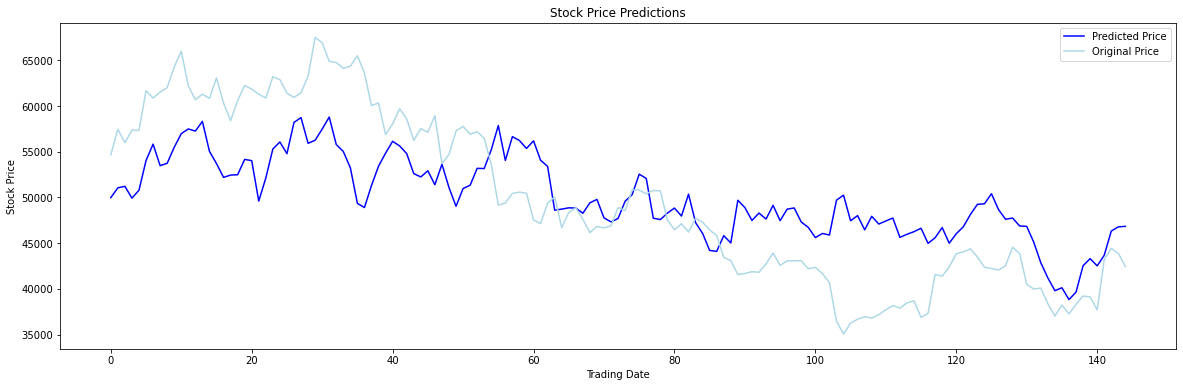

In [25]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

# Prediction

In [26]:
predict_feature

Compound   Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
0  0.525319  0.47366     0.313175     0.137817            0.249198   

   No. of Active Addresses  No. of Unique Addresses  Transactions  \
0                 0.548707                 0.539364      0.502639   

   Compound_lag_1  Volume_lag_1  ...  No. of Unique Addresses_lag_4  \
0         0.52765      0.469431  ...                       0.438526   

   Transactions_lag_4  Compound_lag_5  Volume_lag_5  FundingRate_lag_5  \
0            0.414387        0.529636       0.46585           0.269978   

   Bitcoin_SVI_lag_5  Cryptocurrency_SVI_lag_5  No. of Active Addresses_lag_5  \
0           0.169315                  0.201845                       0.440803   

   No. of Unique Addresses_lag_5  Transactions_lag_5  
0                       0.460792            0.449825  

[1 rows x 48 columns]

In [34]:
# Process the data for LSTM
testX = np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])

In [35]:
predicted_price = lstm.predict(predict_feature)

In [36]:
predicted_price[0][0]

45281.97

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 45,281.97 on 4 Mar 2022.